# **Importing Libraries**

In [97]:
from transformers import BinaryEncoder, MultiColumnLabelEncoder, MileageScaler, ColumnDropper

In [98]:
import random
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import Ridge
import random
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV


# **Reading Data**

In [99]:
# read CSV file into a DataFrame
df = pd.read_csv('car_data.csv')

In [100]:
num_attributes = df.shape[1]
print("number of attributes",num_attributes)

number of attributes 10


In [101]:
attribute_names = df.columns.tolist()
print("Name of Attributes",attribute_names)

Name of Attributes ['Make', 'Model', 'Version', 'Price', 'Make_Year', 'CC', 'Assembly', 'Mileage', 'Registered City', 'Transmission']


In [102]:
print(df.info()) # display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80572 entries, 0 to 80571
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Make             80572 non-null  object
 1   Model            80572 non-null  object
 2   Version          73800 non-null  object
 3   Price            80572 non-null  object
 4   Make_Year        80572 non-null  int64 
 5   CC               80572 non-null  int64 
 6   Assembly         80572 non-null  object
 7   Mileage          80572 non-null  int64 
 8   Registered City  80572 non-null  object
 9   Transmission     80572 non-null  object
dtypes: int64(3), object(7)
memory usage: 6.1+ MB
None


In [103]:
df.head(5)

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
0,Honda,Insight,NaN,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic
1,Mitsubishi,Minica,Black Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic
2,Audi,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,Local,70000,Lahore,Automatic
3,Toyota,Aqua,G,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic
4,Honda,City,1.3 i-VTEC,2600000.0,2017,1300,Local,55000,Islamabad,Manual


In [104]:
# number of rows
num_rows = df.shape[0]

# print the number of rows
print("Number of rows: ", num_rows)

Number of rows:  80572


In [105]:
df.describe()

,Make_Year,CC,Mileage
count,80572.000000,80572.000000,80572.000000
mean,2011.724209,1404.083267,85653.660080
std,6.953399,684.458171,82241.870901
min,1990.000000,1.000000,1.000000
25%,2007.000000,1000.000000,36500.000000
50%,2013.000000,1300.000000,73000.000000
75%,2017.000000,1600.000000,110520.000000
max,2021.000000,10000.000000,999999.000000


# **Visualization**

Mileage

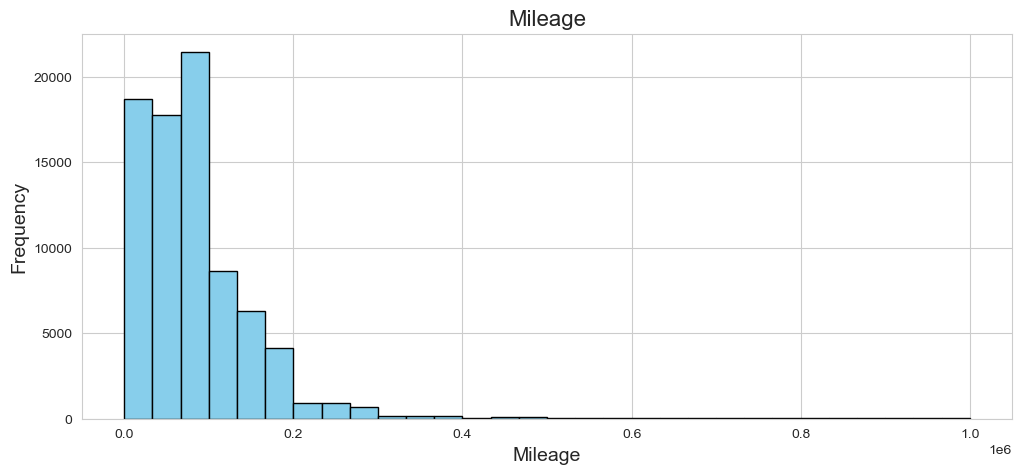

In [106]:
#Mileage
plt.figure(figsize=(12, 5))
plt.hist(df['Mileage'], bins=30, color='skyblue', edgecolor='black')
plt.title('Mileage', fontsize=16)
plt.xlabel('Mileage', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

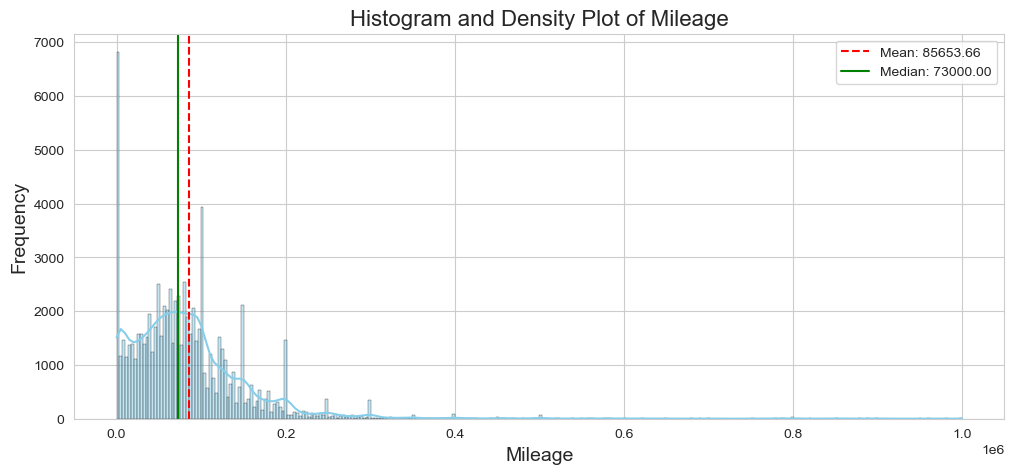

In [107]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Histogram and Density Plot for Mileage
plt.figure(figsize=(12, 5))
sns.histplot(df['Mileage'], kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram and Density Plot of Mileage', fontsize=16)
plt.xlabel('Mileage', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(x=df['Mileage'].mean(), color='red', linestyle='--', label=f"Mean: {df['Mileage'].mean():.2f}")
plt.axvline(x=df['Mileage'].median(), color='green', linestyle='-', label=f"Median: {df['Mileage'].median():.2f}")
plt.legend()
plt.show()

Price

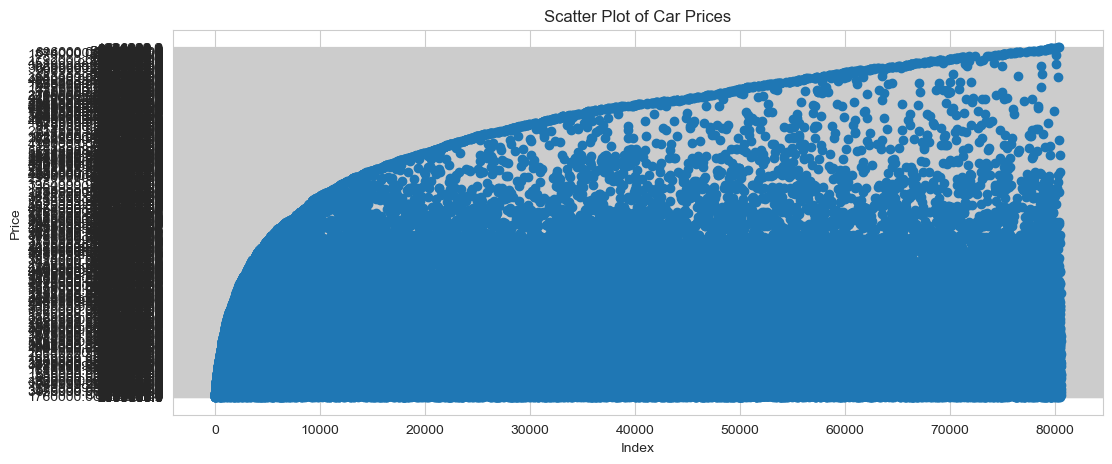

In [108]:
#Scatter Plot od Price Colunm
plt.figure(figsize=(12,5))
plt.scatter(df.index, df['Price'])
plt.title('Scatter Plot of Car Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

There is Only one outlier,it should not be remved to keep data diverse

TypeError: Could not convert string '7400000.01065000.09300000.02375000.02600000.01110000.02500000.01130000.01760000.00000000022500000.01950000.02440000.01400000.01100000.03500000.01350000.01700000.01750000.01630000.01160000.01050000.01800000.0780000.02500000.05485000.0Call for price5250000.0Call for price6100000.01200000.04135000.01875000.01675000.01575000.02625000.01285000.05300000.02600000.03760000.01800000.01500000.01100000.01600000.0Call for price3540000.0955000.00000000013420000.00000000051095000.01025000.04500000.0Call for price2200000.01730000.03979999.99999999952720000.01755000.0950000.0340000.04700000.03000000.06000000.01650000.03500000.02400000.02300000.04550000.02925000.0380000.02225000.0685000.06650000.01875000.02900000.0390000.01375000.011299999.9999999982475000.02150000.0Call for price3250000.02050000.02675000.024500000.02600000.02950000.01895000.04500000.015900000.01300000.02000000.04200000.0Call for priceCall for priceCall for priceCall for price4395000.02170000.02300000.0750000.02150000.03800000.03025000.04000000.02350000.02800000.01400000.02450000.0969999.9999999999645000.01044999.999999999923500000.02050000.03050000.06325000.012700000.010700000.02590000.02315000.0950000.06700000.03275000.03875000.03150000.03379999.999999999519000000.02350000.08600000.03000000.04000000.02650000.01630000.01160000.03150000.0620000.01625000.01565000.0900000.01695000.02300000.01080000.0490000.000000000062500000.0830000.00000000011900000.07700000.0680000.05600000.02900000.01125000.01495000.02400000.01380000.02100000.02325000.03000000.03400000.02200000.0560000.01800000.02400000.01300000.06900000.01875000.01040000.02875000.0Call for priceCall for price1050000.01350000.01900000.01150000.01850000.03350000.05100000.02515000.02100000.01950000.04500000.0980000.00000000012200000.01650000.0750000.03900000.01850000.04450000.02160000.02475000.01620000.01190000.01435000.01485000.01750000.02275000.02750000.01150000.02785000.02800000.02190000.01835000.000000000213500000.06500000.0242000.02150000.03585000.05250000.01190000.01290000.01150000.02150000.01100000.02350000.0Call for price1480000.0915000.02390000.01200000.04050000.02630000.03400000.02600000.01800000.01650000.02190000.0Call for priceCall for priceCall for price2075000.02750000.0Call for price3000000.01750000.02125000.0880000.00000000016800000.0840000.02970000.01430000.07800000.0480000.0690000.01400000.01230000.01525000.01600000.0900000.02250000.01585000.03350000.03275000.02350000.01560000.01250000.016500000.01625000.0915000.03000000.01350000.02650000.01980000.04225000.02500000.06000000.02650000.01789999.99999999981300000.02490000.03060000.0700000.0950000.09200000.01775000.01610000.00000000021085000.03150000.02995000.02685000.01380000.02345000.06450000.0Call for price1230000.0Call for price2475000.03890000.02495000.02450000.0500000.07000000.0670000.02250000.0850000.0595000.01590000.02050000.01250000.0365000.01100000.0560000.095000000.02925000.02700000.0710000.01250000.01350000.01550000.01550000.03150000.04200000.02285000.03350000.03050000.0Call for priceCall for price1785000.000000000236600000.0Call for price42500000.02565000.01365000.016299999.99999999815800000.03690000.01250000.01190000.01950000.01975000.03750000.0750000.07250000.0570000.01600000.03050000.01400000.02450000.01650000.0390000.03400000.02375000.0Call for price33700000.05500000.0Call for priceCall for priceCall for price3595000.0000000005Call for price3770000.00000000058000000.01500000.02200000.03600000.01050000.01125000.01350000.01500000.02450000.02075000.0819999.99999999994100000.02700000.01300000.03320000.00000000052000000.02700000.0815000.0720000.01850000.01430000.04150000.0Call for price4100000.03450000.0Call for priceCall for price1269000.0Call for price1200000.0Call for priceCall for priceCall for price9395000.02300000.01150000.03475000.04050000.04400000.01380000.01450000.02700000.02425000.01860000.0000000002700000.02800000.01375000.01650000.0720000.0790000.03200000.03350000.03500000.05525000.0950000.0980000.00000000014600000.0750000.0900000.08450000.06200000.01560000.01125000.03379999.99999999951939999.99999999983600000.03160000.02600000.03075000.0890000.02450000.03350000.02500000.01795000.0850000.0520000.04950000.0420000.03150000.0720000.01850000.0900000.035000000.01210000.0160000.02999000.0Call for price850000.03050000.02875000.01689999.99999999987925000.04175000.02450000.02100000.01989999.99999999985600000.01925000.04400000.07900000.01625000.01295000.02800000.01500000.01400000.0790000.0810000.01415000.02375000.03550000.02400000.0Call for price4390000.0850000.02600000.06498000.0610000.01050000.01050000.02250000.04000000.0735000.0890000.06000000.02350000.02200000.01400000.03700000.08300000.09200000.09220000.09200000.0Call for price9200000.01850000.01150000.0850000.02100000.02125000.01000000.02325000.04250000.0775000.02275000.01485000.0330000.0750000.02150000.0700000.0327000.01725000.02450000.0750000.0Call for price3040000.0Call for priceCall for price2590000.0600000.02050000.01950000.0685000.02350000.01950000.04420000.01880000.04950000.06750000.01695000.02575000.02950000.0250000.01380000.03155000.02000000.0Call for price10600000.01400000.0985000.03750000.02375000.02975000.01540000.02600000.017700000.05600000.02200000.016100000.0000000022575000.03160000.02050000.04800000.03150000.01895000.0Call for priceCall for priceCall for priceCall for price3450000.0Call for price2125000.01100000.02064999.9999999998550000.0785000.01900000.02350000.0650000.01575000.0775000.0405000.03700000.0935000.02275000.0Call for price1580000.04310000.02095000.0860000.03650000.07800000.06300000.02610000.04800000.08850000.02980000.02000000.09300000.05700000.02195000.01525000.010100000.04850000.02650000.03595000.00000000052250000.06800000.07650000.0585000.03350000.02150000.02300000.03030000.02064999.99999999982625000.03050000.03500000.03150000.03550000.0Call for priceCall for price3900000.0Call for priceCall for price3550000.0Call for price2945000.02875000.02380000.01330000.01735000.00000000022395000.0Call for price2550000.02450000.02550000.06325000.042500000.0825000.0660000.01989999.99999999981885000.0000000002994999.9999999999890000.0660000.0310000.03950000.01625000.01764999.999999999833000000.02980000.02700000.03250000.01410000.01590000.02075000.04300000.01350000.0690000.02350000.02035000.00000000021320000.04410000.09700000.03500000.02950000.013000000.03695000.00000000052595000.0835000.0360000.0490000.00000000006950000.0910000.03150000.02990000.01300000.09200000.0695000.09900000.01340000.03529999.99999999954550000.02045000.0701000.03700000.02500000.01125000.03525000.02450000.01889999.9999999998525000.012000000.04479000.05250000.08050000.01375000.02030000.03750000.02625000.0620000.0950000.02275000.0670000.0825000.0600000.02650000.0350000.0990000.0994999.9999999999490000.000000000061800000.01725000.01135000.01420000.03290000.03420000.00000000052850000.01325000.01955000.012800000.03650000.02495000.05675000.02150000.04200000.01150000.0515000.000000000063999000.03250000.01800000.01920000.02170000.04000000.01700000.0600000.01650000.01600000.02550000.01350000.02600000.0900000.01850000.01845000.01325000.0275000.01800000.08450000.01695000.01585000.01435000.05350000.01864999.99999999981795000.01350000.04800000.02800000.03525000.041000000.0Call for price2440000.01300000.04480000.01720000.0325000.02750000.0630000.01125000.02030000.0700000.01450000.03700000.02425000.01850000.0999000.04450000.09300000.01330000.01250000.01500000.01070000.0630000.0550000.0850000.01800000.02875000.0250000.04050000.02550000.03950000.03650000.0Call for priceCall for priceCall for priceCall for price2100000.012500000.02775000.01825000.01265000.06300000.010200000.02050000.01375000.02225000.0750000.0625000.0Call for price1090000.0850000.02095000.03000000.04525000.02930000.04210000.0900000.01814999.99999999981685000.0000000002665000.01100000.0Call for price2620000.02495000.08900000.02865000.01500000.0919999.9999999999Call for price2700000.01950000.05600000.0950000.0625000.03165000.0700000.01495000.01600000.03575000.0450000.02990000.02750000.02730000.01500000.06300000.02700000.01725000.01000000.0360000.0560000.01150000.02800000.0490000.000000000061100000.0295000.03679999.99999999958000000.01739999.9999999998Call for price3550000.03350000.02020000.01375000.03200000.01950000.02850000.03225000.0600000.01200000.06400000.01585000.03750000.01295000.0830000.0000000001950000.03790000.01375000.03900000.0425000.011299999.9999999983000000.02000000.02650000.02600000.0800000.03050000.02900000.03750000.010500000.03800000.02150000.02950000.019900000.03525000.03300000.0775000.02325000.02200000.02250000.03600000.01950000.06300000.03160000.03100000.01400000.04060000.02400000.01265000.06500000.01295000.03285000.0480000.02200000.06550000.04350000.03125000.01385000.01100000.02250000.03075000.03800000.05375000.04075000.07300000.02100000.03000000.016900000.03525000.03690000.02950000.01015000.0575000.01365000.01025000.01235000.0750000.04050000.01400000.04000000.03300000.02190000.02150000.0600000.03150000.03050000.01630000.0295000.02400000.07700000.01370000.01100000.0250000.01950000.03790000.012200000.02270000.0Call for price1950000.01660000.00000000022175000.0950000.013500000.04200000.0400000.02210000.01050000.01185000.02030000.01750000.0750000.04300000.02525000.0950000.02670000.01935000.00000000021614999.99999999981970000.0409999.999999999943300000.01920000.01400000.02800000.05770000.017200000.018200000.023500000.0Call for price8500000.0Call for priceCall for priceCall for price2400000.04835000.03295000.00000000055600000.02650000.01595000.05745000.0570000.0530000.04500000.01275000.01100000.01285000.0850000.01750000.02140000.01185000.0930000.000000000119500000.0980000.0000000001950000.02750000.03300000.03260000.04555000.03500000.01235000.018300000.02160000.02485000.01275000.02575000.03425000.07300000.02864000.0409999.999999999941100000.01110000.03520000.00000000053150000.01745000.02995000.0420000.07600000.01550000.03525000.02625000.03875000.0390000.0315000.03325000.01430000.04525000.0880000.0000000001825000.03070000.01720000.03165000.06375000.05690000.04350000.01650000.012600000.01085000.02495000.0Call for price975000.02590000.02395000.01190000.04900000.02490000.03350000.01725000.02375000.04800000.02500000.0330000.01000000.010700000.0800000.0730000.01645000.01550000.01850000.04150000.02950000.07000000.03650000.02900000.0Call for price2115000.02700000.09140000.01910000.00000000023500000.01180000.01750000.03165000.03425000.05550000.03685000.03375000.01825000.01450000.0375000.01450000.0825000.0540000.02625000.0975000.0715000.0900000.01175000.02850000.01480000.01680000.0590000.0660000.02350000.0830000.00000000012039999.9999999998710000.02800000.01375000.0370000.0Call for price1600000.02590000.02660000.05700000.02250000.02500000.04600000.02520000.0828999.9999999999850000.0760000.02790000.02250000.02550000.01000000.0270000.02800000.0600000.01600000.02350000.011500000.01900000.03850000.02600000.02900000.02850000.02585000.02700000.02100000.09900000.02750000.017000000.01800000.01495000.03500000.01535000.06500000.09100000.01800000.06100000.08000000.0650000.01450000.02039999.9999999998650000.01200000.03100000.0770000.01350000.01590000.01600000.04350000.03700000.02250000.01925000.01850000.03250000.01700000.01275000.03025000.01750000.0500000.02025000.0Call for priceCall for price3650000.012100000.04300000.01504000.0Call for price2625000.01180000.08250000.01800000.02050000.01430000.01500000.02800000.01170000.02900000.04000000.01135000.0220000.00000000003850000.0550000.03070000.06625000.0840000.0835000.0875000.01150000.01560000.04849000.01625000.01820000.04360000.01800000.06100000.03000000.01950000.03860000.0Call for price1795000.01964999.9999999998Call for price3770000.00000000051050000.05200000.01380000.01650000.02450000.01800000.05200000.03525000.02500000.06500000.0750000.02295000.02780000.02100000.02750000.02150000.01290000.02200000.0Call for price3729999.9999999995Call for price5800000.04065000.0Call for price4800000.03825000.04450000.0Call for price2125000.02550000.0Call for price4150000.03825000.03150000.03350000.01750000.03120000.01550000.01290000.0900000.0620000.03300000.0950000.02050000.03829999.99999999951550000.02590000.0725000.01200000.01150000.01395000.02045000.0700000.014000000.0875000.02875000.03075000.01215000.02750000.01835000.00000000022295000.06175000.02925000.02375000.01255000.01970000.0760000.01630000.0680000.02200000.0885000.02300000.0860000.02390000.03250000.02050000.01250000.02900000.02250000.06050000.010500000.01100000.02650000.02850000.01500000.02730000.01889999.99999999981950000.03690000.01795000.0835000.0691000.02175000.03025000.0740000.0625000.0Call for price3185000.0Call for price725000.01650000.02000000.03400000.01825000.01680000.02880000.011000000.0545000.0420000.02880000.0670000.01450000.06500000.0580000.02070000.01739999.99999999981885000.00000000022440000.03150000.0520000.02540000.01050000.03350000.01750000.02095000.0833000.0450000.0650000.0550000.0615000.01465000.01950000.032500000.03025000.02500000.01580000.03200000.03650000.01175000.0615000.02750000.01950000.01375000.01550000.0780000.01950000.01475000.02450000.02675000.01830000.01230000.0819999.99999999993225000.02450000.01895000.013500000.09250000.02235000.02025000.09225000.0Call for price1025000.0120000.0600000.02400000.0750000.01565000.03775000.02600000.0Call for price2850000.0380000.01170000.0850000.0825000.01250000.0880000.00000000011375000.01580000.01525000.01070000.0890000.01700000.01700000.0180000.01650000.01500000.01450000.03080000.02640000.040900000.036000000.01960000.00000000022875000.01675000.0800000.02450000.0610000.03700000.01250000.05750000.0685000.01300000.02650000.0620000.06300000.0400000.01350000.01750000.01095000.03050000.01350000.01575000.01875000.0Call for price4000000.04200000.03575000.03075000.02050000.04450000.03850000.07500000.03400000.03450000.01875000.03875000.01500000.03900000.01370000.03850000.0880000.00000000011795000.01750000.07500000.01044999.99999999994275000.01350000.01780000.01050000.0830000.00000000011150000.0750000.01375000.07550000.0800000.01325000.01000000.02350000.0Call for price2725000.02600000.02750000.01400000.01400000.01675000.02125000.0Call for price2775000.03250000.03800000.01900000.01620000.0450000.01600000.0Call for price1425000.02130000.01320000.03850000.01825000.01399000.0525000.02800000.0825000.03750000.03150000.021000000.01475000.01645000.01645000.03550000.014500000.01980000.01135000.0Call for price2700000.02600000.02700000.02750000.0Call for price3450000.0Call for price3775000.03875000.02025000.05790000.0930000.00000000011135000.0680000.0765000.02300000.01025000.0615000.01950000.03720000.00000000052650000.01500000.02650000.0Call for priceCall for priceCall for priceCall for price3790000.0Call for price1850000.04500000.01795000.03600000.03180000.01495000.03130000.04200000.01950000.08600000.02380000.0540000.02450000.01100000.02920000.03550000.02105000.02650000.06700000.01550000.03250000.03345000.00000000051650000.01390000.05650000.04200000.01950000.0Call for price930000.00000000012950000.03190000.0Call for priceCall for priceCall for priceCall for priceCall for price1325000.0Call for price1820000.0550000.0750000.05590000.02450000.03000000.02175000.03400000.02470000.0965000.03900000.0800000.0775000.01280000.02625000.0565000.03200000.0270000.01820000.03300000.04850000.03379999.99999999951025000.02725000.01900000.04650000.0Call for priceCall for priceCall for price2330000.0Call for priceCall for price3400000.0Call for price3250000.03200000.0Call for price16500000.0509999.999999999942295000.04450000.02150000.01650000.02300000.03000000.0620000.02300000.06500000.02230000.02300000.03775000.01580000.0850000.03850000.0640000.0780000.0625000.02500000.04300000.04550000.02950000.021900000.0Call for priceCall for priceCall for priceCall for priceCall for priceCall for priceCall for priceCall for priceCall for priceCall for priceCall for price1789999.99999999981700000.03170000.04900000.024000000.01360000.01100000.05000000.03850000.016500000.01120000.02089999.9999999998665000.03450000.01445000.03130000.03900000.03200000.0795000.01964999.99999999981750000.01295000.02945000.012900000.0Call for priceCall for price22900000.018900000.017900000.019800000.021900000.07550000.05000000.0Call for price2385000.01550000.04750000.0Call for price2170000.01580000.02890000.0950000.01425000.01150000.02625000.01325000.04200000.03350000.05750000.0690000.02425000.01850000.01700000.01350000.02050000.02810000.03300000.0755000.02125000.0900000.02850000.01895000.0790000.05700000.04300000.013500000.010300000.09300000.02850000.01750000.02200000.03800000.09050000.01770000.04275000.01100000.010300000.01775000.04100000.0650000.03450000.02000000.02640000.01450000.0730000.01050000.0780000.03000000.01200000.02400000.02250000.01250000.02100000.06500000.04850000.0690000.0Call for priceCall for priceCall for priceCall for price2950000.01850000.0610000.01550000.03000000.03375000.03250000.04500000.01360000.01850000.0Call for price750000.01845000.014500000.0830000.00000000015400000.02400000.04800000.0430000.03440000.02550000.03335000.02675000.01650000.024000000.02425000.03675000.09350000.03775000.03450000.03000000.030000000.0Call for price3425000.02000000.02250000.02650000.01495000.03250000.04400000.01850000.05695000.02085000.00000000022750000.0229999.999999999977900000.01350000.01695000.0450000.03150000.03050000.01100000.06500000.02950000.02750000.02260000.03600000.0450000.02525000.02950000.02150000.05625000.025700000.03399000.03750000.0380000.021000000.02680000.02375000.01290000.011399999.9999999983485000.01650000.02000000.01650000.01250000.01780000.02085000.00000000022850000.02700000.02375000.0844999.99999999996650000.01155000.02750000.0860000.02450000.0Call for price1947000.01925000.0Call for priceCall for price1950000.02035000.0000000002750000.0825000.0484999.999999999942130000.01325000.0Call for price1150000.01730000.02175000.03225000.01500000.024500000.01689999.99999999982600000.03250000.03900000.01480000.02800000.0Call for price1375000.03150000.0Call for priceCall for price4425000.01500000.01150000.05600000.0720000.02750000.0850000.0590000.01650000.03390000.0Call for price1380000.01450000.0Call for price1650000.02575000.02675000.01225000.0600000.0925000.02850000.01950000.02975000.0Call for price3600000.0600000.02650000.02690000.01664999.99999999986000000.05650000.02900000.02635000.08300000.0490000.0000000000617500000.02650000.02200000.04450000.0265000.02700000.03490000.023500000.0625000.0875000.03290000.0495000.05700000.0730000.08800000.0520000.01145000.02390000.03800000.0Call for price2345000.01395000.03479999.99999999952590000.05200000.02700000.01300000.0475000.06700000.01200000.0480000.0690000.01550000.02850000.031000000.02700000.0695000.02400000.01785000.00000000029200000.01050000.0250000.0850000.01395000.02600000.03200000.05775000.02475000.05500000.04500000.02650000.02750000.03600000.02125000.0Call for priceCall for priceCall for price700000.03133000.01650000.03354999.99999999955800000.03100000.02650000.01689999.9999999998960000.04600000.01700000.02750000.01695000.01760000.00000000021090000.01650000.0775000.01775000.05875000.02125000.017000000.02500000.0328000.017500000.02700000.02599000.05450000.03960000.02150000.08000000.01495000.0800000.01050000.0Call for price6225000.04700000.04250000.02299000.02400000.03150000.01475000.03250000.0894999.99999999991760000.0000000002835000.01850000.0565000.06350000.02450000.0700000.03200000.0280000.0715000.02940000.02750000.03795000.00000000052140000.04600000.01480000.0850000.03300000.03050000.02575000.01775000.03175000.01350000.02675000.035000000.02145000.02050000.01950000.02480000.0560000.02765000.01900000.0620000.08500000.0850000.02210000.01620000.02900000.02685000.03050000.0320000.0570000.01625000.02695000.06150000.04950000.02220000.01485000.0240000.01430000.01190000.09300000.03025000.03000000.01315000.0Call for price1560000.01850000.03125000.01664999.99999999984800000.04225000.0356000.0650000.01350000.04299000.02420000.01590000.01065000.0750000.01875000.02000000.03050000.03300000.01650000.045000000.01595000.01850000.02200000.03625000.03400000.02650000.03650000.025000000.02225000.02325000.0830000.00000000016175000.0796000.04250000.05400000.0925000.01070000.03975000.02888000.03695000.00000000054325000.0Call for price4175000.0Call for price2550000.03750000.01645000.03050000.02200000.03975000.0700000.02325000.02700000.01645000.01200000.01700000.01350000.02800000.0745000.0390000.01980000.02650000.051000000.0Call for price4795000.02675000.04250000.02675000.02500000.024500000.02750000.02550000.0Call for price2700000.03800000.0600000.05800000.01650000.0Call for price2450000.036000000.01135000.0600000.01525000.01700000.01420000.03850000.03675000.0700000.02950000.01700000.01000000.01270000.0740000.0850000.02500000.0Call for price1998999.999999999836500000.011000000.031500000.030500000.02450000.04470000.02665000.01950000.01110000.03100000.02175000.02450000.03225000.08500000.02315000.03220000.00000000051898999.9999999998Call for price1800000.04650000.02350000.04000000.01850000.03725000.04100000.04480000.03850000.02150000.0500000.02350000.01500000.0605000.01650000.02750000.02325000.02475000.0670000.012000000.03800000.08500000.07700000.02850000.035000000.019500000.02600000.037500000.05575000.019000000.01450000.0825000.04600000.02450000.04500000.02485000.01850000.01250000.02695000.02280000.0710000.0515000.000000000061580000.06400000.06400000.03790000.01165000.02450000.0865000.01050000.05390000.02275000.01600000.02025000.01100000.01425000.08200000.02600000.010500000.018500000.01950000.02050000.030500000.016500000.0Call for price3700000.06150000.06500000.02200000.05750000.02875000.02000000.01625000.03970000.00000000052150000.0Call for price2625000.01150000.05405000.019000000.03350000.04600000.04500000.023500000.01664999.999999999812500000.027500000.01190000.05995000.03790000.02675000.02225000.017500000.02825000.02780000.02575000.04195000.0520000.09000000.016700000.02025000.01975000.03870000.0000000005Call for price8700000.034500000.0Call for price13500000.0Call for price16000000.0Call for priceCall for price37500000.0Call for price980000.00000000012190000.0915000.06395000.0Call for price1650000.07490000.0000000013000000.0340000.0Call for price2600000.02000000.06400000.0915000.02850000.010400000.02220000.0150000.03600000.0Call for priceCall for price26000000.02275000.01714999.99999999981695000.01370000.02850000.03600000.03025000.03400000.09900000.05250000.02140000.02350000.01750000.01250000.03720000.00000000051395000.01550000.02350000.04250000.05500000.03400000.0930000.0000000001575000.02725000.01300000.01795000.0280000.05550000.03695000.00000000053810000.0975000.02400000.04075000.0850000.01780000.0850000.02500000.02150000.03610000.01570000.01250000.0550000.03750000.0725000.02400000.01825000.02490000.010000000.02715000.02150000.01230000.02720000.02295000.01620000.01650000.02625000.02675000.02950000.01625000.01320000.0Call for price1625000.04090000.011900000.0700000.022100000.02340000.01400000.01200000.0400000.01850000.0680000.01800000.01590000.02200000.01300000.01050000.01190000.02200000.03100000.01650000.06000000.02700000.01745000.01950000.04500000.01555000.01980000.05950000.03120000.02000000.01290000.01600000.0380000.03075000.02695000.02950000.0Call for price1400000.01525000.01200000.0670000.02900000.03500000.01310000.01814999.99999999985250000.01100000.04325000.01875000.0990000.0700000.03890000.04900000.01300000.02380000.02150000.02080000.02295000.02050000.01350000.03860000.013500000.01570000.0830000.00000000012300000.08000000.04400000.01150000.01875000.01775000.0690000.016500000.0750000.02010000.0000000002645000.03365000.0950000.02800000.0390000.01455000.07180000.02900000.01995000.04000000.05400000.01775000.01250000.01980000.0650000.02950000.01600000.03825000.01975000.08345000.02480000.02800000.01925000.02250000.0800000.01130000.06500000.02900000.01125000.05575000.04250000.02650000.02275000.03600000.02200000.0990000.02500000.03450000.03685000.02825000.01700000.02470000.04600000.02225000.02500000.02600000.01750000.02975000.03000000.01510000.01490000.02980000.01590000.03550000.0450000.02050000.03350000.01650000.03825000.012500000.02750000.01789999.9999999998600000.01375000.04150000.03900000.02000000.03800000.02500000.02575000.05760000.03350000.03900000.02450000.0640000.03125000.04070000.00000000051000000.01950000.01850000.01989999.9999999998790000.02740000.01280000.02100000.02550000.02400000.0520000.02750000.0420000.01650000.02350000.0780000.02700000.02575000.01425000.02075000.03600000.0700000.01110000.03100000.02000000.01275000.02550000.01655000.02550000.0600000.03395000.00000000051330000.02250000.02950000.01050000.04350000.015500000.08900000.01950000.04250000.02550000.04650000.01900000.01290000.0470000.01270000.0910000.02094000.000000000220500000.01875000.02550000.04250000.01850000.0660000.01425000.02250000.01850000.03800000.01600000.02230000.01560000.03100000.02650000.04375000.02725000.01964999.99999999983600000.02375000.02500000.03100000.02300000.02600000.0930000.00000000014250000.017200000.0740000.0675000.02850000.02175000.02350000.02495000.01240000.0780000.01100000.0725000.04200000.01900000.02250000.01540000.0940000.0650000.01225000.050000000.01145000.02625000.05800000.03100000.01130000.0980000.00000000012725000.01180000.01950000.02630000.02925000.01350000.0560000.04100000.02010000.00000000021950000.0360000.0750000.02135000.02750000.09535000.01435000.02750000.03825000.02145000.02790000.01775000.02100000.05595000.03875000.01725000.02850000.03300000.09100000.02175000.033500000.04600000.01725000.02650000.01250000.06400000.01870000.01850000.02375000.01835000.00000000021825000.01810000.0000000002260000.01420000.0770000.01800000.01200000.07200000.0925000.02175000.04650000.02050000.07990000.0000000011400000.01550000.02350000.02350000.05295000.02480000.01000000.01600000.01750000.01700000.02775000.02280000.01250000.0850000.01895000.0925000.02950000.02975000.06250000.01050000.02250000.01050000.06200000.06400000.06600000.0260000.010400000.01830000.02635000.04550000.04300000.06300000.04050000.02165000.07650000.08700000.03550000.03200000.02690000.012100000.02990000.04560000.01125000.03379999.99999999951275000.02180000.01800000.01350000.02150000.02490000.0550000.01300000.01850000.01300000.01260000.01700000.01250000.01200000.01650000.03340000.02150000.01580000.03090000.01420000.02250000.05300000.02200000.02580000.02700000.02200000.02750000.07800000.02175000.01350000.04450000.01190000.02800000.0Call for price725000.01135000.01150000.0620000.01150000.01150000.01160000.01200000.01200000.01225000.01375000.010200000.02035000.00000000023500000.0950000.06150000.03000000.07700000.032500000.01465000.03950000.02590000.01450000.07600000.02450000.02620000.03850000.01695000.01360000.02645000.03750000.02350000.010700000.02775000.02075000.01880000.02750000.01450000.0380000.01850000.03875000.03100000.0220000.000000000031950000.02950000.01250000.03700000.01270000.01920000.0690000.01380000.01200000.04265000.04350000.04490000.02450000.0750000.02925000.02380000.02300000.03220000.0000000005380000.0620000.0980000.00000000012450000.03050000.01800000.0320000.01870000.02275000.0885000.0901000.0925000.0980000.00000000011000000.0950000.01070000.0650000.02600000.0795000.02250000.0975000.06900000.0830000.00000000013500000.02200000.04700000.016500000.02300000.03100000.03200000.0750000.03375000.01989999.99999999983329999.99999999951400000.0750000.01325000.01200000.01350000.03829999.99999999951175000.02190000.02900000.01090000.05250000.01800000.01600000.01400000.02050000.05800000.03950000.01395000.01750000.04200000.0900000.04000000.02850000.02100000.07700000.04100000.03650000.06900000.03229999.99999999951500000.02900000.03475000.02250000.01725000.01150000.0940000.01250000.01180000.02700000.01875000.0690000.02200000.0725000.01825000.01300000.05790000.05780000.01650000.08350000.05150000.03375000.05750000.010000000.03050000.03200000.0750000.07350000.01550000.09700000.02180000.01650000.02250000.0790000.01625000.01950000.0790000.01970000.0795000.0650000.0985000.02175000.0819999.9999999999680000.04000000.02800000.0850000.01400000.0860000.02075000.02350000.0378000.01095000.0100000.0Call for price4600000.02000000.04250000.0Call for price9125000.05280000.07870000.06290000.0596000.06285000.01650000.01430000.02375000.02690000.0527000.0850000.0356000.03700000.01170000.0740000.02750000.01795000.0819999.99999999994550000.02089999.99999999983000000.03875000.0775000.02225000.0660000.02900000.05800000.01250000.0Call for price6300000.06500000.01950000.03350000.01989999.99999999985500000.02050000.010200000.01350000.0500000.024500000.013400000.01730000.0985000.04095000.00000000053050000.02550000.01385000.0800000.02075000.01450000.0730000.03490000.01950000.0287000.0520000.02540000.01320000.02300000.01595000.01380000.02450000.0550000.06500000.06500000.06175000.0Call for price1050000.04350000.01250000.0855000.00000000013275000.02250000.01150000.01500000.07095000.01650000.01650000.02630000.01460000.02185000.01600000.02950000.01580000.01100000.0459999.999999999941500000.0830000.00000000011500000.0690000.01450000.02700000.026000000.02625000.01925000.04250000.09500000.04350000.03100000.02700000.0Call for price3910000.02375000.018700000.03900000.0650000.010200000.02425000.0880000.00000000011685000.00000000021670000.01450000.03770000.0000000005640000.03200000.0660000.0595000.0665000.0690000.0675000.0690000.0680000.0710000.0720000.02050000.0720000.0725000.01850000.04095000.00000000055500000.01290000.03470000.00000000052325000.0869999.99999999997000000.0630000.0610000.01100000.0950000.0450000.01060000.02925000.0725000.02650000.05295000.0450000.02300000.0950000.0Call for price1450000.0775000.01950000.02925000.0Call for price2510000.01170000.01900000.02550000.05750000.02600000.03150000.02670000.03800000.04700000.025000000.0550000.03890000.01380000.04230000.01345000.0600000.0580000.0630000.05950000.0600000.02400000.02150000.0540000.0930000.0000000001644000.04650000.03300000.01290000.02900000.0Call for price18200000.021000000.017400000.07000000.02450000.0674000.03450000.05250000.01900000.02600000.01600000.02475000.02250000.03885000.05400000.0227000.0320000.0894999.9999999999390000.0415000.00000000006375000.0900000.0440000.00000000006345000.02485000.01420000.02470000.01050000.0346000.0280000.0475000.0490000.000000000063400000.02700000.0700000.05515000.03795000.0000000005Call for priceCall for price2950000.08500000.01325000.07050000.0Call for price8689000.0Call for price15900000.03800000.03200000.02500000.0650000.01300000.02680000.03000000.0980000.00000000012500000.01425000.0869999.99999999991950000.0550000.02725000.05225000.02450000.0950000.0Call for priceCall for price1764999.99999999981125000.0Call for price1135000.0Call for price3495000.00000000052890000.026000000.06200000.035000000.02750000.06250000.03850000.04900000.039800000.03625000.06800000.03000000.01400000.01150000.0650000.02900000.04650000.04200000.01450000.0250000.0675000.02150000.03900000.01525000.06225000.0840000.01050000.01680000.03233000.04900000.0905000.00000000014200000.01550000.01495000.02875000.01800000.02010000.00000000024300000.01550000.01410000.01680000.0650000.02700000.01070000.01100000.01475000.0980000.0000000001560000.0720000.02500000.01750000.01150000.02875000.01085000.03175000.0950000.010000000.0660000.02400000.01550000.041800000.0975000.01090000.03200000.05600000.035500000.02050000.0919999.99999999991850000.02050000.07059999.9999999991760000.00000000021540000.08399000.06975000.02950000.0900000.02500000.0850000.02750000.02100000.02800000.02160000.01525000.08150000.01425000.01100000.02100000.01140000.04400000.0Call for price4200000.03650000.04850000.03900000.02200000.04300000.02050000.02475000.0Call for price1795000.0Call for price2650000.01750000.0890000.02430000.03700000.02815000.0930000.00000000013260000.02425000.01100000.04400000.01650000.01100000.01810000.00000000021090000.013000000.01300000.02650000.02455000.03465000.0625000.04475000.02370000.04785000.02095000.06375000.04800000.04440000.02925000.03200000.04400000.0775000.02750000.03650000.04300000.01085000.0750000.01200000.08485000.01900000.02500000.01800000.027300000.01390000.05800000.01939999.99999999984129999.99999999952370000.03475000.010300000.02495000.02495000.01360000.05425000.03700000.0Call for price1850000.03260000.01425000.03150000.02900000.01375000.0935000.01630000.0600000.01135000.01750000.01850000.0850000.0750000.02100000.02700000.01035000.01080000.01200000.0590000.08500000.0470000.03825000.03940000.0565000.0785000.02400000.03050000.08800000.05000000.08600000.0819999.99999999993090000.01100000.01300000.0395000.01065000.02375000.01450000.0450000.03450000.0415000.00000000006770000.0349000.0880000.00000000013170000.0900000.04235000.01550000.01025000.017800000.0950000.01050000.01220000.02500000.03000000.01900000.02950000.01850000.01680000.03250000.01850000.010500000.07950000.03400000.02800000.07550000.01845000.0980000.00000000011080000.02900000.02150000.03900000.01530000.01030000.00000000011550000.0550000.01160000.01789999.99999999982000000.0625000.02850000.04480000.02700000.01600000.01800000.02900000.02000000.01295000.0590000.01450000.02039999.9999999998570000.05750000.0Call for price4200000.0Call for priceCall for price2860000.0Call for priceCall for priceCall for price2885000.01550000.016500000.01875000.0600000.0650000.01450000.0875000.02000000.01150000.01230000.01200000.0670000.01850000.02360000.05250000.02200000.0400000.02850000.0560000.02110000.01825000.01040000.03229999.99999999952600000.02650000.06300000.017400000.0685000.04395000.014500000.09500000.04600000.016800000.0750000.011000000.01800000.0500000.01650000.03400000.023200000.06100000.0700000.03210000.02790000.03275000.01095000.01050000.0585000.01350000.06100000.03225000.01920000.01795000.03600000.02550000.03750000.02390000.013500000.013000000.01199000.024000000.02800000.04200000.02875000.01050000.0570000.01700000.0770000.02335000.0745000.0605000.0830000.00000000013030000.01600000.06375000.01470000.04450000.01460000.03000000.01520000.0450000.02150000.0700000.01325000.01650000.01085000.01570000.02050000.02870000.02195000.01485000.02080000.02650000.01185000.017300000.01220000.02160000.03990000.02875000.023000000.01150000.03700000.0625000.05250000.02420000.03550000.04250000.01400000.055000000.03835000.02400000.02895000.02750000.0610000.0250000.03250000.01700000.010500000.03229999.99999999954475000.08150000.02700000.03500000.03100000.02550000.0Call for price10000000.035500000.01450000.01410000.03080000.03050000.011299999.9999999981365000.0Call for price1540000.01290000.01625000.01775000.0415000.000000000063100000.01445000.01580000.02635000.0670000.03175000.03820000.0000000005720000.05650000.0875000.010500000.01285000.02540000.01500000.01950000.0930000.0000000001600000.0Call for price1789999.99999999982795000.02875000.03450000.04700000.04700000.0Call for priceCall for priceCall for priceCall for price4400000.012800000.01375000.03400000.03200000.0925000.0760000.02640000.02800000.02750000.0580000.02450000.01500000.08700000.03100000.01100000.01050000.04650000.0790000.04800000.01800000.03750000.02210000.01845000.06350000.0900000.01500000.07975000.0780000.02850000.01585000.0700000.02950000.0290000.01664999.99999999984000000.01370000.02400000.06350000.02950000.01764999.99999999981450000.02650000.02800000.0430000.03400000.01925000.0Call for price2685000.02850000.07800000.0645000.0409999.99999999994500000.0525000.0720000.01400000.0750000.0520000.0525000.08200000.0508000.01925000.01035000.0560000.0500000.0750000.0Call for price1445000.03270000.0000000005500000.02940000.04050000.01650000.01400000.02800000.0850000.0430000.06350000.01800000.01850000.07700000.0740000.0459999.999999999941725000.0450000.0365000.03025000.03100000.03575000.01600000.03490000.013200000.02960000.02675000.03140000.01475000.02875000.015900000.017600000.013400000.02500000.04200000.03875000.02000000.01200000.0985000.01835000.00000000021125000.02480000.0550000.04050000.02600000.03450000.03970000.00000000051460000.01500000.04400000.02665000.01345000.03210000.02750000.021000000.03970000.0000000005500000.02020000.02370000.02050000.03075000.010500000.09000000.01100000.0Call for price4500000.024500000.02800000.02750000.02950000.01664999.99999999981350000.01914999.99999999982225000.02150000.024500000.01350000.01400000.01675000.0925000.03100000.03475000.03100000.03800000.03100000.01650000.024500000.0600000.011600000.06200000.02675000.058500000.03850000.03100000.01510000.025000000.02200000.022500000.0885000.01595000.01585000.03850000.01480000.05625000.02750000.09650000.03825000.02500000.0750000.0625000.04250000.01300000.0290000.05600000.01500000.01280000.07400000.03775000.03750000.03625000.04900000.03800000.02150000.01549000.01825000.04040000.06000000.024500000.057500000.07300000.02930000.01525000.02650000.02475000.0750000.01980000.07680000.01299000.03350000.03485000.09639000.01620000.0550000.07800000.02850000.01220000.023500000.03375000.03150000.0240000.0430000.0270000.0327000.0330000.01650000.024500000.01760000.00000000023130000.02700000.02795000.02490000.01975000.01240000.03000000.01870000.02500000.01100000.09250000.02250000.02450000.04375000.0580000.01095000.0875000.01650000.05975000.02950000.0969999.9999999999390000.0900000.02150000.04600000.01889999.99999999983300000.0Call for priceCall for price3829999.99999999954560000.02450000.04550000.06400000.09500000.02550000.04521000.026100000.0900000.0210000.02750000.04540000.01435000.03479999.99999999952400000.03100000.01625000.0600000.02760000.04250000.04400000.02000000.02625000.06125000.02675000.01780000.02600000.01825000.06300000.02475000.02800000.07500000.01900000.02450000.03200000.0Call for price5750000.03460000.06250000.09200000.06250000.0280000.01500000.03150000.01290000.01650000.07600000.02790000.02200000.01500000.01200000.02625000.01300000.02400000.025000000.0635000.03740000.0950000.02700000.0325000.02700000.02885000.06450000.02280000.01780000.01375000.010900000.09500000.04600000.011500000.05500000.05500000.0730000.01025000.0630000.01800000.0785000.02225000.02100000.01010000.03300000.02720000.02460000.0980000.0000000001260000.013000000.01450000.04150000.013500000.01170000.01070000.04950000.02750000.010800000.02248000.0Call for price7000000.01350000.030000000.03479999.9999999995Call for price8625000.01175000.03750000.02650000.02600000.0505999.999999999941420000.01150000.0875000.01550000.02910000.0730000.01955000.0690000.0450000.0450000.0500000.01190000.01000000.01440000.0925000.02450000.01290000.0750000.017200000.01365000.0Call for price1125000.010200000.018500000.03625000.04900000.01265000.01425000.01200000.0850000.012000000.02600000.01315000.02680000.01950000.01145000.01880000.05600000.01115000.0530000.04480000.01825000.01325000.01732999.9999999998530000.01260000.0525000.0819999.99999999991500000.0630000.0975000.0880000.0000000001500000.0Call for price5000000.05740000.05760000.0Call for price3600000.0535000.03850000.07795000.018500000.04700000.01070000.03700000.0750000.03150000.07825000.04260000.01025000.01070000.01325000.02900000.0980000.00000000012160000.0480000.04480000.02480000.0484999.999999999943250000.01350000.0900000.04600000.02050000.04300000.06350000.08425000.02275000.03300000.02865000.03225000.06370000.0Call for priceCall for priceCall for priceCall for price1895000.01225000.03775000.02650000.01325000.01330000.01550000.0690000.0860000.03775000.03225000.0660000.01190000.02350000.01090000.0650000.02250000.03175000.01725000.0950000.02100000.0425000.01170000.0Call for priceCall for price815000.04550000.05150000.010900000.04425000.02750000.0700000.01070000.02900000.03000000.01160000.01875000.0Call for price2550000.01580000.011000000.01880000.01800000.02370000.0830000.0000000001670000.07100000.02725000.0Call for price4500000.01365000.02075000.02715000.03345000.00000000052010000.0000000002800000.01250000.03400000.0950000.011500000.04150000.02290000.01150000.01495000.01680000.02750000.02975000.0515000.000000000061700000.02375000.03500000.04800000.02125000.02000000.01250000.03100000.03250000.01695000.01980000.01700000.02385000.0690000.05750000.02920000.02365000.034500000.02975000.03175000.01200000.01875000.01825000.02600000.02850000.02850000.04425000.01365000.04250000.04350000.01995000.01970000.02600000.01360000.03279999.99999999951325000.02650000.03775000.0280000.02725000.09500000.06300000.06700000.05050000.02675000.03150000.01565000.01950000.03550000.02250000.01964999.999999999820000000.01260000.01950000.02430000.07800000.02285000.03400000.01175000.01420000.04000000.01120000.04650000.0500000.01515000.01895000.057000000.03850000.03650000.03250000.02995000.01475000.03650000.0720000.02695000.06280000.01635000.0000000002760000.05275000.025000000.01660000.00000000023400000.01380000.0590000.0700000.01839999.99999999982250000.01700000.01380000.03500000.01750000.013700000.0000000023729999.99999999951620000.016000000.02430000.02250000.01995000.07950000.023500000.016500000.03429999.99999999955400000.02725000.0590000.0750000.0670000.01030000.00000000011950000.01700000.01100000.02580000.01975000.0350000.01400000.01400000.04575000.0994999.9999999999Call for price2490000.02685000.02360000.01250000.04100000.09600000.03500000.04350000.02975000.01900000.0900000.02100000.01600000.0650000.04300000.03600000.0330000.06500000.01875000.0750000.0Call for price1380000.01550000.01195000.03150000.01450000.0690000.02600000.02450000.02290000.03150000.04200000.0459999.999999999941689999.99999999987000000.01650000.04050000.06250000.02420000.03290000.02525000.01860000.0000000002815000.0380000.0245000.000000000031975000.02950000.01460000.0985000.01275000.03150000.0990000.0650000.01925000.01100000.01250000.01375000.0800000.0400000.01190000.02095000.03725000.03250000.03500000.02850000.0930000.0000000001Call for price3025000.02850000.0Call for price4490000.02925000.0Call for price965000.013500000.09200000.01714999.99999999981670000.04500000.02200000.01950000.0950000.01300000.04100000.0650000.0850000.06050000.0919999.9999999999650000.01300000.01850000.01975000.02050000.01650000.08100000.02935000.01450000.0Call for price4450000.021500000.02515000.0630000.03550000.01320000.01470000.0700000.02450000.01450000.01900000.02000000.0365000.01820000.0535000.02230000.0725000.0850000.01500000.01350000.0650000.02200000.048500000.01300000.036500000.06880000.014000000.07500000.02400000.02650000.07700000.06200000.02415000.04480000.0720000.0850000.0825000.02000000.0980000.0000000001985000.02570000.0680000.01245000.0840000.02600000.01295000.02250000.013200000.04725000.01175000.01750000.0840000.0730000.011500000.02400000.0675000.02650000.04075000.04500000.02125000.0450000.05400000.01700000.02600000.01400000.02375000.0Call for price2595000.02490000.0620000.01325000.0640000.01225000.01550000.01470000.0434999.999999999943100000.01325000.0850000.01689999.99999999981275000.03600000.02300000.0950000.01795000.01795000.01415000.01745000.01650000.01900000.01490000.02850000.0400000.02400000.03250000.0430000.0925000.0725000.03275000.0994999.99999999992800000.02500000.01325000.0800000.0535000.0750000.0550000.01420000.08100000.01625000.01500000.0865000.09700000.01525000.01325000.0585000.01500000.01445000.01195000.01495000.0Call for price8500000.01325000.0950000.0Call for price2500000.02300000.0615000.0676000.03500000.0465000.000000000062150000.02600000.0620000.01300000.01200000.01580000.04000000.0Call for price9600000.01600000.01775000.01370000.022500000.0725000.04050000.02450000.0900000.02675000.02725000.02650000.0Call for price2000000.03090000.02900000.09300000.01365000.02640000.03020000.01885000.00000000021780000.01600000.03300000.0610000.0950000.02675000.02100000.01950000.0640000.0950000.02750000.01100000.01160000.03775000.01000000.02580000.04200000.03199000.0Call for price450000.03490000.02850000.01950000.08525000.01900000.03410000.01675000.01970000.031000000.035500000.013799999.9999999981700000.02480000.01190000.02950000.0875000.0457000.0690000.01150000.01750000.02095000.08500000.0670000.03450000.04320000.03700000.01100000.01550000.0550000.02050000.0580000.02950000.04500000.0480000.01000000.02175000.01050000.03975000.01350000.04700000.04550000.03800000.05950000.0Call for price8600000.01764999.99999999986350000.04500000.03000000.03750000.02250000.01350000.0950000.0725000.0730000.02800000.01270000.01600000.01800000.01175000.0850000.0860000.01400000.02300000.02100000.0650000.0900000.0750000.05800000.08550000.06600000.0Call for price1525000.03100000.0785000.01300000.01200000.01295000.0475000.0994999.9999999999600000.01650000.03000000.01245000.0875000.0800000.0830000.00000000011775000.01180000.0800000.02660000.02775000.01575000.01340000.0950000.02775000.03990000.013000000.05750000.05470000.0Call for priceCall for price3750000.020299999.9999999963525000.09600000.0Call for price3100000.02000000.01300000.03550000.02600000.07350000.02375000.0760000.01000000.01350000.02350000.04950000.01780000.01700000.04425000.08350000.0725000.0950000.0650000.02375000.01850000.0800000.0695000.03500000.02495000.03100000.028500000.02850000.05700000.05700000.03150000.047500000.07200000.06200000.024700000.0000000044800000.01310000.01800000.01485000.01620000.01680000.01395000.03499000.04215000.04600000.01739999.99999999983560000.04400000.02350000.02120000.02430000.02300000.05740000.06000000.05000000.01950000.0925000.05800000.02995000.02695000.01345000.01545000.04585000.02895000.01595000.03495000.000000000521000000.01895000.04700000.08600000.01650000.0Call for price3050000.02150000.05600000.07800000.013000000.01320000.01425000.01650000.03250000.02100000.0770000.02850000.02100000.07675000.01350000.01590000.0750000.0535000.01450000.02650000.02900000.0950000.03000000.02479000.0645000.0850000.01650000.04900000.02170000.08500000.019000000.04450000.02675000.02200000.016000000.02445000.053500000.03500000.03900000.0450000.01250000.0950000.02190000.01739999.99999999983185000.01325000.03500000.01850000.02830000.03200000.01800000.02800000.01350000.02450000.03950000.03000000.0260000.01680000.0875000.02350000.0690000.02900000.04350000.04100000.02400000.03240000.01450000.01150000.02390000.015200000.0575000.0640000.0680000.02850000.09400000.01400000.02150000.02230000.02250000.01275000.0720000.02670000.01975000.0844999.9999999999670000.0300000.0630000.01475000.0160000.02375000.05400000.01150000.06900000.05100000.02400000.07875000.03675000.02900000.0700000.01390000.04350000.01035000.011800000.06375000.0660000.02375000.01475000.02650000.02385000.01780000.01480000.0780000.0950000.02950000.01650000.02575000.01050000.01000000.0110000.000000000011380000.0950000.0Call for price2395000.02750000.01689999.9999999998Call for price9150000.03429999.99999999952460000.03600000.0850000.019000000.02050000.01040000.01030000.00000000011550000.02310000.05840000.03500000.05750000.02150000.026000000.0690000.01878000.0625000.01595000.01500000.02650000.01000000.02900000.01878000.05500000.02190000.01430000.01750000.03175000.07345000.05765000.04600000.0Call for priceCall for price8189000.04700000.0560000.02350000.03750000.01275000.0450000.0700000.04300000.02120000.03150000.01160000.03900000.03400000.0480000.0490000.000000000061250000.010300000.0680000.01350000.01725000.02990000.03725000.01570000.05745000.02990000.04350000.02650000.03025000.02100000.01400000.02125000.0Call for price3985000.01625000.01070000.02300000.02650000.01680000.01330000.0980000.00000000013500000.01420000.0580000.01095000.01465000.01310000.02330000.0930000.00000000011475000.02550000.01475000.0800000.02200000.03285000.03700000.03295000.00000000051900000.0Call for price7200000.06000000.01889999.99999999981433000.02000000.01445000.01800000.02050000.02200000.01225000.04380000.06500000.0459999.999999999941925000.02360000.01839999.99999999981695000.02150000.01265000.02050000.0480000.0Call for price3500000.01490000.0Call for priceCall for price2400000.03650000.023400000.02675000.04125000.02750000.02380000.02600000.04950000.01350000.02225000.0710000.02425000.01550000.05300000.01150000.02180000.01750000.03000000.0730000.01650000.02150000.0785000.03300000.0700000.0695000.02380000.07450000.02650000.0Call for price2450000.02870000.01870000.02190000.01685000.00000000022150000.01300000.01590000.03500000.05750000.0875000.01975000.01440000.02650000.01150000.01925000.0875000.01080000.01500000.02950000.0535000.0680000.02850000.015800000.01400000.02750000.0790000.01825000.01975000.03700000.01425000.01330000.01764999.99999999984900000.02600000.01350000.0Call for price1265000.03550000.0620000.03150000.02930000.0200000.02840000.0425000.01375000.04600000.01900000.01000000.02495000.0780000.01645000.015000000.01420000.03000000.02700000.09900000.02575000.06200000.01755000.03850000.01565000.01250000.0600000.01075000.0825000.01495000.01730000.03700000.019500000.02400000.0655000.0630000.0869999.99999999992675000.01425000.02550000.01400000.01680000.01600000.01600000.02200000.01889999.99999999981650000.01250000.02495000.03175000.0Call for priceCall for price3125000.0Call for price1390000.0720000.01490000.02050000.0750000.0710000.01650000.01889999.99999999982500000.01025000.0740000.0Call for price395000.02700000.03250000.01820000.04400000.0450000.01689999.99999999982775000.02200000.02580000.03450000.04150000.02775000.0Call for price4650000.02440000.02675000.01495000.0Call for price2495000.03175000.03225000.0665000.021000000.02130000.01700000.0950000.01095000.01600000.01400000.01785000.00000000022800000.0999000.01670000.01635000.0000000002950000.02510000.03579999.99999999952175000.02800000.02399000.04525000.05490000.018500000.03950000.03495000.00000000053400000.04225000.01960000.00000000021230000.01950000.01247000.01880000.02800000.0610000.0825000.01695000.0650000.03050000.02200000.0715000.01420000.04125000.01230000.03750000.02750000.0680000.08100000.02325000.0Call for price2130000.0Call for price7600000.03750000.04100000.0Call for price2850000.02650000.01300000.02820000.04900000.03400000.0699000.02790000.0759000.02400000.0810000.02900000.01545000.04450000.0930000.00000000012500000.06250000.03390000.0750000.0535000.01150000.06350000.01750000.0715000.01400000.02450000.02200000.03700000.01880000.04500000.01450000.0875000.014000000.02525000.04060000.04135000.0680000.0455000.0720000.01150000.01375000.02350000.03600000.03450000.03550000.02650000.01195000.03479999.99999999957559999.999999999Call for priceCall for price1930000.04850000.02275000.02285000.013500000.02800000.0Call for price2390000.027000000.0Call for priceCall for priceCall for priceCall for price3700000.03725000.02700000.04270000.01340000.01850000.05700000.05725000.0650000.0919999.99999999997700000.02550000.01130000.01700000.01710000.00000000023150000.01425000.02690000.01950000.02450000.02250000.02150000.01895000.01864999.99999999981585000.01575000.02850000.03550000.03250000.03590000.03350000.03950000.04250000.02775000.02250000.06750000.01125000.035500000.04685000.02560000.02325000.02850000.01150000.01550000.01480000.03200000.01050000.01375000.02750000.01290000.01050000.0450000.02926000.03750000.0Call for priceCall for priceCall for priceCall for price4100000.0Call for priceCall for price4250000.07250000.02050000.02950000.01050000.02625000.05150000.01785000.00000000026300000.04560000.0Call for price9400000.03150000.04590000.01075000.04050000.0535000.0825000.01625000.0815000.01600000.0855000.0000000001865000.02930000.09300000.02400000.02360000.03015000.0650000.01050000.0Call for priceCall for price1134000.01250000.01595000.03275000.02665000.02150000.04370000.026500000.04500000.0442000.04980000.021700000.02490000.01525000.01670000.01450000.0975000.03000000.01975000.01200000.03300000.02850000.01399000.02425000.09700000.0538000.05400000.03075000.06000000.03950000.015500000.02600000.0Call for priceCall for price2395000.02475000.04790000.06370000.0Call for price4460000.01300000.01575000.0819999.99999999991190000.0725000.0470000.02650000.02350000.01340000.02200000.02700000.01090000.01889999.9999999998900000.0994999.9999999999Call for price1560000.02775000.01585000.0Call for price2225000.0Call for price3500000.04900000.017500000.03290000.04480000.0Call for price9250000.03350000.01300000.02800000.01750000.01050000.01700000.01595000.0640000.01620000.0Call for price3250000.03279999.99999999951450000.02275000.0780000.01050000.0315000.0Call for price1985000.00000000025150000.0Call for price1250000.01485000.0Call for price1939999.99999999985300000.02875000.0Call for price4500000.010300000.0Call for price3460000.03800000.02430000.01625000.02525000.0Call for price3950000.02550000.0860000.01730000.01200000.02400000.04200000.0630000.03240000.06400000.0Call for price2650000.01180000.0390000.02490000.03829999.99999999953300000.03600000.0Call for price2490000.0Call for price1975000.01545000.02675000.0Call for priceCall for price1190000.02150000.01789999.99999999982260000.01970000.02600000.01250000.01550000.01480000.0680000.0760000.01950000.01875000.0750000.0930000.0000000001680000.03435000.02775000.04195000.03075000.03600000.01575000.05600000.01520000.0530000.01190000.01700000.01650000.036500000.0Call for price3550000.02700000.03250000.0Call for price2375000.02600000.02050000.02210000.06450000.02750000.02525000.01345000.02420000.02950000.03900000.02500000.01350000.01650000.02810000.01425000.0880000.00000000012100000.01470000.03000000.01575000.01195000.03450000.05900000.01675000.01675000.01475000.01810000.00000000022675000.0Call for price1625000.05250000.02550000.03370000.00000000055995000.06300000.0Call for price4175000.08200000.01500000.01450000.01300000.04250000.01070000.01700000.02350000.02500000.01250000.04500000.0950000.01025000.02575000.01250000.01800000.02599000.03195000.02640000.0Call for priceCall for priceCall for priceCall for price2950000.03050000.02200000.01440000.02250000.02600000.0Call for price3850000.05650000.07400000.04350000.01200000.03825000.0700000.01380000.03860000.07675000.04100000.01250000.019800000.01950000.01730000.01400000.0650000.02745000.01764999.99999999981900000.02765000.05600000.02100000.02325000.01750000.02650000.01650000.0735000.01900000.02135000.01850000.01380000.03450000.0975000.03350000.0Call for price2385000.01850000.03754999.99999999952520000.03200000.01380000.01700000.02675000.02050000.01610000.000000000225500000.0940000.05600000.01000000.02475000.01770000.01910000.00000000023620000.000000000528900000.05600000.017000000.02800000.0Call for price17300000.03850000.02545000.0Call for priceCall for priceCall for priceCall for price26500000.03250000.034500000.01885000.00000000021625000.03150000.09000000.02825000.0815000.02850000.03660000.04450000.02280000.0450000.044500000.02190000.018600000.012300000.035500000.039500000.01595000.01764999.9999999998Call for price48500000.03775000.02975000.04425000.01625000.03500000.013000000.03350000.01725000.0750000.01650000.01730000.0590000.0300000.02495000.0650000.0670000.01750000.0430000.01600000.03750000.0760000.01390000.0980000.0000000001800000.0600000.01390000.01850000.01050000.02650000.03500000.01515000.02150000.01950000.01030000.000000000114800000.025000000.05045000.03410000.02670000.02850000.01140000.02585000.03400000.05600000.03825000.09100000.0875000.0475000.015800000.01600000.0Call for price880000.00000000011495000.02190000.0980000.000000000137500000.01639999.9999999998650000.01350000.0740000.01450000.03250000.01430000.07830000.01050000.02400000.0450000.01850000.01480000.07500000.05700000.02950000.05150000.03125000.02960000.02175000.015800000.0Call for price825000.02250000.02650000.0Call for price1800000.02150000.02550000.01025000.03950000.02275000.01760000.00000000022565000.0660000.0650000.06150000.01175000.01150000.0860000.02250000.025000000.07500000.03650000.0670000.06800000.08300000.0Call for price8600000.0Call for price1575000.05250000.02085000.00000000027600000.01450000.01550000.06100000.01630000.03550000.0Call for price2170000.01175000.02700000.0700000.02500000.03180000.011399999.999999998Call for price5675000.01050000.0400000.05675000.01935000.00000000026450000.06180000.0950000.01450000.0770000.01825000.02650000.02250000.05200000.03379999.99999999951150000.02850000.01530000.01689999.99999999983850000.0720000.08200000.02150000.0900000.01520000.0865000.01250000.05405000.01895000.07875000.0Call for price2150000.03825000.05875000.03150000.02625000.02048999.99999999981500000.03550000.0550000.0655000.0715000.01250000.02525000.03900000.03800000.02089999.99999999983479999.99999999952900000.01265000.02880000.02500000.05399000.03800000.01230000.04399000.05399000.05399000.04399000.05399000.012400000.0Call for priceCall for price1310000.01898999.99999999985399000.0810000.02375000.0585000.0715000.03000000.0321000.0500000.02900000.02450000.01350000.04300000.0575000.01750000.0969999.99999999991074000.015500000.01460000.0535000.02200000.0Call for price470000.04399000.03900000.04399000.05399000.09225000.04399000.03700000.05399000.04399000.05399000.09499000.04399000.04899000.04399000.08600000.01750000.02000000.01300000.02329000.0800000.0580000.01600000.01075000.03515000.04200000.0749000.01750000.02925000.0395000.01090000.01240000.0674000.01100000.02750000.02120000.01750000.02099000.02950000.056000000.01550000.02590000.02525000.02525000.015200000.012000000.03795000.00000000051050000.06300000.03410000.01650000.03600000.01150000.01490000.01900000.02250000.01040000.01410000.01625000.03200000.03025000.05475000.02000000.01675000.01100000.01430000.023800000.03190000.03850000.04000000.03450000.06290000.05120000.05180000.010500000.08750000.022500000.02800000.03050000.06450000.02350000.0450000.01475000.02150000.0655000.03000000.0980000.0000000001550000.02700000.03875000.0645000.0710000.01685000.0000000002590000.0830000.0000000001Call for price2900000.05700000.01280000.04885000.02665000.0Call for price2610000.04551000.03675000.02875000.01185000.02650000.02600000.01470000.02150000.03379999.99999999955000000.02700000.01085000.02935000.02850000.02900000.03150000.03885000.04385000.02950000.025500000.04650000.01650000.0Call for price1590000.0750000.0Call for price765000.02695000.01645000.016800000.03450000.0Call for price2250000.03950000.02650000.02400000.01750000.08689000.01150000.0442000.02230000.0830000.00000000013325000.0670000.0310000.01650000.0610000.0850000.0919999.99999999994465000.0755000.02050000.02625000.0585000.01920000.01510000.01920000.01290000.0710000.0600000.01235000.02950000.0321000.0765000.01270000.01260000.0740000.01425000.02350000.0470000.07450000.02875000.03200000.04675000.03350000.02325000.02850000.03450000.04450000.0Call for price4700000.03670000.0000000005640000.04100000.0Call for price4360000.02800000.04300000.03854999.99999999952895000.0Call for price1975000.01875000.04000000.01825000.01595000.01600000.0Call for price2900000.03750000.02050000.01650000.01100000.03120000.0Call for priceCall for priceCall for priceCall for price1025000.0Call for price23500000.02760000.02100000.02100000.02350000.03000000.0770000.040000000.0710000.0660000.0400000.03000000.04450000.02250000.03700000.01700000.04500000.02900000.0650000.03779999.99999999953600000.02500000.03850000.01565000.03000000.01650000.01885000.00000000023775000.0Call for price10800000.03750000.013000000.05000000.016800000.016800000.01125000.02325000.020000000.04600000.0450000.02485000.0875000.01200000.02600000.06998999.999999999500000.06600000.01989999.99999999982595000.01795000.0Call for priceCall for price23000000.0Call for price2150000.0720000.01070000.0950000.0525000.05900000.0840000.06000000.0Call for price3500000.03520000.000000000518900000.02975000.0800000.03390000.03225000.01250000.0620000.02745000.03450000.01975000.02575000.04070000.0000000005750000.02175000.02975000.016800000.021600000.02400000.04550000.02650000.02750000.029000000.037500000.02600000.0825000.02450000.0250000.02300000.03850000.02750000.02650000.0Call for priceCall for priceCall for priceCall for priceCall for price2380000.0Call for price2950000.01450000.0630000.02450000.01050000.01975000.0Call for price7600000.04400000.0260000.01900000.01450000.01125000.04250000.02070000.03900000.01900000.0800000.01550000.04350000.01625000.03800000.02800000.01620000.0Call for priceCall for price1675000.0Call for priceCall for price1490000.01664999.99999999981450000.01950000.01780000.06500000.03600000.01714999.99999999988900000.02385000.02350000.01220000.02400000.0365000.0725000.0800000.0800000.07300000.01315000.02600000.01250000.01639999.99999999984500000.04750000.019000000.02600000.014500000.011500000.09000000.03500000.02400000.06300000.02900000.01935000.0000000002685000.01280000.0900000.0700000.0310000.02250000.0810000.02600000.0680000.02450000.03500000.01400000.0650000.02050000.02550000.0260000.01400000.04600000.01825000.036000000.08500000.02600000.010000000.01895000.03790000.0Call for price3450000.03500000.02575000.02750000.01500000.025500000.0835000.01750000.0Call for priceCall for price4400000.03200000.03490000.02470000.0Call for price2980000.011800000.07300000.03650000.013000000.02200000.02800000.01200000.01970000.03825000.01610000.00000000023750000.010500000.02695000.01975000.0540000.028500000.07800000.07500000.01885000.00000000021060000.02510000.0930000.00000000011700000.07000000.0250000.01095000.0715000.01975000.02370000.01325000.01675000.06400000.06450000.04630000.02670000.02950000.05250000.02250000.01630000.04350000.06350000.05700000.0825000.02225000.0785000.01850000.03950000.02800000.02550000.03180000.02750000.01420000.0Call for price2400000.01739999.99999999989200000.01850000.03800000.02125000.04545000.03300000.07830000.010300000.05780000.06220000.06290000.03695000.00000000054350000.04350000.014500000.0285000.01185000.02975000.0550000.02100000.01500000.01250000.01295000.02525000.0340000.02600000.02550000.02000000.01620000.02130000.01100000.01380000.01400000.02750000.01265000.02690000.0Call for price28000000.0Call for price3195000.02675000.09300000.010200000.051800000.01325000.01575000.0940000.01070000.04000000.0630000.0635000.0450000.01019999.99999999991800000.0680000.01125000.02565000.02860000.0710000.0750000.01839999.9999999998570000.0595000.01360000.0950000.03350000.09125000.04200000.01300000.01555000.01925000.0819999.99999999994525000.03100000.0655000.01095000.0620000.0880000.00000000013450000.01550000.01515000.0287000.01100000.0750000.03400000.0900000.0969999.99999999991850000.0280000.01290000.01470000.04600000.0405999.999999999943115000.0Call for price1395000.05125000.013500000.06175000.0Call for price34000000.0Call for priceCall for price2820000.0Call for price3500000.013799999.9999999982250000.0819999.99999999992430000.01550000.02150000.03320000.0000000005850000.0869999.99999999993125000.02400000.03650000.0980000.00000000011639999.9999999998600000.0240000.01600000.01700000.02375000.02400000.08500000.09000000.03050000.03050000.06140000.032900000.0Call for price25500000.021000000.03250000.019000000.06900000.03565000.0Call for priceCall for price2395000.0745000.02450000.0796000.01685000.00000000025725000.01170000.02025000.03650000.02150000.02125000.01280000.03750000.02200000.0560000.0890000.02595000.031000000.01080000.01330000.01600000.012000000.02725000.09600000.043500000.0819999.99999999998600000.03379999.99999999954100000.028900000.0980000.000000000110500000.03479999.99999999952670000.0715000.03100000.0356000.0800000.0450000.04200000.03100000.0850000.03200000.03765000.06000000.0Call for price650000.03800000.02600000.02600000.0Call for price1500000.03700000.0Call for price10200000.0Call for price1650000.03050000.02750000.0790000.02630000.01390000.02740000.02200000.0Call for priceCall for price1325000.01650000.0590000.0287000.01325000.02089999.9999999998190000.01315000.06000000.01140000.02475000.03125000.03150000.09100000.03565000.07000000.02325000.0990000.02845000.03760000.0750000.03650000.0575000.025000000.02240000.01685000.00000000028050000.04825000.02625000.01290000.0550000.01510000.01600000.0819999.9999999999434999.999999999942500000.02000000.0975000.01500000.01000000.04050000.02975000.01939999.99999999982750000.02875000.07200000.09950000.01700000.0400000.0360000.012400000.0670000.01345000.0875000.012400000.02400000.01925000.03510000.01925000.014000000.03420000.0000000005900000.0944999.9999999999955000.00000000012150000.0Call for price2845000.0919999.9999999999750000.010200000.03450000.05250000.06000000.02100000.01175000.0690000.01330000.01275000.01950000.01430000.01150000.0900000.06500000.01510000.05500000.0975000.04050000.03450000.0865000.02290000.06500000.03840000.033800000.04600000.024000000.05000000.0Call for price2600000.04100000.0Call for price640000.07900000.0750000.01620000.01850000.0690000.02650000.02400000.01250000.01550000.0690000.0455000.03640000.06500000.03440000.03300000.01300000.04350000.02582000.02590000.02825000.0Call for price5000000.02690000.04575000.01150000.02225000.03050000.0Call for price800000.0655000.02150000.01350000.02540000.01600000.02950000.02550000.05150000.01050000.02100000.01350000.03300000.03400000.02550000.01620000.02350000.02400000.01789999.99999999981150000.0525000.0955000.0000000001698000.02640000.02750000.0375000.02975000.0Call for price1610000.00000000023600000.01520000.02835000.02100000.0725000.01895000.01145000.01739999.99999999981650000.0880000.00000000011150000.0994999.99999999992250000.03150000.02099000.01580000.04459000.03130000.02695000.01475000.09500000.0595000.0725000.01230000.07650000.013899999.9999999982150000.0Call for price2835000.04375000.06000000.04150000.01975000.07700000.01500000.03350000.010000000.0950000.0370000.01680000.01780000.0670000.01595000.01400000.0575000.01800000.02600000.01140000.01730000.01550000.0520000.01639999.99999999984560000.01789999.9999999998860000.0850000.02693000.04275000.01750000.05450000.0Call for price2550000.01600000.023000000.0950000.0480000.02780000.0875000.03290000.04350000.0670000.02075000.01600000.03600000.02424000.04150000.04650000.03350000.0450000.02290000.0800000.03760000.0715000.0Call for price4050000.02800000.04750000.01225000.02680000.01725000.03650000.03550000.01290000.0570000.0650000.01750000.02500000.09000000.0490000.000000000062850000.01745000.02150000.02665000.0750000.02550000.01750000.02465000.01525000.0869999.99999999991870000.03200000.0785000.0330000.01650000.02350000.0760000.03125000.0695000.02400000.0Call for price1565000.01380000.01200000.01925000.01730000.01465000.01170000.02630000.02450000.04070000.00000000052325000.02725000.0860000.01470000.0645000.0700000.0750000.0865000.02100000.0640000.0575000.06600000.01575000.0600000.01100000.033500000.02130000.01270000.02425000.0994999.99999999993400000.01040000.0650000.02575000.02425000.01760000.00000000023000000.01575000.0515000.00000000006630000.0700000.0560000.0690000.0509999.999999999941090000.07850000.03175000.056000000.06000000.03850000.0585000.0625000.0600000.01575000.0600000.01330000.01380000.0Call for price1400000.0710000.02450000.01585000.03450000.03320000.0000000005750000.0800000.01200000.01095000.0650000.01490000.011800000.02300000.0Call for price975000.0700000.04750000.01900000.04350000.03600000.03850000.013000000.04000000.02600000.02650000.01390000.01150000.02365000.01680000.026000000.01285000.01550000.0630000.050000000.03400000.01650000.02450000.02300000.01200000.06500000.01350000.01250000.0Call for price3200000.05850000.01550000.05000000.0Call for priceCall for price1475000.03350000.0Call for price2790000.0Call for price3510000.0650000.02150000.02370000.01060000.02250000.02593000.01500000.03600000.0800000.01550000.04100000.02350000.02300000.01560000.01850000.04300000.0865000.0850000.02850000.03550000.0780000.07000000.02150000.0Call for priceCall for priceCall for priceCall for price12000000.0Call for price18800000.0Call for price5550000.02150000.02650000.01800000.0320000.01500000.0720000.01365000.02350000.05900000.01500000.04000000.02650000.01435000.0740000.0950000.03025000.02245000.02250000.02200000.02300000.030000000.01300000.01270000.02500000.01395000.03080000.01950000.047500000.04550000.02975000.01280000.04360000.02550000.014500000.0630000.01500000.03950000.02050000.02300000.07000000.0480000.02650000.02850000.01000000.02300000.01015000.08100000.01500000.01150000.02595000.01260000.02395000.01590000.012800000.02495000.03150000.03950000.01900000.0Call for priceCall for price2100000.03050000.02890000.01190000.03150000.0835000.05400000.03250000.0490000.000000000062750000.02600000.0925000.01550000.02485000.03475000.02650000.01430000.02200000.0Call for price1975000.01175000.01739999.99999999981565000.02125000.01475000.01550000.02625000.07200000.011800000.027000000.04000000.01695000.025500000.04200000.01675000.03275000.01900000.0980000.00000000011680000.01400000.0760000.01325000.02300000.01490000.02815000.0990000.02030000.07900000.0560000.04350000.01200000.04600000.01375000.0Call for price2580000.02350000.01060000.0Call for price9300000.03375000.04390000.04150000.02325000.02965000.03185000.04165000.01585000.02750000.06000000.06000000.0Call for price6900000.04800000.011500000.03150000.0Call for price9900000.04640000.01975000.015500000.05600000.0650000.01950000.02250000.01150000.0530000.02700000.01030000.00000000011925000.01525000.0994999.9999999999770000.01285000.03600000.04300000.03800000.02950000.0850000.02490000.03800000.01720000.04230000.0715000.03275000.01280000.0650000.01970000.01850000.0959000.01495000.01875000.04079999.99999999953100000.01925000.06500000.03499000.08700000.0850000.01125000.02600000.01230000.02150000.01125000.0625000.0760000.01750000.01075000.01260000.04400000.07900000.04850000.06500000.03920000.00000000052080000.0225000.02800000.03395000.00000000052100000.01150000.03450000.0580000.01425000.0620000.01650000.01400000.03995000.0000000005670000.0985000.01000000.01950000.0969999.9999999999835000.0450000.01650000.01050000.0430000.0800000.0560000.0690000.0760000.0400000.05850000.0Call for price6500000.04150000.07200000.05000000.01530000.05600000.01800000.09100000.01460000.0600000.0600000.04400000.0Call for price3420000.00000000052390000.02050000.01549000.0640000.01750000.01420000.04200000.0890000.06800000.02400000.02900000.05575000.02650000.0750000.0Call for priceCall for priceCall for price4300000.06325000.02630000.02500000.0450000.0834000.0495000.0780000.0630000.03150000.01450000.01399000.04500000.0420000.0565000.03700000.09050000.02599000.0790000.04650000.02700000.05500000.0580000.01939999.99999999981500000.01220000.0580000.03450000.02300000.03425000.03850000.01675000.0Call for priceCall for priceCall for priceCall for price3075000.0Call for price780000.02695000.02960000.0690000.0725000.01600000.02300000.01250000.04000000.07650000.02595000.03400000.02475000.02600000.02550000.01850000.01900000.03350000.0Call for priceCall for priceCall for priceCall for price9150000.02950000.02430000.03400000.02250000.01750000.07750000.0580000.01365000.01030000.00000000012950000.02850000.03300000.02100000.02675000.01350000.0950000.0969999.999999999918800000.04100000.02200000.0865000.0850000.02585000.04150000.04550000.03900000.04150000.01550000.0685000.03100000.0770000.01019999.99999999991400000.03779999.9999999995900000.03650000.0855000.00000000015625000.05700000.03979000.03450000.0580000.0780000.04600000.01595000.0950000.01425000.0Call for price2640000.02025000.03675000.0Call for price7025000.016200000.00000000211000000.06100000.02100000.0Call for price1500000.01810000.0000000002750000.01150000.01900000.02200000.03625000.01080000.02775000.01050000.02625000.0430000.0935000.02900000.05950000.01510000.04350000.01960000.00000000022975000.02329000.01650000.0225000.0Call for priceCall for price1600000.0Call for price3475000.05200000.02550000.02800000.02750000.02825000.0Call for price3829999.99999999953120000.03300000.01850000.0980000.0000000001580000.0830000.00000000013700000.0910000.01875000.0890000.0240000.01390000.03225000.03050000.01415000.03900000.01820000.0670000.06200000.03200000.09000000.03650000.02400000.02600000.02450000.01714999.99999999982575000.02675000.05750000.0Call for price2950000.01325000.01499000.02750000.01360000.01470000.01889999.99999999981200000.0650000.01800000.01350000.02620000.01545000.02700000.02800000.01050000.02625000.01150000.02280000.03750000.02200000.0690000.01325000.01620000.03185000.02275000.0712000.04430000.05700000.0Call for price2900000.01465000.0Call for price2365000.02325000.04400000.03300000.02150000.0860000.03475000.01689999.99999999982750000.01350000.01695000.0Call for price1800000.0Call for price645000.02500000.0Call for price1375000.01780000.0690000.03490000.01250000.0900000.0890000.01118000.05500000.03375000.03700000.02630000.01650000.01780000.03120000.01100000.0969999.999999999942500000.01535000.01570000.03050000.02625000.01725000.03700000.0750000.02300000.06600000.01450000.02050000.01399000.0550000.02700000.01500000.03328000.02450000.03385000.0Call for price4100000.021500000.036000000.02470000.0925000.03500000.03550000.0Call for price2570000.01050000.0330000.01750000.0330000.0470000.02190000.02200000.08500000.01935000.00000000021950000.02450000.0950000.01925000.01575000.010000000.01000000.0600000.01370000.03195000.02250000.09500000.01100000.01575000.02650000.02200000.0900000.0710000.03225000.010000000.03745000.00000000053575000.0790000.0570000.02800000.01830000.04000000.01680000.01300000.01120000.02290000.02485000.01260000.01130000.02350000.08000000.0484999.999999999941000000.01875000.02950000.02275000.01825000.03900000.01739999.9999999998495000.01350000.0570000.02250000.02250000.01070000.03000000.01710000.00000000023340000.01660000.00000000021200000.01440000.01090000.07000000.0280000.01850000.0500000.01000000.03750000.02445000.02675000.0700000.019900000.03310000.02150000.01880000.02875000.03775000.01975000.02850000.01325000.04225000.031800000.01425000.0290000.0615000.0750000.01850000.01450000.05725000.05330000.05300000.06200000.011200000.00000000213200000.0Call for price7200000.017800000.02725000.03025000.03000000.02700000.09750000.02625000.0595000.0Call for price1480000.0555000.0985000.03550000.02975000.01100000.0590000.0899000.02365000.0725000.01055000.0790000.05200000.02750000.01250000.01150000.0950000.01065000.0440000.000000000063629999.9999999995869999.99999999993025000.02600000.02425000.0Call for price4560000.03700000.04620000.06225000.03225000.02200000.0345000.01415000.0950000.0640000.0800000.01480000.01000000.0540000.01450000.01425000.01650000.0800000.02200000.02064999.99999999982850000.0655000.04000000.08800000.05600000.01600000.04550000.013700000.0000000026300000.07100000.01225000.01325000.07300000.03250000.04450000.01490000.01565000.01835000.00000000021450000.0420000.0375000.04900000.04620000.02850000.0365000.0700000.02550000.02275000.01450000.01425000.05735000.01000000.09995000.01495000.03425000.0430000.06850000.05900000.03790000.04000000.02550000.03400000.02450000.02890000.02380000.0525000.0700000.02365000.01400000.02350000.03810000.0600000.05850000.01900000.03425000.02850000.09950000.02700000.02200000.01989999.99999999981310000.02930000.01185000.02200000.01821000.06175000.03150000.06270000.0770000.02600000.04475000.02200000.02050000.01525000.0645000.03800000.0750000.0670000.01530000.0700000.0650000.03450000.01700000.0660000.01380000.03900000.0825000.02255000.03350000.01100000.0434999.999999999941150000.03750000.03525000.015400000.06375000.05675000.04565000.013300000.01700000.0340000.01880000.01050000.01350000.04000000.01545000.01425000.01190000.01250000.0600000.01870000.02560000.03225000.02200000.0990000.0360000.01850000.02800000.01090000.04100000.02825000.06900000.0Call for price2430000.01000000.01764999.99999999982000000.01750000.0880000.00000000014100000.02325000.01375000.01525000.0470000.0869999.99999999991770000.01450000.01570000.02685000.02780000.01950000.03750000.02700000.03100000.0610000.01630000.01930000.0740000.02160000.02000000.02900000.02050000.01585000.03085000.0725000.01875000.02050000.02465000.0550000.01745000.03500000.06290000.03750000.02000000.02175000.01425000.02250000.033500000.01450000.02375000.04250000.02350000.01975000.03290000.01875000.02549000.01450000.02650000.01735000.00000000021600000.02200000.01900000.01475000.01100000.01150000.0550000.0800000.02475000.08250000.06300000.02150000.01250000.02270000.01015000.01950000.0698000.01450000.0930000.00000000017800000.06800000.01850000.0890000.0975000.01050000.02699000.03400000.01350000.01650000.0570000.0850000.01200000.01850000.03720000.0000000005580000.01125000.0395000.02025000.01120000.02300000.0780000.0850000.01190000.03500000.03200000.0580000.01850000.01925000.03600000.019700000.037500000.05500000.02785000.06750000.09500000.019500000.02895000.02250000.03570000.00000000051150000.05300000.0850000.02425000.0919999.99999999991400000.0819999.9999999999740000.02875000.0415000.000000000062220000.01230000.01210000.02650000.02180000.0730000.02000000.03050000.04300000.03095000.01450000.0730000.03990000.034000000.02475000.05950000.020299999.9999999964000000.02250000.05300000.01450000.05700000.02500000.01430000.03180000.02080000.01950000.03500000.01550000.0785000.01480000.01250000.01930000.0800000.0570000.01800000.05390000.01635000.00000000022700000.03115000.0Call for price21800000.024600000.03229999.99999999953475000.09100000.03100000.09200000.01635000.00000000022150000.02800000.04550000.01570000.0850000.010000000.03350000.02550000.01275000.02395000.0670000.02800000.01390000.02950000.01600000.01650000.02390000.01090000.0710000.0350000.01300000.01580000.01475000.0640000.03950000.0470000.01800000.01975000.02550000.01875000.0750000.02485000.02300000.03625000.01500000.02950000.0690000.03300000.08750000.01250000.0340000.03160000.03260000.01425000.010500000.0680000.0725000.03700000.010100000.01565000.03200000.01750000.02800000.023000000.03475000.02975000.059500000.04100000.0Call for price2750000.011000000.021500000.03800000.0Call for price3060000.01490000.0570000.02255000.01925000.01650000.0760000.0900000.02650000.03725000.03500000.01725000.03820000.0000000005575000.01650000.02140000.02400000.06000000.03599000.03825000.01920000.01285000.02000000.02280000.0Call for priceCall for price3700000.03299000.02690000.04490000.0Call for price5850000.010500000.05700000.06800000.0Call for price3450000.01745000.0875000.0450000.02030000.01350000.02530000.01525000.01300000.03950000.01100000.03300000.01750000.01400000.02500000.03529999.99999999951200000.03150000.0600000.02800000.01000000.0825000.01610000.00000000024510000.03750000.06000000.04495000.06925000.01900000.01775000.0Call for price5200000.03710000.03125000.02425000.03200000.0985000.0825000.02585000.04700000.01100000.0840000.01330000.01780000.0750000.01475000.0550000.03200000.02860000.01250000.01146000.01500000.01650000.02750000.04690000.07859999.9999999993100000.010300000.03030000.010200000.04520000.06280000.0Call for price1675000.04470000.02775000.03000000.01590000.0875000.0780000.02700000.01900000.0830000.00000000013150000.02270000.01375000.06200000.01440000.02795000.0580000.010700000.01000000.0700000.02725000.03140000.0800000.0869999.99999999998400000.03525000.04550000.037000000.02060000.0000000002390000.0340000.02450000.0655000.02240000.01650000.01850000.03000000.02395000.03550000.01325000.05650000.01300000.0500000.0969999.9999999999930000.00000000013050000.0525000.02100000.02400000.02125000.01485000.01450000.0890000.05750000.011500000.03125000.09250000.04675000.02950000.013899999.9999999981450000.02890000.04800000.04000000.0Call for price23000000.01650000.03550000.0Call for price9140000.08080000.03725000.0Call for priceCall for price2200000.0500000.0750000.01170000.0715000.02525000.01500000.01620000.0475000.02300000.01825000.02275000.0Call for price3150000.02750000.01725000.01750000.03465000.02625000.03500000.04600000.05150000.03175000.0Call for price3375000.02375000.04375000.03800000.012000000.01400000.01650000.0650000.01350000.03175000.02750000.02960000.01450000.06250000.014500000.01100000.02925000.01025000.0930000.0000000001520000.01050000.03100000.0680000.01200000.03770000.000000000511900000.01025000.02600000.05745000.01100000.04090000.01600000.027200000.00000000436500000.01950000.0900000.03890000.01995000.02690000.05165000.01260000.01625000.01150000.0650000.0930000.0000000001835000.02500000.06800000.02750000.06500000.0930000.00000000011510000.0550000.03100000.0Call for price4700000.02195000.01300000.02300000.06800000.02650000.04551000.04400000.02900000.0Call for price6350000.0Call for price1985000.00000000023325000.02470000.0550000.023000000.01130000.0580000.0790000.01485000.02000000.01800000.07400000.06500000.03000000.02350000.08500000.01560000.0760000.0990000.02400000.0Call for price8500000.04535000.03450000.02750000.0735000.04499000.03699000.03800000.01000000.01905000.01275000.01150000.01700000.01240000.03350000.01300000.05800000.0650000.02875000.0300000.03800000.03900000.0770000.0Call for price13700000.00000000212900000.01350000.0Call for priceCall for price6700000.01685000.00000000025000000.07200000.02470000.02595000.03240000.02970000.04650000.026900000.07500000.0495000.01650000.01675000.01420000.01425000.04000000.01350000.02450000.02385000.01475000.0600000.0865000.01250000.0630000.02930000.01050000.01580000.0919999.99999999991370000.01050000.01830000.012500000.01750000.09300000.03275000.03050000.02850000.01300000.0Call for price7900000.0975000.014700000.02510000.01330000.01480000.0710000.01550000.02875000.0850000.0730000.0430000.01100000.01000000.02700000.04200000.01019999.99999999991280000.0550000.0690000.01675000.03225000.0710000.0780000.02625000.08100000.0670000.02750000.011000000.02985000.02850000.02650000.04750000.06550000.01365000.03750000.02950000.0800000.02150000.02500000.05700000.010500000.01350000.02640000.0500000.02490000.01610000.00000000021550000.0615000.03600000.02000000.02320000.03510000.06300000.03820000.00000000056300000.04560000.09400000.03100000.01850000.04025000.06500000.01800000.01285000.0600000.0220000.000000000031075000.04250000.01950000.02350000.03300000.01550000.01450000.01920000.0630000.01730000.0520000.02650000.01425000.03600000.02300000.01125000.01825000.0Call for price1675000.05690000.01800000.04610000.04550000.01820000.06350000.01800000.0840000.03700000.01260000.01850000.01000000.02750000.01285000.02350000.0950000.03575000.02200000.03500000.01725000.01315000.015500000.06275000.0765000.01889999.99999999982750000.07500000.03325000.04250000.04400000.03440000.03020000.03699000.05495000.01650000.04100000.07900000.01220000.02599000.03130000.0580000.02475000.03080000.0960000.0660000.02240000.03325000.0800000.05757000.01900000.0400000.01325000.017000000.02450000.01650000.0400000.01635000.00000000024700000.0680000.02350000.01195000.0Call for price4590000.04400000.02750000.02395000.010100000.02308000.04550000.0Call for price4550000.06360000.02925000.02275000.013400000.01630000.03515000.0625000.03600000.01350000.02600000.01150000.01200000.04500000.0580000.03800000.01750000.08275000.01490000.02825000.01670000.03765000.03400000.0625000.01100000.03835000.02070000.02990000.02250000.01998999.99999999982280000.06600000.0Call for priceCall for priceCall for price3800000.03275000.010400000.01850000.0Call for price2690000.03600000.0990000.0459999.999999999945250000.02400000.0200000.045000000.01830000.03490000.01150000.01470000.01070000.01125000.01430000.02450000.0980000.00000000014625000.03200000.01760000.00000000021425000.04575000.03190000.0575000.01370000.01750000.023900000.03550000.02700000.01485000.01510000.01475000.03800000.0400000.05750000.0919999.99999999991950000.01270000.01125000.01145000.02000000.02150000.01700000.02800000.01150000.01450000.06850000.02725000.0900000.02300000.0900000.03400000.08000000.07500000.01900000.05400000.03050000.01725000.0Call for price2970000.03650000.08200000.01150000.07250000.02625000.01100000.02575000.02500000.04200000.0850000.04500000.05350000.02695000.0925000.0900000.0650000.02350000.04100000.01650000.01550000.02800000.03454999.9999999995Call for price1495000.02295000.024000000.02180000.03720000.00000000052850000.05175000.0844999.99999999995900000.01400000.03900000.02235000.01945000.05100000.01035000.01490000.01939999.9999999998450000.01700000.09500000.02875000.02100000.01130000.01825000.0860000.02640000.04900000.01590000.01600000.0Call for price4350000.03825000.02775000.03329999.9999999995Call for price3765000.02350000.0Call for price4170000.00000000054054999.99999999952750000.0Call for price4535000.02635000.07750000.03675000.02000000.02060000.00000000022700000.011000000.01500000.0740000.03490000.01839999.99999999981600000.02775000.01275000.0400000.01595000.01745000.07900000.02400000.02550000.0900000.08900000.02650000.01125000.06200000.08500000.03300000.01950000.03525000.03250000.04300000.03175000.02500000.02900000.03150000.05200000.01250000.02935000.0810000.033500000.02750000.01850000.02400000.01380000.02300000.02035000.00000000021050000.01700000.02400000.0480000.01750000.02900000.01725000.0730000.02331000.0459999.999999999941200000.01115000.01390000.0850000.0800000.018500000.01850000.018200000.0Call for price430000.05500000.02365000.01345000.02325000.05400000.01800000.03750000.02700000.03385000.02500000.01060000.01650000.01350000.04500000.01140000.03925000.02475000.03070000.0720000.03500000.01695000.02650000.04500000.01875000.0950000.02800000.02975000.01550000.02700000.03850000.02125000.03000000.04250000.01630000.02050000.0509999.999999999942360000.0380000.01420000.0580000.01080000.0578000.0210000.0140000.035000000.0935000.02490000.05900000.01500000.0558000.02300000.01425000.01180000.04425000.02750000.0409999.999999999947800000.03550000.03145000.0635000.02760000.0480000.0215000.02150000.0450000.0490000.00000000006500000.0550000.0630000.0700000.0765000.02150000.02580000.01800000.05990000.03800000.04025000.0630000.0869999.99999999998800000.04250000.01925000.07500000.05050000.03825000.04150000.09500000.05300000.02650000.0Call for price5500000.02150000.01225000.04100000.02155000.01630000.02200000.01675000.0850000.01650000.04900000.02660000.02830000.0710000.01650000.0790000.0850000.0790000.0925000.01320000.02150000.02625000.08650000.0Call for price1650000.023700000.01750000.03170000.06800000.02625000.03075000.02285000.0Call for price1675000.01745000.04550000.01439000.01160000.01195000.01175000.01230000.02725000.02350000.0600000.01250000.03450000.01270000.01900000.01420000.0650000.0740000.0869999.99999999991675000.0680000.05000000.05600000.018000000.01250000.03100000.08399000.0Call for price14600000.04800000.01870000.0Call for price2500000.06095000.01450000.01795000.01360000.02780000.02145000.0Call for price3600000.02380000.04000000.03300000.03350000.01630000.02820000.02525000.01100000.01430000.02925000.03550000.07300000.018700000.01925000.08100000.02975000.04550000.058000000.021000000.02100000.03450000.011000000.03075000.02495000.03800000.02650000.05650000.03300000.02880000.01939999.99999999982625000.01600000.01689999.99999999981689999.99999999982000000.02000000.01795000.01780000.02170000.01700000.01350000.01350000.01040000.06450000.02500000.03350000.04020000.0000000005Call for price1480000.0950000.0675000.01250000.04300000.0785000.03700000.04300000.02850000.05850000.018900000.04000000.07525000.01725000.05100000.01480000.01575000.0525000.02150000.013100000.03400000.03850000.01925000.01230000.02000000.01950000.01260000.0925000.0975000.02085000.00000000021400000.0Call for price2050000.04450000.04750000.03799000.06075000.011200000.000000002Call for price2700000.02350000.01035000.0Call for price2435000.02500000.02250000.011900000.0975000.01015000.0480000.01850000.01450000.01370000.01500000.01500000.01525000.01545000.02200000.02275000.03290000.01989999.9999999998275000.0605000.03800000.02500000.03200000.01395000.01350000.02640000.02750000.02795000.01950000.01150000.0725000.01050000.08390000.03115000.04450000.03575000.019000000.07500000.08850000.03390000.02225000.09510000.0665000.0860000.01550000.02650000.01950000.01100000.01900000.01380000.02130000.02210000.01150000.01385000.03350000.07900000.02300000.03200000.0595000.01660000.00000000025725000.03295000.000000000511900000.03750000.0Call for price1425000.013400000.026000000.02450000.02680000.0Call for priceCall for price994999.99999999995385000.01685000.00000000021985000.00000000022175000.02039999.99999999983250000.0980000.00000000016300000.02630000.0550000.03000000.0501999.999999999941150000.07300000.02300000.02400000.0400000.02500000.01200000.02600000.0Call for price3975000.03350000.0Call for price4000000.02400000.08000000.0Call for price6900000.01600000.02950000.06425000.02565000.05000000.02565000.02175000.01650000.01850000.03450000.04250000.0702000.01125000.01475000.02350000.0674000.03200000.0430000.0674000.0819999.99999999991580000.01350000.0670000.03979999.9999999995280000.01630000.02300000.02730000.03500000.03540000.04525000.03950000.03779999.99999999953450000.06800000.02970000.041500000.03500000.02950000.05600000.0610000.01490000.0660000.02850000.0509999.999999999941625000.04500000.0210000.02685000.02950000.03425000.02730000.02400000.0600000.03050000.04361000.01760000.00000000022320000.02350000.0980000.00000000011898999.99999999981555000.011700000.02299000.02500000.011500000.017900000.01945000.07850000.05500000.01845000.0Call for price2000000.01590000.04000000.01450000.07195000.01450000.01689999.9999999998450000.03145000.0484999.99999999994919999.99999999992970000.02375000.0550000.03435000.0969999.9999999999950000.01440000.03735000.04361000.0Call for price3100000.0574000.02690000.02630000.09450000.02660000.01920000.018400000.02610000.02620000.02095000.04500000.0310000.02480000.01525000.01125000.02125000.01900000.02385000.01695000.07900000.03000000.0950000.03570000.00000000054800000.010100000.04275000.017900000.02525000.0648000.0Call for priceCall for priceCall for price9150000.01050000.0790000.0955000.00000000013850000.02985000.01135000.0300000.01530000.0365000.0450000.0400000.0490000.000000000061250000.01340000.0325000.03440000.01660000.0000000002Call for price4400000.0325000.0775000.05220000.0775000.023300000.023000000.05400000.0Call for price4550000.06300000.05260000.01240000.01350000.01550000.01798999.99999999981630000.01685000.00000000021820000.02150000.02200000.01250000.02400000.02450000.0600000.02530000.0650000.03000000.01330000.02500000.01725000.02710000.0875000.0Call for priceCall for priceCall for price1350000.0Call for price3850000.01880000.01770000.02875000.06330000.03080000.0650000.05750000.01325000.01270000.0640000.0750000.0750000.0520000.0535000.0540000.0509999.99999999994775000.0830000.0000000001850000.0850000.0900000.0900000.0969999.99999999991000000.0955000.00000000011085000.01090000.01090000.0Call for price9050000.01950000.03250000.01975000.03400000.03575000.02500000.01650000.0420000.016399999.9999999981820000.01400000.01150000.02900000.01700000.01260000.0560000.01200000.02950000.0635000.0795000.0650000.04200000.02850000.0525000.0780000.01750000.0550000.0975000.02100000.03235000.05500000.03135000.03750000.03795000.00000000054800000.03600000.01570000.02600000.011299999.9999999984400000.09500000.05000000.02350000.01070000.03500000.0965000.01250000.01470000.056500000.039000000.01445000.0Call for price386000.0Call for priceCall for priceCall for priceCall for priceCall for priceCall for priceCall for priceCall for priceCall for priceCall for price3679999.99999999952625000.01375000.03350000.01950000.06750000.01650000.02950000.0545000.01450000.01980000.02350000.0227000.06475000.01545000.01850000.04150000.0685000.02850000.01675000.0800000.01270000.01450000.0504000.01895000.0Call for price1895000.0Call for priceCall for priceCall for priceCall for priceCall for priceCall for priceCall for priceCall for priceCall for price1885000.00000000021430000.01850000.04050000.02050000.0560000.0900000.03800000.01475000.03200000.0450000.0780000.03150000.0800000.0595000.05670000.07925000.01025000.0Call for price1950000.0Call for priceCall for priceCall for priceCall for priceCall for priceCall for price2350000.0775000.0Call for priceCall for price3650000.06550000.02050000.0Call for priceCall for price2275000.0Call for price1700000.02400000.03440000.0950000.01750000.01610000.00000000023450000.0770000.0550000.01600000.0674000.0270000.01450000.02100000.02275000.0894999.99999999993120000.0640000.03650000.03800000.03700000.01800000.02400000.01950000.01185000.09480000.02530000.013500000.03590000.015900000.0Call for price6275000.01125000.0900000.03500000.0650000.0674000.02089999.9999999998195000.01800000.0600000.01750000.0580000.02600000.02650000.0280000.0390000.0570000.0434999.99999999994395000.02400000.0434999.99999999994475000.03465000.01450000.03725000.03900000.03200000.03450000.03450000.03100000.021000000.03000000.03350000.03500000.0540000.01539000.03520000.00000000053850000.07475000.0625000.01814999.99999999982450000.0796000.0900000.0790000.01430000.0640000.01560000.0830000.00000000011850000.01825000.01000000.02000000.018600000.08000000.0Call for priceCall for price2175000.01325000.03400000.0735000.02880000.0490000.00000000006Call for price3650000.01920000.0580000.02290000.01030000.000000000114000000.0844999.99999999991000000.01625000.01450000.01750000.02900000.09950000.02390000.03200000.02875000.01450000.01000000.0825000.01875000.0760000.0325000.0227000.02850000.02550000.01980000.02730000.045000000.06950000.0400000.02000000.0620000.03900000.01689999.99999999981410000.02400000.03950000.03250000.0955000.00000000011500000.08600000.0985000.06150000.0830000.00000000017500000.01725000.0890000.0270000.015200000.0950000.01130000.01714999.99999999981550000.04500000.05479000.018300000.0Call for priceCall for price1825000.01080000.04690000.03000000.0790000.02800000.02150000.01695000.0530000.0430000.01420000.05775000.0390000.02490000.01610000.00000000022680000.0335000.03275000.03450000.02950000.0Call for priceCall for priceCall for price5485000.042000000.013799999.9999999989500000.012500000.03400000.03979999.9999999995Call for priceCall for priceCall for priceCall for price670000.0900000.02470000.03300000.03950000.01850000.0300000.0500000.02825000.01355000.01680000.0950000.0760000.01450000.02750000.023000000.02900000.0660000.0575000.01725000.01870000.0750000.02000000.01870000.0Call for priceCall for price6900000.0Call for price1675000.03100000.03450000.01675000.01220000.02750000.02100000.03950000.01290000.0400000.01435000.01450000.0585000.01150000.01825000.0620000.01450000.01210000.03250000.02050000.01335000.02750000.02595000.02400000.04000000.03500000.0Call for priceCall for price3825000.09900000.03075000.01800000.03525000.03525000.0600000.01920000.0755000.02730000.02500000.03650000.07800000.01689999.99999999987750000.03100000.01600000.02895000.01425000.01050000.01400000.02350000.01700000.0595000.01175000.01920000.0600000.03000000.04850000.03254999.99999999953000000.01230000.03250000.0650000.09400000.05875000.0Call for price1850000.0Call for price2250000.01875000.03825000.02350000.01880000.04100000.0495000.02900000.01850000.02825000.0825000.04150000.02050000.02020000.03585000.0975000.0670000.02820000.01850000.03350000.03050000.01290000.02650000.03300000.0680000.05600000.05600000.0640000.01625000.01675000.06000000.03000000.04450000.03800000.0590000.03100000.01230000.01120000.0540000.05650000.06475000.02400000.015000000.0940000.0770000.02295000.03550000.036000000.02850000.0999000.05700000.0675000.01380000.0900000.0600000.01150000.01200000.0990000.07500000.04675000.025000000.0Call for price2630000.04000000.0Call for price4730000.04050000.01250000.02450000.02450000.03850000.02250000.02175000.03250000.02600000.02200000.0800000.03950000.03000000.03800000.01850000.05200000.04600000.02450000.0765000.01375000.02550000.02975000.02250000.04650000.04000000.01575000.024500000.034000000.07000000.023000000.0Call for price3450000.0Call for price2220000.0Call for price3050000.01670000.016800000.0900000.05800000.03925000.02600000.01570000.02525000.0475000.03750000.02545000.0590000.02010000.00000000025800000.01960000.00000000023150000.03535000.04350000.01285000.0Call for price1575000.0875000.03250000.02490000.02100000.0Call for price1508000.03650000.01739999.99999999983325000.0Call for price850000.01050000.02685000.03310000.01670000.02440000.01720000.04670000.0980000.00000000012715000.01500000.01950000.01400000.05000000.01320000.06500000.02650000.01700000.02745000.02470000.03850000.02300000.01650000.012500000.0Call for price5225000.0Call for priceCall for price2670000.0860000.01375000.01420000.03033000.02170000.02350000.01570000.02650000.01050000.0540000.0470000.01350000.04600000.02100000.0990000.0680000.02350000.06500000.03000000.01150000.01850000.02440000.0880000.0000000001750000.01400000.01889999.99999999982500000.0700000.03790000.02025000.04280000.09800000.03975000.03050000.0950000.02200000.0650000.02650000.0610000.03950000.0700000.0780000.03700000.0780000.0950000.04000000.0695000.02350000.01800000.0800000.03500000.01140000.0750000.02990000.0790000.0750000.01350000.03250000.03225000.0600000.03850000.03250000.03250000.01960000.000000000214500000.0Call for price9800000.015600000.04935000.0Call for price1510000.01695000.01825000.03575000.01700000.01200000.01875000.02750000.01950000.05600000.01675000.01730000.02700000.0850000.01780000.01100000.0575000.0950000.01090000.0919999.99999999996100000.0Call for priceCall for priceCall for priceCall for price37500000.07200000.02690000.03250000.01725000.0894999.99999999991100000.02645000.0250000.03250000.0490000.000000000063200000.06200000.01550000.02500000.01250000.03370000.00000000051190000.06750000.03600000.02700000.04550000.01610000.00000000022625000.01675000.0Call for priceCall for priceCall for priceCall for price3475000.0Call for priceCall for price4650000.0Call for price3325000.01049000.0Call for price2350000.01650000.02550000.0890000.014000000.01989999.9999999998Call for price2500000.02150000.0Call for price9250000.03429999.9999999995650000.02460000.01600000.01150000.01200000.0760000.01550000.02630000.01400000.02200000.0Call for priceCall for price1760000.0000000002Call for price965000.04150000.01225000.06280000.0Call for price1875000.03850000.03550000.01850000.01800000.01825000.01925000.03850000.0785000.01950000.02650000.02505000.04202000.04202000.03450000.0650000.02575000.09425000.0350000.01800000.02850000.05200000.02280000.01300000.01400000.02640000.0800000.01500000.01550000.01450000.05700000.0840000.01260000.0800000.01750000.01300000.02650000.0590000.02520000.0994999.99999999992150000.03750000.0635000.0Call for price2025000.0Call for price2750000.016000000.0819999.99999999991375000.03845000.00000000052250000.0819999.9999999999659000.02430000.01270000.03350000.01292000.02050000.05490000.01200000.02620000.0780000.02990000.0595000.07800000.02565000.02650000.05100000.03450000.02950000.08300000.0Call for priceCall for price3365000.0Call for priceCall for price3750000.051000000.07650000.01880000.02520000.02085000.00000000022625000.03779999.99999999951889999.99999999984300000.01970000.01180000.02450000.01495000.01400000.01100000.01195000.01950000.05000000.02703000.03250000.0649000.01500000.0910000.02599000.0430000.01520000.09425000.03950000.04150000.03550000.0640000.06050000.01220000.04875000.0990000.04500000.05200000.0Call for price2390000.0660000.03600000.0595000.06700000.0850000.03400000.02750000.04850000.03350000.0350000.05375000.02550000.02590000.0880000.0000000001580000.02400000.0869999.99999999992400000.0600000.02775000.0850000.0620000.01530000.021800000.02645000.08000000.02950000.02300000.0Call for price9300000.039000000.0Call for price2400000.02725000.0490000.00000000006910000.01694000.00000000022650000.01900000.0700000.0459999.99999999994830000.00000000011600000.03700000.0695000.01180000.01789999.99999999982100000.02200000.01390000.01830000.01380000.01525000.06800000.03275000.01375000.01165000.01000000.01595000.01475000.0Call for price1595000.01764999.99999999983400000.012200000.01750000.01850000.0600000.0330000.04150000.01275000.03200000.02095000.0785000.01350000.0775000.01100000.01350000.02380000.02900000.0950000.01240000.02190000.02350000.03575000.03233000.05800000.03290000.0Call for price7800000.03375000.0Call for price660000.0Call for price3990000.01950000.01900000.01470000.0420000.06500000.0700000.04650000.03300000.02650000.01950000.013500000.02425000.02580000.01710000.0000000002890000.01010000.01675000.0300000.05950000.03850000.01950000.02900000.02125000.02400000.02770000.04600000.03500000.03150000.03150000.04610000.02425000.0675000.02685000.09225000.03200000.04200000.0690000.02550000.02510000.0975000.0760000.01580000.01125000.0580000.02850000.01195000.01680000.03600000.0850000.05875000.01250000.01225000.0750000.0575000.0800000.02960000.0865000.02635000.01595000.03175000.06300000.02200000.020800000.011700000.05100000.05680000.02630000.02700000.0470000.02250000.01180000.04450000.02900000.0950000.0680000.02390000.02465000.0290000.06300000.038000000.02225000.03420000.00000000053350000.02920000.0625000.01850000.01950000.06900000.01490000.03625000.02275000.04550000.0Call for priceCall for price8700000.0480000.03100000.03500000.08950000.0775000.0915000.02500000.0800000.01275000.03950000.0810000.01700000.01650000.03300000.01650000.01875000.0625000.01560000.01870000.03450000.02085000.00000000021105000.01540000.02550000.06200000.01200000.03175000.02770000.06550000.03400000.04350000.01625000.01495000.01695000.02275000.0944999.99999999992250000.02115000.01075000.03800000.01380000.02150000.0685000.0875000.03300000.01335000.03650000.01050000.02700000.0440000.000000000061070000.04500000.03850000.01560000.01280000.03550000.05000000.0Call for priceCall for price1900000.02700000.02850000.02925000.01685000.0000000002990000.03675000.09770000.01825000.03625000.04500000.02350000.0250000.02200000.01689999.99999999981385000.06100000.03250000.01650000.0790000.01550000.02100000.03800000.02390000.0875000.022500000.02199000.0800000.0600000.03800000.02145000.03375000.02750000.03600000.02850000.01850000.02200000.03825000.02100000.01660000.00000000021760000.00000000021130000.0880000.00000000011095000.01950000.03500000.0894999.9999999999715000.01200000.01620000.03075000.02900000.02800000.04525000.01860000.00000000022900000.04500000.03500000.01700000.023500000.0590000.04000000.02150000.01895000.0440000.000000000061475000.0950000.06200000.03800000.01150000.0395000.010800000.01925000.01620000.01300000.02135000.01095000.01300000.03960000.0819999.99999999991680000.02500000.0500000.0850000.09600000.01050000.0Call for price3300000.07550000.05500000.035000000.02150000.03850000.04520000.05800000.09800000.01050000.03600000.01100000.02300000.02700000.0770000.0598000.0980000.00000000014600000.02350000.0840000.01225000.02400000.01400000.0685000.03850000.02450000.02000000.02150000.03600000.01250000.01430000.04040000.01095000.0650000.0Call for price450000.06000000.04500000.010000000.06500000.03750000.09200000.023500000.03250000.01375000.01590000.01490000.02100000.03750000.02625000.01630000.01620000.02350000.03728000.0740000.03050000.02780000.05200000.01350000.03750000.0300000.01280000.02250000.0835000.04500000.03650000.05780000.01600000.05820000.02250000.06400000.01350000.0670000.01130000.07050000.01350000.01675000.01750000.0980000.00000000012145000.0600000.02100000.01325000.03500000.02950000.01835000.00000000022080000.0565000.08600000.03400000.02190000.0600000.0565000.02600000.01450000.0575000.0Call for priceCall for priceCall for priceCall for price2990000.0700000.0925000.0Call for price1650000.02650000.01150000.01450000.0835000.02350000.01320000.01780000.01075000.01350000.01270000.0650000.02500000.04425000.02000000.01345000.0570000.04480000.03300000.01375000.01850000.01500000.06750000.02650000.02695000.017900000.03650000.02650000.05600000.03100000.01250000.029500000.0840000.05800000.04600000.07400000.0850000.01660000.00000000021550000.08050000.010100000.01525000.01300000.0465000.00000000006610000.02765000.02700000.01250000.05050000.03825000.02550000.01530000.03425000.01050000.0950000.0969999.99999999992575000.02130000.0Call for price12500000.02039999.99999999985780000.0Call for price24500000.0Call for price1250000.01510000.01925000.0699000.01275000.0900000.0250000.01370000.01600000.01550000.01895000.01555000.0560000.0330000.03220000.0000000005940000.01750000.02350000.01675000.0930000.00000000012250000.02875000.01760000.00000000021520000.02100000.012100000.01880000.09450000.01750000.0Call for price3779999.999999999510400000.02085000.00000000022440000.01810000.0000000002595000.01700000.03835000.03275000.03650000.04100000.07400000.03100000.02775000.0823000.01000000.04000000.01410000.0890000.03300000.0570000.06000000.0698000.02250000.05100000.02050000.02310000.0Call for price1948000.038000000.0Call for price2895000.01650000.06325000.02465000.03065000.04500000.01247000.01675000.01975000.02500000.01425000.0480000.02050000.03200000.02240000.01680000.02950000.04500000.01100000.02500000.0420000.05450000.01500000.01750000.02760000.02195000.02350000.03450000.02600000.02585000.05250000.023300000.02450000.01050000.0630000.01250000.0869999.99999999991250000.03695000.00000000052700000.0720000.02720000.03600000.01450000.01325000.01150000.01525000.0650000.02590000.01689999.9999999998550000.0495000.01614999.99999999982535000.01900000.0450000.03650000.010200000.01675000.06700000.01970000.01950000.02675000.07500000.02000000.0760000.06675000.01090000.01675000.0900000.0625000.01125000.01300000.01430000.02275000.01200000.0459999.99999999994695000.01100000.01975000.0950000.01480000.01240000.04800000.03030000.0680000.03125000.06300000.01430000.04750000.023200000.09600000.012000000.02300000.02250000.05600000.04650000.02350000.02000000.02100000.02080000.0695000.02300000.0540000.03200000.03400000.02425000.02490000.05600000.01050000.03850000.01520000.01620000.01610000.00000000022275000.01745000.01150000.01775000.02525000.01960000.00000000021675000.01050000.03600000.01745000.01570000.01445000.0450000.03260000.01775000.01030000.00000000018100000.01580000.03900000.02900000.0795000.01600000.02800000.01290000.01455000.02250000.07650000.04000000.0325000.02450000.03200000.0790000.01650000.01595000.01950000.018500000.04025000.01150000.01989999.99999999981775000.02800000.03425000.05700000.01650000.036000000.018500000.03579999.99999999951450000.03050000.01250000.04600000.0930000.00000000015000000.04220000.01745000.02500000.0750000.01400000.0925000.02245000.0900000.0323000.0540000.0910000.01195000.02800000.0819999.9999999999455000.02950000.03350000.02600000.0520000.0509999.999999999941325000.01950000.08000000.02900000.02600000.03050000.0750000.022799999.9999999961950000.02975000.0575000.01989999.99999999984800000.03450000.013500000.019500000.03500000.02500000.02050000.01500000.0360000.04100000.0600000.01050000.03335000.02633000.02600000.0680000.02800000.03600000.01275000.02200000.02775000.01490000.02275000.01675000.01075000.01420000.01375000.02100000.01250000.0570000.01450000.01780000.02975000.03850000.03454999.99999999952700000.02650000.04300000.01485000.0Call for priceCall for price1789999.99999999982370000.0850000.05600000.0700000.01710000.00000000021600000.02675000.01450000.0720000.01625000.02470000.06600000.02500000.01655000.02400000.01325000.02390000.03200000.02800000.02675000.01225000.0900000.0Call for price2000000.06600000.02690000.02200000.01108000.0985000.07000000.027500000.02250000.01800000.01785000.00000000021300000.0900000.01400000.02200000.0635000.02200000.03650000.035500000.02450000.03400000.02725000.0750000.01698999.9999999998535000.0484999.999999999941575000.01450000.05900000.01290000.03200000.07000000.0775000.01175000.07890000.0000000014600000.0Call for price1980000.010400000.0Call for price725000.01250000.0800000.01180000.01325000.03775000.0875000.03125000.02400000.02050000.03700000.02075000.01225000.02550000.03995000.00000000054700000.0950000.02250000.0685000.02750000.0919999.99999999992640000.03400000.04195000.07600000.05700000.05200000.05600000.02800000.09200000.03150000.09000000.07350000.02850000.03500000.04000000.02495000.01130000.0Call for price1320000.0819999.99999999993000000.01630000.03750000.0935000.01814999.99999999981250000.02089999.9999999998935000.03750000.02310000.03575000.01475000.04325000.0330000.03399000.0440000.000000000061850000.07340000.000000001Call for price4050000.02650000.0Call for price685000.0Call for price2425000.02900000.0730000.01230000.01825000.04400000.02900000.02980000.0600000.0894999.9999999999710000.0690000.02825000.01530000.0415000.0000000000619300000.0500000.02480000.02350000.01400000.01150000.0400000.05450000.05600000.01170000.03500000.01300000.04800000.05500000.02850000.05800000.04560000.01875000.01230000.02395000.02625000.01300000.0550000.03650000.01850000.02100000.04540000.03300000.02725000.01689999.99999999981725000.0745000.0765000.02599000.0850000.09500000.0950000.0800000.02325000.02775000.02355000.03295000.00000000054500000.02850000.038500000.0Call for price3000000.01725000.010000000.02300000.02350000.02050000.02860000.05500000.01450000.02400000.03190000.0910000.01850000.01864999.9999999998604000.0780000.04650000.0780000.0775000.01825000.02650000.0825000.01565000.01260000.01000000.0950000.0625000.033500000.0855000.0000000001610000.02650000.03990000.07850000.03900000.01950000.04545000.02300000.02300000.0830000.00000000012140000.01550000.0595000.02700000.01600000.02395000.03950000.010100000.03400000.01500000.0745000.05580000.01750000.03300000.02100000.02595000.0710000.0885000.04150000.0525000.03000000.03100000.02000000.0Call for price1350000.01710000.00000000021730000.01070000.01433000.01134000.01234000.014300000.03100000.03279999.9999999995675000.01725000.02100000.0950000.01135000.0935000.01750000.02550000.0399000.0550000.03495000.0000000005450000.09500000.01889999.99999999981350000.02900000.04555000.01600000.01650000.01490000.01650000.03320000.0000000005Call for price7500000.03650000.02650000.03750000.02150000.0Call for price3400000.05740000.04560000.0720000.01290000.01950000.0590000.0560000.02342000.02350000.01350000.0990000.01900000.05700000.01395000.01550000.03400000.0969999.99999999995700000.01945000.01195000.03425000.0600000.01190000.01400000.04850000.0Call for priceCall for price18000000.044000000.03200000.05700000.0750000.01700000.028000000.02000000.01400000.01100000.02495000.02700000.03040000.03590000.02750000.01639999.99999999981950000.09400000.0Call for price2750000.01639999.99999999981625000.03150000.01650000.0900000.0790000.02595000.02350000.02850000.02970000.01275000.02500000.025000000.0Call for price13500000.03225000.08000000.017000000.01240000.02089999.99999999982050000.01380000.02999000.01250000.037500000.02595000.0830000.00000000011150000.0495000.01850000.02150000.0660000.02360000.03925000.01500000.03050000.03150000.01780000.01570000.0680000.01750000.03000000.02350000.02550000.01260000.03490000.01600000.0535000.01375000.02035000.00000000022600000.01460000.01475000.08550000.01825000.01675000.0765000.0755000.02250000.0350000.0665000.01820000.01925000.01585000.02150000.0Call for priceCall for price4202000.01989999.99999999985775000.011000000.014500000.012500000.02400000.04075000.07450000.04025000.0Call for price4100000.0445000.02425000.05650000.03450000.03475000.03050000.0900000.03250000.01250000.03300000.0880000.0000000001615000.0580000.01745000.0520000.01375000.0645000.0925000.03400000.03475000.037500000.020500000.04750000.017000000.020000000.03550000.02190000.02750000.02850000.050000000.0Call for priceCall for price19200000.09850000.0375000.0450000.0675000.02725000.03100000.01925000.01050000.0545000.02200000.01900000.0850000.01150000.07800000.0860000.03000000.0715000.0625000.03100000.02315000.03850000.02700000.01550000.0760000.02675000.07600000.07300000.07900000.03600000.03579999.9999999995Call for price5680000.0Call for price620000.02600000.02340000.02420000.0270000.03865000.03985000.01265000.0530000.01260000.01125000.03850000.0160000.0509999.9999999999422500000.04500000.0695000.02475000.01750000.01550000.02300000.0675000.0850000.04200000.043000000.052500000.05025000.07725000.02365000.03560000.06400000.04600000.019500000.07950000.0Call for price715000.02650000.01415000.01400000.02050000.01080000.01550000.0480000.03400000.01889999.99999999982410000.01380000.02870000.02200000.02350000.01950000.0745000.01595000.0815000.03900000.0925000.01100000.01230000.01425000.02550000.02125000.05000000.0Call for price2300000.02650000.0Call for price9500000.01500000.02600000.0500000.02750000.01520000.01420000.01820000.01600000.01065000.01435000.02350000.01675000.02000000.01750000.0600000.01150000.01190000.02850000.02200000.01750000.01290000.02940000.0690000.02700000.01410000.01860000.00000000028500000.03350000.03300000.06950000.04300000.03080000.02890000.01985000.000000000243500000.04400000.03685000.03550000.0844999.9999999999490000.00000000006640000.03900000.01610000.00000000021500000.0670000.0640000.0620000.0355000.02300000.0750000.01720000.0380000.0700000.01775000.0650000.02680000.01450000.01075000.0680000.02900000.0869999.9999999999650000.03350000.03810000.01150000.04640000.04670000.0700000.04850000.03325000.02600000.01530000.01400000.03140000.01150000.01500000.0990000.0690000.06500000.0880000.00000000011265000.01530000.02650000.0509999.99999999994570000.0720000.01700000.02000000.01070000.0500000.02499000.0815000.08900000.0750000.03250000.04200000.0Call for priceCall for priceCall for price1650000.02890000.029500000.04100000.0Call for price3625000.02390000.025200000.0850000.03185000.0380000.0570000.0525000.02500000.01100000.0994999.99999999991770000.03450000.0590000.01400000.02450000.01175000.0750000.08200000.01395000.01789999.9999999998700000.01650000.02800000.0Call for price1150000.07650000.02920000.02150000.01585000.01650000.02425000.01885000.00000000022100000.01200000.03579999.99999999952800000.01600000.02035000.00000000021100000.0760000.0969999.9999999999550000.01075000.0780000.01180000.02900000.01350000.03635000.01850000.06000000.02250000.05500000.03500000.06200000.03300000.0Call for price3300000.03350000.0Call for price3900000.02050000.01430000.02650000.0380000.01750000.01185000.03460000.02390000.03299000.01150000.023000000.01889999.9999999998520000.03200000.02750000.0994999.99999999997750000.02150000.03550000.04225000.02350000.025500000.011000000.07500000.02265000.011500000.02170000.04100000.0Call for price1875000.04463000.01260000.0850000.0725000.0894999.99999999993425000.02140000.0500000.0600000.01880000.0790000.01195000.02665000.02670000.0595000.02350000.0844999.99999999991320000.0950000.024500000.0Call for priceCall for price2450000.04600000.01864999.99999999984100000.02575000.02850000.03300000.0Call for priceCall for priceCall for priceCall for priceCall for price5300000.01390000.01750000.0600000.01050000.02750000.01600000.02490000.03500000.02100000.0Call for price1425000.0865000.01050000.03200000.01250000.01250000.02375000.03315000.01260000.0625000.03450000.0750000.0Call for price280000.02295000.0420000.0512000.01080000.0750000.01375000.02800000.0Call for price4480000.06680000.01750000.02970000.01575000.02600000.01150000.04000000.01770000.01635000.00000000021325000.02925000.01445000.01775000.03935000.01190000.03125000.01910000.00000000022925000.02520000.03690000.0520000.03900000.0810000.0500000.0720000.0728000.0880000.0000000001600000.0650000.0Call for priceCall for price660000.01500000.013899999.9999999984240000.02375000.01550000.0Call for price3050000.04175000.0800000.01825000.01025000.02650000.02150000.01700000.01850000.03010000.01590000.0630000.0680000.01350000.03700000.01075000.01350000.01880000.0525000.02300000.01200000.02595000.01030000.00000000012440000.02350000.023500000.01200000.02150000.0Call for price6235000.02300000.06600000.04280000.02950000.03890000.02595000.02850000.03740000.0780000.05500000.0Call for price3295000.00000000051450000.02140000.01850000.01100000.0880000.00000000015660000.01600000.0950000.02500000.01100000.01250000.02300000.0565000.0640000.01620000.02150000.02575000.03225000.03000000.04700000.04400000.02250000.06150000.03535000.02390000.03100000.03350000.03800000.01000000.04430000.0750000.0950000.01235000.03250000.02650000.01550000.01600000.0900000.04050000.02345000.0786000.01495000.0590000.01025000.01650000.0810000.0Call for price26500000.03825000.02650000.022500000.08550000.02895000.03235000.02715000.01930000.02085000.00000000021350000.0790000.03470000.00000000052570000.01700000.02295000.0535000.0755000.02225000.0900000.0630000.01050000.02815000.0630000.0790000.05850000.01160000.01950000.02500000.01730000.02700000.07525000.0Call for price2200000.05500000.02400000.0Call for price1260000.02450000.03950000.01635000.00000000021895000.03550000.0850000.01670000.0875000.0800000.01060000.0869999.99999999992050000.01125000.02595000.0850000.0725000.0800000.03795000.00000000051050000.02750000.03325000.04150000.04690000.0Call for price3075000.03800000.02215000.02400000.05700000.013600000.000000002Call for price6400000.02750000.016000000.011500000.01950000.013500000.02650000.01535000.01575000.08500000.03950000.01330000.01390000.0670000.02000000.01970000.03875000.0720000.01000000.02055000.0540000.01250000.01350000.0875000.0725000.0500000.01750000.0570000.0Call for price13799999.9999999986375000.04000000.017500000.010000000.012800000.06320000.02775000.0Call for price2200000.01125000.02900000.03400000.01675000.02215000.02060000.00000000024699000.0675000.02330000.05100000.0655000.01430000.0840000.0750000.01989999.99999999983795000.0000000005509999.99999999994695000.03115000.01350000.01798999.99999999982650000.01175000.02750000.04199000.02350000.01550000.05599000.01798999.99999999981975000.026500000.0Call for price2400000.03850000.03954999.999999999523000000.01180000.0650000.03390000.0620000.01880000.01060000.0450000.02270000.02085000.00000000021300000.02490000.01125000.0990000.01825000.03210000.0940000.04460000.01700000.0830000.00000000012990000.010500000.0375000.04500000.02450000.0Call for price2350000.01975000.02150000.03130000.06360000.0Call for priceCall for priceCall for price6200000.0700000.044000000.03450000.03750000.01315000.0Call for priceCall for priceCall for price1739999.9999999998Call for price1789999.99999999981155000.0680000.01375000.01000000.01175000.03279999.9999999995560000.01050000.01480000.0850000.01650000.0875000.01525000.03450000.08300000.02185000.02250000.01575000.01625000.02475000.04195000.03225000.0Call for price3250000.03020000.01300000.01900000.0Call for price3200000.03450000.03100000.04700000.031300000.01660000.00000000025625000.02650000.09500000.03225000.02125000.01780000.01220000.0790000.0745000.04400000.01380000.01660000.00000000022475000.04100000.01360000.01095000.03300000.04100000.01850000.01300000.01400000.0919999.99999999992790000.02195000.01125000.06450000.02850000.02695000.01700000.08200000.02050000.03250000.03375000.02195000.02175000.02710000.0650000.01180000.01750000.01550000.01280000.02650000.01545000.01350000.04050000.01850000.04550000.01125000.03185000.02275000.018000000.04500000.03900000.02470000.03500000.05675000.06280000.011800000.08500000.01525000.03600000.05250000.0925000.02780000.02400000.01030000.00000000016500000.0750000.01725000.0840000.01480000.02700000.05425000.01889999.9999999998715000.02500000.01700000.01250000.01450000.01800000.01090000.02600000.01660000.0000000002750000.03250000.01620000.04533000.05710000.02000000.03400000.02970000.03775000.03750000.09500000.01660000.00000000023650000.03829999.9999999995965000.02650000.01550000.0795000.03300000.01525000.01000000.01785000.00000000022765000.01820000.02725000.02975000.02075000.03600000.0740000.013000000.04650000.03000000.01850000.0459999.999999999941664999.99999999981150000.02450000.03250000.0330000.01500000.02180000.03625000.01675000.01600000.05300000.03475000.02450000.02925000.01650000.01600000.02500000.012900000.01825000.01450000.01100000.01230000.03700000.01330000.02690000.01225000.0925000.05140000.01230000.01950000.0590000.01450000.03749000.03700000.03090000.02850000.02950000.03825000.01549000.02380000.0770000.01789000.01275000.0880000.0000000001620000.04500000.03600000.01998999.9999999998630000.01400000.01180000.0Call for price7700000.0Call for priceCall for priceCall for price1440000.02299000.01600000.03495000.00000000052089999.99999999981590000.056500000.02375000.02490000.03979999.99999999951655000.04000000.02650000.01325000.03275000.03350000.02400000.03050000.0440000.000000000063250000.0480000.01850000.01040000.02650000.0825000.01320000.0770000.015000000.02400000.05800000.01360000.013500000.02550000.0316000.03850000.0Call for price2600000.011500000.0500000.0Call for price17000000.0750000.0Call for priceCall for price3150000.01025000.0630000.02955000.02800000.01600000.0540000.01480000.0919999.99999999992500000.02925000.01500000.02280000.02125000.02500000.0425000.01875000.01850000.02365000.01900000.02250000.01825000.01800000.04100000.05500000.01975000.0690000.03250000.03175000.02050000.0400000.06095000.01850000.03125000.0585000.0790000.03400000.02650000.02675000.02955000.01250000.01480000.04900000.04000000.02200000.0520000.0229999.999999999972365000.0850000.0625000.03100000.0770000.01875000.0915000.01250000.02300000.07650000.0Call for price1155000.0Call for price3200000.0Call for price2150000.03650000.0990000.036500000.03570000.00000000052260000.01350000.01165000.05730000.01290000.01825000.020700000.014100000.03475000.0685000.03500000.0960000.02520000.01480000.0815000.02070000.0725000.01950000.03080000.01425000.03050000.05700000.01600000.02500000.0Call for price6700000.02200000.04300000.03479999.9999999995Call for price2400000.03100000.03400000.03440000.02650000.02350000.02400000.0670000.02475000.03900000.01739999.99999999981989999.99999999981950000.01800000.03700000.0500000.01175000.03150000.01639999.99999999984075000.0750000.0635000.04250000.09050000.01650000.01580000.02000000.02050000.06000000.03050000.0459999.999999999941458000.0605000.0400000.01435000.03520000.0000000005865000.02300000.01150000.03300000.01950000.0975000.01850000.03900000.01800000.02700000.01450000.01400000.01500000.02755000.02190000.016500000.028500000.028500000.025000000.028500000.05250000.04550000.02575000.01775000.01120000.0Call for price1490000.01350000.07200000.04550000.02425000.02850000.03015000.01150000.03450000.02160000.01785000.000000000211299999.999999998919999.99999999992050000.01050000.02850000.01725000.01989999.99999999981550000.0450000.0500000.02635000.0700000.0Call for priceCall for priceCall for priceCall for priceCall for price2300000.06200000.023500000.028500000.028500000.01700000.03500000.07600000.0875000.01850000.01595000.04450000.0Call for price869999.99999999992490000.01550000.0620000.01130000.0190000.02150000.03100000.0710000.0740000.04640000.0535000.02999000.01150000.04610000.05785000.03385000.03820000.000000000513200000.051500000.013200000.024300000.01850000.02950000.03500000.0785000.0590000.0550000.02350000.01450000.01150000.01739999.99999999981670000.0880000.00000000012700000.03300000.01400000.03700000.01630000.03065000.03500000.0815000.03850000.08800000.0300000.02950000.07100000.01385000.01860000.00000000025600000.02400000.02250000.01850000.04100000.03200000.016900000.0Call for price2000000.04300000.01950000.01625000.02735000.02325000.02850000.01500000.02480000.09100000.0Call for price1000000.01970000.01050000.04300000.02850000.03150000.02650000.04250000.01180000.04000000.03250000.03100000.03125000.03450000.0625000.01450000.08650000.05780000.0Call for price1785000.00000000022550000.03000000.01040000.02650000.01275000.02450000.01700000.03900000.01425000.01120000.01720000.01720000.0850000.01250000.0869999.9999999999975000.01200000.01650000.05600000.01050000.02970000.01435000.01975000.02875000.0780000.01420000.02400000.02250000.07500000.0Call for price4590000.0Call for price3650000.02525000.01575000.01250000.03200000.03750000.02000000.02700000.03790000.0620000.02500000.03140000.01375000.01750000.02585000.02325000.01570000.01845000.02100000.0600000.0825000.03820000.00000000052150000.01750000.0400000.04550000.03250000.02325000.02325000.02750000.02300000.02300000.01325000.037000000.01250000.03479999.99999999952300000.02825000.0750000.0690000.05425000.01570000.0835000.01120000.01185000.01125000.01125000.01775000.0Call for priceCall for price3350000.0900000.01590000.02750000.01775000.01375000.028500000.01875000.02150000.0960000.02900000.04300000.02700000.03250000.08000000.04800000.02970000.0760000.09550000.0735000.01730000.02850000.04450000.0650000.01035000.01175000.04350000.0600000.06000000.01850000.01820000.01400000.0650000.02500000.03200000.0580000.01190000.0700000.04150000.0850000.02140000.02650000.02335000.01380000.06250000.02750000.017600000.01340000.03525000.0630000.0715000.03975000.01425000.02495000.01050000.0875000.01850000.01500000.01595000.01750000.06000000.07650000.0860000.01550000.02500000.0720000.03300000.04000000.02900000.02900000.04200000.03150000.03225000.0Call for price925000.02540000.0Call for price7700000.0Call for price52900000.06500000.03140000.05550000.06140000.03350000.03500000.02500000.04250000.0675000.0640000.02275000.05500000.01750000.02250000.06900000.01200000.02165000.014000000.0450000.04075000.01000000.0785000.01575000.0Call for price2550000.08900000.06290000.012000000.06275000.05200000.04600000.02600000.010100000.02750000.02150000.02550000.03350000.04600000.05700000.03900000.01850000.01395000.03190000.02595000.02375000.0490000.000000000062220000.02710000.02725000.0625000.03000000.02260000.0400000.01080000.0Call for price1570000.01335000.02680000.0800000.03550000.04900000.0700000.042000000.033500000.01485000.01950000.0919999.99999999993890000.02450000.01450000.03300000.010900000.01850000.01200000.0850000.01400000.02400000.02775000.02650000.05600000.0340000.03300000.0798000.0580000.01850000.02150000.0720000.02875000.01290000.02140000.02385000.01725000.01800000.02050000.08500000.01275000.03850000.01639999.99999999981450000.01050000.0370000.01200000.01345000.01800000.02425000.0280000.01670000.01825000.01764999.99999999986700000.0170000.02299000.0340000.0850000.0350000.05750000.02050000.05800000.02900000.0Call for priceCall for price9200000.02950000.04280000.0Call for price1160000.0Call for price3050000.01775000.017800000.03900000.09150000.03500000.01885000.00000000022450000.09200000.02750000.01100000.03095000.0890000.02250000.02650000.01550000.02975000.03125000.02600000.01500000.02150000.010100000.05000000.02900000.02000000.04000000.0Call for priceCall for price1620000.01350000.01350000.01800000.01850000.02315000.02100000.0Call for price8000000.02895000.0Call for price2150000.0300000.01950000.02250000.03020000.02500000.01350000.02880000.09900000.01800000.01100000.0Call for price710000.06135000.0890000.02350000.05500000.02400000.02550000.01525000.02700000.02650000.0380000.04900000.03200000.03885000.03150000.01700000.02200000.0675000.0675000.01380000.01170000.03850000.02250000.01050000.01580000.02900000.02000000.01000000.01550000.01499000.05799000.02650000.037500000.03250000.03900000.05850000.02200000.05500000.02980000.0700000.02350000.023900000.06299000.03250000.05850000.010800000.01250000.0975000.01550000.06600000.01850000.02050000.03000000.04405000.01898999.99999999981898999.99999999988705000.05999000.04599000.04199000.05599000.0Call for price2399000.02048999.99999999983000000.01390000.01760000.00000000022625000.03450000.02050000.04250000.02450000.03045000.07600000.03125000.022500000.01850000.07500000.05320000.01700000.02750000.02340000.01550000.0480000.03150000.01090000.01980000.01450000.01675000.01630000.02050000.02200000.03400000.02530000.0499000.01475000.01250000.02600000.01755000.01800000.05700000.01700000.03975000.04350000.0640000.0480000.02450000.01650000.0Call for price4375000.02150000.02725000.02850000.02250000.0700000.06270000.01930000.02300000.02150000.01360000.01340000.0625000.05550000.02275000.02200000.0320000.0850000.03500000.01135000.0680000.02749000.08700000.03350000.06700000.0700000.01330000.01300000.0640000.02275000.02300000.02750000.03000000.05100000.05600000.0Call for price6350000.03910000.04085000.04200000.02700000.01550000.01275000.01240000.0785000.01030000.0000000001675000.09200000.02050000.02800000.01290000.0299000.02295000.02250000.01100000.04140000.0732000.06280000.02645000.01480000.02660000.03100000.027500000.03600000.01845000.010600000.02350000.03700000.03515000.04600000.07980000.02630000.03715000.0Call for price5170000.018000000.0800000.05000000.0980000.00000000019250000.04500000.01425000.01350000.02025000.01245000.03225000.01250000.01560000.01050000.02325000.01325000.01950000.02195000.01980000.02600000.01100000.01750000.01900000.0540000.01050000.0620000.043000000.01580000.0780000.0735000.01680000.03800000.02350000.03295000.000000000510300000.010200000.0680000.02600000.02100000.0950000.016500000.05000000.05820000.03525000.01585000.01900000.01120000.0850000.0480000.01685000.00000000021130000.02300000.02350000.0725000.02850000.01300000.02350000.0450000.0Call for price3350000.02450000.01550000.01290000.03250000.02270000.01095000.02775000.01550000.0610000.01550000.012900000.02340000.02450000.06050000.04050000.02525000.03335000.01950000.02250000.01040000.0860000.01050000.03750000.0740000.01300000.01750000.0550000.02650000.0Call for price720000.07890000.0000000013075000.01140000.019500000.03000000.04250000.02320000.0Call for price3200000.02650000.07750000.06850000.02725000.03350000.0Call for price12500000.01325000.01275000.03350000.05650000.04050000.02950000.01570000.0595000.01320000.0725000.0695000.02270000.02500000.02300000.0360000.09375000.01175000.02850000.02695000.0990000.01950000.02725000.05780000.07925000.0Call for priceCall for priceCall for priceCall for priceCall for priceCall for priceCall for priceCall for priceCall for priceCall for priceCall for price2950000.0Call for price4800000.02100000.0700000.03300000.01150000.01850000.03600000.01800000.01875000.04075000.0550000.03750000.01225000.01060000.07650000.0380000.02620000.04100000.02400000.03750000.02675000.04350000.05550000.03650000.09400000.05200000.02290000.0Call for price3500000.03200000.0Call for price5600000.0950000.03000000.01220000.02805000.02925000.01180000.02300000.0440000.000000000063250000.02590000.02875000.02775000.06300000.03400000.01450000.01200000.0509999.999999999942550000.01040000.02950000.0850000.01700000.03650000.0640000.0Call for price6550000.02350000.0675000.06200000.03760000.0440000.000000000061600000.02620000.01150000.02270000.03700000.02775000.01920000.01895000.02900000.02500000.03800000.02350000.01714999.9999999998770000.01280000.07000000.01750000.01225000.04150000.029500000.04300000.012500000.04500000.02700000.02245000.017900000.022000000.02150000.01845000.02550000.0575000.02670000.05750000.0680000.08500000.02875000.01100000.03875000.08300000.03200000.01980000.01550000.0Call for price550000.01195000.01750000.02400000.01270000.02300000.034000000.01750000.02700000.01050000.04090000.012500000.02690000.0Call for price5670000.01500000.01070000.06305000.02670000.04000000.02950000.0780000.03229999.99999999953925000.03325000.02740000.01450000.01550000.06100000.01900000.02900000.01350000.01950000.0480000.02975000.02300000.03210000.0650000.0815000.02500000.0Call for price1875000.03100000.01850000.05000000.024200000.03600000.0Call for price800000.01175000.03975000.0850000.02190000.01650000.0630000.01450000.03560000.02800000.01180000.02400000.03200000.01950000.01100000.01060000.01775000.03850000.01275000.01675000.01650000.02925000.02200000.0700000.01685000.0000000002Call for price2490000.0Call for price800000.0980000.00000000013750000.01070000.0780000.01750000.02695000.0800000.01920000.01325000.02350000.02400000.02300000.02150000.0600000.02750000.01695000.0775000.03350000.01570000.01320000.0890000.01530000.02900000.05690000.01275000.02039999.99999999982089999.99999999984900000.01230000.017700000.01145000.01300000.01150000.05050000.0180000.0620000.01250000.0700000.01150000.01275000.01025000.02530000.01200000.05580000.02400000.01230000.03850000.01355000.02000000.04533000.016000000.02760000.01295000.02270000.01880000.0850000.01100000.02325000.02060000.0000000002630000.029900000.0000000043300000.01780000.02395000.0500000.01970000.01425000.01650000.0640000.0595000.0650000.01220000.01450000.07800000.02425000.01880000.032000000.02395000.01785000.00000000021725000.01500000.02650000.07200000.04700000.01880000.0550000.01070000.04200000.0459999.999999999941650000.03370000.00000000056250000.04100000.03829999.99999999951789999.99999999981250000.01090000.01625000.0800000.02370000.03600000.01850000.01920000.05850000.07300000.02375000.022500000.05735000.05250000.01985000.00000000029500000.0509999.999999999943000000.04800000.03000000.01770000.03275000.01470000.07800000.04129999.99999999952480000.02095000.0570000.03600000.01510000.01900000.0944999.9999999999650000.01180000.0610000.03600000.01875000.03250000.02450000.02485000.0Call for priceCall for priceCall for price3725000.01595000.03800000.02100000.01360000.02595000.02485000.02050000.02750000.01685000.0000000002550000.01700000.0540000.01350000.04000000.0795000.03050000.01400000.01695000.01210000.06250000.03450000.01490000.03700000.04295000.02300000.0Call for price475000.02425000.01050000.01795000.0825000.02325000.01585000.01465000.01044999.99999999993150000.01420000.0640000.02400000.01400000.01240000.01970000.03800000.0575000.04850000.03950000.06350000.0Call for price7950000.02275000.06600000.02295000.018000000.01530000.02800000.02930000.01010000.0540000.02050000.02050000.01995000.02550000.02350000.0509999.999999999942140000.04085000.0670000.01000000.012200000.03790000.07000000.02950000.0890000.03350000.01350000.02550000.01250000.01440000.02400000.03375000.03350000.02875000.0615000.05900000.03775000.02995000.01689999.99999999985300000.01689999.9999999998800000.09350000.0800000.01200000.01490000.02925000.01980000.01300000.01985000.00000000021950000.0560000.0825000.02250000.0750000.0780000.03600000.0810000.02400000.05700000.04440000.0990000.03400000.0Call for priceCall for priceCall for price27500000.02350000.01120000.0Call for price1950000.03100000.04300000.01635000.000000000212500000.04450000.01550000.01070000.02465000.01850000.0860000.04500000.0425000.02000000.02050000.02075000.01415000.02800000.01985000.00000000021300000.02550000.02100000.06300000.03000000.01285000.03250000.03150000.02950000.07800000.05350000.03100000.01875000.02700000.0Call for price1975000.04100000.01800000.03050000.01975000.03415000.03854999.9999999995650000.03600000.0725000.02300000.06300000.01190000.06800000.05750000.01985000.0000000002490000.000000000061500000.02280000.01650000.01625000.08300000.02250000.0850000.0Call for price1030000.0000000001Call for price11399999.9999999986500000.01590000.01775000.04440000.0Call for priceCall for price2475000.04200000.014900000.02895000.03300000.01125000.01100000.01625000.02850000.01490000.02560000.01565000.0710000.0459999.99999999994935000.0700000.01000000.02700000.01875000.02500000.01100000.0Call for price3550000.0450000.04250000.02400000.0880000.00000000011400000.01625000.0800000.0570000.02730000.01325000.02950000.0539000.0620000.0520000.0635000.01325000.02350000.02740000.03100000.03829999.99999999953700000.01025000.04300000.02475000.03900000.024800000.02870000.01530000.01000000.03775000.02730000.01400000.0260000.02953000.02150000.02435000.03010000.01010000.02400000.01200000.013400000.01200000.02225000.03800000.05250000.021000000.03850000.03550000.07100000.03625000.03150000.09050000.04625000.06800000.01975000.0Call for price5100000.01125000.0Call for price5750000.0935000.03279999.99999999951689999.99999999982250000.06250000.02450000.03045000.01870000.03790000.0960000.01580000.02475000.011000000.02950000.0950000.0459999.999999999941175000.02100000.02575000.069500000.02050000.0Call for price2075000.03475000.0Call for price3150000.03900000.0Call for price7025000.0848000.01500000.01230000.03100000.02250000.01150000.01955000.01100000.01650000.0350000.01010000.01400000.0800000.01400000.02900000.01410000.02910000.0600000.01200000.02790000.02780000.0Call for price1900000.0Call for price10500000.011200000.0000000021599000.09997000.02225000.03100000.05500000.01495000.02150000.03550000.0520000.03600000.0975000.02925000.0790000.0650000.0550000.0865000.01500000.01130000.01889999.99999999984400000.01220000.02550000.01950000.04500000.01160000.01025000.02750000.012500000.01600000.0775000.02500000.01800000.01485000.03800000.0919999.99999999991280000.01125000.01240000.0650000.0475000.03600000.0525000.0425000.02200000.0590000.0850000.0775000.01380000.01670000.0444000.000000000062800000.01995000.0560000.01170000.0880000.00000000012680000.02250000.01375000.01435000.03085000.03870000.000000000557000000.0360000.01930000.0975000.01695000.01730000.0515000.000000000061275000.0760000.02700000.01700000.0620000.01630000.0385000.03050000.01150000.02580000.01750000.02550000.01825000.0670000.01950000.0720000.06000000.01495000.05400000.06040000.0Call for price1600000.0445000.01500000.01525000.02650000.01595000.01590000.03975000.0480000.01080000.0780000.0750000.0700000.0950000.01390000.02100000.01250000.0853999.99999999991325000.01735000.00000000021500000.02100000.01500000.01350000.0Call for priceCall for priceCall for priceCall for price1575000.03900000.03590000.0600000.01590000.0395000.01275000.02230000.03850000.03100000.0990000.01450000.01410000.02275000.01235000.01000000.0950000.03760000.02050000.03090000.0894999.99999999992185000.02650000.02000000.04850000.0484999.999999999943390000.04650000.0520000.03190000.010100000.04450000.04450000.06295000.06295000.06130000.07850000.05250000.05250000.0950000.0550000.0265000.03750000.01080000.02570000.01725000.01070000.02500000.05695000.01230000.01660000.00000000021900000.02300000.02385000.03150000.0600000.02800000.06990000.0000000019000000.04950000.03500000.03950000.03200000.01989999.9999999998Call for priceCall for priceCall for priceCall for priceCall for priceCall for price4000000.0390000.01150000.02170000.0990000.01425000.03145000.01075000.02900000.01700000.03220000.00000000052380000.0500000.01550000.046000000.01725000.03150000.02400000.01645000.01240000.08550000.01030000.00000000012725000.01400000.01250000.0Call for price2875000.01750000.01975000.03875000.0825000.02550000.03500000.01550000.0660000.0770000.01400000.0890000.01850000.01970000.01390000.03500000.02975000.03450000.03050000.05230000.09000000.01850000.0800000.04800000.01295000.0Call for priceCall for priceCall for priceCall for priceCall for price3100000.07400000.02800000.08800000.04100000.03579999.99999999951750000.01400000.01400000.03300000.0760000.05650000.02350000.0950000.0450000.0520000.02400000.0865000.01380000.0540000.01480000.01675000.04600000.02250000.01580000.029900000.0000000042350000.02650000.02665000.029500000.02585000.01480000.02925000.02275000.0725000.01300000.02250000.01080000.0499000.01795000.03575000.01625000.0650000.02265000.03285000.02975000.01600000.01290000.0795000.09800000.0635000.01300000.01585000.03275000.03150000.04990000.0Call for price5975000.04390000.024300000.02450000.0Call for price4050000.0690000.0700000.02475000.02700000.0560000.02150000.01900000.05435000.04800000.01864999.99999999982395000.02150000.09700000.01775000.0850000.02475000.0850000.01480000.01680000.02350000.01650000.02000000.01000000.0795000.02300000.05000000.02650000.05200000.04300000.0675000.05400000.0950000.0775000.0800000.02670000.01040000.0710000.0700000.07870000.0565000.0300000.04200000.02630000.03800000.02590000.07950000.0550000.01175000.02560000.01300000.03429999.999999999517700000.0Call for price9900000.010600000.04390000.01275000.02100000.02050000.02670000.02730000.03065000.01625000.01880000.0775000.03060000.01245000.03700000.02150000.01400000.01695000.02560000.0535000.0280000.01375000.02300000.01095000.0Call for price10400000.07750000.0Call for price4390000.0345000.0Call for price5000000.06550000.02000000.06000000.03925000.04425000.0894999.9999999999990000.01939999.99999999982575000.02050000.06500000.01520000.01664999.99999999982510000.03820000.00000000051675000.0590000.01075000.01600000.041000000.04550000.04120000.0000000005Call for price7300000.01620000.03950000.02550000.04050000.02999000.029300000.02799000.012800000.08300000.03700000.01750000.01330000.03150000.01650000.02830000.0796000.09030000.02295000.01400000.0700000.04550000.01300000.0990000.02700000.02725000.02000000.02275000.01900000.0715000.02295000.01575000.014100000.02900000.05475000.021000000.02375000.05640000.09670000.02265000.02375000.01325000.01290000.0Call for price8800000.0540000.01185000.01235000.01960000.000000000217600000.0620000.01495000.0450000.01780000.01100000.0Call for price8400000.01065000.01125000.03250000.03095000.02250000.09950000.02300000.02575000.06090000.0420000.02900000.02650000.0980000.00000000011650000.03150000.02350000.06900000.03800000.02355000.02070000.02585000.0600000.0530000.01625000.03420000.00000000052190000.02750000.0500000.01040000.0550000.0470000.0Call for price1440000.0Call for price800000.03520000.00000000052250000.08000000.02785000.07475000.01785000.00000000022085000.00000000021800000.01180000.03120000.03120000.01550000.02000000.01600000.0525000.02300000.0585000.02020000.0650000.01780000.01350000.03700000.01550000.02200000.02360000.04210000.0420000.0750000.03325000.01044999.99999999991125000.02665000.02785000.02750000.01900000.0850000.0459999.999999999942250000.01395000.01395000.0675000.0715000.01680000.06000000.02475000.0795000.0745000.01750000.0725000.01450000.04650000.0490000.000000000063250000.03825000.01460000.03800000.0Call for priceCall for priceCall for price5500000.01630000.0356000.0Call for price950000.0Call for price3279999.99999999952200000.02250000.0409999.999999999941800000.0900000.01450000.02340000.03790000.0400000.03080000.0894999.99999999991445000.03100000.01650000.03900000.0850000.07700000.03125000.02875000.03485000.02265000.02695000.06200000.06290000.02250000.03300000.0580000.03779999.9999999995509999.999999999943779999.99999999952200000.0501999.999999999941450000.01350000.0700000.02130000.05200000.01420000.0650000.03800000.02850000.02390000.03300000.02175000.0750000.02700000.0574000.03185000.02625000.0Call for priceCall for price1425000.01850000.03450000.03850000.02250000.02780000.01520000.03879999.99999999952350000.01270000.01530000.01935000.00000000022975000.01180000.01150000.01450000.01420000.0869999.9999999999620000.02100000.0695000.0780000.05500000.0925000.0346000.0850000.04045000.00000000052630000.03150000.0915000.03550000.01560000.0287000.02450000.01610000.00000000022350000.02345000.01590000.06300000.0660000.02580000.0490000.000000000062185000.01470000.0632000.01360000.01420000.0650000.04540000.02380000.04500000.0900000.0810000.01050000.0925000.01165000.03679999.9999999995644000.02850000.03085000.010500000.0795000.01600000.01550000.05675000.02575000.0950000.03470000.00000000051350000.02000000.01540000.01300000.01825000.01290000.02700000.01450000.03325000.01135000.0869999.9999999999830000.00000000011730000.025000000.02100000.0850000.0520000.0570000.02225000.02825000.01070000.01385000.01525000.01850000.02950000.0730000.0650000.03000000.0950000.05450000.01350000.0550000.0465000.000000000062500000.03500000.0796000.01900000.0434999.999999999941420000.02650000.01150000.02750000.03500000.01750000.02270000.011200000.0000000021950000.03225000.02150000.0815000.0240000.0570000.01019999.99999999991750000.017000000.01860000.00000000022800000.0865000.0415000.000000000062195000.01520000.01610000.0000000002475000.04500000.01570000.01375000.01100000.01150000.0400000.01250000.01200000.02170000.01725000.01670000.0580000.02825000.0550000.0430000.0680000.01450000.01460000.02825000.0425000.03225000.04000000.0674000.01925000.0650000.0850000.0380000.0495000.01650000.04450000.02100000.03500000.02425000.03350000.02670000.0580000.01040000.01850000.0800000.05530000.0595000.01700000.0540000.01600000.0775000.01525000.03000000.01880000.0450000.03190000.03200000.0655000.02375000.04300000.0750000.02400000.0600000.0760000.0630000.06800000.01250000.0365000.0969999.9999999999385000.0600000.0365000.0490000.000000000062700000.05570000.02300000.0875000.0490000.000000000065150000.01425000.02450000.01420000.01480000.0695000.0919999.99999999992610000.02795000.0840000.0585000.02500000.06750000.02850000.02460000.01780000.0700000.01575000.0760000.03000000.03050000.01525000.01825000.01770000.01950000.0560000.0450000.0650000.01850000.0830000.00000000011782000.01350000.04195000.0832000.02720000.01100000.05650000.0785000.0610000.02000000.0680000.01660000.00000000022250000.01850000.0430000.01390000.0560000.01850000.01650000.0700000.0575000.02750000.0710000.0830000.00000000011400000.02500000.03250000.01425000.0805000.0000000001590000.02850000.02000000.02200000.02900000.01400000.01370000.01950000.02450000.02650000.03790000.0475000.02300000.02400000.06100000.03550000.03350000.01400000.0840000.01895000.0850000.03590000.0730000.02875000.03550000.02515000.02650000.01590000.02600000.02800000.02450000.02790000.02100000.03840000.02625000.02630000.0630000.05750000.03400000.03200000.01425000.0500000.02650000.0673000.03350000.02355000.03400000.02570000.0725000.0630000.03000000.01330000.01180000.01989999.99999999982185000.033500000.03950000.02685000.02039999.99999999981050000.02200000.023800000.01070000.0770000.03479999.99999999958625000.02980000.07500000.04500000.019600000.01200000.01739999.99999999981300000.03050000.01500000.02550000.0580000.04700000.01750000.03225000.01725000.05680000.01015000.01980000.01875000.06400000.01100000.01490000.05000000.01350000.0865000.0850000.07350000.06000000.04475000.021800000.01875000.01850000.02950000.01789999.99999999982770000.01595000.01650000.0790000.0850000.01695000.0420000.03815000.04000000.01525000.02670000.0750000.03395000.00000000053340000.0795000.04790000.03025000.07650000.02375000.07700000.01200000.03100000.02850000.04150000.01900000.0340000.01770000.02350000.0Call for price1720000.01490000.02850000.01225000.01100000.03050000.01175000.01875000.0720000.02250000.05400000.0830000.00000000011550000.0710000.01050000.02275000.03250000.02000000.02475000.04300000.03860000.0940000.0295000.08500000.07500000.0800000.0625000.01000000.02375000.02495000.02780000.02225000.01600000.03490000.01200000.03650000.02125000.0590000.02250000.01885000.00000000021195000.01750000.01785000.00000000023300000.01800000.01675000.01950000.02500000.04000000.06800000.01150000.02195000.03150000.03800000.04100000.02275000.05700000.01689999.99999999981825000.0725000.06200000.03745000.00000000051300000.01714999.9999999998750000.04500000.02650000.02200000.01080000.06150000.04990000.0625000.03350000.0800000.0850000.01950000.02250000.04199000.01450000.01955000.02725000.0685000.0869999.99999999992100000.04850000.02300000.04800000.02700000.03400000.02700000.0940000.06400000.0250000.01975000.01385000.0930000.00000000012950000.02300000.0Call for price980000.00000000013130000.02490000.0900000.03290000.01775000.03690000.01400000.01565000.03395000.00000000051310000.02070000.0520000.01835000.00000000023579999.9999999995400000.01275000.01325000.0720000.01725000.03350000.03050000.01150000.0680000.02700000.03920000.00000000053450000.0300000.01350000.07200000.0560000.03056000.02475000.04200000.01150000.02450000.02625000.0340000.0725000.01800000.02450000.0385000.01450000.019500000.02775000.0650000.02370000.03500000.0660000.03250000.01943000.0830000.00000000011285000.02700000.05200000.02790000.01800000.02570000.01035000.02115000.01375000.0890000.0700000.01265000.0965000.0980000.00000000013985000.01150000.02500000.0625000.02645000.011000000.01400000.02980000.01420000.0740000.03550000.02400000.03600000.03000000.02375000.01700000.01495000.04350000.0620000.01580000.07000000.01525000.01025000.01860000.00000000021300000.02570000.02550000.01390000.01650000.01100000.01285000.03000000.01550000.01410000.03060000.01065000.01750000.01290000.03400000.02930000.05150000.02150000.0650000.0430000.02470000.01525000.02945000.03800000.0350000.02430000.03400000.0850000.03190000.02400000.02325000.0760000.0545000.02695000.0875000.06393000.01380000.01200000.01285000.01850000.0240000.02250000.01630000.01200000.02550000.01350000.0750000.02450000.0150000.01585000.01750000.01565000.01650000.0950000.01925000.0345000.01870000.02200000.09300000.0330000.02050000.0985000.0200000.04200000.04079999.99999999952150000.02650000.0875000.01795000.03750000.01019999.99999999991350000.04850000.04050000.01860000.00000000021060000.01639999.99999999981300000.01000000.02700000.01255000.0750000.03550000.0800000.02500000.02650000.01180000.01425000.02580000.01085000.02300000.01450000.03350000.02650000.02000000.08000000.0740000.025600000.02350000.0450000.0680000.0844999.9999999999600000.01120000.04600000.0515000.000000000061085000.02475000.03085000.01390000.03175000.05600000.0940000.01898999.99999999981030000.0000000001975000.0650000.0650000.0790000.01880000.0400000.01580000.03450000.0800000.0705000.04500000.03575000.01280000.02175000.01535000.09200000.03110000.01395000.04290000.01500000.01475000.0800000.01150000.0750000.02595000.02100000.0425000.01425000.03675000.01025000.02750000.01525000.01300000.04250000.0950000.01370000.06500000.03950000.01290000.04510000.0819999.99999999992920000.02250000.0395000.0280000.03125000.02625000.01275000.0980000.000000000118200000.015000000.0925000.01960000.00000000027475000.01525000.03400000.06290000.01320000.05300000.06270000.03900000.01545000.02925000.01300000.01680000.0890000.01825000.02160000.02800000.03500000.02615000.02910000.02450000.01639999.99999999981685000.00000000021330000.0969999.9999999999900000.02600000.05000000.07000000.03900000.02900000.01900000.0850000.0850000.01250000.03250000.07600000.02850000.0600000.0620000.0550000.02570000.01185000.0825000.03600000.02100000.03829999.999999999514500000.01714999.99999999982875000.01525000.0725000.0585000.01839999.99999999984500000.0910000.01140000.0180000.01964999.9999999998750000.03490000.0615000.0819999.99999999992285000.0725000.0800000.02100000.0700000.01689999.99999999982925000.0700000.02080000.0330000.0835000.02365000.0520000.03075000.023000000.0800000.03425000.01420000.01460000.02500000.01250000.01975000.02630000.02145000.02450000.02750000.02515000.02150000.02245000.03200000.0650000.01600000.01150000.02800000.02250000.03700000.0700000.01689999.9999999998910000.01700000.01425000.02150000.02575000.02200000.02100000.04150000.037500000.02089999.99999999986200000.0660000.03785000.02470000.0420000.01500000.02450000.0590000.01700000.08000000.0Call for price3100000.01160000.0650000.0725000.01900000.01914999.9999999998459999.999999999947600000.03900000.08675000.0670000.01900000.03290000.01675000.02150000.01300000.0570000.01150000.0725000.01490000.03875000.01500000.01050000.01350000.0925000.01465000.02800000.0969999.99999999991350000.01510000.02500000.02300000.01350000.03120000.0600000.05800000.02050000.01614999.99999999981280000.01485000.01375000.013500000.0850000.07200000.02025000.02700000.02550000.02150000.01300000.02370000.04150000.01750000.01785000.00000000021175000.03629999.99999999957850000.02600000.01250000.02100000.01750000.01585000.02950000.01090000.02450000.01400000.0750000.0525000.02270000.0459999.99999999994860000.01760000.00000000022115000.02100000.03400000.01540000.02000000.03290000.0950000.02350000.03725000.01650000.0500000.03200000.02800000.0540000.02385000.06150000.0915000.03850000.01525000.06350000.0580000.0665000.01800000.03695000.0000000005650000.0570000.0620000.01960000.00000000025000000.0610000.02450000.0670000.02970000.01785000.00000000021250000.02575000.03800000.03150000.04425000.01650000.01300000.02365000.05280000.01095000.01595000.01850000.01240000.03800000.0600000.0875000.02225000.01390000.025500000.02265000.01285000.01175000.01225000.01645000.0200000.0459999.99999999994620000.0760000.01460000.0810000.0810000.0680000.018500000.02675000.03650000.0700000.0950000.02490000.03390000.01650000.0990000.0690000.01425000.0545000.01050000.0675000.0580000.01044999.9999999999495000.06700000.03400000.01125000.05700000.01700000.01100000.0480000.0565000.04150000.03900000.04700000.0844999.99999999991900000.02350000.03525000.02575000.02200000.02250000.06250000.01735000.0000000002775000.01230000.01250000.0620000.01325000.02850000.0690000.0969999.99999999991800000.01260000.02250000.0500000.02775000.01125000.0735000.0880000.00000000011900000.05450000.02075000.02980000.0480000.01700000.02835000.01155000.02150000.02600000.03650000.0700000.03083000.03800000.02400000.0850000.03250000.0550000.02400000.01150000.01475000.03200000.02350000.02500000.01250000.04450000.02250000.01480000.01375000.0409999.999999999941100000.02750000.01330000.01110000.0680000.0550000.04450000.07100000.01850000.06500000.0875000.01800000.02500000.01260000.01450000.01725000.01100000.09300000.03850000.0484999.999999999942450000.01500000.02400000.07850000.02150000.0575000.02950000.02690000.026500000.033900000.02390000.03135000.0315000.01300000.01545000.02300000.01700000.04550000.02240000.03200000.02050000.02300000.0600000.0475000.01850000.0880000.00000000014375000.02560000.0585000.01828000.02490000.02089999.99999999982975000.02100000.0660000.02350000.02620000.03850000.02100000.01050000.03500000.03750000.01750000.0810000.02600000.0880000.00000000011560000.02850000.03379000.01019999.9999999999955000.0000000001430000.0695000.06250000.02680000.0800000.01600000.0445000.034500000.02300000.01550000.02050000.0670000.02725000.034500000.01900000.01689999.99999999983050000.0990000.0700000.0700000.03740000.01845000.0770000.0525000.02070000.01425000.06500000.01485000.01380000.02800000.01150000.0480000.01175000.01195000.0660000.02770000.03550000.02255000.02850000.0445000.0885000.0680000.02089999.99999999981960000.0000000002570000.0550000.0620000.01250000.0975000.0915000.0495000.02420000.03175000.01725000.02175000.03400000.01600000.02450000.04300000.01550000.02700000.02280000.04905000.01500000.02790000.03800000.0900000.01860000.0000000002980000.00000000012800000.02760000.02750000.01019999.99999999991135000.05700000.0440000.000000000068500000.01000000.01200000.04350000.02695000.0245000.000000000031050000.03779999.99999999952600000.02600000.0780000.05900000.04405000.0869999.99999999992180000.02550000.07005000.07005000.04905000.01360000.05100000.02210000.01080000.07050000.01400000.01400000.04500000.01595000.01720000.01689999.99999999981220000.0665000.0720000.03450000.0590000.01689999.99999999982610000.02630000.02975000.0855000.00000000014445000.03850000.0615000.0925000.0695000.02795000.01850000.01025000.01620000.01875000.01310000.01450000.06400000.03200000.01930000.03900000.04150000.01700000.02550000.02500000.01800000.06350000.0850000.0445000.04000000.0400000.05250000.0780000.02350000.02750000.02595000.01880000.0730000.01560000.01450000.01000000.02134000.01695000.01750000.01770000.02000000.01490000.01950000.03450000.03250000.02475000.0900000.02500000.0650000.01250000.0980000.0000000001980000.0000000001600000.01900000.04200000.02360000.01720000.0575000.02700000.02000000.04200000.03850000.0875000.0835000.03720000.00000000052425000.02300000.01550000.02100000.0550000.0880000.00000000014140000.0725000.01150000.0250000.01300000.02800000.02010000.0000000002650000.03175000.04900000.0660000.0730000.04950000.0894999.99999999992300000.03625000.0760000.03585000.01390000.01580000.01700000.0919999.99999999992640000.0295000.01445000.02900000.01200000.01150000.0275000.01695000.03550000.01400000.0Call for price910000.0900000.01300000.02390000.01470000.01789999.99999999982380000.03900000.01650000.01280000.0860000.03000000.0875000.0580000.03500000.0825000.02375000.01689999.99999999986000000.0900000.01250000.01820000.01600000.02400000.02295000.02600000.01565000.035000000.03050000.04600000.02335000.02100000.01200000.01800000.02900000.02470000.02350000.01800000.0755000.01670000.03200000.0375000.01260000.02780000.0780000.03170000.03300000.01435000.01435000.04590000.01860000.0000000002790000.01675000.01400000.01870000.0780000.0885000.07000000.03150000.0597000.0725000.01099000.02790000.0235000.03400000.01230000.02150000.0670000.01295000.02145000.01000000.01825000.0760000.07100000.0980000.00000000019255000.03050000.0690000.0509999.99999999994775000.01610000.00000000022325000.01575000.0750000.08350000.04100000.07500000.03400000.01550000.03350000.01545000.04500000.03850000.02750000.05337000.02380000.0715000.01900000.01035000.01925000.01200000.03544000.01570000.01300000.03875000.02550000.01520000.01000000.01090000.03080000.0894999.99999999991100000.01490000.0530000.01470000.0650000.01550000.03650000.06260000.0570000.01550000.01300000.03450000.0680000.01600000.01590000.01600000.03325000.01300000.02450000.0750000.01600000.0240000.0840000.01875000.03400000.0660000.03725000.01850000.02644000.0560000.0796000.02185000.01595000.011500000.0720000.01350000.01450000.0730000.01265000.03200000.0802000.02000000.01235000.01550000.0530000.0985000.01375000.02610000.0750000.02625000.03250000.05750000.01750000.0550000.03450000.0710000.01400000.01145000.01860000.00000000022180000.01515000.01580000.0900000.02365000.02190000.022300000.02350000.0206999.999999999973020000.01700000.01980000.03675000.0644000.0680000.0690000.05000000.01260000.0470000.09400000.0287000.0880000.00000000012250000.0350000.01225000.02642000.01300000.0580000.02645000.0703000.0685000.01850000.04825000.0880000.0000000001570000.01800000.02180000.02375000.0600000.0730000.0560000.0950000.03200000.01070000.0350000.0328000.01100000.01000000.0950000.03450000.01090000.0735000.0635000.0650000.02490000.0990000.01255000.01320000.01050000.02200000.01939999.99999999982643000.01150000.03750000.0600000.01280000.01350000.01780000.02250000.0700000.0680000.02600000.0275000.02770000.02200000.01750000.02125000.0445000.013500000.0925000.01650000.0570000.01989999.99999999981350000.06500000.0480000.0915000.0550000.0470000.03000000.03700000.0819999.99999999991250000.01025000.02450000.01350000.01150000.04000000.01180000.01350000.01200000.01980000.0925000.02500000.01025000.02500000.02000000.02590000.053500000.01150000.0700000.03895000.00000000055450000.06400000.01850000.02070000.01290000.0800000.01989999.99999999982149000.03150000.01150000.01350000.01780000.03150000.02245000.01650000.01150000.0730000.03970000.00000000051400000.02165000.02275000.0720000.02150000.02520000.05475000.0700000.0925000.02135000.02775000.0409999.999999999941850000.0869999.99999999991550000.02120000.0880000.00000000012580000.0620000.04459000.01825000.04725000.02085000.00000000023100000.0795000.0206000.01950000.0850000.03150000.01625000.02850000.02400000.0590000.02020000.04225000.01300000.03250000.01680000.0490000.00000000006850000.01280000.01350000.03425000.0240000.03150000.02300000.05600000.01550000.03350000.0575000.01900000.02600000.02450000.0710000.01935000.00000000021515000.04000000.0580000.02550000.01150000.01760000.00000000021675000.0960000.02050000.01390000.02600000.0620000.01860000.0000000002975000.04750000.02160000.0775000.06300000.01095000.01565000.0550000.01550000.01800000.0Call for price648000.01639999.9999999998650000.02525000.01100000.02500000.01150000.0660000.0459999.999999999941095000.06800000.02500000.0450000.0725000.0900000.0900000.01285000.02650000.01730000.02625000.01150000.07900000.01400000.01125000.02850000.01075000.0580000.0830000.00000000012300000.04600000.05600000.02400000.0675000.01160000.02550000.03350000.0670000.01150000.0675000.01350000.0975000.02600000.06275000.027000000.01250000.05350000.01675000.02325000.04150000.03370000.00000000051490000.02525000.01350000.02465000.0545000.01500000.02680000.01390000.0800000.01425000.01625000.01435000.01250000.01475000.0620000.01610000.00000000022395000.01285000.01925000.01145000.0750000.02290000.01559000.01195000.01400000.01450000.03850000.01125000.0780000.01870000.0365000.01720000.01525000.05750000.0600000.01180000.0875000.05450000.032000000.01600000.03000000.0375000.04600000.03300000.05750000.01050000.01415000.0869999.9999999999795000.02860000.07200000.0670000.01985000.00000000022100000.01225000.01925000.02300000.01100000.01375000.01275000.0875000.0875000.02700000.03675000.0375000.02275000.03000000.04000000.01789999.99999999981200000.03200000.09100000.01800000.01000000.0520000.01750000.01050000.02325000.01650000.01150000.02800000.02890000.03750000.03550000.02500000.02750000.03800000.03700000.02950000.01975000.0830000.00000000012125000.0900000.01525000.0570000.03700000.01870000.02270000.02825000.0720000.01420000.01714999.9999999998595000.02725000.03100000.01450000.02350000.03200000.07625000.01050000.01625000.01000000.01870000.02500000.03450000.01480000.02395000.09500000.05790000.03950000.03529999.99999999952750000.0580000.03100000.03400000.03200000.01050000.03120000.01050000.02650000.0885000.01950000.01044999.99999999991600000.03625000.05790000.0700000.03900000.03150000.03775000.02650000.02520000.03297999.99999999952675000.0740000.01250000.01500000.0620000.01950000.02590000.0695000.01320000.0990000.01050000.03600000.01825000.0725000.01750000.01465000.01460000.02100000.01700000.01625000.01550000.0850000.0650000.02395000.0650000.01950000.0440000.00000000006894999.99999999992650000.0480000.07500000.0905000.00000000011490000.02550000.0295000.01100000.03960000.0665000.03075000.01125000.02900000.01350000.0Call for price2270000.0730000.0540000.01839999.99999999981000000.01620000.012500000.05300000.01630000.05300000.01600000.02950000.01500000.04475000.05750000.01350000.05190000.0610000.02225000.02425000.02385000.01150000.0700000.01495000.02100000.03200000.02625000.0600000.0750000.0850000.01180000.02275000.05675000.01250000.01500000.0790000.01180000.02700000.03790000.03300000.0869999.99999999991490000.03050000.01050000.01099000.02530000.0Call for price1350000.05700000.01100000.01575000.0550000.01200000.01300000.0470000.09200000.01600000.01170000.02570000.02320000.0330000.01150000.02320000.02800000.02450000.0430000.01650000.02150000.01650000.02275000.02650000.0675000.03400000.02325000.02180000.01365000.0300000.01700000.01750000.02995000.03525000.0Call for price1530000.01889999.99999999981680000.03800000.0950000.02200000.03190000.0825000.01200000.03325000.02675000.02550000.0330000.01175000.0320000.0985000.03900000.01930000.01850000.0780000.0600000.01440000.01380000.01250000.01050000.0670000.01350000.01150000.03550000.04000000.01500000.05300000.04500000.03395000.00000000051138000.0775000.01370000.0740000.02670000.0760000.0700000.02640000.01500000.02150000.02400000.05900000.01200000.03100000.0475000.01825000.01260000.02440000.02630000.02450000.02300000.01400000.0480000.0900000.01425000.03125000.0980000.00000000011300000.01100000.01190000.01350000.01639999.99999999981370000.02440000.03950000.01650000.02450000.01964999.99999999985000000.0630000.01635000.0000000002700000.07915000.0000000014050000.0875000.01850000.016000000.07500000.035500000.01030000.00000000012200000.02559000.02050000.01300000.01000000.0700000.0650000.03050000.02000000.0520000.02400000.07750000.01530000.01550000.01750000.0894999.99999999992635000.0950000.02300000.01685000.0000000002810000.0900000.01250000.03000000.01750000.0585000.03400000.01050000.05799000.04600000.0700000.0690000.01050000.0650000.01600000.01225000.0965000.02260000.01560000.0810000.03100000.02175000.01500000.02540000.01275000.0635000.01350000.01650000.01200000.0540000.011000000.01170000.02880000.01025000.03050000.0830000.00000000011075000.01050000.0370000.01600000.01850000.03845000.0000000005940000.03250000.0825000.02725000.03500000.04350000.01430000.01185000.02325000.01050000.01780000.02340000.01200000.03170000.01050000.01330000.0775000.03600000.019500000.01450000.02785000.01480000.01898000.01889999.9999999998950000.03165000.07600000.03715000.01480000.0650000.0950000.01350000.05220000.02410000.03300000.03700000.01700000.02800000.0844999.9999999999919999.99999999992950000.0919999.99999999992570000.01575000.01975000.013000000.02190000.0890000.01300000.01914999.9999999998819999.99999999992650000.01675000.03000000.04050000.02089999.9999999998560000.04470000.01250000.01399000.04150000.02325000.01420000.05000000.03365000.01560000.02650000.03150000.02800000.01720000.03050000.0700000.01235000.02000000.03997999.99999999951650000.01100000.0650000.01535000.01050000.01390000.01825000.01850000.01475000.02850000.01455000.01750000.04200000.0630000.0535000.06900000.0650000.01520000.02590000.0750000.01800000.01295000.01225000.01620000.0930000.0000000001975000.01275000.01850000.01730000.02575000.01750000.01675000.05550000.0760000.0775000.01714999.99999999981510000.0725000.01870000.03350000.01600000.01360000.02050000.07600000.0875000.017800000.01650000.01600000.03100000.02600000.02750000.01585000.0850000.020000000.0398000.01950000.03850000.03775000.0819999.99999999991850000.01689999.99999999981300000.03350000.02050000.02850000.02385000.0700000.03350000.03000000.03750000.01360000.02350000.01470000.0815000.0790000.0575000.06500000.02650000.0670000.01590000.01050000.0830000.00000000011120000.02930000.01710000.0000000002950000.0865000.0815000.01575000.0790000.02875000.0830000.00000000011380000.02360000.03475000.01398000.07600000.01650000.02400000.01450000.03450000.0500000.0365000.0880000.00000000013950000.02250000.02730000.0985000.02325000.0850000.0735000.02425000.0595000.01180000.02550000.01900000.01195000.02595000.03070000.01700000.01350000.02450000.02500000.03850000.0750000.0910000.03450000.01425000.0540000.0580000.01025000.0894999.99999999996750000.02950000.01510000.02600000.02980000.03000000.03025000.02400000.02340000.01080000.02560000.0994999.99999999994399000.01250000.0484999.99999999994370000.04250000.0775000.0840000.02025000.02500000.03475000.01855000.02150000.01360000.01150000.02750000.01350000.05650000.03679999.99999999951998000.036900000.0950000.03590000.03850000.03320000.0000000005680000.0940000.01425000.0290000.01044999.9999999999919999.99999999992925000.01500000.01150000.03775000.02350000.012300000.03250000.03190000.0650000.01485000.03895000.0000000005950000.0950000.05900000.01410000.02000000.06200000.04200000.01275000.02350000.02240000.02425000.02525000.01775000.02220000.0890000.02650000.01689999.99999999981390000.01450000.014500000.03100000.03500000.06600000.02450000.03170000.03135000.01320000.01655000.0620000.0750000.01500000.0780000.01445000.01065000.03125000.01495000.02500000.0670000.0750000.0600000.0735000.0800000.03295000.0000000005570000.02385000.08400000.0810000.0810000.01340000.03000000.03850000.05000000.01250000.03490000.02700000.01350000.01125000.01050000.02490000.01030000.00000000014000000.01745000.03150000.01415000.05000000.09095000.01575000.02400000.02250000.0695000.01190000.01350000.06350000.010500000.02350000.01325000.01160000.01590000.05700000.01070000.02825000.01330000.05600000.02750000.0325000.02925000.01450000.02095000.0640000.07200000.01390000.02725000.01175000.03150000.01200000.02250000.04400000.01135000.02890000.06200000.02100000.03050000.01245000.0450000.05450000.02825000.03125000.01720000.07800000.02500000.0675000.03150000.0530000.01350000.01689999.99999999982770000.04700000.01600000.02535000.02150000.03050000.01889999.99999999983050000.0894999.99999999993200000.03150000.03000000.03900000.0550000.07000000.03995000.0000000005405999.999999999942295000.0480000.01080000.0520000.013500000.01370000.0710000.0680000.01280000.0328000.013600000.000000002674000.03650000.0690000.04500000.01050000.03785000.02270000.08200000.01299000.01230000.05900000.02700000.01550000.01300000.05600000.02480000.01930000.013000000.0715000.0409999.99999999994Call for price4370000.0780000.012000000.02350000.01989999.99999999982350000.04000000.03990000.02800000.0800000.01789999.9999999998600000.03700000.01975000.01875000.02650000.01850000.02820000.0980000.00000000017250000.01030000.00000000012100000.01680000.02750000.05500000.01300000.02075000.01210000.01650000.0575000.01875000.01125000.02950000.02690000.0900000.06250000.03775000.03550000.01800000.01850000.03650000.0969999.99999999992750000.0280000.03000000.0450000.04325000.0500000.01750000.0380000.02800000.02950000.02935000.0356000.01910000.00000000021170000.01385000.02495000.0750000.01645000.014000000.013000000.0565000.01250000.01650000.09350000.01250000.01070000.01255000.01299000.04400000.02490000.04600000.01450000.0644000.02550000.03200000.01650000.02300000.01300000.056000000.04179999.99999999951700000.01150000.04435000.02050000.02500000.01120000.015500000.01850000.09000000.03800000.02675000.02525000.06250000.01275000.0530000.01435000.02285000.04100000.02525000.0240000.05145000.0880000.00000000012880000.01350000.0655000.015700000.0440000.000000000061380000.01360000.0480000.01435000.0700000.01430000.02450000.01275000.057000000.0615000.02725000.07700000.01600000.0409999.999999999944875000.01490000.04500000.05450000.01875000.0715000.0434999.999999999943500000.01036999.999999999952000000.0900000.03500000.0505000.05390000.014400000.04600000.03800000.03000000.01280000.0270000.010800000.03950000.03700000.05500000.03250000.02450000.03600000.03150000.05600000.01200000.0950000.0740000.04150000.02700000.05660000.01199000.0894999.99999999996275000.06200000.01030000.00000000013150000.02570000.01325000.01450000.02800000.0690000.03200000.02070000.0950000.03400000.01200000.01750000.03275000.02850000.02150000.0900000.02000000.0919999.99999999992700000.01420000.01800000.02900000.09025000.03000000.01100000.08200000.09405000.02200000.01485000.01260000.02850000.06000000.02850000.01100000.01185000.0940000.03000000.02450000.03195000.01425000.01670000.02100000.0750000.02700000.0785000.02480000.01970000.07840000.000000001620000.01650000.0850000.0550000.01125000.0430000.03050000.0450000.04000000.02150000.01660000.00000000023050000.02900000.0635000.0675000.02600000.01680000.04850000.0630000.02450000.0670000.0215000.01050000.07500000.04240000.03479999.99999999951680000.01350000.01425000.02680000.01495000.0990000.01550000.02475000.06300000.0795000.06450000.03015000.02365000.01425000.01550000.03300000.0969999.9999999999835000.01040000.0950000.01100000.0785000.02490000.03600000.05400000.02100000.01395000.03200000.0650000.0380000.0900000.0890000.01140000.01575000.0620000.01530000.01450000.05300000.02670000.02400000.01400000.02600000.02700000.04800000.02900000.0690000.01650000.02800000.0998000.01950000.0998000.0335000.01875000.02350000.0450000.02200000.0810000.03800000.03325000.03600000.0950000.02750000.01350000.01500000.0645000.01325000.04400000.01290000.01134000.04129999.99999999953090000.02050000.02600000.0919999.999999999910400000.0545000.01685000.00000000021600000.0730000.0335000.0575000.0340000.02500000.0840000.0600000.0940000.0660000.03150000.01485000.0220000.00000000003790000.02800000.01860000.00000000021100000.05800000.01555000.01140000.02475000.0394000.0830000.0000000001325000.0725000.03875000.0750000.01170000.0825000.01955000.02135000.02285000.01280000.0760000.02500000.0325000.0390000.01595000.02400000.0575000.03050000.0705000.02138000.01789999.9999999998969999.9999999999819999.99999999993920000.00000000053890000.02200000.0850000.01500000.0900000.02000000.0560000.03500000.01760000.00000000022900000.0800000.01125000.01390000.0490000.000000000062800000.02130000.0885000.02300000.0865000.01100000.01595000.02550000.0900000.03440000.0644000.02500000.0725000.0950000.0520000.0550000.02225000.0600000.0346000.0515000.00000000006795000.0900000.02450000.0525000.01650000.04650000.02575000.0335000.0320000.03800000.02685000.02080000.03550000.02550000.0950000.02250000.02005000.0819999.99999999993375000.01860000.00000000022715000.02700000.0690000.0360000.02550000.03050000.01000000.01950000.03200000.01225000.03325000.03100000.09500000.01650000.0650000.03195000.01350000.01080000.01560000.01889999.99999999983200000.03300000.01130000.06150000.02400000.02600000.03350000.0770000.0950000.04250000.0680000.0450000.02725000.01295000.0999000.01200000.0665000.0475000.01420000.0685000.02650000.01320000.01405000.02990000.01320000.0950000.02200000.03187000.03100000.02825000.03000000.02590000.01040000.0600000.010500000.01900000.0780000.01280000.01350000.023000000.01895000.0880000.00000000011630000.0630000.0650000.02490000.01360000.01175000.0730000.0690000.01775000.05375000.02450000.01739999.9999999998950000.0525000.01980000.02750000.0695000.02300000.0930000.0000000001Call for price4395000.01900000.01250000.01100000.01675000.02725000.0240000.03300000.01895000.01325000.0530000.0800000.02225000.0620000.08000000.03250000.02275000.0600000.0969999.99999999992950000.01235000.0328000.010500000.01180000.0501999.99999999994206000.02050000.01550000.0225999.99999999997750000.0250000.01050000.02330000.01500000.0900000.02550000.04500000.01380000.0550000.02380000.02760000.03050000.0650000.01950000.0950000.02890000.01060000.0570000.01600000.0287000.01490000.0287000.02425000.01000000.01540000.0700000.02350000.0745000.01410000.02025000.0470000.01780000.03050000.02350000.01850000.0455000.01355000.0350000.03825000.02665000.05250000.02725000.01825000.0750000.0869999.99999999994050000.03560000.03540000.04150000.01450000.03020000.01450000.01385000.01500000.01530000.01620000.03150000.01400000.0680000.02380000.0580000.03320000.00000000052700000.02270000.01960000.00000000022750000.0700000.01450000.03150000.0725000.04400000.01050000.02785000.01070000.02275000.02285000.01275000.0Call for price525000.02750000.02475000.018200000.02950000.03600000.02390000.023000000.01460000.04050000.0770000.02720000.01200000.0170000.03000000.01639999.99999999983245000.00000000051800000.01350000.0580000.02650000.0660000.02680000.01775000.0330000.01500000.01150000.02750000.01680000.01800000.02600000.07350000.02350000.02250000.02700000.01875000.02450000.09300000.01585000.02000000.02250000.01275000.01150000.0Call for price4500000.02620000.03250000.02600000.02300000.03290000.0590000.02500000.02350000.0695000.0750000.02500000.03775000.01550000.04270000.0400000.0850000.05750000.03450000.07500000.02350000.0530000.02550000.0925000.0450000.02200000.0835000.07000000.01420000.02500000.02300000.02630000.03675000.02050000.0599000.02260000.0760000.01750000.01250000.02150000.0950000.01875000.01100000.01650000.01375000.05100000.04375000.01325000.0350000.01850000.01180000.0800000.0770000.01120000.01680000.01650000.01475000.02700000.01750000.02640000.04800000.01650000.01125000.01300000.02340000.06350000.03550000.04550000.04475000.06400000.018800000.0670000.01680000.02800000.0420000.01450000.02895000.02675000.01620000.06300000.01475000.01300000.02250000.01150000.01175000.02650000.03729999.9999999995980000.00000000015300000.0475000.0Call for price1825000.010300000.01300000.01188000.0860000.01650000.03250000.02480000.03490000.0900000.01200000.01175000.01400000.02400000.02600000.01120000.01030000.00000000014900000.01500000.01700000.03400000.02000000.0765000.02100000.01150000.05100000.07200000.04600000.03200000.01150000.02600000.01200000.04425000.0Call for price2800000.02650000.0530000.02600000.0585000.02150000.0620000.04350000.0600000.01170000.01675000.04500000.02635000.04500000.0550000.01750000.0550000.02300000.02375000.01720000.0590000.0600000.01015000.02900000.0700000.02240000.0850000.05200000.01970000.02250000.02025000.03700000.01425000.03200000.01190000.03679999.99999999953049000.01770000.0875000.02450000.01850000.0350000.01650000.02150000.0919999.99999999991500000.03750000.05475000.01670000.02650000.06075000.01650000.03050000.02995000.06100000.05505000.01300000.03100000.02750000.02600000.03600000.0850000.02540000.01600000.0810000.01250000.02050000.0450000.02175000.02300000.02375000.01050000.01375000.0590000.0755000.06500000.01600000.01250000.0966000.01800000.03050000.02255000.0509999.999999999943075000.01900000.02200000.05500000.0975000.0610000.02375000.013000000.03850000.01150000.0830000.00000000012910000.03350000.02850000.01050000.03650000.02650000.010500000.09400000.01275000.01000000.02530000.0550000.01450000.03500000.06200000.01860000.00000000021325000.03820000.00000000053025000.02485000.01025000.03350000.05500000.0330000.01470000.01430000.02690000.07600000.01215000.01070000.02820000.02350000.04980000.0Call for price2100000.0450000.0900000.016500000.02350000.01395000.0575000.0365000.01150000.01525000.03600000.01480000.02890000.01540000.01950000.01300000.01525000.02500000.03475000.02300000.01820000.01270000.05925000.01550000.0780000.03190000.03150000.0950000.03325000.01475000.01950000.0455000.01695000.01950000.06100000.01950000.0550000.03500000.01500000.02515000.04300000.0Call for price7000000.02415000.02950000.0890000.01900000.0795000.03000000.0390000.02860000.0950000.02530000.01450000.0795000.03500000.01365000.01750000.09500000.01660000.00000000021850000.023900000.03175000.01180000.01600000.0690000.03900000.0950000.0590000.0350000.02425000.02730000.01885000.00000000021115000.018800000.04725000.02450000.04100000.02990000.04200000.01160000.0590000.0440000.000000000061550000.02500000.01080000.02150000.01044999.9999999999520000.01085000.0950000.03790000.0Call for price2320000.03479999.99999999951750000.02230000.02460000.01700000.02650000.02860000.01725000.01070000.01220000.0575000.033500000.03700000.01750000.01225000.023500000.02380000.0570000.0550000.0790000.01290000.02820000.01650000.01935000.00000000023600000.02550000.01875000.01470000.02325000.06100000.03850000.01000000.011500000.01000000.02000000.0980000.00000000017500000.0800000.03490000.02730000.02435000.0900000.01350000.0580000.01650000.01265000.03160000.02600000.01475000.01550000.08300000.01750000.03300000.0800000.0600000.02425000.03195000.019500000.03500000.0850000.03840000.05100000.02460000.01280000.01060000.01250000.01785000.00000000021710000.00000000022200000.04300000.0869999.99999999992450000.01400000.07150000.05580000.05600000.01150000.02750000.04150000.04400000.02345000.0475000.01450000.0900000.02825000.01650000.03829999.99999999951400000.01050000.02675000.04545000.05620000.02900000.01190000.015000000.01030000.00000000012800000.03200000.02750000.01100000.02650000.01170000.03150000.011800000.01380000.05600000.0660000.03150000.0900000.02150000.05700000.02150000.01775000.0660000.01900000.0900000.03450000.01250000.02450000.02400000.01180000.02490000.01785000.00000000027800000.01975000.01970000.02850000.0615000.0865000.0409999.999999999943180000.02050000.02435000.0785000.01530000.0775000.03400000.02950000.03000000.02900000.0585000.03850000.02725000.02000000.01325000.01050000.01250000.01860000.00000000023170000.0610000.03200000.01175000.02760000.03879999.9999999995600000.01700000.01600000.02400000.0580000.01575000.0600000.01400000.01295000.01050000.01200000.01180000.0Call for priceCall for price2850000.02400000.01300000.01235000.0790000.02375000.01120000.01325000.01150000.02470000.0890000.02535000.04200000.03450000.01150000.01550000.03000000.06600000.02600000.01300000.0790000.01850000.01500000.03475000.01625000.04633000.03900000.05800000.03275000.01525000.01650000.0800000.03865000.01889999.99999999982875000.01325000.01500000.01350000.01100000.0869999.99999999991885000.00000000023000000.0850000.03800000.03350000.02930000.0245000.00000000003560000.02725000.01550000.02550000.01550000.02150000.04050000.03929999.99999999953875000.0Call for price1475000.0459999.999999999944050000.03350000.02175000.0445000.02089999.99999999982075000.0785000.01800000.01135000.08100000.02550000.01870000.01150000.01730000.01235000.03925000.0650000.03404999.99999999952600000.05900000.01050000.0650000.01195000.09990000.04500000.02850000.01725000.02435000.02025000.04065000.0Call for price2700000.01550000.01250000.0380000.03650000.02150000.0470000.01650000.02400000.01750000.01500000.05350000.03360000.01510000.01485000.02685000.0630000.04000000.01220000.02100000.02860000.01195000.02750000.01920000.02350000.03300000.03350000.0490000.000000000061630000.035500000.0470000.02700000.0650000.0350000.02460000.02350000.01270000.01525000.0655000.02050000.03650000.01100000.01280000.01764999.99999999982000000.07500000.04500000.0570000.0330000.0530000.01750000.02100000.07200000.01375000.01610000.00000000024150000.07200000.08450000.0730000.0750000.017000000.017500000.03049000.03520000.00000000051019999.99999999997500000.02400000.01720000.0790000.02385000.02725000.013799999.9999999981230000.02725000.019500000.02725000.03525000.016500000.02100000.0800000.02625000.03900000.0810000.01150000.04505000.01160000.01450000.01044999.999999999916800000.02900000.01964999.99999999982800000.04060000.02700000.03050000.0900000.02100000.02800000.03625000.08050000.0825000.05800000.0720000.0640000.02120000.03700000.03450000.0520000.02750000.019300000.026500000.04400000.014700000.01500000.0520000.0919999.99999999992350000.01375000.0990000.02350000.0Call for price750000.0700000.0Call for priceCall for priceCall for price394000.0Call for price730000.0880000.00000000011250000.01725000.0480000.03350000.02449000.01150000.01385000.0484999.99999999994Call for price1060000.01985000.00000000022900000.01330000.0640000.01880000.04200000.02500000.02150000.01055000.01450000.0750000.02200000.0Call for price6400000.01250000.0Call for price1625000.0838000.00000000012550000.03700000.02450000.01025000.01250000.02180000.02600000.02900000.03750000.02580000.02520000.03025000.02380000.01775000.03450000.03570000.0000000005810000.02000000.0860000.01520000.02900000.03840000.01400000.09200000.0675000.02970000.02250000.02400000.07000000.08500000.0750000.02880000.0700000.0580000.01100000.0650000.02775000.0355000.03200000.01625000.01280000.0635000.03300000.045000000.0650000.0665000.0229999.999999999977000000.02050000.01070000.01350000.02360000.02200000.01850000.03400000.0725000.0580000.0480000.01120000.0625000.03190000.0480000.01210000.01600000.01400000.03180000.0750000.03025000.0965000.049000000.01970000.0240000.01780000.050000000.019000000.04350000.04250000.02500000.01700000.011000000.05400000.01100000.03150000.0630000.07500000.01490000.01350000.01650000.01250000.0650000.01080000.02120000.01450000.03700000.0674000.01650000.04500000.03200000.02345000.047000000.02530000.04050000.02000000.01800000.0760000.01150000.0750000.04800000.01170000.02650000.01400000.04390000.02860000.02515000.06300000.01190000.0935000.01400000.01500000.02075000.0865000.02150000.01495000.02100000.01735000.00000000021410000.02595000.03650000.01995000.01975000.01989999.9999999998800000.0750000.01850000.0650000.01650000.01900000.01280000.02675000.0470000.02650000.02750000.04700000.01675000.02995000.01675000.0840000.01830000.01789999.99999999981390000.0950000.0745000.0580000.0990000.01250000.01330000.02275000.02690000.04440000.0700000.01030000.00000000011900000.07000000.01600000.03100000.01200000.01350000.01325000.01620000.02499000.02800000.02170000.01150000.01330000.03450000.01330000.0770000.01450000.023500000.0950000.03325000.02700000.014500000.0635000.01225000.02500000.0600000.01260000.0287000.02500000.03470000.0000000005290000.03350000.04235000.01500000.0720000.01465000.01430000.01525000.03180000.02650000.0930000.00000000011975000.0800000.02400000.0300000.01850000.02950000.0585000.09308000.07500000.06270000.02200000.02850000.01150000.04000000.01130000.0409999.99999999994750000.0910000.02790000.01975000.03300000.0590000.01350000.02575000.02370000.02100000.0919999.9999999999595000.01500000.01720000.01700000.0Call for price3500000.02850000.01050000.0950000.04500000.04000000.01725000.0630000.01730000.03060000.01760000.00000000021400000.0580000.02485000.01380000.02000000.0450000.01885000.0000000002950000.03840000.01100000.01500000.0480000.02250000.0701000.02785000.03900000.01000000.01500000.0600000.01600000.0850000.0865000.01625000.01980000.01495000.0280000.0530000.02750000.01150000.02749000.0630000.02300000.0400000.0450000.02100000.01050000.01550000.01780000.0925000.01480000.01170000.01145000.01720000.0570000.02349000.02400000.014000000.01290000.0775000.03675000.03070000.03520000.0000000005455000.01300000.0955000.0000000001600000.0680000.02850000.0570000.01820000.01889999.9999999998Call for price1450000.01350000.02445000.0Call for price6950000.02750000.02950000.02950000.01600000.02650000.017900000.0310000.0645000.0530000.03300000.01450000.0825000.0825000.01764999.99999999981425000.0800000.02500000.0450000.05350000.03450000.02670000.0240000.01030000.00000000013775000.0600000.02700000.0650000.04995000.02100000.0595000.01750000.0850000.01510000.02370000.01939999.9999999998440000.000000000063150000.03175000.02350000.0520000.04050000.02350000.01830000.0780000.03500000.01850000.0840000.0495000.03750000.01220000.0260000.01585000.04200000.01270000.02200000.02875000.01220000.03435000.02290000.0550000.01975000.03050000.0899000.0450000.02650000.0287000.0620000.01100000.0360000.02250000.01270000.01400000.0869999.99999999995800000.07650000.01750000.03545000.00000000052700000.01875000.01250000.01625000.01989999.99999999981525000.0815000.01075000.0960000.0885000.03600000.01500000.01385000.03870000.00000000052300000.0700000.0720000.03600000.06825000.0630000.03760000.01550000.05575000.01750000.0640000.0730000.01585000.03300000.02965000.03500000.0750000.01590000.03210000.01580000.0625000.0695000.04200000.0215000.0750000.02650000.01425000.03050000.05700000.04700000.0810000.01325000.01300000.03350000.07725000.03900000.03000000.02790000.0270000.02450000.03000000.0860000.0898000.02350000.0925000.0434999.999999999941050000.01380000.01889999.99999999981250000.01750000.01450000.01850000.01850000.01875000.03175000.04000000.02700000.01125000.0810000.01580000.0900000.03190000.02050000.02400000.04600000.02655000.03050000.03000000.03700000.02250000.07950000.02350000.01650000.03675000.0900000.02030000.01270000.0434999.999999999941025000.01300000.022799999.9999999963690000.02100000.01500000.0730000.01500000.03550000.01575000.02350000.0400000.05300000.01500000.0240000.01450000.01714999.9999999998220000.00000000003800000.01600000.04500000.01427000.0350000.01680000.02415000.0320000.0835000.01150000.02180000.01785000.00000000021050000.02580000.01140000.0395000.02600000.01510000.01390000.01260000.03200000.0Call for price1350000.01550000.01040000.0986000.01700000.01540000.03150000.03200000.01500000.0650000.0480000.01850000.01300000.0Call for price2900000.0Call for price5450000.01500000.02585000.02150000.01570000.0540000.02100000.01340000.0900000.04300000.01350000.07650000.01300000.01610000.00000000021580000.0Call for price1080000.02550000.01600000.02500000.04050000.03150000.04200000.01510000.02630000.01975000.02350000.01425000.01835000.00000000029400000.02575000.01400000.0680000.0300000.01435000.03379999.9999999995825000.0270000.01490000.02570000.04600000.03650000.01490000.01485000.01620000.01080000.0680000.07900000.01433000.01585000.02050000.05100000.02175000.05950000.02550000.02400000.0855000.00000000011350000.02600000.02400000.01420000.03050000.01180000.0860000.0Call for priceCall for price600000.07300000.02275000.0Call for price655000.0500000.010800000.01870000.02450000.02275000.02950000.02100000.0500000.03850000.01950000.01375000.03279999.99999999951180000.0919999.9999999999925000.033000000.01200000.017000000.02400000.0500000.02275000.052500000.037000000.03550000.0860000.01250000.01560000.010500000.02890000.01475000.0740000.01720000.01330000.02900000.01780000.0650000.04010000.0680000.01200000.0750000.02680000.06300000.02750000.04500000.0620000.0980000.00000000011300000.01430000.05275000.0985000.02425000.058200000.03000000.0597000.02275000.027000000.03150000.02580000.04350000.01950000.02650000.02175000.01525000.02475000.02395000.06200000.01300000.0919999.99999999993800000.01250000.02125000.0894999.9999999999750000.02350000.02145000.03950000.03350000.0610000.02750000.03025000.0675000.02580000.01100000.01280000.04250000.0935000.01875000.02330000.01670000.01800000.01315000.03150000.01265000.02380000.02950000.0600000.03350000.02635000.0509999.99999999994500000.03675000.02600000.0950000.0925000.02450000.03500000.03100000.01989999.99999999981120000.02150000.03390000.0Call for price1350000.02790000.0380000.04700000.022500000.02300000.01200000.07450000.01550000.0950000.02425000.02890000.03579999.99999999951750000.03645000.00000000051480000.03600000.0610000.03500000.03100000.01460000.02600000.03600000.02100000.01225000.02400000.0760000.04050000.02300000.01265000.02150000.02950000.02825000.01550000.01250000.02395000.02750000.03325000.01135000.0650000.02330000.01889999.99999999981825000.06400000.02860000.07150000.0548000.02400000.01750000.02250000.02300000.02450000.05400000.01325000.02625000.02599000.02250000.0950000.0690000.04500000.02250000.01975000.03450000.0500000.0755000.02750000.01550000.0Call for price1375000.01340000.01035000.04730000.03779999.99999999952500000.01639999.99999999984600000.01435000.0850000.02350000.07900000.02750000.02790000.01825000.04300000.03875000.0750000.01585000.01925000.07750000.01750000.02930000.01525000.02100000.02550000.02250000.01175000.0560000.03300000.01950000.02320000.03800000.03000000.0470000.03050000.0610000.02525000.0800000.0409999.999999999942350000.0770000.0850000.08500000.01425000.01175000.016500000.04600000.0919999.99999999992275000.0780000.0590000.03450000.03000000.02800000.02980000.02225000.02850000.01689999.99999999982500000.02650000.0Call for price600000.04550000.0985000.03500000.02250000.01750000.0665000.0Call for priceCall for price1650000.04580000.0Call for price1889999.99999999985545000.0950000.03400000.05200000.01375000.01385000.03397999.99999999952325000.01300000.01530000.05150000.01800000.03100000.01650000.02975000.0894999.99999999992700000.01900000.05550000.03400000.0640000.01698000.04800000.02800000.02089999.99999999981100000.0680000.02750000.01850000.02500000.01080000.0815000.03150000.0780000.01590000.03150000.01550000.02650000.04325000.02980000.01350000.0459999.999999999946330000.01350000.0850000.03190000.01550000.01300000.0545000.01825000.0225000.03675000.01100000.01300000.02075000.02500000.01030000.0000000001180000.0795000.0900000.06500000.03350000.01220000.01500000.0900000.0795000.02599000.01900000.0850000.02850000.01580000.02150000.01590000.02350000.01300000.0650000.01180000.02750000.02700000.01130000.02750000.02280000.04500000.02115000.03300000.01250000.01889999.999999999815500000.06400000.04125000.04150000.01250000.03000000.0850000.01570000.01725000.02300000.01475000.04700000.01040000.0330000.0710000.02095000.0750000.0330000.05500000.02500000.0600000.02500000.0459999.999999999941050000.0730000.0395000.01050000.01025000.01650000.02885000.05000000.01285000.022500000.01200000.01050000.01030000.00000000017700000.04850000.01275000.02825000.01175000.03725000.02775000.01350000.0693000.02395000.01080000.01400000.01285000.03885000.0509999.999999999941850000.04200000.01275000.03149000.03350000.03529999.99999999953845000.00000000053350000.0665000.02200000.01300000.0650000.01070000.01770000.02375000.02000000.02400000.03000000.02250000.02430000.0610000.0720000.0680000.03825000.0650000.01175000.03550000.0750000.0550000.0630000.03200000.0660000.01030000.00000000011490000.0Call for price2725000.02475000.03440000.02700000.02499000.03700000.01770000.01260000.02039999.9999999998900000.06100000.01570000.06800000.01190000.0819999.99999999993700000.01575000.02500000.0825000.01800000.08150000.01150000.01300000.04460000.01630000.01300000.02200000.02800000.01800000.01750000.03100000.01889999.99999999982950000.01395000.0750000.02145000.02150000.02450000.02050000.03575000.02368000.01115000.02260000.01689999.9999999998Call for price475000.0295000.0900000.01350000.02450000.03195000.02420000.02400000.01445000.02250000.03300000.06400000.0570000.03350000.0750000.02350000.0290000.02350000.02450000.02600000.01160000.02850000.06200000.02400000.0730000.02175000.03350000.01750000.0750000.013000000.0720000.03450000.01595000.02325000.07500000.02500000.0925000.02400000.01590000.03150000.01000000.03229999.99999999951750000.02590000.03900000.01080000.0730000.01750000.02250000.0830000.00000000012650000.02100000.02575000.05800000.0600000.0610000.01650000.02500000.0810000.01250000.0940000.01420000.0880000.00000000011210000.0290000.02550000.03570000.0000000005550000.02270000.01375000.0430000.0840000.08500000.01350000.02450000.02430000.03454999.99999999953000000.0810000.0730000.09200000.03500000.02250000.01620000.01750000.03860000.01689999.99999999981795000.01030000.00000000011590000.01530000.03100000.011800000.01220000.0800000.020000000.01850000.03850000.03990000.02750000.03120000.01270000.01170000.06500000.02350000.03750000.01500000.05675000.0730000.0130000.02390000.01325000.03180000.03725000.02750000.01889999.99999999982910000.03750000.02750000.0750000.01550000.01030000.00000000011839999.99999999982290000.01750000.03650000.03300000.0815000.08480000.02675000.07200000.01995000.02385000.02190000.01839999.9999999998994999.99999999992550000.02800000.0969999.9999999999850000.01680000.0700000.01695000.0715000.03400000.02050000.04450000.03000000.0500000.05530000.02450000.01650000.01600000.02025000.05700000.07600000.02575000.02850000.01425000.03000000.0750000.0520000.02000000.0695000.010500000.03000000.01725000.02825000.0580000.02100000.04000000.01850000.01900000.01340000.02870000.01350000.0800000.02625000.01525000.03850000.02250000.03800000.01925000.01764999.99999999983000000.0725000.02650000.02450000.01800000.02200000.0570000.01350000.0720000.03100000.02325000.0850000.01170000.01590000.05800000.01780000.05430000.08000000.02175000.02850000.06784999.9999999992275000.04300000.0430000.01400000.01600000.01680000.01950000.01450000.02450000.0280000.05765000.01430000.03450000.01150000.01725000.02600000.033800000.01385000.03200000.01670000.02900000.0509999.999999999943000000.03650000.010000000.08500000.01580000.01570000.01350000.01989999.9999999998798000.01125000.02800000.0595000.03550000.01260000.01560000.0880000.00000000011130000.02424000.01100000.05230000.03000000.01269000.03350000.02750000.0550000.01030000.00000000012500000.0650000.01850000.02675000.02050000.02050000.012300000.02500000.02150000.01590000.02270000.06200000.01400000.02150000.09500000.01485000.04100000.01500000.01180000.0490000.000000000061720000.0760000.0515000.000000000062400000.01200000.01115000.0Call for price1600000.01900000.0960000.01950000.01440000.03150000.01019999.9999999999969999.9999999999550000.01485000.01160000.01100000.04300000.0994999.99999999991730000.01000000.02250000.03400000.03390000.02325000.01190000.03675000.01350000.0465000.000000000061675000.01800000.02050000.0Call for price4600000.01830000.01889999.99999999982395000.01400000.01490000.03250000.03450000.01870000.02350000.04350000.04500000.02050000.0890000.02250000.0520000.02650000.01850000.01295000.02500000.0740000.0880000.00000000011120000.07715000.0000000013750000.01140000.01900000.0850000.03170000.02050000.02390000.01950000.0894999.9999999999575000.03500000.0835000.06450000.0720000.0800000.01250000.0575000.01400000.0625000.0885000.02750000.03950000.04600000.01614999.99999999982900000.01850000.04500000.04900000.02725000.02450000.01950000.01250000.01600000.01300000.0960000.02400000.010500000.03550000.02380000.03150000.01290000.03000000.0796000.02450000.04000000.04250000.04200000.01630000.03450000.07400000.04050000.01764999.99999999982620000.0595000.02290000.01750000.01280000.0720000.01325000.0840000.0480000.01044999.9999999999800000.01250000.01175000.0600000.0430000.01500000.03490000.0850000.03350000.0340000.03349000.0990000.01800000.011600000.06800000.01019999.99999999994500000.08000000.03300000.03400000.0980000.0000000001700000.03890000.04075000.03090000.03250000.02350000.03500000.01250000.01250000.01350000.02720000.0575000.08300000.02800000.01400000.013000000.02450000.01686000.0720000.0490000.000000000061900000.0520000.03150000.0590000.04800000.016500000.01860000.00000000021325000.01850000.0930000.00000000012590000.03000000.0930000.00000000011440000.02600000.0530000.02800000.01050000.03700000.02300000.02300000.08800000.0950000.01800000.0450000.01550000.0700000.02250000.02975000.03590000.03775000.0475000.01750000.02450000.04320000.0750000.02350000.022500000.01670000.02100000.01620000.03229999.9999999995675000.03950000.0830000.00000000012100000.02800000.03150000.01530000.0735000.02650000.01750000.0980000.0000000001530000.01680000.01750000.02500000.02250000.01375000.0Call for price630000.02180000.013000000.0300000.0630000.0990000.0850000.01440000.0850000.0790000.02150000.02050000.01800000.0Call for priceCall for price570000.0Call for price1420000.01800000.05700000.0994999.9999999999690000.02030000.01639999.9999999998950000.02500000.01255000.01700000.0890000.01430000.06350000.01080000.0795000.02175000.02800000.01620000.01735000.00000000023085000.04400000.01120000.02250000.01390000.09800000.0950000.03800000.02350000.04915000.02600000.01325000.0400000.01825000.0650000.05700000.01050000.0640000.0540000.01720000.01150000.04000000.0665000.0425000.01210000.03240000.03500000.0869999.99999999991220000.02625000.01230000.02050000.02900000.0290000.07700000.01639999.99999999981365000.04590000.01099000.0894999.9999999999750000.02175000.02450000.01170000.01350000.02825000.02350000.03350000.01550000.02835000.03695000.0000000005960000.0330000.02400000.02180000.02370000.0894999.9999999999Call for price915000.02200000.04240000.04500000.0969999.99999999996195000.02050000.02150000.03170000.0450000.02655000.02950000.0325000.06975000.01100000.0680000.01650000.02410000.01800000.01100000.01095000.01270000.09600000.03300000.01875000.02640000.01650000.01515000.04450000.04650000.0550000.01600000.03000000.02750000.01850000.02800000.01775000.01525000.0750000.02550000.03370000.00000000055550000.01525000.0650000.02600000.0675000.03750000.02335000.01675000.015500000.0885000.01775000.01400000.03375000.01955000.03700000.0350000.0650000.0459999.999999999942500000.0950000.02395000.0800000.01250000.02590000.02885000.0370000.03035000.01925000.05200000.04460000.0585000.0750000.02640000.01825000.01225000.02850000.0720000.01180000.01250000.01450000.05740000.0919999.99999999991275000.02675000.0630000.02350000.02850000.02900000.01235000.02475000.07995000.0610000.02560000.0980000.00000000012950000.0865000.01250000.03350000.02550000.0635000.0730000.02300000.01839999.99999999983600000.0869999.9999999999715000.02500000.02550000.0925000.02800000.01191000.01750000.0950000.02200000.0825000.01275000.01650000.01789999.99999999982175000.03050000.02430000.061500000.02100000.0795000.033500000.01380000.027000000.08000000.0796000.01175000.0850000.01650000.0700000.01450000.03950000.02350000.02825000.0590000.0240000.01075000.0850000.01500000.01385000.01150000.01370000.05750000.02250000.0470000.0300000.0600000.01130000.02100000.02395000.01590000.01200000.0615000.0740000.03300000.0980000.00000000011250000.02550000.01685000.00000000021000000.0650000.01450000.0530000.05750000.01600000.01864999.99999999982680000.01500000.01950000.0990000.02350000.03850000.03550000.02730000.01875000.022300000.0180000.03625000.01475000.01175000.0760000.08490000.01025000.04325000.01050000.0894999.99999999996000000.01310000.03950000.01225000.01360000.01689999.99999999982450000.01060000.01019999.99999999991180000.0785000.02800000.01470000.0790000.02800000.05200000.0785000.02140000.09995000.0950000.05000000.05400000.0595000.020500000.02000000.02550000.01755000.02280000.03150000.0730000.02650000.0950000.01150000.011000000.01800000.02200000.0650000.010500000.0525000.07200000.01660000.00000000021950000.03500000.01720000.0520000.05700000.0Call for price12500000.0540000.01350000.0430000.02050000.01225000.0900000.0480000.01590000.01000000.02625000.0320000.01185000.01680000.02950000.02575000.02750000.0390000.0710000.02950000.02175000.01650000.01700000.01950000.03360000.0575000.02390000.06000000.02350000.01600000.04060000.05150000.0900000.02490000.01950000.04700000.054000000.02050000.0990000.03750000.01425000.01889999.9999999998580000.02625000.01720000.08900000.01060000.0550000.01780000.01620000.01280000.0585000.05925000.01120000.02300000.01285000.01785000.00000000021930000.02735000.02025000.02700000.02350000.01185000.01250000.03400000.03950000.03479999.9999999995960000.01450000.01650000.02360000.01050000.01875000.01160000.03765000.05725000.01950000.02150000.0375000.01950000.04750000.0525000.09190000.01655000.0770000.02680000.02800000.03000000.01470000.09925000.02480000.01350000.01850000.02400000.01450000.01450000.03250000.02830000.02890000.01250000.02300000.03050000.06500000.03050000.0925000.02050000.03300000.03550000.0685000.01175000.04100000.02650000.0980000.00000000012250000.0625000.01500000.01030000.00000000014550000.02540000.01500000.01655000.03000000.01200000.02500000.01300000.01097000.01000000.0900000.02500000.06600000.01400000.03120000.01625000.01864999.99999999985700000.02425000.01630000.01150000.03145000.02100000.03554999.99999999951050000.01680000.0600000.02400000.07500000.02175000.0675000.01789999.99999999983025000.01450000.02450000.02700000.0819999.99999999991650000.0720000.01650000.0725000.06100000.04150000.0250000.01400000.02175000.06125000.02790000.03850000.01180000.0465000.00000000006Call for price2945000.02700000.01250000.01700000.01480000.01290000.01800000.01100000.0815000.02650000.01490000.0475000.0700000.02450000.01390000.01340000.01280000.02730000.02125000.01300000.01240000.01380000.01650000.04900000.01195000.01430000.03300000.02260000.0390000.05740000.04500000.02360000.03300000.01580000.05290000.01350000.01375000.0Call for price2200000.01650000.02880000.01250000.0Call for price2100000.01580000.02125000.0815000.0830000.00000000014400000.0570000.03650000.0Call for price1450000.02500000.0Call for priceCall for priceCall for price1550000.01565000.0550000.01700000.0750000.01320000.01620000.03175000.0910000.0550000.01689999.9999999998800000.0600000.0570000.0550000.04800000.0715000.01420000.01325000.03275000.08400000.02290000.01685000.00000000023900000.018500000.02300000.01340000.01878000.01390000.01400000.0850000.0650000.02500000.01430000.03250000.01370000.0450000.0925000.02850000.03250000.03110000.01075000.02095000.03500000.01614999.99999999982250000.02250000.01550000.08500000.02150000.01380000.03550000.01475000.04700000.03000000.01550000.01600000.03190000.03550000.03700000.01150000.0600000.02850000.0540000.0590000.01525000.01010000.06600000.04375000.02260000.09275000.02550000.03500000.03475000.0950000.016000000.03500000.0590000.0950000.01775000.01675000.01050000.01479000.02425000.01980000.02873000.01450000.02635000.0330000.06175000.02360000.0650000.01150000.01000000.0650000.03593000.01175000.02525000.03500000.02175000.0610000.02050000.01950000.02290000.02600000.02275000.02500000.02075000.04400000.03685000.03279999.99999999954550000.01550000.03425000.01350000.01770000.01550000.01150000.0650000.0675000.02250000.01710000.00000000021575000.02050000.01225000.0540000.0Call for price990000.0775000.04500000.05450000.0815000.0850000.0545000.01750000.01800000.01785000.000000000213799999.9999999982050000.04400000.01650000.0600000.01300000.02050000.0720000.03600000.0799000.0630000.01100000.03100000.02525000.01675000.0890000.0680000.0Call for price1730000.0950000.04370000.0550000.0795000.02200000.01585000.01560000.01750000.03080000.02245000.02250000.01525000.0950000.02700000.02950000.01125000.01785000.00000000021770000.0930000.0000000001850000.01500000.02660000.01250000.0850000.0680000.01775000.02725000.01350000.01050000.03575000.01780000.03100000.02230000.0350000.01250000.01680000.01910000.0000000002750000.06150000.03625000.01495000.0919999.99999999993400000.0875000.01350000.01750000.01950000.02450000.03450000.01600000.01900000.03550000.02375000.02140000.01800000.0760000.03150000.0825000.01580000.02064999.9999999998660000.01525000.01450000.02350000.0550000.0550000.01295000.01400000.02200000.02500000.0780000.02000000.01625000.01150000.03700000.01340000.0630000.06600000.02550000.02100000.01000000.01950000.0Call for price3500000.04200000.012300000.0Call for price1090000.03700000.0645000.01300000.03350000.01475000.02150000.02180000.01325000.01225000.02150000.01220000.04600000.02650000.0725000.03200000.0860000.0450000.02700000.01800000.01989999.99999999984000000.06500000.02350000.0950000.02089999.999999999810100000.01050000.03579999.99999999952300000.0795000.0850000.03500000.03850000.0700000.0800000.0195000.01650000.03300000.02250000.0Call for price1050000.04350000.05400000.0610000.01080000.02670000.02780000.01895000.035000000.01050000.01675000.04300000.02400000.0560000.0760000.03100000.0330000.03250000.0785000.01400000.0700000.03000000.02600000.02160000.05150000.01500000.03600000.046000000.0950000.023500000.02820000.02450000.0350000.01318000.02600000.0330000.0425000.0575000.03750000.01550000.0800000.0980000.0000000001850000.02730000.0790000.02325000.03100000.04400000.02250000.01750000.01380000.01100000.01150000.0570000.013000000.0519000.000000000061370000.01080000.01350000.0819999.99999999992490000.01075000.02800000.02550000.01250000.02700000.02550000.0875000.0940000.01425000.0670000.01800000.01980000.0590000.02775000.02050000.0900000.02650000.04550000.0700000.01600000.03350000.01800000.0430000.01000000.0350000.0670000.0240000.0890000.02195000.0630000.0950000.01200000.01860000.000000000262500000.01100000.01700000.02480000.01380000.02050000.02150000.01295000.04300000.01025000.0685000.04050000.01600000.02400000.02350000.01989999.99999999982530000.03200000.02075000.02550000.03180000.02300000.0535000.0725000.01300000.0730000.02325000.02375000.01550000.01130000.01850000.018000000.01230000.02385000.02930000.01450000.04450000.01425000.02725000.01465000.03175000.06800000.01530000.0850000.014000000.0710000.02575000.0880000.00000000011200000.03145000.01150000.01750000.0750000.02075000.03600000.02170000.0900000.01180000.02610000.01380000.01019999.99999999993200000.01433000.01450000.01200000.02915000.01300000.01425000.03625000.01230000.02140000.01100000.03500000.01075000.01350000.03800000.0800000.0730000.01500000.01350000.01000000.02600000.0600000.04150000.01520000.03600000.04025000.0Call for price2575000.03400000.03500000.01290000.01850000.04210000.02550000.0980000.00000000014100000.01798000.06550000.0760000.03500000.07000000.04100000.04780000.0750000.0715000.0700000.0760000.0240000.01500000.01300000.04650000.03400000.0550000.01270000.01150000.01695000.01220000.01789999.99999999981245000.01415000.0850000.01700000.03600000.0Call for price3050000.04800000.01950000.02400000.01700000.02600000.017000000.02600000.01350000.02635000.01150000.01130000.0450000.0450000.01000000.02200000.04550000.02725000.01275000.04050000.0545000.02900000.0780000.0900000.06800000.0750000.01500000.02480000.03800000.03900000.02350000.04750000.01650000.01350000.01580000.09000000.02200000.03720000.0000000005300000.02775000.01100000.01825000.04290000.02675000.02500000.052500000.02860000.03360000.07734999.9999999992100000.0700000.0750000.03500000.02750000.01030000.00000000011210000.04500000.0755000.0670000.01015000.02800000.06200000.04900000.01375000.052500000.0540000.05750000.01225000.02600000.03340000.0725000.01265000.01430000.01785000.00000000027500000.01939999.99999999985300000.0680000.02140000.02650000.0530000.03950000.01225000.01350000.03150000.03125000.02150000.03800000.01850000.02850000.02825000.0740000.023500000.01350000.01650000.0980000.00000000011450000.01750000.01700000.03150000.02490000.01675000.03250000.01475000.01300000.01500000.01750000.05350000.02625000.0525000.0674000.02150000.0975000.034200000.02089999.99999999981125000.0700000.01250000.02610000.03979999.99999999951700000.04450000.04190000.01450000.03600000.03650000.01795000.0490000.000000000064050000.0840000.01425000.01800000.0715000.01225000.0790000.07800000.0640000.01190000.06195000.02300000.0915000.03200000.01800000.01700000.01585000.03750000.01000000.01350000.03200000.02300000.0860000.02700000.05530000.03379999.99999999951500000.01505000.0840000.03475000.0459999.99999999994720000.02885000.01520000.02080000.01680000.0600000.01025000.05250000.07750000.0409999.999999999941739999.99999999981190000.03850000.0900000.07400000.0675000.01300000.0780000.01800000.02300000.02180000.02400000.04350000.01450000.0340000.01600000.04500000.05000000.02925000.0745000.03900000.01280000.01025000.01250000.07950000.01350000.03400000.01880000.0700000.01125000.08300000.01400000.02400000.02250000.01360000.02835000.0680000.0980000.00000000012625000.02790000.0990000.01200000.03800000.02250000.03229999.99999999952400000.02650000.02470000.04150000.0674000.01400000.03650000.0550000.01160000.03620000.00000000058800000.03150000.02375000.01580000.01115000.01350000.0525000.03100000.03600000.02250000.01300000.01900000.02690000.03250000.0950000.04875000.0575000.03350000.0540000.0985000.05690000.01550000.0775000.05300000.01350000.01930000.09150000.04129999.99999999951850000.03700000.01250000.05030000.0260000.04100000.01090000.0550000.01789999.99999999985745000.01350000.01225000.0650000.02300000.01430000.06160000.03500000.01725000.03130000.01260000.0825000.01035000.01325000.01995000.01720000.02300000.02300000.02450000.02450000.04470000.01800000.03279999.999999999525500000.0950000.02385000.01325000.0600000.02300000.01700000.02200000.01300000.01430000.01500000.01190000.05500000.04720000.01500000.05500000.01580000.0640000.03450000.0375000.01300000.01550000.01450000.0360000.05500000.01920000.0550000.02125000.01750000.01850000.03440000.03150000.01210000.02195000.03300000.01845000.03479999.99999999951270000.02825000.01325000.01530000.01750000.02990000.0409999.99999999994650000.02400000.01760000.00000000022250000.04550000.01200000.02350000.02950000.01375000.06126000.02250000.02380000.02650000.01460000.02500000.02515000.02000000.0295000.02750000.0935000.01750000.02200000.03000000.01080000.02075000.01050000.07350000.03095000.0650000.03560000.01315000.01375000.0775000.05200000.0825000.01680000.0560000.0700000.01150000.0490000.00000000006670000.010500000.0690000.06500000.02050000.02395000.05800000.02250000.05855000.01120000.02740000.02290000.0450000.02450000.0830000.00000000012125000.08800000.0885000.0565000.0919999.9999999999990000.0500000.01050000.0990000.01195000.0425000.01035000.0869999.99999999994650000.02100000.0800000.0975000.01750000.01360000.01225000.01090000.02250000.0409999.999999999941775000.0595000.013700000.0000000021350000.02050000.0650000.02690000.0500000.01000000.01195000.01190000.03000000.03870000.00000000052399000.01460000.01290000.02625000.03080000.06800000.03800000.01100000.03300000.01395000.01950000.05450000.0430000.0850000.07900000.03600000.01550000.0665000.01280000.04755000.0580000.0850000.01000000.0780000.05500000.01090000.0550000.08345000.0550000.01400000.03325000.01040000.02650000.01100000.09000000.06000000.02750000.0630000.06900000.0450000.03150000.03300000.02900000.0595000.024500000.01800000.0610000.0675000.01150000.01800000.0468000.03800000.0800000.01180000.02800000.0495000.01789999.99999999983850000.01080000.01450000.01225000.02575000.01600000.01975000.01870000.02415000.03090000.0890000.015300000.02530000.02600000.02500000.03100000.0409999.999999999943175000.02800000.03650000.01989999.99999999981650000.0550000.0790000.01200000.0565000.05275000.02920000.03160000.03650000.0Call for price1210000.01285000.02575000.02150000.0680000.0Call for priceCall for price2075000.01175000.0480000.04500000.0615000.01750000.02200000.02800000.0600000.03350000.05850000.01000000.01400000.02625000.01614999.99999999981570000.03390000.04520000.01300000.01800000.0950000.0600000.02550000.0650000.0590000.07280000.01830000.0550000.01255000.04550000.01864999.9999999998900000.02050000.0950000.05560000.01265000.07000000.01400000.05375000.01310000.03370000.0000000005500000.01465000.02750000.01450000.02850000.01130000.02325000.03000000.01580000.0775000.029000000.01425000.01560000.0780000.01620000.01610000.0000000002665000.04380000.05715000.01250000.01300000.02275000.03550000.02290000.02590000.03500000.02500000.01480000.02195000.02850000.0825000.02850000.0875000.01575000.024000000.02730000.02940000.01250000.01750000.0975000.05950000.09200000.02645000.03600000.01100000.04000000.02425000.0285000.0850000.0850000.01470000.0280000.01019999.99999999992985000.02100000.04430000.06150000.0400000.01375000.02995000.02975000.02000000.02580000.0346000.01600000.01280000.01330000.09000000.02700000.02770000.01470000.05500000.02350000.02568000.01595000.0880000.00000000012640000.01025000.0356000.04050000.01650000.05760000.02399000.04350000.01875000.0590000.04350000.01675000.0629000.0680000.0380000.0650000.02050000.01400000.01580000.01520000.0645000.0930000.0000000001890000.0800000.01400000.0600000.0Call for price1575000.01875000.01550000.03400000.03000000.02050000.0919999.99999999992600000.0780000.02050000.02875000.0750000.01625000.023200000.01600000.02800000.0575000.0500000.0550000.02250000.0260000.05925000.01350000.0750000.02653000.03025000.03111000.04400000.0800000.0700000.01530000.03050000.01850000.01320000.03800000.01095000.01350000.02950000.04150000.01750000.01500000.02250000.01825000.02650000.07750000.02445000.02800000.01700000.01325000.01500000.01050000.02778000.02070000.01775000.0Call for price1975000.0650000.0900000.01050000.01860000.00000000029000000.03500000.04000000.04025000.02450000.05625000.03600000.04655000.01200000.03300000.02550000.01325000.02350000.03840000.03050000.01470000.0495000.02850000.02300000.01000000.01070000.0484999.999999999941150000.01600000.03050000.01035000.01150000.04540000.08191000.02350000.0925000.01925000.0980000.0000000001575000.04050000.02600000.0620000.01375000.02400000.0600000.0625000.0480000.02450000.02020000.01750000.0400000.01200000.01450000.0969999.99999999994450000.02760000.01689999.99999999982475000.0800000.01480000.0650000.01550000.02775000.0875000.01019999.99999999992260000.0450000.01150000.02300000.0645000.02075000.01800000.03450000.06000000.01420000.01460000.02350000.03540000.05720000.03429999.9999999995600000.03600000.0795000.02980000.0919999.99999999992550000.02400000.0875000.01980000.02245000.0520000.0925000.03350000.04000000.09450000.03550000.01375000.02000000.01000000.02000000.02900000.09650000.02250000.02740000.0700000.01300000.0865000.01433000.02200000.01225000.0320000.04285000.02675000.0280000.01750000.04250000.0880000.00000000011600000.02325000.02180000.06900000.01650000.02750000.04050000.0700000.0935000.0690000.02380000.01295000.01130000.01025000.01975000.02900000.02950000.02450000.07950000.02680000.01460000.0940000.01550000.0980000.00000000011080000.01530000.03420000.00000000052800000.0750000.0890000.01390000.09900000.0850000.03185000.01400000.02725000.02260000.02350000.01830000.01500000.012200000.0780000.03450000.0960000.0780000.07500000.03000000.0680000.02650000.02390000.0740000.01199000.01380000.01650000.01300000.0800000.0600000.01785000.00000000022530000.012000000.0495000.0580000.0698000.0625000.0200000.04150000.03015000.023000000.03300000.01800000.01780000.02550000.02400000.0625000.01500000.0Call for priceCall for price1580000.02150000.02400000.01075000.01950000.0620000.01065000.02200000.0660000.03700000.0950000.01200000.02600000.0670000.0630000.0240000.02200000.01585000.0665000.02390000.01550000.03000000.02550000.02025000.04500000.0850000.0287000.04150000.01500000.02890000.02395000.03800000.09200000.0750000.0850000.0320000.01540000.03050000.039500000.0580000.06100000.01120000.01420000.01989999.99999999981850000.01695000.0825000.03100000.02800000.01600000.0770000.02850000.014100000.02360000.02200000.01575000.0790000.0356000.0935000.01200000.0500000.01250000.05800000.02600000.0770000.02750000.0730000.01630000.02170000.0206000.01550000.03750000.01625000.01775000.0390000.03175000.0745000.01110000.01689999.99999999984200000.04300000.07800000.0500000.0500000.02475000.05610000.0674000.01850000.06200000.01525000.02600000.0405999.999999999943225000.02800000.0409999.9999999999423500000.03850000.03450000.0590000.01290000.01150000.0590000.02600000.01300000.0400000.02750000.0685000.08950000.01650000.01950000.01900000.03400000.02225000.0430000.01300000.04600000.01650000.05800000.02100000.0450000.01070000.0540000.02220000.0830000.00000000012200000.02495000.01950000.02285000.01960000.0000000002250000.0792000.02400000.02200000.0680000.03795000.00000000052550000.02725000.0595000.02475000.01000000.0280000.0800000.0660000.01395000.09200000.04745000.0450000.01850000.01375000.0965000.02400000.04999000.0610000.0610000.0600000.025000000.02555000.01550000.01280000.02250000.01320000.0700000.01150000.0780000.03575000.01750000.0950000.03350000.0475000.0850000.0875000.03400000.0840000.0980000.0000000001675000.03825000.0455000.0650000.01350000.01450000.01700000.044000000.01180000.01450000.02020000.0850000.01450000.04500000.05275000.02275000.01460000.03150000.02600000.01040000.02100000.0800000.01630000.01280000.01525000.02990000.0635000.03715000.0900000.01025000.01525000.0860000.02800000.0869999.99999999992600000.01900000.02190000.0590000.0710000.01340000.08225000.01425000.0800000.01450000.02950000.01775000.02600000.05700000.0540000.04000000.03450000.02700000.01550000.01950000.01180000.010500000.03150000.03250000.01900000.01150000.02550000.0865000.03000000.010600000.03400000.0650000.01875000.01200000.01095000.02830000.0765000.02100000.03150000.0490000.000000000061180000.0850000.06000000.0825000.01914999.99999999983525000.01989999.99999999981125000.0580000.03950000.05680000.02375000.02100000.06550000.02345000.02700000.02220000.02800000.01510000.04100000.02400000.03400000.01980000.02299000.07000000.01298000.038000000.03600000.01220000.03350000.08400000.01300000.02100000.02450000.03050000.0715000.01425000.0850000.03600000.01050000.02550000.01019999.9999999999800000.04150000.02850000.01750000.03175000.04875000.010900000.0900000.06380000.0710000.0350000.01150000.02325000.0450000.02645000.01950000.01680000.04400000.0480000.04200000.0495000.01520000.02395000.08330000.01580000.01400000.01095000.0675000.04300000.03450000.0415000.000000000061675000.01290000.0750000.03200000.04550000.01260000.02350000.02375000.02670000.01450000.01320000.01800000.01900000.02300000.0650000.0600000.03550000.0550000.0885000.02400000.03500000.04650000.020500000.02150000.0520000.01310000.02050000.0830000.0000000001610000.02100000.03800000.02420000.018000000.01830000.0470000.01560000.01350000.01470000.01125000.01100000.0950000.02300000.01080000.01200000.02300000.0680000.0994999.99999999991250000.01375000.0710000.01650000.02700000.0635000.03150000.0710000.01350000.0400000.0615000.0400000.02630000.02730000.02630000.03500000.02630000.0450000.03400000.01175000.0980000.00000000011090000.02325000.01625000.01350000.0580000.01850000.0950000.01530000.01650000.0750000.02250000.02450000.02100000.0855000.00000000014050000.01600000.0500000.02800000.02300000.03000000.01450000.02370000.06100000.0670000.03900000.01720000.03700000.0400000.01550000.02375000.07500000.03000000.0300000.02350000.01700000.01825000.01080000.01639999.9999999998550000.0770000.01950000.010300000.02500000.03900000.0930000.00000000013150000.0500000.01789999.9999999998550000.02525000.05125000.0700000.0650000.0550000.0330000.02250000.0840000.02760000.0800000.01800000.03500000.01385000.02275000.0650000.01370000.03400000.02050000.0200000.0735000.01080000.03760000.01870000.0730000.01460000.0450000.0450000.01820000.03400000.0730000.01225000.03150000.03300000.01130000.0660000.05885000.04250000.01700000.01550000.07200000.0710000.0450000.02180000.02100000.01925000.01750000.0330000.01925000.03910000.01600000.04300000.01150000.03040000.01750000.01175000.0750000.0750000.05600000.05100000.0450000.0750000.02450000.0180000.07300000.03170000.02750000.0760000.01510000.03400000.0350000.01725000.01980000.01775000.0640000.01850000.02650000.01935000.00000000022450000.01450000.06400000.01044999.9999999999910000.01785000.00000000021870000.04450000.0635000.0950000.02350000.02010000.0000000002650000.0660000.0670000.0950000.01200000.01300000.02475000.01290000.01275000.01889999.99999999982625000.01875000.0980000.0000000001840000.01290000.0700000.03000000.0860000.06125000.0869999.99999999991370000.0850000.02400000.0350000.02550000.05650000.01650000.0950000.01600000.01085000.03325000.0900000.01360000.02000000.02580000.01330000.02400000.01550000.070000000.0590000.0450000.01625000.02000000.02750000.03300000.03000000.0484999.999999999946400000.0770000.0480000.01415000.01939999.99999999985695000.010800000.0450000.08000000.01220000.04150000.02120000.01620000.02290000.02450000.09700000.02480000.03960000.02495000.03950000.02410000.01700000.02575000.0545000.01019999.9999999999550000.01630000.01445000.01060000.0580000.023200000.01250000.0865000.0740000.03300000.01300000.02290000.01750000.01530000.01050000.01625000.01380000.01485000.02100000.0500000.03500000.02725000.03750000.01750000.0650000.01400000.01550000.01435000.02800000.01465000.01700000.0890000.0700000.0615000.03600000.01680000.03950000.01000000.03000000.01140000.01540000.01785000.00000000021969000.0000000002450000.0419000.000000000061350000.02410000.0875000.01375000.02089999.9999999998869999.9999999999725000.0620000.02800000.01000000.0925000.02950000.0710000.02300000.0750000.0450000.0950000.02350000.02550000.0350000.01650000.01460000.0690000.0480000.0650000.01300000.02050000.01340000.01814999.9999999998690000.01550000.0495000.0850000.0484999.999999999944599000.01050000.03200000.07650000.03250000.01800000.0810000.01350000.06100000.05700000.02000000.01075000.02600000.0790000.02470000.03500000.0285000.02300000.01360000.01160000.04260000.02030000.01435000.02420000.01650000.03500000.01800000.03850000.02185000.0930000.00000000011950000.01680000.01545000.0700000.02225000.01455000.03425000.07750000.06160000.01700000.01650000.0650000.03600000.03500000.0795000.0660000.02075000.01080000.03100000.01590000.0785000.02430000.02100000.0690000.02395000.02250000.02100000.01490000.02700000.09900000.02025000.02195000.0850000.02145000.01599000.0650000.03950000.01670000.01650000.02925000.01450000.01240000.03250000.01725000.010500000.0630000.03050000.03450000.01420000.01490000.02250000.05690000.02950000.0660000.02375000.0800000.02690000.01000000.02610000.0840000.0874000.01980000.02700000.0495000.0560000.02800000.03950000.0560000.02000000.02250000.03225000.0229999.99999999997220000.000000000032820000.02400000.03500000.03900000.0530000.02250000.0670000.0660000.02430000.03900000.03850000.01400000.02400000.07600000.01500000.01030000.00000000013535000.02950000.02780000.03850000.01435000.01085000.02000000.02050000.01400000.0600000.03925000.03400000.023800000.01700000.02725000.03400000.01650000.04300000.0610000.0990000.03300000.03475000.0780000.02500000.03775000.013700000.000000002700000.0900000.01650000.0775000.05550000.02700000.01000000.0900000.01500000.0295000.03150000.01185000.02944000.01700000.02390000.0950000.03275000.02350000.02500000.02250000.01950000.010100000.0710000.02700000.02800000.03375000.01350000.02630000.01850000.0400000.0700000.02500000.0750000.01290000.01230000.03800000.0990000.02250000.03695000.0000000005869999.99999999992649000.07500000.01730000.0600000.02540000.01175000.03050000.02650000.02500000.03270000.00000000052925000.0690000.01350000.0630000.01265000.02300000.04975000.02350000.01300000.0810000.0635000.01270000.02150000.02550000.01750000.0890000.02190000.01075000.0750000.0450000.01250000.01450000.06630000.01600000.0615000.0790000.0700000.01625000.01600000.02710000.0345000.0590000.02450000.02300000.06500000.01650000.02100000.02875000.02250000.0475000.01750000.03600000.02050000.023500000.04000000.02000000.02470000.03350000.01555000.01689999.99999999981180000.04975000.01900000.037500000.04550000.01650000.01350000.05600000.0780000.01695000.01380000.02850000.01450000.02600000.07800000.02100000.02150000.03300000.0950000.01080000.03120000.05200000.03375000.01000000.01750000.01820000.05500000.04200000.0850000.02300000.0590000.03800000.01025000.03425000.02175000.01472000.019000000.01280000.01100000.02600000.02850000.01325000.0595000.01675000.01625000.01200000.02650000.02500000.09000000.018700000.01820000.02180000.02995000.03575000.04350000.01190000.02425000.01375000.01550000.05350000.01900000.0250000.02500000.01170000.03500000.0509999.999999999942500000.01300000.01480000.05000000.0785000.01889999.99999999982125000.02900000.01500000.01789999.9999999998530000.0800000.0950000.0950000.02550000.01550000.0890000.01875000.01850000.02800000.03690000.03200000.02180000.03100000.01650000.01590000.02225000.01700000.0850000.02325000.012700000.01225000.01880000.05550000.01775000.0770000.01200000.02970000.02990000.03550000.02500000.01650000.01685000.00000000021725000.01900000.02050000.01700000.01880000.01070000.02500000.01880000.03500000.02050000.05450000.03020000.02175000.03200000.01385000.01650000.01950000.02150000.0880000.00000000011075000.01510000.01400000.05726000.03500000.01950000.01295000.01600000.01535000.01300000.0785000.01850000.09150000.03295000.0000000005750000.02400000.0375000.0660000.01180000.01500000.01650000.08850000.01595000.0630000.01450000.01600000.03879999.99999999951750000.02600000.06400000.0930000.0000000001695000.01125000.03000000.04300000.02800000.03450000.01680000.02050000.01975000.02550000.06350000.02050000.0715000.03600000.01200000.01600000.0620000.04350000.02825000.02050000.02250000.03600000.01480000.02350000.02150000.01110000.01800000.03575000.02500000.01490000.0350000.01900000.01019999.9999999999515000.000000000062050000.02025000.06200000.01900000.013000000.03100000.02190000.01000000.0250000.01950000.0740000.02800000.03650000.0650000.02125000.02650000.01575000.01500000.02315000.0994999.99999999991150000.03525000.02150000.01420000.07715000.0000000013250000.0515000.000000000061275000.0650000.01800000.02430000.01830000.03000000.01035000.02375000.01490000.01200000.01350000.0825000.0490000.00000000006630000.03100000.0825000.04100000.08800000.01425000.01250000.03290000.0595000.01616000.01500000.03300000.04510000.02650000.01995000.03250000.01195000.02100000.01650000.02650000.0869999.9999999999775000.0625000.02350000.0800000.01075000.0535000.01475000.02190000.01420000.02125000.0650000.0535000.03475000.02775000.0815000.04625000.0894999.9999999999810000.03800000.02600000.01500000.01750000.01550000.02550000.02390000.0570000.01650000.01595000.0350000.02850000.01350000.01250000.0890000.0770000.0650000.01430000.0575000.02100000.0560000.01550000.0825000.06100000.0725000.01470000.02700000.02150000.01575000.0450000.03525000.01000000.035200000.01689999.99999999981525000.0975000.01720000.01415000.01550000.04260000.02525000.0530000.02500000.0650000.03795000.00000000052295000.01705000.01090000.04200000.0625000.0750000.01600000.0560000.0680000.0445000.01420000.03075000.0610000.0745000.0880000.0000000001495000.05000000.01220000.0550000.01400000.0610000.014500000.015000000.03850000.018000000.012500000.02075000.02625000.01650000.0720000.0450000.0890000.0670000.01400000.01160000.0610000.0800000.01450000.01125000.01780000.01560000.0580000.0700000.02560000.0450000.0500000.0700000.01275000.03275000.03550000.03150000.01200000.01310000.02420000.02935000.01920000.0459999.999999999943379999.99999999954100000.02850000.01800000.02100000.01675000.02050000.01650000.01380000.01950000.02450000.01700000.01900000.02900000.01019999.99999999991150000.01660000.00000000021345000.0725000.01325000.0900000.03845000.0000000005710000.02375000.02375000.02800000.0910000.01100000.02570000.03300000.01050000.01250000.0825000.0650000.02010000.00000000021000000.01200000.03250000.0850000.01525000.01900000.0Call for price1800000.01580000.02600000.01545000.03500000.03000000.01585000.02500000.01080000.01190000.0850000.01116000.01475000.01970000.06200000.02740000.01689999.99999999981375000.0450000.01250000.0730000.0Call for price4495000.0900000.04375000.0650000.02350000.02515000.01900000.01075000.01664999.9999999998750000.0520000.01195000.02900000.03050000.0710000.0950000.01475000.02900000.02300000.01450000.01650000.0600000.01580000.01650000.01150000.03429999.9999999995650000.0919999.9999999999430000.0430000.01889999.99999999982650000.01250000.0500000.02650000.01830000.01600000.0910000.0415000.00000000006800000.0840000.0650000.03650000.0380000.0650000.0830000.00000000011375000.02350000.01225000.01130000.0660000.05900000.01590000.01200000.0695000.01395000.01975000.0275000.01675000.01950000.01019999.99999999991050000.0810000.016299999.9999999985000000.0475000.03725000.03510000.04075000.02888000.02520000.04500000.0980000.0000000001925000.01850000.0880000.0000000001980000.0000000001395000.04430000.01480000.05250000.01597000.03050000.01375000.01770000.0919999.99999999991295000.02550000.0340000.0950000.0810000.01180000.0750000.0650000.0530000.01125000.01250000.0Call for price1040000.0Call for price750000.02375000.02600000.02725000.03975000.02175000.01185000.0775000.04700000.01430000.01380000.0545000.02825000.0810000.0940000.0875000.03625000.0620000.0530000.01050000.01580000.04450000.04570000.01970000.01980000.02300000.01080000.06575000.02300000.0545000.0750000.03900000.01575000.01889999.99999999985325000.01275000.03800000.01375000.01570000.01685000.0000000002760000.021000000.0Call for price1620000.03150000.02125000.01550000.01680000.01500000.0420000.03000000.0490000.00000000006585000.0550000.01525000.0935000.01839999.99999999981250000.0580000.0915000.0680000.0455000.0590000.0950000.03100000.0935000.0600000.01689999.9999999998550000.01600000.02399000.01695000.01190000.03350000.01750000.0350000.0875000.01785000.00000000022590000.01925000.02730000.01930000.03450000.01950000.0750000.01090000.0840000.02900000.0700000.01480000.01150000.0800000.02750000.01025000.01240000.0600000.03100000.0800000.01019999.99999999993059000.01830000.01150000.02300000.01200000.03810000.03625000.01500000.0790000.02500000.0975000.06370000.01480000.0300000.02000000.01650000.01650000.0670000.01522000.01055000.03100000.02925000.01680000.02390000.0580000.05000000.0800000.03200000.01150000.03550000.01490000.02990000.02150000.0280000.01260000.0625000.04550000.03350000.01400000.01964999.99999999981590000.0880000.00000000012550000.01010000.01000000.01450000.03400000.02300000.0260000.02025000.01100000.01900000.01650000.04550000.02950000.02800000.02345000.01435000.07480000.0910000.03265000.03100000.0560000.0620000.0575000.02900000.02586000.01560000.02390000.01230000.0650000.0560000.01000000.02130000.02800000.0550000.01433000.02200000.02430000.01530000.03000000.0650000.0650000.01450000.0500000.03120000.0890000.01135000.02830000.01550000.04646000.02975000.01700000.0785000.02425000.02050000.02850000.01985000.00000000021730000.0300000.01095000.02460000.01600000.03300000.0780000.01100000.0480000.0475000.0770000.03775000.01300000.0412000.0750000.01780000.08500000.02300000.01070000.0525000.013000000.0650000.02925000.01160000.04195000.03975000.03190000.01290000.02250000.03685000.01700000.01275000.02750000.02120000.01235000.0795000.01600000.04290000.01800000.02025000.02064999.99999999982800000.02920000.02465000.0980000.00000000011350000.05250000.0550000.02500000.01400000.02475000.04500000.01290000.01450000.02370000.03500000.02385000.01650000.04175000.01175000.022500000.01400000.01889999.99999999981685000.00000000024600000.0495000.02150000.01900000.0660000.03779999.99999999952830000.0900000.031500000.01985000.00000000021200000.01620000.01798999.99999999983570000.00000000054450000.02550000.01775000.0650000.02550000.01700000.0880000.0000000001695000.0875000.010500000.02170000.01725000.02450000.0390000.0850000.0840000.03700000.0425000.0260000.01485000.02450000.0950000.0875000.0675000.01550000.01600000.0935000.02500000.01170000.01600000.0680000.01150000.01285000.01420000.01425000.01839999.99999999981425000.01400000.05625000.0950000.04000000.0760000.02250000.03625000.05700000.0750000.02200000.02825000.01250000.0950000.02200000.01500000.03950000.02950000.01675000.0975000.04202000.02150000.02000000.0275000.0350000.0550000.03800000.0990000.01864999.99999999983600000.02690000.01375000.02800000.01960000.0000000002865000.02235000.01565000.07600000.03675000.01200000.03100000.03825000.019000000.0500000.0969999.9999999999819999.9999999999Call for price1450000.01100000.0650000.0Call for price1775000.01450000.020500000.0869999.9999999999Call for priceCall for price810000.0950000.03385000.01495000.03900000.0720000.0890000.04050000.02700000.011200000.0000000021400000.03200000.04510000.0400000.02500000.0680000.01500000.01450000.03050000.0405000.03350000.0560000.04490000.0640000.01150000.01400000.01750000.01800000.02080000.03900000.02500000.01650000.03150000.03500000.02150000.02225000.02100000.02740000.01350000.03000000.01960000.00000000024300000.01385000.01664999.99999999983450000.01370000.0950000.01395000.01985000.0000000002389000.0930000.0000000001500000.01895000.02150000.01989999.99999999981200000.03600000.02870000.01550000.03275000.06548999.9999999991057000.01260000.01850000.01000000.0600000.0Call for price2549000.02420000.01750000.04500000.02325000.03750000.0350000.0350000.016500000.0229999.999999999973250000.0755000.01975000.07200000.01750000.06250000.01680000.01600000.01545000.0980000.00000000017650000.07000000.0600000.02320000.03725000.01710000.00000000022500000.02180000.01535000.02575000.06000000.03100000.02700000.03200000.01800000.01450000.04825000.02590000.02600000.0530000.02850000.08800000.04000000.02850000.01050000.02550000.06200000.01850000.01350000.02725000.02850000.0580000.0930000.00000000011995000.01770000.02250000.0Call for price1150000.02315000.0710000.0600000.0540000.0835000.01700000.01800000.03365000.0509999.999999999942600000.01350000.01525000.01200000.01320000.06500000.02750000.02385000.0830000.00000000011320000.03285000.03725000.0750000.0440000.000000000062500000.01995000.01795000.01575000.0Call for price2100000.01725000.0Call for price650000.0600000.0310000.01480000.01315000.02625000.03350000.0600000.01975000.0825000.03800000.0950000.01750000.0425000.0500000.01710000.0000000002850000.0780000.01000000.03225000.01300000.01620000.02000000.0850000.03375000.01495000.01614999.99999999984400000.0770000.0950000.02275000.0450000.0880000.00000000012550000.01980000.021000000.02200000.03000000.02200000.05600000.02200000.0620000.0650000.0790000.03200000.012600000.08000000.02250000.0900000.02825000.0869999.99999999991764999.99999999981325000.02400000.0815000.07500000.02985000.02195000.0250000.02160000.0705000.03170000.03400000.01750000.03770000.00000000053400000.0425000.02650000.0830000.00000000012350000.02100000.02540000.0420000.01185000.0660000.01780000.03510000.0944999.99999999993590000.01639999.99999999981019999.99999999993300000.03600000.0585000.0520000.02500000.0675000.0900000.02300000.02350000.01500000.02550000.02450000.0560000.02150000.0700000.0965000.0365000.035000000.0825000.07700000.01300000.0420000.0750000.0875000.01975000.02250000.01450000.01490000.09200000.04150000.09400000.01425000.01925000.0600000.0890000.01900000.01782000.01325000.0680000.0680000.02500000.01485000.042500000.05650000.02500000.01700000.0800000.01200000.02095000.0490000.00000000006620000.02985000.01390000.05135000.0600000.0600000.01300000.02089999.9999999998540000.01280000.01175000.03075000.0700000.01150000.02900000.02490000.08000000.01395000.0650000.02125000.02490000.02200000.02950000.05000000.01550000.01810000.0000000002830000.0000000001720000.01499000.05725000.0495000.01800000.02150000.0675000.0615000.0875000.02370000.01420000.0600000.05480000.02520000.02175000.02850000.0975000.03250000.04150000.0680000.02200000.0830000.00000000011850000.0535000.0950000.02450000.0910000.0775000.01100000.0380000.02600000.04600000.02950000.04425000.02100000.0780000.01000000.0900000.03450000.01698999.99999999981525000.0950000.01925000.0765000.02161000.02595000.03400000.02790000.01550000.03220000.00000000052575000.0540000.0580000.03050000.02199000.0395000.05500000.04500000.03820000.00000000051450000.02030000.01100000.03700000.02400000.01625000.01700000.02270000.0320000.01500000.01850000.01300000.01700000.01750000.02039999.99999999981700000.07565000.0000000013300000.03500000.01125000.0670000.02300000.01800000.0990000.0750000.03549000.0560000.0490000.000000000063450000.02850000.02350000.02825000.0670000.01800000.02800000.03460000.01880000.01080000.02599000.02000000.01080000.02500000.0894999.99999999992200000.0630000.06300000.0280000.0440000.00000000006890000.0409999.999999999941000000.02325000.02070000.01270000.01450000.04375000.01160000.01430000.01200000.06500000.01495000.0725000.02400000.0650000.01280000.0700000.03500000.01685000.0000000002969999.99999999993425000.0865000.02750000.01185000.0650000.01325000.0800000.01885000.00000000021090000.02500000.0425000.01900000.01632999.99999999982750000.0445000.0580000.03250000.0869999.99999999991019999.9999999999990000.02500000.01800000.01150000.03900000.03450000.01525000.02625000.0790000.02700000.01049000.02200000.01175000.01450000.02740000.02415000.01925000.01925000.01460000.0800000.0520000.02750000.0595000.01059000.01600000.01650000.03000000.014800000.01930000.03675000.02175000.01400000.06200000.0625000.02525000.05650000.01160000.0950000.0640000.0500000.0400000.0850000.03050000.01660000.00000000021550000.02300000.01495000.03100000.01550000.0280000.0650000.02250000.01280000.01575000.04000000.02525000.0930000.00000000012925000.03750000.02520000.01900000.01245000.04170000.00000000054000000.01560000.01750000.09300000.01625000.03915000.02700000.0425000.0650000.02095000.060500000.02930000.01825000.04390000.01680000.01260000.01365000.01100000.03350000.0720000.05600000.01325000.0465000.000000000063850000.03400000.01700000.0800000.02630000.08000000.02720000.0925000.0600000.04550000.02725000.06000000.0800000.02595000.0665000.03200000.01260000.03100000.0675000.0710000.0795000.0690000.01550000.02450000.01375000.0825000.04230000.01800000.06000000.01570000.0520000.02600000.03960000.0520000.01975000.016299999.9999999982100000.02850000.0770000.02650000.01820000.01140000.03275000.02450000.0550000.01175000.02650000.01420000.02050000.0670000.0825000.01700000.01350000.0940000.03170000.0844999.99999999991430000.03720000.00000000051520000.02690000.02530000.02850000.011500000.01725000.02750000.01075000.01400000.01325000.02250000.01650000.02640000.0985000.02680000.0610000.01710000.0000000002465000.000000000062350000.02950000.0750000.04200000.02835000.06500000.0350000.0615000.01235000.01645000.01530000.0850000.02095000.01575000.03800000.05425000.01350000.0950000.01165000.0615000.02045000.0500000.02290000.01315000.01950000.02850000.01900000.02075000.01552000.01450000.02885000.03750000.09400000.01750000.01975000.03800000.01630000.02380000.02540000.0450000.04475000.0780000.01600000.03225000.03250000.01650000.07200000.02075000.0775000.02300000.0825000.02995000.01700000.02000000.01700000.0880000.00000000015295000.0430000.01450000.02250000.03400000.03300000.02385000.01240000.03250000.03400000.01300000.01100000.06030000.01265000.01000000.0765000.01425000.0950000.02450000.03375000.01710000.00000000022060000.00000000021700000.01300000.01530000.0750000.02026000.00000000021950000.02100000.0950000.04400000.02300000.03700000.0830000.00000000011725000.01445000.01580000.03140000.03450000.0770000.01200000.01625000.01285000.0560000.0535000.01230000.01900000.03025000.0175000.0590000.04170000.0000000005850000.02450000.0680000.04475000.01100000.09100000.01265000.01145000.02470000.0685000.0960000.0780000.01650000.0650000.014500000.04000000.0934000.016200000.0000000022100000.02300000.03575000.01370000.02250000.01830000.01850000.01920000.0850000.0900000.0630000.0630000.01380000.02300000.0985000.0605000.01700000.03300000.0760000.03700000.02380000.037000000.09400000.0800000.05750000.01950000.06500000.02250000.01270000.01635000.00000000021420000.02225000.02350000.0580000.0400000.02230000.03825000.02715000.02125000.02060000.0000000002250000.0745000.01495000.0810000.02250000.03465000.0660000.01019999.99999999991175000.01275000.02630000.01650000.0635000.012500000.03100000.03600000.0950000.02750000.02325000.01340000.0900000.03200000.0785000.0900000.03750000.02200000.01885000.00000000021639999.999999999813500000.01700000.01750000.01455000.01850000.01475000.03850000.0990000.01300000.05200000.02600000.09000000.0683000.01789999.99999999982650000.02700000.03700000.02200000.01019999.9999999999415000.000000000062290000.01850000.0780000.01400000.01620000.01460000.02350000.03500000.01650000.03900000.013500000.02300000.01285000.014200000.02300000.01580000.010400000.0360000.01080000.0300000.02080000.01825000.02185000.0530000.01700000.01075000.01225000.01980000.01150000.0950000.02450000.02700000.03640000.01950000.01750000.02350000.01235000.03150000.0900000.02800000.01370000.01989999.99999999984900000.01550000.01450000.01500000.03100000.01240000.01449000.0919999.99999999992235000.02670000.01260000.0580000.0500000.01750000.01250000.0880000.00000000011565000.01030000.00000000011394000.02900000.01150000.01050000.03400000.01764999.99999999982800000.01250000.01425000.02000000.0Call for price1450000.0780000.0Call for price2100000.01889999.99999999982130000.04450000.01450000.01845000.0700000.04350000.02200000.0755000.0795000.01425000.0825000.02850000.01150000.02450000.0602000.0750000.03600000.01550000.01525000.01250000.01500000.04250000.06450000.01375000.03300000.03050000.01315000.03350000.02350000.05000000.0560000.03900000.0969999.99999999991095000.02710000.02480000.02050000.02690000.03010000.03775000.02295000.02125000.01755000.03100000.05400000.01810000.00000000022089999.99999999981100000.0602000.0800000.03850000.0690000.02575000.0350000.0500000.01275000.03170000.0850000.0740000.01150000.01035000.01575000.02530000.0480000.01435000.02600000.03020000.01450000.01125000.01800000.01560000.02650000.02950000.02950000.01850000.02885000.01250000.03050000.01270000.01000000.05275000.0790000.03150000.01175000.01225000.03500000.0600000.0670000.02525000.0600000.01200000.01180000.01600000.01400000.04150000.02875000.04350000.03775000.01375000.0570000.02600000.02089999.99999999981260000.02300000.02150000.01250000.0835000.0590000.02175000.02150000.0650000.01860000.00000000026400000.01375000.03130000.0509999.999999999941850000.01140000.03550000.01185000.0434999.999999999942400000.0340000.0900000.02200000.0700000.0390000.01075000.01075000.0590000.01723999.99999999981725000.03785000.0780000.03625000.03690000.02670000.011100000.0000000025200000.01250000.04500000.01355000.0850000.0590000.03500000.01300000.01850000.01600000.01075000.06300000.01970000.01625000.02030000.0595000.0720000.01445000.01620000.021000000.03900000.0980000.0000000001520000.01015000.01950000.0850000.0950000.0850000.0430000.02670000.0580000.01575000.01985000.00000000021500000.0930000.00000000012300000.04550000.03520000.00000000052700000.01800000.01485000.01450000.01500000.01180000.01390000.0350000.0720000.0985000.02350000.01300000.0570000.01300000.02625000.01200000.01250000.02550000.08400000.01750000.03650000.01540000.08200000.03950000.01850000.01095000.01100000.01850000.0700000.01120000.01450000.01850000.01860000.00000000021280000.02000000.02600000.03050000.01639999.99999999981450000.09200000.0750000.02250000.01450000.03000000.0800000.01040000.01225000.0545000.04000000.01889999.9999999998725000.0285000.01889999.9999999998287000.01585000.02395000.03275000.02300000.0674000.0361000.01375000.02400000.02460000.01190000.03600000.0850000.01950000.02000000.05850000.01650000.01950000.01350000.01150000.02995000.03850000.02650000.02000000.0630000.01185000.01300000.02600000.01565000.02590000.02585000.02250000.05990000.01150000.07500000.0375000.03449000.01760000.00000000021330000.01800000.0770000.0674000.0850000.02850000.012200000.02680000.0785000.01570000.02400000.02525000.03150000.02250000.02150000.01095000.03000000.01700000.02530000.01920000.01350000.02075000.01650000.01025000.02490000.06250000.03265000.02260000.02650000.01150000.0394000.019000000.01100000.01700000.03175000.0950000.0840000.01375000.03300000.0850000.0750000.01580000.01380000.02150000.0880000.00000000011970000.0830000.0000000001800000.02550000.0595000.01460000.01300000.01310000.0328000.01670000.02350000.01250000.01500000.0790000.01050000.05640000.03200000.01889999.99999999981050000.03815000.0227000.08150000.0750000.01495000.01630000.01725000.0800000.0740000.0830000.0000000001650000.02540000.02400000.02725000.05650000.04580000.03625000.01450000.01060000.01760000.00000000026300000.02050000.0850000.01150000.0620000.0900000.01800000.01220000.01739999.99999999983950000.0356000.02650000.0695000.03475000.01300000.01980000.02850000.01500000.02000000.0Call for price900000.02200000.0695000.0600000.02690000.02750000.02675000.0287000.09800000.03550000.03510000.03495000.0000000005Call for price1390000.01440000.02690000.02700000.03150000.03325000.02600000.01350000.0730000.0800000.0965000.02350000.03925000.01580000.01200000.03170000.03700000.06000000.01700000.02300000.06000000.0318000.0430000.0409999.999999999941290000.01600000.01500000.02380000.01625000.01600000.0575000.04600000.0975000.02680000.0730000.02200000.05700000.01325000.01190000.01441000.02750000.01360000.03250000.01150000.01380000.04000000.01050000.0850000.01150000.01050000.01500000.03299000.02850000.01400000.02150000.0300000.01255000.02250000.0550000.0775000.02280000.03420000.00000000051433000.02500000.01375000.01134000.01550000.07850000.010300000.07700000.03750000.03700000.0830000.00000000011930000.02320000.0975000.03100000.06350000.0Call for price790000.0490000.000000000061850000.0720000.01500000.0470000.04000000.04300000.03450000.02375000.01450000.01025000.01600000.01495000.01750000.01385000.04549000.0685000.0869999.9999999999600000.01700000.01475000.01550000.02150000.01120000.01450000.02150000.04500000.01280000.01180000.0880000.0000000001655000.03800000.015500000.01275000.0670000.03100000.02710000.02775000.03300000.01650000.01125000.02025000.01130000.01225000.0580000.04300000.02820000.02800000.01400000.01210000.01250000.01485000.018500000.0810000.03300000.0330000.01700000.0400000.07425000.03250000.01650000.02999000.02220000.01850000.0985000.01450000.01750000.04300000.0520000.0540000.0950000.05780000.02350000.02730000.02780000.01375000.03125000.01900000.02875000.02890000.01480000.01520000.01400000.06200000.01480000.01750000.03650000.01425000.0980000.00000000013200000.04400000.02550000.03820000.00000000052790000.021000000.0969999.999999999913799999.9999999981190000.01875000.03250000.03025000.0800000.02030000.0680000.0459999.999999999941400000.0700000.03650000.026000000.03600000.0570000.02600000.01600000.03100000.0190000.01820000.02550000.02050000.01085000.0770000.019800000.0565000.0869999.999999999932500000.01900000.05659000.02300000.0950000.02225000.02425000.0295000.03000000.01800000.01889999.99999999981700000.01280000.03229999.99999999953700000.018500000.02150000.02250000.01420000.02350000.02575000.02250000.0430000.01889999.99999999981290000.0980000.00000000014100000.02150000.02990000.0550000.0500000.01450000.02650000.02995000.02475000.04100000.04900000.01175000.03879999.9999999995730000.0894999.99999999993050000.02550000.03400000.02675000.0780000.03250000.0950000.01700000.02860000.017500000.01470000.09350000.0615000.01775000.01650000.0730000.0290000.01739999.9999999998819999.99999999996000000.0280000.03850000.03450000.0480000.02875000.02450000.01470000.01889999.99999999982100000.07670000.0800000.0330000.01200000.04300000.06500000.01280000.01400000.02650000.0620000.02675000.0625000.01150000.01450000.01600000.02800000.04400000.04500000.03285000.0750000.01080000.0360000.04635000.01260000.01595000.0565000.03125000.01325000.02400000.01800000.03175000.0420000.01260000.03335000.04125000.03750000.01850000.0640000.0975000.0690000.01180000.01650000.04850000.0650000.05550000.01300000.01400000.0819999.99999999991190000.02050000.03080000.07750000.020400000.01550000.02300000.02950000.02100000.036500000.03600000.0915000.03250000.04535000.0930000.00000000013200000.04025000.03425000.01630000.01630000.02550000.03990000.03150000.02920000.0Call for price2400000.0580000.02540000.03130000.02650000.06700000.03600000.01125000.05450000.01350000.0700000.01980000.044500000.02575000.02185000.0800000.054500000.0800000.01700000.01275000.0680000.02680000.02039999.99999999981630000.02830000.0595000.01250000.0650000.02750000.03650000.02800000.02255000.02650000.0Call for price1980000.03250000.06500000.02850000.02700000.0850000.02675000.06000000.0340000.02500000.02250000.02230000.02125000.0650000.01780000.0495000.02285000.01400000.0265000.01300000.01980000.01400000.01820000.0825000.04000000.01875000.02700000.01375000.02650000.0330000.01150000.0665000.05225000.0350000.0900000.01150000.01825000.03650000.02690000.0900000.01700000.03800000.0900000.02380000.03750000.02450000.0265000.01200000.03550000.04100000.02995000.01100000.01150000.0850000.0765000.01500000.0795000.01040000.05000000.01889999.99999999982550000.02200000.02800000.01100000.02450000.01350000.03200000.0750000.02750000.05500000.01340000.01900000.01600000.03250000.01250000.0690000.01639999.99999999981340000.01080000.0500000.01625000.0600000.0570000.0475000.01225000.07550000.01825000.0509999.999999999942200000.05300000.02900000.02650000.0580000.0990000.01410000.0625000.02550000.01195000.03800000.02610000.01600000.01025000.01070000.01695000.01350000.01070000.02935000.02200000.01250000.02350000.0535000.04165000.01650000.0530000.0570000.0650000.01520000.0350000.02275000.0915000.0670000.01610000.00000000021645000.0880000.0000000001880000.00000000011290000.0680000.02330000.01475000.0850000.02695000.0950000.0900000.01880000.0520000.01565000.0620000.0459999.999999999941950000.01800000.011600000.022500000.01580000.02750000.01200000.01520000.01680000.0950000.02950000.01400000.01720000.02150000.0740000.02325000.05200000.0630000.06150000.0260000.0550000.01650000.02400000.01580000.01764999.99999999981060000.02050000.0680000.03350000.03929999.99999999951420000.01525000.01550000.01220000.02535000.02800000.0480000.02400000.02955000.0750000.0350000.0700000.0550000.01300000.01150000.02550000.01625000.01680000.0695000.03070000.0890000.01150000.01950000.02550000.02350000.014000000.0425000.01935000.00000000023500000.0720000.0999000.0490000.00000000006915000.0790000.01044999.99999999992010000.0000000002620000.0365000.0650000.04161000.02670000.01300000.02780000.0767000.0630000.0625000.05750000.02595000.03950000.0740000.01590000.0340000.0580000.01290000.04540000.01875000.0409999.999999999942200000.02085000.00000000024800000.0600000.01435000.02575000.02150000.02350000.02450000.01250000.02190000.01050000.04575000.0450000.01820000.0795000.03300000.03000000.01650000.01250000.01770000.02950000.01460000.01450000.04450000.0409999.999999999949350000.03160000.02550000.01050000.01090000.02420000.01085000.01300000.02685000.02250000.0790000.05070000.03450000.02660000.03250000.04999000.0735000.01100000.01495000.02450000.02150000.02750000.01185000.016000000.0320000.0700000.03350000.0575000.01225000.01900000.02900000.01825000.01300000.03050000.03195000.02465000.01080000.01750000.0800000.0680000.01800000.03125000.0800000.02590000.0710000.03350000.02070000.02280000.02000000.02540000.0650000.01250000.01100000.03660000.013799999.9999999981700000.0775000.02300000.01475000.0850000.0950000.0640000.0730000.02000000.02900000.0780000.01735000.00000000021190000.0545000.0825000.03000000.03035000.03800000.02080000.03810000.02800000.03150000.03400000.01100000.02200000.04000000.01350000.01500000.02525000.02500000.01475000.05975000.03500000.02575000.0360000.01560000.01650000.03420000.0000000005730000.02320000.0540000.02650000.01325000.0750000.01050000.01200000.01480000.01800000.02550000.01600000.01475000.02250000.06300000.0715000.03320000.00000000052400000.01875000.05700000.01425000.02250000.01500000.02350000.03340000.06800000.01450000.0600000.01500000.01280000.02650000.02180000.02525000.02950000.03750000.0700000.03150000.02020000.02190000.01295000.01095000.02750000.0815000.02650000.02650000.015000000.03500000.0790000.01230000.02000000.01100000.06175000.02820000.02350000.02200000.03925000.02520000.0480000.02160000.010000000.0450000.02875000.01125000.01100000.02150000.01725000.01850000.01000000.01650000.02500000.05975000.03600000.02200000.033000000.01775000.0459999.999999999941150000.0650000.01240000.028500000.01250000.02089999.99999999982850000.01650000.0750000.01250000.03790000.02270000.01210000.0500000.012200000.01500000.0295000.0950000.04200000.02990000.0750000.0850000.0625000.0740000.01750000.01895000.0595000.01550000.01725000.01270000.02985000.01430000.05960000.0320000.04800000.0900000.02650000.02450000.01044999.99999999991485000.01850000.0615000.03250000.03279999.9999999995140000.04325000.04500000.02250000.01964999.99999999983150000.0370000.05500000.0800000.04800000.010200000.02250000.0575000.02650000.0140000.02600000.0390000.07500000.02650000.01500000.0830000.0000000001535000.02550000.02300000.02050000.01175000.0947000.00000000012170000.0540000.02750000.02650000.02800000.01350000.0670000.03550000.05025000.0770000.01970000.01425000.01325000.02400000.01385000.02000000.01470000.02150000.01780000.05600000.03170000.011000000.0935000.01160000.0800000.01600000.0900000.01125000.02100000.0925000.03500000.02475000.01110000.01780000.03075000.01575000.04700000.03750000.02800000.04750000.01075000.01350000.01350000.02020000.01000000.03650000.0869999.99999999992120000.01450000.01030000.00000000012150000.0750000.01200000.02700000.03050000.010300000.02300000.01625000.02600000.0790000.01775000.03600000.01750000.02950000.0930000.00000000014700000.02200000.02520000.02690000.041500000.0850000.0950000.0680000.0560000.03200000.01250000.01390000.04575000.01200000.031000000.01200000.0840000.01600000.01170000.02150000.01500000.02000000.01490000.0680000.01200000.02240000.03160000.0250000.01650000.04755000.03225000.0700000.01780000.03440000.0905000.0000000001680000.01614999.99999999981365000.01290000.0785000.0850000.025500000.03000000.02480000.01099000.0680000.01540000.01100000.0450000.04490000.01789999.99999999982875000.01500000.019000000.01775000.03100000.01390000.013200000.02600000.02570000.02880000.0720000.0620000.03350000.0287000.0555000.07500000.02400000.01180000.0320000.01500000.01395000.0876000.02415000.01450000.01600000.03700000.01340000.0470000.0670000.01400000.02350000.06190000.0590000.06825000.02280000.01300000.01325000.01950000.02640000.02800000.02525000.0227000.02200000.0320000.01220000.01475000.06500000.03050000.01040000.01825000.0975000.0690000.0459999.999999999941425000.03180000.01875000.01875000.0550000.01230000.0394000.04500000.02920000.01630000.01450000.01300000.0830000.0000000001625000.02030000.02650000.01800000.01080000.0475000.01585000.01889999.99999999982000000.02795000.014500000.03929999.9999999995800000.02425000.02800000.02675000.01889999.99999999982645000.01000000.07200000.05700000.01348000.06000000.01380000.02350000.06500000.02420000.02920000.02800000.04450000.0615000.01515000.02100000.01400000.05300000.0750000.03350000.01545000.0280000.02225000.0585000.01800000.0765000.01125000.0625000.01440000.02450000.01200000.02250000.01789999.99999999981850000.03390000.02385000.01450000.0Call for price1325000.01630000.0710000.01889999.99999999982490000.05230000.02350000.01392000.03050000.01750000.0584000.0969999.99999999993700000.013500000.0650000.01650000.0950000.01550000.02625000.0625000.03425000.02750000.0200000.02350000.01850000.0400000.01360000.0550000.01730000.0625000.0860000.03150000.01250000.01350000.04950000.01110000.02150000.07000000.01700000.02185000.03075000.03030000.02250000.01175000.03950000.01075000.02025000.02640000.02700000.01150000.02050000.0330000.06000000.01495000.01920000.02550000.01950000.01085000.0600000.01260000.03350000.02985000.0465000.00000000006900000.0830000.00000000011260000.02475000.02495000.01950000.01430000.01625000.01560000.01525000.01595000.0440000.00000000006950000.02375000.01500000.03200000.03625000.04500000.01475000.01100000.01350000.02350000.01350000.03325000.01325000.02825000.0695000.02625000.03600000.03250000.02275000.08050000.0919999.99999999991750000.03975000.0800000.02975000.01689999.99999999981550000.070000000.01375000.0830000.0000000001600000.03000000.02900000.01549000.01480000.0550000.010500000.0780000.04150000.01875000.02940000.06400000.02710000.02220000.01925000.0985000.02050000.02089999.99999999982500000.0675000.01100000.02695000.01370000.04850000.0405999.99999999994770000.02300000.01400000.03450000.01350000.01200000.0750000.05000000.01800000.01120000.01664999.99999999981130000.02190000.01200000.03525000.01370000.0650000.0550000.03450000.02175000.01875000.0650000.01650000.03400000.0680000.0394000.01245000.02400000.0390000.06000000.02625000.02000000.01150000.02350000.0260000.013200000.03700000.02325000.02500000.01795000.02890000.02420000.01300000.04650000.01800000.02880000.0780000.02275000.0750000.02250000.03600000.02650000.0630000.0650000.0750000.0450000.06500000.01400000.0950000.01395000.01560000.02775000.03180000.0540000.03200000.0795000.01095000.0575000.01800000.0640000.01614999.9999999998530000.0910000.0890000.0675000.02075000.0190000.01800000.0899000.0969999.99999999991445000.0760000.02975000.02350000.0750000.02175000.0674000.01725000.03225000.02620000.03200000.0240000.02490000.0930000.00000000011850000.01900000.0260000.0685000.03400000.01720000.0346000.01525000.03100000.01175000.0819999.999999999912000000.01095000.02345000.07500000.01789999.99999999982580000.0695000.03100000.0295000.0430000.04650000.02550000.01295000.0700000.01450000.02450000.03745000.00000000051300000.0780000.02960000.03600000.01350000.01535000.02100000.0780000.0415000.000000000061400000.03100000.0650000.01350000.0550000.02640000.04490000.01525000.05800000.01210000.0595000.01280000.01150000.04590000.02850000.03500000.02250000.0819999.9999999999350000.0365000.0680000.0675000.01125000.0650000.04900000.01650000.0600000.08500000.02375000.06500000.03600000.0459999.999999999945500000.0740000.0500000.01895000.04525000.02700000.01595000.02475000.01350000.01550000.0565000.02500000.01015000.02150000.02600000.01095000.03140000.01165000.0520000.01460000.0615000.08800000.023500000.036500000.01365000.09200000.02690000.02395000.01300000.02900000.01580000.0690000.02850000.02750000.0570000.04460000.0670000.02575000.02950000.01739999.99999999981900000.01714999.99999999983085000.0615000.0660000.0885000.01000000.01000000.01320000.03150000.0775000.03095000.02150000.02500000.02500000.0250000.058000000.04200000.01065000.02750000.0400000.0844999.9999999999960000.01465000.0950000.01895000.01695000.03850000.01695000.04050000.0980000.00000000014200000.0950000.01530000.01400000.0950000.03125000.01200000.02225000.01350000.03025000.01700000.02600000.01134000.0165000.0650000.02100000.01520000.0900000.02200000.01850000.0690000.0705000.0750000.01525000.02550000.0890000.02125000.01350000.02750000.05700000.02475000.0760000.01080000.01600000.01680000.0850000.02435000.01450000.02400000.02150000.01764999.99999999982600000.02750000.02800000.01450000.0860000.01230000.0550000.01225000.02330000.0240000.0620000.0944999.99999999991080000.01275000.02100000.01050000.01750000.02250000.02600000.05150000.0650000.02775000.0950000.01300000.0700000.02300000.03475000.02150000.01500000.02700000.0455000.02525000.02650000.04195000.03300000.0630000.0840000.02370000.01350000.03679999.99999999952960000.0750000.0900000.01550000.0950000.02300000.02170000.02850000.01885000.00000000022039999.9999999998630000.01140000.09850000.02330000.02350000.02800000.03250000.0630000.02300000.0700000.02380000.01260000.04100000.01050000.01225000.06080000.01360000.01280000.02530000.01350000.03300000.04700000.0850000.0775000.01735000.00000000021425000.02000000.02665000.02900000.01135000.01590000.02630000.02150000.01125000.02375000.02750000.07725000.01750000.02150000.04985000.02900000.0390000.04525000.02360000.02535000.01950000.02250000.01075000.013000000.02480000.01275000.0370000.01225000.01025000.02030000.03200000.01850000.02450000.02600000.01500000.01350000.01400000.01250000.0395000.01500000.04049000.02100000.01635000.00000000022875000.01290000.01180000.08000000.0650000.01470000.02800000.01080000.03150000.02440000.01680000.02300000.04575000.04750000.02300000.01260000.01430000.02150000.0700000.02440000.0Call for priceCall for price1025000.0660000.02125000.03125000.03350000.01080000.0Call for price1500000.05650000.0700000.01860000.00000000022400000.01650000.03550000.0660000.01425000.05800000.0950000.0795000.02775000.01695000.02045000.01750000.0Call for price1190000.0Call for price4800000.01700000.0825000.01350000.03650000.03400000.01460000.01250000.0685000.02352000.01350000.03500000.0790000.0750000.01830000.0Call for price39500000.08650000.02200000.01400000.07725000.0645000.01050000.0750000.01195000.03470000.00000000052050000.0850000.01600000.01675000.0620000.0860000.03250000.02450000.01400000.02250000.01050000.0600000.0Call for price635000.02600000.02875000.0750000.0880000.0000000001580000.01780000.03900000.0550000.02000000.0980000.00000000012550000.0550000.01200000.010000000.02600000.08000000.013000000.04480000.01325000.01425000.01130000.0650000.0350000.0270000.03640000.0800000.01250000.02075000.01350000.0525000.01600000.01900000.013500000.03110000.0900000.03200000.02550000.0580000.01200000.0459999.999999999941800000.02180000.0580000.01025000.0350000.0600000.04250000.02400000.02750000.0695000.04400000.04250000.01360000.09495000.02450000.0550000.0Call for price1420000.0500000.01720000.02595000.01050000.0Call for price2830000.02950000.02550000.010500000.01280000.0Call for price2750000.02430000.0Call for price3950000.06300000.04250000.02380000.02150000.01425000.02400000.03950000.0600000.03670000.00000000052660000.02710000.07800000.01095000.05000000.0Call for price3420000.00000000052350000.03100000.01685000.00000000023650000.0380000.02300000.01700000.02350000.03500000.015300000.01485000.02095000.02650000.0925000.01500000.01225000.03425000.01260000.02600000.01460000.01800000.02850000.0350000.0675000.0595000.02200000.0800000.03860000.0625000.02000000.0580000.01395000.02200000.0842000.02300000.02625000.02450000.02950000.01300000.01550000.0975000.0Call for price400000.04425000.02800000.0850000.01700000.01050000.06300000.01165000.03200000.03600000.0750000.011500000.01950000.01320000.03500000.01500000.02350000.0400000.01095000.0890000.0800000.02750000.0830000.0000000001360000.02100000.01345000.01050000.0550000.0825000.0415000.000000000062575000.01520000.01680000.05500000.01720000.02025000.0220000.000000000031030000.00000000012380000.01800000.02950000.01780000.02800000.02800000.01590000.01090000.02800000.03750000.0994999.9999999999480000.06200000.02100000.02650000.0Call for price595000.02850000.03150000.02275000.03720000.0000000005620000.01760000.00000000024650000.02150000.0Call for price2150000.0850000.01950000.02820000.04390000.0655000.01650000.01350000.0799000.0700000.01044999.9999999999Call for priceCall for price1475000.0630000.0550000.04129999.99999999953000000.01800000.01845000.05650000.01450000.0790000.02700000.04150000.01750000.02200000.06300000.01300000.01650000.02750000.02150000.03200000.01400000.01675000.03950000.02500000.01275000.04700000.01610000.00000000021875000.01950000.02870000.01015000.01480000.02085000.0000000002595000.01750000.03395000.00000000052625000.01060000.02340000.01050000.03550000.02750000.0520000.0550000.0620000.02150000.02385000.01900000.02500000.0650000.02540000.09500000.01650000.0520000.02135000.02200000.02525000.02910000.01900000.0598000.02000000.01700000.01100000.0710000.02100000.02300000.0795000.03200000.01150000.04200000.01689999.99999999981310000.02850000.01200000.03050000.01095000.01450000.02770000.0550000.08800000.06250000.02950000.0775000.01150000.0850000.01100000.0500000.01220000.0640000.02750000.01490000.03025000.05000000.02850000.02005000.01650000.0850000.0770000.021200000.03250000.04300000.01300000.01775000.01415000.01850000.04075000.02050000.01885000.0000000002950000.02000000.01290000.0750000.03090000.02410000.02795000.02850000.0585000.0880000.00000000013320000.00000000051080000.03150000.02390000.01700000.0765000.0590000.03675000.0395000.01330000.01550000.05500000.01475000.01100000.03550000.02050000.02500000.01225000.01380000.01570000.0Call for price2200000.02500000.02100000.036000000.02270000.01635000.00000000021500000.02000000.02300000.02720000.0350000.01100000.02600000.03300000.0550000.02950000.0690000.03750000.0869999.99999999993320000.00000000051750000.01350000.02150000.01800000.03550000.05100000.02325000.0620000.0434999.9999999999413200000.02750000.01685000.00000000021280000.0950000.03250000.02250000.01725000.01445000.03450000.02450000.026000000.01450000.01450000.0750000.03500000.02670000.0900000.01625000.04800000.02700000.07850000.01380000.01600000.01650000.01630000.0765000.02850000.013200000.02175000.01105000.01695000.0695000.04525000.04230000.02170000.01600000.0320000.04600000.01590000.01440000.04600000.07925000.05500000.035000000.0760000.03875000.03750000.01410000.05750000.0919999.99999999991325000.0650000.05250000.01600000.03950000.05225000.0380000.01775000.04480000.0650000.02400000.01050000.0409999.999999999942800000.03000000.02250000.04400000.02880000.016000000.01080000.01750000.09200000.01450000.02030000.01130000.013000000.0595000.02950000.01675000.0520000.0500000.03700000.0900000.01380000.01000000.02700000.04370000.0345000.01620000.01295000.0800000.0650000.0600000.01625000.07000000.01650000.02650000.01300000.03650000.0944999.99999999995400000.0615000.02890000.0819999.99999999993150000.01650000.03700000.01750000.02900000.03000000.02850000.0565000.05000000.0700000.01200000.01190000.03200000.02300000.01850000.01490000.05800000.02200000.05460000.03500000.0835000.01050000.0690000.01195000.05085000.02425000.02000000.01220000.03800000.0470000.01000000.0635000.02625000.0195000.02600000.0375000.02350000.03500000.01250000.01120000.01900000.01100000.02450000.0630000.02450000.04750000.013799999.999999998680000.01260000.01300000.04050000.02860000.0430000.01650000.02580000.04350000.0927000.02000000.01975000.03425000.01000000.06200000.02395000.0950000.02300000.01645000.02960000.0459999.99999999994470000.01880000.013200000.01700000.02450000.04600000.02450000.03000000.01130000.03520000.0000000005620000.01850000.01700000.02800000.02100000.01450000.05000000.01195000.0990000.01880000.0850000.03150000.01250000.01240000.04450000.03300000.02875000.02823000.0760000.01140000.0505000.02895000.01470000.02650000.01050000.0670000.0440000.000000000061795000.02400000.014000000.03150000.0665000.0650000.0430000.03078000.06950000.02095000.01300000.06000000.04400000.05650000.01700000.02650000.01350000.02835000.01380000.0600000.01350000.02030000.0660000.01500000.01750000.01250000.01050000.0Call for priceCall for price400000.05475000.0Call for price15500000.01470000.01345000.02100000.019500000.0844999.99999999992220000.0500000.03775000.01150000.02525000.0975000.0515000.000000000061450000.01730000.012000000.01710000.00000000022050000.01085000.04659000.02725000.03950000.010200000.04900000.04350000.02850000.0650000.0780000.0800000.0570000.01180000.01030000.00000000011070000.02200000.05250000.0430000.0780000.02350000.0490000.00000000006650000.0700000.01100000.01950000.02050000.01680000.01800000.02590000.06700000.03525000.0900000.01070000.01100000.01580000.03800000.01200000.01150000.01975000.04035000.01395000.0960000.02450000.0790000.04490000.03050000.02020000.02700000.01590000.02025000.015000000.01019999.99999999991550000.0950000.01950000.02725000.0470000.01750000.0Call for price1775000.01950000.0465000.00000000006290000.0780000.04035000.01645000.0640000.01725000.01165000.01350000.019500000.01075000.0865000.01650000.01480000.03600000.0880000.00000000011675000.01670000.03415000.01190000.0450000.07775000.01050000.02500000.01100000.0500000.02675000.03250000.01300000.01120000.02550000.04400000.02500000.02900000.02425000.03850000.03200000.02550000.05900000.01450000.0750000.03425000.01335000.0674000.016900000.02700000.023000000.03300000.01900000.03125000.03000000.0980000.00000000012325000.0600000.0580000.01550000.03825000.0520000.01260000.02875000.0800000.02305000.0675000.02400000.0770000.01260000.03650000.0470000.08600000.01500000.01260000.06400000.03200000.01240000.0810000.0550000.0750000.0830000.0000000001880000.00000000011250000.0925000.0720000.0915000.01090000.01750000.01735000.0000000002465000.000000000061200000.02550000.0750000.0650000.01500000.03150000.0550000.02625000.01250000.0660000.01075000.02975000.03050000.01160000.02700000.02050000.01070000.01010000.0875000.02400000.02950000.01195000.01300000.0765000.02910000.04025000.02300000.01630000.02900000.03500000.03450000.02200000.01175000.01725000.0590000.01425000.01864999.9999999998695000.02014999.99999999981340000.0800000.0409999.99999999994575000.0409999.999999999941095000.01725000.05800000.0575000.03850000.01590000.0370000.0650000.02390000.02400000.02750000.01800000.02930000.02260000.02150000.03450000.0930000.00000000011900000.01475000.02350000.0750000.01285000.0600000.01435000.02050000.02290000.01870000.0900000.0400000.02600000.0398000.03325000.01300000.0900000.0710000.0525000.01500000.0790000.04050000.0370000.0750000.0750000.01400000.05100000.02200000.03100000.03415000.0550000.0610000.06250000.04450000.05800000.01230000.03850000.01920000.04250000.02950000.09500000.01075000.02340000.01600000.02070000.0590000.01380000.0690000.01975000.01250000.03800000.01070000.01600000.02550000.0850000.0530000.01995000.01700000.02480000.0800000.0850000.03900000.0819999.9999999999610000.01450000.03800000.02475000.01770000.0400000.01750000.05100000.02500000.01770000.07650000.01895000.02300000.0796000.01050000.01800000.0660000.0869999.99999999991600000.0565000.02400000.03950000.0775000.0690000.0465000.00000000006720000.0720000.06700000.04050000.04000000.02730000.0900000.01185000.0745000.01590000.01350000.02725000.01300000.01590000.01060000.0610000.05050000.0450000.01050000.03800000.01000000.0690000.0430000.0674000.03500000.02890000.06500000.01450000.0815000.0750000.02300000.02450000.01800000.03125000.01670000.0775000.01575000.01140000.02500000.01375000.02125000.01689999.99999999981700000.02450000.02350000.01750000.01670000.0830000.00000000011550000.02930000.01975000.0575000.02600000.02125000.01450000.02550000.012500000.07350000.0715000.038500000.06185000.02650000.02537000.01600000.02500000.01760000.0000000002635000.01165000.0869999.9999999999919999.99999999991650000.0865000.02900000.02300000.0325000.03500000.02985000.01150000.03500000.0650000.02775000.01630000.04500000.03490000.01050000.04170000.00000000052350000.0Call for price525000.01065000.01300000.02820000.01300000.0650000.0650000.01420000.01200000.0640000.02350000.0650000.02060000.00000000023400000.02025000.0950000.03575000.01695000.0790000.04650000.03600000.03325000.02450000.03850000.0560000.0800000.01250000.02200000.0770000.02625000.02800000.01300000.03265000.02550000.06300000.012500000.01550000.03875000.0894999.99999999991650000.03150000.0850000.02050000.0560000.03200000.01800000.01200000.0600000.04280000.0Call for priceCall for price1500000.02725000.03329999.99999999951435000.01950000.0800000.02900000.01625000.05265000.03450000.01659000.01000000.0720000.04600000.01130000.01199000.01250000.01380000.02700000.01630000.02650000.03850000.03170000.0655000.03175000.02070000.0320000.02100000.0500000.0655000.03650000.02670000.0560000.04275000.02480000.07825000.07548999.999999999500000.02750000.03550000.02175000.02100000.02700000.02600000.02014999.99999999982014999.99999999981725000.01610000.0000000002630000.0Call for price1480000.0430000.02490000.01130000.03754999.9999999995700000.01430000.01100000.01720000.0346000.02000000.01980000.05250000.02160000.05820000.01134000.02480000.01750000.06500000.01150000.0650000.0800000.05800000.02570000.0720000.0796000.01300000.0900000.01250000.03670000.00000000051830000.01445000.01500000.01635000.0000000002950000.07500000.01670000.01350000.01650000.02625000.01170000.0500000.0200000.0480000.02555000.01134000.03500000.02390000.04530000.03300000.01400000.01650000.01800000.0750000.03050000.05200000.03050000.02550000.02650000.06400000.0550000.0580000.01034000.01980000.02375000.07350000.01900000.03395000.00000000053500000.01150000.05600000.01200000.01839999.99999999985650000.01670000.03400000.02700000.0480000.01795000.01000000.01600000.02600000.0450000.01998999.99999999982675000.01540000.02900000.02890000.02750000.02630000.02650000.01075000.03500000.01550000.02250000.01650000.01425000.02300000.01200000.0690000.01095000.01115000.02580000.02700000.02900000.01500000.01395000.0625000.01200000.01650000.03275000.0940000.02250000.02580000.0640000.02300000.01400000.02195000.01700000.01320000.01260000.01625000.02375000.02650000.01050000.01739999.99999999981100000.01225000.02150000.05800000.03750000.04200000.02700000.02685000.0850000.02150000.02585000.01700000.010800000.0605000.01800000.03050000.04125000.03400000.03050000.01725000.01260000.01260000.02350000.0740000.0765000.08800000.0985000.03900000.01350000.03700000.04050000.012500000.04200000.01650000.03030000.01030000.00000000011975000.02600000.0950000.07880000.01760000.00000000021350000.02200000.03450000.01195000.02240000.01095000.0750000.06200000.06200000.02050000.02200000.03900000.0700000.0720000.01420000.0830000.00000000011200000.01350000.02350000.01380000.02950000.02240000.02350000.0969999.9999999999415000.000000000062500000.0830000.00000000011300000.04500000.07775000.01410000.010100000.016900000.01575000.0470000.0919999.99999999992290000.0720000.01440000.05700000.05700000.0860000.05700000.02775000.01130000.0470000.02375000.06149000.0560000.01490000.01230000.01795000.0890000.01820000.01600000.02650000.01125000.0819999.99999999994700000.01350000.03099000.02800000.01050000.04670000.02450000.0630000.01750000.0620000.01680000.0830000.0000000001650000.0965000.010200000.03800000.02650000.01060000.01450000.02460000.01825000.01120000.010900000.01300000.03099000.04000000.01060000.0650000.03700000.03450000.01500000.014500000.01250000.03150000.01820000.07400000.01680000.07380000.01650000.0Call for price7100000.0900000.02200000.03250000.04200000.01325000.04600000.01670000.01750000.01050000.0360000.01100000.01490000.0500000.02945000.02360000.03475000.02475000.03400000.04950000.0675000.02575000.01200000.02250000.0675000.01225000.03800000.02475000.0Call for price2475000.0875000.016000000.01130000.02350000.01050000.0785000.02250000.04500000.02850000.03800000.01400000.02250000.02190000.05450000.02490000.02100000.0640000.0819999.99999999992350000.05350000.02180000.03000000.05800000.03600000.0509999.99999999994350000.02910000.01200000.02500000.0600000.02775000.05050000.03425000.07500000.0550000.0900000.01850000.01150000.03400000.03050000.02400000.02650000.02200000.0800000.09000000.01520000.0229999.999999999972080000.03950000.04585000.0590000.0730000.0350000.0950000.01860000.00000000021480000.0795000.02100000.03450000.041000000.01400000.0830000.00000000011800000.01730000.0650000.02200000.06000000.0750000.02650000.02800000.0880000.00000000012100000.02365000.01090000.0265000.03200000.01325000.03000000.02480000.01050000.04509000.0570000.01650000.01850000.05450000.0780000.01350000.02940000.01325000.01900000.02050000.01490000.04600000.03000000.01080000.06650000.01425000.01635000.00000000021270000.01780000.01250000.02375000.0260000.02200000.0550000.04300000.0819999.99999999992500000.01620000.0250000.02150000.02300000.01614999.9999999998675000.02600000.01595000.03095000.02715000.03750000.07600000.013000000.01495000.01150000.02500000.01550000.01650000.04900000.01850000.02780000.02800000.02250000.04450000.01420000.01250000.01850000.0825000.01250000.03800000.01650000.0710000.01450000.03675000.02130000.02650000.01575000.0900000.03100000.02575000.02800000.03700000.01025000.05695000.02960000.01120000.0890000.01250000.02135000.03000000.02000000.0700000.01795000.02925000.02700000.01950000.05300000.03554999.9999999995620000.01850000.02605000.04600000.02390000.0910000.01800000.01800000.0825000.0740000.0600000.01350000.0600000.01650000.01820000.016299999.999999998380000.02050000.0540000.01150000.0940000.01670000.02850000.01895000.01889999.99999999982300000.03450000.09500000.01115000.0885000.0670000.0650000.01090000.0944999.9999999999950000.01150000.02250000.02050000.0800000.02600000.02900000.01680000.0484999.99999999994625000.01060000.02200000.01200000.03150000.03800000.03850000.08700000.01320000.01625000.03750000.02200000.0800000.01499000.02760000.0825000.01450000.02420000.01720000.0700000.0585000.02400000.02400000.01125000.01210000.02525000.0765000.02705000.0600000.0650000.02165000.02700000.01775000.01250000.05600000.010100000.0975000.01450000.01450000.01789999.99999999982750000.03700000.0625000.0280000.0475000.03200000.0950000.02700000.01530000.01250000.01750000.0390000.01540000.01860000.00000000021100000.01390000.02800000.05400000.01240000.08500000.01025000.02150000.01825000.06350000.01085000.0810000.0550000.0840000.01125000.0430000.02200000.02600000.01700000.01124000.04150000.03075000.01500000.0735000.03100000.01580000.02365000.03350000.0680000.0380000.01800000.04175000.02600000.01775000.06000000.03885000.02000000.01425000.05300000.01025000.01250000.02475000.01750000.02350000.0750000.02350000.02735000.03300000.01385000.01030000.00000000011620000.01444000.0500000.05300000.01350000.02225000.06350000.04340000.0350000.02250000.01150000.0865000.03250000.0865000.03025000.02600000.03250000.0625000.01780000.03525000.01550000.0375000.01240000.0450000.02550000.0700000.02395000.01000000.05600000.03500000.07500000.04150000.02025000.02320000.02750000.0630000.0380000.0340000.01725000.03790000.01800000.02400000.0580000.01300000.01450000.03350000.03900000.02275000.04520000.01280000.03850000.01675000.01025000.02980000.03850000.02035000.00000000021300000.0800000.01600000.01900000.04650000.01054000.02000000.01150000.0450000.01725000.02700000.02670000.01475000.01550000.01500000.0500000.0550000.0525000.02175000.02300000.01725000.01550000.011100000.0000000021575000.03000000.0925000.02300000.02665000.01850000.02375000.01450000.07780000.02780000.02630000.02740000.02100000.0940000.01520000.0850000.01375000.01135000.0380000.02350000.03175000.02550000.01550000.01250000.08050000.02400000.02500000.03150000.03900000.0900000.02700000.0890000.07500000.02150000.01075000.01145000.01100000.01925000.0770000.06550000.02830000.01235000.02700000.0275000.0500000.02950000.01350000.01130000.02050000.0860000.01880000.03250000.01760000.0000000002420000.01250000.0509999.999999999941300000.0750000.0450000.0450000.02415000.01100000.011600000.05150000.018500000.02525000.02075000.0530000.0800000.014500000.01820000.0450000.03200000.02625000.02650000.0780000.0430000.02830000.01150000.02470000.01500000.01350000.02550000.01120000.01695000.02750000.0520000.01650000.02400000.0575000.0595000.01190000.01520000.0650000.0850000.02850000.08325000.02250000.03800000.02300000.01600000.02950000.03025000.0250000.03000000.03650000.0580000.01780000.02350000.03190000.0919999.9999999999470000.03050000.01850000.01090000.01750000.01450000.02650000.0210000.03750000.01325000.03260000.02710000.02630000.0865000.0750000.02500000.02910000.03100000.02550000.03800000.02675000.04890000.04450000.01470000.0994999.99999999993800000.01490000.06850000.01875000.0500000.01575000.01685000.0000000002860000.0490000.000000000064240000.01525000.03200000.02270000.01495000.03840000.03025000.02925000.03700000.04650000.08700000.01850000.03400000.03275000.01495000.01100000.02590000.0700000.02350000.0880000.00000000012475000.0560000.02740000.02250000.0890000.0300000.02600000.01300000.0425000.04520000.03000000.0885000.02100000.0380000.02600000.01625000.04450000.01190000.0685000.012000000.010700000.01700000.01925000.02910000.01800000.01200000.01450000.01420000.01025000.01625000.04100000.0220000.00000000003885000.02280000.01200000.02299000.01750000.01275000.0990000.01450000.0535000.02325000.01530000.0800000.0620000.01800000.03400000.020000000.02650000.04050000.0850000.01380000.02500000.02690000.01700000.02850000.0730000.01750000.01639999.99999999982680000.05900000.06650000.03165000.0900000.0480000.01250000.0950000.01714999.99999999981685000.000000000217600000.01050000.0509999.999999999943200000.01380000.0490000.000000000063350000.01700000.03150000.03800000.01300000.04950000.04600000.02210000.012700000.02370000.0405000.01989999.99999999981500000.0850000.02900000.025500000.0650000.01785000.00000000023000000.01435000.02315000.0850000.01134000.02745000.02450000.01475000.01590000.03270000.00000000057000000.01100000.02750000.03850000.03379999.99999999952125000.0295000.01700000.0750000.03180000.0850000.01500000.0925000.0430000.01750000.0949000.02370000.0535000.02735000.01850000.03600000.01400000.01285000.0570000.01050000.01950000.03510000.01380000.03100000.01900000.02775000.02300000.0620000.02785000.02695000.02200000.0680000.01889999.99999999982575000.01950000.0850000.01340000.0830000.00000000014550000.03765000.03450000.07500000.0206999.999999999973300000.01150000.0515000.000000000063300000.08190000.000000001950000.013000000.01025000.02450000.01190000.01375000.04350000.03250000.013300000.02600000.01090000.011000000.0370000.0400000.0665000.02400000.02950000.02750000.0350000.0775000.0590000.0730000.01650000.01150000.01800000.01050000.0585000.07800000.04400000.03000000.0950000.0750000.012100000.03050000.02100000.01885000.0000000002674000.01900000.0395000.01950000.02840000.02850000.0900000.0470000.03820000.00000000051800000.06850000.03200000.02940000.02100000.0500000.04300000.03200000.03665000.01700000.0525000.05200000.05315000.036000000.02620000.01160000.02850000.02700000.0600000.0645000.05505000.04650000.01600000.0750000.0700000.01550000.01025000.02625000.02400000.0650000.01480000.0950000.03260000.04200000.0880000.00000000011989999.99999999981199000.01785000.00000000023710000.02300000.01350000.01875000.0850000.0380000.02445000.01975000.0550000.04170000.00000000052520000.04000000.02600000.02130000.015000000.05100000.01850000.02550000.0960000.01975000.0850000.01370000.01500000.0430000.01215000.0865000.03750000.01065000.0670000.0830000.00000000013800000.02000000.01370000.0650000.02230000.05200000.03100000.0600000.0580000.01125000.01880000.01130000.01185000.0910000.03600000.0570000.01600000.04150000.01925000.03850000.07500000.01875000.01750000.0650000.0600000.02675000.03100000.02700000.0340000.0350000.0880000.00000000014950000.01625000.01725000.0880000.00000000011250000.01450000.03820000.00000000053600000.01360000.0650000.0600000.0Call for price540000.0600000.0459999.99999999994300000.0600000.0520000.0459999.999999999947800000.0620000.0550000.01400000.0229999.999999999972550000.06250000.0780000.02150000.02775000.04400000.0790000.02150000.04475000.02450000.02915000.0670000.02525000.01050000.02650000.01125000.03075000.01650000.09300000.01480000.04300000.01650000.0900000.02000000.03000000.0560000.05800000.03300000.01750000.03350000.01900000.03500000.0644000.01550000.01325000.0229999.99999999997650000.01700000.03150000.01950000.0950000.03650000.011200000.000000002700000.0509999.999999999946100000.0930000.00000000012850000.03325000.02350000.02400000.0680000.0470000.01190000.01230000.0855000.00000000012980000.0755000.03320000.00000000051500000.01370000.0528000.0674000.0900000.0400000.06850000.02250000.01500000.04425000.01410000.02175000.09200000.0940000.03470000.0000000005650000.016600000.01450000.01275000.02700000.0950000.0750000.02550000.02950000.01420000.01480000.04000000.02900000.02870000.0490000.000000000063550000.0475000.01590000.01820000.0505000.0725000.0310000.0409999.99999999994325000.02000000.01885000.00000000023850000.04450000.0Call for price2425000.01350000.03550000.010200000.09500000.01530000.01325000.03250000.02150000.01050000.015000000.01340000.03450000.05700000.02960000.01860000.00000000021700000.02100000.01900000.01280000.03550000.05800000.09300000.022000000.01400000.01975000.02325000.0600000.02650000.03390000.02625000.0800000.0850000.04200000.0615000.0960000.0830000.00000000013610000.01785000.0000000002465000.00000000006360000.0394000.03340000.01035000.01650000.05750000.0650000.01950000.01550000.01800000.02700000.0925000.02950000.02200000.01600000.01130000.0674000.01040000.02950000.02890000.0509999.99999999994450000.028500000.01420000.01500000.02700000.01430000.03390000.01490000.01135000.0525000.04600000.0780000.01860000.00000000022000000.0780000.01700000.04075000.02800000.01800000.03425000.03350000.0590000.02885000.0480000.03150000.01800000.0518000.04025000.03810000.03740000.02575000.03000000.02275000.01830000.0801000.0940000.0575000.0430000.01065000.01300000.0360000.03850000.03080000.05690000.0915000.0470000.01120000.03500000.0650000.0900000.01425000.04100000.01789999.99999999986550000.0910000.01130000.01850000.0700000.02300000.02050000.01044999.99999999991250000.0985000.02950000.0869999.9999999999800000.0570000.02950000.0560000.0625000.03400000.01600000.03200000.02590000.0285000.02275000.04700000.02650000.018200000.01400000.04000000.02750000.0775000.03700000.04600000.0800000.0525000.0Call for priceCall for price1250000.01975000.0700000.03320000.0000000005Call for price1280000.03835000.01025000.01185000.01410000.02250000.02950000.02950000.01630000.06500000.01825000.0875000.0459999.999999999941480000.03350000.0670000.01150000.0950000.01750000.06200000.03320000.00000000052430000.0350000.0950000.0520000.02350000.01475000.01500000.03320000.0000000005850000.0840000.0380000.01839999.99999999981420000.0925000.02600000.02300000.01920000.02895000.01180000.02850000.0665000.01100000.02075000.01850000.03679999.9999999995775000.0570000.0350000.04700000.0500000.03650000.01850000.01550000.01300000.02225000.01889999.9999999998670000.08500000.01650000.01400000.02475000.01470000.04400000.01500000.0590000.01675000.04450000.05625000.06000000.03925000.01365000.01560000.01750000.0750000.0700000.0415000.00000000006350000.0960000.02900000.01685000.00000000021199000.03700000.0885000.03625000.03600000.03200000.0840000.01060000.01400000.03850000.0395000.0635000.0969999.99999999991530000.0495000.01898999.99999999986150000.01870000.03890000.01725000.03600000.03700000.01350000.01485000.02650000.0650000.0450000.01400000.01350000.02790000.02640000.02550000.04450000.05395000.015000000.01080000.01490000.01340000.02800000.0575000.0960000.02470000.0969999.9999999999540000.02275000.01250000.03400000.03675000.02380000.01695000.03175000.01400000.0795000.02050000.02000000.02700000.0900000.02500000.01230000.04100000.05000000.02050000.01450000.01725000.03100000.03300000.02300000.03150000.03600000.03050000.03200000.01850000.01235000.02885000.06100000.05050000.01725000.03470000.0000000005560000.05535000.04603000.02625000.0360000.01989999.9999999998375000.01170000.0325000.01400000.05350000.01620000.01000000.03575000.01550000.02750000.01325000.01550000.01750000.0Call for price1120000.01250000.02875000.02225000.03120000.0630000.02450000.01889999.99999999981750000.0465000.000000000061850000.02300000.02550000.0270000.03450000.01625000.01350000.02150000.0484999.999999999942850000.01175000.02750000.0Call for priceCall for price2850000.0700000.01850000.01620000.01980000.01800000.04550000.0520000.01975000.02680000.02320000.0919999.9999999999880000.000000000158000000.04100000.01925000.04000000.0700000.01950000.03150000.06150000.010000000.02550000.01750000.03250000.04300000.0Call for price210000.0Call for priceCall for priceCall for price430000.01975000.01590000.03000000.02850000.02250000.022000000.01600000.0990000.0850000.01450000.0650000.02650000.05800000.0560000.04490000.06595000.01525000.01325000.01570000.01680000.01450000.04000000.01600000.05500000.04150000.04900000.0340000.03995000.00000000054550000.03100000.0550000.0590000.01350000.0350000.02400000.02800000.03150000.02200000.0825000.0Call for price1689999.99999999982240000.04650000.04500000.0625000.0390000.0650000.0350000.01225000.05350000.03050000.0640000.01770000.0660000.01900000.04650000.03300000.04450000.02400000.02525000.0894999.99999999991764999.99999999981350000.01739999.9999999998965000.09400000.02600000.02770000.03350000.04000000.02490000.0440000.000000000061960000.00000000023100000.03779999.99999999951550000.0875000.01140000.01100000.01989999.99999999983940000.0695000.01100000.0935000.0944999.9999999999950000.02050000.03540000.01950000.04650000.01680000.05500000.02500000.02070000.01000000.09100000.0300000.0750000.01345000.0570000.02775000.02000000.01540000.02975000.02550000.0480000.01200000.02172000.0600000.0450000.01490000.0380000.01080000.03390000.01950000.01470000.01720000.02270000.0850000.03290000.04650000.01500000.01540000.03800000.0Call for price1325000.02550000.03453000.02975000.06300000.03000000.0950000.03335000.04000000.03740000.0530000.01525000.02300000.0725000.04790000.0615000.01070000.01730000.0575000.03200000.01050000.01695000.0575000.02475000.0350000.0710000.01900000.01030000.00000000017200000.04900000.01885000.00000000026450000.01650000.0950000.05550000.02195000.01480000.03200000.03800000.0680000.01250000.0790000.02960000.01595000.03350000.020000000.02375000.03450000.0550000.03860000.03850000.0800000.04150000.01475000.0670000.0780000.07500000.01800000.05480000.02500000.02990000.01800000.01550000.02680000.02850000.0819999.99999999991460000.01420000.01820000.02170000.0535000.02350000.0350000.01750000.01375000.01875000.01050000.01670000.0880000.00000000014000000.01800000.02700000.04000000.0330000.01180000.01720000.02330000.01750000.0850000.03760000.02250000.03835000.0Call for price720000.0570000.0750000.01250000.01550000.02450000.01900000.0660000.01200000.0910000.0800000.01725000.02500000.06575000.02350000.02340000.01525000.01150000.01050000.01900000.03090000.03200000.0875000.04580000.0850000.0819999.99999999992400000.03575000.01350000.01600000.03800000.02550000.01520000.01900000.01900000.01900000.0552000.06350000.05000000.02700000.02320000.01150000.03250000.01290000.01200000.0810000.02350000.02050000.01075000.0420000.03375000.01900000.03700000.02450000.03675000.0840000.01750000.01670000.03900000.01975000.0265000.03790000.06000000.03890000.06150000.02000000.01500000.01880000.01390000.01800000.01450000.03745000.0000000005Call for price2700000.03275000.0850000.06300000.02050000.03670000.00000000051900000.01300000.01650000.02690000.01425000.02450000.06000000.04270000.0600000.0950000.06700000.04450000.0580000.01689999.99999999981350000.02450000.01550000.03875000.03500000.01400000.0950000.01750000.01575000.0640000.06000000.01875000.03250000.03325000.02475000.03220000.0000000005450000.0310000.0755000.0280000.0635000.0340000.0360000.01939999.99999999982350000.02050000.02800000.013500000.02700000.01400000.03200000.02650000.0780000.0715000.02375000.01950000.01700000.0750000.01420000.02850000.03790000.01689999.99999999982000000.03200000.03000000.01639999.99999999982450000.01550000.0875000.01500000.09200000.0850000.02575000.03150000.01700000.01019999.99999999992250000.0750000.0935000.0650000.06450000.0450000.01140000.01680000.03490000.02400000.0890000.01655000.038000000.0825000.02050000.02350000.0415000.000000000063150000.02450000.04250000.02680000.01150000.0640000.02500000.01685000.00000000027000000.08000000.01700000.01300000.01900000.010200000.02550000.0550000.01698999.99999999981345000.01080000.03800000.02900000.02200000.01600000.01350000.01050000.03050000.05500000.0825000.02880000.02300000.03450000.0287000.03200000.01250000.02450000.01150000.01850000.01200000.0670000.02425000.0810000.02500000.01150000.02385000.0595000.02850000.0660000.03800000.0969999.99999999991975000.0900000.0690000.02350000.0775000.01600000.01560000.01535000.02280000.01410000.01889999.99999999985100000.01155000.03400000.02850000.01985000.00000000021939999.99999999982400000.019500000.01440000.03900000.01750000.01689999.99999999985200000.01000000.0825000.02650000.01100000.040000000.02020000.02150000.01645000.03450000.01150000.03350000.01500000.02072000.01350000.01200000.0878999.99999999994500000.03950000.02080000.01240000.02990000.0610000.01610000.00000000022965000.01800000.03750000.018700000.04179999.99999999951180000.01100000.01830000.02830000.04445000.01250000.01000000.04950000.03150000.0580000.0470000.01600000.03825000.01560000.03575000.02675000.01480000.0975000.01450000.02575000.0965000.01100000.01100000.0540000.0675000.01300000.0985000.01550000.04200000.02325000.04400000.0685000.02670000.0950000.0650000.02450000.05300000.03350000.02200000.01190000.03300000.01600000.02795000.0688000.03165000.01300000.0360000.03150000.01495000.03275000.0610000.0630000.02675000.01795000.02600000.04670000.03125000.02460000.0850000.0770000.02150000.01490000.06500000.0599000.044500000.01600000.02250000.01900000.01500000.01300000.03340000.06500000.02200000.02600000.0360000.01172000.02450000.06500000.03350000.02800000.0950000.03650000.03600000.01900000.06000000.03825000.01330000.01320000.01100000.01450000.04200000.0900000.02850000.0620000.03900000.07700000.02365000.01750000.01830000.0720000.0890000.02825000.0580000.02650000.03625000.0440000.00000000006320000.0300000.0400000.0180000.0750000.0Call for price900000.01510000.02480000.0280000.01600000.05700000.0Call for priceCall for price2580000.01030000.00000000011900000.02000000.0610000.02525000.06000000.03200000.0450000.0Call for price2410000.01720000.01450000.02300000.01450000.02880000.02420000.02500000.01395000.04150000.03300000.07000000.01500000.01850000.01889999.99999999983795000.00000000058500000.0850000.02900000.0240000.0740000.04800000.02230000.04100000.01600000.01485000.01400000.03840000.07750000.03200000.03350000.0545000.0860000.02550000.01930000.0900000.01635000.00000000021900000.0640000.02100000.01859000.02200000.02650000.01700000.01260000.0580000.02100000.01400000.010600000.03950000.02150000.03750000.010100000.015500000.01270000.0490000.00000000006500000.01375000.03229999.99999999951870000.0925000.02300000.06500000.01150000.02650000.03350000.01150000.0850000.03300000.01280000.01725000.05200000.0480000.0975000.0674000.0600000.0650000.02950000.02550000.01825000.01325000.01550000.01050000.07350000.0900000.01380000.0750000.01780000.01475000.03050000.01550000.04495000.0700000.01420000.01025000.0455000.0300000.0710000.07500000.0980000.0000000001490000.00000000006440000.00000000006560000.02000000.01914999.999999999817400000.0590000.09800000.04650000.0240000.02500000.05950000.01225000.0975000.02600000.0975000.0585000.04530000.02300000.02300000.01500000.01745000.01230000.02635000.0625000.0370000.03500000.05425000.03550000.01340000.02400000.04585000.01380000.03500000.03150000.0750000.0770000.02500000.09050000.0940000.04585000.03200000.03475000.02025000.0670000.0450000.01590000.01030000.00000000011875000.0910000.0450000.02875000.02800000.01700000.02690000.01350000.01225000.01650000.0490000.000000000062925000.0775000.03500000.04330000.02900000.0620000.02560000.01585000.01900000.045000000.02800000.01750000.02569000.0980000.00000000013750000.01300000.0950000.01810000.00000000022500000.01275000.02150000.01170000.0550000.0950000.01600000.0650000.03510000.0850000.06500000.0Call for price690000.03700000.0994999.99999999993075000.0420000.01250000.02150000.0470000.0525000.0350000.01160000.02025000.01280000.0860000.0550000.01250000.01325000.0950000.02460000.02145000.04325000.03450000.03790000.01250000.01080000.0440000.000000000061500000.01490000.0650000.02450000.0160000.03200000.0440000.000000000061725000.02430000.01750000.01290000.03420000.00000000051770000.02550000.012800000.02530000.03300000.01400000.0630000.0900000.0850000.03200000.0850000.0790000.02550000.01850000.0650000.01000000.0725000.0600000.0765000.01500000.01530000.01300000.0850000.0320000.01200000.01450000.03590000.0919999.9999999999670000.02770000.03160000.0425000.01050000.01989999.99999999981850000.020000000.0600000.01320000.01825000.06000000.01639999.9999999998450000.0346000.01170000.0220000.00000000003600000.01789999.9999999998650000.01025000.0459999.999999999943829999.9999999995535000.01010000.03050000.02950000.01450000.01600000.09500000.0796000.0825000.0415000.000000000061950000.0180000.01275000.02250000.03100000.02625000.0990000.02150000.0320000.0320000.0280000.02125000.01150000.04650000.0925000.04150000.02425000.02650000.01280000.02460000.0674000.02070000.01120000.0400000.0800000.0850000.0227000.04325000.0800000.0480000.01695000.03385000.06200000.0550000.01135000.03820000.00000000051720000.04550000.06100000.0350000.01370000.01075000.0869999.9999999999430000.02060000.0000000002405000.0195000.0Call for price1050000.0670000.01125000.01590000.01500000.0950000.0720000.0800000.01000000.0850000.01150000.0300000.01675000.01850000.0550000.07800000.03400000.0910000.0360000.01019999.99999999992250000.0700000.0650000.0300000.0950000.01720000.0840000.01650000.0925000.05750000.02475000.02600000.02600000.0940000.02480000.07400000.01875000.01620000.01325000.03050000.09000000.02100000.01395000.02000000.02675000.02200000.02730000.01250000.01099000.01750000.03200000.02115000.01925000.01145000.0450000.0350000.01050000.02000000.01525000.02510000.02500000.0969999.9999999999500000.04600000.02150000.01975000.05800000.01645000.04350000.0300000.01720000.02400000.02700000.02800000.02600000.01680000.02050000.0370000.01000000.08200000.01150000.02700000.02100000.0880000.0000000001590000.0300000.01450000.0885000.0740000.0520000.08300000.01050000.01120000.02000000.0725000.0570000.01325000.0500000.0930000.00000000011380000.02300000.0405000.0750000.0935000.01550000.0800000.03500000.01960000.00000000021250000.0400000.02475000.01250000.02980000.01100000.01850000.03400000.01150000.01335000.03100000.01400000.0800000.01725000.01060000.0950000.01525000.01500000.0825000.0770000.01920000.01300000.0Call for price1050000.0730000.04500000.0530000.04115000.03000000.0Call for price1750000.01290000.02850000.02750000.09450000.04460000.01950000.01870000.01060000.01470000.0655000.05100000.0Call for price520000.02250000.01450000.02695000.0690000.02200000.02300000.0500000.06400000.0720000.01300000.0590000.01150000.01685000.00000000023525000.01130000.01925000.03050000.0250000.01950000.01630000.05775000.0Call for price580000.0Call for price1100000.05750000.01989999.9999999998590000.0750000.02645000.035000000.03750000.01530000.01050000.04225000.0680000.02495000.01375000.01839999.9999999998990000.01650000.01680000.0750000.02670000.01900000.01200000.01350000.01130000.02039999.99999999983100000.01630000.05775000.01300000.0545000.0495000.0930000.00000000015785000.0750000.0940000.01700000.01725000.03879999.99999999951685000.0000000002890000.0800000.04850000.01400000.03560000.01920000.01260000.0730000.01450000.0750000.02170000.0950000.02075000.03299000.03250000.0750000.01420000.0700000.0994999.99999999991000000.01370000.07500000.03500000.01850000.01410000.02250000.02950000.01600000.0730000.0700000.02800000.03100000.03550000.07900000.02100000.0770000.03200000.01670000.02500000.04800000.01150000.01075000.0620000.08000000.02550000.02250000.016500000.01200000.02250000.01900000.01375000.06975000.0685000.01675000.02830000.01730000.03150000.01570000.02360000.02875000.03050000.0994999.99999999996450000.03025000.02475000.0450000.02075000.01325000.04100000.01600000.03200000.07300000.02850000.04300000.04050000.02650000.01700000.02250000.01664999.99999999981675000.0560000.02050000.02925000.0710000.06200000.02900000.03600000.01900000.0700000.02150000.01250000.0530000.02900000.02800000.0900000.01295000.02025000.0185000.01035000.01700000.02100000.03600000.01520000.02975000.03200000.01700000.02500000.0560000.02085000.00000000022300000.03600000.02700000.03125000.01700000.03180000.02325000.0716000.03800000.01650000.03425000.03100000.0685000.02300000.02500000.01200000.05800000.02850000.01870000.03200000.04450000.01480000.05750000.0724000.02365000.02650000.01650000.0844999.99999999991425000.01440000.02150000.0850000.02520000.01750000.01650000.08290000.0000000011275000.0630000.0700000.02660000.0710000.0950000.02600000.013500000.01655000.01520000.0450000.0650000.0500000.05400000.03350000.0900000.0680000.02014999.99999999984100000.04290000.02500000.0250000.02400000.04750000.01485000.01000000.01475000.02275000.02200000.01650000.0850000.01850000.0850000.02730000.0969999.99999999992850000.01350000.02790000.03000000.01950000.01150000.0Call for price1750000.02750000.02400000.01775000.01390000.01260000.01385000.08800000.0710000.01575000.01650000.0430000.0670000.01300000.01250000.04200000.01600000.0900000.0819999.99999999991360000.0Call for price1950000.01255000.05889000.03585000.0360000.07800000.01340000.0650000.0750000.0770000.01525000.02390000.05800000.0844999.9999999999Call for price1500000.0Call for price3400000.0850000.01000000.01400000.01365000.02750000.03250000.02590000.0Call for price1900000.0360000.02895000.03250000.0950000.02135000.0650000.01800000.01700000.01900000.0785000.01720000.01414000.02625000.01350000.02600000.02014999.99999999985500000.06500000.02250000.01050000.0570000.01595000.01280000.03400000.01160000.01350000.01250000.010000000.04500000.01270000.01130000.0850000.0875000.01850000.01420000.01420000.01070000.01600000.0487000.0720000.0745000.01989999.99999999981825000.02675000.01455000.02450000.04600000.0730000.0760000.0670000.03750000.01050000.02315000.01630000.01460000.020000000.01425000.01600000.02250000.02425000.0490000.000000000061700000.01450000.02060000.0000000002535000.02699000.0730000.0549000.02440000.01415000.018500000.01495000.0Call for price2675000.02900000.0825000.01300000.01470000.02750000.01250000.016000000.02300000.04549000.012600000.01675000.0880000.00000000015050000.07000000.010000000.02650000.02350000.01900000.0660000.01230000.02920000.01600000.01300000.01875000.02500000.0575000.03160000.0750000.02903000.03450000.04725000.01410000.01685000.00000000023500000.03820000.00000000051650000.0700000.0650000.01525000.01150000.035000000.01600000.02670000.02400000.01880000.01750000.02580000.03050000.01350000.02480000.0630000.02150000.02085000.00000000022750000.01425000.03300000.0760000.0280000.01750000.01825000.01960000.0000000002320000.01835000.00000000021789999.99999999983590000.02350000.01380000.01550000.0580000.0175000.03170000.04029999.99999999951190000.02700000.01600000.01220000.0335000.01350000.0530000.03775000.01775000.0666000.0525000.02490000.03100000.04650000.01280000.05375000.027500000.0750000.01600000.0875000.04050000.01040000.02095000.0500000.03900000.02200000.01200000.01275000.03450000.02600000.02500000.02000000.01635000.00000000021540000.02850000.01850000.01370000.01280000.02300000.01625000.01490000.0265000.02365000.013500000.0665000.03150000.02850000.07550000.02300000.0950000.04000000.01250000.01350000.0675000.02250000.0725000.01200000.02600000.0625000.01145000.0645000.03750000.03960000.01950000.03850000.03200000.01125000.0825000.02425000.02800000.0825000.02900000.01310000.0900000.0925000.02100000.02600000.01750000.01614999.99999999984150000.06480000.01850000.02150000.0580000.0645000.01870000.02650000.05650000.01295000.02375000.02390000.0520000.01275000.01580000.02100000.02000000.02200000.0869999.9999999999730000.01900000.02250000.01510000.0869999.99999999991000000.02450000.02530000.01350000.02625000.02700000.03215000.02089999.99999999986000000.02285000.08800000.02625000.01800000.0420000.02250000.01280000.02100000.03450000.04200000.01675000.02560000.03775000.02400000.02565000.01700000.02100000.0969999.9999999999595000.03800000.05800000.0520000.0960000.02050000.01670000.02390000.0780000.0745000.05650000.02560000.0680000.012500000.03565000.0320000.01820000.01250000.03850000.0680000.01100000.01825000.0440000.000000000064450000.0160000.06100000.01450000.02445000.01620000.01200000.02370000.03000000.0715000.01025000.01450000.03000000.02185000.02125000.01370000.01540000.0575000.0550000.01230000.0490000.000000000061900000.0640000.01140000.0484999.999999999942800000.01325000.0725000.0595000.02425000.02600000.03100000.01015000.01125000.0700000.02250000.0280000.0680000.0530000.03625000.0630000.01775000.0585000.0270000.02485000.0869999.99999999991350000.01860000.00000000022180000.0800000.0850000.01150000.01370000.05800000.03885000.02700000.0770000.01450000.01485000.01380000.01330000.016000000.01680000.02500000.01300000.03800000.02010000.00000000021200000.01290000.01789999.99999999984900000.01070000.0480000.0765000.01450000.03250000.0780000.01900000.01485000.01000000.0865000.07700000.0900000.0690000.03325000.02325000.0350000.03650000.02675000.0484999.99999999994480000.020000000.02600000.0790000.01950000.0Call for price5185000.0950000.01375000.03000000.0960000.02100000.02750000.02175000.01350000.02075000.08500000.01100000.06800000.03550000.01850000.01215000.01989999.9999999998350000.013000000.02365000.02760000.01100000.02750000.02850000.0515000.000000000062525000.01465000.0802999.99999999991860000.00000000021100000.08500000.0750000.06500000.03700000.03529999.99999999951600000.01180000.02780000.01500000.06300000.01200000.04500000.01015000.03450000.01230000.01850000.01300000.02850000.04500000.02000000.03250000.02175000.01320000.03500000.0894999.99999999992080000.01200000.01400000.0400000.0869999.99999999992650000.03150000.01525000.02380000.04375000.0380000.02600000.02250000.04025000.01050000.0725000.01650000.02420000.01125000.0825000.06780000.01019999.99999999993020000.06600000.04300000.0900000.01780000.01199000.03200000.0450000.01920000.01350000.01075000.0650000.0715000.0875000.02300000.01900000.0925000.01170000.01275000.0560000.02100000.01130000.0869999.9999999999660000.02975000.04400000.07200000.03000000.0894999.9999999999850000.02500000.01280000.01095000.01350000.03650000.01050000.01235000.01125000.01825000.02280000.01739999.99999999983050000.0380000.03190000.02235000.01250000.0980000.0000000001325000.01380000.01050000.01010000.01150000.0500000.05000000.0550000.03250000.01230000.01590000.0695000.01425000.02525000.0800000.01975000.01350000.01175000.05550000.0830000.0000000001400000.03750000.01550000.02710000.010300000.01995000.04650000.07800000.01000000.01625000.0665000.01450000.03100000.01000000.01400000.01470000.0480000.0810000.01170000.02645000.02150000.0994999.9999999999630000.0975000.04600000.0356000.0280000.0944999.99999999993250000.02400000.04600000.03550000.0780000.07850000.01520000.02950000.0500000.02300000.02950000.03600000.0540000.01714999.99999999981695000.0280000.06200000.02950000.01780000.0600000.0869999.99999999991300000.0240000.03350000.02445000.018000000.04250000.02900000.02900000.01145000.01475000.01700000.0810000.0650000.02100000.0625000.06600000.02650000.018500000.01780000.01100000.01250000.01950000.01285000.01330000.02980000.05375000.02400000.0665000.09100000.0792000.01390000.01000000.02295000.03979999.9999999995615000.01900000.0400000.02250000.01590000.01290000.01800000.03350000.03450000.02550000.05800000.01535000.01595000.01710000.00000000021200000.0775000.01040000.01053000.0540000.01425000.0869999.99999999991330000.01125000.0610000.01675000.03700000.0575000.0595000.02600000.01650000.0819999.99999999992385000.01655000.01235000.01180000.05000000.01250000.0700000.01850000.02095000.03775000.01889999.99999999981885000.00000000021250000.01350000.01425000.012300000.0725000.05870000.02825000.04400000.02375000.02400000.01385000.03350000.0750000.0420000.02285000.04100000.0745000.02940000.04400000.0680000.02300000.01050000.01850000.02280000.0910000.01260000.0800000.021500000.0715000.02600000.0975000.02380000.02850000.02064999.99999999981825000.01450000.01630000.01500000.01225000.02750000.01450000.0380000.0450000.05375000.03000000.0540000.01900000.02089999.99999999981450000.0592000.08200000.01775000.01645000.01475000.01930000.0370000.01250000.02850000.05375000.02350000.02300000.01920000.02125000.0700000.01270000.017500000.01050000.03790000.04450000.0425000.0800000.0775000.0844999.99999999993500000.01775000.01660000.0000000002570000.02130000.01650000.0950000.0994999.99999999991320000.08500000.0675000.02360000.01689999.99999999987930000.01200000.01620000.02950000.02950000.01299000.02630000.04625000.0459999.999999999942350000.0825000.08390000.01800000.0450000.01600000.02900000.0625000.0645000.01530000.03090000.05700000.01725000.03050000.01110000.0980000.0000000001950000.01800000.04800000.02500000.01090000.02210000.05500000.0480000.01575000.0955000.00000000011650000.01750000.0580000.01989999.9999999998990000.0700000.0675000.02575000.01700000.01700000.07850000.03350000.0900000.0927000.03800000.02350000.02350000.03699000.05200000.01475000.03600000.01120000.01600000.01450000.0990000.0750000.03200000.03500000.0620000.02150000.0600000.01150000.02150000.02185000.02750000.01575000.01570000.03600000.01490000.02900000.02750000.0Call for price3150000.0240000.0930000.0000000001530000.0660000.0Call for price13000000.04360000.01090000.01270000.01495000.05800000.01700000.0750000.01019999.99999999997900000.03080000.03375000.02650000.05500000.01500000.02600000.05450000.03175000.02300000.01460000.01275000.02350000.01000000.01300000.0800000.0910000.0750000.01600000.01150000.0695000.0800000.0575000.01100000.0400000.011900000.03250000.04600000.03200000.03550000.0740000.0550000.02900000.01914999.99999999982050000.01350000.0775000.02100000.01330000.01195000.016399999.999999998430000.01015000.0795000.01295000.02990000.09500000.01250000.0327000.02900000.02400000.02565000.025000000.02330000.01350000.02050000.01385000.0580000.02150000.0665000.0600000.01070000.0750000.03250000.016500000.01535000.01000000.01600000.01390000.0902000.01630000.03400000.01960000.00000000021691000.02295000.01250000.01700000.01935000.00000000022270000.0900000.01070000.0730000.0525000.0560000.01290000.0550000.01490000.0500000.0605000.02935000.0Call for price1325000.01025000.03425000.03450000.0520000.01275000.0880000.00000000013450000.0875000.0755000.02600000.01540000.01000000.0160000.02550000.01295000.01275000.01150000.02050000.01250000.0630000.07600000.03715000.02560000.01650000.022599999.9999999961050000.0670000.03890000.01260000.03479999.99999999952385000.01625000.01550000.03500000.01400000.01770000.01350000.01130000.01650000.02875000.0Call for price370000.0680000.01550000.01175000.01650000.0480000.0865000.01380000.02300000.0461000.000000000061325000.01100000.01400000.01400000.03000000.04650000.0240000.04600000.01130000.0600000.02050000.01400000.01795000.05800000.03700000.03180000.0900000.0950000.08500000.01800000.0645000.01600000.01000000.0300000.0825000.0Call for price1150000.0950000.01550000.03150000.02250000.0390000.01664999.9999999998540000.07000000.04400000.09000000.01275000.03679999.99999999951122000.0360000.0470000.02500000.03870000.00000000053500000.03770000.00000000051350000.0560000.01030000.00000000011490000.02300000.02100000.05400000.03650000.05670000.01000000.02100000.0680000.01550000.01750000.05700000.01380000.01550000.01215000.0570000.02280000.01275000.02300000.01650000.01095000.01520000.0620000.0740000.05800000.02400000.03300000.01200000.0610000.01675000.06400000.01875000.01825000.01185000.01575000.0720000.0675000.01925000.02635000.0825000.02850000.03350000.05750000.03800000.0835000.05300000.0800000.02175000.0240000.04550000.0985000.03125000.01125000.01150000.0430000.01230000.03900000.02125000.01650000.01650000.03490000.01250000.02525000.01670000.0600000.04450000.06400000.0297000.01400000.0660000.017500000.03875000.01120000.017500000.01275000.0800000.01650000.01650000.03200000.0265000.0350000.03900000.02135000.016500000.03300000.01875000.0299000.0850000.04900000.0825000.01600000.04050000.03600000.02495000.01090000.01400000.01660000.00000000022780000.03579999.99999999951975000.02530000.08000000.02025000.0790000.02599000.01889999.99999999987800000.02400000.01390000.03175000.02100000.04570000.02360000.01350000.0890000.01150000.02475000.02050000.01100000.02125000.01000000.02610000.01400000.04665000.0590000.0800000.02280000.02375000.0509999.999999999942700000.01215000.03525000.0490000.000000000061880000.01650000.02595000.01460000.02550000.01750000.01450000.01380000.04500000.03020000.0700000.0575000.03300000.03500000.01700000.02150000.0950000.01200000.0700000.02650000.0835000.02975000.01530000.0849000.03550000.02530000.01075000.0680000.021000000.0675000.0760000.02830000.0800000.0550000.01410000.0350000.03500000.0800000.0720000.03490000.03000000.06000000.04300000.0900000.02490000.0790000.03150000.01200000.01180000.03000000.01575000.0750000.01780000.0900000.02600000.01770000.0600000.013300000.01550000.01600000.02300000.04400000.03000000.02150000.05600000.04500000.02100000.01800000.01320000.0900000.0825000.01250000.02150000.0540000.03125000.02300000.0940000.0940000.04520000.01285000.0560000.04600000.04600000.02503000.02200000.01500000.02050000.03875000.0290000.0819999.9999999999650000.02020000.0750000.01200000.0385000.04700000.01200000.02435000.01930000.01100000.0470000.02000000.03375000.02350000.02625000.01850000.02450000.01650000.0330000.0950000.03935000.0600000.01650000.0860000.0290000.0625000.01225000.02690000.01550000.01250000.02650000.04900000.0600000.01580000.01250000.05800000.01680000.010900000.03450000.06395000.03100000.05500000.01030000.0000000001770000.02790000.03700000.02680000.02200000.01650000.03100000.0340000.09900000.08000000.01750000.0680000.0420000.02150000.01100000.01350000.02580000.0340000.04650000.0750000.01200000.0600000.02225000.04300000.02250000.04000000.01200000.0865000.04500000.01480000.01800000.01450000.01290000.0650000.0980000.00000000011735000.0000000002330000.0550000.0735000.09300000.0865000.02375000.0745000.01964999.99999999983250000.03310000.0950000.02400000.01795000.01295000.01250000.0480000.01639999.99999999983700000.01050000.0600000.03225000.0610000.01150000.0450000.01700000.0300000.01500000.02800000.01225000.0825000.01030000.00000000011350000.04200000.03400000.01625000.0550000.0835000.0950000.02800000.05200000.04430000.04050000.0650000.01975000.0805000.00000000011150000.01095000.01525000.02600000.02675000.01889999.99999999981350000.01800000.01664999.99999999984100000.01700000.03000000.01225000.020000000.01885000.00000000021235000.01200000.0675000.01350000.04650000.0885000.03200000.02350000.02050000.02500000.0585000.01375000.0415000.00000000006785000.01555000.02200000.01190000.01600000.03700000.02650000.06000000.0990000.02650000.02560000.02650000.0930000.00000000011290000.01485000.01200000.0880000.00000000011750000.02200000.02950000.07050000.01900000.02225000.0665000.01435000.01270000.02250000.0850000.01680000.01700000.0900000.0819999.99999999993379999.9999999995785000.0650000.02250000.0470000.01700000.02600000.0825000.01400000.02300000.01080000.0850000.01635000.00000000022499000.0860000.02900000.03850000.0950000.02900000.01100000.04225000.02250000.02195000.01050000.01939999.9999999998590000.0675000.07250000.05500000.04295000.01200000.01050000.01575000.0690000.01800000.02450000.0350000.01295000.02250000.0900000.0690000.01500000.0750000.01600000.0650000.01870000.01330000.02650000.01770000.01600000.02930000.01650000.05550000.01100000.01350000.03350000.01948999.999999999825000000.01450000.04450000.03490000.0375000.02150000.02600000.01900000.02900000.01885000.00000000023140000.02650000.01270000.02240000.01850000.0950000.04520000.02650000.01300000.02890000.01839999.99999999983050000.01370000.01520000.03460000.01100000.02420000.03150000.03600000.048000000.05200000.0780000.02850000.01500000.03375000.0380000.02485000.01100000.0710000.01645000.010100000.0520000.02325000.0545000.01150000.05350000.03800000.02415000.02500000.02450000.03279999.9999999995670000.02800000.01975000.02900000.02340000.01245000.0400000.03850000.01390000.03270000.00000000051450000.0480000.02150000.02650000.01300000.01350000.06850000.03840000.01775000.01050000.01019999.99999999994475000.0865000.02550000.01900000.04475000.01430000.01800000.02875000.04300000.01550000.042000000.01750000.0725000.02300000.02150000.01630000.01470000.01000000.01575000.0930000.000000000113200000.03295000.00000000055900000.0710000.0990000.02650000.03650000.02450000.05499000.020500000.0690000.02150000.01560000.0900000.04975000.01650000.0585000.06400000.01780000.03350000.02325000.02875000.02800000.01325000.09200000.03900000.0710000.01460000.019800000.02270000.01130000.01750000.02900000.0550000.0675000.0780000.0825000.0535000.02300000.06400000.02950000.02600000.0974000.02645000.01820000.02500000.0680000.01980000.02870000.01850000.01135000.02750000.02025000.01900000.03900000.03350000.03350000.0330000.0985000.0990000.01300000.03975000.01170000.034500000.0375000.0800000.03000000.01650000.01150000.0650000.0625000.01830000.02290000.01000000.03050000.01650000.05250000.02800000.06500000.02445000.026500000.01150000.01520000.02650000.02370000.0560000.0550000.06400000.01350000.04085000.01050000.0790000.04750000.03510000.01000000.01800000.02760000.02255000.01310000.02420000.02275000.01350000.01850000.07680000.01950000.01750000.09200000.01295000.04350000.0409999.999999999943150000.0780000.02450000.08500000.03575000.02500000.01525000.02825000.01875000.02950000.01125000.02450000.03043000.02100000.02525000.01500000.01700000.01090000.02550000.01500000.03100000.0595000.02150000.03600000.01335000.0690000.0480000.01340000.02150000.0575000.01500000.02285000.02520000.0665000.01850000.03100000.03370000.00000000052045000.05700000.01150000.0840000.03050000.02075000.0455000.04800000.01700000.03900000.01170000.07650000.017500000.02295000.03170000.0730000.03225000.01390000.0580000.0450000.04550000.02199000.01000000.01950000.02039999.9999999998720000.0680000.0535000.0919999.99999999991750000.01150000.01750000.0875000.02550000.0500000.0555000.01750000.02150000.01885000.00000000022850000.03200000.0750000.0780000.03325000.01120000.0730000.0760000.0835000.04400000.0925000.01370000.08600000.0950000.0800000.03025000.02075000.02595000.03250000.05495000.07500000.07500000.01000000.03500000.03975000.05500000.03900000.03200000.03550000.01050000.0940000.051000000.02640000.01030000.0000000001670000.01725000.01445000.0750000.01260000.02600000.01570000.02700000.0530000.010100000.04010000.01800000.01650000.0233000.09100000.0850000.02850000.01500000.01480000.0675000.0670000.02660000.0730000.0720000.02100000.03332000.02100000.01725000.01700000.01975000.01450000.02540000.0890000.01700000.0340000.0675000.01390000.0475000.03965000.01739999.99999999981337000.03400000.04025000.02900000.01165000.0650000.0409999.999999999941540000.03375000.01523000.02425000.0770000.0350000.0750000.02400000.01595000.01044000.02475000.01019999.99999999994300000.01150000.0Call for price650000.01575000.014000000.01050000.0610000.0860000.01044000.04135000.01720000.0Call for price900000.02200000.01500000.0740000.01989999.99999999982685000.03250000.0894999.9999999999550000.01180000.0685000.02950000.02050000.02350000.02150000.0785000.0775000.02195000.0415000.000000000062875000.01950000.01003999.99999999992125000.01880000.02450000.0700000.014000000.0775000.0450000.03975000.08000000.01025000.02499000.0525000.0960000.01689999.99999999982850000.02175000.01220000.02500000.01280000.01875000.02500000.04230000.04800000.01750000.03700000.02650000.01230000.01550000.02490000.06940000.000000001650000.02650000.02500000.01685000.00000000021985000.000000000214500000.01575000.01620000.01300000.0Call for priceCall for price1560000.0Call for price2100000.02365000.01380000.01425000.01380000.03820000.00000000051750000.02500000.0865000.01370000.01675000.01720000.02900000.01800000.01325000.03800000.03200000.03629999.9999999995935000.02450000.02200000.05800000.0660000.0Call for price680000.01850000.02585000.010000000.01760000.0000000002965000.01730000.0969999.9999999999685000.01050000.0Call for price2050000.02565000.03199000.02550000.02240000.03500000.03150000.01000000.01689999.99999999981300000.01300000.0570000.03350000.01825000.01600000.02375000.0850000.0420000.0700000.01100000.0459999.999999999941085000.01664999.99999999982250000.03050000.01900000.02450000.02460000.01135000.0509999.999999999941220000.01850000.01400000.02475000.0750000.01550000.03700000.0860000.03095000.0825000.01160000.02180000.0390000.01420000.02650000.02890000.0844999.9999999999780000.02425000.04360000.03250000.01470000.0980000.00000000011960000.00000000022050000.02500000.0550000.01850000.07150000.01380000.01825000.02050000.03200000.02250000.0999000.02250000.04500000.01460000.01675000.0770000.03700000.02750000.0800000.02010000.00000000021730000.0680000.02300000.03500000.02450000.02600000.03350000.0160000.02540000.03150000.06000000.03050000.02150000.0950000.01700000.03750000.0680000.03050000.03325000.0800000.014000000.03275000.0700000.01660000.00000000029000000.01310000.03550000.0390000.013200000.02580000.01600000.02350000.01900000.01700000.01350000.02150000.0545000.0700000.0819999.99999999993675000.01470000.01210000.02650000.0575000.0819999.99999999992100000.01975000.02075000.0885000.01750000.0625000.05500000.01050000.02150000.03130000.0969999.9999999999815000.09200000.02275000.0495000.02200000.0919999.99999999992089999.9999999998840000.0580000.03650000.02500000.0580000.0480000.0894999.99999999992680000.03800000.0Call for price2275000.01525000.0680000.02875000.0775000.02400000.06800000.0440000.00000000006715000.01150000.02450000.02650000.01525000.01700000.010300000.01650000.01535000.02225000.0Call for price700000.02250000.03750000.01025000.02800000.0400000.0195000.01250000.03700000.0520000.03285000.0950000.01950000.02260000.0360000.0690000.0409999.99999999994825000.01280000.01325000.01750000.01750000.01950000.02550000.01600000.02720000.02630000.01000000.0950000.0515000.00000000006740000.0850000.01450000.01820000.06000000.02075000.0650000.03800000.01830000.0975000.0900000.02875000.0480000.01250000.01600000.0630000.06000000.01700000.01200000.04225000.02175000.056500000.03975000.03450000.01800000.0730000.01500000.0700000.01350000.01590000.0710000.01150000.01400000.01380000.01420000.0600000.02100000.01775000.02500000.0455000.0285000.02890000.01150000.01595000.02675000.0840000.04240000.03725000.02750000.02700000.0330000.02185000.0640000.0755000.0610000.01550000.01560000.04150000.01795000.01680000.0925000.02860000.0350000.02250000.0630000.0575000.01430000.01250000.03150000.01380000.01044999.99999999993850000.02190000.02675000.0720000.01780000.03100000.0675000.01250000.0795000.01650000.03040000.0375000.03155000.02250000.0450000.01745000.0885000.01330000.0375000.02325000.01060000.0450000.02060000.00000000023250000.01275000.01250000.03550000.01500000.03150000.02850000.04500000.0700000.03083000.028500000.01900000.02560000.02425000.02190000.02180000.01800000.05635000.01850000.01960000.00000000022400000.0430000.02950000.01070000.0518000.0229999.999999999972685000.02000000.0994999.99999999992285000.03500000.01675000.01425000.0440000.000000000061050000.03800000.0600000.0440000.00000000006480000.02050000.04000000.0660000.01380000.0630000.01530000.03000000.02680000.04710000.03075000.02400000.02048999.99999999984900000.08350000.01830000.01800000.0850000.02650000.02375000.019500000.0484999.999999999941600000.0680000.012000000.01900000.02825000.04300000.02750000.04900000.0450000.01070000.01720000.05000000.02275000.03775000.01075000.04200000.01430000.01370000.02130000.0615000.02280000.01400000.0800000.01850000.0590000.07500000.02850000.03450000.03800000.01200000.02900000.01700000.02580000.08100000.02750000.0665000.01490000.02300000.0825000.0565000.04153000.01720000.0865000.02650000.02550000.07000000.0600000.02975000.04250000.0710000.01370000.037000000.05590000.0900000.0620000.01475000.02400000.02675000.02600000.03300000.03900000.0600000.02320000.0795000.0695000.02330000.01650000.0620000.01720000.01480000.02490000.01325000.02490000.0Call for price470000.02595000.02750000.01925000.02269000.01450000.01500000.0830000.00000000011180000.04650000.07200000.03379999.9999999995960000.0815000.0865000.01140000.0409999.999999999941850000.02750000.0Call for priceCall for price2850000.03250000.01350000.0625000.0480000.0919999.99999999993325000.03479999.99999999956450000.01350000.01195000.01260000.025000000.01200000.01230000.01350000.03065000.01400000.01630000.03450000.01025000.0950000.01415000.010400000.02195000.01850000.03100000.07500000.03740000.02300000.04500000.04050000.013500000.04050000.01625000.014000000.01145000.03299000.01450000.02250000.04400000.01700000.03395000.00000000053000000.01850000.02725000.06300000.02110000.01340000.02900000.01250000.03499000.0675000.03850000.0550000.02200000.03050000.01935000.00000000022850000.09900000.03600000.02190000.01050000.01195000.04079999.99999999951175000.0385000.0640000.0675000.01750000.01275000.03490000.01540000.02150000.010500000.06490000.0000000012475000.01000000.02125000.022500000.01125000.02450000.09450000.01689999.99999999981019999.9999999999600000.02590000.01595000.0680000.011700000.0720000.02550000.03390000.0750000.03500000.02260000.03130000.01945000.02630000.02300000.0855000.00000000013150000.0700000.01250000.0869999.9999999999850000.05700000.01550000.02680000.0815000.02390000.03200000.0900000.01100000.0969999.99999999992020000.01600000.02525000.03400000.02900000.01720000.04200000.01400000.01300000.01019999.9999999999720000.0950000.02565000.01170000.0220000.000000000032400000.03000000.0819999.99999999992850000.02400000.01340000.0975000.05300000.08500000.022000000.01650000.03340000.01250000.01180000.06600000.0869999.9999999999370000.02200000.01920000.01430000.02250000.0430000.03000000.0850000.01700000.01260000.04575000.01300000.01450000.03550000.04600000.01200000.0509999.99999999994700000.03100000.02295000.03329999.99999999951260000.01750000.0840000.0420000.03970000.0000000005875000.02100000.01800000.02385000.04000000.02480000.03850000.0545000.0750000.01800000.02785000.01895000.02350000.01860000.00000000024029999.99999999952950000.02215000.02400000.01275000.01325000.0800000.0600000.01500000.03300000.01400000.0600000.01775000.01660000.00000000022950000.01900000.0595000.0915000.01390000.01000000.0800000.01100000.0850000.04000000.01425000.01950000.01700000.01035000.02950000.01595000.02600000.02700000.014000000.02350000.02925000.01150000.0475000.0969999.99999999994500000.02350000.01100000.03900000.0750000.0850000.03500000.02750000.0750000.026000000.02600000.01120000.0229999.999999999974550000.02790000.0950000.01920000.02150000.01525000.07600000.0730000.01725000.0375000.01850000.02200000.016299999.999999998810000.01667000.00000000022870000.01100000.01230000.03850000.02100000.02180000.01000000.02500000.0750000.01090000.02900000.02625000.08700000.01125000.0725000.03970000.0000000005425000.02014999.99999999981260000.04620000.0680000.03425000.02950000.01680000.03900000.01725000.03050000.0715000.02475000.02500000.0835000.02550000.02675000.02575000.0950000.0850000.03400000.052000000.01750000.01675000.05675000.02460000.03600000.02380000.01995000.051000000.04650000.0325000.01300000.0960000.0690000.0550000.03775000.0965000.03325000.03000000.0355000.01150000.01250000.02290000.04800000.01325000.02450000.02850000.03675000.03500000.01610000.00000000021600000.01175000.0270000.01190000.0680000.0819999.99999999993850000.02500000.0880000.00000000013450000.03650000.01050000.03150000.02765000.0615000.03850000.01550000.03550000.06500000.04450000.0990000.0850000.0680000.02850000.01380000.01800000.01520000.0550000.03375000.01240000.02800000.01889999.99999999981100000.0750000.0680000.01825000.01585000.02600000.01480000.01550000.01500000.02300000.02760000.0990000.04850000.0495000.03600000.03050000.02750000.01425000.0890000.0580000.01080000.0395000.01230000.03595000.0000000005850000.01250000.01855000.01950000.01019999.99999999995625000.03700000.01025000.0500000.02575000.02750000.0675000.01600000.04200000.01750000.02500000.03325000.02800000.02950000.02250000.0425000.02190000.0730000.03725000.01550000.0215000.01900000.0715000.01350000.01250000.03800000.03375000.03625000.02840000.04050000.03300000.01000000.04575000.01600000.0725000.0540000.0390000.01110000.02775000.01000000.0690000.0550000.03350000.09000000.01550000.01250000.01800000.02575000.0280000.09507000.02300000.02525000.01725000.0760000.01580000.01750000.01639999.99999999983965000.03300000.0550000.0650000.02650000.0690000.01950000.02450000.01375000.02150000.01300000.01700000.0765000.03475000.01850000.02950000.01050000.01100000.0850000.0930000.0000000001670000.01199000.0740000.0725000.01200000.02020000.01950000.07600000.03800000.01850000.0530000.01500000.01250000.0850000.01380000.01725000.03850000.0890000.01425000.02150000.01525000.03100000.02700000.01885000.0000000002925000.015800000.03445000.00000000053900000.01625000.0660000.02565000.02350000.01775000.0530000.01210000.0850000.01350000.02600000.01280000.02850000.03075000.03015000.01200000.01875000.03700000.02785000.0490000.0000000000613500000.01125000.01775000.02870000.07300000.02300000.02350000.0725000.01920000.01000000.01910000.00000000021950000.0750000.01725000.03225000.07500000.01875000.01900000.01070000.01125000.01050000.0690000.04200000.0795000.01385000.03600000.03400000.01500000.01870000.02250000.01895000.02800000.02725000.03450000.02460000.0650000.03050000.017000000.04600000.01750000.01165000.01650000.01250000.02150000.02550000.01395000.0100000.01090000.01540000.0760000.03350000.03200000.01500000.0850000.01120000.01360000.01750000.0720000.0900000.03475000.01710000.00000000021900000.01700000.0900000.0240000.0825000.01200000.01200000.0800000.01200000.06665000.0000000011639999.99999999981800000.02680000.0400000.029000000.03600000.01295000.01600000.01839999.9999999998635000.0980000.00000000013779999.9999999995525000.03500000.0925000.02700000.06500000.02400000.02465000.01800000.03360000.0650000.01650000.01350000.01180000.01560000.01040000.01100000.01750000.01400000.01525000.01710000.0000000002400000.01750000.0810000.02400000.0725000.0910000.02390000.02050000.0730000.03550000.03080000.01299000.05505000.03600000.02380000.04179999.99999999953400000.0850000.0550000.01750000.01025000.02250000.0275000.02230000.02200000.02700000.0200000.0229999.99999999997969999.99999999994250000.02020000.0725000.01750000.02850000.03350000.02740000.0865000.02150000.0750000.01350000.02500000.02700000.01450000.02100000.016500000.021100000.0785000.01830000.01350000.0Call for price1400000.0420000.01385000.02700000.0600000.02050000.02400000.02650000.0720000.01325000.01580000.01375000.01000000.01420000.0600000.0780000.01325000.07900000.01050000.02150000.0630000.01525000.0695000.01250000.02350000.02550000.01475000.06400000.01210000.05750000.03500000.0969999.99999999991480000.018500000.0925000.02700000.0915000.0950000.034000000.03379999.9999999995400000.02780000.01515000.02650000.01375000.0690000.01070000.05700000.01125000.01250000.01925000.04000000.02800000.07800000.01120000.02850000.02105000.01750000.02095000.02685000.02400000.03800000.01370000.0950000.01485000.03429999.99999999953400000.0840000.01000000.03750000.0730000.0675000.01900000.0570000.01400000.0635000.01685000.00000000023600000.0500000.01325000.07950000.02700000.01200000.01750000.0430000.02635000.0770000.015200000.0585000.03320000.00000000053500000.0680000.03890000.01700000.02500000.02870000.01850000.02195000.01350000.02650000.01350000.01030000.00000000011350000.02330000.0470000.01695000.04550000.02500000.01700000.02030000.04650000.0245000.000000000033600000.03725000.01325000.0600000.01295000.02350000.01700000.0650000.0360000.01000000.01550000.0800000.01525000.0610000.0530000.03070000.02165000.01250000.01380000.0825000.05500000.0459999.999999999945750000.01030000.00000000012750000.01495000.03550000.01410000.01350000.0775000.01225000.0550000.01955000.0900000.0570000.01425000.0295000.0235000.01395000.03295000.00000000052750000.01290000.0644000.02605000.0700000.0650000.01700000.02525000.02950000.02950000.0450000.0810000.0560000.01060000.02290000.01800000.01194000.0650000.01019999.99999999991550000.02700000.0650000.01620000.03250000.01650000.01100000.05000000.02250000.02850000.03100000.0675000.02600000.0840000.03520000.00000000051375000.01925000.012000000.02605000.01989999.99999999981325000.0475000.0985000.03500000.01580000.0650000.04150000.05000000.01725000.0375000.03700000.02350000.0565000.01950000.0649000.03750000.0800000.02300000.02800000.0680000.01830000.0300000.01350000.010200000.01450000.01800000.02470000.01964999.99999999982200000.02275000.02800000.0720000.01280000.01300000.02270000.06800000.01750000.0850000.0800000.03200000.03500000.02400000.07000000.05750000.01700000.02700000.02350000.01600000.02395000.0500000.03750000.01600000.0620000.03350000.0700000.01460000.01700000.01150000.0330000.04430000.02800000.01750000.01350000.02300000.06350000.02275000.01570000.02100000.02650000.0595000.034500000.0910000.01540000.01450000.02250000.0710000.0500000.01160000.02050000.05750000.02900000.02650000.04550000.0725000.01714999.99999999981361000.02800000.018500000.01600000.03200000.02225000.03035000.04530000.0445000.0645000.0240000.01250000.03850000.0825000.01550000.01380000.01800000.03000000.02750000.01989999.99999999981670000.01250000.02960000.01560000.0Call for price620000.0Call for price675000.0Call for priceCall for price3525000.02200000.01850000.02300000.01230000.02400000.03600000.0550000.01440000.02750000.02575000.02840000.01689999.9999999998875000.0400000.01320000.05050000.0910000.01630000.02899000.01150000.0750000.02700000.03979999.9999999995872000.00000000012089999.99999999981515000.05200000.01970000.0775000.0750000.0830000.00000000012300000.01995000.02495000.01090000.01050000.02590000.01295000.01820000.02230000.01075000.02950000.02750000.01415000.0919999.99999999991100000.01350000.0898000.01350000.02400000.0490000.000000000061050000.0720000.02675000.01350000.02750000.0880000.00000000011630000.01680000.02750000.0600000.05275000.0685000.01730000.01485000.0750000.025500000.01930000.02500000.02400000.0730000.04150000.07800000.018700000.03500000.01645000.0495000.0780000.0600000.01750000.02400000.01150000.01235000.03300000.01060000.0680000.02550000.0695000.0380000.02475000.0285000.03800000.01425000.02575000.014500000.02500000.05770000.01250000.01350000.02300000.05600000.01800000.0850000.01135000.01650000.03650000.0760000.06500000.01375000.02600000.02500000.0865000.0600000.02190000.0775000.0520000.0665000.01689999.9999999998285000.0910000.01300000.0675000.02075000.0915000.03085000.02250000.01175000.02950000.02300000.01725000.01895000.04100000.02125000.01750000.0850000.01750000.01050000.0950000.0685000.0819999.99999999992225000.0300000.03875000.08900000.04000000.0459999.99999999994720000.01400000.0600000.0680000.02425000.0475000.03850000.04220000.06200000.01125000.01050000.02300000.01850000.02325000.02500000.0900000.0660000.02350000.02000000.03600000.01964999.999999999827000000.01600000.02650000.02575000.0700000.01550000.04280000.01400000.02450000.06500000.02085000.00000000023030000.03625000.02950000.04600000.01055000.0730000.01070000.02950000.01120000.0890000.01590000.09000000.0595000.01100000.03950000.01465000.0484999.99999999994525000.02100000.01050000.01000000.02590000.03000000.031000000.02725000.01035000.01950000.01650000.02550000.01750000.02650000.03150000.03900000.03400000.02300000.01550000.02025000.02000000.01150000.02350000.03100000.08550000.01625000.01455000.02945000.01795000.02425000.03750000.0790000.02955000.02550000.02089999.99999999981750000.01880000.03200000.0590000.0470000.01000000.02690000.0835000.01030000.00000000011250000.0950000.02050000.01920000.01350000.0900000.01614999.9999999998850000.02050000.0620000.0700000.04010000.01500000.0880000.00000000014800000.01475000.02064999.9999999998770000.0850000.02200000.03300000.01935000.00000000024200000.0320000.02050000.03565000.01864999.99999999982295000.02700000.04150000.02000000.02095000.02200000.02050000.01750000.01400000.0370000.02550000.02640000.0780000.03500000.02225000.01075000.03415000.0835000.02665000.04150000.0940000.01095000.03000000.0580000.02050000.0Call for price1295000.0975000.01600000.03350000.0Call for price1850000.0Call for price1850000.0790000.0900000.0930000.0000000001890000.03050000.04300000.0869999.9999999999520000.0590000.03650000.04500000.02600000.02275000.01100000.02650000.0430000.0515000.000000000063635000.03600000.02285000.01739999.9999999998470000.01150000.02550000.01639999.99999999981475000.0500000.0280000.03300000.03500000.0610000.025000000.01440000.0665000.01525000.0700000.03650000.0930000.0000000001250000.02050000.02000000.03765000.01025000.0900000.0700000.0550000.0710000.0815000.03850000.02250000.02475000.01839999.99999999981660000.00000000021720000.05680000.03900000.03100000.03100000.014800000.01150000.0509999.99999999994560000.01200000.01120000.01200000.08500000.06250000.05245000.01300000.01850000.0980000.00000000013200000.02210000.02245000.04000000.0900000.024500000.01400000.01400000.03125000.0850000.05610000.03150000.01380000.01500000.03050000.03180000.01685000.00000000021405000.0750000.04370000.0680000.02000000.0630000.02280000.0525000.02150000.01200000.027000000.0690000.01750000.01975000.01950000.03000000.02675000.01325000.02730000.02625000.03050000.02400000.01170000.05550000.04225000.01880000.01215000.04230000.06725000.03315000.03400000.04000000.07600000.03650000.02260000.02520000.0930000.00000000011420000.02890000.02850000.02100000.04200000.04600000.0600000.01025000.01825000.01145000.0600000.02200000.02500000.01300000.01585000.03500000.0796000.02650000.03400000.03200000.03785000.0580000.0675000.02580000.02020000.02500000.03900000.01675000.040000000.0800000.04200000.02125000.04399000.01500000.02923000.01300000.01700000.09000000.0665000.01375000.02730000.04000000.02485000.0380000.02100000.01150000.0775000.0969999.99999999992975000.01710000.00000000022450000.02400000.0580000.01750000.01870000.01450000.06900000.01350000.01280000.01050000.0470000.01400000.0500000.07100000.0660000.0720000.01875000.01500000.01330000.0850000.02650000.02080000.0545000.02500000.02300000.01400000.06875000.0819999.99999999992000000.02470000.01450000.02200000.0440000.00000000006850000.02795000.02815000.0850000.03000000.0950000.09000000.01195000.0750000.0900000.01250000.01290000.01750000.02500000.02650000.0550000.01650000.01700000.03700000.01250000.0575000.0405000.0780000.01350000.03110000.01845000.02875000.01450000.01400000.04350000.02300000.04330000.012500000.02180000.0635000.01500000.03650000.0975000.01430000.02050000.02800000.02250000.01900000.01950000.01950000.01215000.01725000.01280000.03379999.9999999995350000.05500000.03775000.02800000.01225000.0950000.0625000.0365000.05650000.02375000.01000000.02450000.05800000.02050000.01550000.02580000.0470000.01270000.03600000.01230000.02840000.01550000.03650000.02420000.03600000.0850000.01180000.06300000.01090000.01689999.99999999981595000.0875000.03550000.06700000.02715000.02350000.02500000.01180000.03450000.03900000.0980000.00000000017200000.03800000.06500000.04200000.01500000.01350000.01300000.02450000.01190000.02080000.01175000.03400000.0550000.01090000.01300000.01130000.02900000.0699000.0650000.0725000.02250000.01420000.02250000.013500000.03850000.022500000.03900000.03325000.01300000.0969999.99999999991445000.0715000.03900000.01950000.02850000.03600000.0650000.04300000.0590000.01050000.01270000.0975000.01320000.02170000.03750000.09500000.01995000.02950000.02950000.02225000.0850000.013799999.9999999981750000.03000000.03375000.0480000.01180000.04950000.02320000.02120000.03800000.02480000.01475000.0234000.0735000.01350000.0500000.01750000.0730000.04600000.03350000.0750000.01145000.01260000.02350000.0935000.01950000.02975000.01735000.00000000021280000.07350000.01360000.0575000.03400000.02800000.03800000.01648999.99999999983400000.01950000.03600000.01525000.012000000.02175000.02875000.01435000.02645000.01100000.0600000.03070000.04639000.01635000.00000000022900000.05200000.01296000.03500000.0540000.0550000.0390000.01216000.0991000.01175000.018500000.02640000.06000000.0910000.02800000.01100000.0610000.08450000.01930000.0765000.02275000.0400000.0299000.0950000.03300000.01725000.0930000.00000000012200000.0640000.01875000.03050000.0550000.02460000.0425000.03050000.0500000.01420000.01500000.04300000.01125000.0885000.0775000.03000000.06275000.03879999.99999999952100000.01950000.02190000.01140000.03479000.02875000.03840000.0750000.0919999.99999999993650000.02725000.02385000.01100000.0790000.02765000.0830000.00000000012950000.01450000.02860000.01499000.02975000.01510000.06480000.01195000.07648000.03320000.00000000051075000.0980000.00000000013900000.02350000.01625000.01250000.07675000.02850000.0700000.0900000.02450000.0819999.99999999992275000.0900000.03275000.01440000.01300000.01975000.04325000.01225000.0690000.0300000.03550000.07500000.01350000.03440000.03600000.01415000.01590000.01100000.07780000.02600000.0825000.02830000.02680000.01290000.02710000.0930000.00000000012075000.07200000.02450000.01350000.03500000.0650000.01725000.02650000.0800000.0969999.999999999920500000.01490000.0925000.04700000.06000000.03979999.99999999954650000.0650000.01545000.0840000.03400000.0790000.02650000.0670000.05150000.01500000.02420000.0700000.0700000.02025000.0380000.0790000.01100000.01400000.02590000.04950000.04200000.0950000.02165000.02550000.02260000.0800000.01495000.0570000.02000000.0780000.05300000.06400000.01220000.01932000.01220000.01190000.0660000.02230000.0825000.01580000.01650000.02430000.09200000.01080000.0650000.01125000.01520000.01380000.01520000.0700000.02550000.01225000.02700000.03625000.0565000.01670000.02225000.0985000.01900000.03950000.0960000.0790000.06500000.026000000.0600000.0944999.99999999993000000.0530000.06290000.01550000.01880000.0880000.00000000011200000.04600000.07690000.0000000011280000.01725000.0600000.01230000.01570000.0420000.02000000.01220000.01375000.01850000.0610000.0750000.01680000.03700000.01600000.01520000.0980000.00000000011725000.01700000.03795000.00000000053600000.01300000.04250000.01500000.0470000.01350000.02670000.01720000.01295000.01850000.02600000.02250000.01750000.01580000.0840000.08655000.0839000.01300000.03200000.03250000.01385000.01440000.01450000.0990000.02340000.02350000.0615000.02170000.03030000.02750000.03565000.0425000.015000000.019400000.02250000.02095000.01190000.02425000.01500000.01310000.04690000.0550000.01245000.01460000.0750000.0425000.02810000.0890000.02950000.0780000.02500000.0590000.03100000.03485000.01850000.01500000.03050000.03120000.0625000.01100000.0840000.03050000.02100000.01700000.01300000.01090000.01800000.01350000.06900000.0380000.0625000.03550000.015000000.03600000.03500000.03100000.01400000.04150000.03400000.06500000.0480000.0535000.01200000.06100000.01220000.01450000.01550000.02950000.0400000.01240000.03500000.0635000.04480000.02590000.02135000.0960000.01325000.04375000.01950000.01580000.01450000.01295000.01295000.01075000.01350000.02600000.05100000.01380000.02150000.0480000.014000000.01985000.00000000021650000.01670000.03100000.04700000.01395000.01325000.09250000.01800000.01385000.02800000.0730000.04125000.0790000.03750000.01300000.0830000.00000000014475000.02760000.0830000.00000000012250000.01800000.0990000.02400000.0780000.013200000.04700000.02899000.01795000.01950000.015700000.0375000.04975000.02200000.02325000.01800000.01680000.01450000.02860000.04200000.01550000.0540000.04200000.01600000.01980000.01825000.01375000.01080000.01685000.00000000021700000.05500000.07500000.0810000.0640000.0960000.03000000.02835000.015700000.0850000.03360000.02850000.01350000.02350000.0840000.010400000.0520000.01685000.00000000021770000.0360000.03860000.02050000.02450000.02350000.01260000.03950000.0960000.0475000.0645000.0735000.02650000.01620000.01500000.02600000.03500000.0200000.02450000.01695000.01920000.02225000.01830000.03120000.02130000.0300000.01300000.02250000.01750000.0550000.01050000.01000000.01090000.01630000.01140000.02595000.01525000.0690000.0819999.99999999992275000.03875000.0860000.02320000.09200000.0890000.01375000.06500000.0409999.999999999941800000.03650000.0825000.01390000.0880000.00000000011560000.03700000.03100000.01850000.07750000.05750000.0830000.00000000015400000.01550000.01425000.02000000.0800000.01050000.02390000.01285000.05080000.0640000.0710000.013100000.01220000.01650000.01689999.99999999981900000.02925000.0800000.02400000.01450000.04350000.01270000.0915000.0650000.01070000.01195000.06100000.03125000.04000000.04050000.01225000.03549000.0206000.01220000.01130000.039000000.0328000.029000000.02600000.0578000.01970000.0780000.03545000.00000000052650000.01245000.03050000.0670000.01700000.06300000.04400000.0Call for price1889999.99999999981660000.00000000021100000.02565000.01700000.02480000.02600000.02895000.0860000.01125000.01775000.03350000.01400000.0775000.05100000.01700000.0850000.02850000.03150000.03600000.0540000.01515000.05300000.02451000.01440000.02550000.0328000.02785000.01399000.0434999.999999999941525000.01050000.0540000.07250000.02990000.03300000.0300000.02450000.02750000.02075000.03060000.01720000.08000000.0819999.99999999992250000.02200000.01500000.02850000.02580000.0530000.04150000.02000000.01425000.0700000.01950000.01700000.0700000.0700000.01600000.0700000.0400000.03195000.01200000.01450000.01500000.03396000.02880000.01140000.03549000.02875000.0830000.0000000001490000.000000000062630000.02750000.02775000.02680000.02680000.0Call for price4300000.03050000.01760000.00000000022890000.0650000.01380000.0880000.00000000011825000.03215000.0350000.01190000.02865000.0930000.00000000012600000.02700000.06400000.020500000.03575000.01600000.0780000.09900000.0750000.01670000.03950000.01025000.0990000.02600000.02285000.0875000.02450000.03030000.0Call for price980000.0000000001880000.00000000012385000.02725000.0980000.00000000011590000.02100000.01075000.0625000.02600000.0780000.02380000.03250000.02515000.02000000.02400000.03779999.99999999951380000.0395000.01400000.02750000.04550000.01530000.0950000.0650000.0665000.01460000.01340000.01150000.03200000.02250000.01775000.01175000.01200000.01395000.0990000.02585000.02195000.02510000.0720000.0550000.03325000.01420000.01420000.0740000.0670000.01920000.0786000.01900000.03250000.01265000.03150000.01380000.012000000.03900000.03275000.03150000.0470000.02089999.99999999987400000.0850000.03550000.01860000.00000000023700000.02200000.02150000.01450000.08800000.09500000.02475000.010500000.04360000.0700000.01110000.0735000.01420000.0434999.999999999942150000.05700000.01400000.0620000.01225000.01360000.01000000.02200000.02650000.026500000.06350000.01920000.016500000.0Call for price1165000.03200000.01780000.022000000.01525000.01760000.00000000023150000.03390000.01500000.05200000.01400000.02335000.02400000.0944999.99999999991345000.0860000.04250000.06200000.01260000.01750000.0894999.99999999994200000.02200000.01939999.999999999811800000.01900000.02125000.01800000.019500000.01650000.0520000.01600000.02450000.02300000.01235000.02500000.01300000.05695000.0925000.02850000.02800000.01600000.03195000.01050000.02550000.01950000.01300000.03900000.02180000.01770000.02100000.02700000.01675000.02430000.02675000.03799000.02320000.09599000.0680000.0Call for price1100000.04195000.0Call for price5500000.03825000.0800000.0430000.02500000.01689999.999999999811600000.01075000.04000000.03400000.0500000.01850000.03800000.02050000.03150000.04300000.01540000.05300000.01080000.0699000.01950000.02450000.02200000.02900000.01525000.02900000.0650000.01630000.02450000.01670000.01050000.0610000.03165000.01860000.0000000002530000.04000000.02700000.04100000.02200000.011000000.02385000.0730000.0430000.03075000.01900000.01500000.02425000.02150000.0525000.01600000.04175000.01889999.9999999998680000.0275000.06300000.02650000.01090000.08000000.04200000.0270000.02625000.02200000.02950000.01750000.02600000.01175000.03800000.01380000.01800000.0750000.021000000.06498999.9999999991650000.0560000.02650000.05000000.01050000.01150000.01151000.02485000.01049000.02400000.04100000.03400000.030500000.01995000.01525000.015800000.03875000.0550000.03200000.04300000.02750000.03825000.01000000.01530000.01100000.01725000.01050000.05150000.02235000.01154000.03550000.01150000.04050000.06000000.01180000.0760000.04100000.02600000.02650000.02380000.01800000.02480000.0495000.03150000.02800000.02100000.02415000.0850000.02450000.09500000.0944999.9999999999785000.02825000.05530000.03150000.01450000.01710000.000000000235000000.03400000.058500000.02645000.02050000.0425000.0Call for price1350000.0790000.03125000.02600000.01400000.03350000.01625000.01750000.03400000.0720000.01800000.01090000.02000000.01600000.0650000.02250000.0675000.02650000.0565000.03100000.02400000.03175000.03400000.02460000.0509999.999999999943160000.03500000.0650000.01600000.02600000.03575000.02225000.0500000.0550000.01200000.01450000.0630000.02485000.01500000.03350000.02750000.02000000.02450000.0440000.00000000006450000.02350000.01000000.04985000.0925000.09500000.04250000.01545000.03650000.03200000.0700000.04700000.04320000.0310000.02450000.0425000.01380000.0900000.03660000.09000000.01830000.01830000.0680000.04000000.03550000.02550000.02250000.02250000.03135000.01460000.06350000.03250000.0300000.03790000.01280000.02750000.01850000.0890000.02050000.04095000.0000000005560000.01250000.02525000.02345000.01550000.0425000.0550000.01835000.00000000022650000.04600000.02075000.01950000.02050000.02350000.02150000.0880000.00000000011950000.0800000.0730000.02650000.01120000.01550000.02700000.05700000.02000000.0770000.0750000.02450000.03690000.012000000.01750000.0770000.04370000.03500000.01500000.01960000.0000000002850000.02390000.01725000.0550000.02480000.01280000.02750000.01440000.02850000.01960000.0000000002310000.02470000.01430000.01130000.01350000.01000000.02100000.03300000.02150000.0885000.03400000.01200000.01650000.0700000.0450000.01195000.02175000.0850000.0900000.01800000.03600000.0610000.01050000.02400000.01250000.03950000.02780000.0800000.01625000.0975000.0700000.02950000.01325000.02250000.02750000.06200000.01530000.02025000.0810000.0960000.01095000.02900000.0819999.99999999992050000.0700000.0630000.01600000.01410000.014800000.01950000.02400000.04450000.02825000.09000000.03650000.02600000.01490000.0350000.0405000.01590000.03900000.04200000.01530000.02390000.02400000.01290000.03190000.0950000.05900000.01355000.0900000.01635000.00000000021850000.02600000.0250000.02350000.01370000.02650000.03420000.00000000052525000.03300000.03000000.0800000.01050000.01880000.07900000.02815000.02800000.02500000.0650000.0550000.03600000.02850000.0710000.0865000.0950000.02030000.02250000.02700000.03575000.01230000.03979999.99999999952500000.02950000.04000000.03475000.0500000.04100000.0830000.0000000001980000.00000000011820000.01400000.0990000.0650000.01000000.01550000.0300000.01490000.03100000.02700000.03000000.0475000.01889999.999999999812000000.03650000.01750000.08275000.03200000.02000000.0500000.03285000.01950000.01825000.05350000.0630000.02675000.05300000.0990000.02250000.01200000.02025000.01800000.02250000.0500000.01270000.02500000.03110000.01170000.01785000.00000000023250000.02975000.0750000.02250000.0944999.99999999991380000.02675000.01125000.01380000.05000000.02275000.03279999.9999999995715000.01400000.01155000.0745000.01960000.00000000022250000.03900000.0345000.02200000.0980000.00000000011275000.02360000.01750000.02350000.02270000.0610000.01950000.02000000.02800000.05600000.03950000.0825000.01850000.0795000.011200000.000000002950000.026500000.02250000.01300000.01019999.99999999993975000.03125000.0810000.0450000.02600000.01870000.0400000.01400000.03095000.01300000.01400000.02335000.0480000.01980000.01750000.02200000.0700000.01900000.03165000.01000000.03100000.0625000.0585000.01445000.0395000.05870000.019500000.0530000.038000000.01465000.0780000.01455000.03125000.02275000.07365000.000000001610000.0942000.03050000.01460000.03750000.02930000.01100000.03080000.01350000.02250000.01130000.03000000.0685000.06300000.01600000.06300000.0835000.03300000.04750000.01750000.01685000.0000000002310000.0525000.0750000.01650000.03050000.0750000.0330000.01625000.05000000.0725000.02150000.02625000.03850000.0590000.02305000.0590000.01350000.02825000.03550000.01450000.01300000.09200000.01300000.0550000.01250000.02600000.0515000.000000000061440000.01395000.01950000.04050000.02250000.01070000.02550000.01070000.010300000.0550000.03490000.02475000.0280000.0525000.02235000.0500000.03300000.01800000.01375000.04000000.011000000.0750000.0800000.03800000.0650000.02200000.0850000.01450000.03350000.02600000.01249000.02930000.03000000.03200000.01625000.04500000.07500000.01150000.02550000.0875000.01000000.01050000.05800000.0340000.01650000.08595000.0680000.0500000.03025000.01250000.0850000.0700000.0795000.0830000.000000000138000000.02250000.06750000.01450000.02570000.01150000.02350000.06000000.02600000.02250000.01300000.04400000.06600000.01950000.02120000.02100000.0730000.02790000.01190000.0595000.0900000.02350000.01380000.02050000.0470000.03500000.0770000.02250000.02675000.02800000.0715000.03050000.02150000.05200000.03600000.01985000.00000000021850000.03560000.03300000.01450000.0715000.02650000.0789000.0760000.0998000.02500000.01410000.03275000.02275000.01095000.01810000.00000000023180000.01675000.09280000.01650000.0600000.01450000.0780000.0480000.0610000.03775000.01975000.01060000.01200000.0620000.01090000.02370000.0300000.02985000.0480000.01450000.02800000.02300000.03525000.0735000.01150000.016800000.02075000.01600000.02500000.0380000.0620000.04100000.01845000.02050000.01185000.01250000.03250000.01750000.04750000.01670000.02890000.02890000.0550000.02450000.0484999.999999999942250000.02950000.0600000.01989999.99999999983450000.01370000.01725000.02750000.08800000.02250000.018500000.03150000.0950000.02850000.0700000.02115000.01300000.02710000.02250000.02250000.01930000.02900000.01250000.0240000.03260000.03150000.01030000.00000000011850000.01680000.01839999.9999999998400000.06500000.03150000.02675000.01630000.02000000.0730000.01050000.01030000.0000000001880000.00000000012550000.02450000.01800000.01800000.01975000.0850000.01850000.03379999.99999999952960000.02100000.0795000.0935000.03799000.01350000.02165000.0850000.03500000.01495000.0400000.07550000.07850000.0650000.0380000.0650000.01625000.0690000.01855000.01075000.02950000.0819999.99999999992100000.02420000.01300000.02360000.02700000.0750000.04150000.02550000.03929999.9999999995770000.0840000.02545000.06500000.03650000.01925000.01000000.0700000.01675000.03765000.0495000.01695000.01900000.03900000.01130000.06750000.03300000.02700000.04300000.0600000.0790000.02300000.04054999.9999999995685000.0530000.01900000.0409999.999999999943650000.01395000.04400000.01550000.0625000.0700000.01295000.01450000.01795000.04250000.01550000.02900000.07700000.03675000.02075000.0520000.04750000.04050000.04000000.03133000.0730000.02580000.0785000.03550000.02290000.04270000.034500000.01550000.01200000.05450000.01050000.02250000.0525000.02750000.03320000.0000000005994999.99999999992275000.04750000.01075000.02270000.012500000.08500000.0409999.999999999941350000.01950000.0630000.01789999.9999999998840000.01875000.0509999.99999999994930000.0000000001240000.0795000.01800000.0650000.0915000.02380000.0501999.99999999994850000.01280000.0660000.04000000.01165000.01200000.01100000.02785000.01825000.02500000.03900000.02075000.02175000.02375000.03000000.01750000.0900000.02750000.02950000.02450000.05575000.0850000.0810000.01850000.01800000.01000000.01785000.00000000023050000.02210000.0819999.99999999991975000.01000000.0900000.01250000.02180000.036500000.03400000.0695000.0869999.999999999910500000.05650000.03600000.0900000.02620000.01485000.03800000.01700000.0470000.03300000.0Call for price1550000.06750000.0550000.0Call for price3300000.0Call for price1800000.02420000.05535000.02620000.02775000.01150000.0825000.04100000.0765000.03180000.01225000.03150000.04275000.0509999.999999999941350000.01845000.0800000.01560000.02800000.01850000.01275000.0475000.01080000.01440000.0600000.02000000.02000000.0620000.01080000.0770000.0950000.03200000.01100000.01070000.02750000.01300000.0825000.0630000.0890000.02590000.01739999.9999999998840000.02975000.01400000.0530000.02825000.03200000.01035000.02800000.01650000.01900000.03300000.01930000.01100000.0925000.01689999.99999999983879999.9999999995900000.01450000.01165000.0850000.03425000.0850000.01050000.011500000.01025000.0900000.02900000.04450000.0825000.01399000.0560000.0869999.99999999994200000.03600000.01300000.01670000.01650000.02580000.06400000.01825000.05200000.01495000.03200000.0785000.03750000.0900000.0796000.01000000.01595000.01350000.01049000.03425000.02655000.01450000.01700000.0550000.0190000.02330000.01410000.0944999.99999999993300000.0900000.03750000.01195000.01760000.0000000002700000.03500000.0844999.99999999991370000.02110000.02800000.0450000.0665000.0678000.0670000.04500000.07720000.03700000.04490000.01450000.01400000.01625000.02050000.0750000.04700000.03500000.01700000.03200000.0570000.0530000.02800000.03200000.03500000.04095000.0000000005810000.03525000.0950000.03850000.010500000.09500000.01200000.02600000.01800000.01195000.0730000.02100000.01750000.02850000.0650000.01450000.01850000.03800000.01632999.99999999981610000.00000000021875000.02750000.03050000.0370000.02200000.01664999.99999999981500000.06275000.03000000.02275000.0640000.01200000.0760000.0910000.01780000.01950000.0800000.02000000.03000000.02350000.02400000.02000000.03560000.01650000.0700000.02400000.01340000.0780000.03190000.03250000.0715000.01800000.01964999.9999999998640000.0925000.06400000.06600000.0994999.99999999997100000.0495000.01920000.01200000.01250000.0780000.0950000.02350000.0780000.02000000.01850000.02500000.01000000.0740000.02200000.01460000.04450000.03000000.0206999.999999999976400000.0700000.01450000.02350000.01800000.01050000.0660000.02100000.02080000.02680000.01325000.0720000.02565000.02350000.0660000.02000000.0570000.02500000.05700000.01280000.03750000.02470000.02725000.03775000.02000000.02100000.01435000.0650000.01650000.02930000.02350000.01300000.03775000.0795000.0825000.0800000.0540000.01350000.08100000.010100000.0830000.0000000001900000.0800000.01650000.01650000.01525000.0720000.01275000.02425000.0650000.01185000.01100000.01550000.02550000.0760000.01175000.0960000.04200000.01625000.04650000.03275000.03800000.02600000.05500000.02175000.02950000.0990000.0700000.0675000.02125000.01245000.01664999.9999999998690000.02900000.01019999.99999999993340000.0670000.02400000.04580000.01340000.01050000.07550000.01360000.01080000.04049000.01135000.0675000.0680000.04000000.0969999.999999999926500000.03550000.01950000.01500000.02370000.01750000.03049000.04200000.010400000.03800000.03375000.03150000.03250000.0375000.02875000.0700000.02060000.00000000021750000.02520000.03200000.0815000.01200000.02725000.02385000.01170000.06850000.01775000.0220000.000000000032585000.0675000.02200000.03975000.01350000.01575000.02450000.02750000.03650000.03690000.03300000.02250000.01110000.0495000.06049000.0680000.01800000.08100000.04700000.03000000.0730000.06100000.03900000.01895000.05800000.02350000.01050000.03350000.0700000.03990000.03410000.03550000.0785000.0890000.01650000.02425000.02790000.01425000.03800000.01480000.0645000.05700000.02600000.02290000.03350000.06600000.03100000.03120000.01100000.04850000.02550000.0925000.0440000.000000000061750000.01950000.0365000.02645000.02145000.01410000.01850000.03130000.04000000.03420000.00000000051525000.0795000.02450000.0760000.08700000.01000000.01000000.032500000.03500000.0580000.01090000.011500000.0850000.02575000.01160000.04895000.01100000.03450000.01445000.02875000.01850000.01925000.03275000.01200000.01610000.00000000023550000.0790000.0850000.01420000.048000000.02685000.046000000.01400000.02300000.01900000.0790000.04150000.02750000.01650000.02325000.09500000.02025000.03500000.0350000.02050000.01315000.0350000.03320000.00000000052560000.01100000.01750000.03750000.02850000.04700000.02175000.02300000.01430000.02970000.02100000.02780000.0Call for price595000.01600000.04452000.02000000.024000000.0944999.99999999993800000.01680000.01685000.0000000002360000.01600000.02450000.01000000.0830000.00000000011450000.01370000.0900000.01225000.03250000.03000000.0925000.03820000.00000000054675000.01050000.0825000.01550000.02800000.028600000.0600000.02450000.02300000.03850000.0665000.0370000.0180000.0725000.07500000.02385000.01650000.01250000.01700000.01850000.04425000.0580000.01300000.0819999.99999999993550000.03500000.02900000.03600000.02300000.02950000.01630000.0725000.01675000.02190000.01280000.0299000.0690000.02300000.01530000.01190000.02800000.01495000.01650000.02500000.01375000.01800000.02680000.01240000.01725000.03750000.02840000.0750000.0850000.01200000.0700000.0800000.0755000.0620000.0600000.06650000.03900000.02750000.01150000.01450000.02930000.0850000.03360000.05500000.0725000.01490000.0660000.01010000.01839999.9999999998270000.04000000.01525000.0400000.01725000.01550000.04120000.0000000005470000.02000000.02725000.02000000.015900000.0530000.01650000.02145000.01550000.02250000.0800000.01590000.01030000.00000000011575000.02250000.02100000.01100000.01190000.01700000.01075000.0480000.02320000.0750000.01145000.01250000.0640000.0825000.0700000.01095000.0720000.01420000.05150000.04100000.0440000.000000000061050000.01180000.02240000.02250000.01500000.01290000.0700000.03450000.0560000.01115000.01250000.0600000.04700000.02025000.01580000.01975000.03900000.022799999.9999999962150000.0550000.01670000.0900000.01025000.0775000.0270000.01650000.0380000.02450000.0925000.0785000.03025000.0525000.0540000.01395000.024900000.000000004550000.01550000.02850000.01670000.01130000.01550000.01420000.03570000.0000000005850000.0969999.99999999991900000.01220000.0390000.04200000.01450000.05995000.01200000.03950000.03000000.01850000.0670000.0500000.04700000.01725000.01680000.0425000.01525000.01100000.0690000.0699000.03375000.0700000.04200000.01970000.0850000.03250000.0875000.01635000.0000000002735000.02000000.0409999.999999999943000000.0930000.0000000001350000.0850000.0850000.0900000.03800000.03000000.01500000.01550000.02280000.02340000.01200000.0850000.02050000.01630000.0600000.02500000.02000000.0750000.0800000.01445000.04500000.01350000.0880000.0000000001700000.0629000.02400000.01295000.01575000.01650000.0850000.0320000.02525000.02900000.04600000.01587000.03900000.01750000.03685000.03995000.0000000005470000.03200000.04750000.0975000.01040000.02425000.01025000.0625000.05950000.02350000.01995000.01650000.0700000.02450000.05000000.03050000.0380000.01100000.01450000.05850000.01375000.05475000.0680000.012600000.0969999.99999999992200000.02750000.03100000.05250000.03100000.01060000.0875000.0975000.03100000.0750000.0700000.02850000.04200000.01445000.01550000.02300000.01280000.02880000.0725000.02650000.04150000.0919999.9999999999700000.01425000.04250000.01350000.0780000.05000000.0699000.03895000.00000000052250000.03975000.01750000.02245000.031500000.01800000.02200000.0994999.99999999993250000.0760000.02625000.01875000.02650000.01450000.03200000.07900000.01650000.02450000.03200000.0550000.015200000.02550000.0750000.0860000.0825000.0835000.0630000.02750000.01420000.0700000.0745000.02300000.0520000.02290000.01645000.01000000.06500000.03260000.02375000.0300000.01310000.0925000.0844999.99999999995100000.0800000.05500000.01100000.0980000.00000000014495000.03100000.0975000.0572000.05200000.0515000.00000000006635000.010500000.0965000.0465000.000000000063150000.03390000.01725000.06400000.06700000.03775000.01080000.01895000.0900000.01650000.0740000.0810000.0730000.0800000.02150000.04150000.01739999.99999999983500000.0560000.01450000.02550000.0490000.000000000061730000.0825000.0320000.03050000.01450000.01100000.0950000.03500000.02650000.0750000.01090000.01245000.0600000.02260000.02250000.0295000.01550000.01995000.0570000.01920000.04200000.02910000.0550000.0650000.03760000.03475000.0850000.012700000.01425000.03400000.02020000.01510000.0550000.01225000.0994999.9999999999500000.0530000.02275000.0680000.02000000.01480000.03495000.00000000051800000.0280000.01670000.01090000.01095000.01000000.0580000.02450000.02730000.01550000.01750000.03000000.02650000.01550000.0680000.03700000.01680000.02699000.01550000.02650000.02150000.0450000.04500000.01189000.02370000.01250000.01290000.05550000.02000000.0685000.01310000.0630000.011600000.01775000.0800000.01350000.01250000.04550000.01220000.03100000.0200000.0700000.01375000.02050000.01450000.01250000.04500000.06550000.04325000.03350000.0840000.01889999.99999999983050000.0850000.01250000.09150000.0800000.0550000.0750000.03750000.05400000.04175000.01625000.02280000.0170000.04300000.0700000.02250000.06450000.01500000.0750000.06100000.0580000.03000000.02950000.03800000.0580000.01880000.026500000.03800000.02650000.0450000.03650000.01325000.01275000.03250000.01270000.01250000.04295000.01050000.0459999.99999999994411000.000000000063375000.01660000.0000000002850000.0550000.01200000.04295000.02650000.014400000.01910000.00000000026400000.01425000.03800000.01400000.02575000.01300000.0950000.02900000.0850000.0875000.02250000.0600000.01450000.02350000.02610000.01250000.0900000.04600000.02260000.02880000.0720000.03750000.0985000.01750000.0490000.00000000006725000.01140000.01225000.0610000.0570000.01230000.01900000.05300000.01800000.03000000.03150000.02850000.01930000.0515000.00000000006869999.99999999992650000.03250000.0735000.02350000.01920000.0980000.00000000011425000.0950000.03700000.01475000.0600000.0660000.0660000.04300000.02150000.0775000.0585000.01080000.0760000.04380000.0925000.01814999.9999999998320000.0325000.01775000.0745000.01520000.0795000.01450000.01150000.01350000.0750000.0860000.02150000.04100000.01475000.01680000.05050000.0730000.02950000.02890000.0600000.01540000.02885000.0790000.03200000.017500000.02800000.0690000.0590000.039500000.02000000.03650000.02700000.01950000.02655000.02580000.03000000.02590000.0869999.9999999999800000.015800000.0220000.000000000032550000.01420000.01460000.025500000.05350000.03500000.0835000.01290000.0750000.02125000.02775000.0645000.01250000.02150000.01050000.0550000.01120000.0685000.02600000.02150000.01300000.02990000.0994999.9999999999640000.01650000.03400000.0394000.02000000.01260000.01180000.01190000.0640000.03750000.03300000.0815000.01750000.0600000.02900000.01050000.01695000.055500000.0378000.01470000.02800000.016299999.9999999981800000.02590000.05399000.01680000.0430000.01585000.04100000.05750000.01220000.04535000.0710000.02900000.08198999.9999999992643000.01875000.01050000.04750000.03600000.03470000.0000000005850000.01220000.0900000.01650000.0650000.01050000.02475000.0700000.0800000.01250000.04650000.01000000.0630000.0700000.0425000.0825000.01520000.02800000.02250000.02275000.0575000.01850000.0580000.01120000.0580000.0980000.000000000114500000.04950000.01070000.02375000.02089999.99999999983900000.03600000.01980000.03100000.01810000.00000000021300000.01450000.02725000.0600000.0785000.02900000.0615000.02350000.0530000.01325000.02100000.01639999.99999999983000000.01230000.01455000.0300000.01200000.0475000.0328000.01900000.0400000.02200000.0710000.0830000.00000000011500000.02250000.03950000.0480000.02865000.0900000.01540000.01400000.02048999.99999999983150000.0775000.0Call for price2550000.01200000.02600000.01855000.02750000.02200000.020900000.01500000.0650000.03740000.0850000.0700000.0830000.0000000001675000.02700000.02850000.04400000.08150000.01800000.03525000.0960000.02800000.01150000.04400000.02100000.02550000.012000000.09950000.0425000.01100000.0800000.0710000.01350000.06650000.01275000.02315000.01600000.03420000.00000000052500000.01500000.01115000.01500000.01600000.01600000.02500000.01250000.0420000.02500000.0Call for price1575000.0Call for price2330000.0830000.00000000015600000.02850000.01080000.04100000.01600000.02750000.02375000.0760000.01700000.0900000.01000000.0585000.02575000.02150000.0835000.03295000.00000000053850000.03725000.0695000.01200000.03100000.0690000.04300000.03500000.01100000.0750000.03090000.02345000.01025000.01805000.01700000.01250000.01390000.01500000.0660000.0610000.023500000.0960000.03500000.03850000.02600000.0650000.03700000.01295000.01695000.01070000.02580000.01850000.02500000.03700000.03350000.0400000.01070000.01225000.0800000.0610000.07700000.06400000.01600000.0950000.03950000.03750000.02700000.02150000.02450000.04650000.04100000.01980000.031000000.01800000.01600000.03250000.0900000.02650000.02650000.02990000.019000000.055000000.0480000.01400000.03600000.0930000.0000000001760000.01250000.01720000.02899000.0Call for price1445000.03250000.02000000.0925000.04175000.06800000.04175000.02675000.02325000.0950000.06450000.01800000.014500000.05900000.0385000.01025000.0650000.0800000.02575000.02900000.01190000.0670000.01430000.01425000.03000000.01125000.0550000.03300000.02675000.02900000.01290000.02550000.03650000.04510000.02825000.03500000.02735000.02550000.02200000.0800000.04560000.02675000.02600000.05450000.02200000.015400000.03675000.01925000.01480000.0525000.01200000.03090000.0990000.0730000.01500000.02100000.0Call for price19900000.01150000.0950000.03600000.03500000.03350000.0330000.06375000.01600000.08750000.0Call for price3690000.0800000.03250000.01680000.02300000.01550000.01685000.0000000002550000.02600000.01590000.03600000.02450000.0610000.01600000.0650000.0600000.02350000.07809999.999999999480000.0350000.01670000.01590000.03425000.0860000.0560000.04500000.02900000.0850000.01670000.02450000.01050000.03800000.02755000.0480000.01750000.01600000.02100000.0890000.02900000.0795000.02700000.01550000.03270000.00000000051685000.00000000023000000.0560000.01400000.0850000.01150000.01050000.03300000.0575000.0900000.04300000.01100000.03180000.04900000.02395000.01645000.0450000.02150000.01320000.023500000.02875000.01080000.05800000.02500000.01525000.0880000.00000000012280000.0560000.0500000.02200000.01350000.0750000.01400000.0815000.03325000.04000000.02150000.0360000.0590000.0330000.01400000.0745000.0430000.0835000.01650000.0550000.01090000.020500000.02790000.01465000.0750000.0800000.01950000.04490000.02850000.01325000.023000000.018000000.02700000.0480000.021000000.01100000.03250000.0385000.02050000.01450000.01850000.01975000.0630000.0565000.0710000.0780000.01230000.02200000.01090000.0880000.00000000017350000.02039999.99999999988100000.02000000.02725000.02620000.016000000.02000000.01725000.03150000.01950000.01220000.01900000.01550000.07500000.01800000.02280000.05000000.03840000.010200000.03300000.01400000.02900000.01650000.01950000.0800000.03195000.02630000.01380000.01700000.0395000.0630000.0600000.0495000.02700000.01120000.0600000.06200000.02750000.01190000.01985000.00000000021190000.04500000.02600000.0335000.01250000.036200000.02500000.01095000.04100000.0825000.0530000.08900000.02800000.01510000.02920000.03500000.02940000.01810000.00000000021900000.0969999.99999999993250000.05580000.01600000.02570000.0950000.0780000.02125000.01365000.01130000.0894999.9999999999450000.01400000.0550000.02250000.01450000.0830000.00000000011985000.00000000025400000.01575000.07500000.02150000.01390000.0960000.03625000.0685000.02500000.0415000.000000000061700000.02000000.0685000.01450000.03375000.02250000.01850000.03975000.0650000.05550000.01355000.0894999.999999999917200000.06990000.0000000012850000.0725000.04700000.03100000.01400000.04550000.01075000.01225000.01200000.02700000.0650000.0725000.02500000.02500000.03600000.0625000.03150000.03025000.01150000.03600000.0690000.0969999.99999999991275000.03750000.0860000.08400000.03550000.02300000.01575000.02000000.01250000.0495000.03225000.02200000.03225000.02800000.02675000.03615000.01330000.0580000.0465000.00000000006780000.02050000.01100000.01150000.01500000.01050000.0560000.03250000.02250000.0515000.000000000061939999.99999999983960000.01500000.01400000.02025000.03900000.02100000.02075000.04000000.02400000.02900000.0725000.0740000.02950000.0950000.0600000.03375000.0900000.01400000.02425000.01800000.02100000.01195000.04350000.0560000.01985000.00000000021700000.02750000.01350000.01250000.0850000.01450000.01739999.99999999982300000.01650000.0899000.02750000.01580000.0850000.02680000.02395000.03850000.02270000.0650000.06300000.01550000.01350000.03300000.01260000.02500000.0720000.013899999.9999999981750000.0800000.0780000.0850000.016500000.05050000.02400000.04200000.01820000.02020000.0415000.000000000063775000.01050000.05750000.01285000.01280000.0675000.01350000.05050000.0285000.0459999.999999999941250000.01600000.01000000.01500000.02500000.02200000.02230000.02850000.06390000.01950000.03190000.02900000.0550000.01380000.01175000.02950000.035000000.0675000.02580000.0800000.02450000.02050000.0700000.01235000.01639999.99999999982200000.01140000.03525000.05400000.01500000.01950000.01360000.0685000.01570000.01550000.02850000.0750000.0365000.05300000.04500000.03825000.01750000.04100000.01950000.0725000.04120000.0000000005345000.01700000.03770000.0000000005930000.00000000011160000.0470000.0880000.0000000001860000.01590000.01080000.01050000.01975000.03950000.01800000.0500000.01650000.0980000.00000000011850000.05300000.01870000.0720000.01135000.0650000.01610000.00000000021600000.01950000.0635000.03700000.01300000.0650000.01540000.0650000.02580000.0830000.0000000001400000.0725000.02880000.01600000.02100000.02039999.99999999982850000.03100000.010400000.01900000.04250000.02850000.0580000.02215000.0844999.99999999991019999.99999999992250000.01090000.06300000.01650000.0700000.02900000.02750000.0815000.01750000.0620000.03950000.0830000.0000000001900000.01250000.0650000.01850000.02250000.03850000.01450000.01650000.02620000.0850000.02180000.01820000.02830000.01710000.00000000022475000.014400000.01950000.01340000.01970000.0830000.00000000011785000.00000000022300000.01080000.03410000.01500000.01900000.02900000.0750000.01980000.0850000.01250000.03200000.01135000.01150000.013000000.01975000.01530000.01814999.9999999998750000.01800000.02650000.01050000.01590000.0625000.03100000.03925000.0900000.01925000.01550000.01025000.01880000.0760000.0550000.0950000.03350000.01540000.0900000.01550000.02050000.01275000.0890000.0700000.0650000.01550000.0Call for price380000.03475000.02300000.02010000.00000000021900000.02500000.01580000.0919999.9999999999985000.02350000.023000000.01550000.0840000.0365000.01090000.0760000.02000000.03285000.01150000.01450000.01125000.0910000.0235000.02475000.02400000.07250000.01664999.9999999998960000.0350000.01125000.04580000.0750000.01025000.02650000.026000000.0720000.01310000.06850000.0800000.02580000.0235000.01420000.01650000.0653000.02600000.03500000.01700000.01345000.01000000.01190000.01764999.99999999982150000.01520000.03600000.03350000.03650000.02800000.01485000.01440000.02170000.0320000.01380000.03325000.02450000.06350000.01200000.03850000.02150000.01530000.02150000.02500000.0420000.03300000.01600000.01050000.01895000.01433000.0750000.06350000.01500000.0670000.0442000.01450000.0350000.06250000.0500000.01250000.01180000.05500000.06000000.02375000.01310000.06200000.0560000.01295000.0850000.01850000.05100000.05900000.05925000.01635000.0000000002900000.02620000.03225000.01375000.01800000.01050000.01750000.02025000.01390000.0394000.02200000.02300000.01380000.04200000.0880000.00000000011275000.01850000.02750000.0630000.03175000.01800000.02985000.03250000.01200000.02560000.0625000.0350000.04125000.06000000.01170000.02550000.06400000.0650000.01360000.02180000.04440000.0950000.03050000.03125000.02475000.02800000.0620000.01580000.0530000.01500000.0600000.0650000.01550000.04100000.01380000.01330000.01250000.01300000.01050000.02970000.0459999.999999999941080000.0994999.9999999999900000.0850000.01735000.00000000027500000.02050000.04500000.047500000.0625000.01095000.02600000.04000000.02150000.01400000.01550000.03765000.01595000.04000000.02850000.01095000.0780000.0999000.0850000.01360000.02100000.02650000.025000000.0340000.0620000.0730000.0378000.05200000.03475000.0500000.01250000.03475000.0Call for price2250000.01700000.02650000.01280000.04350000.0710000.01500000.01385000.02425000.05100000.02250000.02100000.01800000.0800000.03700000.06800000.0994999.99999999992350000.02350000.03300000.01075000.02870000.01250000.04210000.01125000.01550000.01030000.0000000001620000.02880000.0700000.0720000.0720000.01170000.01000000.0990000.03300000.02100000.02470000.01025000.0442000.0770000.03200000.0890000.01575000.0700000.01850000.01600000.06250000.04175000.04650000.03360000.01185000.03100000.015700000.01580000.01000000.02050000.01995000.02750000.01525000.01725000.0405999.999999999943420000.0000000005965000.02630000.0850000.0600000.05000000.01530000.02925000.01420000.01075000.01100000.01460000.0800000.0875000.0550000.0810000.01100000.04650000.01380000.0950000.02100000.0490000.000000000063250000.02380000.0890000.0400000.01650000.0530000.0700000.03800000.0675000.0130000.02060000.0000000002796000.01850000.04100000.0240000.01950000.01300000.0674000.0395000.0800000.01750000.03250000.02300000.02850000.01720000.0675000.01850000.01150000.0600000.0570000.0950000.01850000.02230000.01285000.02350000.01560000.02050000.0500000.08000000.0585000.03479999.99999999958200000.0500000.0500000.0250000.02150000.0770000.02089999.99999999983150000.01725000.0650000.01019999.99999999991180000.0206999.999999999972825000.06250000.06250000.0865000.0520000.01550000.03700000.02850000.01850000.01600000.01350000.0680000.02150000.02230000.0260000.01850000.01075000.0320000.02600000.0430000.0585000.0685000.02200000.01050000.02650000.01280000.02750000.0650000.01980000.01425000.01630000.04015000.03500000.01875000.0540000.0750000.03075000.023800000.016200000.0000000022245000.01490000.03250000.02150000.01525000.0750000.01300000.02350000.01030000.00000000011050000.01550000.01300000.01380000.0715000.0195000.03500000.01800000.0459999.999999999942475000.01510000.03700000.01550000.09800000.03200000.03400000.0409999.999999999943915000.03650000.02565000.0Call for price960000.02660000.04050000.01400000.011299999.999999998570000.024500000.0900000.0320000.01650000.0360000.010500000.0990000.06100000.03150000.02350000.0650000.01960000.00000000021245000.06250000.0965000.08190000.0000000011695000.02014999.99999999982910000.01125000.03650000.0695000.0819999.9999999999799000.03979999.99999999953125000.0800000.01250000.01070000.02500000.02080000.06000000.04100000.02250000.02110000.03600000.02425000.03725000.03400000.0835000.03285000.01600000.03850000.0550000.02180000.04300000.03000000.02650000.0570000.01550000.0280000.04125000.02475000.01130000.01725000.03700000.01250000.03795000.00000000053000000.0330000.01610000.0000000002400000.03070000.03150000.0600000.0560000.0994999.9999999999470000.01860000.0000000002299000.0600000.0575000.02850000.03350000.01975000.0600000.01545000.02250000.03600000.0830000.00000000012700000.0350000.0670000.0270000.02250000.01075000.04800000.01635000.00000000021975000.0875000.02100000.03250000.02050000.01350000.0229999.999999999973650000.0680000.01800000.013500000.0530000.01590000.01200000.01500000.0819999.99999999992425000.02650000.07100000.02650000.0850000.0750000.01360000.03100000.0990000.03000000.02315000.04400000.01650000.02650000.01700000.0680000.04400000.02650000.0375000.0975000.01075000.02250000.0795000.01120000.03000000.03400000.01175000.02550000.0330000.02020000.01350000.01490000.0330000.0675000.05200000.02690000.0550000.02500000.01550000.02925000.01000000.02200000.02280000.02100000.0635000.0620000.05500000.01200000.02250000.01360000.03035000.0650000.0450000.01880000.02480000.02825000.07000000.01650000.06500000.0300000.051000000.01030000.0000000001800000.02750000.01030000.00000000012950000.01920000.01150000.0480000.0890000.07900000.01370000.02550000.01680000.01070000.0700000.01225000.01750000.03200000.01300000.01775000.01250000.03800000.01950000.02050000.0730000.0955000.0000000001700000.06350000.0850000.0450000.03250000.02210000.01650000.01550000.02150000.02425000.02390000.02775000.04350000.02680000.03895000.00000000052235000.02625000.02250000.02600000.01900000.02450000.0450000.02525000.06000000.03100000.01635000.00000000021870000.01550000.01030000.00000000011100000.01250000.01950000.0850000.0800000.01900000.0900000.02950000.02920000.02000000.02250000.01050000.01280000.03279999.99999999951450000.01400000.03300000.01075000.04350000.0330000.018800000.02915000.01850000.02450000.01400000.06250000.02500000.0869999.9999999999775000.01380000.01425000.07600000.01450000.02250000.0994999.99999999993390000.02475000.0375000.0685000.03200000.01315000.0760000.01950000.03135000.0670000.0650000.0955000.00000000014800000.01350000.03425000.0640000.0290000.01165000.01044999.99999999994435000.01075000.0420000.02500000.02800000.02400000.01225000.02950000.0780000.01010000.02200000.01050000.06500000.02785000.07300000.01090000.01980000.01275000.07300000.07900000.06800000.02195000.01639999.99999999982050000.02450000.01680000.01625000.0750000.02950000.0630000.01100000.02490000.03650000.02850000.01200000.016000000.01250000.01000000.0675000.0580000.04949000.01300000.03600000.03050000.02475000.09500000.02900000.02700000.01450000.0880000.000000000110700000.01185000.0919999.99999999991575000.02000000.0950000.0459999.999999999943279999.99999999951650000.01320000.04300000.01675000.03050000.0670000.03500000.01900000.01100000.0580000.01830000.02260000.03200000.02760000.0850000.0480000.01700000.02150000.0459999.999999999942300000.02500000.0765000.01400000.04000000.01400000.0994999.99999999991400000.05200000.05800000.01350000.02380000.01700000.02225000.0925000.0940000.01000000.0640000.02700000.0700000.03500000.03829999.99999999951330000.0480000.02150000.0900000.01250000.0520000.0690000.02030000.02995000.05500000.0760000.0575000.0800000.0740000.0Call for price4675000.01180000.0Call for price1800000.03550000.01150000.07500000.02780000.01700000.01780000.01450000.01275000.01280000.01000000.02470000.01250000.0715000.0900000.0290000.03600000.02900000.01300000.01000000.01950000.03590000.0725000.01700000.01350000.0380000.04600000.03590000.0490000.000000000062030000.01700000.012900000.010000000.0850000.05500000.02850000.0565000.01632999.99999999981580000.03875000.03100000.0775000.02795000.01175000.0500000.0665000.01025000.02000000.0600000.02530000.04950000.0940000.01280000.01450000.02360000.02900000.02550000.03675000.03379999.99999999952730000.02700000.01019999.99999999991800000.01250000.03200000.01950000.0760000.01550000.02300000.01730000.02460000.0600000.03450000.01325000.036500000.08200000.01850000.02700000.01675000.03125000.02700000.01150000.02550000.01550000.05890000.02950000.01350000.0720000.0450000.0850000.04100000.03800000.0900000.0600000.02050000.02100000.012500000.0600000.04088000.0000000005250000.02425000.01600000.02750000.01675000.01290000.01350000.03850000.02100000.0840000.01025000.02975000.0550000.02450000.03400000.027799999.9999999961550000.04600000.0800000.01300000.02675000.01150000.02030000.01475000.0509999.99999999994940000.01150000.01400000.04300000.02500000.01850000.01670000.03490000.01275000.03750000.01300000.02050000.01130000.0470000.02125000.01095000.0800000.0430000.03225000.0630000.04100000.02095000.0750000.01000000.0459999.999999999941555000.0650000.01550000.02200000.0227000.02180000.03000000.0664000.01275000.02750000.01100000.02230000.01750000.03500000.0470000.03000000.02570000.01620000.0560000.02450000.03200000.0645000.0625000.02450000.02200000.04200000.01925000.01180000.0227000.01400000.0450000.0985000.0900000.02585000.03575000.03875000.0900000.01080000.0360000.07950000.01600000.0830000.00000000011030000.00000000016700000.0530000.01830000.0600000.01630000.01985000.00000000022150000.01950000.01000000.02400000.04900000.0796000.01930000.02025000.0615000.01950000.0575000.04220000.0420000.03800000.02650000.01675000.0800000.07500000.02495000.0395000.02350000.03500000.0600000.0700000.01040000.0350000.0295000.0760000.03600000.0320000.0450000.0680000.03050000.02600000.03800000.01920000.0875000.02950000.02400000.05250000.06350000.0539000.0880000.00000000012950000.01795000.02250000.01650000.01350000.03229999.99999999952900000.01170000.0969999.99999999993545000.0000000005498000.00000000006459999.999999999941850000.01800000.01300000.026500000.03200000.01470000.01850000.0415000.000000000061450000.02000000.02545000.02285000.0850000.03450000.01450000.0585000.025500000.02525000.02350000.0394000.02725000.0910000.01480000.01989999.99999999982920000.03850000.02625000.02600000.03180000.02485000.02550000.03125000.03800000.01080000.012500000.02550000.0530000.0450000.0674000.03800000.0445000.0459999.99999999994670000.01750000.01240000.02400000.02150000.05300000.03750000.03000000.01195000.01274000.0730000.0509999.999999999941900000.01175000.04500000.03200000.03000000.02610000.01150000.01175000.0650000.01230000.04200000.03600000.0840000.01400000.01700000.04450000.0990000.03320000.00000000051000000.01475000.0775000.01950000.04125000.01025000.0675000.02300000.03400000.01995000.02335000.02700000.03310000.05320000.03500000.0819999.99999999992475000.03300000.0785000.0465000.00000000006835000.01345000.06350000.01970000.02275000.01250000.01150000.02580000.02800000.01550000.01600000.05750000.01125000.02450000.02515000.02800000.0580000.01200000.01400000.01825000.0780000.02650000.0380000.05250000.0850000.03050000.03825000.0340000.01130000.0655000.0650000.01465000.0640000.01200000.01620000.01400000.02800000.0850000.0325000.0890000.0610000.02120000.01090000.01000000.02600000.0880000.00000000014650000.02150000.02215000.01070000.0620000.0902999.99999999991120000.01800000.01395000.01450000.0238000.03000000.0810000.0519000.000000000061550000.0500000.01025000.01200000.0750000.0390000.01350000.01870000.02350000.0700000.01165000.01789999.9999999998720000.03020000.01375000.01100000.0950000.010500000.01030000.00000000011600000.02300000.04150000.02950000.03850000.0875000.03750000.01985000.0000000002750000.0240000.02350000.01325000.02050000.03110000.0560000.0570000.02325000.01340000.01575000.0690000.02535000.03779999.99999999951450000.02580000.0295000.06500000.03200000.01025000.0350000.0890000.0725000.01095000.02950000.03145000.0875000.0685000.02620000.02275000.0860000.01550000.06200000.0475000.01600000.0950000.0715000.03050000.0890000.02550000.0625000.0680000.01100000.0700000.01285000.03750000.0390000.03100000.01620000.0885000.0350000.02390000.01275000.0350000.0585000.01335000.01400000.02375000.0650000.03550000.01120000.0434999.999999999942350000.01800000.0550000.02000000.02400000.02750000.0630000.0380000.03400000.0760000.0760000.01875000.025500000.01280000.01180000.0950000.01200000.01680000.01750000.01150000.01180000.0850000.01800000.06350000.02395000.0869999.9999999999750000.0715000.0675000.023000000.01270000.04515000.04400000.03000000.02050000.02985000.01200000.01250000.0900000.0865000.02195000.01350000.0750000.0825000.05400000.04160000.01650000.02575000.0610000.01330000.01570000.06500000.01200000.01710000.00000000022550000.03650000.02250000.0434999.999999999946200000.02885000.02750000.0800000.01650000.0630000.01775000.01225000.0750000.03450000.01700000.03450000.07000000.0850000.04400000.0450000.01080000.02300000.0290000.0850000.02250000.0530000.02800000.01200000.07200000.0875000.02250000.01700000.01900000.0770000.04700000.0650000.02100000.0850000.0650000.01200000.01095000.04550000.01300000.01450000.03100000.0480000.06500000.02550000.01200000.01800000.0819999.99999999992350000.01889999.99999999981650000.0900000.04300000.02375000.03100000.0300000.02565000.01260000.03650000.018000000.02700000.01190000.07300000.03540000.0550000.03200000.06500000.01250000.01250000.02240000.01789999.99999999982680000.02500000.01555000.01610000.00000000022850000.03400000.01300000.0470000.02250000.02950000.0550000.0680000.01925000.01275000.04100000.01750000.01290000.0725000.03640000.03500000.02600000.02400000.01375000.0850000.06290000.06950000.04260000.02850000.0459999.99999999994850000.01572000.0715000.01395000.01050000.01700000.014000000.04800000.03850000.0950000.01550000.01050000.03650000.01875000.0570000.0890000.08300000.03450000.0850000.01250000.03000000.02550000.09500000.02600000.01000000.0890000.03050000.0670000.0650000.02050000.02650000.0750000.0900000.0800000.01460000.0785000.03025000.03300000.01735000.00000000022650000.0580000.0900000.01225000.0330000.0520000.01375000.01425000.06300000.0790000.01750000.01450000.0880000.00000000012750000.01395000.02560000.0800000.01050000.01150000.01980000.01525000.03950000.01700000.03700000.03100000.0800000.01390000.01850000.05500000.01150000.0500000.03200000.02150000.0470000.04500000.01400000.04550000.03200000.0695000.03600000.01080000.04200000.06250000.06500000.02950000.0680000.0650000.0725000.0675000.0819999.999999999913000000.01425000.0969999.99999999993900000.03300000.0459999.999999999941310000.01714999.99999999981689999.9999999998645000.01480000.03850000.01220000.03460000.04400000.03300000.03260000.02650000.0550000.01325000.01400000.04000000.03850000.01200000.01750000.02150000.0750000.0560000.01290000.01830000.0570000.022200000.0000000042380000.02700000.0570000.03000000.03579999.9999999995969999.99999999992465000.02730000.0590000.02549000.01340000.0950000.01900000.0440000.00000000006900000.02249000.0819999.99999999991550000.06400000.02470000.01400000.01050000.0930000.00000000012599000.07000000.01150000.01350000.02350000.01300000.01750000.01400000.01475000.02395000.03750000.02300000.01650000.0620000.02240000.01925000.01200000.0819999.99999999993790000.01400000.0850000.0780000.0760000.01900000.01160000.06450000.03579999.99999999951689999.99999999982480000.0470000.01100000.03300000.04050000.01555000.0695000.02875000.0825000.03950000.01300000.01085000.0640000.03450000.0500000.0800000.0869999.99999999991580000.01480000.01900000.02420000.02950000.01000000.02950000.05700000.02085000.0000000002600000.0915000.02330000.01350000.03350000.0960000.03700000.0580000.01115000.0509999.999999999941000000.01625000.0585000.0910000.01500000.01080000.01775000.02850000.03400000.02200000.0730000.0480000.0615000.05000000.02175000.03300000.03155000.02000000.02750000.01889999.9999999998825000.01675000.0650000.01650000.02150000.07000000.01800000.03045000.01230000.05430000.01550000.01180000.04275000.01375000.02700000.0900000.0560000.03075000.02250000.01675000.01750000.02325000.02475000.02395000.02150000.0675000.01430000.01800000.03850000.01860000.0000000002525000.04150000.02800000.02750000.03000000.02235000.01780000.04700000.012800000.02495000.0950000.02750000.02630000.0600000.01530000.01090000.0975000.0650000.01550000.01950000.01070000.0850000.02370000.01500000.01360000.01400000.0585000.0780000.01650000.01050000.01100000.03080000.02300000.03975000.0475000.0919999.9999999999750000.02250000.03300000.02800000.03829999.99999999951950000.01380000.01320000.014500000.02170000.01870000.0270000.0625000.0860000.01760000.0000000002240000.0840000.03225000.01190000.0875000.0300000.0330000.03850000.02600000.03400000.02750000.01050000.0850000.02025000.0630000.01700000.0600000.0630000.0780000.0675000.01375000.01875000.0985000.0350000.06500000.0459999.999999999942320000.0740000.01400000.03435000.01970000.01180000.0825000.0620000.01100000.0825000.01200000.01000000.0520000.02450000.04450000.02349000.07500000.0960000.0750000.01200000.0750000.03650000.01050000.0650000.09450000.01880000.01750000.01935000.0000000002620000.01475000.02660000.01460000.02200000.04700000.01560000.02580000.03275000.02400000.01295000.0600000.0750000.0440000.000000000062495000.0470000.03800000.02089999.99999999981400000.01050000.02700000.0900000.02225000.03465000.01630000.02100000.03200000.05580000.04500000.03200000.01625000.01250000.0785000.0800000.01700000.02550000.0409999.99999999994850000.01500000.02350000.0500000.02700000.03550000.0969999.99999999994150000.02350000.02625000.01650000.06250000.0550000.03400000.01700000.0360000.0740000.02080000.01500000.03600000.02500000.02980000.03475000.0650000.01575000.09500000.03375000.01739999.99999999983550000.02530000.01845000.0890000.02500000.03450000.0465000.000000000061650000.02450000.02025000.01500000.01130000.03350000.04360000.02625000.02545000.02600000.03400000.01600000.03500000.01240000.03200000.02100000.03600000.0615000.04350000.03400000.0509999.999999999945750000.0680000.04500000.01050000.02900000.0940000.0760000.0Call for price750000.02620000.02200000.02600000.0710000.0250000.0880000.00000000011450000.01450000.0720000.01625000.02415000.01230000.04700000.010100000.05200000.04600000.02200000.02650000.01630000.06350000.02750000.01550000.01850000.02950000.05500000.0545000.03450000.01190000.02350000.0950000.02580000.03750000.01050000.014500000.01900000.01050000.0500000.02890000.02030000.02600000.02100000.03800000.02000000.02150000.01000000.01789999.99999999982500000.0775000.0525000.01485000.04325000.01580000.0315000.0780000.0980000.00000000011420000.0825000.0610000.02160000.0675000.04000000.0490000.000000000062880000.01199000.02725000.01950000.01850000.0630000.0799000.01250000.03375000.04000000.01664999.99999999981964999.99999999984250000.02250000.0700000.0350000.01500000.02050000.0800000.03150000.01270000.01695000.01590000.01960000.00000000023500000.03450000.0520000.02580000.01270000.02250000.01639999.99999999982980000.01290000.02300000.03600000.01700000.0994999.99999999991300000.0540000.01750000.03150000.02200000.05650000.0975000.04385000.0930000.00000000011800000.03350000.0560000.01875000.01100000.02270000.03100000.02490000.02000000.01580000.03800000.0710000.0900000.0320000.01780000.0630000.02480000.01600000.0960000.03295000.00000000052750000.0350000.02350000.03400000.01425000.014500000.01800000.01335000.0985000.01100000.03770000.0000000005900000.03150000.01400000.03400000.0680000.01525000.03215000.06850000.01525000.06300000.03270000.0000000005Call for price2950000.01645000.02150000.02650000.0560000.03400000.03250000.0430000.01730000.0540000.01980000.03250000.01510000.02375000.05600000.0395000.02895000.01885000.00000000021900000.0994999.99999999991989999.99999999981630000.0745000.01340000.0398000.04700000.01450000.01270000.02600000.01530000.0495000.0620000.0595000.02550000.011100000.000000002650000.01639999.9999999998725000.02330000.0775000.02500000.0300000.01375000.01275000.0475000.03650000.03225000.01380000.01625000.01825000.01550000.01400000.01250000.0700000.0950000.03650000.0390000.03600000.01760000.00000000022850000.0825000.0550000.02450000.0985000.02550000.01380000.01360000.01900000.0525000.0940000.01250000.0780000.01375000.01400000.0210000.02700000.03125000.02300000.0535000.0550000.0459999.999999999941750000.0725000.0985000.02350000.02080000.02675000.0635000.0890000.02180000.0430000.02625000.01075000.05660000.0550000.02100000.01395000.0800000.0815000.0680000.01700000.01729000.01075000.0Call for price850000.01302000.01650000.0440000.000000000062550000.06000000.0640000.02200000.01800000.02690000.06100000.01300000.0590000.07400000.01230000.0710000.0900000.08000000.01450000.01590000.02700000.01900000.01530000.05725000.01490000.02200000.02150000.01650000.01150000.01350000.02850000.01125000.01590000.02400000.0660000.02290000.03100000.0750000.02700000.02245000.04250000.03350000.01150000.02900000.02255000.03790000.01995000.0800000.01580000.016200000.0000000021390000.03200000.02120000.08250000.0925000.03250000.01200000.02000000.04510000.02750000.02400000.03300000.0650000.03290000.02600000.0300000.0720000.0950000.0430000.02075000.0530000.01600000.01060000.01250000.01175000.0720000.03535000.01450000.04000000.01625000.03800000.01800000.0750000.02550000.03240000.01995000.02225000.02550000.09500000.01215000.02880000.01320000.0930000.000000000112800000.02725000.03475000.0720000.01850000.01739999.99999999981750000.02150000.02875000.0760000.0960000.0900000.01175000.03700000.01130000.06400000.02020000.06000000.01490000.0850000.01550000.0560000.01325000.0819999.99999999994750000.03350000.0700000.03300000.02100000.0480000.03090000.01275000.02160000.0270000.0894999.99999999995200000.03720000.0000000005620000.02450000.03550000.02980000.02650000.04300000.01580000.03825000.01600000.03000000.0660000.02025000.03575000.03250000.02595000.01845000.01950000.02800000.0890000.0795000.0880000.00000000016650000.01600000.01480000.03050000.01590000.0525000.0459999.99999999994700000.01435000.01025000.01780000.03225000.04500000.06200000.01465000.0750000.03050000.0750000.01750000.01565000.03320000.0000000005940000.02600000.02275000.01560000.0580000.0484999.999999999943650000.0570000.0395000.01100000.03600000.02350000.01400000.0675000.01300000.02760000.0700000.01975000.0640000.01075000.0480000.03825000.02000000.01900000.01789999.99999999982590000.03375000.01600000.01095000.0750000.02550000.0675000.01420000.01570000.01300000.0385000.01835000.0000000002830000.00000000011350000.01380000.01245000.02650000.01600000.02800000.02400000.01160000.02550000.02000000.01675000.02900000.03600000.07700000.01400000.01750000.0960000.0630000.01390000.01670000.07000000.01250000.01400000.03750000.019500000.01150000.06400000.012000000.02020000.01050000.01170000.03500000.01750000.03900000.02975000.01280000.04400000.01300000.0690000.01600000.02525000.01050000.0640000.02000000.01300000.02350000.0500000.03600000.04000000.02250000.03270000.00000000052390000.0950000.0780000.0550000.0685000.02980000.0430000.02150000.0850000.0630000.09400000.02320000.0535000.0735000.0580000.02200000.01090000.01600000.0500000.05100000.0980000.00000000012400000.01600000.02500000.01875000.0830000.0000000001670000.01685000.00000000022525000.01425000.0810000.02450000.01875000.0869999.9999999999750000.0375000.03020000.0850000.01975000.02225000.02550000.0930000.0000000001830000.00000000012150000.02525000.01560000.01875000.01600000.01400000.0575000.01900000.0595000.02270000.01764999.99999999981190000.01395000.03690000.06350000.01930000.0950000.03200000.01000000.0710000.09000000.01390000.01575000.01575000.01450000.02200000.04650000.01450000.04195000.02295000.02025000.01780000.01400000.0290000.0880000.0000000001509999.999999999941960000.00000000023800000.0944999.99999999992370000.0570000.0500000.02975000.0815000.01250000.02580000.03600000.03500000.0660000.01889999.9999999998695000.0525000.03000000.01630000.0869999.9999999999819999.99999999991764999.99999999983379999.9999999995860000.012000000.01895000.02200000.0700000.05400000.02450000.0750000.03200000.02100000.02190000.0730000.01739999.99999999981700000.0600000.01015000.01400000.01390000.01210000.02330000.01260000.0944999.9999999999890000.01950000.01600000.02975000.02450000.01925000.03970000.00000000052000000.020500000.02100000.0350000.01360000.01330000.03100000.01664999.9999999998650000.01700000.0750000.01830000.03125000.0840000.01582000.05900000.0890000.01230000.0585000.02850000.01675000.02750000.02050000.03400000.01430000.0680000.02545000.01925000.01000000.01300000.08100000.0750000.0950000.01975000.02575000.04300000.0350000.0445000.0750000.01980000.0Call for price835000.02700000.01395000.024000000.01980000.01580000.02350000.01864999.9999999998819999.9999999999790000.0919999.99999999992540000.02800000.0650000.01000000.02390000.0875000.03735000.02600000.01425000.0340000.01800000.02350000.02850000.04275000.04275000.03325000.01350000.04650000.01000000.03175000.01145000.01850000.01275000.01320000.01800000.02895000.0600000.0490000.000000000065600000.01460000.0Call for price4700000.01550000.022300000.02745000.0330000.03000000.01700000.02375000.02100000.01250000.0850000.01300000.04000000.01300000.0894999.9999999999890000.0350000.0890000.0785000.01350000.01100000.01190000.02250000.01250000.01850000.03995000.00000000051700000.01550000.01142000.01110000.02200000.02255000.02975000.04750000.03475000.0720000.0436000.000000000061550000.01475000.01575000.01150000.01000000.01500000.040000000.01250000.02850000.03100000.0Call for price3400000.0750000.06000000.02750000.0560000.02975000.01675000.02470000.01210000.01650000.0745000.01150000.02050000.01260000.01780000.03790000.01250000.01970000.02700000.0480000.01230000.0735000.03170000.01320000.0900000.0960000.0760000.02120000.01730000.01450000.03450000.03279999.99999999953854999.99999999952000000.06250000.02300000.03425000.01530000.01825000.03400000.09500000.01420000.01750000.0370000.01700000.0800000.01820000.02895000.01795000.01295000.02895000.02790000.01100000.018900000.01360000.02250000.04600000.01700000.0630000.02550000.01950000.02925000.01939000.01610000.00000000021835000.00000000021450000.0650000.0620000.0825000.04075000.0575000.03750000.04000000.02880000.0925000.03200000.02050000.03100000.03200000.02650000.01130000.0700000.05200000.01250000.04200000.01680000.0660000.0830000.00000000011680000.03450000.01200000.03150000.04980000.05250000.02495000.02500000.01575000.0600000.0735000.02450000.01700000.0600000.02275000.01850000.03000000.06300000.03529999.99999999956275000.01650000.01650000.03500000.0800000.01900000.010800000.02750000.01550000.0600000.01500000.03290000.013500000.03500000.0880000.00000000012930000.0875000.03500000.0775000.03150000.01090000.02500000.0725000.02600000.01180000.0928999.9999999999495000.0470000.0480000.02240000.021500000.03350000.02400000.01050000.03150000.0640000.01550000.02800000.0850000.02100000.03200000.01135000.0770000.01850000.06225000.01650000.06375000.0800000.0450000.01200000.02199000.01550000.02545000.02275000.05600000.03200000.01650000.012800000.02650000.0530000.01860000.00000000023479999.99999999951100000.0885000.0725000.0760000.01960000.00000000023200000.0900000.0690000.02275000.02280000.01250000.01075000.01470000.0810000.0625000.02050000.01950000.0760000.0935000.02460000.01590000.01150000.01870000.0665000.02899000.02300000.04500000.04800000.03200000.0690000.01650000.01600000.01850000.03375000.0620000.05000000.01540000.02350000.06000000.0750000.01280000.0595000.01110000.0750000.0450000.01485000.03800000.01880000.03200000.01689999.99999999981300000.01300000.0690000.01360000.06500000.02050000.02580000.0925000.02600000.01200000.0655000.0580000.07900000.0919999.99999999991000000.0630000.01260000.02750000.0650000.03979000.05500000.03250000.01850000.02530000.01475000.02550000.01500000.02380000.0770000.01050000.03795000.00000000052300000.04950000.06350000.0525000.01450000.01900000.01535000.0650000.01900000.02100000.0640000.01470000.013500000.0750000.03800000.0750000.01100000.02530000.01000000.01800000.05650000.01250000.02900000.01150000.0990000.0470000.0620000.01485000.03250000.02500000.01165000.01060000.09200000.01000000.0700000.0815000.04450000.0615000.0950000.0570000.02250000.01050000.02100000.04800000.0760000.0950000.0860000.02200000.0500000.01275000.0725000.0910000.0775000.02020000.02900000.02600000.0630000.02800000.01600000.03075000.0860000.01250000.02800000.0950000.02800000.03790000.0780000.01400000.0580000.01080000.0880000.00000000011550000.01065000.0300000.01275000.03300000.0520000.0875000.01350000.0900000.01170000.0925000.01165000.01750000.04200000.0975000.01685000.0000000002630000.02465000.0480000.02300000.02850000.01610000.0000000002Call for price710000.02120000.01085000.03000000.01800000.01898999.99999999982260000.01490000.01000000.01600000.0750000.01885000.0000000002950000.01850000.02425000.0900000.02600000.02500000.02280000.0350000.02725000.0610000.01725000.03150000.02050000.02000000.05700000.01390000.01845000.05500000.0484999.99999999994874000.0470000.03279999.9999999995780000.01400000.02250000.02140000.0630000.0850000.06250000.0825000.01150000.02050000.01700000.01050000.03025000.03300000.01170000.0680000.01975000.01710000.00000000021350000.0750000.01175000.02000000.01650000.035800000.01244000.0199000.01435000.0760000.01950000.0575000.01720000.0650000.0650000.02050000.0700000.01385000.01825000.01910000.0000000002745000.01300000.0425000.01350000.0819999.99999999992700000.0590000.0610000.0850000.02450000.01325000.02290000.02700000.01630000.0430000.08300000.02300000.07500000.02240000.01350000.04000000.03200000.02100000.01864999.99999999986400000.02100000.02125000.01050000.01575000.03100000.02625000.0819999.9999999999750000.03250000.02675000.0675000.04538000.01380000.04900000.0819999.99999999991575000.02190000.01750000.03450000.0530000.0395000.01450000.016500000.02890000.01500000.03175000.03100000.0830000.00000000014000000.03300000.01725000.01575000.0620000.01450000.0675000.01689999.9999999998Call for price350000.03500000.02790000.03500000.02665000.02900000.0620000.01000000.01650000.01650000.02775000.0994999.99999999994600000.08300000.0615000.0570000.0985000.01700000.04000000.0800000.03150000.0240000.06350000.02000000.01800000.01600000.0715000.0500000.0645000.0780000.01485000.03600000.0855000.00000000012400000.02800000.02435000.01130000.05150000.0700000.01050000.03279999.9999999995950000.01400000.01889999.99999999981075000.02230000.05250000.02675000.0780000.01320000.02350000.03450000.01650000.05400000.01040000.02550000.01900000.0Call for price815000.025200000.01300000.04300000.0785000.01150000.02200000.01875000.02100000.0850000.0730000.03600000.020500000.01150000.02100000.02400000.0600000.02750000.0850000.02550000.02650000.016500000.02750000.03100000.01500000.03535000.0650000.02675000.02250000.01525000.0350000.01750000.01325000.0509999.99999999994680000.01380000.03560000.01400000.01689999.999999999842800000.0540000.03140000.04400000.04600000.0950000.0994999.99999999992150000.03725000.0480000.08150000.02950000.0894999.99999999994200000.03675000.01100000.02650000.01350000.02000000.01070000.02300000.01025000.03720000.00000000051430000.03500000.0900000.02650000.01600000.04000000.02030000.05600000.01700000.02720000.01250000.05575000.02700000.02250000.0650000.01400000.02500000.01300000.05025000.01190000.04300000.0500000.0800000.0750000.01200000.01060000.02750000.03675000.01120000.0275000.01145000.01290000.01250000.01425000.01580000.0790000.01450000.0750000.01300000.02360000.01590000.01220000.01490000.01490000.0869999.99999999991400000.04275000.03950000.01500000.04500000.0894999.99999999993875000.0300000.02950000.0900000.01150000.0650000.0690000.04150000.01099000.04100000.01050000.04875000.03850000.01440000.0830000.00000000015730000.02150000.02465000.01110000.02025000.0670000.0850000.03180000.01000000.06975000.0595000.0360000.0585000.01660000.00000000022850000.02190000.0570000.01600000.09800000.02675000.0650000.0530000.02200000.01300000.01450000.01685000.0000000002630000.0415000.000000000061350000.01465000.013000000.04550000.03300000.04500000.03300000.0Call for price11500000.02089999.99999999981315000.02250000.01830000.0850000.02845000.01320000.0680000.01975000.03250000.02150000.01550000.01210000.05800000.02750000.0570000.02150000.02500000.04450000.0790000.01950000.0630000.03870000.0000000005950000.03250000.09000000.0900000.01980000.03600000.0875000.01800000.0650000.03879999.99999999951200000.02500000.0680000.01475000.02680000.01700000.02300000.0620000.0630000.02330000.03515000.01195000.0650000.0520000.01125000.06200000.01500000.04050000.03675000.0550000.02800000.0530000.02695000.0900000.02800000.01900000.0380000.03370000.00000000051330000.02150000.01980000.01025000.0800000.02550000.08500000.06650000.02400000.03050000.02300000.06475000.06225000.01975000.01470000.0560000.01000000.01365000.01120000.0445000.02380000.0940000.0875000.05500000.06500000.01010000.0780000.02250000.01300000.02500000.02550000.02400000.01430000.027799999.9999999962700000.010800000.02750000.01030000.0000000001550000.04325000.05690000.02365000.03325000.02550000.04050000.01440000.0640000.0210000.01385000.0525000.06250000.02800000.06500000.06000000.0950000.0875000.06900000.01380000.04179999.99999999954500000.02400000.02400000.03875000.0580000.01030000.00000000012950000.02600000.03475000.09800000.02285000.08225000.0290000.01200000.0900000.01450000.01430000.01100000.0660000.01600000.01900000.01325000.0440000.00000000006925000.035000000.01950000.04200000.03300000.02750000.02650000.02235000.04800000.01625000.0550000.03125000.043500000.07200000.02500000.02150000.01350000.02950000.03350000.04025000.02600000.01250000.01300000.01500000.01115000.010300000.05020000.04500000.019700000.0180000.0655000.0550000.05385000.021000000.01760000.0000000002356000.03000000.02000000.01925000.0430000.0405999.999999999941448000.0980000.00000000011750000.06400000.01575000.03300000.019800000.01080000.01295000.01620000.0620000.0675000.01700000.03400000.0840000.01240000.01850000.02865000.03000000.01400000.02700000.03220000.0000000005750000.09500000.03000000.0680000.02350000.01150000.01930000.01435000.03300000.0715000.02350000.0715000.02100000.0930000.00000000012150000.01714999.9999999998925000.03025000.02475000.01350000.010300000.01275000.03750000.01775000.02000000.0680000.02475000.0710000.01430000.02190000.0700000.02650000.02800000.0980000.00000000012825000.0630000.02399000.01490000.0710000.0590000.0900000.01110000.01670000.0919999.9999999999330000.04350000.02600000.0750000.03600000.0990000.01600000.01550000.02230000.01645000.02100000.01500000.02825000.02750000.05800000.0910000.0869999.99999999996200000.01340000.01100000.0630000.03100000.0860000.03550000.01070000.0955000.00000000011725000.0Call for price1550000.0780000.02175000.06325000.03700000.03750000.01900000.01210000.02520000.0620000.0875000.01000000.02100000.0585000.01450000.01235000.0480000.0900000.0400000.0420000.02750000.02200000.03650000.03854999.99999999955100000.01400000.04000000.03600000.0730000.0459999.999999999941120000.03260000.02800000.02995000.02605000.02813000.01750000.05800000.0775000.02180000.0795000.01789999.9999999998640000.01300000.0630000.02345000.02750000.0465000.000000000061200000.01425000.04000000.01200000.0765000.02850000.03500000.02050000.0470000.011500000.03000000.01900000.03579999.99999999951600000.03190000.0509999.99999999994919999.9999999999355000.01400000.01998999.99999999982270000.02600000.03750000.0850000.01650000.02175000.0370000.0350000.02370000.01645000.01450000.01265000.01475000.03500000.03800000.0725000.01900000.0690000.01789999.99999999983500000.01270000.02350000.02275000.03900000.0835000.030500000.01380000.01645000.0800000.02080000.01785000.0000000002380000.01685000.00000000021050000.01100000.0675000.02110000.03150000.0850000.02490000.02700000.0885000.0775000.02600000.0944999.99999999995700000.01050000.03729000.01100000.0390000.0650000.0850000.03850000.02550000.0Call for price1100000.05400000.01130000.0450000.03600000.0950000.01225000.02130000.0250000.03100000.02085000.0000000002730000.0515000.000000000061140000.07050000.02750000.03200000.02600000.02275000.06600000.0900000.03800000.03150000.01250000.05500000.01400000.02050000.01030000.00000000016375000.0750000.0530000.0530000.01100000.01900000.0340000.01425000.0300000.01050000.02275000.02900000.03150000.02425000.0570000.02825000.01200000.0500000.04725000.0900000.03770000.00000000052175000.0894999.99999999991590000.02680000.0750000.01120000.02150000.01525000.03250000.0800000.01980000.0710000.0350000.01975000.02500000.01950000.0795000.01750000.01180000.0476000.07800000.0630000.01375000.03700000.0400000.01350000.06500000.0495000.06500000.0420000.0550000.02300000.01110000.01500000.01950000.02850000.01935000.0000000002550000.02300000.0538000.0650000.02880000.01400000.0635000.08200000.02980000.014500000.0730000.0965000.0850000.07700000.0600000.01130000.01000000.07250000.0940000.0825000.01320000.0440000.000000000061090000.01250000.0665000.02550000.01650000.01600000.0625000.03500000.01280000.0580000.0785000.05000000.03100000.0660000.0600000.0720000.01720000.01230000.0860000.01850000.01425000.03890000.04250000.03000000.03050000.01190000.02825000.03145000.03150000.02050000.0450000.01780000.02075000.012200000.01080000.0770000.02650000.01000000.01350000.0790000.01320000.02175000.0Call for price1370000.06450000.01850000.02500000.06500000.01650000.0580000.0270000.01100000.01700000.02370000.0950000.04000000.01575000.01390000.02530000.03625000.01600000.01550000.0Call for price2080000.01225000.0765000.0650000.06250000.03300000.07800000.06390000.09100000.04200000.01030000.00000000011800000.02550000.0530000.0340000.04500000.0520000.01240000.04390000.0265000.02650000.0980000.00000000013660000.0475000.0819999.99999999992050000.02300000.01950000.01030000.00000000013150000.02050000.01425000.03750000.01500000.01490000.01900000.01150000.02250000.03200000.01250000.03050000.02690000.03000000.02150000.02430000.02775000.02450000.01650000.02014999.9999999998975000.0500000.03350000.0300000.02030000.01350000.01490000.02650000.026000000.01150000.01880000.01900000.01795000.03750000.02050000.01925000.02985000.02450000.01000000.02250000.01000000.0520000.0Call for priceCall for priceCall for price3650000.03100000.0940000.0Call for priceCall for price1875000.03050000.02210000.0620000.02645000.0750000.0630000.01755000.02220000.02975000.0550000.0990000.01260000.03000000.04000000.0875000.01850000.01100000.02300000.0340000.0850000.03500000.01085000.01190000.02425000.01015000.01260000.03350000.0935000.0950000.0944999.9999999999600000.01121000.03100000.01200000.01100000.01025000.0Call for price1250000.01500000.01300000.02675000.0875000.02775000.0715000.01300000.01700000.02100000.02500000.01150000.01050000.02070000.02800000.03200000.013000000.05650000.02750000.0700000.02275000.0550000.03400000.02400000.03100000.01080000.02400000.03000000.02105000.01620000.02500000.0760000.01195000.01830000.02325000.0550000.02375000.06250000.01850000.01550000.04000000.01680000.01800000.03425000.01450000.03800000.02200000.01375000.01250000.01600000.03700000.02700000.05800000.0890000.0715000.0600000.01600000.0850000.02750000.06700000.04750000.04300000.0830000.00000000011675000.0620000.0950000.01450000.02150000.02650000.03800000.01200000.02250000.0695000.01100000.0800000.01510000.0960000.0994999.99999999994500000.01450000.01385000.0919999.99999999993600000.08400000.0700000.01250000.03080000.0919999.99999999993200000.0660000.03325000.01400000.01075000.03400000.03100000.02675000.01650000.02850000.0840000.02600000.04295000.01300000.02250000.01050000.01600000.0675000.01675000.09500000.03200000.0480000.02870000.01260000.0620000.01365000.03300000.01410000.0930000.0000000001160000.0960000.01450000.01380000.0625000.02350000.03975000.0720000.02235000.03150000.02000000.01010000.0470000.02550000.02550000.01495000.03200000.02525000.01050000.0490000.00000000006960000.03820000.0000000005950000.01325000.06350000.0550000.02600000.01044999.99999999991250000.01520000.02625000.01680000.0994999.99999999992175000.02900000.0600000.0750000.03950000.01150000.0975000.01150000.03400000.013000000.02700000.01475000.03200000.01275000.01350000.0850000.03900000.05400000.012500000.03390000.02250000.01885000.00000000023300000.01700000.01200000.03750000.0455000.01590000.0770000.02450000.02450000.01925000.01625000.02475000.02370000.02150000.0735000.02800000.0330000.03420000.00000000051875000.01385000.01685000.0000000002825000.01850000.02000000.03800000.0750000.02100000.0300000.01475000.01925000.01500000.02500000.0800000.0560000.01800000.05650000.01250000.0890000.01630000.02100000.03950000.0610000.01925000.03300000.0844999.99999999991675000.01650000.01650000.01600000.02635000.0950000.02775000.07000000.03100000.0770000.0770000.01700000.02575000.07850000.03025000.02500000.02225000.01320000.01100000.0434999.999999999941650000.0850000.0430000.03850000.01515000.01510000.0560000.01400000.01190000.04000000.01614999.9999999998880000.0000000001900000.02300000.0740000.03995000.00000000053640000.03429999.99999999952335000.0Call for price3150000.02695000.01550000.02250000.03360000.01050000.0880000.00000000012815000.02650000.02600000.02873000.02050000.02650000.02400000.0880000.00000000013850000.02100000.01070000.01210000.03700000.0550000.02600000.0700000.0960000.01700000.031000000.0565000.01330000.0650000.012500000.0750000.04900000.04400000.01900000.02325000.0480000.0575000.04475000.07600000.01575000.0925000.02990000.0850000.02575000.02455000.0825000.03300000.025500000.0980000.00000000012450000.02600000.01875000.02600000.0960000.03275000.0950000.01950000.01739999.9999999998950000.0610000.04350000.01350000.01825000.02970000.02100000.01798999.9999999998900000.0275000.01300000.06500000.02050000.01395000.010000000.02975000.01095000.03740000.01440000.02400000.01950000.07300000.02295000.03060000.03475000.03850000.01700000.0585000.01430000.01050000.014000000.0650000.0620000.03450000.0620000.01850000.0385000.01490000.02410000.01399000.010600000.0950000.01485000.03490000.0670000.01680000.01019999.99999999993979000.01780000.03150000.0635000.03100000.0Call for price500000.02225000.01470000.0925000.01590000.01023000.01650000.01889999.999999999817500000.0695000.02900000.0819999.9999999999700000.02370000.016500000.07750000.02375000.01330000.0685000.01050000.04500000.0730000.01550000.0575000.01280000.01950000.01350000.0500000.0650000.01135000.01250000.0260000.01245000.022500000.01550000.0540000.0560000.012200000.03550000.04150000.02555000.0575000.02925000.0535000.01400000.03250000.02290000.01700000.03100000.04150000.0440000.000000000061400000.0710000.0434999.99999999994300000.04795000.0650000.01510000.0675000.01100000.01370000.0690000.01650000.01750000.0500000.02575000.03450000.05050000.03575000.0775000.0730000.0500000.03650000.01380000.0650000.0630000.0484999.999999999946600000.02690000.01399000.02350000.02350000.03200000.04620000.01310000.06300000.03200000.04800000.01775000.08000000.0350000.03990000.01650000.02525000.02525000.01925000.0760000.02300000.01400000.03600000.03000000.01545000.01975000.03300000.01600000.02700000.01850000.04550000.03000000.01525000.07000000.01090000.02089999.9999999998450000.03025000.03600000.01325000.0690000.03500000.01470000.03600000.01190000.02610000.01950000.02550000.03600000.02370000.023500000.01100000.05799000.02480000.01425000.02030000.0790000.01340000.02700000.02150000.0840000.0940000.04100000.0819999.99999999991500000.0680000.01760000.00000000021250000.01700000.02600000.01200000.01630000.0Call for price1925000.07200000.01320000.0800000.01600000.01420000.0395000.01000000.06000000.0819999.9999999999735000.02520000.01750000.04300000.01200000.01300000.0750000.03475000.02850000.01950000.0580000.02500000.02200000.01050000.01325000.01950000.01325000.03625000.02150000.01450000.01195000.01525000.01400000.02600000.02275000.01000000.03185000.0725000.0450000.0409999.999999999941650000.02500000.0720000.01225000.0700000.01565000.02575000.0850000.02550000.03600000.02450000.01080000.02450000.02500000.01300000.0525000.01650000.01920000.0869999.9999999999860000.0980000.0000000001790000.01675000.0715000.0900000.0665000.01775000.0675000.0875000.02775000.02385000.02750000.03379999.99999999953150000.01625000.09700000.0790000.02750000.01850000.02510000.03075000.0750000.01350000.0308000.01140000.02100000.03150000.01270000.04150000.02370000.01550000.0490000.00000000006850000.01000000.01964999.9999999998300000.0400000.0800000.0550000.01075000.0795000.03500000.0840000.0894999.99999999991960000.0000000002730000.03425000.0340000.01390000.03150000.0725000.03800000.01025000.0650000.02900000.01739999.99999999984150000.0710000.0585000.01950000.02300000.01375000.0750000.02380000.0695000.0220000.00000000003950000.01040000.02500000.06500000.03850000.04375000.03800000.0Call for price2050000.0650000.02450000.01150000.01230000.0750000.0635000.01995000.01540000.03700000.02350000.01830000.0850000.01425000.0290000.04350000.02089999.99999999984550000.01440000.01700000.0560000.04185000.02750000.02675000.04500000.0745000.02375000.0220000.000000000032750000.02950000.02400000.01925000.02350000.0800000.0590000.0480000.05185000.01170000.0635000.0560000.0975000.07750000.01500000.02380000.01645000.01620000.01575000.01350000.0800000.0630000.0885000.06200000.01825000.01670000.03450000.02280000.0710000.02700000.02700000.02750000.05650000.02150000.05850000.02550000.04375000.07500000.01225000.03090000.02800000.02350000.02545000.03360000.02390000.01230000.0860000.01185000.02330000.02200000.04550000.0900000.0819999.99999999992700000.02570000.0830000.00000000011950000.01550000.0440000.000000000061250000.01700000.02550000.02900000.04300000.01480000.03290000.013799999.9999999982800000.01500000.03800000.02950000.01600000.05620000.02635000.0484999.999999999941835000.00000000021425000.02300000.02400000.03025000.01450000.0900000.05800000.0950000.01400000.02300000.01325000.0550000.0570000.03440000.02775000.04000000.03050000.02250000.03300000.05500000.0340000.01000000.02300000.01650000.0860000.01200000.0994999.99999999993550000.01375000.01695000.02575000.0670000.01295000.0650000.0750000.02550000.02370000.01825000.01275000.0500000.02930000.01675000.02250000.02400000.0670000.0400000.03525000.01480000.01350000.01950000.02100000.0830000.0000000001720000.04500000.0800000.0825000.01265000.01950000.02175000.01310000.03155000.02350000.012000000.01050000.01550000.02250000.02550000.0770000.0675000.01100000.0925000.02780000.0Call for price1025000.0620000.0850000.0470000.010800000.01100000.0620000.01350000.02030000.0725000.03450000.06500000.01490000.02240000.01650000.02950000.02750000.01050000.02850000.03400000.01800000.01460000.01525000.0740000.05399000.02370000.0850000.0690000.01100000.01460000.02850000.01110000.01425000.03450000.0530000.0869999.99999999993650000.01290000.0625000.02750000.03729999.9999999995260000.02620000.04200000.03950000.01075000.03080000.02275000.0265000.03650000.0550000.02800000.0375000.0950000.0750000.02600000.0Call for price3500000.01350000.0595000.01950000.03300000.0885000.02675000.01200000.0500000.01075000.0850000.0750000.03875000.01400000.03300000.01350000.04600000.0395000.01300000.01075000.0950000.02100000.0715000.04700000.03250000.02890000.02100000.01650000.01230000.0685000.03750000.0750000.03100000.02600000.02150000.02720000.0775000.01490000.03650000.02950000.01370000.0660000.0Call for price3100000.07900000.01800000.01080000.03100000.02950000.03479999.9999999995780000.01180000.0520000.06400000.01900000.01475000.0535000.03740000.0630000.01150000.0600000.01575000.0690000.0650000.01565000.0750000.01723999.99999999981600000.02050000.01600000.02295000.01700000.01900000.04575000.02700000.01830000.02380000.01350000.0590000.01480000.01000000.03770000.00000000051700000.0700000.01478000.0550000.0960000.03400000.07600000.01290000.0750000.01425000.0725000.0819999.99999999991080000.08400000.03350000.01650000.02750000.02750000.01525000.05830000.01800000.02375000.0560000.0670000.01285000.0400000.01275000.02450000.02000000.01258000.01460000.04790000.02855000.02250000.01695000.03790000.0480000.026500000.0490000.00000000006900000.03275000.0815000.02200000.01365000.03550000.03950000.03850000.0869999.99999999992175000.06325000.024500000.03850000.01700000.04050000.0670000.02570000.01950000.01250000.02350000.01825000.02700000.01300000.03800000.05150000.08000000.0550000.03575000.01525000.03200000.02200000.01825000.01350000.05400000.02250000.03500000.02465000.03740000.01550000.04550000.01260000.04150000.0725000.0580000.05450000.02050000.01430000.0650000.02039999.99999999981450000.01190000.01650000.02200000.03375000.03700000.01720000.02350000.01950000.02800000.01845000.0500000.01225000.01260000.03170000.07800000.02660000.04200000.03090000.02975000.02350000.0775000.0650000.01760000.00000000024900000.01950000.01330000.0650000.01270000.01475000.0960000.0765000.01250000.06200000.0985000.02000000.0630000.0665000.0910000.01900000.05550000.0645000.01325000.03050000.0745000.0950000.01500000.0780000.01490000.01735000.00000000023100000.01300000.0409999.999999999941290000.01400000.0869999.9999999999735000.07000000.01485000.02700000.0600000.02600000.05700000.03200000.05530000.02780000.01939999.99999999983150000.02450000.01150000.02425000.01630000.0950000.0950000.0660000.04350000.02050000.04850000.04500000.01785000.00000000021350000.02100000.01685000.00000000021850000.03400000.01875000.02150000.01300000.03850000.01535000.04375000.0910000.0630000.0570000.02315000.0260000.04450000.01100000.08600000.024000000.0685000.0950000.0740000.01250000.0760000.02550000.01530000.02450000.01000000.01620000.01600000.01800000.0650000.01850000.0810000.0650000.02690000.01150000.0675000.0994999.99999999992200000.0785000.02375000.0Call for price3700000.0850000.01000000.01400000.03525000.01400000.0440000.00000000006750000.05600000.0409999.999999999942500000.02813000.01350000.02200000.02900000.01475000.03000000.0480000.01180000.0550000.03625000.01739999.99999999983550000.02550000.02425000.02200000.03220000.0000000005500000.01490000.01450000.0910000.01035000.03750000.0520000.02750000.02850000.0600000.0600000.0430000.0600000.01639999.9999999998700000.03250000.02770000.0770000.0750000.03500000.01635000.00000000022460000.02850000.08100000.02000000.03600000.01080000.03100000.0690000.0280000.01300000.03100000.0520000.01400000.02195000.01425000.03679999.99999999953450000.01655000.03525000.01475000.01889999.99999999981700000.0975000.01150000.02350000.05850000.0850000.0969999.99999999992850000.03200000.0969999.99999999991850000.03800000.03150000.01195000.02300000.0630000.0935000.02400000.02425000.0775000.0990000.02550000.01735000.00000000022050000.0700000.0800000.03700000.0650000.05850000.02895000.0750000.01730000.0425000.03800000.0590000.02500000.0600000.03050000.0600000.0650000.02680000.0925000.01190000.01400000.01050000.01495000.01070000.011500000.02400000.02100000.0630000.01019999.999999999912500000.03550000.01325000.02075000.0725000.012400000.02120000.02325000.01000000.04550000.0660000.01530000.0550000.01800000.02699000.02100000.0580000.0520000.0740000.01295000.08450000.02180000.01190000.03275000.02300000.0630000.02075000.0980000.00000000013765000.03475000.03200000.018500000.01350000.03810000.0320000.0830000.00000000011335000.01925000.03700000.0660000.02350000.02950000.03500000.0375000.01750000.016500000.0765000.07430000.01700000.0490000.000000000061800000.01375000.02450000.05230000.02250000.01350000.01380000.0990000.0725000.01750000.01550000.01675000.0210000.0825000.01040000.03600000.0780000.02340000.0925000.01850000.03750000.08700000.0600000.02200000.05050000.02450000.0470000.0670000.03475000.0300000.02800000.02280000.02400000.02200000.02300000.01590000.02385000.01620000.01760000.00000000021360000.02900000.0830000.00000000011510000.0400000.02100000.02450000.0360000.0900000.07100000.01850000.03450000.0360000.0400000.0650000.0280000.0869999.99999999991230000.0950000.01300000.0630000.03600000.01450000.02750000.0919999.99999999992825000.09000000.03829999.9999999995800000.02950000.02000000.0370000.0850000.01250000.01545000.03770000.00000000051000000.03950000.0450000.01870000.01825000.08000000.0725000.05670000.01265000.03900000.0660000.0735000.0360000.0490000.000000000061320000.02600000.0750000.03185000.0660000.03200000.0710000.0650000.0450000.01450000.02950000.01785000.0000000002850000.02130000.03800000.0790000.0550000.03450000.0780000.02450000.03200000.0550000.04800000.02580000.0830000.0000000001965000.0865000.01130000.02150000.0665000.020000000.01900000.0890000.0650000.02750000.04300000.061000000.03490000.01300000.02765000.01400000.043500000.02850000.0815000.0825000.01595000.02650000.01350000.01575000.047500000.0340000.04250000.01275000.01760000.00000000021650000.02500000.02780000.03800000.01435000.0500000.0340000.02900000.01185000.03135000.03500000.01700000.05680000.0520000.03700000.01850000.04500000.02940000.02650000.02260000.06350000.0890000.02250000.01650000.0450000.01400000.01565000.0715000.03500000.03100000.014100000.01775000.01300000.03779999.99999999951300000.02500000.01525000.0700000.02300000.02550000.03250000.02695000.01200000.01830000.03175000.04500000.01689999.9999999998750000.06300000.02060000.00000000024800000.0725000.01760000.00000000022285000.01200000.01625000.02100000.0520000.0810000.0630000.04129999.9999999995550000.0700000.02300000.02800000.0160000.0575000.02000000.01025000.02050000.01060000.0375000.05600000.0590000.0850000.03800000.01450000.01200000.01200000.02050000.01250000.03045000.02650000.01680000.0370000.03325000.0400000.0780000.0690000.01050000.01400000.01400000.02450000.0680000.02125000.01150000.0425000.01130000.0540000.01435000.02525000.03100000.02625000.0800000.01375000.0850000.0685000.02860000.01600000.02100000.02050000.02600000.02250000.07600000.01850000.0525000.01500000.08900000.01000000.02950000.0800000.01375000.01550000.03060000.02125000.03479999.9999999995630000.03750000.0600000.02675000.02450000.0750000.01800000.0710000.0515000.000000000062000000.0790000.0720000.02325000.01275000.01385000.01060000.01950000.012700000.01000000.0690000.0465000.000000000066850000.0700000.01900000.03200000.06800000.04300000.0875000.03100000.02030000.02350000.0250000.01700000.0675000.02100000.0625000.01250000.0720000.04000000.0620000.0700000.01165000.03150000.01440000.01495000.03300000.01550000.0370000.01750000.01350000.03700000.0650000.01295000.0760000.01320000.02900000.03350000.01625000.02000000.01900000.03350000.01340000.0650000.03350000.01200000.0700000.0810000.01550000.01670000.01050000.01600000.01650000.01650000.0550000.0660000.0620000.01950000.01980000.04250000.03165000.04200000.0620000.02250000.02200000.01565000.01270000.01050000.05500000.02850000.0Call for price980000.0000000001Call for priceCall for priceCall for priceCall for price800000.0Call for priceCall for price1050000.02755000.03300000.01350000.01485000.02625000.03050000.0490000.000000000062900000.03050000.01375000.0360000.0Call for price3850000.0830000.00000000011650000.0980000.00000000011050000.03100000.01595000.02850000.0330000.02775000.01900000.0350000.01165000.01800000.02850000.0890000.0400000.01970000.0610000.0310000.01800000.02800000.08800000.0Call for priceCall for price310000.02000000.03500000.02500000.01880000.02450000.01850000.0780000.0625000.0670000.0720000.01250000.0950000.01200000.0725000.03500000.03200000.02525000.01600000.01650000.0600000.02050000.01870000.02150000.02900000.0990000.07500000.0210000.02050000.03325000.02950000.0815000.02335000.02985000.01950000.03200000.01800000.02650000.01889999.9999999998910000.01600000.07200000.01250000.01170000.0254999.99999999997695000.0590000.012000000.02890000.08500000.0445000.01030000.0000000001760000.06000000.0850000.0585000.0695000.0900000.0900000.0595000.03450000.02900000.0650000.01735000.00000000021420000.0880000.00000000011700000.0315000.0490000.000000000066000000.0910000.02500000.02450000.0550000.03300000.01115000.01850000.02750000.01720000.0700000.0890000.01250000.04260000.01450000.03100000.01050000.02550000.02100000.01100000.02850000.048000000.01295000.01070000.0500000.0180000.01050000.04500000.01830000.05850000.01030000.00000000011510000.01425000.04175000.02100000.0720000.0720000.01150000.0660000.0710000.0650000.02270000.01600000.02900000.01780000.0950000.07800000.02970000.06000000.02250000.09300000.04990000.0648000.03579999.9999999995620000.01630000.01100000.01689999.99999999982690000.01400000.04100000.01360000.02280000.01150000.04950000.03350000.0575000.01950000.01345000.01845000.0780000.03100000.036000000.02900000.03125000.0880000.0000000001730000.0720000.02490000.0850000.01565000.0875000.05800000.04200000.02875000.01150000.0540000.0715000.0910000.01980000.012300000.01175000.04300000.0840000.01460000.0780000.0770000.01725000.0725000.01400000.02275000.02370000.02230000.02750000.0645000.0695000.01700000.02150000.01250000.01100000.0850000.01260000.01475000.01600000.01600000.03550000.02350000.04300000.06875000.01150000.01000000.01500000.0540000.01200000.01180000.01420000.0320000.01925000.0290000.06230000.0700000.06000000.01225000.09300000.01600000.0940000.04750000.0900000.01155000.02750000.0600000.01295000.0890000.01750000.0710000.01230000.03500000.03300000.0730000.01260000.0430000.03900000.01070000.01025000.0660000.03100000.03800000.0750000.0210000.03700000.0819999.99999999991450000.01465000.0825000.01025000.02270000.04179999.99999999954050000.03875000.01850000.01280000.02350000.02850000.04475000.02900000.02900000.02800000.01590000.01625000.01750000.01150000.02500000.02950000.02615000.01300000.0600000.02280000.020000000.02800000.0990000.01850000.0825000.01970000.03700000.01650000.04700000.01375000.0775000.01625000.0900000.01200000.01500000.0380000.0819999.99999999991100000.01140000.0700000.0600000.01670000.04100000.0380000.0260000.01130000.0625000.0740000.02089999.99999999983900000.01500000.01350000.01750000.01525000.0844999.99999999991320000.04470000.0450000.01170000.01750000.0550000.0700000.02490000.01950000.0750000.07945000.01700000.03650000.0800000.0690000.02625000.01200000.05500000.03060000.0800000.0270000.0720000.02530000.02900000.01870000.0825000.02750000.02850000.02580000.02250000.01350000.03750000.03390000.04050000.02900000.03759000.00000000055700000.02350000.01150000.0370000.0400000.02100000.01610000.00000000022800000.01170000.0844999.9999999999420000.02870000.0675000.03000000.04500000.0570000.02900000.02260000.03100000.02775000.046500000.072500000.01050000.0850000.01400000.0955000.00000000012000000.01125000.02800000.05180000.04000000.01800000.01900000.05060000.01040000.01025000.02270000.01375000.01195000.03750000.02550000.01925000.03200000.0790000.0780000.03000000.01510000.01750000.01100000.03390000.0360000.0800000.02310000.0790000.019800000.04450000.01525000.01864999.99999999981150000.0570000.01620000.01050000.02080000.01875000.01695000.0969999.99999999991125000.04300000.03470000.0000000005650000.0350000.0625000.02575000.01975000.03550000.02100000.01480000.01390000.0490000.000000000061050000.0720000.0680000.0750000.01400000.03025000.03200000.02100000.01460000.01200000.0780000.01350000.03870000.0000000005355000.01700000.0650000.0950000.0800000.09975000.01250000.0960000.01925000.0810000.01425000.02265000.0900000.03850000.03900000.02300000.04000000.01100000.0800000.01200000.02190000.07380000.01180000.0880000.0000000001540000.0980000.00000000011950000.02370000.01440000.03100000.02600000.0850000.01325000.01070000.01800000.02450000.01250000.01260000.0484999.99999999994680000.02330000.0685000.02950000.01900000.02170000.02550000.01095000.0850000.01730000.03600000.0265000.01900000.01000000.01495000.0300000.01650000.0475000.01270000.01600000.03240000.0827000.01585000.02185000.02250000.01600000.01292000.01680000.0580000.01350000.01260000.0700000.01500000.02290000.0950000.01400000.0860000.02200000.01595000.0890000.01450000.01035000.01335000.01970000.0350000.06285000.0475000.02725000.02815000.05300000.0949000.03320000.00000000053075000.0740000.0780000.0795000.01820000.0875000.0381000.0880000.00000000011695000.05700000.03450000.06600000.02700000.03400000.02000000.03800000.06400000.02400000.05775000.01400000.01475000.01625000.01250000.0830000.00000000015100000.02400000.02100000.03800000.02000000.02100000.03300000.0640000.04400000.02350000.01150000.05100000.01500000.0720000.04900000.0490000.00000000006780000.01300000.0980000.0000000001985000.0765000.03200000.06500000.01700000.01044999.9999999999750000.02475000.01000000.06350000.01550000.01620000.02100000.01375000.0775000.0780000.0580000.02700000.02890000.05050000.0780000.02700000.0760000.03600000.02350000.03750000.01610000.00000000027990000.000000001575000.01100000.01100000.01030000.00000000011010000.01939999.9999999998850000.01775000.01060000.0630000.03950000.06300000.02500000.0520000.06800000.0890000.0450000.0509999.999999999942795000.01050000.02350000.01825000.02100000.02180000.01735000.00000000021660000.00000000021650000.0330000.02360000.01450000.01650000.03650000.01030000.0000000001525000.02950000.01125000.01460000.01125000.0720000.0975000.01650000.0370000.01300000.0700000.06000000.0700000.01075000.01040000.0600000.02870000.03100000.01275000.01350000.07500000.01050000.0570000.05800000.03600000.06400000.03500000.02650000.01019999.9999999999780000.0800000.01340000.01300000.01925000.01100000.02425000.0830000.00000000013200000.01200000.03150000.03500000.01550000.0750000.01070000.04400000.02450000.01410000.0890000.02650000.01250000.0925000.01150000.01340000.01345000.01850000.01900000.03550000.02550000.01180000.01750000.02900000.01630000.03679999.99999999953650000.02850000.01100000.09220000.01525000.01360000.03360000.0475000.03800000.0300000.09800000.0600000.02350000.01400000.0665000.02350000.01420000.02649000.02130000.03595000.00000000054100000.0745000.02050000.0750000.01440000.0760000.0685000.02200000.0470000.02050000.01290000.04075000.02235000.0420000.01889999.9999999998590000.0399000.0740000.01215000.0900000.03400000.02800000.01100000.02100000.02100000.01100000.0900000.0505000.01560000.03400000.0350000.02550000.02250000.02150000.02250000.0530000.02000000.0696000.01850000.03600000.01100000.01200000.01200000.02650000.01800000.02050000.03850000.0919999.99999999992250000.04950000.02300000.01850000.03200000.08000000.04330000.04300000.03700000.02525000.02100000.01250000.06200000.01270000.02700000.0925000.02499000.01750000.02650000.01265000.0680000.02350000.0825000.01300000.01270000.01664999.99999999982700000.01580000.04600000.01250000.0900000.0830000.00000000016900000.03400000.01475000.0750000.0875000.02730000.01300000.0630000.02550000.03975000.01770000.01350000.02280000.02150000.01625000.0730000.01100000.0610000.03500000.01025000.03550000.0530000.02750000.0690000.01200000.04700000.02100000.0400000.02690000.02000000.02350000.0695000.01000000.03500000.02500000.0490000.00000000006900000.02475000.01500000.02950000.01525000.06700000.0475000.0450000.0815000.02250000.01220000.07800000.04029999.9999999995575000.0910000.01025000.0950000.02225000.0665000.01390000.02385000.0600000.0720000.01350000.01500000.0440000.000000000063899000.02860000.027300000.03695000.0000000005750000.01960000.00000000022735000.01900000.0590000.012800000.02490000.0750000.03900000.01550000.01060000.01350000.03225000.01725000.03600000.01750000.01125000.02050000.01250000.03150000.0190000.02800000.0700000.01650000.01295000.01100000.01450000.01300000.02525000.02200000.06600000.013200000.015800000.02400000.0360000.03200000.0690000.01100000.04200000.01950000.02250000.04450000.06500000.01950000.01250000.03300000.0550000.0600000.02400000.01510000.04200000.01300000.01500000.0650000.03529999.99999999952000000.02400000.01250000.02550000.02695000.02600000.03140000.02650000.01975000.034000000.02850000.0415000.000000000061480000.0590000.01300000.0400000.02600000.08200000.0480000.05600000.02850000.0815000.02200000.0590000.0260000.02085000.0000000002780000.0810000.01925000.01150000.0715000.02300000.0Call for price2300000.01730000.0250000.0900000.01900000.0450000.01080000.0480000.0720000.01300000.01250000.0780000.01780000.01850000.01090000.0975000.04050000.01175000.01299000.01530000.03990000.01000000.03075000.04400000.02300000.0550000.01600000.02800000.05800000.01975000.0475000.02770000.03200000.0625000.01610000.00000000022295000.0650000.01600000.03100000.03620000.00000000053490000.04350000.01019999.99999999991580000.02900000.01650000.04500000.01090000.03595000.000000000515900000.01850000.01450000.0850000.013500000.04800000.01850000.01140000.09500000.09300000.03325000.03650000.06400000.0630000.02450000.01470000.01925000.02100000.01590000.02000000.01330000.01500000.02400000.03470000.0000000005650000.0930000.00000000013700000.01430000.0170000.01175000.014000000.04150000.0320000.02000000.07250000.01650000.0965000.01350000.03050000.01075000.02250000.01000000.0885000.021500000.01430000.03600000.0850000.01050000.0950000.010400000.03350000.03300000.01585000.0600000.02175000.02950000.01200000.0575000.03997999.99999999951650000.03900000.03525000.016700000.0645000.01830000.0800000.0495000.0420000.0810000.01250000.01315000.0730000.02600000.01075000.01600000.0940000.02625000.02170000.01040000.01120000.01465000.02865000.05300000.0540000.02650000.02875000.0360000.0890000.0434999.999999999941789999.99999999982000000.01025000.02450000.03500000.0830000.0000000001390000.0570000.04800000.01860000.0000000002700000.02650000.0850000.01760000.0000000002800000.0869999.99999999995500000.0795000.01600000.02792000.02780000.0580000.06350000.0595000.01725000.01590000.0860000.0Call for price3900000.07400000.0860000.0215000.0695000.0480000.0670000.0520000.01290000.01230000.01030000.00000000013700000.0700000.01680000.02285000.02660000.0450000.0535000.0350000.03450000.02550000.0620000.02250000.0590000.02570000.0570000.0950000.02050000.01200000.01935000.0000000002950000.01200000.02080000.03300000.02260000.04460000.0819999.99999999991165000.0480000.0580000.02250000.03225000.01260000.0750000.05850000.01450000.0448000.000000000062400000.0725000.01975000.0580000.01520000.07800000.02400000.02150000.01200000.01030000.00000000012050000.02095000.01500000.0670000.012000000.0Call for price2100000.01515000.0925000.03950000.0780000.05450000.0780000.01600000.01650000.0900000.01595000.06100000.01780000.01789999.99999999982425000.01950000.0600000.0550000.0650000.01385000.01900000.01050000.0950000.01750000.04400000.02250000.0750000.05300000.0520000.01575000.01595000.02120000.0630000.01825000.03275000.03225000.02050000.012500000.01560000.01875000.01465000.01000000.01550000.01100000.01200000.01160000.03425000.01230000.0Call for price700000.013500000.02850000.0850000.01620000.0950000.025000000.02800000.0675000.03150000.01750000.02950000.01650000.0745000.02291000.01055000.0750000.02850000.02350000.0869999.99999999991315000.0900000.01550000.02000000.0780000.02650000.05500000.0375000.01750000.01000000.0770000.02000000.0800000.01700000.03600000.01300000.0Call for price10100000.02150000.0560000.0600000.01030000.00000000015900000.01100000.02950000.01040000.03250000.09500000.02655000.03120000.01110000.01220000.0880000.00000000017500000.01600000.06200000.04525000.0459999.999999999943100000.03575000.0990000.02850000.01175000.010100000.0880000.00000000014500000.03625000.012500000.03575000.05750000.01150000.03800000.07000000.0850000.0690000.07500000.01320000.0350000.03475000.01250000.01985000.00000000022570000.039000000.03500000.02500000.01550000.01350000.0919999.99999999991270000.02200000.01600000.02150000.0819999.99999999992100000.01050000.01300000.03250000.03100000.02760000.0925000.01050000.01030000.00000000011350000.0950000.02665000.0320000.02080000.0450000.03550000.0360000.01230000.03600000.01440000.01550000.01950000.0894999.99999999991650000.0690000.02200000.0660000.02300000.02880000.0650000.01850000.0975000.01245000.0830000.00000000014020000.00000000056500000.01900000.01250000.0700000.0875000.04249000.01950000.0430000.01995000.0730000.0750000.01800000.05750000.04800000.02175000.0650000.01660000.00000000022450000.0300000.01050000.0850000.02890000.02400000.04050000.0325000.023500000.03050000.01200000.01785000.00000000024800000.01250000.05100000.0710000.01185000.0760000.0850000.01130000.01839999.99999999981450000.03200000.02650000.01750000.0560000.0780000.0950000.0630000.01470000.0500000.06000000.02000000.0775000.03200000.0350000.04270000.02225000.03200000.03500000.02100000.03000000.0650000.02000000.0960000.0690000.0730000.03395000.00000000057200000.03400000.01300000.05500000.0590000.02500000.01100000.03700000.0800000.0680000.0819999.9999999999830000.00000000011500000.02150000.01880000.03550000.0600000.0800000.02190000.0940000.01250000.03750000.01465000.01900000.01110000.01150000.01730000.03600000.02650000.01710000.00000000021900000.01450000.02450000.01000000.0725000.01850000.01400000.03875000.03200000.01210000.04000000.09200000.01380000.03500000.0530000.02790000.02150000.0450000.01705000.07800000.0640000.0830000.0000000001480000.0830000.00000000011025000.0819999.9999999999950000.01430000.0380000.01780000.01100000.03450000.01250000.01660000.00000000023275000.02725000.01450000.0969999.99999999991814999.99999999988200000.01575000.0925000.0580000.02600000.0680000.011600000.0790000.0375000.01500000.01390000.0615000.03500000.0850000.02500000.03500000.01800000.03500000.01225000.010500000.0720000.03150000.0484999.999999999942250000.0640000.02100000.02150000.04025000.02585000.01700000.0200000.03175000.03300000.03100000.01945000.01360000.0625000.02050000.01340000.02650000.01100000.03300000.02645000.01150000.07900000.01750000.01580000.07800000.0835000.02460000.01300000.02250000.01385000.01850000.0665000.03200000.0745000.0475000.0850000.01015000.0730000.02275000.0330000.01650000.01100000.01450000.0650000.05300000.02050000.01050000.022500000.01590000.01450000.01050000.02890000.01150000.0750000.02600000.02135000.04480000.0869999.9999999999565000.0240000.0395000.04490000.01590000.0950000.01300000.02550000.02325000.01150000.02550000.0860000.01789999.99999999981400000.03850000.0650000.02215000.01130000.03550000.03300000.010400000.01500000.05700000.03200000.01440000.06800000.01360000.0615000.04800000.01510000.02050000.01400000.01300000.01250000.03100000.01900000.03600000.01330000.03850000.03050000.01465000.01375000.02150000.01130000.01325000.0495000.0570000.0620000.0850000.0875000.02990000.0795000.02335000.05200000.02700000.01450000.0450000.01250000.02050000.01170000.01450000.08800000.0875000.0475000.04700000.02600000.02750000.0445000.01675000.01180000.0710000.01590000.03100000.0750000.0585000.05800000.03400000.03000000.04700000.06300000.01889999.99999999981330000.02735000.01850000.02500000.01725000.02320000.0800000.03150000.02880000.01250000.02150000.03650000.036700000.01700000.01000000.0525000.01490000.04100000.01280000.02350000.01165000.013799999.9999999982530000.0650000.01235000.01070000.02250000.02200000.02550000.0800000.0750000.02270000.0800000.0550000.01575000.03700000.01450000.0625000.0650000.01450000.01480000.01650000.02525000.02850000.07400000.0730000.0530000.0210000.02990000.0590000.02030000.01650000.0944999.99999999992750000.01550000.03500000.01350000.0965000.02300000.01320000.02300000.03599000.0355000.01950000.01200000.01425000.01390000.0865000.01650000.04700000.01750000.0960000.0940000.0440000.00000000006459999.999999999941789999.99999999981099000.01600000.0770000.02400000.01450000.01150000.0550000.02200000.018700000.02975000.02300000.02270000.0325000.0550000.01700000.04500000.09000000.02600000.02050000.01500000.06300000.0750000.01280000.0935000.01050000.01300000.0885000.01939999.9999999998280000.0630000.01700000.01950000.02750000.05145000.013700000.0000000027400000.0925000.04250000.02150000.02700000.0790000.0780000.0650000.0570000.0675000.02690000.02400000.0520000.0825000.03650000.02100000.02500000.0630000.0720000.01450000.0600000.01800000.01720000.02500000.02280000.04500000.01620000.02600000.02150000.02600000.0550000.0610000.0540000.01850000.01180000.02250000.0595000.01520000.017200000.07700000.0950000.0690000.0940000.0975000.07500000.042500000.0739000.01750000.03479999.99999999952900000.0440000.000000000061350000.01350000.0260000.0499000.0930000.00000000011365000.0600000.03650000.03100000.01080000.01350000.01600000.0750000.02050000.0675000.02550000.0780000.0720000.04115000.01800000.0630000.02650000.01340000.01055000.0800000.01050000.02750000.01485000.01885000.00000000023100000.02595000.01880000.04490000.0390000.04250000.0670000.0850000.01350000.03315000.02100000.0490000.00000000006635000.0620000.03820000.0000000005835000.01950000.02650000.0735000.02650000.0580000.01764999.99999999981090000.015500000.022000000.01470000.0695000.03479999.99999999953190000.03875000.0700000.03090000.01090000.01925000.01650000.01525000.03600000.02800000.01375000.02500000.0880000.0000000001600000.02450000.0350000.0816000.01150000.0590000.01850000.0780000.01200000.03200000.0720000.04250000.0250000.01630000.01250000.01250000.0750000.0750000.0825000.03800000.0200000.02250000.01950000.01019999.99999999996600000.02870000.03350000.02200000.02250000.0865000.0850000.041900000.000000012475000.0355000.0250000.02380000.0640000.0810000.0825000.05500000.03340000.01086000.01440000.01300000.0745000.02675000.01050000.01019999.99999999994600000.01160000.01250000.02800000.0700000.0320000.02500000.01600000.01675000.0580000.0550000.01695000.010300000.02250000.02030000.03150000.0650000.0475000.02150000.01000000.02250000.02200000.0925000.0819999.99999999991525000.0750000.0875000.02600000.0530000.01500000.0775000.01150000.01600000.0865000.02000000.02400000.05200000.0350000.02250000.03650000.01550000.01220000.03175000.03425000.01590000.01800000.0800000.01650000.01730000.01425000.0577000.0850000.02575000.01550000.0735000.01060000.06000000.01425000.0Call for price3300000.01789999.99999999983175000.02000000.02800000.02665000.01000000.02750000.02500000.02039999.99999999982655000.03050000.01320000.04400000.01125000.01560000.0760000.01280000.01180000.0520000.06500000.02900000.03268000.0950000.0850000.03615000.01850000.04731000.01395000.02550000.03600000.01350000.0625000.01130000.02100000.02450000.0330000.01500000.03300000.0750000.0790000.01175000.02625000.0875000.0350000.03300000.06200000.01925000.06450000.01380000.0699000.01450000.01050000.0550000.01130000.01600000.0900000.0875000.02650000.0550000.03450000.02975000.06330000.0630000.0900000.02150000.0509999.999999999943080000.018800000.01175000.02650000.02618000.02800000.0795000.02900000.02750000.01060000.02450000.06600000.01750000.0800000.01925000.01075000.02400000.01600000.0600000.0650000.0780000.01250000.0975000.0700000.02450000.02125000.0520000.0750000.0250000.023400000.02050000.0600000.0495000.01875000.03100000.01200000.0850000.02820000.01100000.0750000.01450000.014500000.02800000.03600000.0965000.01275000.03300000.01850000.01180000.0Call for price1050000.01090000.0440000.000000000063450000.0910000.01150000.0580000.0875000.01060000.02600000.02200000.0700000.01945000.02175000.01675000.0780000.01145000.0450000.0449000.0585000.0819999.99999999992300000.0610000.02875000.06200000.02375000.03150000.0830000.00000000011160000.02650000.01430000.01450000.0760000.0140000.0715000.01235000.02210000.02850000.01770000.0750000.0994999.99999999993450000.0875000.01335000.01210000.01825000.06280000.05735000.05735000.0645000.06000000.02850000.0600000.06300000.0610000.02650000.01795000.01150000.03125000.01830000.02200000.02100000.03770000.00000000051200000.0484999.999999999941775000.0950000.02750000.06275000.06450000.0800000.02175000.01650000.0310000.02250000.03399000.01180000.07198999.99999999913200000.01689999.99999999982225000.0850000.02150000.0735000.0650000.01200000.0590000.01650000.0940000.01315000.0919999.9999999999700000.03200000.0700000.01010000.0400000.03150000.03050000.01190000.01675000.0950000.01350000.02075000.0750000.02500000.03133000.0780000.06225000.0840000.01250000.01625000.0490000.000000000062400000.010400000.0950000.01600000.0550000.0420000.02600000.01415000.02300000.0750000.0500000.0400000.03325000.01060000.02890000.01100000.0600000.0600000.0625000.01090000.01637000.02195000.07500000.01560000.023000000.01150000.0620000.02600000.03200000.03800000.06925000.01670000.0650000.01150000.0680000.01550000.03160000.01600000.01150000.01550000.01070000.01800000.011500000.01425000.02550000.02945000.01075000.038500000.0800000.02100000.0750000.01085000.01750000.0310000.03470000.00000000052450000.03000000.0720000.02300000.01200000.03400000.01470000.0440000.000000000069000000.01050000.0550000.01850000.01050000.02250000.01130000.0750000.0720000.01120000.0850000.03350000.03500000.01525000.03500000.0540000.0775000.07500000.06600000.01450000.0715000.03279999.99999999955900000.01850000.0985000.0370000.0800000.01050000.01100000.02650000.0710000.0640000.02100000.0800000.01770000.03450000.04050000.02610000.0900000.0430000.0590000.02725000.03500000.01575000.03450000.03550000.02250000.01260000.0875000.0260000.02200000.0760000.03300000.01735000.00000000023150000.02850000.01625000.03575000.0645000.01300000.0560000.0580000.0450000.01350000.01475000.01235000.06325000.01000000.06500000.0910000.07775000.035000000.01900000.03125000.01825000.02000000.01390000.0819999.9999999999775000.02700000.03300000.03500000.0610000.013700000.000000002565000.01040000.0480000.05000000.01130000.01950000.01820000.01985000.00000000025500000.0775000.0690000.05875000.0800000.01800000.01000000.0540000.07500000.02290000.04300000.02415000.0869999.99999999991875000.0550000.01600000.01230000.01290000.02650000.0650000.02287000.04600000.01250000.01270000.03590000.01700000.0459999.99999999994975000.02430000.01240000.01220000.03250000.0720000.01550000.02300000.02150000.01420000.04700000.02355000.0869999.99999999992395000.08325000.0250000.02250000.02250000.02830000.01100000.0550000.01600000.0Call for price500000.0950000.01750000.0260000.0780000.02250000.01585000.02280000.02590000.02850000.0459999.9999999999421000000.0550000.01925000.03050000.02120000.03200000.01595000.02850000.02900000.02350000.05670000.03365999.99999999953550000.02200000.0740000.0780000.03550000.03379999.9999999995650000.01250000.02200000.04075000.01295000.02800000.04300000.03550000.02300000.02400000.01575000.01639999.9999999998525000.03300000.02700000.0785000.0610000.0715000.03100000.02190000.0340000.01075000.0500000.07000000.03200000.01500000.0554000.01085000.01600000.01095000.01870000.0625000.03400000.02680000.03250000.01200000.01350000.03350000.0600000.0950000.0760000.01639999.99999999983550000.01664999.99999999981520000.01325000.0690000.01400000.0725000.06550000.02175000.01550000.01650000.02025000.0370000.02600000.01240000.02650000.0850000.05200000.02350000.01700000.01200000.02425000.01689999.99999999981000000.03400000.01714999.99999999981780000.01350000.02300000.01570000.01830000.0840000.01400000.01300000.0346000.03290000.01525000.01200000.03750000.07425000.01125000.01100000.01140000.02200000.01530000.02400000.05400000.0590000.04480000.04100000.02125000.02650000.01080000.0740000.0830000.00000000012050000.06300000.01820000.0515000.000000000063500000.01950000.0725000.02850000.0595000.01450000.0250000.0560000.01900000.0750000.02240000.0280000.01530000.0580000.01150000.0650000.01500000.0780000.07300000.07900000.02600000.01800000.01400000.0390000.02570000.01650000.01000000.02200000.0775000.01900000.0715000.01850000.01850000.0275000.01650000.02210000.02660000.02500000.0630000.01400000.0750000.01225000.04450000.06200000.01775000.01650000.03050000.0735000.02000000.0790000.01650000.01530000.01780000.01200000.0690000.0415000.000000000061150000.04400000.01639999.99999999988650000.01225000.0869999.99999999991600000.0650000.03950000.0525000.02150000.0780000.07300000.0725000.03600000.0295000.01595000.02695000.02400000.01070000.0915000.0985000.02950000.03800000.02250000.0430000.03900000.01455000.03650000.01300000.01775000.01400000.02800000.0670000.0900000.01200000.0445000.01250000.03350000.0590000.01460000.0825000.01350000.02150000.01800000.0480000.02550000.0900000.0925000.02710000.06200000.0950000.0650000.09100000.01225000.0800000.03300000.01370000.0715000.0340000.01125000.05700000.0925000.01335000.03100000.01525000.02750000.01150000.05850000.01150000.0580000.02145000.0815000.01150000.0380000.03400000.0360000.02075000.02470000.0720000.0680000.0994999.99999999991100000.03450000.0750000.03060000.0850000.012200000.02365000.01205000.0480000.02725000.0605000.02200000.03350000.0950000.03500000.0480000.032500000.01350000.01570000.03500000.0Call for priceCall for price1080000.0810000.02225000.04100000.02300000.01425000.02100000.0950000.02285000.05900000.01775000.0950000.03379999.99999999951125000.02380000.01785000.00000000021585000.01480000.01789999.99999999982650000.03750000.02500000.02860000.01689999.9999999998800000.02250000.02840000.02170000.0620000.06950000.02700000.03075000.0800000.01870000.01900000.03625000.028000000.02400000.01725000.01120000.02435000.01120000.03700000.0630000.02830000.0710000.02350000.01195000.03700000.026000000.0650000.02775000.02310000.0850000.025500000.01425000.01170000.02350000.03050000.0625000.04550000.02089999.9999999998575000.01050000.0530000.0615000.02480000.02100000.01350000.03550000.01700000.0500000.01565000.01130000.09000000.01375000.02900000.02730000.0775000.0575000.02150000.02265000.01500000.02050000.0520000.0325000.01700000.0950000.01415000.0780000.018500000.04200000.03700000.0800000.0940000.03650000.01250000.01450000.02450000.0850000.05350000.01290000.0500000.03700000.02700000.01650000.0320000.01400000.03650000.0320000.03650000.02250000.0450000.012500000.02100000.02050000.06400000.01170000.04100000.02510000.01989999.99999999982700000.0875000.03650000.01125000.0919999.99999999992500000.0600000.0330000.05600000.01725000.01575000.02200000.02450000.0819999.99999999996500000.0530000.04800000.0780000.02300000.03400000.01900000.01400000.0650000.01470000.06350000.07650000.0935000.0525000.0850000.0770000.0650000.02660000.02250000.02840000.03700000.04750000.02980000.0894999.99999999994450000.04500000.03225000.05000000.03200000.01700000.01600000.01150000.01250000.02990000.04549000.03525000.07990000.0000000011370000.02950000.03600000.01430000.03475000.03779999.99999999954550000.0800000.0825000.01300000.02575000.02325000.0950000.03300000.0550000.03275000.02500000.02800000.02450000.0665000.0615000.01950000.01230000.01450000.01950000.01355000.0400000.0685000.03500000.02475000.02600000.04100000.01850000.01600000.016500000.02150000.03240000.01350000.01100000.01800000.0800000.0660000.01420000.02750000.02375000.0630000.0Call for price2580000.03850000.01090000.03929999.99999999952790000.01350000.03190000.0725000.0365000.06600000.03350000.0434999.999999999943450000.02500000.01265000.02795000.0600000.02500000.01375000.04050000.0680000.03850000.02100000.03050000.02950000.01695000.01250000.01375000.01300000.01470000.0500000.01550000.01950000.0595000.08000000.01270000.01325000.02750000.01450000.0860000.03750000.05425000.01175000.03250000.01300000.0955000.00000000019500000.03800000.01100000.01180000.01080000.02500000.03650000.03675000.02450000.01070000.03950000.0780000.02670000.0500000.01050000.04300000.0950000.02100000.02825000.03350000.0660000.0570000.03400000.0900000.01680000.02770000.02150000.01630000.02820000.01850000.02100000.01100000.0515000.000000000061330000.0735000.0650000.0450000.0525000.02900000.0425000.02100000.01764999.99999999981585000.04200000.0750000.0459999.999999999943350000.01950000.04200000.0430000.0790000.03425000.02985000.02625000.01850000.01750000.03150000.03850000.0900000.01450000.02300000.01200000.01910000.00000000021550000.03850000.02600000.01500000.01495000.01600000.03279999.99999999953600000.01900000.0930000.00000000013300000.05535000.06800000.0585000.01689999.99999999981495000.02675000.01295000.03750000.01550000.01420000.02230000.01325000.017800000.01420000.0825000.01160000.01655000.0930000.00000000011750000.01725000.04800000.01200000.0415000.000000000062695000.03400000.06140000.0940000.02850000.01145000.03320000.0000000005770000.0670000.07090000.0000000016290000.0405999.99999999994675000.04125000.02425000.0320000.03100000.02575000.0325000.0950000.03700000.01400000.03800000.01550000.0805000.00000000012285000.04900000.0670000.06850000.03070000.01050000.0790000.04450000.02800000.0385000.01210000.01240000.02089999.99999999982790000.01930000.04000000.01650000.02800000.02875000.07800000.01480000.0450000.01330000.02150000.01000000.0969999.9999999999450000.03600000.03650000.0650000.06350000.01360000.0390000.03870000.0000000005750000.02900000.016500000.02290000.01450000.02650000.0350000.02500000.02500000.01475000.0610000.03110000.01310000.0620000.01700000.0890000.02375000.02825000.03250000.0720000.019700000.02595000.0425000.03250000.01200000.02270000.0980000.00000000012900000.01250000.01350000.04700000.02425000.0950000.0450000.03400000.09700000.0800000.05500000.0750000.0650000.0570000.02050000.0380000.0800000.0495000.03650000.0800000.04410000.0650000.01500000.01795000.01425000.0650000.07900000.0869999.99999999996000000.0385000.0420000.02350000.02680000.02860000.01950000.01880000.02200000.06295000.01190000.01614999.99999999981380000.06800000.01700000.01369000.02750000.0985000.05232000.05890000.0700000.0910000.09700000.01295000.03775000.0300000.01060000.0630000.01150000.0819999.999999999910300000.06325000.0600000.0400000.01040000.03550000.01080000.03575000.03200000.01300000.01050000.0500000.01700000.01950000.0475000.06250000.0690000.03250000.02600000.06225000.01495000.05700000.01500000.01225000.03450000.01175000.01960000.0000000002850000.01875000.01100000.01989999.99999999981125000.02300000.0780000.017000000.0280000.01500000.01700000.03360000.0610000.0600000.0935000.01300000.01230000.0380000.04550000.03600000.03200000.06350000.03200000.01510000.07600000.01814999.999999999814500000.0480000.025900000.01825000.0819999.9999999999830000.00000000012000000.02350000.0925000.01150000.0810000.010100000.0865000.02699000.03160000.02700000.01150000.01975000.02690000.02800000.02300000.01500000.0630000.0260000.01000000.01100000.03050000.03125000.01895000.06150000.0600000.0529000.04250000.01370000.01470000.05490000.0700000.01060000.01380000.0675000.02500000.02280000.02200000.01250000.0550000.0250000.0450000.0480000.0450000.05700000.05000000.05005000.05200000.06130000.03600000.01630000.0680000.04075000.01460000.0830000.00000000011200000.03075000.01375000.0690000.03795000.00000000051925000.01330000.04550000.01475000.03385000.01775000.0350000.02490000.02725000.02600000.03500000.0680000.0680000.0260000.02400000.01085000.02190000.0434999.9999999999411000000.01385000.02100000.01900000.01500000.03700000.0890000.03250000.01860000.00000000022850000.02069000.00000000026200000.01260000.02290000.0700000.0969999.99999999993450000.01000000.03800000.03690000.02380000.0550000.01625000.02750000.01630000.02250000.0426000.03265000.04300000.02300000.01190000.01019999.9999999999530000.01600000.0950000.0860000.02950000.03879999.99999999952350000.01639999.99999999981625000.03700000.0670000.02700000.04500000.01050000.04400000.02200000.0825000.01100000.06100000.01600000.01750000.02100000.0570000.03725000.047000000.08200000.0650000.02445000.0Call for price325000.01225000.03400000.03700000.01550000.05925000.08000000.02750000.01000000.02100000.04500000.01700000.01370000.0375000.03850000.01390000.0375000.02350000.01250000.0Call for price750000.01260000.03700000.02650000.03000000.01375000.01700000.01689999.9999999998490000.000000000061370000.0950000.01700000.01800000.02200000.02075000.0880000.00000000016800000.02100000.06500000.03775000.01580000.0925000.0280000.01620000.02295000.03850000.0Call for price880000.00000000013450000.01450000.0530000.01550000.0310000.02795000.0775000.01250000.01980000.07400000.01825000.03950000.0Call for price1689999.9999999998780000.06300000.01400000.02300000.01350000.0900000.01895000.01700000.03000000.03050000.02800000.02600000.01400000.0725000.02400000.0675000.0580000.05000000.04400000.0925000.02250000.01625000.0800000.0560000.01200000.0800000.02390000.01345000.0600000.01480000.01050000.01650000.0690000.01560000.01400000.03475000.01040000.01720000.02750000.03400000.0675000.0650000.06400000.0795000.01050000.03600000.03700000.02390000.0Call for price2500000.03300000.01650000.02525000.01185000.0980000.00000000017380000.01675000.03250000.09500000.01100000.03925000.03700000.02500000.0315000.04750000.0315000.02000000.0560000.02750000.0775000.08800000.0500000.03170000.03700000.01350000.06450000.01420000.02900000.01850000.03700000.0229999.999999999971675000.04550000.01300000.01900000.0465000.0000000000625000000.03300000.01800000.02175000.01435000.04250000.03850000.03500000.02750000.03450000.01700000.04800000.0700000.01130000.020500000.0950000.01650000.0450000.01700000.03700000.02870000.02800000.03840000.01535000.0600000.01600000.04025000.0800000.0640000.01310000.03000000.03325000.0595000.01600000.02765000.01525000.06000000.0680000.0565000.01250000.0800000.02300000.01270000.0370000.0930000.00000000011475000.0620000.0750000.01670000.01900000.01650000.01850000.03475000.03050000.02075000.05700000.01000000.01550000.01550000.01450000.02250000.0310000.01800000.0735000.01200000.0985000.03050000.02750000.0830000.0000000001560000.02100000.02850000.05650000.0750000.02785000.01050000.01820000.0975000.0330000.01250000.0650000.01050000.01320000.0475000.0254999.999999999972300000.02900000.0580000.02660000.01450000.01120000.02750000.05350000.06300000.03600000.02200000.01670000.01130000.010200000.02750000.01050000.02650000.02430000.0730000.0530000.01305000.04500000.0765000.01885000.00000000022430000.0650000.02150000.01250000.0750000.0765000.0885000.01950000.03500000.0750000.0650000.01689999.99999999981800000.0370000.05750000.02625000.03365000.0750000.03700000.02350000.05757000.02590000.01795000.07500000.03500000.033000000.0800000.05400000.01550000.02115000.02197000.02600000.01130000.02300000.01360000.02100000.0650000.0Call for price1260000.05350000.03050000.01150000.01450000.02410000.01550000.0560000.02250000.01860000.00000000023800000.02525000.02595000.02000000.01400000.02050000.0540000.02950000.0430000.01080000.01075000.0555000.0620000.0484999.999999999943600000.0450000.02200000.0830000.00000000012295000.01775000.0665000.0675000.02600000.01664999.99999999981050000.01100000.02650000.0755000.01800000.06500000.01830000.02200000.01250000.02125000.05250000.06290000.02750000.0525000.01330000.01460000.01130000.02950000.01540000.01350000.01350000.03650000.01150000.0729000.01055000.02550000.01800000.02450000.01600000.04200000.01700000.0780000.01565000.03850000.02630000.02975000.01950000.02000000.01380000.09500000.01250000.0459999.999999999943325000.06500000.03750000.01450000.02450000.03725000.03670000.00000000051500000.01400000.0969999.99999999991100000.02215000.02100000.0825000.0625000.02500000.01750000.0690000.01350000.0990000.0775000.0600000.0300000.01075000.01280000.01700000.01980000.0650000.01305000.01910000.0000000002590000.0130000.02900000.01550000.0509999.999999999942150000.0142000.0650000.0860000.02390000.0699000.0800000.0925000.01325000.01900000.03120000.04450000.02000000.01050000.0295000.01900000.01450000.01500000.02100000.01750000.03400000.0900000.0430000.01250000.0969999.99999999991395000.01225000.03720000.00000000052600000.0910000.0930000.00000000013300000.01200000.01680000.0780000.0825000.02575000.01575000.06300000.0750000.02600000.0900000.010500000.04800000.01580000.01515000.02900000.05400000.01490000.0500000.02675000.01830000.01580000.01950000.01939999.99999999984450000.0190000.0675000.02400000.0700000.0509999.999999999943200000.01300000.01230000.0700000.0865000.06300000.01950000.01050000.0645000.05100000.013500000.01950000.03500000.04400000.02650000.02250000.0819999.99999999992975000.01800000.01150000.0850000.04200000.01000000.03150000.0994999.99999999996250000.05700000.0825000.0350000.0275000.02700000.01850000.03225000.01880000.01400000.01695000.0775000.01230000.01370000.01735000.00000000027700000.06300000.0950000.0570000.0860000.0680000.01110000.01050000.04900000.03300000.06300000.02975000.0430000.03850000.01575000.01575000.0425000.0725000.0600000.04600000.03270000.00000000052200000.02525000.01800000.02590000.04530000.01080000.01080000.01275000.0875000.01275000.02800000.04425000.02150000.01850000.03290000.02125000.01060000.01290000.0825000.0475000.04670000.01050000.0730000.0240000.0450000.01650000.02500000.03100000.01350000.03075000.0350000.02150000.01685000.00000000023900000.02600000.0700000.02390000.0550000.0750000.01590000.0470000.0695000.02700000.03150000.03520000.00000000051420000.0550000.0470000.02300000.0800000.0750000.03700000.0360000.01200000.0495000.01025000.03250000.01280000.02600000.02200000.02150000.0650000.0900000.01900000.01650000.03200000.03100000.02100000.01540000.02050000.02115000.0900000.01070000.04950000.0725000.01350000.02200000.01065000.02380000.03550000.0540000.02080000.07850000.01065000.0819999.99999999991125000.01550000.01260000.0680000.02223000.01520000.08800000.02850000.01475000.01320000.01550000.04700000.01075000.0930000.0000000001750000.03550000.01340000.02250000.0580000.01350000.0894999.9999999999710000.01850000.0370000.02850000.0680000.02250000.06350000.01450000.02995000.09200000.01405000.0600000.03000000.01688000.01400000.0400000.06075000.01180000.01920000.02280000.01500000.011800000.0850000.01450000.01225000.03250000.0950000.01040000.01775000.03200000.01350000.01475000.01250000.05535000.03650000.02650000.01789999.99999999983300000.01530000.01150000.04200000.04440000.01490000.01310000.01260000.0560000.04300000.01835000.00000000023200000.01185000.01650000.0850000.01250000.03000000.07350000.02810000.01550000.0999000.0930000.00000000015630000.0700000.0415000.000000000062900000.01795000.0450000.01085000.01995000.03825000.01500000.0625000.0660000.03560000.01700000.0775000.01550000.02950000.03100000.03100000.0580000.02200000.03520000.00000000053000000.0720000.01764999.99999999981200000.0730000.02150000.01635000.00000000023200000.0750000.01900000.0680000.01650000.02500000.0695000.03379999.9999999995290000.05300000.01525000.010900000.01230000.012900000.03450000.02400000.010300000.01635000.00000000021800000.0800000.02175000.01270000.01800000.01750000.0760000.01750000.02000000.05800000.01950000.01228000.0810000.01250000.01250000.01240000.01800000.07400000.03550000.02960000.01850000.03500000.01600000.0850000.03075000.02200000.0520000.0445000.01400000.01375000.03550000.01400000.02250000.03140000.03750000.03200000.0400000.01265000.0340000.01150000.01480000.0570000.05400000.0875000.0685000.03250000.01650000.0690000.01050000.02000000.0790000.04000000.01100000.02550000.03350000.04670000.0674000.012500000.0390000.02695000.0825000.02355000.02200000.01150000.01854000.02800000.0796000.01050000.0850000.0455000.03050000.015800000.01575000.0595000.01420000.03500000.03150000.0750000.01670000.01750000.01950000.02620000.02150000.0700000.0275000.0700000.02913000.01250000.07980000.01350000.04250000.01850000.03075000.01520000.01365000.02200000.01540000.01100000.02930000.01350000.03300000.02500000.0650000.02950000.0790000.01050000.02540000.04525000.08150000.02200000.0690000.0815000.01325000.0950000.01210000.04349000.0420000.02800000.03200000.01950000.02200000.0630000.0850000.01000000.01270000.05600000.03090000.03950000.0790000.02300000.04075000.03600000.01320000.01695000.0790000.01100000.021000000.02350000.0690000.01250000.0350000.02025000.01500000.01080000.0620000.02780000.03175000.01280000.01250000.02200000.03779999.99999999951350000.0700000.03095000.0620000.01230000.01360000.02800000.0790000.0830000.00000000011900000.0350000.02450000.02200000.07400000.01270000.07950000.05230000.0869999.9999999999520000.03300000.0825000.05800000.01286000.02050000.0675000.01650000.01650000.0810000.01270000.02400000.0509999.999999999942475000.02350000.02250000.01850000.0790000.0670000.0540000.02250000.01750000.0530000.01850000.0340000.05125000.02745000.0610000.02500000.06400000.0660000.03875000.01210000.06200000.01675000.02900000.01350000.0795000.01975000.01850000.01575000.0780000.01950000.02595000.0545000.0850000.0700000.0730000.03829999.9999999995770000.02500000.02680000.02650000.01798000.0560000.01700000.0850000.02630000.0590000.02685000.0320000.0695000.04200000.01450000.03300000.01700000.03750000.02600000.0685000.01764999.99999999981325000.09400000.01200000.03350000.03950000.01500000.0800000.0620000.01350000.02375000.0459999.99999999994580000.03500000.02250000.03925000.01000000.01500000.04000000.0750000.01325000.01500000.0950000.03100000.01700000.06500000.01155000.04550000.0430000.04700000.03850000.03200000.01200000.03300000.01800000.0765000.02200000.04450000.0805000.0000000001Call for priceCall for price1250000.02450000.01695000.02400000.0Call for price2075000.03950000.01395000.0625000.0715000.01380000.0750000.02325000.01850000.02450000.02450000.02450000.01370000.02000000.01250000.0900000.07350000.04179999.9999999995630000.01330000.03550000.01075000.01475000.0750000.0550000.02620000.0650000.010000000.01520000.02450000.0950000.0950000.0400000.02575000.03475000.0850000.03800000.01150000.02700000.02100000.01120000.0875000.01750000.01050000.0625000.02000000.01270000.0735000.0775000.03940000.02025000.05945000.03900000.01550000.03500000.03500000.04700000.06320000.04450000.0550000.01600000.03595000.00000000051889999.99999999982200000.02500000.03000000.01350000.03050000.02825000.0685000.01750000.02270000.0350000.03500000.04200000.02700000.013100000.0350000.03700000.03450000.07450000.0989000.0575000.0815000.0850000.01250000.02600000.0825000.02100000.01350000.01689999.9999999998950000.06400000.03385000.01650000.02089999.99999999983100000.01565000.01390000.01590000.01860000.00000000022425000.0850000.0520000.02000000.02100000.02665000.02800000.0730000.05400000.03800000.02650000.02850000.02750000.01700000.02075000.01080000.05750000.01595000.0335000.0760000.02350000.01100000.01325000.01325000.02965000.01550000.02045000.0770000.0770000.01050000.01725000.01295000.0580000.03300000.026000000.02600000.0220000.00000000003415000.000000000061000000.01825000.0900000.0869999.9999999999760000.0800000.03625000.03250000.01450000.0950000.0800000.02350000.04400000.0775000.01250000.0780000.01150000.01475000.0425000.0590000.0700000.0950000.0894999.99999999993350000.0750000.07390000.0000000011950000.01195000.02635000.01565000.01980000.07900000.0750000.02050000.01900000.0350000.02500000.02980000.02600000.01325000.02300000.02260000.03350000.02050000.01700000.01600000.02050000.06370000.011500000.0848000.0550000.01620000.01689999.99999999981600000.01260000.01285000.0690000.02600000.06500000.01650000.01385000.01145000.01639999.99999999981375000.01250000.06250000.0725000.02250000.03800000.01100000.0580000.01400000.03500000.01700000.02285000.0819999.99999999993850000.01440000.04100000.03350000.03800000.0650000.0969999.99999999992600000.0925000.02630000.03100000.01250000.03600000.02500000.0720000.0390000.0600000.01585000.028500000.04800000.01600000.02230000.01050000.02275000.01914999.99999999982550000.01575000.01875000.011000000.01180000.01925000.01550000.01130000.03200000.0Call for price1260000.0620000.01550000.01780000.01680000.0550000.01500000.02250000.02500000.02075000.03175000.02516000.01500000.010200000.0430000.07300000.0710000.03250000.02850000.0960000.02425000.02715000.02050000.01015000.03875000.02900000.03700000.0800000.01900000.05280000.03425000.025500000.020000000.0300000.01795000.01300000.0235000.01670000.0685000.03500000.0994999.99999999991560000.01390000.04000000.01000000.01170000.01789999.99999999987500000.01400000.0430000.0300000.0785000.01700000.06300000.03850000.0409999.999999999942850000.02725000.01100000.0620000.03575000.0750000.01920000.01215000.02650000.03725000.0715000.01550000.02245000.01950000.02550000.03150000.02585000.0470000.01600000.05775000.03150000.01200000.0735000.0875000.03750000.03350000.02500000.02400000.01365000.01150000.02500000.0635000.0440000.00000000006675000.01550000.05700000.0560000.06200000.0610000.0760000.07600000.01710000.00000000022695000.01130000.0630000.01850000.01950000.03475000.03379999.99999999951950000.01620000.02840000.01075000.08405000.01240000.05800000.02550000.05210000.01875000.02400000.01650000.02900000.01700000.01050000.01400000.01120000.02750000.03025000.01350000.0725000.01725000.0400000.0850000.02550000.01000000.03190000.01150000.03000000.03150000.018200000.01570000.01950000.03600000.01739999.9999999998925000.0590000.0445000.0585000.01550000.0869999.99999999999200000.01040000.0575000.03340000.02890000.04699000.02800000.01500000.01735000.00000000022980000.01030000.00000000011800000.01550000.04485000.03100000.05745000.02915000.02550000.03775000.01760000.0000000002640000.02800000.01950000.01465000.02585000.01689999.9999999998600000.03450000.02725000.02275000.02550000.02575000.01550000.03300000.023500000.0860000.04400000.01590000.01000000.02670000.017000000.02300000.05700000.03750000.02750000.0880000.00000000015400000.06400000.01800000.07700000.0900000.01015000.02115000.06350000.0919999.99999999995200000.04650000.01975000.01100000.01150000.03450000.01650000.02900000.03075000.01090000.05600000.04500000.01700000.01190000.05500000.0540000.02550000.01200000.01250000.0590000.0670000.02550000.01750000.0900000.01625000.01180000.01900000.02000000.02140000.02295000.01400000.01060000.02600000.01745000.04225000.02915000.0819999.99999999993625000.01850000.06600000.013500000.0415000.00000000006880000.00000000011250000.0875000.01450000.0525000.01300000.03460000.01125000.0450000.0680000.0Call for price2470000.03650000.04335000.01295000.0480000.01650000.02550000.0480000.0780000.01100000.04300000.04600000.01950000.02050000.0450000.06350000.01650000.02200000.01939999.9999999998875000.0515000.000000000062890000.01000000.02350000.01839999.99999999981700000.02060000.0000000002650000.02100000.02230000.05700000.07759999.9999999992550000.01830000.02300000.0715000.01700000.01325000.02450000.0430000.0740000.01375000.0520000.01450000.0994999.9999999999425000.0425000.01450000.01230000.04800000.0600000.03550000.02250000.01040000.0400000.03650000.0640000.0790000.01975000.04300000.02170000.02900000.0270000.02545000.01550000.0375000.01995000.0660000.0950000.0665000.0890000.02250000.06280000.0665000.03990000.0325000.01350000.02950000.01820000.0944999.99999999993550000.01550000.01650000.024500000.01475000.06300000.02195000.019000000.01650000.01180000.03300000.0225000.0360000.0880000.00000000014290000.04500000.01850000.036000000.0750000.02385000.01500000.06285000.012000000.0720000.07000000.07200000.02100000.06998999.9999999996998999.999999999300000.01445000.08005000.01095000.02260000.0311000.02050000.01175000.0760000.03390000.01632999.99999999981275000.01600000.01770000.03325000.04000000.0290000.01200000.01600000.0660000.03175000.03350000.01450000.01950000.01950000.01210000.0550000.01300000.01435000.0850000.0925000.05500000.0780000.010900000.0501999.999999999941920000.0695000.0650000.02250000.0575000.0520000.01170000.03550000.01480000.0650000.08005000.06900000.03060000.01370000.01600000.06900000.0425000.01425000.05600000.0560000.01625000.01995000.02050000.03550000.0500000.0270000.01400000.0969999.9999999999950000.03250000.0730000.06995000.01050000.0730000.01475000.06998999.9999999998005000.02700000.01200000.05405000.04905000.0835000.01850000.0650000.07005000.0819999.99999999998405000.08405000.01300000.01775000.03600000.01675000.01300000.07005000.01810000.00000000022350000.0695000.012200000.0919999.9999999999360000.01750000.01950000.04350000.02500000.05525000.04000000.02675000.0790000.01750000.0990000.0830000.0000000001450000.0525000.01050000.03520000.0000000005910000.01030000.00000000012600000.02600000.0850000.02280000.01065000.0880000.00000000017250000.06100000.0980000.00000000011280000.02720000.02900000.01180000.0550000.01685000.00000000023490000.02550000.03400000.03000000.01150000.01350000.01200000.0320000.02758000.02600000.01250000.0340000.0350000.0720000.0730000.01150000.01540000.03725000.024500000.09500000.01650000.01675000.03325000.01305000.0630000.01435000.01850000.03900000.02650000.01350000.0880000.0000000001585000.01739999.99999999983030000.04500000.0810000.01300000.02300000.02499000.02120000.0285000.0750000.02850000.02550000.01200000.01480000.0750000.017800000.02175000.01120000.02160000.0500000.02750000.0660000.02950000.02700000.02960000.0850000.01550000.04200000.01750000.0280000.03450000.03100000.02300000.01000000.0600000.02150000.08900000.01939999.9999999998890000.04000000.0900000.02750000.05150000.0530000.03660000.01300000.02600000.05800000.01250000.03900000.04590000.03800000.0900000.01800000.0925000.0850000.02415000.04800000.0380000.02400000.01900000.04750000.09350000.02600000.01085000.0280000.01125000.0819999.99999999993140000.03800000.0980000.00000000015200000.0530000.02050000.03850000.02715000.02950000.02000000.01830000.0620000.01500000.0930000.00000000012750000.01000000.02500000.0650000.01850000.03000000.0530000.01620000.01980000.03450000.02550000.0960000.01425000.0650000.01800000.0850000.02650000.03725000.02970000.02725000.01900000.0915000.05125000.01150000.0780000.03500000.0800000.01350000.01880000.0990000.09750000.0320000.0950000.0819999.99999999991700000.01300000.0760000.04300000.07000000.05295000.02400000.0509999.999999999941500000.01400000.02600000.03200000.04520000.01980000.01550000.01550000.03250000.02350000.01580000.0810000.03850000.07000000.04195000.01700000.0800000.01050000.03575000.01310000.02150000.0570000.0590000.0600000.03295000.0000000005950000.01250000.0545000.02600000.01300000.06500000.0919999.99999999999375000.02075000.0950000.0830000.00000000013180000.01250000.01075000.02380000.0560000.08500000.01350000.02200000.08800000.01430000.01889000.07950000.03975000.02960000.03750000.0550000.0650000.02600000.01325000.02925000.01400000.02875000.02745000.01650000.0445000.0869000.0875000.02310000.01600000.0660000.01550000.02300000.01200000.02100000.02250000.0850000.0275000.02850000.01490000.0660000.04000000.01275000.03095000.0880000.00000000012500000.01200000.01300000.0875000.0850000.04195000.03150000.0980000.0000000001620000.04150000.02600000.0900000.02000000.02300000.0300000.02200000.09900000.0770000.02450000.0550000.0810000.01750000.01050000.01490000.02450000.05750000.01150000.02250000.0550000.0570000.02825000.08600000.01230000.05500000.02250000.0545000.03000000.0520000.01950000.03500000.09350000.01500000.01200000.04200000.02695000.06300000.01300000.0550000.01300000.0715000.02430000.06249000.01675000.0800000.01985000.00000000022600000.02310000.01550000.05750000.02350000.01625000.01910000.00000000021450000.04300000.02600000.02050000.0450000.06275000.02275000.012000000.02765000.0550000.0819999.9999999999950000.03000000.02620000.03600000.01950000.02500000.0495000.03175000.02390000.03100000.0530000.0700000.04500000.01370000.01600000.0715000.0450000.01700000.01450000.0430000.03520000.00000000052650000.0550000.0825000.02750000.0780000.05700000.0950000.02330000.0450000.011500000.0900000.0850000.03700000.02200000.02845000.07500000.06000000.01000000.01325000.0580000.02300000.03208000.02900000.01475000.03600000.01230000.01120000.02100000.0600000.02200000.01600000.01210000.05670000.0509999.999999999942285000.02300000.0550000.01125000.0400000.02750000.01400000.01570000.02900000.0480000.02150000.0632000.01190000.0700000.01080000.0725000.025900000.0630000.0980000.00000000011789999.99999999982250000.0700000.0475000.01600000.06000000.03100000.04200000.0965000.0700000.02996000.0799000.03825000.0515000.000000000064200000.02435000.0885000.02014999.99999999981180000.01300000.03500000.02350000.01150000.02450000.0750000.03300000.0790000.0950000.01700000.02990000.02020000.02650000.01698999.99999999981350000.04250000.09350000.02750000.01500000.0960000.02250000.0700000.0Call for price1080000.02140000.01300000.01375000.0850000.02050000.01230000.0650000.01800000.0850000.0600000.03850000.0680000.0465000.000000000061300000.0550000.01850000.0550000.01095000.01460000.0900000.04465000.01185000.04600000.01275000.01420000.01380000.02750000.02300000.01200000.02125000.0600000.0850000.0690000.03450000.0975000.02075000.02150000.01360000.0560000.02970000.01000000.0620000.0750000.0910000.0250000.06500000.02070000.013500000.01500000.01120000.02650000.01430000.0400000.0700000.02880000.02725000.040000000.01250000.0650000.0310000.06380000.01425000.01700000.02750000.0880000.0000000001395000.01500000.01280000.02500000.0780000.06300000.04000000.0720000.01689999.999999999836000000.03450000.03050000.0795000.01889999.99999999986000000.01900000.02275000.05200000.0690000.03150000.0900000.0815000.02650000.02895000.0509999.99999999994600000.01300000.0850000.0250000.01160000.07000000.03200000.01689999.99999999981440000.0650000.01550000.04900000.0720000.02200000.019000000.02600000.01461000.01200000.06400000.01920000.02300000.01825000.07970000.0325000.0730000.03250000.09250000.0640000.01700000.0725000.03840000.0840000.02300000.06700000.08000000.0575000.01000000.01825000.01650000.0869999.99999999991290000.02200000.0600000.03375000.0325000.02550000.01420000.02400000.03350000.08000000.02620000.01950000.03050000.02550000.02200000.01275000.02830000.01810000.0000000002600000.0376000.0819999.9999999999400000.03860000.0680000.01500000.03100000.0495000.08200000.0700000.03890000.01000000.02525000.01250000.0680000.0580000.01080000.0919999.99999999991060000.0550000.01600000.0430000.01280000.03470000.00000000051160000.01450000.07690000.000000001600000.016000000.0300000.01140000.0630000.0720000.02840000.0700000.01860000.0000000002650000.0325000.0590000.02950000.01850000.04550000.0750000.03225000.02590000.01450000.05450000.0Call for priceCall for price13500000.01050000.01425000.01870000.01850000.0780000.01027000.02160000.01950000.013500000.02550000.03475000.01125000.01150000.01850000.021000000.03450000.07995000.02590000.05725000.01075000.02000000.0565000.02290000.06500000.01600000.01250000.01650000.01480000.01820000.03600000.01600000.0930000.00000000011265000.021000000.02800000.01650000.02030000.034300000.0840000.01150000.01095000.017000000.03150000.0980000.00000000012825000.0509999.99999999994700000.01600000.01575000.0625000.04200000.01900000.03820000.0000000005550000.03200000.01500000.03650000.0680000.0720000.0540000.02650000.03625000.01200000.01550000.0670000.02380000.02825000.03500000.01500000.01425000.0580000.0825000.01975000.0765000.0575000.02800000.01875000.0785000.02250000.0869999.99999999992089999.99999999981350000.01050000.0900000.03650000.01090000.06375000.02625000.03300000.03300000.01250000.0350000.01800000.01610000.00000000021280000.02025000.01200000.03400000.0580000.0530000.01650000.0900000.0737000.0765000.02500000.03500000.01170000.02375000.01470000.02250000.0955000.00000000012485000.01050000.01280000.02380000.0675000.01975000.0750000.02700000.0645000.0459999.999999999943700000.02595000.01100000.03090000.02070000.01100000.01657999.99999999982400000.02623000.02500000.02200000.01500000.02750000.01035000.03600000.01780000.02560000.0750000.02500000.03875000.01445000.0260000.0795000.01240000.01750000.02100000.0470000.01275000.01195000.0500000.021000000.0865000.01650000.02350000.0750000.0850000.02850000.05800000.01000000.03285000.0455000.0585000.0750000.01380000.01230000.0800000.0770000.05200000.02400000.01885000.0000000002550000.01450000.01465000.018900000.04425000.0180000.0980000.00000000012500000.01660000.0000000002855000.00000000011450000.0724000.0900000.0350000.02400000.0950000.04500000.02250000.0625000.02425000.0865000.02750000.0650000.02200000.0350000.01800000.01560000.0320000.02100000.01625000.03750000.01895000.02680000.01300000.0705000.01875000.01350000.0780000.05750000.0969999.99999999992425000.0500000.0880000.0000000001850000.03900000.0675000.0950000.03050000.04800000.04480000.0900000.0640000.0480000.03650000.0850000.01590000.05000000.0420000.01300000.09950000.0880000.00000000011350000.03100000.01000000.01610000.00000000022625000.02815000.01500000.01350000.0869999.99999999991950000.01400000.02780000.02000000.0800000.0800000.03900000.03800000.0950000.03850000.06490000.0000000016550000.01325000.02014999.9999999998825000.01200000.01075000.04600000.0690000.03100000.01500000.01250000.01090000.0700000.02000000.02385000.021000000.02875000.03275000.02200000.01655000.03550000.01980000.02400000.01889999.99999999983625000.01900000.02550000.01650000.04200000.02950000.0280000.03229999.99999999951200000.0900000.0869999.99999999991200000.06250000.02950000.01375000.0480000.0Call for price5000000.0730000.01000000.01285000.02730000.08250000.04500000.01850000.03050000.0675000.01900000.0785000.0278000.01255000.03750000.0509999.999999999942450000.02910000.05650000.0710000.03750000.01700000.01250000.02230000.03950000.0545000.04549000.0855000.00000000011395000.01360000.0725000.0880000.00000000015350000.01350000.0480000.01860000.00000000022550000.0910000.01555000.0910000.01950000.01550000.0900000.09350000.01000000.03675000.01900000.0625000.01500000.03025000.0420000.01200000.0360000.02175000.0969999.99999999992980000.02725000.01190000.017000000.04520000.03700000.02330000.01350000.01600000.01550000.02830000.06500000.02725000.02525000.0580000.01350000.01050000.0850000.0325000.02580000.0675000.0860000.04525000.0610000.03250000.0775000.02700000.01700000.01695000.01550000.0450000.01450000.02550000.01675000.02375000.02450000.02100000.03800000.03000000.0570000.02370000.03199000.02900000.01350000.0710000.02850000.0530000.01350000.0770000.0915000.03999000.01480000.02500000.01800000.02475000.02575000.06900000.01675000.01470000.03100000.0595000.02200000.01265000.01525000.0530000.0700000.01845000.01130000.0850000.0670000.0550000.01325000.0890000.01175000.01925000.0755000.02900000.01800000.01240000.02250000.0269000.013500000.01250000.02100000.03080000.03400000.02330000.0830000.00000000011295000.01630000.0850000.03500000.02150000.01980000.03125000.013500000.06350000.02925000.05000000.02290000.09000000.01450000.03200000.01260000.04390000.03325000.01290000.0630000.02290000.03000000.010600000.04350000.06500000.01575000.0699000.01150000.02200000.0509999.999999999941500000.0680000.02900000.02450000.01250000.0220000.00000000003565000.0480000.05500000.01685000.0000000002660000.0860000.02349000.02150000.0985000.02250000.01895000.0750000.02400000.01250000.02155000.01950000.01400000.0830000.0000000001969999.9999999999620000.0700000.05100000.01945000.01350000.0950000.03800000.01345000.0425000.023500000.03479999.99999999953300000.0495000.02650000.02200000.01705000.02100000.02800000.01055000.0985000.02250000.0750000.01970000.01750000.01325000.03400000.0425000.0645000.04430000.02150000.01275000.0819999.9999999999625000.0540000.02250000.01550000.01480000.0819999.99999999995200000.01350000.01150000.0480000.03500000.0490000.00000000006500000.02500000.01550000.0950000.0690000.0869999.99999999992630000.0969999.99999999991480000.0560000.0300000.02650000.0750000.01800000.01300000.01925000.0695000.0555000.03050000.01335000.06320000.0700000.01550000.04800000.02250000.02100000.0890000.0575000.0900000.02150000.05900000.0300000.0550000.01000000.048000000.0610000.01075000.02150000.02150000.03100000.01850000.0665000.01950000.0780000.03200000.0850000.0785000.01889999.99999999987850000.05000000.01485000.0545000.02230000.02380000.01240000.04520000.02500000.01080000.0894999.99999999992560000.03300000.0700000.0450000.02850000.01310000.01050000.03200000.07790000.000000001880000.00000000012190000.0850000.04025000.0950000.03450000.0900000.0740000.02525000.01050000.02450000.0400000.03000000.01000000.01500000.02900000.0875000.04510000.02900000.03160000.0750000.08700000.01350000.02450000.01250000.01130000.02750000.01000000.0550000.0530000.02550000.01400000.0Call for price1850000.02455000.0610000.01510000.02275000.01650000.0700000.01360000.0275000.0819999.99999999992150000.0450000.02650000.03550000.02100000.0775000.01825000.04280000.02250000.0730000.01100000.02150000.03200000.0650000.01889999.99999999981250000.01480000.01889999.9999999998450000.0900000.01550000.01150000.02400000.0500000.01450000.03150000.01050000.03080000.0530000.0120000.09500000.05300000.0350000.05399000.02200000.01295000.0850000.06270000.0630000.04650000.0775000.0650000.01645000.02785000.05075000.01575000.01540000.0459999.999999999941775000.01650000.0509999.999999999942525000.01725000.0400000.02500000.02150000.0525000.01600000.02200000.01250000.0425000.01050000.0210000.0320000.05660000.01430000.01315000.0680000.0550000.0710000.0450000.01950000.02750000.0650000.02720000.01650000.01650000.0450000.02575000.0875000.04000000.04250000.02100000.0190000.01625000.0715000.0560000.01225000.01750000.01350000.03300000.0860000.04700000.0900000.01970000.0790000.04350000.02500000.014500000.04800000.03650000.01739999.99999999981325000.02950000.0850000.0400000.03250000.05625000.01460000.02425000.0850000.01300000.01925000.0500000.0725000.0869999.99999999991060000.02700000.0225000.01850000.01225000.02150000.03579999.99999999951750000.0620000.0800000.02425000.011000000.01500000.0725000.0790000.0327000.0640000.04100000.0850000.0550000.0867000.01350000.01450000.01025000.0785000.0575000.03875000.01700000.02250000.01775000.01030000.00000000011475000.01670000.0520000.03600000.01185000.0750000.0819999.9999999999570000.02100000.01540000.02500000.01750000.02465000.01433000.01134000.0620000.02500000.0750000.06400000.01000000.02700000.0930000.00000000011850000.0650000.0575000.01750000.01500000.02150000.01689999.99999999981650000.01400000.01689999.99999999981375000.02000000.0229999.999999999973150000.0525000.01350000.0Call for price2325000.0Call for price560000.01150000.03700000.02740000.01100000.016500000.01180000.01525000.02480000.01460000.01900000.0625000.0860000.0650000.02650000.0700000.02000000.0800000.0750000.02650000.01600000.0540000.02590000.01275000.0700000.02070000.01500000.01250000.06300000.01500000.0700000.01000000.0885000.0325000.02400000.02650000.06200000.02390000.02520000.06250000.03285000.09100000.0620000.0680000.0890000.0700000.0160000.04100000.01275000.01400000.02775000.03725000.0850000.0595000.02200000.03300000.02200000.0630000.01500000.06195000.0580000.0670000.02725000.02900000.01450000.07550000.07900000.02290000.01550000.02635000.02230000.0695000.01480000.01050000.014500000.0650000.02350000.01575000.02250000.0810000.01590000.02650000.02680000.0600000.03750000.04545000.01050000.0500000.02500000.04650000.02800000.0650000.01475000.03900000.02600000.02950000.02200000.01090000.01375000.0800000.02400000.01450000.0844999.99999999996400000.02500000.0350000.02400000.02925000.04029999.9999999995965000.02590000.0890000.0285000.02200000.02700000.01650000.01230000.0500000.02500000.0885000.04750000.01550000.06500000.01450000.04650000.01850000.013200000.01625000.02300000.0900000.05220000.01070000.02600000.01030000.0000000001660000.0950000.02950000.06250000.0350000.01810000.00000000022975000.04900000.0730000.02300000.0980000.00000000011000000.0610000.01520000.0630000.0650000.02200000.0600000.03150000.02590000.02475000.06700000.05700000.02390000.02600000.01550000.0565000.02050000.0860000.04150000.02100000.02200000.01950000.0420000.0620000.01650000.01175000.01875000.01300000.01100000.02700000.01120000.03850000.01450000.01050000.01500000.01850000.02380000.0800000.02600000.04450000.01850000.01350000.01200000.0420000.0470000.01150000.02410000.01400000.0340000.02560000.02480000.01950000.01250000.0850000.01250000.01100000.04050000.01250000.01425000.03450000.02730000.0290000.01520000.01450000.0750000.016800000.01500000.03185000.01380000.02525000.02525000.0990000.0860000.0280000.02800000.0750000.03550000.0590000.03200000.01825000.0350000.03500000.04100000.0560000.01100000.02370000.01360000.0600000.01250000.02600000.0560000.01800000.01440000.01100000.06400000.02400000.05600000.01670000.03125000.0520000.02500000.02300000.0550000.01290000.0330000.01650000.02840000.031000000.0650000.0735000.01230000.02000000.0650000.0450000.02050000.0525000.0745000.0450000.01180000.0800000.0500000.01100000.02850000.0819999.99999999992550000.012500000.01280000.0380000.0430000.0850000.01725000.02980000.02100000.01550000.01750000.01425000.01175000.01290000.03300000.017500000.01550000.0320000.03729999.99999999951565000.02100000.03600000.0640000.0630000.02660000.03500000.0925000.02735000.01950000.03629999.99999999951200000.06350000.01745000.0919999.99999999993300000.01175000.0950000.01080000.0542000.0760000.0739000.02700000.02120000.0570000.02050000.03800000.0450000.0700000.01900000.01440000.01200000.04000000.02000000.0Call for price1975000.04700000.0Call for price819999.9999999999875000.01929000.0850000.02850000.0800000.01730000.01015000.02848000.01080000.04210000.01925000.0819999.99999999995500000.01700000.01250000.0715000.059500000.01019999.9999999999810000.01340000.02450000.03100000.01185000.01889999.99999999984550000.0700000.0660000.01175000.0520000.0710000.03150000.01320000.0370000.02350000.0700000.01850000.01450000.011000000.01350000.02750000.02775000.02000000.0940000.02650000.01600000.0730000.03200000.01625000.04050000.0780000.01100000.02050000.02095000.01420000.0575000.01550000.02440000.01645000.01280000.0625000.0900000.01150000.02545000.01560000.02100000.0210000.01850000.02350000.03100000.03900000.02236000.01350000.01450000.01250000.02720000.02400000.04085000.0750000.01350000.01325000.01500000.0690000.01280000.0700000.02700000.01000000.02960000.01290000.0225000.03245000.00000000051620000.0800000.02950000.02250000.02375000.01500000.0250000.0850000.0700000.0459999.99999999994980000.00000000011075000.02250000.0780000.06000000.03600000.01245000.01400000.01535000.01185000.02250000.0530000.01450000.02850000.01330000.02400000.0900000.02190000.01770000.0620000.01195000.01850000.01180000.01664999.99999999981600000.01130000.01300000.01889999.99999999982100000.0969999.99999999991080000.0980000.00000000013150000.0830000.00000000011095000.02750000.01800000.0530000.03600000.02400000.03100000.04700000.0580000.02200000.01964999.9999999998450000.0730000.03600000.01120000.0320000.0680000.04500000.0940000.01550000.0590000.02175000.02795000.01390000.03300000.0869999.99999999992950000.01200000.01900000.03900000.0915000.02725000.04530000.015000000.0775000.02300000.02950000.04200000.01250000.0260000.0765000.01650000.05300000.02170000.0950000.0795000.0480000.02235000.01680000.01150000.01240000.0780000.05400000.01250000.0530000.0620000.01650000.03750000.0409999.99999999994720000.02200000.0690000.0720000.03000000.0465000.000000000061450000.05250000.02550000.02000000.0550000.01175000.0975000.0750000.01739999.99999999982425000.03879999.99999999952850000.01960000.00000000022550000.01650000.0750000.01450000.0390000.0919999.99999999991215000.02600000.03775000.01200000.01475000.08100000.0509999.99999999994685000.03600000.01490000.01960000.00000000021240000.02800000.03000000.013000000.03700000.0750000.01050000.01325000.0810000.0350000.0890000.01875000.03050000.0520000.0640000.05250000.02070000.01515000.01950000.02050000.06500000.02150000.04100000.01750000.0810000.01030000.00000000012800000.01500000.0811000.0799000.0700000.01150000.02650000.02575000.01450000.01510000.035000000.02500000.0710000.03250000.02650000.01550000.01350000.01480000.0650000.0550000.02250000.02900000.0645000.09600000.04475000.02245000.03625000.0850000.0450000.0445000.0745000.0780000.02200000.0600000.03450000.01360000.02450000.01445000.01250000.05100000.0345000.0850000.01620000.0350000.0420000.01895000.0700000.01265000.01155000.01025000.01250000.03600000.0815000.01680000.0880000.00000000011100000.01650000.01980000.01150000.01800000.02650000.03290000.01650000.0810000.0580000.01250000.01825000.01350000.04100000.01125000.03400000.01250000.02100000.0815000.02850000.0450000.03575000.01250000.0875000.0800000.02400000.0670000.0580000.01495000.04300000.07705000.04450000.02750000.02675000.01900000.0650000.0800000.02500000.01720000.02075000.01900000.01185000.0725000.0525000.02500000.03520000.00000000051860000.00000000021250000.0925000.02165000.01450000.0570000.01360000.01425000.0459999.999999999942250000.024500000.01550000.0495000.03300000.0865000.01530000.02000000.03215000.01340000.01975000.03700000.0800000.0530000.02450000.01700000.01580000.01935000.00000000022300000.03425000.01050000.01650000.0890000.0670000.02200000.01500000.0925000.0840000.01864999.99999999982200000.03100000.0925000.01750000.02670000.01475000.0770000.03100000.0710000.0900000.01300000.02400000.01100000.0Call for price1750000.03225000.07100000.02050000.0Call for price1515000.0720000.02930000.01335000.02025000.0790000.03800000.08400000.01335000.0550000.02230000.04000000.03000000.02950000.0850000.02850000.01950000.0130000.02550000.02300000.0260000.0850000.01845000.01100000.01450000.0720000.01200000.0625000.04000000.03700000.01250000.01675000.06325000.01625000.01825000.03375000.03550000.0550000.05190000.02800000.02275000.01485000.01190000.03950000.02685000.01700000.041900000.000000012950000.0425000.01795000.01275000.0615000.0350000.05300000.01800000.02000000.0330000.01739999.99999999982700000.0650000.03650000.01350000.04000000.02800000.02800000.07500000.01400000.01395000.01200000.01752000.01625000.03900000.01130000.06400000.03570000.00000000051570000.03350000.02425000.03000000.01600000.02500000.03399000.01950000.0750000.01755000.02450000.0700000.0969999.999999999932000000.0525000.02350000.0900000.05950000.0650000.01850000.0450000.02200000.0500000.0860000.06000000.03300000.03000000.03500000.01300000.04150000.01600000.02865000.0550000.0Call for priceCall for price2850000.01225000.033500000.037000000.01950000.0Call for priceCall for price515000.00000000006540000.0850000.01850000.02450000.0490000.00000000006Call for price1540000.03350000.02250000.052500000.01200000.0950000.01700000.02700000.01250000.02875000.0409999.999999999941200000.01725000.0550000.01950000.0675000.01275000.020500000.02550000.02250000.02750000.02750000.01950000.01000000.01230000.01650000.01725000.03200000.0980000.00000000011545000.0520000.0650000.02700000.02560000.0960000.06250000.02480000.03250000.06300000.0919999.9999999999580000.0940000.01500000.03000000.02900000.02890000.03250000.02700000.03650000.01600000.03550000.0930000.0000000001700000.03000000.0850000.01556000.05800000.07000000.0509999.999999999941315000.01500000.01075000.06140000.01410000.01750000.03000000.02730000.02950000.01960000.00000000025600000.0775000.02450000.01950000.01920000.05340000.02390000.01100000.01685000.00000000024600000.01100000.0750000.0750000.02525000.0750000.02680000.01440000.03750000.01950000.03685000.0950000.02790000.01060000.0680000.05500000.02525000.01195000.0800000.0980000.00000000011300000.02945000.04750000.02860000.0555000.02275000.03325000.0500000.0720000.02000000.0620000.02500000.04250000.03950000.01714999.99999999985750000.01150000.01670000.01600000.07850000.05595000.02850000.04700000.01180000.03575000.0675000.02650000.01560000.01380000.01450000.03760000.09150000.04200000.01800000.03550000.0844999.99999999995700000.01270000.01225000.02310000.02170000.02100000.02700000.06600000.035500000.01150000.02300000.02335000.0700000.05300000.0720000.0695000.02350000.02900000.03000000.02350000.0735000.0599000.0525000.03050000.0975000.011100000.0000000021900000.02975000.01700000.0670000.03125000.05670000.01450000.0850000.01100000.0320000.01780000.03200000.02550000.0775000.03050000.01825000.01230000.01150000.01900000.01400000.0585000.01800000.01225000.02025000.02690000.05100000.01375000.020500000.03400000.02780000.05800000.0950000.0900000.02000000.02200000.01920000.08800000.01600000.02920000.03325000.03000000.0750000.0670000.0320000.02820000.02750000.02150000.02500000.02200000.0965000.0535000.03625000.01100000.01400000.0459999.99999999994700000.01180000.01500000.01480000.0675000.01050000.02700000.01299000.03129000.06300000.05250000.01495000.05000000.02200000.02715000.01950000.01150000.01650000.04280000.02900000.03390000.0730000.02975000.0575000.02425000.02675000.0900000.01975000.03500000.0570000.01850000.0675000.03800000.02850000.01980000.04250000.01400000.01200000.01750000.01150000.03475000.01135000.0780000.02700000.0650000.02875000.06200000.04550000.0290000.0750000.0810000.0800000.02120000.02690000.03950000.01450000.02250000.0660000.07300000.01265000.0890000.02500000.01175000.0550000.0980000.00000000011110000.01400000.0850000.01380000.0540000.02250000.02595000.0525000.08400000.02150000.0550000.02030000.02790000.01019999.99999999992650000.01100000.01400000.05750000.04350000.02200000.02775000.02715000.012500000.02430000.02700000.02550000.01730000.01900000.01400000.04400000.04700000.03500000.01130000.0475000.0645000.05250000.02200000.01150000.06500000.02350000.01950000.01900000.0535000.03300000.08100000.01380000.08200000.01400000.03200000.0780000.01485000.05600000.02900000.02000000.01180000.03420000.00000000054500000.03800000.0710000.01320000.01350000.0625000.06120000.01925000.01100000.04200000.05790000.02700000.01500000.03750000.01680000.03550000.01450000.04650000.01400000.0270000.02950000.02175000.01850000.0590000.0950000.0650000.0840000.02000000.01325000.02575000.02890000.0690000.01425000.03270000.00000000053700000.04200000.02500000.04515000.0750000.04050000.0730000.02200000.02350000.01725000.02775000.01050000.02350000.05725000.02150000.06250000.05700000.024800000.01300000.01700000.07690000.0000000012325000.0784000.01200000.0470000.01825000.02500000.0500000.0610000.01900000.02800000.0575000.0760000.0600000.01850000.01650000.01780000.02680000.0900000.0750000.02500000.02950000.03150000.02895000.0930000.0000000001450000.0560000.03400000.01475000.01350000.01370000.06600000.0400000.07850000.03000000.02350000.0650000.01135000.04000000.01500000.01650000.0520000.01100000.0595000.02700000.04900000.02190000.04900000.0600000.01040000.01115000.01950000.01900000.05130000.0975000.0500000.0790000.02785000.02000000.01480000.0Call for price3200000.0810000.01780000.01839999.9999999998600000.01450000.01350000.0690000.0625000.02240000.02250000.01580000.03900000.01410000.01570000.01515000.01345000.03485000.01200000.0765000.0944999.99999999991500000.01500000.0565000.0580000.0350000.01500000.02150000.01550000.0650000.03200000.02500000.03679999.99999999952480000.07500000.0650000.01850000.0330000.0745000.01000000.0630000.01590000.01550000.0760000.02650000.02900000.02550000.03050000.0819999.99999999991090000.03850000.01775000.0800000.0725000.01830000.01660000.00000000022300000.03300000.0935000.0420000.01475000.02200000.0680000.0695000.04670000.03200000.0520000.01875000.05500000.06450000.0340000.05100000.01410000.03000000.01250000.01050000.01100000.01350000.02000000.01550000.01600000.0280000.01620000.01050000.0509999.999999999943100000.0610000.02350000.04450000.02080000.02650000.0900000.0830000.00000000012450000.01250000.0480000.0340000.01350000.02850000.02050000.0675000.0900000.01720000.01415000.0765000.02300000.01689999.99999999982255000.03100000.01180000.01525000.0780000.02050000.03900000.01830000.01800000.04400000.01425000.0760000.0969999.9999999999950000.01550000.0300000.01850000.03250000.01880000.0660000.0395000.0880000.00000000016400000.04840000.01730999.99999999981800000.02420000.04500000.01050000.01433000.019800000.0885000.01475000.01950000.01425000.01650000.01150000.0600000.01000000.0480000.02400000.01450000.01200000.01580000.0320000.07500000.04125000.01100000.02100000.01800000.02000000.01265000.01300000.0490000.000000000067750000.03150000.0875000.01375000.011000000.0750000.0680000.01664999.9999999998930000.00000000012810000.01800000.05400000.01680000.01180000.01550000.01520000.03800000.03150000.01465000.02000000.03100000.01650000.02625000.03200000.02440000.0630000.01510000.01600000.0980000.0000000001790000.02620000.01230000.02425000.04350000.0690000.02400000.03550000.01850000.0598000.01950000.01775000.01600000.0850000.0580000.01800000.0520000.01600000.0760000.02950000.02150000.0990000.01700000.0560000.03700000.02900000.03450000.04250000.03200000.0800000.01560000.02150000.01295000.0275000.0700000.03350000.02680000.03650000.02475000.0455000.03500000.06400000.0919999.99999999991100000.0260000.01490000.02675000.0409999.99999999994530000.02935000.03790000.01750000.02200000.0980000.00000000011450000.01850000.0650000.014900000.03390000.09850000.03500000.0212000.0350000.03500000.0850000.03625000.0698000.02475000.0720000.0670000.03190000.02500000.0650000.05850000.0800000.0590000.01300000.01350000.0550000.01250000.0620000.05975000.0975000.01550000.0780000.0520000.02590000.08200000.07870000.01975000.02750000.0227000.0675000.0400000.02750000.012500000.012500000.02850000.03900000.010100000.03000000.01850000.0740000.0580000.01780000.0700000.01025000.0Call for price1700000.07690000.0000000012950000.02350000.03450000.01130000.02775000.05650000.03325000.06150000.02350000.04800000.03100000.02499000.01180000.03150000.0950000.01250000.02960000.02390000.04600000.02560000.05250000.0642000.0550000.01060000.0685000.0465000.00000000006450000.0590000.02170000.01950000.02550000.0265000.0470000.02100000.01675000.0690000.05800000.02100000.05200000.02450000.02475000.0570000.03800000.0825000.06380000.01680000.02450000.01185000.0Call for price3030000.02850000.04500000.0500000.0750000.0750000.01700000.0745000.01480000.02200000.01550000.02695000.01680000.0750000.02150000.0810000.01950000.012500000.03000000.02650000.03000000.02950000.010000000.01425000.0780000.01225000.0850000.0850000.01380000.01400000.0270000.01725000.01220000.0800000.05150000.01050000.0880000.00000000012785000.01680000.03350000.0680000.02085000.00000000022075000.01480000.02075000.0425000.02200000.02725000.02250000.03300000.0635000.02175000.02765000.0545000.0245000.000000000031630000.01900000.02545000.0Call for price1470000.03175000.0665000.0880000.0000000001245000.00000000003430000.02030000.01200000.0530000.03250000.0700000.01160000.01050000.02175000.02725000.06450000.01410000.02399000.02000000.03180000.03570000.0000000005890000.01300000.0650000.0280000.07600000.02199000.03400000.0875000.04600000.01600000.0575000.02800000.0935000.0400000.02350000.013000000.05150000.0650000.03579999.99999999951445000.0380000.01430000.02100000.01000000.08700000.01250000.0860000.01980000.01065000.02200000.0660000.0725000.0580000.02610000.04450000.02150000.0850000.01750000.03000000.0850000.02150000.0650000.01590000.01959000.01430000.0620000.01050000.02950000.0370000.0385000.01500000.01070000.0725000.01375000.06400000.02285000.01500000.01989999.99999999981939999.9999999998900000.011500000.04600000.0650000.0630000.0330000.05250000.01090000.0520000.02850000.02250000.0700000.02275000.03300000.01250000.0950000.0700000.0370000.02925000.03800000.01775000.01450000.01125000.0720000.03150000.02345000.01789999.99999999983400000.01000000.0819999.99999999991075000.03690000.03150000.05500000.0600000.01875000.01650000.02530000.02650000.02250000.01450000.0725000.0900000.0730000.01520000.0620000.01025000.01150000.02890000.02225000.03350000.01600000.01830000.03799000.02700000.01475000.03995000.00000000051300000.01075000.01299000.0470000.06380000.0950000.03360000.01350000.03050000.01889000.02590000.01875000.01435000.0875000.01850000.02850000.0690000.03300000.07850000.06325000.02850000.03250000.01240000.01380000.0575000.01450000.02000000.0260000.03175000.02150000.04450000.0440000.000000000063450000.04650000.0760000.08000000.02450000.0800000.02975000.05700000.01075000.0560000.01775000.01285000.03500000.01100000.02950000.0430000.02580000.01600000.0750000.01595000.0580000.0925000.0620000.0350000.01900000.0550000.01300000.01220000.0525000.03200000.03700000.01535000.0250000.03300000.0625000.0530000.02650000.02300000.02150000.01175000.0550000.0620000.03825000.0635000.02380000.03035000.01700000.05725000.02860000.01675000.02000000.01320000.02290000.04500000.0819999.99999999992000000.02700000.0850000.03650000.01750000.02495000.01850000.02500000.02410000.02200000.02000000.02400000.02425000.02820000.01050000.01300000.01325000.0850000.02050000.0925000.0790000.03540000.09300000.07800000.08300000.01200000.0615000.01750000.0625000.05500000.01430000.01825000.02080000.0720000.02000000.0950000.01400000.01739999.9999999998459999.999999999941360000.0660000.01395000.0665000.02590000.02170000.03475000.03670000.00000000053700000.01600000.04375000.02375000.01200000.07000000.07850000.0305000.01075000.03390000.04150000.05950000.03765000.02300000.0900000.01700000.0400000.0620000.0300000.0520000.03650000.03200000.01100000.02770000.01240000.01335000.0700000.01870000.0825000.01475000.0950000.04600000.02525000.01670000.01475000.03650000.0925000.0800000.02155000.0960000.0730000.0730000.01350000.01040000.02300000.02150000.05300000.0425000.01460000.03025000.02700000.01520000.0925000.0819999.9999999999750000.01220000.0880000.00000000011675000.01360000.0500000.0819999.9999999999535000.01540000.0890000.01300000.02360000.0690000.0815000.01800000.0395000.09875000.0819999.99999999992800000.0650000.02400000.0750000.02490000.03550000.01900000.01500000.02950000.01295000.01600000.02200000.0750000.0900000.02900000.0830000.0000000001980000.00000000011725000.0890000.04050000.01675000.01375000.02500000.01850000.02300000.0740000.0720000.01820000.01395000.04100000.01300000.01380000.0850000.0320000.0860000.0260000.03700000.03600000.0825000.03300000.02700000.02750000.0580000.03850000.0440000.00000000006880000.0000000001590000.0800000.03700000.04150000.01775000.05210000.01000000.03700000.0320000.01680000.01345000.0790000.02700000.08100000.01200000.0625000.01350000.01210000.01750000.01970000.01240000.01639999.99999999985250000.03050000.03979999.9999999995600000.02350000.02350000.03195000.02700000.0919999.99999999992700000.05650000.03525000.01125000.0660000.03750000.0790000.01600000.01000000.02500000.0650000.01900000.07750000.0Call for price250000.01950000.02700000.0600000.02600000.07800000.0290000.02850000.0595000.01125000.02080000.07650000.0844999.99999999992200000.02900000.0600000.01320000.0475000.02400000.01500000.0800000.0790000.02785000.0750000.0330000.01170000.02000000.0330000.01700000.01300000.0800000.0650000.03325000.0750000.01889999.99999999981295000.01250000.02200000.0500000.02400000.03350000.02470000.0650000.01350000.01600000.01200000.0540000.0Call for price6215000.0550000.02200000.01800000.01475000.0625000.01600000.0490000.00000000006790000.01510000.01825000.0620000.0350000.02650000.0450000.01370000.0780000.08500000.01600000.03960000.0700000.02000000.04100000.0740000.06215000.01800000.0615000.0915000.0980000.000000000113000000.02200000.0910000.05800000.01980000.01450000.02850000.01850000.01000000.02450000.01200000.0730000.01664999.99999999982370000.0919999.99999999993325000.03200000.02930000.01450000.01325000.0690000.04950000.0560000.01450000.07900000.0625000.02960000.01340000.02625000.03300000.0775000.0750000.0830000.00000000012895000.0960000.01230000.06400000.0950000.01180000.01225000.04300000.03110000.02300000.0950000.01400000.0885000.0900000.0380000.01510000.03370000.00000000051140000.01520000.06250000.0800000.01150000.02450000.02265000.02630000.01060000.0695000.01400000.0550000.01015000.03390000.0600000.011000000.02700000.02150000.01565000.01330000.01050000.01850000.0894999.99999999993975000.0Call for price2670000.04350000.01335000.02650000.0690000.0690000.01900000.01750000.01800000.0675000.01390000.0980000.00000000012150000.02300000.01200000.0730000.01250000.01300000.01650000.01950000.01750000.04950000.0500000.01220000.03145000.04120000.00000000053300000.01350000.03900000.03400000.025600000.0890000.02170000.04500000.01425000.03500000.03475000.04525000.06250000.07850000.0450000.0480000.0930000.00000000016690000.0000000011275000.03400000.01100000.01425000.01165000.03600000.03900000.04250000.02760000.01550000.01800000.01450000.01900000.01650000.01350000.05700000.01395000.0770000.0720000.02425000.03150000.01980000.01650000.0565000.02450000.0650000.02750000.0610000.03600000.01800000.0375000.03195000.015500000.01700000.02385000.02495000.02150000.03400000.01050000.0470000.01450000.03420000.0000000005Call for price725000.012000000.01013000.00000000011750000.0250000.01100000.0850000.0950000.0665000.01875000.01320000.0700000.01730000.02050000.02975000.02500000.01750000.01420000.0530000.02000000.01590000.035000000.0750000.0980000.00000000012375000.02790000.02900000.03450000.09700000.0650000.01320000.02600000.06550000.02150000.01040000.01575000.01075000.0850000.01250000.0900000.02900000.01650000.06350000.0Call for price919999.99999999991375000.01050000.0765000.014500000.0969999.9999999999960000.02050000.021000000.01000000.01650000.06700000.01530000.01550000.01989999.99999999981650000.01750000.07784999.9999999991090000.0750000.03490000.01505000.02950000.08200000.02375000.01730000.01100000.0Call for price1789999.99999999983800000.0450000.01250000.01470000.01150000.0545000.0500000.0650000.05200000.02590000.01800000.01340000.02680000.01780000.0515000.000000000063600000.01900000.0750000.0795000.0765000.01300000.02325000.02390000.01019999.99999999992615000.02100000.03100000.0825000.017000000.0900000.0840000.031000000.02520000.02850000.0265000.02080000.02100000.01625000.0600000.05900000.01750000.01090000.03350000.0650000.03150000.01925000.0770000.018500000.0675000.0765000.015500000.03699000.04000000.0635000.0975000.02600000.02900000.01914999.99999999982790000.0245000.000000000032850000.02375000.0969999.99999999993450000.0630000.02350000.03820000.0000000005670000.0580000.0760000.0365000.05580000.02295000.0780000.01520000.06580000.016500000.03575000.01675000.02900000.03050000.03700000.01165000.01075000.02700000.0560000.03225000.01420000.01798999.9999999998980000.0000000001690000.03000000.0780000.03150000.0450000.0800000.0950000.01300000.01330000.01200000.02800000.017200000.0650000.04150000.0625000.0425000.0900000.09500000.0630000.02550000.02780000.0425000.02200000.0550000.02100000.0570000.01385000.02280000.0560000.01000000.01060000.03000000.0490000.000000000062700000.04350000.0830000.00000000011800000.03390000.0725000.0950000.01320000.01275000.02600000.0940000.02165000.02360000.01480000.02400000.02925000.0565000.0919999.99999999993400000.02325000.0880000.00000000011750000.0780000.01710000.00000000021760000.00000000021270000.04100000.0755000.01620000.036000000.03200000.06200000.01530000.03700000.0980000.00000000012750000.01175000.04280000.01044999.99999999991400000.01180000.02060000.00000000023135000.0300000.0800000.01850000.0480000.05500000.0385000.02300000.01070000.012500000.0520000.09300000.02250000.01050000.0700000.0710000.01475000.01750000.02450000.01850000.0530000.0509999.999999999941630000.01060000.0525000.01000000.0635000.01370000.0850000.0800000.02730000.0600000.02200000.04100000.02350000.05300000.03350000.01880000.0680000.01425000.01100000.01190000.0795000.0580000.02085000.00000000021399000.0802000.01650000.03700000.02200000.0780000.0700000.01850000.01535000.01580000.02450000.03500000.03700000.0560000.0819999.9999999999760000.01625000.0800000.0Call for priceCall for price3025000.0530000.0310000.01400000.02700000.03700000.01100000.03100000.01725000.02375000.02050000.01450000.01060000.01550000.018500000.0550000.0434999.999999999943700000.02725000.0700000.0260000.02730000.0950000.01850000.012000000.02120000.0600000.02050000.01900000.01040000.02280000.02925000.02400000.0790000.03650000.02800000.02650000.04900000.01764999.9999999998840000.01900000.01360000.0950000.01300000.01450000.0675000.0625000.02095000.03200000.01850000.03700000.0470000.04000000.03150000.01095000.02775000.01900000.02500000.01099000.01550000.01500000.0600000.05950000.07780000.03450000.03790000.07500000.03720000.0000000005550000.03865000.01450000.01585000.0Call for price3300000.02580000.02900000.0Call for price4070000.00000000052250000.0Call for price990000.017900000.02675000.0Call for price1150000.02650000.01700000.02655000.02410000.02375000.03250000.0900000.02750000.02500000.02385000.02650000.04000000.03779999.99999999952375000.02450000.01430000.02500000.0655000.0780000.02325000.01425000.0850000.01700000.03350000.03000000.02500000.01175000.0370000.03125000.03300000.01600000.01950000.035500000.0720000.01700000.0650000.01250000.01985000.00000000021550000.020500000.0680000.02325000.02500000.0665000.03250000.02290000.03360000.0525000.02850000.03550000.01450000.01550000.02250000.0540000.01750000.02690000.0785000.02000000.0210000.01200000.01475000.01390000.0900000.03040000.02000000.03650000.01600000.0295000.0960000.01425000.01150000.02675000.02200000.0630000.0685000.01280000.03200000.02315000.01575000.0775000.01350000.03000000.01620000.01100000.0975000.02750000.0475000.0480000.01150000.03550000.01750000.01500000.0490000.000000000061680000.0675000.0620000.01600000.02850000.0730000.02630000.0750000.02200000.0700000.03250000.01950000.01600000.01350000.02475000.01650000.02475000.02600000.010500000.01080000.04050000.02400000.0780000.04590000.05750000.01520000.0750000.02800000.01080000.0720000.01600000.0800000.02050000.01780000.0630000.0590000.0940000.03100000.01080000.02750000.02625000.02250000.0265000.02150000.03325000.01175000.01600000.0750000.01700000.0750000.01600000.01635000.00000000022300000.02100000.01700000.01250000.01680000.01100000.0690000.0795000.0760000.01390000.01350000.01260000.0750000.02800000.0Call for price665000.03900000.03379999.99999999952600000.01145000.02050000.01739999.9999999998950000.01100000.0480000.0650000.0326000.02400000.06300000.02500000.0595000.01450000.01300000.02100000.02695000.02650000.02100000.0365000.06300000.01090000.01125000.01400000.02825000.01700000.010400000.04000000.07800000.01889999.99999999984300000.01075000.02000000.01370000.02050000.04075000.0520000.0600000.03225000.0Call for price530000.08450000.0740000.03500000.0Call for price580000.01380000.01739999.9999999998345000.04700000.0610000.01400000.01375000.01590000.0280000.02450000.02089999.99999999983450000.04150000.01140000.0600000.01275000.01625000.02990000.02800000.02400000.03600000.02200000.0670000.0570000.05300000.01700000.01100000.0540000.03350000.0500000.01225000.0580000.0580000.02000000.03275000.0840000.0780000.0500000.01100000.0575000.02550000.03225000.01225000.02970000.01625000.03579999.9999999995980000.00000000011700000.03155000.01850000.01135000.02750000.03180000.03000000.0990000.0720000.02350000.02775000.03600000.01080000.01750000.01789999.9999999998815000.02500000.02000000.0575000.04350000.0590000.02325000.0434999.999999999945650000.01900000.01450000.01875000.0700000.0580000.02700000.02250000.05700000.02600000.0500000.02550000.0680000.04750000.01125000.06195000.05050000.02150000.07500000.0825000.02100000.013700000.000000002675000.0480000.01250000.01599000.03700000.01075000.01100000.02790000.02495000.0560000.01125000.0875000.0350000.0370000.0919999.999999999911800000.03200000.01200000.03225000.0680000.01300000.04300000.0750000.0475000.01920000.01975000.02850000.0580000.0720000.03700000.01950000.06050000.0480000.0630000.03800000.03500000.0680000.01850000.0919999.99999999993075000.01000000.01200000.02450000.01350000.0810000.0850000.02530000.01530000.01680000.03500000.0650000.02650000.01400000.01280000.0Call for price980000.0000000001Call for price1820000.0650000.0480000.02000000.03075000.02100000.0300000.02600000.01150000.0260000.018000000.02200000.03365000.0459999.999999999941000000.01230000.01850000.02610000.03450000.02089999.9999999998620000.0760000.0360000.02200000.01130000.01115000.0880000.0000000001650000.01025000.02300000.03250000.0850000.02975000.03200000.04950000.0500000.02830000.01770000.01450000.05600000.01625000.01460000.02650000.03200000.03220000.00000000051870000.05000000.01350000.04800000.02660000.02950000.01400000.0434999.999999999941490000.0800000.01980000.02700000.01425000.03035000.01750000.03825000.01350000.0650000.02295000.0980000.00000000011500000.02550000.01750000.03250000.02700000.0735000.0660000.01430000.08150000.01450000.01150000.03950000.0650000.01200000.03250000.01750000.01400000.06350000.01900000.01775000.0450000.04250000.0540000.01700000.0900000.01100000.05550000.01200000.01775000.011700000.03400000.0800000.0480000.03350000.01632999.9999999998450000.01475000.01925000.02500000.0990000.01675000.0325000.01000000.0580000.05000000.05733000.02250000.09100000.03650000.01395000.0320000.0660000.01084000.0650000.01800000.01480000.02420000.01830000.02100000.01450000.03150000.0900000.0690000.0815000.01745000.0800000.01000000.0585000.07000000.05685000.0635000.01625000.0869999.99999999991600000.0600000.0680000.0465000.00000000006330000.01855000.0800000.02999000.01100000.0500000.0300000.01200000.03000000.03100000.01950000.02250000.02525000.0780000.0290000.0620000.01415000.01800000.010500000.03775000.0925000.01500000.01870000.03300000.05550000.0730000.0470000.0Call for price3525000.01200000.08000000.05399000.01350000.032000000.04000000.0560000.03100000.03650000.05625000.0650000.0550000.01450000.0869999.99999999991650000.07000000.06150000.0775000.02650000.01350000.0490000.00000000006785000.01470000.0235000.0525000.06300000.0950000.06800000.06200000.01225000.0300000.02810000.0844999.99999999993099000.0350000.0725000.01235000.03000000.0690000.0850000.0850000.0865000.0880000.00000000011000000.01000000.01500000.02800000.02150000.01600000.04120000.00000000053200000.04430000.04275000.0800000.02000000.01575000.04000000.01200000.01345000.03900000.03950000.01060000.01710000.0000000002969999.9999999999650000.0570000.0750000.0760000.01700000.05825000.02800000.01465000.05900000.02410000.03100000.0588000.0620000.01125000.0685000.06800000.03150000.05100000.0600000.0290000.03000000.01230000.0280000.0220000.00000000003625000.0830000.00000000014200000.01750000.0300000.02150000.0400000.0425000.0490000.00000000006570000.0590000.0570000.01080000.01200000.02100000.03350000.0900000.0730000.01950000.01950000.01560000.0775000.02075000.02100000.0800000.02025000.0670000.0300000.03835000.0720000.0295000.03200000.05500000.03900000.02350000.0530000.0700000.0795000.0780000.01025000.0819999.9999999999700000.01850000.0650000.02320000.03000000.06150000.01775000.01720000.0900000.03850000.02160000.0850000.0670000.01730000.0640000.0660000.02190000.02525000.01550000.01480000.0590000.0520000.0700000.06290000.05300000.01780000.03200000.02550000.03120000.01300000.01170000.01330000.04300000.01600000.0720000.017200000.02275000.01220000.02850000.0385000.01275000.03365000.01200000.02099000.01680000.0950000.03050000.0930000.00000000011780000.03100000.01450000.02890000.04200000.0765000.03575000.03000000.03250000.0775000.03240000.0509999.999999999941250000.01435000.0480000.01800000.05600000.02500000.05180000.07950000.0700000.03500000.0850000.02640000.011299999.9999999983975000.01700000.019800000.02550000.0700000.01650000.02600000.02300000.01190000.01800000.029500000.01000000.01150000.0944999.9999999999785000.03700000.05500000.02100000.03050000.02750000.01700000.02430000.01465000.0525000.04600000.02470000.03200000.03800000.03350000.02300000.08500000.0950000.01340000.01580000.01300000.04025000.0850000.01800000.0575000.0919999.99999999997350000.0635000.019000000.02590000.02200000.06500000.04300000.01075000.02550000.03200000.01470000.0525000.023000000.01325000.0735000.01700000.07100000.02875000.03875000.0750000.01825000.03125000.01150000.02450000.02590000.01325000.01325000.0635000.0900000.02150000.0430000.03825000.0675000.0399000.0480000.0810000.01400000.03800000.02275000.01150000.0750000.03050000.01450000.0660000.02250000.0625000.01850000.02050000.03000000.01100000.08500000.04720000.02200000.02100000.01250000.0370000.0660000.0630000.0760000.0830000.00000000012030000.0570000.01450000.022599999.9999999967745000.01070000.0775000.03199000.0570000.03350000.052000000.01455000.01000000.03150000.02400000.0265000.01150000.016500000.02100000.0409999.99999999994620000.0710000.01985000.00000000025800000.02185000.01625000.0900000.02280000.01500000.0715000.0700000.0650000.0680000.01050000.0650000.01310000.0750000.01700000.03090000.01230000.02030000.0675000.02890000.02575000.0670000.01750000.01450000.03400000.02535000.02200000.01900000.0150000.01850000.02400000.01550000.0760000.01750000.02100000.02900000.01750000.01450000.01475000.0700000.03400000.0950000.0600000.03000000.0650000.029500000.0690000.01125000.03200000.0459999.99999999994550000.01750000.05450000.02050000.0710000.014200000.02550000.06200000.0600000.03840000.0625000.02170000.02089999.99999999982800000.0980000.00000000011600000.02280000.02650000.01680000.01500000.0550000.02950000.03375000.01425000.02830000.02550000.01250000.01450000.01420000.01330000.01850000.0960000.0475000.08325000.03200000.01450000.0900000.06300000.0869999.99999999993400000.0570000.0770000.01160000.01100000.0580000.0650000.01150000.0650000.01670000.0950000.09600000.0610000.01475000.04150000.02250000.02625000.0800000.03650000.01375000.01380000.01650000.0825000.02550000.01175000.0780000.02950000.02150000.01845000.0750000.0960000.04560000.06500000.01689999.99999999985200000.0869999.99999999992575000.0700000.0660000.02930000.01600000.01850000.03700000.03850000.01100000.01150000.01375000.02350000.0550000.02350000.0850000.01015000.01150000.03000000.0844999.9999999999420000.04000000.03850000.03550000.0675000.01625000.03150000.03550000.0600000.01725000.01100000.01632999.99999999981775000.01850000.0550000.0650000.01950000.02050000.09100000.0350000.0950000.0509999.99999999994650000.01520000.01945000.02790000.02300000.01925000.02200000.01235000.0730000.01450000.0850000.0180000.05650000.0540000.01120000.01200000.01639999.99999999982150000.02200000.08500000.01100000.0770000.03950000.01185000.0819999.99999999993400000.0750000.0490000.00000000006530000.02250000.01800000.0600000.015000000.0545000.02350000.02225000.0715000.0600000.0850000.0650000.01220000.05800000.01150000.02150000.02675000.01950000.01270000.03000000.01130000.0850000.0650000.02325000.0535000.01670000.03000000.01600000.03375000.02000000.01985000.00000000022400000.09500000.03200000.0130000.02210000.01230000.0495000.01680000.0560000.01650000.03250000.01300000.03200000.03000000.02500000.0590000.0825000.03500000.0690000.04490000.0300000.01739999.99999999981825000.040500000.0840000.02145000.01600000.02770000.03000000.02150000.01700000.0800000.01310000.0625000.04550000.03935000.0420000.0760000.0650000.01100000.0795000.03925000.05250000.02000000.0532000.03100000.02650000.02250000.0819999.9999999999660000.0660000.02850000.02850000.03310000.0650000.0660000.01350000.0370000.0740000.0500000.0575000.02350000.09900000.04400000.01650000.01320000.01850000.02450000.0730000.04000000.01150000.02370000.02600000.0675000.0690000.01620000.02570000.01000000.02200000.021500000.0220000.000000000033650000.01950000.02400000.0470000.07800000.0900000.013000000.01700000.01050000.0540000.0750000.01550000.04000000.01700000.01030000.00000000011495000.0730000.01555000.03865000.03700000.08600000.05650000.0665000.01325000.0560000.0780000.04050000.02800000.01250000.07900000.03625000.03250000.0450000.01580000.0340000.05750000.0780000.01340000.0455000.02100000.05450000.03125000.02350000.01600000.0925000.01295000.06325000.0860000.02200000.05900000.0755000.04075000.01875000.01190000.02285000.0790000.03250000.0900000.0350000.01130000.0800000.01610000.0000000002640000.01950000.0990000.01175000.02850000.02240000.03500000.0700000.0675000.01365000.0700000.02050000.0900000.02899000.0650000.0900000.02300000.02400000.01220000.01075000.01180000.01350000.0785000.0520000.01019999.9999999999650000.0800000.0750000.0795000.02800000.0720000.02050000.03660000.0825000.0400000.0550000.0400000.02390000.0900000.0690000.0800000.01500000.03000000.01072000.0750000.0760000.01072000.0925000.0810000.01580000.0849000.0850000.01225000.0590000.0610000.04600000.01675000.02750000.0312000.01349000.02375000.0850000.02550000.01150000.01330000.01050000.02150000.03130000.02225000.03000000.01450000.01950000.0710000.0600000.03475000.0600000.0850000.01670000.01450000.0650000.0550000.01650000.019000000.01225000.03850000.02215000.03160000.01250000.0980000.00000000011350000.0755000.01680000.01450000.02875000.02135000.0482000.01950000.01250000.0810000.03700000.01140000.0900000.0430000.01200000.0850000.0Call for price3400000.0600000.0650000.02000000.02665000.03000000.01490000.03250000.03200000.01550000.02300000.02450000.01835000.00000000022795000.01300000.01875000.01950000.0143000.02990000.0869999.9999999999994999.9999999999775000.02375000.0550000.01300000.03370000.0000000005705000.01500000.0430000.08300000.05500000.01150000.05550000.0950000.06000000.01700000.01685000.00000000021600000.02600000.01820000.02100000.0310000.01395000.01870000.0290000.0910000.01775000.01350000.01850000.01025000.0486000.00000000006625000.0795000.07900000.0450000.01070000.0980000.0000000001850000.01470000.0290000.0720000.01125000.0844999.9999999999625000.0840000.0509999.999999999941070000.02100000.01660000.00000000022150000.0990000.0550000.04549000.02050000.02875000.02175000.02730000.01250000.04300000.0595000.01165000.0950000.05200000.03175000.04690000.01785000.00000000022675000.024800000.0950000.03600000.06775000.04500000.0950000.03000000.03229999.99999999955600000.02980000.0950000.0675000.0675000.0650000.0400000.02102000.0495000.04050000.03429999.99999999952500000.02275000.0825000.01100000.0800000.03350000.01875000.06450000.02150000.014200000.03095000.02250000.01410000.02750000.01725000.02850000.01635000.00000000023400000.03700000.0850000.03150000.03000000.0Call for priceCall for priceCall for price4100000.0Call for price185000.02120000.0530000.01560000.0300000.01500000.02250000.052500000.02000000.0540000.01425000.0830000.00000000011490000.02475000.01650000.02385000.0950000.01700000.01989999.9999999998944999.999999999919000000.04100000.0Call for price3700000.01100000.0Call for price650000.0450000.0700000.01900000.0910000.03525000.01550000.0670000.05610000.0Call for price1850000.01400000.0560000.03400000.0275000.01044999.99999999992190000.02400000.0600000.01700000.02200000.0530000.01700000.02195000.0Call for price1400000.02250000.0Call for price2150000.01450000.09700000.06500000.02450000.01850000.04150000.02750000.0765000.01885000.00000000022050000.02100000.0520000.01500000.03800000.01880000.01450000.0800000.03550000.04500000.02450000.02550000.0990000.01080000.01585000.01550000.0370000.01500000.01939999.99999999981125000.03700000.0530000.02550000.03375000.01150000.02300000.0635000.0595000.01225000.0580000.01400000.01350000.01325000.03850000.0780000.0480000.0725000.0700000.0795000.03700000.0630000.01490000.026000000.06475000.0640000.0637000.01550000.0500000.0825000.04600000.01950000.02550000.01725000.0550000.01520000.02175000.01200000.01190000.03000000.0580000.01590000.01025000.01695000.0350000.01795000.0875000.01140000.02610000.01100000.0900000.01150000.02550000.0800000.04350000.015000000.0980000.00000000011345000.03250000.0680000.02350000.01650000.01475000.01920000.02710000.01150000.0575000.05100000.02580000.01825000.031500000.04400000.01650000.0750000.01290000.02010000.00000000021680000.03050000.01590000.01560000.012500000.01570000.02950000.0480000.01100000.03295000.00000000052675000.02450000.03500000.01625000.0450000.02700000.0880000.00000000011350000.0270000.02685000.0690000.02500000.02200000.0645000.01450000.0665000.01450000.03600000.02550000.05650000.0850000.01450000.0770000.04450000.01650000.03395000.00000000051250000.01600000.04050000.04650000.01410000.01725000.03700000.0450000.07500000.01355000.0730000.04200000.01450000.03050000.01300000.02500000.03750000.0780000.01225000.0850000.01970000.02800000.03100000.01000000.01250000.01750000.02870000.03750000.05020000.0240000.01525000.04275000.04250000.02500000.01075000.01175000.02700000.0750000.0585000.02600000.02950000.04275000.01120000.0200000.01450000.01500000.03300000.01250000.01475000.01689999.9999999998620000.02500000.01725000.03045000.01050000.013200000.0575000.02700000.01400000.01950000.01350000.01200000.01600000.01025000.01000000.0590000.0975000.01000000.01675000.01100000.02525000.02000000.03240000.0515000.000000000065500000.02850000.01725000.0650000.03275000.0660000.01250000.0990000.01400000.01750000.0715000.01780000.02125000.03345000.00000000051430000.01775000.02535000.0960000.0815000.03800000.07900000.01015000.02410000.03750000.03475000.0830000.00000000013885000.01475000.01500000.03800000.02650000.03200000.0300000.0600000.02050000.02350000.0710000.0315000.01650000.02050000.01300000.02100000.0300000.02800000.01350000.0745000.03125000.01390000.01290000.0480000.03050000.01310000.01580000.0270000.02850000.01150000.03390000.0430000.0280000.03900000.02200000.0620000.04650000.0700000.07200000.0819999.99999999992900000.01789999.99999999986300000.01586000.03990000.01910000.00000000021725000.03450000.0725000.02000000.01200000.01700000.0545000.01775000.01650000.01050000.03550000.01065000.01510000.0484999.99999999994545000.0240000.01100000.03754999.9999999995950000.02640000.02200000.03200000.01400000.02050000.0869999.9999999999570000.0799000.03750000.0750000.0570000.01750000.01019999.9999999999515000.00000000006925000.012000000.0630000.02825000.01600000.0890000.02680000.0850000.0990000.01750000.0785000.0310000.01030000.00000000012230000.01590000.0450000.01150000.08000000.0605000.05720000.03800000.0585000.0525000.02400000.0610000.05700000.0650000.03000000.08500000.01285000.04500000.02900000.0Call for price3900000.0620000.0670000.0425000.02225000.0930000.0000000001465000.000000000062750000.01298000.01150000.01550000.02025000.07575000.0840000.04340000.0365000.03800000.02670000.01370000.07150000.01950000.09990000.01600000.0919999.99999999992200000.02150000.02490000.0650000.02400000.03700000.02050000.01425000.03050000.0415000.00000000006955000.00000000013800000.01300000.0680000.01440000.0570000.0380000.02225000.01400000.0630000.0360000.01800000.02175000.0360000.0450000.01335000.03250000.02775000.03050000.0350000.01281000.01050000.01200000.01630000.03600000.03200000.03800000.01750000.02920000.01800000.0450000.02585000.0650000.0650000.01525000.01850000.04500000.01075000.01150000.02410000.01850000.02450000.02089999.99999999981950000.03369000.02130000.02250000.01450000.0700000.01600000.02675000.01500000.03550000.0Call for price3050000.0850000.0370000.02050000.0Call for price1300000.0Call for price365000.0347000.0775000.01550000.0480000.02500000.0455000.01625000.01250000.03250000.02520000.01650000.0894999.9999999999520000.02400000.01375000.0540000.02750000.01580000.0760000.05250000.01550000.01600000.05900000.02849000.0550000.0850000.02050000.02910000.02300000.0590000.0320000.05700000.01825000.04700000.02250000.02400000.0975000.06200000.01925000.01525000.028000000.02150000.0630000.01030000.0000000001575000.01900000.0270000.01789999.99999999981450000.01689999.99999999981433000.0969999.99999999991450000.02390000.03180000.01000000.02170000.03979999.99999999951500000.0780000.01685000.0000000002700000.02516000.01300000.0850000.01750000.04100000.02335000.02600000.01390000.0680000.02200000.0630000.02480000.05768000.01550000.0994999.9999999999630000.02100000.02735000.0760000.0965000.02900000.024000000.03050000.02480000.03200000.01925000.01170000.01750000.02560000.0800000.02625000.0900000.03080000.0950000.01700000.0660000.02680000.0790000.0330000.03100000.01450000.06450000.0670000.0295000.01900000.01000000.01520000.01050000.0850000.0880000.0000000001650000.02850000.0800000.02420000.03400000.02450000.01450000.0825000.01995000.01540000.02750000.03250000.03950000.0615000.01820000.0750000.01780000.01500000.019300000.01700000.01450000.02050000.02800000.01820000.08800000.0730000.0560000.01260000.02950000.0825000.02950000.03900000.01664999.9999999998320000.0670000.01550000.0550000.02480000.01090000.01950000.07950000.01550000.0280000.0994999.99999999992715000.011000000.0280000.06150000.02900000.01889999.99999999986600000.0680000.01270000.03750000.0480000.02350000.03750000.0980000.000000000135000000.0375000.01430000.069000000.02730000.03500000.02825000.02300000.03090000.01880000.0875000.03450000.0490000.000000000066200000.03465000.0750000.0680000.0385000.01889999.99999999984170000.00000000051650000.010200000.01550000.01060000.0290000.02250000.01050000.01150000.0844999.99999999992450000.02250000.0725000.01200000.0725000.0585000.03300000.0620000.01450000.01600000.01800000.01100000.01050000.02550000.0330000.02650000.06650000.01400000.01350000.02750000.01850000.02085000.0000000002750000.01850000.02100000.01920000.05705000.01300000.0800000.01650000.04000000.01150000.0760000.0780000.0925000.01650000.0750000.0925000.03000000.02740000.01750000.02400000.0570000.01775000.0680000.0985000.01440000.05500000.0975000.03350000.0880000.00000000011300000.0865000.0900000.0480000.03000000.02100000.01900000.02880000.0850000.02250000.0700000.02820000.0725000.01075000.01050000.03850000.02285000.01750000.06200000.0850000.02260000.0780000.02850000.05400000.01190000.01250000.03600000.01130000.02800000.01440000.03100000.02800000.02625000.0750000.0850000.01600000.0850000.01125000.0670000.04300000.01530000.0725000.02300000.03825000.0685000.02500000.0650000.01400000.03150000.01125000.03565000.0750000.0790000.02760000.01350000.0400000.05600000.01100000.02650000.0350000.0649000.0750000.01814999.9999999998700000.03950000.0530000.01375000.01050000.0925000.02800000.0950000.0925000.02030000.06200000.04300000.0650000.0340000.02000000.0800000.05600000.02575000.0350000.0525000.01150000.01550000.01850000.01625000.0715000.05025000.02790000.01300000.03250000.0465000.000000000061200000.0819999.99999999992275000.02075000.01080000.0585000.0780000.0509999.999999999944025000.0725000.02450000.01300000.0780000.01250000.07800000.01850000.06250000.0530000.01019999.99999999991200000.02800000.02400000.02250000.07000000.0450000.0480000.03500000.02875000.01035000.06950000.01350000.01500000.0140000.02760000.02000000.01800000.01150000.01350000.02325000.01050000.0400000.0910000.0490000.00000000006600000.0950000.09950000.0600000.0500000.01800000.0340000.0830000.00000000012450000.0450000.0575000.02250000.01350000.01625000.01350000.02450000.0740000.03100000.01075000.01230000.0550000.0880000.00000000011800000.02250000.0500000.0550000.02490000.01000000.06500000.01375000.01400000.01800000.02200000.0620000.0470000.01000000.02475000.010400000.0250000.02400000.0980000.00000000011410000.0530000.01150000.01340000.03025000.0620000.02280000.01750000.0840000.02200000.01000000.03700000.02300000.02600000.02280000.05620000.0280000.01300000.01350000.0660000.02550000.01750000.0Call for price2350000.01750000.07500000.04500000.0430000.0819999.9999999999250000.02650000.02620000.0990000.02050000.01050000.01700000.04800000.02450000.03450000.01070000.02875000.0590000.0975000.0350000.0690000.02990000.03100000.01200000.01320000.02750000.0610000.0800000.02700000.0850000.01129000.01500000.01015000.0720000.01075000.0595000.0560000.03100000.01000000.0570000.02550000.0825000.01750000.01725000.0625000.01350000.01925000.01390000.01500000.03290000.04300000.0690000.02450000.01655000.01025000.019500000.0625000.0415000.000000000061750000.08700000.0850000.01600000.0625000.01200000.02400000.02355000.0795000.01950000.03900000.01125000.02950000.01500000.0655000.01650000.01500000.0500000.0450000.01450000.0950000.01875000.0170000.01800000.0500000.01375000.01800000.01785000.00000000023250000.0520000.02350000.01000000.01475000.04200000.02270000.0969999.9999999999835000.01600000.05100000.0600000.02935000.01150000.01825000.02815000.01100000.0790000.01500000.04250000.0600000.02360000.039500000.01850000.09600000.03350000.07950000.01930000.01275000.0275000.0380000.01850000.02845000.02850000.01285000.0450000.01625000.05700000.03975000.02300000.01775000.01500000.0540000.01789999.99999999981300000.0910000.0530000.01550000.01525000.01625000.02350000.0740000.04500000.01375000.02900000.0610000.05000000.02475000.0475000.01110000.0468000.0690000.01280000.0580000.0980000.0000000001600000.0570000.01150000.03650000.0535000.0790000.01600000.01090000.0860000.03125000.01670000.01525000.0530000.01650000.0900000.0690000.0940000.0409999.99999999994725000.0540000.01650000.02950000.06450000.0650000.01040000.0550000.0465000.000000000061900000.04400000.03250000.05500000.02700000.01850000.01100000.05700000.0750000.01000000.03225000.0525000.0800000.0925000.03490000.01650000.01820000.02300000.03450000.01200000.01350000.0830000.00000000012380000.0925000.0680000.0869999.9999999999690000.0600000.02695000.02990000.01225000.02050000.02150000.02550000.01160000.02000000.0409999.999999999941400000.05660000.04500000.0560000.03450000.0925000.0780000.03300000.01580000.03750000.01970000.01080000.01000000.0665000.018000000.01130000.0900000.01500000.05750000.0630000.0425000.02200000.01789999.99999999983050000.01800000.02650000.01125000.04500000.01814999.99999999981650000.03025000.0620000.0770000.03000000.01050000.01700000.05750000.01970000.0815000.04200000.01030000.00000000011050000.03890000.02890000.0800000.016500000.03700000.0850000.01275000.02850000.0700000.0565000.03150000.0969999.99999999991850000.0565000.01480000.01230000.0770000.04300000.0550000.02100000.01950000.0950000.01789999.9999999998600000.0930000.0000000001370000.01300000.0720000.0600000.01200000.0520000.01739999.9999999998850000.0800000.0925000.02750000.01900000.01150000.01600000.02470000.0780000.02000000.02360000.03075000.0710000.01390000.03895000.00000000051150000.01825000.01260000.01850000.0450000.05600000.0500000.0550000.02150000.02050000.01639999.99999999982590000.0540000.07700000.02325000.02500000.01850000.0819999.99999999991310000.01750000.02675000.01900000.0450000.0930000.00000000015800000.04020000.00000000052900000.07800000.01450000.03500000.0Call for price330000.03900000.01650000.02725000.03250000.0840000.01450000.02850000.02665000.0590000.044000000.03000000.02450000.03875000.0650000.01850000.0500000.01325000.0590000.02100000.01610000.00000000022320000.0894999.99999999991380000.0320000.0360000.0700000.01675000.01500000.02100000.03560000.0470000.09700000.01950000.01400000.03000000.03800000.0830000.00000000011600000.02300000.01700000.01495000.05575000.03335000.02200000.01300000.0770000.01839999.9999999998290000.02850000.01250000.02275000.04500000.02480000.02500000.02080000.01648999.99999999981850000.01950000.04100000.0400000.02200000.0830000.00000000012520000.03600000.0650000.01295000.027799999.999999996Call for price35000000.0345000.01350000.04100000.01580000.0365000.0Call for price1070000.01350000.0570000.02200000.0900000.03500000.0535000.02650000.0890000.01350000.0550000.0580000.03299000.03850000.01350000.03800000.01700000.0800000.01300000.01550000.0875000.03000000.0630000.03625000.02000000.04200000.01775000.03050000.07000000.0600000.03099000.0700000.0869999.99999999991200000.03180000.0409999.999999999942978000.01350000.01998999.9999999998540000.0825000.01600000.03375000.02250000.03250000.01450000.01390000.0850000.0860000.01975000.01698999.99999999981689999.99999999982000000.01030000.00000000014050000.01839999.99999999981700000.01475000.01350000.0950000.02390000.02950000.01300000.01350000.011800000.03500000.01200000.02300000.0850000.0500000.02300000.01400000.01050000.0725000.01200000.0860000.0475000.01300000.03450000.0380000.01750000.01240000.06800000.03690000.0525000.0585000.02050000.0750000.05500000.06000000.02590000.05660000.01939999.9999999998690000.01200000.01400000.01680000.08000000.01480000.01250000.0800000.03750000.0488999.999999999942400000.0925000.01995000.02600000.0750000.03549000.01180000.01375000.04890000.02750000.02100000.01350000.01499000.01700000.01950000.01650000.01485000.01750000.0420000.01200000.05450000.0850000.01350000.01320000.0735000.0890000.01280000.01750000.01435000.01450000.03385000.0810000.03600000.01600000.0550000.04240000.03900000.03850000.03600000.02450000.03850000.01225000.01300000.0915000.02600000.03100000.04200000.0525000.02700000.04015000.01515000.0550000.01300000.02350000.02240000.0725000.02785000.0700000.02625000.0550000.01800000.01175000.0900000.02565000.0655000.06400000.02675000.0550000.06500000.03350000.0200000.01835000.0000000002675000.01179000.01050000.02595000.02150000.01450000.0750000.0940000.03075000.01625000.02500000.02080000.02050000.01895000.0900000.01190000.01650000.01700000.0680000.06300000.03279999.9999999995969999.99999999991465000.0780000.0819999.99999999991575000.0725000.0350000.01125000.0478000.03600000.04100000.0445000.04300000.01600000.01889999.99999999986400000.09950000.02039999.99999999981700000.01070000.0795000.02265000.01300000.0500000.01650000.01800000.0695000.03850000.01635000.0000000002850000.01950000.04250000.04050000.02950000.02400000.02550000.0735000.0600000.0800000.02700000.0740000.0415000.000000000062750000.06400000.02885000.01750000.0780000.03275000.02150000.01725000.0565000.01425000.02450000.04200000.02000000.04500000.06200000.0819999.99999999991450000.01250000.01490000.0295000.0965000.03450000.01930000.0509999.999999999941065000.03600000.01889999.99999999982500000.02695000.02050000.01150000.0850000.0450000.0210000.01100000.01500000.07120000.02600000.02500000.02890000.05700000.01100000.0610000.02150000.01230000.0550000.0220000.000000000032190000.01100000.0890000.01770000.0430000.02030000.0590000.0620000.0380000.08200000.01200000.01750000.0420000.01170000.02560000.02625000.02900000.0280000.07200000.01310000.02950000.02550000.01725000.0680000.01300000.0590000.01430000.03500000.0750000.0775000.03400000.0850000.03450000.02400000.02300000.01730000.05665000.01019999.99999999991400000.01360000.02365000.01250000.02150000.03195000.03600000.02530000.02900000.05210000.0869999.9999999999600000.0340000.0720000.0700000.02450000.01500000.01950000.0950000.02950000.0600000.01630000.0750000.0750000.03945000.00000000053650000.06100000.0650000.02800000.07000000.0450000.02800000.02150000.05550000.0800000.04000000.01200000.05700000.01600000.08800000.01675000.04425000.0480000.04100000.0800000.02050000.02650000.0725000.01500000.04150000.02650000.0630000.01330000.0Call for price650000.0528000.01465000.01700000.01600000.01130000.02100000.01930000.0550000.0900000.01750000.01380000.01025000.01280000.01240000.01250000.05630000.0930000.00000000011000000.0570000.01850000.0830000.00000000012560000.01085000.01985000.00000000023560000.03550000.0750000.0680000.0630000.02745000.01700000.03300000.01700000.05630000.0880000.00000000011433000.07000000.0580000.01060000.04950000.033900000.02020000.0969999.9999999999400000.012500000.01095000.02870000.01255000.01325000.0Call for price1210000.03220000.0000000005550000.01300000.04200000.03150000.0560000.04750000.0525000.0470000.02470000.0545000.03000000.02200000.02080000.0900000.02120000.0635000.03200000.0900000.0310000.01950000.03150000.02250000.01650000.06100000.01830000.0450000.02525000.01350000.03475000.0725000.02875000.02150000.0750000.01800000.0700000.03300000.04000000.0700000.02675000.01200000.01639999.9999999998950000.02190000.02195000.04070000.00000000051620000.0620000.0700000.0356000.0819999.99999999991100000.01850000.04450000.04525000.0450000.03350000.0390000.0550000.05600000.0990000.01420000.01300000.03660000.0480000.01050000.01580000.01750000.01450000.0620000.06400000.01510000.06450000.05500000.0630000.0925000.02200000.01600000.09800000.01975000.03600000.01850000.01300000.0340000.02750000.03000000.04380000.01540000.02200000.01200000.025000000.01850000.02020000.07150000.03200000.01625000.01480000.01600000.02980000.01720000.09000000.01470000.01150000.01380000.01625000.01750000.01300000.02150000.0459999.999999999941450000.01525000.01195000.01850000.0500000.03800000.07500000.024000000.02039999.9999999998880000.00000000011980000.0750000.0700000.01500000.0700000.03515000.01499000.03195000.01080000.03500000.0620000.01914999.99999999983150000.03375000.016299999.9999999981750000.03650000.03375000.0830000.00000000012475000.0660000.0565000.09200000.01125000.01870000.0650000.01375000.02600000.01125000.0484999.999999999941900000.01300000.02600000.01019999.9999999999530000.01180000.02350000.0750000.05250000.0330000.0880000.00000000013175000.03150000.03490000.0680000.03500000.0695000.0475000.0550000.0575000.05700000.01625000.01315000.02650000.03200000.01019999.9999999999550000.01975000.02340000.0530000.01850000.0650000.03270000.00000000052730000.0590000.01150000.01350000.02500000.01000000.02550000.03300000.03975000.03000000.03650000.03950000.0850000.0950000.02000000.0330000.02530000.03150000.02665000.01330000.01600000.012500000.01270000.0600000.0860000.01625000.01850000.02300000.03500000.02000000.01900000.0280000.02700000.0400000.02150000.02175000.02660000.0330000.02450000.04450000.0Call for price3450000.01450000.01019999.99999999992900000.01225000.0900000.0850000.0470000.05800000.02625000.02450000.0440000.000000000061035000.01885000.0000000002195000.01725000.0440000.00000000006285000.04700000.0730000.02800000.01875000.04800000.0420000.01750000.01410000.0919999.9999999999950000.04285000.0620000.02425000.0625000.01025000.02075000.0455000.01000000.01800000.02500000.01560000.01310000.02550000.01130000.01700000.03925000.01785000.00000000021450000.04275000.01400000.0Call for price13500000.01560000.02400000.02780000.0750000.05150000.06000000.02650000.0690000.0450000.02300000.0635000.03800000.0215000.01350000.03290000.03250000.01360000.0730000.03200000.05635000.01050000.02450000.01620000.02800000.0819999.99999999992250000.0400000.01080000.01850000.04700000.01480000.04230000.02190000.01350000.0940000.0875000.0750000.01650000.01485000.06800000.02150000.02675000.0750000.01150000.01550000.04300000.0565000.09400000.02600000.02350000.03150000.02325000.0800000.0780000.0525000.02170000.015500000.0700000.02400000.01600000.01450000.0730000.0635000.0600000.01380000.02630000.03100000.01068000.0650000.02930000.0750000.0560000.02200000.01470000.03529999.9999999995380000.02360000.01250000.07200000.0700000.016500000.01725000.0670000.01750000.02200000.0749000.01305000.02500000.03025000.01975000.02900000.04400000.0470000.03425000.0630000.03800000.04050000.0650000.0890000.0Call for price5200000.01500000.01530000.01475000.01820000.01395000.03300000.02875000.01580000.03300000.0470000.01450000.04100000.04150000.03450000.0780000.0670000.02500000.05300000.0890000.04775000.0830000.00000000011050000.0320000.01019999.9999999999799000.01680000.0630000.0960000.03250000.01090000.0625000.01750000.04200000.02950000.03825000.0860000.01100000.01180000.0650000.08000000.0850000.01600000.01657000.0660000.0550000.05825000.03300000.02170000.03275000.01180000.03050000.0570000.02875000.01870000.0600000.03300000.01575000.03325000.0825000.0720000.0700000.03670000.00000000051450000.01550000.03425000.01750000.01520000.02150000.01350000.05950000.0885000.01030000.00000000012620000.02650000.03275000.0600000.01250000.02400000.01839999.99999999983150000.02050000.0860000.0625000.01900000.02275000.01850000.0869999.99999999993800000.02450000.02430000.06400000.02450000.01250000.03500000.01610000.0000000002525000.01250000.01650000.0650000.02800000.0850000.09000000.09200000.01950000.04485000.04475000.02690000.0515000.000000000062550000.02300000.04200000.01780000.01480000.0550000.02750000.01460000.01200000.02265000.02300000.01025000.02800000.04500000.02790000.01400000.02200000.01875000.0645000.03150000.0590000.03700000.03690000.0550000.01200000.0585000.02695000.02300000.0660000.0850000.03400000.02000000.037500000.02640000.0560000.01200000.05625000.01480000.0750000.03225000.01495000.04605000.02950000.0955000.00000000011100000.02550000.03600000.0680000.02150000.01680000.02550000.02650000.01850000.03050000.01085000.02425000.01250000.01150000.0650000.02100000.05650000.03400000.0890000.02300000.01570000.0830000.00000000011850000.02650000.01200000.04250000.01200000.02850000.0409999.999999999942100000.01800000.02250000.01050000.01400000.03080000.02500000.0600000.0484999.99999999994800000.01650000.01220000.02700000.02625000.0650000.01085000.02550000.0430000.04500000.01650000.0720000.03600000.0830000.0000000001620000.01700000.03150000.0620000.03275000.02320000.01150000.0980000.00000000012155000.03350000.0600000.0660000.0800000.03150000.022500000.03995000.00000000051975000.06400000.0569000.02550000.03979000.039500000.01390000.0687000.0750000.01050000.02030000.0630000.02870000.03150000.01120000.0380000.0800000.01789999.99999999984350000.014000000.0950000.0260000.01100000.0925000.0695000.03500000.01275000.01250000.02780000.01750000.0400000.02200000.01580000.02450000.01450000.01350000.0300000.01100000.03450000.01445000.04850000.0800000.03200000.02400000.0450000.01100000.01425000.0800000.02780000.0550000.01100000.01400000.0800000.02650000.01800000.02290000.0650000.03550000.05950000.01520000.0725000.01650000.0600000.02089999.99999999981450000.0350000.01300000.0450000.02000000.02200000.01550000.0685000.02250000.02150000.0819999.99999999991085000.0470000.0875000.0280000.0745000.0665000.02975000.04150000.0525000.02335000.0880000.00000000012500000.03150000.0780000.02250000.01450000.02530000.01839999.9999999998800000.0700000.02625000.02900000.02525000.05250000.01850000.09500000.0360000.01889999.9999999998690000.03350000.01520000.01689999.99999999981035000.03250000.03650000.04300000.01025000.05400000.02725000.0670000.01360000.0819999.99999999991650000.01025000.08400000.02170000.01155000.0630000.01150000.01880000.03800000.02330000.0480000.0450000.010500000.02500000.01650000.01600000.02800000.0Call for price1650000.0Call for price1900000.01650000.018200000.03115000.01400000.01450000.01560000.01800000.0610000.0415000.000000000061070000.01450000.01400000.01300000.06500000.0925000.0430000.01420000.01580000.01575000.03490000.01789999.99999999984250000.0390000.012000000.0450000.01275000.0875000.03300000.02000000.01100000.02300000.09200000.01175000.01550000.01110000.02525000.0944999.9999999999780000.02625000.01200000.03000000.0819999.99999999991800000.0900000.05075000.04700000.03750000.03575000.03025000.03650000.01700000.01050000.01050000.01800000.01065000.01250000.07500000.01850000.06500000.0550000.0550000.011500000.03975000.02450000.03950000.0840000.01490000.0615000.03000000.02150000.01350000.02600000.0475000.03565000.03450000.01850000.01019999.9999999999Call for price3450000.0Call for price1180000.01100000.02370000.0550000.03080000.01775000.02600000.0915000.01700000.01780000.0950000.01260000.01250000.01660000.00000000023800000.0850000.03300000.01400000.03950000.01150000.01950000.02525000.01490000.03175000.0690000.02100000.01850000.02700000.01150000.0950000.02175000.01950000.03125000.0585000.0465000.000000000061250000.01150000.03350000.01200000.01450000.03500000.04500000.03200000.01355000.09200000.01025000.0825000.0750000.01100000.02100000.01675000.02700000.01030000.00000000015220000.01600000.02500000.01400000.01070000.01070000.02500000.0650000.05750000.0625000.0765000.01650000.01070000.01675000.01500000.01350000.01000000.0625000.02250000.0600000.0580000.03200000.02250000.0869999.99999999993180000.010500000.09200000.02395000.03535000.03800000.02050000.011800000.03750000.01825000.0890000.02790000.03000000.03400000.03675000.02860000.0650000.02800000.03350000.01995000.0750000.0560000.0700000.02550000.02520000.02725000.0750000.01575000.03240000.05350000.06550000.01407000.01875000.05450000.02250000.0280000.0750000.03729999.99999999951445000.01700000.0869999.99999999992225000.02850000.02980000.01260000.01290000.01170000.04350000.0600000.02250000.0650000.06834999.9999999991260000.01725000.05200000.02400000.01100000.03150000.01420000.01650000.01070000.03100000.035500000.01570000.0500000.03000000.0525000.02850000.03500000.02650000.02950000.02050000.01830000.05800000.02850000.02675000.01450000.0800000.01180000.02470000.0660000.0775000.0600000.01050000.02600000.01614999.99999999981060000.01650000.0565000.01625000.0227000.06975000.01490000.01854000.012500000.0955000.0000000001350000.0480000.0635000.0675000.02200000.01880000.01350000.02000000.01200000.0760000.0250000.05550000.01820000.0840000.0650000.0409999.99999999994600000.03400000.0950000.04400000.03050000.03425000.03850000.02800000.02700000.0434999.999999999941400000.01720000.03650000.01170000.07200000.01180000.0740000.01000000.0980000.0000000001206999.999999999971650000.0550000.02550000.0850000.03800000.01650000.03525000.03150000.08485000.05680000.026800000.03750000.0250000.03450000.01600000.0790000.0227000.02010000.00000000024125000.03100000.02200000.01950000.01050000.01350000.0910000.01100000.01350000.09500000.03250000.03750000.04150000.01530000.0720000.02560000.0980000.00000000011130000.01450000.02500000.0400000.03750000.01900000.01450000.0501999.999999999942325000.0850000.01800000.01950000.01850000.01925000.03200000.01503000.03850000.01889999.99999999986265000.02025000.04000000.08700000.0675000.0770000.02675000.0635000.0356000.01540000.01250000.02595000.0644000.02675000.02625000.01150000.0810000.0750000.01350000.0420000.01000000.0950000.07650000.04425000.03800000.01350000.01019999.99999999991600000.01380000.03400000.0750000.01185000.0500000.03350000.0500000.02300000.03875000.01433000.01450000.02425000.01170000.02725000.0740000.02500000.0795000.01350000.01250000.01425000.0390000.02700000.02600000.0600000.06200000.01725000.0585000.01015000.01260000.01050000.01895000.0692000.02580000.01150000.0950000.01580000.03149000.0200000.02300000.02935000.0490000.00000000006644000.01550000.03250000.0600000.0800000.02850000.0819999.99999999992950000.02200000.0700000.0459999.999999999941400000.03150000.01200000.05470000.0560000.01900000.02800000.0Call for price800000.04000000.02550000.05000000.01700000.01200000.02400000.0819999.99999999993250000.0625000.02150000.01300000.02925000.04200000.01050000.0405999.99999999994328000.0600000.01220000.01400000.01875000.01085000.06350000.01450000.0800000.03550000.0950000.0819999.99999999993400000.01215000.06100000.05705000.02550000.0501999.99999999994900000.03650000.03300000.0819999.99999999992800000.03450000.0850000.01165000.0850000.06400000.01590000.03350000.0750000.01720000.0380000.0620000.03850000.01750000.01900000.01989999.99999999987650000.0830000.0000000001800000.03950000.027000000.02500000.0600000.0780000.01950000.0380000.01300000.0229999.99999999997465000.00000000006620000.04290000.0600000.0790000.01150000.03500000.03130000.0880000.00000000012075000.0380000.0710000.02650000.01550000.05000000.02510000.08000000.01900000.0390000.07500000.01050000.0850000.01300000.03900000.06400000.02200000.0700000.01500000.03100000.0894999.99999999991200000.02700000.01325000.03650000.0484999.999999999943465000.02800000.0685000.06500000.0900000.06330000.02800000.0780000.01130000.0930000.0000000001750000.06450000.03575000.0650000.0400000.01480000.02710000.0800000.05700000.01100000.02500000.02150000.0944999.99999999993000000.01800000.0950000.0935000.02650000.01000000.01725000.04370000.02150000.02595000.01500000.01100000.0280000.03075000.01700000.0450000.0830000.00000000014200000.02620000.03900000.01950000.01800000.02400000.0Call for price2175000.02000000.01365000.02150000.01135000.08500000.01800000.04300000.01425000.03300000.05690000.01630000.0790000.02820000.02750000.0480000.01675000.0559000.02150000.0580000.0750000.02675000.0484999.99999999994500000.01280000.03300000.06100000.0760000.02500000.0320000.02700000.01880000.02050000.0350000.04490000.01250000.0430000.0450000.03850000.0800000.0680000.03875000.01100000.04200000.01780000.03285000.01675000.05550000.01574000.0350000.01725000.01600000.02300000.0650000.04587000.03400000.04890000.0750000.0730000.06500000.01720000.03579999.99999999951580000.0665000.0750000.0409999.999999999941440000.0430000.03750000.0225000.03050000.0295000.01450000.0880000.00000000011400000.04053000.0625000.01600000.02800000.03050000.07900000.0670000.02500000.0640000.01650000.02450000.02790000.08400000.01600000.0900000.01250000.02500000.03045000.03050000.0700000.03840000.0Call for price1175000.0969999.99999999992650000.05400000.0570000.0480000.02950000.01390000.01085000.0229999.99999999997790000.02700000.01150000.0850000.03250000.01600000.01325000.0570000.02000000.03900000.03500000.07000000.04050000.01625000.02100000.01150000.03200000.01465000.0290000.02050000.02550000.0245000.000000000032600000.02400000.01450000.03150000.0320000.0450000.0509999.99999999994780000.07900000.0550000.0670000.022500000.01350000.0610000.0600000.03300000.02825000.0320000.0600000.0840000.09500000.03150000.02150000.02500000.02200000.04445000.03650000.0900000.01300000.03790000.0650000.02450000.0680000.01750000.0940000.03950000.05790000.02500000.0800000.01480000.01570000.05800000.0830000.00000000011080000.02425000.0Call for price1525000.01015000.03850000.0520000.02850000.05250000.02525000.02100000.01175000.01850000.03915000.01200000.03675000.0500000.04399000.02800000.0520000.01370000.0819999.99999999991780000.0710000.0600000.0700000.02650000.02650000.01525000.02225000.01350000.02675000.01220000.01850000.01050000.01385000.0830000.00000000011075000.02650000.0500000.0310000.01360000.01950000.09200000.01685000.00000000022980000.01370000.01570000.0620000.01750000.0869999.9999999999600000.02480000.0685000.02495000.02300000.01700000.01075000.01650000.03450000.0615000.02885000.020000000.0590000.0960000.03000000.0615000.01735000.00000000021950000.0850000.0930000.0000000001725000.02450000.02850000.0459999.99999999994450000.04560000.03100000.01100000.0890000.01800000.02825000.03750000.01650000.0650000.01185000.0830000.00000000012600000.01495000.03354999.99999999955000000.0700000.02990000.0800000.01950000.02350000.01700000.01300000.0620000.03000000.0740000.01836000.01550000.0575000.01250000.02360000.01920000.0750000.0750000.01470000.01420000.0680000.02800000.02550000.01845000.0550000.02200000.02200000.01200000.05600000.02000000.0570000.01250000.01250000.0765000.0675000.02095000.02300000.01900000.01200000.01050000.06190000.0725000.01600000.0990000.01939999.99999999982550000.0850000.01550000.02285000.02080000.01575000.01550000.08000000.02625000.02690000.0850000.05750000.0690000.04620000.01625000.01140000.03850000.01600000.01450000.01480000.0570000.01895000.05600000.05250000.01800000.06400000.03125000.01175000.0700000.02280000.01470000.02800000.01900000.01500000.02900000.0710000.01850000.01275000.02075000.0350000.0500000.07000000.0850000.0620000.02650000.01639999.99999999984300000.011299999.9999999982050000.01230000.0700000.06250000.0975000.01800000.02300000.026000000.01300000.0300000.01320000.0500000.01650000.03700000.0944999.99999999991360000.02500000.01095000.02400000.01550000.01190000.0650000.01820000.03750000.01025000.03200000.03050000.02350000.0Call for price780000.03000000.0Call for price2270000.03850000.01750000.0770000.03800000.0530000.0850000.01225000.02850000.03440000.01725000.03900000.0894999.99999999992200000.0610000.0850000.04200000.03050000.02000000.022000000.03600000.01500000.0650000.01800000.03575000.01435000.01330000.01550000.0725000.01260000.03800000.02100000.01460000.01580000.02095000.03279999.99999999952325000.03150000.01320000.0250000.05690000.0825000.01370000.03150000.04500000.02300000.01250000.02508000.01050000.02320000.0650000.0819999.99999999995490000.01125000.01450000.03000000.04750000.03640000.01850000.07450000.0869999.99999999992950000.09950000.07600000.02250000.0600000.0700000.0685000.03100000.02350000.0685000.0850000.01200000.02020000.04600000.01450000.0795000.0835000.01100000.0475000.0950000.0980000.00000000014160000.05276000.0650000.0880000.00000000013200000.02900000.01025000.04000000.0800000.0819999.99999999992520000.0675000.01350000.01400000.0680000.02400000.0680000.0670000.02150000.05800000.0750000.01250000.03400000.04550000.02750000.0900000.02375000.01000000.02500000.03400000.02575000.01500000.01650000.0819999.999999999919500000.01975000.0725000.04735000.01230000.0869999.99999999993200000.01989999.99999999982225000.03350000.03400000.0860000.0700000.01725000.01240000.05650000.0690000.0919999.99999999993325000.01225000.0685000.0520000.01060000.03350000.01365000.022500000.025000000.01900000.02700000.02475000.02990000.01075000.01450000.02200000.0300000.02700000.0570000.01000000.07500000.0409999.999999999941150000.0550000.0550000.0580000.04325000.02865000.0900000.02150000.05700000.02750000.0950000.0590000.0395000.02700000.03250000.0650000.0965000.03300000.0260000.03100000.0800000.0520000.01750000.023000000.01550000.02900000.02650000.02975000.01760000.00000000021140000.0Call for price532000.0875000.01555000.05375000.0445000.012000000.05350000.0500000.02050000.01720000.0869999.99999999992930000.03350000.01550000.0229999.99999999997300000.0800000.01800000.0775000.0650000.0330000.0875000.01950000.02450000.0520000.01085000.025000000.01950000.02350000.03299000.01000000.02080000.04800000.02750000.01035000.0600000.03379999.99999999951000000.02510000.01195000.010500000.0350000.0409999.999999999942345000.03900000.0484999.99999999994415000.000000000061900000.01200000.0800000.01555000.08600000.0750000.02950000.09500000.03100000.0650000.01650000.0350000.01700000.02200000.01700000.0680000.0580000.09250000.0800000.08000000.02960000.02625000.02400000.02450000.01000000.03700000.0650000.03200000.0680000.01275000.01030000.0000000001400000.03525000.01160000.01730000.02950000.01825000.02030000.01365000.0730000.0900000.0750000.01455000.0950000.01995000.02950000.02730000.0280000.03000000.053000000.02250000.01000000.03800000.01000000.02800000.05500000.03800000.01420000.08000000.04550000.04550000.06400000.01650000.0725000.01150000.01689999.9999999998350000.0925000.03250000.0400000.01500000.0450000.0685000.0930000.0000000001800000.01150000.0580000.012900000.02200000.03600000.05300000.01400000.0560000.03625000.0499000.0740000.01350000.02089999.9999999998400000.02575000.02350000.01450000.0550000.03375000.010000000.03120000.0750000.0250000.0610000.0950000.0434999.999999999947400000.0740000.01800000.02250000.02250000.02800000.02600000.0440000.00000000006860000.07800000.02800000.01300000.0330000.05900000.0650000.0350000.06290000.0680000.01285000.05750000.05200000.01260000.01710000.00000000023110000.01600000.06990000.0000000011150000.01285000.02600000.01100000.02650000.02700000.01135000.03500000.02745000.0994999.99999999993390000.01190000.03590000.03050000.02450000.03500000.0610000.0Call for price2510000.02250000.0Call for price2200000.02650000.0Call for priceCall for price760000.01689999.99999999982400000.02650000.02700000.03600000.03735000.02150000.01225000.0390000.01095000.01800000.0625000.0900000.0610000.02325000.02800000.0900000.012500000.01250000.02850000.07500000.0600000.02650000.03100000.01275000.02075000.02475000.016500000.01400000.01925000.0800000.0245000.00000000003580000.02900000.01290000.0960000.02150000.0830000.0000000001425000.07500000.01400000.01750000.0960000.0840000.04100000.02030000.0650000.08950000.0560000.01725000.03075000.02150000.0850000.0850000.06000000.038500000.0440000.000000000063250000.03850000.09600000.02100000.0825000.01450000.0720000.02900000.01000000.0350000.01190000.02424000.01050000.01425000.04550000.0375000.0875000.03275000.0770000.08400000.02075000.01750000.01639999.99999999982540000.0760000.01180000.0495000.0600000.01180000.02375000.01650000.02150000.0750000.0484999.999999999942400000.02600000.0980000.00000000014090000.03100000.02450000.02350000.01000000.01650000.01400000.04100000.0850000.0780000.0660000.01320000.02100000.01050000.07400000.02350000.06200000.01265000.02650000.0550000.02450000.01050000.0440000.000000000061650000.01850000.02480000.01150000.0750000.01500000.0730000.02910000.01230000.02525000.0600000.01585000.01030000.0000000001780000.02350000.04550000.04900000.01820000.01510000.0450000.01300000.03650000.0780000.0800000.01415000.03025000.01700000.02125000.0869999.99999999992575000.02500000.05800000.01820000.02700000.02080000.0490000.00000000006710000.0520000.0825000.02430000.01485000.02550000.01225000.02280000.0950000.01260000.01800000.04300000.02650000.01670000.09675000.0675000.03750000.01400000.01050000.01430000.01632000.01050000.0525000.0735000.01200000.0459999.999999999941520000.01845000.01080000.0500000.02425000.0900000.02525000.01850000.0580000.01150000.0975000.01250000.0700000.01250000.02100000.0625000.01700000.0600000.05300000.02250000.03025000.03150000.0780000.01350000.0600000.01550000.02750000.01280000.01195000.02950000.01420000.0725000.01480000.06390000.01250000.0490000.000000000062400000.01330000.0459999.999999999941875000.01200000.02380000.02550000.02190000.0950000.06200000.05225000.02400000.01350000.02150000.0250000.01500000.0605000.05660000.02275000.02850000.01580000.02630000.0520000.01050000.0750000.0640000.01450000.02300000.0760000.04350000.04500000.0615000.06400000.03075000.0650000.03200000.02300000.0600000.02370000.02850000.0600000.03300000.07150000.02175000.01450000.01935000.00000000023100000.0680000.01120000.04460000.0600000.01025000.01575000.01845000.01700000.0650000.05600000.0440000.000000000061350000.03050000.03500000.01575000.01150000.0580000.01639000.02000000.04550000.02800000.01700000.0650000.0360000.0540000.0750000.0450000.02700000.02060000.00000000021400000.01250000.01019999.9999999999765000.02250000.09500000.01400000.01700000.01100000.01050000.021000000.01350000.01000000.01910000.0000000002630000.0690000.01150000.02300000.0725000.02360000.02490000.03100000.0930000.0000000001540000.0180000.02600000.01550000.05530000.0890000.0Call for price450000.02950000.0425000.0750000.01889999.9999999998730000.01445000.032500000.01970000.0965000.01350000.02575000.03600000.01400000.03325000.0288000.035000000.03650000.0Call for price900000.0570000.01300000.037500000.0770000.03950000.02439000.05650000.01500000.01050000.02325000.02950000.05700000.06950000.05900000.041300000.0985000.01025000.0480000.01150000.03400000.01800000.02100000.01650000.0969999.9999999999290000.01400000.02650000.03965000.02375000.03100000.01125000.01700000.05700000.01925000.0450000.0530000.02690000.03000000.03995000.00000000051450000.02680000.0500000.0650000.02325000.01035000.02300000.02595000.04500000.0800000.0930000.00000000011760000.00000000021250000.0580000.01250000.02650000.01780000.01850000.0440000.000000000063800000.01070000.02340000.02070000.01000000.01400000.01129000.03200000.03900000.05000000.01120000.01250000.0495000.0595000.01900000.03300000.01325000.0575000.01870000.0890000.01730000.05850000.01050000.03000000.01430000.0835000.04125000.01614999.99999999982160000.02350000.0500000.02800000.01825000.02825000.02255000.0720000.01500000.0740000.0580000.02025000.01350000.01450000.03900000.03600000.0800000.02300000.01880000.03150000.01000000.01500000.01400000.0825000.02375000.01480000.0409999.99999999994750000.02570000.0780000.0990000.02700000.0420000.0350000.01250000.0520000.02300000.01117000.05650000.0650000.0699000.0290000.01100000.0850000.01500000.03050000.03200000.03100000.0650000.01000000.02300000.03400000.0620000.01650000.0650000.0650000.05650000.02100000.0650000.0375000.01400000.04100000.06325000.03750000.01055000.02595000.01275000.03250000.0585000.065500000.0620000.0720000.02751000.038000000.0775000.0585000.0890000.02290000.01150000.02240000.03685000.03075000.01325000.01500000.03850000.02510000.05800000.01800000.02680000.02325000.02250000.01075000.02630000.02400000.0750000.03670000.00000000051395000.01660000.00000000022225000.02900000.0570000.0705000.0650000.0675000.0975000.01550000.02400000.01570000.01080000.0195000.0509999.99999999994509999.99999999994850000.02200000.0550000.02800000.01750000.015000000.0535000.02100000.02450000.01675000.01330000.01500000.0750000.03150000.03350000.0950000.01075000.0450000.03700000.01250000.0630000.0Call for priceCall for price1550000.0625000.01300000.0520000.03650000.01580000.04400000.01450000.03850000.0550000.05675000.0405000.0900000.02100000.0730000.02800000.01775000.01075000.02050000.01395000.020500000.02250000.01250000.01975000.02585000.03500000.01780000.01850000.03760000.01545000.03845000.00000000052390000.031500000.04100000.0919999.99999999992100000.01800000.05800000.02350000.02625000.01430000.0850000.01375000.03650000.0500000.02650000.02215000.0651000.0850000.04050000.02915000.01310000.01445000.02900000.0900000.0925000.01225000.0700000.01300000.0800000.0635000.02050000.0850000.0720000.02450000.0800000.0720000.0900000.0850000.03650000.01180000.01150000.03315000.01200000.0890000.01675000.02515000.0975000.03800000.02700000.01670000.0150000.09400000.0750000.02300000.02000000.03125000.01250000.0725000.0950000.02100000.01500000.05750000.01700000.05450000.0260000.05900000.0750000.032000000.01125000.01450000.01400000.0900000.0600000.04645000.02900000.0770000.02420000.0720000.0720000.01950000.0700000.01647000.01450000.01200000.01085000.02250000.04100000.04000000.04000000.01270000.01620000.01350000.01500000.01400000.0330000.02925000.05500000.0340000.0640000.02550000.0400000.01068000.01800000.0650000.01950000.0950000.0700000.0850000.0300000.01425000.01490000.01500000.0500000.01350000.01710000.00000000022450000.01580000.0919999.9999999999695000.01000000.0720000.01350000.0875000.0800000.01600000.01380000.04200000.0900000.01889999.99999999983400000.0630000.03100000.01450000.05200000.0280000.0800000.01400000.0994999.99999999991750000.0680000.01200000.05730000.0550000.01400000.03400000.03990000.01700000.01650000.0660000.01650000.0715000.0860000.0810000.0380000.0840000.03850000.02750000.03000000.03100000.01550000.07050000.01400000.0960000.03675000.0440000.000000000061600000.0630000.05000000.0390000.0315000.01365000.01995000.0725000.0930000.00000000011300000.0695000.01900000.0670000.0260000.02350000.04900000.01050000.01975000.02250000.02640000.01200000.0600000.01300000.01150000.0620000.0400000.01200000.0869999.99999999991400000.0550000.02580000.03300000.0650000.03000000.0690000.03500000.01900000.02325000.02350000.02325000.02360000.01150000.0900000.01500000.0Call for price1650000.03825000.0389000.01998999.9999999998630000.02250000.03400000.01195000.0880000.0000000001950000.0450000.02100000.02845000.0650000.0710000.02330000.03400000.01700000.02700000.0990000.03200000.02075000.01500000.03200000.02100000.0650000.01100000.03400000.02330000.01625000.02290000.01450000.08450000.01450000.01475000.0830000.00000000011800000.02650000.02250000.0420000.01850000.0650000.01950000.010000000.02250000.01400000.02150000.02030000.0925000.03600000.04425000.0630000.02800000.05000000.01350000.0350000.01900000.0844999.99999999995800000.01270000.02450000.05400000.03200000.04200000.01465000.03000000.02850000.0850000.03550000.01445000.0570000.02600000.02125000.03679999.99999999953195000.0640000.0715000.01635000.0000000002575000.02300000.0620000.0425000.01550000.01600000.03300000.0900000.03540000.01280000.0500000.0550000.01560000.02890000.02990000.02700000.0300000.0940000.0225000.0350000.0490000.00000000006869999.99999999991400000.0670000.01150000.02440000.01325000.09950000.0475000.01170000.01100000.02175000.02500000.02500000.01276000.08800000.05500000.04350000.03025000.02100000.02730000.01400000.0625000.0819999.99999999998000000.02500000.0270000.04050000.01700000.0625000.0700000.02130000.01340000.02170000.0825000.01300000.0700000.02850000.01255000.01300000.0650000.09200000.0770000.03550000.0750000.03479999.9999999995745000.01390000.01000000.0680000.0980000.00000000013180000.01825000.01155000.03850000.02425000.0760000.0919999.99999999994500000.01780000.0490000.000000000061400000.03250000.01150000.02685000.0229999.99999999997795000.01700000.0550000.02650000.04500000.0765000.02250000.02495000.02350000.06350000.02000000.02250000.01150000.01100000.0750000.01725000.01600000.01650000.01500000.02100000.0810000.0600000.01100000.0819999.99999999991714999.9999999998950000.0375000.0680000.0800000.0570000.06200000.05537000.03600000.0695000.01230000.017500000.0490000.000000000069000000.025000000.0330000.09400000.0450000.0550000.0725000.01350000.02300000.0560000.01450000.05400000.0500000.01050000.01080000.01145000.0635000.0500000.0550000.01350000.06800000.03225000.03479999.99999999955525000.0480000.04450000.0630000.01150000.02530000.03550000.01600000.04375000.03450000.04475000.02550000.0750000.03900000.01550000.0790000.02725000.01525000.01950000.03100000.07600000.06900000.01600000.02050000.06200000.02400000.01050000.01450000.03450000.02635000.05700000.0850000.010500000.01200000.02125000.01283000.02700000.02275000.0850000.06500000.0625000.0890000.0680000.0675000.01530000.01150000.01450000.01050000.0900000.05600000.02500000.01400000.0700000.01130000.01175000.0800000.01400000.0465000.000000000062450000.01160000.0735000.02285000.02100000.0620000.0484999.99999999994620000.02350000.01590000.01080000.01355000.02750000.01425000.01200000.03279999.99999999952995000.03425000.01914999.99999999981450000.04225000.02950000.03300000.0465000.000000000062000000.01430000.03350000.02450000.0500000.03300000.03500000.03100000.0300000.0540000.05690000.0385000.01320000.0969999.99999999991275000.02490000.03950000.01250000.02485000.03128000.01610000.00000000021430000.03450000.0650000.01225000.02175000.02325000.06300000.01130000.01450000.01250000.0550000.01350000.01360000.08850000.01950000.02790000.04100000.01450000.03770000.00000000051295000.01560000.0400000.02299000.024500000.02875000.04600000.0750000.02580000.01280000.0590000.02475000.01500000.01000000.01530000.01825000.0350000.02850000.02250000.01850000.0580000.03050000.0730000.02800000.0290000.02250000.03800000.0630000.02450000.03080000.08850000.0840000.02850000.02650000.02750000.0890000.02350000.0910000.04950000.02295000.01745000.01330000.02675000.010500000.03470000.00000000051650000.01525000.0560000.02850000.0980000.00000000011200000.04480000.01550000.0288000.0480000.0680000.03300000.02295000.0565000.0660000.0600000.0700000.03570000.00000000051550000.02500000.0801000.06500000.03050000.03070000.01614999.99999999982500000.01400000.01850000.02750000.06500000.01180000.04400000.01875000.0919999.99999999991100000.0850000.01880000.01450000.02235000.0760000.02650000.0300000.02070000.0690000.0280000.04850000.05400000.03400000.07800000.03985000.02020000.0570000.02350000.01275000.02690000.02350000.03200000.0700000.0420000.01595000.01950000.01625000.01714999.99999999981430000.0960000.011000000.03485000.01920000.01530000.04200000.0600000.02200000.03229999.99999999951830000.0670000.01650000.03200000.0580000.03300000.07750000.0650000.02450000.0720000.0890000.01650000.01985000.0000000002730000.02600000.037000000.01525000.02990000.01500000.07500000.0600000.0800000.0675000.02850000.06100000.0409999.999999999941775000.03000000.01350000.01725000.02250000.0700000.01470000.08500000.0280000.02080000.01995000.01500000.0Call for price630000.0480000.01150000.0735000.02700000.01244000.01340000.03500000.0919999.99999999992025000.0650000.01725000.02625000.0Call for price2500000.0730000.02500000.0434999.999999999941490000.0530000.01530000.0450000.01550000.0350000.01550000.0980000.00000000011500000.0350000.0300000.01550000.08500000.01025000.01100000.01800000.03229999.99999999951850000.0890000.0620000.0580000.03500000.01550000.01200000.02875000.01100000.0630000.01500000.0700000.01075000.0470000.01700000.01850000.01550000.01939999.99999999982250000.011000000.03329999.99999999951550000.02075000.01320000.01700000.03100000.04600000.0900000.0690000.01100000.04150000.01710000.00000000024125000.09000000.02300000.04375000.01500000.01350000.0750000.0450000.0765000.0875000.03429999.99999999952635000.0509999.999999999944450000.02500000.0869999.99999999991500000.01350000.02570000.0850000.03300000.01100000.03350000.0450000.07500000.01603000.017200000.02670000.05550000.03500000.0380000.0990000.03250000.045000000.01689999.9999999998680000.03225000.05400000.0800000.0650000.02400000.01900000.02590000.01150000.07930000.02200000.03300000.02750000.0540000.02500000.01450000.04500000.0585000.01850000.0550000.03800000.01850000.02050000.03650000.0415000.000000000064500000.06190000.03350000.0430000.023500000.0700000.08200000.01870000.02950000.09050000.03080000.0900000.0700000.04100000.03600000.07650000.01440000.03750000.01775000.03520000.00000000052000000.01825000.0915000.05100000.02775000.0780000.03100000.02800000.0750000.01900000.0740000.03985000.0730000.0600000.01190000.01500000.01664999.99999999987500000.02800000.01165000.01525000.03865000.02275000.0830000.00000000012695000.0710000.0780000.0165000.02400000.0730000.01110000.01850000.01825000.09775000.01475000.03100000.04400000.01250000.01150000.01775000.01350000.01400000.01000000.02000000.01470000.02600000.02400000.01530000.01889999.99999999981550000.01500000.03030000.03225000.01625000.03225000.0815000.0610000.02190000.03350000.0500000.01300000.0680000.01450000.0894999.99999999992000000.0975000.01650000.0580000.02175000.01050000.02935000.01080000.01430000.0730000.02175000.03000000.01310000.0580000.02680000.03200000.02990000.0825000.0540000.02450000.02130000.0425000.04300000.0475000.02825000.01400000.0950000.0750000.01580000.01600000.0850000.06775000.01600000.0635000.01475000.02635000.0740000.02700000.0650000.01050000.0600000.01050000.0670000.01750000.01375000.01200000.031500000.01875000.0750000.0350000.04800000.02500000.02700000.01730000.02050000.01560000.01100000.01650000.01385000.03300000.01110000.04500000.0819999.99999999994500000.0480000.01600000.01230000.0760000.01900000.0670000.0925000.01395000.02725000.0900000.0409999.99999999994430000.07730000.02089999.99999999982000000.01050000.03400000.02950000.01550000.02150000.02140000.0630000.02900000.02100000.02850000.01685000.00000000025600000.01450000.0400000.0925000.01050000.0760000.01200000.02850000.0300000.05000000.0640000.0775000.05290000.02350000.0500000.02525000.03850000.01900000.0250000.01670000.02265000.0980000.00000000011375000.01850000.02710000.02600000.02570000.0950000.01600000.0665000.03710000.02400000.0815000.0305000.01525000.02150000.01650000.02490000.01050000.0650000.01075000.01950000.02350000.02450000.0750000.03130000.01450000.04200000.0695000.01250000.01850000.02025000.01650000.02950000.0850000.0500000.02600000.0315000.0550000.02800000.01800000.0580000.0720000.02725000.01700000.0855000.00000000011100000.0520000.01989999.99999999982250000.01450000.0570000.0718000.01850000.0620000.02150000.01390000.02000000.01230000.03750000.03650000.02250000.0550000.01780000.0610000.01300000.01880000.01650000.03375000.01839999.99999999981350000.0525000.01950000.03050000.03150000.01180000.01345000.03500000.03140000.02050000.02060000.00000000023025000.03925000.02495000.0615000.01470000.01110000.01050000.01650000.0750000.04000000.01750000.01170000.02480000.01500000.01795000.01325000.01435000.06250000.0850000.01435000.01825000.02675000.0675000.0550000.01050000.03500000.02275000.01350000.0890000.01080000.01540000.01350000.01800000.01980000.0950000.01100000.0760000.02680000.0695000.0545000.03400000.0730000.02375000.0600000.02300000.02850000.01310000.0825000.0950000.01550000.01500000.0600000.04100000.0565000.01500000.02925000.0925000.0670000.02625000.03250000.025500000.02800000.01380000.02000000.0475000.03550000.01100000.0450000.06200000.0750000.01780000.0650000.0540000.01560000.02650000.02750000.0600000.0580000.01080000.02300000.02200000.01350000.0595000.01295000.01750000.024500000.01945000.01175000.02310000.01600000.02950000.02750000.01620000.0575000.07200000.02315000.0935000.01720000.01450000.02556000.0850000.0770000.0720000.01120000.01620000.0535000.02550000.01590000.04100000.0830000.00000000012750000.0600000.0910000.01340000.02370000.0690000.01325000.0994999.99999999991450000.0625000.01060000.01000000.0360000.011600000.0425000.0600000.01110000.0500000.0950000.0615000.02650000.02390000.0900000.02465000.01700000.01550000.0765000.01160000.01280000.09350000.04250000.01065000.02150000.04350000.06500000.01350000.04400000.02180000.01450000.0750000.01050000.01270000.02150000.01550000.02450000.02600000.01065000.01620000.02299000.0975000.01100000.02800000.0844999.99999999992880000.01500000.03300000.03350000.0850000.01390000.0450000.0810000.01150000.01000000.01730000.02550000.01460000.0600000.02250000.0770000.0535000.0590000.02280000.0969999.9999999999265000.0200000.02650000.01795000.02200000.03150000.0500000.0660000.01650000.0950000.03550000.011000000.0330000.0295000.01650000.0730000.02350000.0865000.0975000.02150000.01150000.01500000.02200000.0325000.06300000.03100000.01435000.01035000.0260000.01295000.0650000.02350000.01620000.0760000.02500000.03800000.0275000.07500000.01195000.01150000.02200000.02650000.06970000.01275000.02100000.01830000.02595000.0450000.0830000.00000000013800000.01290000.03850000.0660000.02250000.0380000.03350000.02330000.02680000.01350000.01390000.0750000.02100000.02530000.02700000.02795000.02200000.0944999.99999999993185000.02200000.02300000.0815000.0760000.0580000.01270000.01265000.0590000.0936999.99999999993200000.04150000.0950000.02350000.015200000.01099000.0799000.03379999.99999999953500000.01700000.02525000.02575000.02800000.0980000.0000000001710000.01300000.03150000.06300000.02050000.04150000.01580000.04050000.03500000.0940000.01050000.01600000.02575000.01750000.02725000.01350000.02550000.05550000.01950000.01100000.02175000.02600000.01175000.03740000.01115000.01080000.0840000.03790000.0810000.05275000.01350000.02150000.0720000.01365000.03850000.0470000.01150000.02300000.01775000.0720000.0650000.01375000.02250000.02750000.01580000.02275000.018000000.06475000.01150000.02089999.9999999998790000.0455000.02850000.02850000.04300000.01770000.01100000.02750000.04600000.03350000.01200000.01500000.0395000.0850000.05700000.05375000.05800000.01750000.0350000.0330000.01250000.0750000.0670000.0550000.01150000.02300000.02800000.01850000.01300000.05500000.03250000.02550000.01150000.0869999.9999999999850000.05280000.03500000.04800000.0625000.0600000.01700000.01520000.02645000.03375000.0855000.00000000012325000.02350000.0600000.01535000.0869999.99999999993750000.06350000.02300000.07300000.03725000.0780000.01550000.03700000.01550000.03500000.02800000.01800000.02150000.02650000.01275000.0580000.02850000.0825000.02150000.06500000.01380000.01150000.0670000.02650000.01465000.02780000.02900000.01650000.01000000.02100000.0580000.02350000.01390000.0910000.02500000.02750000.0680000.07700000.01450000.02380000.02195000.0825000.03000000.0700000.05350000.0950000.03025000.0750000.03100000.03600000.0650000.02700000.01030000.0000000001380000.01245000.02275000.03500000.0600000.01550000.02150000.01630000.01080000.02650000.08900000.01170000.0900000.02200000.02850000.0850000.02260000.0325000.02500000.02400000.02375000.01550000.04100000.03750000.0625000.01375000.0700000.01500000.01525000.01720000.05530000.0509999.999999999941850000.03220000.00000000053065000.0265000.01075000.01350000.0990000.0890000.0865000.01675000.03950000.01075000.02700000.0550000.01250000.01480000.01680000.0700000.01510000.0710000.01685000.00000000022400000.02225000.01800000.01650000.01125000.03900000.02450000.02350000.0730000.0950000.04500000.01900000.03729999.9999999995630000.03250000.02825000.02450000.01750000.0980000.00000000013854999.9999999995480000.0765000.02210000.0670000.01050000.05800000.03450000.0525000.02450000.02800000.02080000.02325000.0900000.02450000.0780000.03450000.06200000.0530000.01780000.0635000.01000000.01820000.02190000.02350000.01300000.012500000.02200000.03500000.05300000.01550000.03400000.011000000.03600000.0505000.01750000.02200000.0520000.0620000.04775000.01750000.01450000.01775000.04170000.00000000051860000.00000000022725000.02280000.01650000.07500000.0450000.07000000.0700000.0530000.02175000.01550000.03950000.0665000.02625000.03479000.01170000.0450000.02150000.04250000.06350000.02890000.010000000.0600000.0700000.02500000.04750000.03950000.03429999.99999999953350000.04300000.01450000.03150000.02150000.0875000.0700000.02300000.0350000.03450000.0365000.01510000.0830000.00000000011110000.01240000.0900000.0650000.01800000.01535000.0900000.0650000.02340000.0525000.01870000.01775000.01900000.01070000.02300000.0470000.05800000.01250000.01850000.01200000.02590000.01400000.04600000.0620000.0919999.99999999993150000.01360000.02475000.01500000.01200000.01520000.02425000.08050000.0650000.02700000.05500000.0565000.01650000.0770000.03925000.01500000.04350000.0455000.01165000.0800000.01150000.02500000.02300000.0670000.03050000.01295000.01480000.01150000.05300000.04100000.04100000.02400000.0380000.02500000.01850000.03800000.01980000.0670000.05750000.01450000.02150000.01150000.03970000.00000000052415000.03625000.0650000.01215000.0980000.00000000013000000.0775000.01750000.05400000.01125000.02440000.04290000.0550000.03700000.01465000.03500000.01300000.011500000.0Call for price1895000.01570000.02250000.02100000.01625000.0910000.02980000.01450000.0890000.01245000.06200000.02225000.0260000.01760000.00000000023770000.0000000005725000.03250000.01490000.02950000.04300000.01500000.0550000.07500000.03200000.01550000.0790000.02750000.01450000.0530000.02500000.01430000.0590000.0640000.0610000.01650000.0360000.01210000.01745000.01200000.0780000.02420000.0750000.0844999.99999999992450000.02650000.0650000.02100000.02300000.0484999.999999999943396000.0225000.03300000.01950000.01130000.0730000.01100000.0600000.05200000.04390000.01150000.01785000.00000000021580000.02300000.0630000.0750000.0785000.0800000.0880000.00000000011485000.06000000.0434999.999999999941175000.0680000.0Call for price3800000.0610000.01050000.01095000.0815000.019700000.01375000.0484999.999999999941430000.0475000.0250000.01550000.01475000.02200000.02200000.02550000.01180000.01050000.01000000.0740000.03454999.99999999956300000.02000000.0530000.06500000.03095000.03875000.03550000.02700000.0550000.02550000.05750000.01400000.0800000.0500000.01325000.01120000.0750000.0Call for price860000.01980000.01950000.0869999.99999999991800000.0850000.02500000.01515000.02000000.02000000.0969999.9999999999650000.0400000.01500000.02950000.04470000.01600000.0535000.01370000.01450000.0800000.02410000.04400000.01280000.02370000.03000000.02050000.01400000.0585000.02500000.0650000.01450000.0480000.0630000.01800000.02949000.0675000.0585000.0650000.01220000.01600000.03100000.03850000.01650000.01500000.04750000.01120000.02850000.02000000.01380000.02280000.01380000.02950000.0685000.02450000.01000000.0610000.01800000.0Call for price849000.02450000.01200000.0900000.03285000.0580000.02000000.04395000.01900000.01650000.03400000.0785000.02450000.01475000.0515000.000000000062400000.02350000.01895000.0Call for price5800000.02470000.0700000.0730000.01495000.0894999.99999999992500000.0509999.999999999941850000.03950000.03775000.01450000.0600000.02150000.0850000.02175000.05232000.01100000.0630000.02800000.02500000.0535000.04800000.01050000.01055000.02450000.07900000.04275000.01660000.00000000021450000.02230000.06795000.09200000.0850000.01000000.03690000.03800000.08300000.02400000.03600000.01160000.0685000.01705000.01000000.0380000.02750000.01680000.01385000.0950000.03850000.0310000.03150000.03900000.01125000.02250000.01630000.03600000.01685000.00000000021625000.01900000.01975000.02850000.01490000.0530000.03570000.00000000056800000.01880000.0370000.0570000.02085000.00000000021470000.01395000.0819999.99999999991250000.0700000.03390000.05000000.01399000.01120000.0750000.01275000.01950000.01140000.01500000.01800000.0720000.012600000.01200000.01275000.02075000.02850000.02500000.03300000.03395000.0000000005450000.01800000.01600000.0900000.03095000.01550000.02900000.0470000.02600000.01630000.0985000.0525000.02550000.02400000.04950000.01225000.01390000.03150000.01499000.01525000.01200000.03850000.02100000.0850000.01700000.01570000.01939999.9999999998590000.0825000.01420000.02575000.01350000.0865000.04350000.01675000.01250000.04150000.0765000.04300000.03150000.01650000.01350000.0819999.9999999999785000.04000000.02400000.02790000.0735000.01850000.02575000.02360000.02780000.05100000.0735000.0715000.02150000.03500000.01670000.04650000.03800000.02950000.0750000.02400000.02400000.01350000.0750000.02500000.02100000.01650000.02400000.0600000.0910000.0700000.0484999.99999999994450000.0850000.0420000.0944999.9999999999950000.02480000.01200000.02455000.04285000.0850000.02300000.01600000.01250000.0785000.04520000.0950000.01400000.01550000.04200000.03400000.0645000.06500000.0560000.03150000.01325000.01525000.08100000.01595000.06100000.01250000.03779999.99999999953375000.01085000.0650000.0840000.02560000.0620000.03250000.01275000.01750000.02800000.01115000.0994999.99999999996350000.01225000.0695000.0750000.01125000.04000000.01630000.01560000.01460000.02050000.01150000.02300000.01250000.0850000.01775000.030000000.0650000.01910000.00000000022975000.02875000.01225000.06100000.0880000.00000000011150000.0420000.02300000.03679999.9999999995690000.01275000.01128000.02370000.0715000.0540000.01590000.01080000.03500000.0315000.02900000.01150000.01050000.01655000.0400000.0450000.01825000.02950000.02320000.0430000.0630000.0560000.03440000.01265000.01460000.0260000.02825000.02100000.0470000.0835000.0750000.02550000.02500000.0220000.000000000035672000.03800000.0900000.03050000.01575000.0520000.01070000.01060000.0655000.02950000.01525000.01825000.02500000.03350000.03700000.0990000.02200000.03000000.01600000.02800000.01845000.07500000.0750000.06190000.01125000.02900000.0455000.06210000.06400000.02185000.01025000.0900000.0430000.02220000.04650000.03100000.01470000.01450000.01050000.0900000.01100000.02600000.01350000.01500000.02100000.02300000.0450000.08200000.06500000.0850000.01550000.033200000.014000000.01950000.03800000.01070000.03725000.0Call for price515000.000000000061280000.01200000.03900000.02000000.02530000.01000000.01075000.02775000.0550000.01500000.0378000.0850000.01350000.01450000.07275000.01720000.07500000.0600000.02600000.01150000.01135000.01150000.0580000.01560000.02150000.0580000.0780000.01900000.0930000.00000000011440000.01150000.01970000.03000000.03200000.0765000.0800000.0894999.99999999991550000.02800000.01300000.01030000.00000000011955000.0675000.0280000.0650000.0950000.01250000.03000000.03175000.07500000.0700000.0725000.01600000.01650000.02800000.01475000.02900000.02260000.0585000.0525000.0700000.0650000.02480000.01150000.0990000.02999000.0750000.04400000.02370000.0700000.0730000.01550000.0819999.99999999993050000.03050000.01100000.0480000.01675000.01360000.09300000.01220000.01375000.01680000.06850000.02600000.04545000.0500000.01400000.0350000.02400000.03740000.01190000.01895000.02575000.0432000.0810000.02810000.01825000.0480000.01360000.0200000.0500000.0900000.01970000.04200000.01700000.028500000.04500000.02290000.0800000.01560000.0780000.01275000.01500000.0950000.02250000.01400000.01500000.0470000.0950000.0894999.9999999999650000.01150000.03350000.0Call for price2575000.02600000.06400000.01300000.01600000.01125000.02450000.0670000.0600000.0950000.03000000.0240000.05900000.01559000.0700000.02280000.02000000.02995000.0650000.02200000.0835000.01860000.0000000002690000.01025000.02800000.04640000.02450000.01200000.04545000.0844999.99999999991975000.01125000.0560000.01550000.05200000.01000000.02460000.01150000.0455000.0910000.0370000.01075000.04000000.01000000.03100000.01610000.00000000022840000.04385000.01250000.05000000.02299000.04150000.05175000.02000000.03850000.0450000.03000000.02860000.0550000.01280000.01025000.0300000.07500000.02600000.01450000.0819999.99999999992450000.0919999.999999999911800000.0660000.01800000.01500000.02050000.0475000.01250000.0785000.01830000.02950000.03460000.01300000.01400000.03000000.01250000.0730000.02222000.02360000.01250000.0665000.01350000.03000000.02500000.0560000.01275000.0775000.01750000.01500000.0595000.07500000.01300000.01660000.00000000021250000.02750000.02730000.02300000.02250000.03250000.01650000.02980000.0600000.0434999.99999999994670000.02750000.0610000.01450000.01350000.02350000.02100000.02100000.09500000.02650000.02400000.01175000.01085000.01450000.02380000.03700000.0830000.00000000011750000.01280000.04750000.0650000.01425000.01025000.0670000.0850000.0715000.0350000.03720000.0000000005710000.05000000.0670000.0495000.02100000.01945000.03050000.01050000.0580000.03650000.0380000.0750000.0600000.02910000.03779999.99999999959500000.01070000.0825000.01050000.02850000.01550000.0759000.01050000.02900000.01475000.03479999.99999999951525000.02175000.02825000.01860000.0000000002850000.0755000.02100000.01000000.01780000.010200000.02300000.02175000.03600000.03450000.01200000.0600000.0620000.02900000.01925000.06350000.02200000.01689999.99999999981600000.0985000.0700000.04950000.0480000.01550000.04020000.0000000005560000.03050000.01200000.01100000.01450000.0650000.01900000.06350000.01900000.01827000.0725000.01325000.01550000.0700000.03600000.0750000.0695000.01795000.07950000.01700000.0670000.03120000.0530000.0775000.0655000.01650000.01385000.01510000.06400000.01000000.0785000.03500000.02575000.02350000.0575000.01450000.0950000.04095000.00000000052350000.02230000.02500000.01839999.99999999985500000.03550000.0880000.0000000001540000.03000000.0450000.01300000.0580000.01480000.010500000.01830000.01525000.0575000.0550000.0800000.0750000.02650000.02120000.0670000.0680000.01550000.01689999.99999999983450000.01600000.01670000.01025000.02100000.0890000.02325000.01300000.01087000.0735000.02600000.03500000.08200000.0720000.03000000.02700000.03250000.02700000.01420000.01170000.0750000.0850000.0815000.03550000.0375000.01825000.01000000.0220000.000000000032089999.9999999998700000.0950000.0690000.0620000.01525000.02300000.02670000.02280000.03850000.01950000.01689999.99999999981900000.0459999.999999999947300000.01950000.0660000.02230000.04650000.03700000.03000000.0680000.01775000.01750000.03450000.0570000.02450000.01375000.0560000.0950000.01650000.0570000.04550000.0875000.01650000.0925000.0390000.01500000.08000000.0800000.01330000.01600000.0850000.01625000.0800000.0550000.03000000.03000000.01285000.03000000.02800000.01225000.0595000.0Call for price620000.01400000.0835000.01950000.0500000.03450000.01550000.03810000.01295000.0450000.01335000.0880000.0000000001400000.018500000.0950000.0650000.01450000.02380000.02725000.02850000.0595000.0500000.02290000.0535000.01250000.04200000.0570000.03850000.05700000.02400000.023800000.0750000.0819999.9999999999560000.05500000.01335000.04395000.0800000.02150000.03200000.03600000.0700000.03000000.02300000.0919999.9999999999520000.04250000.02420000.02850000.01385000.01590000.02175000.01500000.0819999.9999999999780000.02200000.02500000.01040000.0459999.999999999941130000.01950000.09900000.02195000.0910000.03350000.03950000.0700000.01925000.03000000.03190000.0850000.0725000.01900000.01850000.02550000.0925000.01680000.01760000.0000000002650000.0670000.0660000.02250000.03150000.01500000.02250000.01500000.08300000.01515000.01440000.08500000.01880000.0695000.02510000.03679999.99999999952280000.0260000.01850000.02250000.0590000.0560000.0585000.03220000.0000000005844999.99999999992440000.03679999.9999999995715000.0300000.04350000.02500000.013000000.03450000.02740000.0620000.0625000.03500000.02595000.03550000.02400000.02850000.02750000.02500000.01150000.0475000.03000000.0785000.01325000.0300000.01120000.0930000.00000000011900000.02775000.03600000.0750000.01550000.0700000.04250000.03025000.02450000.01130000.0490000.00000000006665000.01850000.02300000.02500000.03320000.0000000005380000.01100000.0600000.0900000.02325000.0350000.01500000.02820000.06700000.02450000.02250000.0950000.04250000.0550000.0200000.0750000.030099999.9999999961425000.03700000.03575000.02325000.01700000.02950000.01100000.01760000.000000000212500000.02950000.01600000.0420000.04800000.03350000.0850000.0850000.02825000.0710000.01350000.04500000.03250000.04400000.04000000.0720000.01550000.01650000.0715000.01400000.0835000.0700000.01725000.0500000.01150000.0900000.022500000.0459999.999999999942230000.0550000.01100000.03050000.07500000.06380000.03550000.04850000.02200000.01850000.01395000.03375000.0600000.01300000.03250000.06800000.01550000.011000000.01760000.0000000002640000.0430000.0630000.02680000.01300000.0680000.02200000.02920000.0830000.00000000011050000.02750000.02540000.0850000.01650000.0380000.0775000.03150000.0325000.0800000.01150000.01050000.02250000.02300000.0795000.01300000.01750000.02700000.0595000.03300000.03800000.04450000.0420000.0430000.02775000.0795000.0320000.010600000.01240000.0660000.0459999.99999999994725000.0790000.0570000.01450000.01140000.0550000.0550000.02650000.0680000.02450000.02700000.0450000.02650000.01850000.03200000.03625000.06870000.01425000.0960000.01150000.0450000.02850000.04850000.01775000.01780000.01600000.0470000.01475000.012500000.03650000.01900000.01530000.05100000.03200000.0585000.02575000.01950000.08500000.010700000.01550000.0800000.0650000.01430000.02275000.0800000.03350000.01950000.01650000.02100000.02265000.0229999.999999999971950000.02100000.03750000.02425000.0819999.99999999991850000.01200000.01450000.05550000.02675000.02300000.01600000.07450000.0450000.0700000.01830000.0495000.0850000.01150000.0620000.03300000.01200000.01150000.01900000.01689999.99999999981650000.02150000.0470000.01550000.02000000.0400000.01290000.01000000.01000000.0450000.01000000.0720000.0650000.0250000.01530000.0819999.9999999999600000.02975000.01300000.01600000.02695000.03180000.02310000.0280000.03700000.02700000.02998000.02970000.01050000.0770000.0550000.03800000.01450000.02420000.02600000.0950000.01450000.0850000.02450000.0620000.01550000.01500000.03100000.0980000.00000000012250000.01380000.02000000.03190000.01000000.02370000.0530000.010100000.0500000.01470000.02850000.0450000.02350000.04000000.0525000.0800000.05660000.02290000.02700000.04485000.0650000.01475000.0480000.03170000.01575000.04600000.0950000.01590000.01075000.02950000.01050000.0450000.0550000.01500000.01400000.02350000.03450000.0790000.0620000.01290000.01400000.0360000.01439000.0750000.0800000.02400000.0590000.0700000.0655000.01400000.01200000.03700000.06400000.01550000.02250000.01250000.01195000.01500000.01250000.01650000.0750000.05250000.01590000.0985000.0950000.03100000.0890000.0780000.01664999.99999999982340000.01300000.02100000.01800000.0400000.0550000.0930000.00000000011350000.0625000.01320000.0750000.0600000.01400000.0425000.03200000.05500000.01775000.0530000.03000000.01275000.0965000.0800000.01400000.01750000.02350000.02600000.01200000.0665000.02525000.02425000.02675000.04999000.02150000.01225000.01350000.01925000.01160000.02500000.01350000.02450000.0560000.0370000.01350000.04200000.0690000.01000000.0850000.02500000.02450000.06800000.05650000.01450000.01000000.01090000.02385000.01150000.0735000.02500000.01080000.05725000.01450000.01180000.0600000.0640000.02800000.02800000.02975000.03000000.01150000.03200000.04700000.01350000.03600000.0815000.01475000.01095000.01480000.02915000.01300000.01480000.02400000.01250000.01250000.01300000.0600000.0520000.01050000.01900000.02750000.02800000.01560000.02665000.02200000.01625000.03200000.0680000.02240000.07200000.03350000.02820000.016000000.02600000.08500000.03190000.02000000.01580000.0700000.03850000.02350000.01400000.01780000.0750000.01100000.02500000.0180000.0680000.0950000.01270000.02050000.02350000.0994999.9999999999825000.0590000.0850000.0680000.02175000.01400000.02800000.01350000.02300000.03229999.99999999952100000.03300000.0500000.01450000.03900000.0280000.02170000.01350000.01170000.01950000.0750000.0220000.00000000003229999.99999999997665000.0880000.00000000011780000.01225000.01300000.0575000.02750000.01300000.01950000.01400000.0875000.01200000.0860000.0670000.04300000.01800000.04100000.03850000.0869999.99999999992025000.0875000.03800000.0790000.01850000.03225000.04200000.026800000.02000000.07480000.0710000.01195000.03400000.01750000.0490000.000000000061450000.02695000.02800000.02100000.0495000.0925000.0340000.0475000.0750000.04185000.0819999.99999999992660000.04100000.0300000.0650000.01350000.01280000.01700000.0900000.0700000.0600000.02400000.06350000.01460000.0690000.02750000.013500000.03095000.01160000.0750000.01070000.05800000.0450000.01019999.99999999992900000.0630000.03500000.01780000.0750000.01050000.01600000.03750000.02853000.01350000.0994999.99999999992750000.02980000.023000000.02500000.01675000.01900000.0525000.02350000.03550000.01250000.01300000.01525000.0700000.01350000.012600000.0595000.0600000.01850000.0560000.04270000.02300000.02885000.03500000.0484999.999999999941070000.0450000.0880000.00000000011375000.03500000.02550000.01180000.0730000.01195000.0Call for price950000.02400000.01150000.0810000.01075000.0530000.01150000.0800000.01580000.01470000.03500000.0865000.012200000.01750000.01350000.018000000.04590000.0815000.0720000.02290000.01150000.01000000.0730000.01650000.01950000.04600000.0450000.09800000.0530000.01780000.032500000.02520000.03350000.0725000.02125000.0430000.01195000.01165000.02590000.0730000.01250000.01250000.0580000.0980000.00000000011585000.03150000.02450000.02170000.02025000.01900000.03500000.01000000.02825000.01670000.01700000.03700000.04350000.01250000.04000000.01750000.02850000.01485000.01150000.02450000.02690000.02050000.02850000.0Call for price800000.02970000.01885000.00000000021400000.0650000.01800000.0540000.03750000.02700000.0700000.0950000.0890000.0650000.01100000.0980000.0000000001640000.01725000.02330000.0630000.01565000.01630000.01603000.05670000.0725000.0850000.0875000.03979999.99999999951525000.01750000.0595000.03290000.02150000.01050000.02650000.01100000.01110000.01000000.02000000.01760000.00000000021895000.0540000.0470000.01305000.0680000.02250000.01680000.01150000.02710000.0625000.03200000.01400000.0800000.01070000.03490000.0670000.0919999.9999999999450000.0680000.01000000.02250000.0875000.02945000.0890000.02500000.02750000.03600000.0690000.01750000.01700000.01025000.03400000.02000000.0869999.9999999999880000.0000000001500000.02395000.01175000.02400000.01040000.0680000.01575000.02350000.0650000.0750000.02500000.02450000.0350000.04000000.0660000.01750000.08350000.0465000.000000000061380000.03795000.00000000053850000.0835000.0610000.0625000.0695000.02550000.01600000.01948999.99999999985650000.03600000.03500000.02850000.01675000.04700000.01675000.01980000.0800000.01950000.01750000.01689999.99999999981250000.03229999.99999999951050000.0420000.0420000.0900000.0330000.01950000.01325000.0720000.02950000.0990000.0950000.0745000.019200000.02650000.03400000.01250000.02395000.03800000.02300000.02450000.0785000.0650000.01150000.06000000.03100000.0950000.02100000.03050000.0550000.0650000.02050000.03700000.02550000.0530000.03200000.02700000.01000000.0720000.01600000.01475000.0750000.01150000.01600000.0425000.04225000.02950000.01150000.02400000.01399000.0750000.0760000.01050000.01400000.02100000.01100000.02750000.01100000.0225000.03150000.04550000.01130000.01335000.0500000.02350000.01480000.01460000.01650000.04200000.01700000.0500000.02200000.0900000.03000000.03200000.02600000.01725000.02300000.01400000.03300000.03225000.0585000.01720000.01600000.0900000.03850000.0575000.01860000.00000000021525000.06000000.02425000.01850000.01275000.0500000.01350000.01175000.01465000.01200000.05650000.01850000.0869999.99999999991280000.03800000.01390000.04050000.01100000.01750000.02300000.02500000.03979999.99999999953200000.0420000.05700000.01150000.0730000.02685000.01085000.01600000.0525000.03400000.02900000.02100000.06500000.01290000.02450000.035000000.01150000.09350000.03500000.01025000.04900000.03150000.01225000.01460000.0750000.04250000.02875000.02000000.0800000.01230000.03800000.02860000.03175000.0440000.000000000063229999.99999999952080000.02550000.05730000.0850000.014000000.01545000.0229999.999999999973790000.020000000.02450000.03890000.01730000.03800000.0900000.0725000.02010000.00000000021270000.0285000.0480000.01800000.03090000.02550000.03800000.03520000.00000000051900000.0340000.0765000.0790000.01075000.03650000.0980000.00000000012450000.01450000.01250000.03790000.02500000.01150000.03100000.02950000.01800000.0780000.0535000.0425000.0795000.01425000.01330000.0875000.01510000.03250000.0780000.01800000.04500000.01560000.0869999.99999999991450000.04700000.0825000.0925000.0698000.0819999.99999999992230000.0580000.01130000.0650000.02850000.02875000.0800000.01500000.06350000.04450000.01500000.01900000.02435000.02700000.03300000.02500000.02250000.02227000.02900000.02125000.01150000.02025000.02200000.01000000.02000000.0680000.0980000.0000000001500000.01225000.0980000.00000000013800000.03625000.01900000.02000000.0500000.02100000.02850000.0310000.0287000.04000000.02650000.01395000.02250000.02099000.0459999.999999999941600000.04000000.0310000.01134000.03900000.0270000.03150000.03400000.03300000.01034000.01250000.0459999.999999999941200000.02500000.01450000.02145000.01130000.0765000.08950000.01375000.03450000.01850000.01433000.02300000.0919999.99999999992635000.01200000.0550000.05600000.0750000.0770000.04350000.0650000.02400000.01250000.0665000.01575000.07650000.01070000.0780000.0509999.99999999994570000.01720000.06250000.0700000.02625000.01195000.0700000.02430000.02325000.02200000.03000000.0850000.03000000.05900000.01050000.02865000.03900000.0725000.01550000.0840000.01700000.0310000.0780000.03800000.0710000.01800000.01789999.99999999981650000.02400000.01600000.0819999.99999999992200000.0642000.0565000.01355000.0750000.03250000.03050000.02465000.0890000.01400000.04800000.0860000.0550000.01530000.0760000.01130000.03800000.07800000.0380000.0290000.0650000.01140000.0665000.01400000.01520000.0580000.0819999.99999999991275000.0965000.01280000.03600000.03050000.02450000.01200000.03500000.03450000.01090000.0650000.01100000.0700000.0800000.01250000.01320000.0550000.0650000.01785000.0000000002300000.0550000.02775000.02030000.05640000.01700000.02495000.02230000.03080000.0800000.04200000.0730000.01280000.0570000.08500000.01200000.01420000.02700000.02250000.0700000.01150000.01789999.99999999982750000.01935000.00000000021450000.02100000.03350000.02890000.01900000.01900000.02250000.0430000.03475000.02825000.07600000.03775000.04300000.0610000.02790000.01675000.02650000.03300000.01150000.02950000.01975000.01780000.06000000.0869999.99999999991050000.01400000.02415000.03500000.01100000.01150000.01925000.01370000.01080000.01100000.01000000.03450000.01500000.04050000.01625000.01800000.0950000.01260000.0850000.01780000.04700000.0650000.01250000.01100000.0530000.02350000.0645000.03100000.03050000.06400000.03850000.01320000.0725000.01130000.01200000.01275000.01200000.02750000.01650000.01789999.99999999982300000.03300000.04320000.01160000.0900000.02950000.09500000.0650000.02950000.02600000.01600000.0300000.0550000.0550000.0420000.0695000.0585000.0730000.0730000.0830000.00000000012748000.0650000.01680000.0520000.045000000.021500000.02690000.017500000.01950000.011900000.0775000.014000000.02100000.0850000.03700000.0890000.01730000.0700000.01750000.01435000.01435000.03350000.01080000.02000000.01150000.01165000.01200000.01530000.04000000.03885000.01730000.01550000.02675000.02150000.04200000.02650000.03990000.02100000.0850000.0960000.01485000.04850000.0459999.999999999946998999.9999999991930000.03200000.02200000.01250000.0550000.01625000.01750000.0660000.0490000.000000000062175000.01725000.02075000.02575000.01125000.03725000.0550000.0525000.0400000.02915000.04202000.015500000.0640000.02200000.0645000.04350000.03000000.0430000.03140000.01350000.03500000.03750000.01960000.00000000022560000.01000000.01280000.01650000.02000000.0480000.0720000.0758000.0690000.01420000.01340000.0675000.09500000.02560000.01900000.02000000.01750000.0440000.00000000006625000.0800000.02170000.01700000.01525000.02695000.01050000.02550000.01150000.02150000.0819999.99999999992150000.03100000.0635000.0550000.04600000.04500000.0850000.01250000.02700000.01300000.01650000.0900000.0750000.011000000.02100000.0850000.01850000.07000000.01850000.04500000.03900000.0819999.99999999991625000.01480000.03420000.0000000005800000.0950000.0975000.0650000.02930000.0570000.010100000.03200000.03200000.01400000.0925000.01450000.0525000.01500000.01380000.0290000.01400000.01600000.0825000.01485000.04495000.08700000.01175000.0900000.06350000.0420000.03350000.01495000.01530000.0700000.0775000.02350000.0355000.02450000.0570000.02700000.01985000.00000000021355000.03940000.010300000.0699000.0475000.08000000.03850000.02900000.01200000.02700000.01650000.01900000.02360000.06350000.01300000.01250000.05750000.02095000.01750000.0509999.999999999943270000.0000000005850000.02100000.0320000.01650000.01450000.0465000.000000000062695000.02200000.01125000.02400000.02080000.03850000.03210000.01050000.01475000.01670000.0509999.999999999947800000.03100000.0550000.05875000.0235000.026200000.02800000.0990000.02250000.03500000.02500000.0650000.03000000.01600000.03800000.02375000.01950000.0495000.02150000.02000000.03050000.02330000.01080000.0430000.01575000.02340000.0509999.99999999994861999.9999999999710000.0935000.03450000.0780000.02985000.0919999.99999999992100000.01950000.01100000.0780000.01900000.0750000.04000000.0520000.01490000.0785000.05970000.01850000.0969999.99999999992300000.0595000.01050000.04199000.0994999.9999999999599000.03450000.03120000.01500000.01989999.99999999985250000.09000000.01355000.01360000.03550000.01000000.06690000.0000000012980000.02200000.01700000.03425000.06400000.02375000.04000000.02700000.01800000.03650000.01350000.0830000.00000000012550000.01600000.01025000.01100000.01750000.0869999.99999999991315000.012500000.0700000.02550000.03750000.0280000.01140000.03850000.02000000.0850000.01875000.0550000.0950000.036000000.07200000.03600000.01220000.03600000.03979000.03850000.01900000.0930000.00000000011080000.02820000.0400000.03600000.0530000.01850000.01850000.03760000.02475000.0615000.0300000.03979000.02100000.01100000.0550000.0465000.000000000063650000.01300000.01450000.01325000.05600000.06700000.01650000.0800000.01820000.0300000.02565000.01650000.03425000.02250000.03050000.02650000.0450000.02250000.01190000.01096000.01789999.99999999981250000.0360000.04450000.01195000.01240000.0290000.01000000.0680000.01125000.0600000.0320000.02580000.02500000.01650000.011500000.01600000.02625000.03000000.0925000.07900000.0680000.03000000.0780000.02680000.01300000.02550000.06325000.0390000.0860000.015600000.0600000.0595000.01400000.01800000.01100000.02350000.0735000.08100000.03850000.0Call for price1140000.0925000.07800000.01350000.02089999.99999999982850000.0940000.04270000.0570000.01650000.01830000.02550000.02450000.0Call for price3650000.01065000.0695000.02650000.02100000.03625000.03100000.01460000.03850000.0425000.01950000.02110000.0680000.013899999.999999998760000.03049000.0670000.02800000.01540000.03775000.01600000.0670000.0620000.02450000.01195000.04700000.02700000.0335000.01320000.03100000.01900000.0600000.0509999.999999999941025000.03700000.0900000.01450000.03775000.0275000.02700000.0994999.9999999999850000.01030000.00000000011160000.01200000.0480000.01500000.0470000.03000000.04300000.01700000.03050000.01250000.0450000.0785000.04000000.02700000.01570000.01015000.0650000.0459999.99999999994750000.02650000.0360000.0650000.0840000.04000000.02750000.0750000.0650000.0650000.01900000.0700000.03400000.01375000.01120000.0650000.01350000.0700000.01360000.01200000.0919999.9999999999530000.0765000.04179999.9999999995450000.01670000.01250000.02100000.01500000.04000000.0610000.02220000.03750000.03600000.01160000.03700000.0400000.0620000.01450000.01825000.09000000.0515000.00000000006660000.0445000.02100000.02230000.0560000.02850000.01730000.03000000.02250000.010600000.03900000.0370000.0415000.000000000061875000.0800000.012500000.03500000.04500000.0735000.0190000.03120000.01175000.03229999.9999999995900000.0550000.01055000.03800000.01335000.01075000.02070000.03125000.0550000.04100000.0980000.00000000012315000.01025000.01275000.01120000.0790000.01280000.01925000.02435000.01395000.01150000.01670000.03575000.0940000.0850000.03650000.03550000.03395000.0000000005850000.02350000.03700000.03800000.02625000.0850000.05550000.0380000.02100000.0850000.0900000.0630000.0409999.99999999994950000.04100000.01050000.02250000.0250000.0825000.02900000.0395000.02150000.0520000.03650000.01290000.01580000.04400000.0750000.0400000.03050000.014500000.02650000.01700000.0700000.0815000.02850000.01850000.0600000.01600000.0635000.0600000.02250000.0980000.00000000011430000.02550000.09400000.0950000.01015000.0540000.0465000.000000000061185000.02300000.0850000.05750000.06175000.03350000.01100000.01180000.0570000.06590000.0000000011650000.01245000.0680000.01250000.0409999.999999999941400000.0625000.09250000.02850000.0650000.01900000.04350000.0980000.00000000014500000.01400000.0700000.01850000.02930000.01650000.05900000.01830000.03550000.0925000.01230000.01889999.9999999998480000.02250000.0450000.02450000.01470000.02875000.0950000.0Call for priceCall for price3750000.03900000.07700000.02560000.05100000.01250000.03600000.03595000.00000000052300000.01350000.01550000.02900000.0950000.03600000.0290000.0725000.02075000.02850000.0835000.0520000.02380000.0280000.0980000.00000000012100000.03200000.01280000.01100000.02125000.0370000.04450000.03000000.0800000.01400000.0500000.0220000.00000000003875000.01964999.9999999998650000.0330000.02290000.0950000.0750000.0330000.01100000.0550000.0590000.03000000.0395000.0690000.0650000.01400000.0640000.0925000.03025000.0550000.02435000.01340000.0850000.06700000.01565000.01420000.01185000.0815000.01450000.01050000.0500000.01900000.0750000.02250000.02650000.02300000.01195000.01050000.02180000.0409999.999999999941000000.03850000.0630000.0800000.01910000.00000000025250000.01350000.01750000.0850000.02620000.06400000.01614999.99999999981825000.01639999.99999999982850000.0890000.0950000.0370000.02625000.0630000.02200000.0655000.0600000.0650000.02950000.02110000.0580000.03820000.00000000051195000.02420000.01425000.01800000.01350000.0620000.01550000.0810000.03550000.01650000.01100000.01230000.01030000.0000000001695000.01300000.05640000.05600000.01475000.02700000.0250000.0550000.01575000.0380000.01680000.05500000.01600000.02780000.01400000.0650000.01900000.0695000.02640000.0900000.0830000.00000000011650000.01240000.03150000.0500000.01350000.01850000.01260000.01330000.01789999.99999999981315000.0900000.0610000.0965000.0750000.02400000.01350000.0680000.0280000.01675000.04960000.0625000.01465000.01710000.00000000022350000.0825000.02550000.0969999.9999999999440000.000000000065350000.03850000.01300000.01200000.02700000.04000000.0610000.03000000.03050000.02470000.01000000.03150000.01490000.01550000.03300000.02750000.02450000.02200000.02380000.0390000.0700000.0370000.0690000.0950000.02850000.03600000.0550000.0800000.0390000.0434999.999999999942050000.0560000.02150000.0760000.01925000.02650000.01750000.01905000.01500000.02700000.01780000.01250000.09000000.02050000.01520000.01250000.02450000.0520000.05730000.02000000.0750000.0540000.01450000.03210000.01000000.0700000.04300000.04450000.01764999.9999999998850000.0715000.01445000.03170000.0565000.0210000.06300000.03000000.0844999.99999999993850000.03825000.0950000.0990000.0700000.01625000.01325000.03200000.01365000.03825000.0730000.02275000.01030000.0000000001560000.03879999.99999999952390000.03885000.07900000.01675000.03250000.01300000.0650000.01530000.0795000.0785000.03900000.01425000.01700000.05800000.01350000.07877000.02050000.04190000.0750000.0450000.05000000.0440000.00000000006650000.0850000.03150000.03000000.04600000.01160000.01560000.0700000.03600000.04500000.01650000.0650000.0850000.01800000.03750000.01080000.01100000.01650000.02700000.01500000.05875000.02425000.06000000.0860000.01015000.02450000.0550000.0869999.9999999999875000.06500000.03315000.01720000.01320000.0950000.0580000.0625000.01650000.02830000.01350000.01250000.03150000.0730000.0950000.0540000.04500000.05000000.01750000.01800000.0850000.03300000.02550000.01600000.01200000.01100000.0960000.01600000.0650000.0750000.02500000.02450000.07500000.0515000.000000000064000000.01200000.01350000.02550000.0994999.99999999991375000.0930000.0000000001750000.02415000.02190000.0780000.02050000.03550000.02200000.0580000.03075000.01420000.03600000.01450000.012200000.01050000.03925000.01160000.02600000.05850000.01520000.0890000.01550000.01210000.0670000.02165000.02680000.02450000.01350000.0275000.02500000.01600000.02550000.03800000.03575000.06300000.0550000.03200000.0440000.000000000061025000.0500000.01030000.00000000012050000.02290000.01300000.0579000.01210000.02150000.01925000.0620000.02350000.01425000.0875000.01750000.01090000.02750000.04100000.02250000.02600000.02075000.02400000.02450000.0760000.01400000.0490000.00000000006710000.0530000.01975000.0620000.01050000.0980000.00000000011050000.01600000.0680000.02180000.01820000.02000000.03050000.02350000.01300000.01000000.02475000.02150000.0825000.06500000.02250000.0750000.0720000.0750000.02350000.01550000.03990000.0835000.0935000.0450000.01580000.01360000.0600000.0430000.05800000.04000000.01050000.03175000.01750000.03800000.0969999.99999999991900000.0425000.01600000.03900000.0409999.999999999942450000.02500000.01280000.02250000.0815000.01250000.01000000.03050000.0750000.0819999.9999999999735000.03150000.01225000.01300000.0600000.0830000.00000000013700000.01530000.03450000.03060000.01290000.01000000.0440000.000000000061115000.03250000.01275000.0775000.02200000.02200000.02998000.0950000.011800000.0750000.01390000.03350000.02250000.02600000.0670000.01200000.0520000.0600000.0800000.03450000.0700000.02700000.0220000.00000000003685000.01495000.02800000.02380000.01080000.04500000.02850000.0459999.999999999942595000.01760000.00000000022325000.02890000.02075000.0830000.00000000014650000.03550000.0665000.03750000.0525000.0850000.0650000.01350000.01250000.01670000.03440000.02390000.01525000.0520000.07775000.0670000.02275000.02900000.01245000.0520000.0950000.0935000.0760000.04225000.01425000.01170000.0570000.01325000.02250000.02675000.01760000.00000000022195000.03710000.03250000.0555000.0635000.01950000.01825000.02650000.02725000.01595000.02249000.01660000.00000000021200000.03500000.03200000.04475000.0890000.0730000.01100000.01530000.02150000.0370000.01450000.0600000.07800000.0890000.02250000.0425000.03015000.0715000.0725000.01600000.0850000.03800000.0630000.02450000.02475000.09100000.017500000.0800000.0580000.01700000.01800000.0625000.01675000.03600000.03150000.019000000.02100000.02750000.02175000.01450000.02400000.0880000.00000000012790000.01010000.01250000.01955000.04545000.01385000.01900000.01475000.03100000.02550000.01150000.06400000.01525000.01789000.02000000.01420000.02800000.03440000.01450000.02800000.01500000.02395000.01295000.03800000.02575000.02380000.02200000.01450000.0480000.01650000.03700000.02250000.01150000.0950000.01525000.01700000.0800000.0860000.0890000.02995000.01800000.0499000.05690000.01320000.01400000.02650000.01550000.03050000.03690000.02075000.012500000.0570000.02450000.01375000.01800000.0500000.0810000.03100000.06200000.03500000.01380000.0819999.99999999991550000.01050000.0500000.01770000.0450000.02150000.01080000.0520000.02800000.0340000.01985000.00000000021630000.06500000.0150000.01650000.06500000.0780000.02475000.02550000.01600000.03265000.01600000.03850000.04150000.0750000.03350000.04750000.02750000.01650000.031500000.0400000.0490000.0000000000617500000.06550000.02350000.02200000.02795000.01889999.99999999985680000.01600000.01000000.03100000.02150000.0780000.0425000.01955000.0955000.0000000001760000.01210000.03400000.03250000.0590000.01225000.03200000.01050000.01860000.00000000021700000.01450000.01380000.0459999.99999999994695000.0570000.0740000.0815000.0900000.04150000.01680000.03300000.02550000.01540000.06400000.06500000.01390000.06900000.08800000.0925000.0750000.02250000.01500000.01225000.04550000.0690000.06500000.0450000.01385000.0480000.01220000.01000000.01195000.07850000.0650000.03000000.03150000.05800000.0885000.02920000.08750000.01500000.0819999.99999999999000000.0650000.02670000.0425000.02310000.03850000.03200000.01600000.02450000.0750000.01475000.0580000.01275000.0710000.02200000.02380000.06400000.01650000.0900000.03650000.0900000.0915000.01275000.02000000.02375000.0535000.02300000.01930000.01250000.0300000.0840000.0750000.01240000.03100000.01150000.05270000.08900000.02350000.01430000.07850000.01260000.0919999.99999999991450000.03150000.0459999.999999999944300000.0785000.01200000.01720000.0509999.999999999943950000.02100000.02950000.01340000.0500000.02400000.01650000.01400000.02580000.0750000.01330000.01380000.01150000.01050000.02250000.01430000.01700000.04350000.03529999.9999999995670000.01500000.02225000.03649000.02250000.01260000.06500000.01340000.01295000.0869999.9999999999790000.03800000.01390000.06600000.0660000.0819999.9999999999850000.04400000.01245000.02650000.0830000.0000000001680000.01275000.03300000.01390000.03250000.02835000.0640000.03300000.0800000.01680000.01720000.03450000.0950000.01800000.01825000.01150000.01650000.01850000.0520000.02275000.01664999.9999999998950000.01180000.0819999.9999999999750000.02600000.0765000.01735000.00000000021150000.01750000.01050000.0550000.0725000.0650000.01600000.0790000.01700000.01120000.01200000.03550000.04550000.0447000.01775000.01150000.0750000.02500000.0650000.03225000.06000000.03200000.0700000.02600000.0650000.01600000.01390000.01575000.01300000.03000000.0730000.01050000.0890000.01850000.0855000.0000000001685000.02050000.03479999.99999999953250000.01425000.03000000.01600000.01470000.0994999.99999999991450000.0425000.0640000.0700000.02450000.02375000.02590000.0930000.00000000012700000.05100000.0680000.02660000.01080000.01575000.0400000.01450000.0700000.02430000.0625000.03735000.0215000.01470000.03350000.01600000.0680000.03250000.01150000.01225000.0800000.0670000.01290000.01420000.02300000.01150000.01450000.04850000.0720000.02800000.02600000.06100000.01100000.01099000.0600000.01760000.00000000023900000.0530000.02980000.05810000.0585000.01050000.01700000.01275000.0635000.01085000.0760000.03800000.01475000.02380000.02233000.0600000.045000000.0850000.02050000.01625000.05735000.02050000.04420000.02525000.0660000.01350000.0520000.02220000.01450000.0725000.01300000.05750000.06100000.03300000.02500000.0325000.010300000.02775000.01800000.0720000.016700000.01420000.0440000.000000000061780000.02250000.01250000.03225000.04000000.01125000.01340000.0930000.0000000001800000.0509999.99999999994450000.0850000.02580000.0280000.02685000.02300000.02670000.01620000.02270000.01420000.0900000.01680000.02060000.0000000002650000.02300000.03500000.0300000.02750000.02700000.0850000.0680000.01280000.0950000.02400000.04000000.0840000.01350000.0422000.01390000.02350000.01350000.03600000.0900000.0650000.0919999.9999999999640000.0400000.01700000.010300000.03650000.01650000.01400000.0400000.01050000.01550000.0765000.02700000.03300000.0450000.01175000.0570000.01150000.01015000.02420000.02200000.01400000.01340000.01650000.01100000.0565000.01330000.03025000.0720000.04325000.01390000.0819999.99999999991100000.02530000.0645000.01525000.01950000.01275000.03050000.0925000.02350000.02700000.06780000.02175000.05650000.01350000.03100000.01030000.00000000011950000.0969999.9999999999560000.0980000.00000000012645000.01525000.01050000.01255000.01270000.03050000.01025000.0715000.0720000.01350000.0765000.0925000.03200000.0630000.01250000.04000000.01775000.01700000.02730000.02550000.0950000.02200000.03250000.01000000.0955000.0000000001985000.03595000.0000000005715000.01450000.0700000.01035000.01600000.02330000.04150000.01385000.01450000.02960000.03250000.0765000.02770000.0540000.01625000.0520000.01650000.02399000.0900000.0760000.01675000.01200000.0930000.0000000001610000.04050000.0610000.0600000.01550000.01250000.01195000.04200000.06500000.02425000.0715000.02800000.0430000.04525000.03050000.04275000.0650000.02425000.01380000.0850000.01100000.01750000.02850000.0740000.0720000.01850000.0530000.01260000.0600000.0850000.02330000.07500000.03550000.0710000.03070000.0198000.01175000.01850000.0715000.07400000.01070000.01200000.0875000.08500000.0850000.01795000.0850000.0600000.02550000.01550000.01190000.01720000.02300000.01800000.0750000.0700000.01750000.0825000.02100000.01425000.0980000.0000000001750000.03050000.01170000.03375000.0850000.0725000.01800000.0640000.0580000.0900000.01450000.01125000.0720000.0850000.07300000.0700000.0750000.01300000.02300000.01550000.0580000.01830000.02230000.01355000.02600000.0910000.02150000.0550000.02250000.01780000.01875000.02350000.01750000.0390000.01900000.02425000.03700000.01175000.03800000.02000000.0850000.05800000.06350000.03125000.05650000.0320000.01100000.0375000.01550000.01220000.02775000.03279999.9999999995570000.02350000.01580000.0500000.02625000.01220000.0570000.02760000.0950000.02525000.01330000.04700000.04600000.04000000.0720000.05645000.01015000.0225000.02500000.013500000.02250000.0900000.0969999.99999999994395000.0425000.02250000.0425000.0675000.02700000.0450000.01620000.01700000.010500000.02700000.04202000.0894999.9999999999830000.0000000001650000.03400000.02870000.01425000.02585000.01650000.01500000.05250000.01600000.02600000.0900000.0620000.01500000.02800000.0680000.03479999.9999999995930000.00000000012000000.02475000.0270000.04200000.09800000.02899000.0885000.03350000.016600000.04150000.01080000.0535000.01275000.030299999.9999999961320000.0600000.0815000.03120000.02975000.018900000.01150000.0180000.03200000.01730000.0710000.05805000.01480000.0580000.0900000.01925000.010000000.0380000.01850000.03500000.01480000.02250000.05725000.03000000.0250000.0730000.02935000.01050000.02650000.05125000.04350000.03725000.01660000.0000000002900000.0715000.0630000.01550000.0830000.00000000011975000.02550000.02200000.01980000.0910000.01935000.0000000002575000.02050000.02490000.0819999.9999999999550000.01775000.02050000.0310000.0780000.0360000.07990000.000000001650000.01085000.02675000.03700000.01695000.01700000.0620000.0600000.03650000.0660000.02965000.01200000.0630000.01485000.01099000.01150000.0660000.02725000.0650000.06025000.0620000.0515000.00000000006790000.02400000.01370000.0170000.0600000.027900000.01111000.03565000.02725000.01200000.02730000.02150000.02500000.01689999.99999999981750000.03350000.0740000.01375000.01139000.0850000.05750000.01800000.02625000.0350000.01520000.02700000.0525000.0650000.03540000.0525000.01300000.01050000.04100000.03160000.0935000.02100000.02645000.0509999.99999999994775000.06300000.02850000.01380000.0600000.0600000.02250000.05400000.02475000.0450000.01700000.01250000.02600000.01800000.0390000.03130000.0620000.02375000.0750000.0600000.01700000.02980000.02799000.03100000.0500000.0750000.02390000.02600000.03275000.01300000.016500000.01100000.02900000.01325000.02650000.01100000.01360000.010400000.01275000.02370000.01290000.02850000.01700000.0520000.0780000.01400000.02725000.0590000.0500000.0750000.01580000.01100000.02375000.0400000.03750000.02725000.03150000.02535000.01200000.0770000.0890000.0750000.0260000.01800000.01575000.01875000.03375000.01250000.02780000.02850000.0180000.01360000.01825000.0520000.04875000.09900000.01235000.03750000.02050000.01580000.02430000.01350000.02900000.0450000.04650000.02000000.0760000.01200000.06300000.04650000.01889999.99999999988800000.02245000.01050000.07900000.03600000.01650000.0501000.01650000.03300000.02900000.01725000.0900000.0750000.0550000.0950000.01450000.03825000.02670000.02350000.0780000.0715000.04200000.0500000.02500000.03000000.0380000.03815000.02300000.01165000.02500000.02450000.01625000.02260000.02980000.03250000.03085000.01300000.0600000.02700000.0570000.0720000.03300000.05240000.03400000.01650000.01200000.02039999.99999999981730000.0900000.0550000.01500000.03850000.04850000.0509999.999999999943000000.0830000.00000000011100000.03400000.02300000.01300000.02600000.02675000.02960000.01270000.06500000.01650000.0390000.08500000.06450000.04250000.02450000.06500000.06400000.01380000.01750000.01185000.03525000.02300000.0650000.01600000.01750000.02330000.0650000.0700000.03500000.08550000.02900000.09400000.011200000.000000002420000.02750000.0650000.056000000.02725000.0850000.01250000.01750000.0885000.01450000.01850000.0800000.01250000.03150000.05660000.01065000.02270000.01350000.03400000.07300000.0650000.0600000.01410000.02550000.01300000.02660000.01360000.0330000.0380000.03350000.03500000.01760000.00000000022000000.01250000.01230000.01025000.0565000.01220000.06300000.0740000.0509999.999999999941170000.01525000.0680000.01500000.02120000.02175000.01664999.99999999982880000.03350000.03200000.04050000.0800000.0990000.04650000.03400000.0780000.0890000.0900000.02730000.01340000.01080000.0750000.03000000.01750000.01030000.00000000011575000.0880000.00000000012150000.02500000.03150000.03250000.02500000.01830000.03425000.03800000.02850000.01850000.03875000.0980000.00000000012600000.0640000.0844999.99999999991880000.0885000.0690000.03100000.02350000.02000000.0450000.04210000.03425000.02575000.0800000.0650000.02210000.01425000.0650000.02150000.0430000.0560000.0770000.05750000.01450000.01200000.05480000.01195000.02050000.0345000.03875000.0710000.01290000.0670000.01500000.02125000.01200000.03300000.0509999.999999999943000000.0750000.04500000.04850000.038500000.02325000.0900000.0160000.02350000.01200000.0625000.02125000.03600000.02745000.03020000.03300000.0Call for price4500000.01575000.02980000.02100000.0750000.02280000.03250000.03750000.0560000.0765000.02780000.01000000.018500000.01000000.0500000.0600000.04350000.01180000.0690000.02720000.02425000.02320000.03750000.05700000.0869999.9999999999852000.07500000.0630000.02850000.04475000.01000000.01850000.0509999.99999999994819999.99999999992850000.02600000.06200000.01850000.03250000.03850000.01460000.08450000.01550000.06300000.02300000.0750000.02400000.0880000.00000000013300000.0500000.03575000.01100000.05680000.01775000.0900000.02180000.02080000.0680000.0894999.99999999991500000.04400000.01290000.01300000.01190000.01839999.99999999988500000.03300000.0160000.0560000.0390000.01850000.02700000.05775000.03195000.0900000.0865000.0470000.0350000.03000000.01310000.03775000.01400000.04200000.0925000.014500000.0650000.01380000.09950000.03350000.01814999.99999999981550000.0900000.03725000.02325000.0600000.02000000.02880000.02000000.03350000.01725000.01750000.01025000.02250000.01925000.01200000.0300000.01900000.03625000.0770000.01500000.0480000.0840000.0625000.02774000.01485000.09150000.0830000.00000000012750000.0240000.02550000.014500000.0540000.0340000.0760000.022000000.0300000.05900000.0960000.05660000.02000000.08200000.03550000.01380000.01300000.01100000.03650000.02500000.01150000.0565000.01750000.02690000.01870000.02450000.0925000.02190000.01150000.01090000.02200000.03779999.9999999995869999.99999999991650000.0638000.01820000.0590000.01200000.06300000.06325000.01550000.0800000.0750000.01750000.0300000.02050000.02940000.0260000.0680000.03800000.0725000.0470000.02700000.0580000.0740000.0780000.0350000.01170000.0950000.02200000.03090000.03700000.01250000.02070000.0850000.0850000.02160000.0815000.0530000.02600000.01134000.0500000.01380000.0620000.01019999.99999999993000000.0994999.99999999992650000.01725000.02900000.02420000.02100000.0350000.0925000.01150000.01400000.01395000.0550000.0780000.07900000.02400000.0700000.02550000.02730000.0480000.02375000.0670000.03450000.01500000.02000000.01325000.02350000.03700000.06700000.02150000.03400000.03970000.00000000052950000.0720000.03400000.03350000.03410000.03500000.0690000.0550000.01480000.02400000.0950000.02800000.0994999.99999999992550000.02350000.0770000.06500000.01150000.01650000.02600000.0825000.0570000.01120000.05300000.01900000.0620000.03600000.0350000.01430000.02690000.03350000.03450000.0780000.01850000.01200000.0700000.03150000.04500000.01995000.0800000.0590000.01850000.03825000.07000000.01455000.01150000.03900000.0990000.01450000.0765000.02500000.02350000.01490000.02900000.02900000.01350000.02750000.01650000.03500000.03000000.01800000.03750000.010300000.01770000.01900000.01300000.0625000.0915000.01750000.0850000.01600000.0800000.0498000.000000000062100000.02250000.0755000.06550000.02950000.01190000.0780000.01150000.02100000.04370000.03600000.01820000.0580000.01680000.0890000.0550000.0685000.01570000.01565000.01455000.01875000.0620000.02600000.01775000.0470000.04200000.0940000.01750000.01575000.06375000.0650000.01600000.03750000.01250000.0625000.02300000.0800000.0690000.0950000.01040000.01600000.0587000.01850000.02000000.01070000.02300000.0370000.01800000.01800000.01450000.01650000.02125000.0465000.000000000061365000.03850000.01000000.01330000.0869999.9999999999470000.02850000.07700000.02500000.01150000.021200000.01200000.0509999.999999999944000000.01650000.01650000.04000000.0550000.0900000.06580000.02250000.06500000.02500000.0720000.0330000.03150000.01550000.0620000.02250000.0700000.02650000.03350000.02300000.08700000.0770000.01900000.01030000.00000000012100000.0790000.01850000.0880000.0000000001160000.03020000.01400000.016500000.02450000.04200000.03300000.02700000.03375000.0900000.02340000.03400000.01550000.0670000.01225000.07200000.0600000.01900000.02450000.02200000.01400000.03550000.0660000.02400000.0520000.0980000.00000000011730000.01150000.0610000.0900000.02650000.0700000.02660000.0680000.0585000.0400000.0890000.05800000.09555000.01525000.0900000.0900000.03599000.01250000.0670000.0280000.01550000.0675000.0790000.01650000.03000000.01550000.07700000.01400000.01050000.01140000.03550000.0720000.0600000.01789999.99999999981050000.0880000.0000000001480000.01625000.04050000.06500000.0915000.03275000.02850000.01130000.02600000.01250000.02875000.03475000.0950000.02350000.02100000.02345000.01545000.0725000.01410000.01540000.015500000.02350000.02250000.02225000.02875000.04300000.0650000.02350000.04000000.04400000.01049000.01525000.01880000.01100000.01450000.01800000.0550000.0300000.01400000.0869999.99999999992050000.01650000.01200000.03200000.01150000.02825000.0350000.03475000.01600000.0750000.0680000.01150000.01350000.0335000.03350000.03550000.0Call for price1700000.0650000.02975000.01520000.0640000.01350000.0750000.01300000.05790000.0650000.05630000.01350000.0720000.04550000.02550000.01530000.02450000.03350000.02500000.01975000.01630000.04250000.0640000.0750000.016000000.02050000.03500000.02039999.9999999998520000.01660000.0000000002630000.02550000.02700000.03400000.02890000.0890000.0459999.99999999994625000.03429999.99999999953850000.01590000.02500000.014400000.0810000.01400000.0600000.0640000.038500000.0490000.000000000061025000.02970000.0500000.0550000.01250000.01650000.01590000.01950000.0600000.02975000.0770000.02360000.02150000.01520000.0800000.01620000.0745000.0484999.99999999994720000.0459999.999999999943400000.01525000.02575000.012000000.04550000.01250000.0850000.0730000.0950000.0790000.02150000.09500000.0380000.0475000.0850000.0950000.02275000.01675000.01300000.02300000.0560000.01480000.0665000.0580000.01820000.07500000.01040000.09800000.02230000.01650000.0580000.01675000.0890000.02330000.0490000.00000000006560000.01050000.0620000.01150000.01950000.0450000.02650000.01150000.0675000.0650000.0570000.01250000.01700000.0400000.02775000.0625000.0695000.01000000.0745000.0340000.0350000.0580000.01500000.01050000.01280000.02300000.02200000.0869999.9999999999830000.00000000013050000.03100000.0515000.00000000006875000.02150000.05625000.0580000.02950000.02695000.01100000.02600000.02750000.01000000.02200000.04465000.02550000.03150000.05150000.0550000.02625000.0980000.00000000015220000.07200000.03650000.0420000.01225000.08500000.03450000.03760000.01900000.01075000.04525000.01650000.0780000.0750000.0365000.01650000.02260000.02380000.04465000.02250000.0900000.0810000.02100000.0750000.0229999.999999999971400000.01525000.02900000.03250000.0980000.0000000001869999.99999999991950000.0370000.02600000.0525000.03000000.0710000.04975000.01475000.02300000.02699000.0600000.01350000.02400000.0425000.02700000.02500000.01120000.01000000.0890000.01150000.0800000.01070000.03825000.01460000.0470000.02650000.01950000.01970000.02550000.01450000.0640000.02230000.01300000.03900000.0550000.01645000.04275000.01280000.01500000.01440000.02250000.01250000.04000000.0940000.01600000.0850000.0885000.01800000.01650000.0800000.0825000.0260000.0925000.0450000.0560000.03145000.02200000.02320000.01920000.0910000.0819999.9999999999690000.01180000.05200000.01889999.99999999983200000.01245000.0840000.02900000.01720000.01120000.0950000.02200000.03825000.02325000.03200000.02950000.04250000.01864999.99999999981525000.02750000.01395000.0850000.01000000.0890000.01200000.0730000.0490000.00000000006925000.0975000.0725000.01250000.0800000.03870000.00000000055700000.03979999.99999999952725000.0700000.02350000.04050000.0475000.03300000.0490000.00000000006810000.01520000.01465000.03050000.0795000.01100000.05750000.01250000.02320000.02650000.03350000.01450000.06090000.0850000.03625000.03820000.00000000051850000.01420000.01375000.02290000.0670000.012000000.05800000.02000000.01550000.01075000.03350000.0550000.0780000.0550000.01325000.0930000.00000000012795000.02275000.03150000.02400000.0925000.01100000.03225000.0840000.0720000.0690000.0650000.01275000.0430000.03700000.05550000.05700000.0525000.05200000.0450000.02350000.02500000.07200000.01750000.01650000.0650000.01300000.01050000.05000000.02650000.09350000.01650000.02080000.02750000.03600000.01695000.02000000.01495000.01100000.01900000.0710000.0900000.04100000.01000000.03300000.0925000.0910000.02990000.01125000.0760000.02290000.02545000.0630000.0720000.0519000.000000000063320000.00000000052900000.03200000.01420000.01498000.0595000.06350000.0850000.01080000.01200000.05250000.0680000.03300000.01450000.02580000.03950000.02650000.06500000.01340000.01595000.0695000.01050000.01180000.06350000.01600000.02550000.05725000.01410000.0980000.0000000001570000.02200000.04550000.0910000.02339000.0470000.04200000.05715000.0650000.0720000.02250000.01200000.01250000.0525000.0860000.01880000.0390000.02400000.02210000.02650000.0395000.05525000.03150000.01450000.01970000.0550000.02200000.01650000.03000000.0500000.01500000.04640000.0600000.0900000.01789999.99999999981300000.0965000.03540000.01695000.01550000.05660000.0860000.0800000.0580000.01970000.02600000.02550000.0250000.07700000.04350000.01600000.0500000.02700000.03100000.04000000.01250000.04000000.01760000.00000000021600000.03900000.02150000.03050000.01650000.0570000.0505000.0600000.01550000.0750000.0900000.02400000.0700000.01675000.05500000.0500000.01500000.03400000.03779999.99999999953750000.0710000.02150000.01430000.0300000.04500000.032500000.0450000.0890000.09475000.04175000.0800000.01400000.01700000.0815000.01280000.02500000.011399999.999999998650000.0550000.02500000.04250000.02700000.01300000.01820000.0495000.03500000.03500000.0550000.010700000.02050000.0730000.0975000.01975000.0765000.0409999.999999999942620000.03500000.05700000.0950000.01630000.0875000.02000000.02450000.02039999.99999999981560000.0925000.02275000.05725000.0745000.0540000.04450000.0340000.01200000.0950000.018500000.02490000.0700000.01085000.03350000.03400000.03800000.01375000.04200000.03100000.03100000.0700000.0750000.01920000.0944999.99999999993100000.01350000.0530000.0790000.05725000.0715000.0434999.999999999942850000.01850000.01555000.02700000.0550000.03525000.0409999.999999999943650000.01190000.01360000.01970000.02180000.01050000.0500000.01400000.01200000.0400000.0350000.0869999.99999999991600000.0900000.01100000.01320000.03550000.03650000.04100000.0700000.0710000.0509999.999999999942690000.05700000.02850000.0850000.0745000.03550000.0890000.0935000.02100000.03550000.02750000.01470000.01895000.01839999.99999999981150000.01875000.0610000.01600000.03125000.01460000.01150000.02880000.01250000.02800000.02700000.01140000.01639999.9999999998760000.010300000.02100000.02900000.01850000.01650000.01500000.02240000.01800000.014000000.0750000.0819999.99999999992335000.0375000.01280000.03550000.0459999.999999999943000000.07500000.01100000.0320000.0990000.02000000.01370000.04200000.03750000.01600000.02600000.02300000.02450000.01950000.01070000.06500000.0620000.01664999.99999999981135000.02920000.03450000.02780000.0515000.000000000065200000.01625000.01375000.02250000.0800000.01800000.02250000.0919999.99999999991560000.01250000.03100000.0320000.0700000.05400000.02940000.05275000.01450000.04549000.0450000.04549000.0451999.999999999941050000.0680000.0800000.0695000.0835000.0830000.0000000001380000.01720000.01895000.02899000.01250000.01545000.0565000.03850000.06700000.01400000.02800000.02450000.02100000.05250000.0800000.04465000.02870000.01450000.0550000.03050000.01920000.0450000.0750000.09200000.01820000.02000000.0695000.0800000.0550000.01780000.03750000.01375000.01030000.0000000001370000.01830000.01600000.01900000.02730000.0530000.02650000.0400000.0600000.0480000.03275000.0500000.0780000.0840000.02210000.03450000.0216000.0400000.03100000.02350000.02400000.01550000.0500000.01400000.03125000.0270000.03400000.01100000.0690000.01150000.0575000.02550000.0630000.0480000.01275000.02950000.02290000.02450000.03400000.0660000.02190000.01500000.0900000.04275000.0270000.0425000.01150000.01420000.01620000.0850000.0660000.0750000.01360000.0515000.00000000006750000.06500000.02165000.0730000.01060000.0850000.03190000.01070000.01399000.07300000.01700000.01050000.01230000.0800000.0440000.00000000006985000.01019999.999999999913500000.01320000.01080000.01550000.02150000.02100000.03000000.02100000.0955000.00000000013850000.01900000.01525000.0930000.00000000011325000.03320000.00000000051950000.0270000.0620000.02350000.04350000.02650000.03879999.99999999957800000.02000000.0735000.044600000.01370000.010300000.0650000.02750000.01650000.01600000.02100000.01330000.01800000.03800000.02850000.0900000.0980000.00000000011280000.04800000.02930000.01450000.05150000.02350000.01675000.0675000.03790000.0681000.01250000.01930000.0840000.0310000.02500000.03550000.01300000.01800000.01240000.0900000.01720000.04500000.02990000.01200000.02750000.0580000.01000000.0630000.01025000.01950000.0345000.06400000.011000000.0890000.0520000.0395000.0880000.0000000001680000.01530000.02475000.02300000.04520000.01230000.0550000.01695000.02150000.0625000.01019999.99999999991600000.0900000.0298000.02950000.03400000.02590000.06700000.01160000.01500000.01000000.0730000.01225000.04975000.01850000.01800000.0500000.0Call for price1250000.01250000.0910000.01610000.00000000021900000.03800000.01150000.01180000.02500000.02250000.02060000.00000000024950000.05800000.0665000.0700000.0980000.00000000012800000.02870000.0640000.0625000.02250000.02890000.06400000.0720000.02380000.03800000.044000000.03600000.0560000.02950000.0Call for price1360000.03625000.01300000.05725000.02820000.01350000.0580000.01100000.01100000.0600000.0525000.01460000.02650000.01200000.0560000.03400000.02175000.0480000.02500000.01850000.01490000.02200000.0750000.02050000.0500000.03775000.04250000.03375000.01200000.0990000.01300000.04350000.0645000.0550000.02500000.0760000.0760000.0700000.02300000.01685000.0000000002950000.0990000.05100000.0819999.9999999999450000.02290000.01100000.03200000.02375000.02269000.01215000.0880000.00000000016000000.01535000.0750000.06500000.01550000.02285000.0409999.999999999942244000.01620000.0720000.01750000.02800000.014500000.0515000.00000000006930000.00000000011035000.0725000.01250000.02350000.0750000.01390000.05719000.0790000.04260000.0465000.000000000062900000.0565000.0760000.0550000.0680000.0560000.01600000.01300000.0750000.02900000.0750000.05050000.01200000.01550000.03200000.02250000.0844999.99999999991030000.00000000011500000.03900000.01525000.01650000.01220000.0775000.0760000.02130000.01380000.05900000.0700000.0110000.000000000011590000.0900000.0630000.0575000.02750000.04200000.0200000.01180000.0940000.02877000.01850000.0919999.99999999993850000.02300000.03375000.01850000.0270000.0780000.01320000.02600000.02130000.02200000.0550000.02350000.02680000.02350000.02890000.0745000.01425000.01785000.0000000002500000.01050000.04300000.03600000.0560000.01739999.99999999981780000.02700000.04650000.02250000.01375000.0700000.0420000.07700000.03800000.01995000.0865000.01800000.0360000.04800000.01670000.02400000.01325000.01660000.0000000002600000.01395000.02650000.0819999.9999999999550000.02900000.01450000.0670000.0570000.0730000.01425000.01290000.011500000.01135000.01150000.02100000.0700000.03370000.00000000051500000.06000000.03350000.0490000.000000000062275000.03220000.0000000005320000.0509999.999999999942600000.0850000.02450000.01280000.0800000.02080000.0800000.0775000.01290000.01998999.9999999998680000.0600000.03750000.02875000.02850000.03300000.0620000.01225000.0450000.01100000.03500000.0950000.0775000.02500000.01820000.02100000.01870000.0465000.00000000006800000.0515000.000000000061650000.01814999.99999999982000000.0750000.01875000.05200000.01330000.03600000.0660000.04000000.02950000.01340000.0495000.0475000.01850000.0620000.02900000.01270000.01850000.01100000.0660000.02750000.01200000.012500000.01450000.0475000.01430000.0370000.0650000.03600000.0475000.02395000.03250000.01575000.02100000.0459999.99999999994830000.00000000013400000.02500000.0580000.02830000.02490000.03900000.01000000.0650000.03175000.02780000.0650000.0610000.03400000.02200000.0509999.99999999994535000.03515000.0600000.0440000.000000000061150000.0380000.01159000.0550000.01635000.00000000023275000.02925000.0919999.99999999995730000.0850000.0800000.0470000.01325000.02125000.01200000.02385000.03250000.0420000.0450000.01450000.0915000.02500000.0760000.02860000.0425000.06400000.01900000.01260000.03400000.07600000.01400000.01530000.014000000.0940000.01325000.0450000.01350000.01050000.03100000.0185000.02000000.0550000.02400000.02550000.0590000.01900000.0650000.03400000.036500000.01030000.00000000012150000.01500000.05450000.0530000.03450000.01225000.01250000.03250000.01820000.02675000.016500000.05700000.0740000.01090000.01270000.03150000.02350000.02500000.01580000.01120000.01450000.01025000.0550000.03450000.01550000.02000000.02350000.01300000.0620000.02470000.01680000.01800000.01400000.01500000.0550000.02470000.01500000.01150000.0815000.01275000.06500000.01050000.02600000.01600000.01675000.0570000.01995000.0595000.0735000.01550000.03000000.01025000.03700000.01150000.0500000.02700000.03150000.0680000.02650000.01930000.03275000.03450000.04250000.01150000.03800000.0Call for price5535000.02295000.0390000.01445000.03579999.99999999952750000.01050000.0880000.00000000011450000.0900000.0560000.0919999.99999999991415000.02650000.01750000.0595000.03450000.02000000.0950000.02200000.0925000.01520000.01480000.0900000.03000000.03000000.0325000.0595000.0500000.01150000.02650000.0950000.04500000.0900000.01150000.01220000.02450000.0770000.01200000.01200000.0869999.9999999999940000.01350000.0750000.03050000.0780000.011900000.01225000.02250000.01090000.03690000.03529999.99999999952200000.0950000.0725000.01680000.0560000.0980000.00000000013300000.03075000.01350000.0900000.01050000.0700000.02700000.01550000.04100000.02300000.03500000.04350000.0530000.06300000.0610000.01600000.03800000.0980000.00000000013150000.03600000.07600000.02800000.01300000.01975000.04625000.0574000.01664999.9999999998370000.0250000.0450000.01800000.01375000.02150000.04000000.01980000.02790000.0465000.00000000006850000.02000000.03420000.00000000052950000.02300000.0500000.02675000.03500000.01550000.02750000.01180000.02120000.0969999.99999999991000000.04000000.0430000.05025000.02050000.01650000.01820000.02130000.01160000.01110000.03800000.0700000.03865000.02050000.03200000.03000000.0380000.01180000.02580000.0370000.01650000.04250000.0850000.0670000.01275000.01650000.0330000.02230000.0850000.01390000.03650000.0620000.0680000.01875000.01675000.019000000.05150000.0725000.01100000.01735000.00000000021350000.020000000.01850000.03800000.0700000.0840000.01900000.0680000.01770000.01000000.01220000.0300000.03900000.0280000.0700000.0530000.01160000.0760000.01875000.01115000.0550000.0350000.01800000.0434999.99999999994530000.0780000.02190000.0450000.0850000.02400000.07850000.0930000.00000000011900000.03350000.01250000.01250000.0660000.0710000.05210000.02500000.01525000.01975000.02475000.02525000.06400000.01250000.01200000.0630000.0885000.01800000.0650000.0590000.0415000.00000000006220000.000000000031950000.0600000.0580000.0495000.01730000.04800000.03080000.02325000.01689999.99999999981370000.03200000.08500000.0660000.02500000.02000000.0600000.02975000.02550000.03849000.01000000.0530000.02975000.03100000.0750000.0720000.01000000.02725000.0550000.0610000.05000000.01500000.0770000.01600000.01450000.02150000.0459999.999999999941600000.0490000.000000000062600000.02700000.01095000.01050000.01250000.01475000.0440000.000000000062300000.0275000.01750000.0540000.01070000.0775000.01250000.0320000.02375000.0380000.02100000.03229999.99999999951460000.03200000.01180000.01750000.01700000.032000000.02500000.0950000.0975000.01550000.02450000.0690000.01850000.05700000.02950000.02130000.01220000.0350000.0434999.999999999941885000.0000000002919999.9999999999350000.0604000.01235000.0550000.0540000.01270000.02800000.01370000.03725000.0470000.0500000.01225000.04265000.02950000.01030000.00000000013200000.0600000.0610000.01050000.0850000.07950000.01350000.01520000.01900000.0610000.0800000.0740000.01575000.0994999.99999999991095000.0550000.01995000.03600000.01550000.05200000.01800000.03050000.02880000.01950000.0650000.01050000.0865000.02050000.0565000.01110000.02550000.0600000.06300000.0735000.02450000.0450000.0300000.01000000.0975000.04100000.0434999.99999999994385000.0570000.03570000.00000000051450000.04550000.01630000.0770000.01680000.0625000.0480000.02350000.03200000.0925000.01030000.00000000011670000.01190000.01338000.01050000.0950000.02550000.02300000.0600000.03650000.03100000.02645000.02800000.02700000.02300000.02300000.0980000.0000000001950000.01380000.01535000.01320000.04600000.01120000.03190000.03575000.02350000.0850000.0650000.02480000.01555000.02280000.03700000.01900000.03500000.01750000.01440000.0570000.08900000.0765000.03400000.01750000.0400000.0750000.01525000.05500000.01150000.0275000.01000000.06350000.01400000.03300000.02720000.01350000.01650000.01964999.99999999983250000.0500000.0950000.0400000.03500000.04500000.03000000.03990000.01425000.01800000.01850000.0900000.03675000.0930000.00000000016000000.01670000.0750000.03500000.05800000.02600000.01650000.01610000.00000000024050000.0280000.01560000.01130000.02375000.0994999.9999999999640000.02475000.01110000.0650000.02100000.0795000.02225000.01350000.02850000.03800000.0930000.00000000012550000.0850000.01550000.01490000.0500000.01275000.0320000.0290000.03250000.02150000.01100000.01065000.0850000.0790000.0890000.01530000.03675000.02200000.02540000.0670000.01050000.03675000.01850000.02900000.01230000.03500000.01120000.0700000.0395000.0720000.06850000.07200000.05977000.01300000.03350000.0530000.0375000.0780000.01525000.0525000.01750000.01150000.03175000.01600000.01150000.0900000.03000000.01150000.02100000.01335000.01070000.02950000.03500000.08000000.01650000.0969999.9999999999525000.0750000.01475000.0980000.0000000001750000.01700000.06500000.02050000.02250000.02515000.0675000.0665000.0900000.0969999.99999999991600000.0630000.01800000.02850000.02390000.02700000.01375000.02200000.07784999.999999999720000.0420000.04250000.0700000.01100000.03720000.00000000051250000.05650000.02995000.01720000.01750000.0600000.01270000.0610000.01515000.06500000.0640000.01375000.0600000.0860000.02175000.0869999.99999999992470000.01095000.0675000.0600000.05695000.01465000.01850000.02170000.01000000.02950000.01600000.01019999.9999999999320000.035300000.08800000.03000000.02089999.999999999811000000.022000000.03450000.018000000.0550000.03100000.01325000.03300000.0840000.01650000.02576000.01450000.01370000.02720000.01370000.02285000.06150000.04600000.02850000.0980000.00000000011295000.01350000.02500000.07500000.03900000.0830000.00000000011700000.02990000.01600000.06400000.01725000.0850000.01750000.0720000.0400000.01850000.01800000.01100000.02900000.01300000.02850000.0735000.01275000.011000000.03200000.04750000.0890000.01700000.0589000.0440000.00000000006495000.0894999.99999999995900000.02675000.0950000.01945000.01630000.0650000.01100000.0550000.01950000.01290000.01900000.01470000.0750000.0520000.0570000.01860000.00000000024500000.0200000.01295000.0780000.0725000.01290000.0650000.01550000.07700000.01600000.0830000.0000000001795000.0625000.03275000.01150000.0950000.0600000.016500000.05000000.05800000.0475000.0680000.01680000.05775000.0650000.04025000.011000000.01250000.02625000.0780000.0270000.03850000.01520000.0890000.02635000.01900000.0900000.01485000.02380000.03099000.0990000.02575000.01235000.0860000.01150000.0700000.02630000.0450000.0500000.01750000.03950000.01780000.01450000.0590000.0725000.01450000.01570000.0990000.0650000.01250000.01950000.02250000.01300000.02064999.99999999981920000.0720000.0580000.0950000.09499000.0495000.02048999.99999999982150000.02100000.02600000.02650000.02850000.01050000.0590000.0390000.0590000.02320000.0409999.999999999941460000.04200000.03400000.02725000.0520000.02700000.0730000.0595000.0994999.99999999993325000.02635000.01700000.0520000.02550000.01430000.03550000.01330000.0450000.06200000.0500000.05610000.01500000.03300000.01750000.012000000.01450000.03700000.0750000.03925000.03200000.02825000.06200000.02025000.0480000.02000000.013500000.0919999.9999999999680000.01650000.02890000.01000000.02850000.0520000.01850000.02300000.0880000.00000000012500000.02625000.03685000.02625000.0925000.01689999.9999999998675000.05275000.02175000.03025000.01630000.02700000.010500000.02475000.0700000.02550000.0869999.9999999999355000.05100000.01200000.01000000.01350000.02500000.02950000.02450000.03410000.01660000.00000000025721000.04250000.03650000.010600000.02600000.0600000.0400000.02550000.01900000.02050000.0750000.04550000.0550000.04300000.01230000.0660000.01325000.03900000.0395000.0944999.99999999991400000.01350000.01435000.03550000.02250000.02325000.02025000.0490000.00000000006280000.02650000.01695000.01900000.01400000.0280000.01550000.01250000.05650000.02500000.02340000.04275000.06500000.0575000.03295000.00000000051125000.02380000.02280000.01495000.02290000.0450000.03600000.0950000.0535000.0635000.03500000.01600000.02250000.02525000.01600000.05210000.0819999.9999999999800000.03180000.01750000.03200000.0985000.01400000.0520000.02050000.04800000.01150000.02500000.02550000.0459999.99999999994495000.0465000.00000000006350000.0735000.0370000.02500000.07525000.03200000.03000000.0525000.0470000.01700000.0495000.02200000.010600000.0770000.0300000.01855000.01185000.01580000.0550000.01900000.01970000.02320000.02350000.08000000.02950000.02450000.0980000.00000000011550000.0670000.01750000.0690000.01550000.01300000.01889999.99999999982245000.02600000.01550000.02500000.01000000.04000000.02450000.01350000.01260000.0400000.03140000.02100000.01620000.0985000.04000000.01100000.01950000.0700000.01300000.01350000.01295000.0550000.01000000.02000000.0560000.0720000.01000000.06400000.0520000.04550000.0638000.0950000.0321000.03600000.014200000.0650000.02650000.0825000.01600000.01330000.01250000.02900000.0860000.01650000.01800000.06350000.01250000.01480000.02000000.02750000.03500000.01200000.02000000.01130000.02830000.05740000.05600000.01225000.02750000.05425000.03600000.0675000.05600000.02050000.02549000.03850000.04900000.01430000.026500000.02920000.01950000.01000000.03620000.00000000051650000.0459999.999999999942800000.02000000.03400000.01300000.01350000.05750000.016000000.0720000.01650000.02200000.0550000.01789999.9999999998409999.999999999942100000.02250000.03650000.05710000.02750000.01030000.00000000015720000.04250000.01100000.03550000.02120000.06325000.03200000.01060000.02270000.0540000.01285000.05850000.03779999.9999999995600000.02300000.01220000.0690000.01050000.02250000.01650000.0425000.05800000.0850000.01550000.0950000.02330000.01380000.01630000.01000000.01350000.02200000.02100000.01200000.0440000.00000000006620000.01670000.0700000.03200000.0520000.0700000.06750000.02200000.03250000.03450000.02695000.01290000.0600000.01664999.99999999981385000.01250000.01345000.01300000.01600000.03000000.0520000.02290000.0650000.02500000.02350000.01250000.01570000.0550000.0500000.02600000.01535000.0600000.03850000.04549000.01850000.015900000.0395000.01650000.0550000.0830000.00000000012350000.0560000.04100000.01875000.01625000.02100000.01950000.02370000.01485000.01625000.01120000.01800000.01315000.02650000.0550000.03770000.0000000005950000.0650000.03300000.02650000.02200000.07800000.03500000.05175000.02750000.01650000.01250000.01595000.01885000.00000000021725000.02280000.03600000.03150000.0800000.02450000.01290000.03300000.02400000.03200000.01650000.0835000.03050000.01350000.04150000.0670000.0850000.0750000.04400000.02025000.02115000.01250000.01200000.02275000.0850000.01175000.02150000.01302000.02180000.03050000.0380000.01800000.0775000.06700000.0680000.02000000.0750000.01200000.01265000.03145000.07500000.03125000.0900000.0595000.0430000.0350000.0400000.0350000.0475000.0670000.02960000.0869999.99999999992550000.02750000.01685000.00000000021800000.02750000.02700000.0500000.01750000.01000000.05200000.04800000.0470000.02165000.02670000.03290000.02500000.01689999.99999999981950000.01250000.01925000.03350000.0480000.01240000.0390000.02650000.02150000.01100000.0750000.03740000.0475000.01025000.03150000.01200000.04750000.03529999.99999999951860000.00000000021650000.015000000.01450000.0950000.01500000.05675000.0Call for price320000.01490000.02225000.02150000.01250000.02950000.05610000.02550000.02400000.01250000.01255000.01700000.03325000.01600000.02200000.0900000.0800000.0850000.03250000.01500000.01025000.06375000.0850000.0484999.999999999941650000.01950000.03100000.01750000.0980000.0000000001740000.02150000.01250000.0750000.01000000.06500000.08500000.0330000.01310000.01970000.02200000.01150000.01225000.0540000.01170000.01750000.0420000.0645000.0600000.012000000.0680000.01750000.0535000.01180000.0725000.04200000.02299000.01575000.0960000.02900000.01470000.0690000.0680000.0900000.01340000.0625000.03000000.03200000.0590000.02790000.01700000.01898000.0585000.01240000.0780000.01270000.0660000.01500000.01400000.0890000.02380000.01050000.0670000.01390000.03500000.0790000.0710000.0625000.0700000.06500000.0430000.06400000.01590000.01475000.0320000.0750000.06100000.0290000.05300000.0830000.00000000012225000.02050000.05210000.05720000.01850000.01800000.013400000.01664999.99999999981030000.00000000011070000.02100000.0550000.0409999.999999999941630000.01530000.04220000.0825000.0660000.01225000.09000000.01200000.0450000.01050000.03779999.99999999951330000.0420000.01200000.0500000.0994999.99999999992150000.01200000.0680000.02450000.0650000.03100000.0625000.02500000.0875000.022500000.01600000.01650000.01050000.01800000.0540000.0800000.01200000.02500000.01130000.0580000.02150000.01325000.03250000.02860000.01100000.03178000.0655000.0710000.01000000.0380000.01500000.07200000.03300000.01350000.0340000.02425000.03200000.01550000.01340000.01000000.01500000.0570000.02000000.02100000.01030000.0000000001810000.02290000.01995000.01305000.0465000.000000000061600000.01500000.02790000.0750000.03250000.01680000.018000000.0690000.0710000.01950000.01160000.01025000.05725000.0560000.02250000.01380000.01500000.01120000.0720000.0520000.05200000.0690000.02500000.0819999.9999999999425000.04125000.03000000.01420000.02350000.0450000.02500000.01525000.07100000.03200000.0869999.99999999993740000.08000000.01550000.02450000.03050000.02150000.01100000.02100000.018000000.03300000.01750000.02200000.03479999.99999999951980000.0620000.013500000.0630000.0650000.01150000.0459999.99999999994800000.0950000.01130000.02875000.0570000.03000000.05500000.0825000.01250000.0375000.0484999.999999999944700000.01925000.01470000.0570000.0550000.02910000.0760000.0975000.03700000.03500000.01900000.0455000.01330000.0595000.02250000.01950000.02600000.0910000.04000000.02650000.0680000.01230000.02060000.00000000023030000.01100000.01025000.02800000.0415000.000000000062500000.0484999.999999999941725000.0775000.0628000.03850000.0990000.01100000.0220000.000000000031670000.0890000.01100000.0625000.0700000.01500000.03100000.03720000.00000000051630000.0950000.0900000.0670000.0200000.01625000.01250000.01420000.01750000.02950000.01100000.06600000.0900000.03275000.0710000.01430000.01950000.0580000.01100000.0325000.01620000.0578000.0588000.0450000.03650000.01630000.02845000.03350000.01445000.05655000.0900000.03000000.02050000.0990000.0780000.02250000.0490000.00000000006680000.02200000.01375000.0270000.01250000.02425000.0850000.0760000.05200000.01700000.07800000.0360000.01300000.02775000.0930000.0000000001600000.02150000.05630000.0750000.0900000.0500000.01450000.0990000.01785000.0000000002750000.03450000.01550000.01750000.01792000.00000000022900000.0650000.01300000.02100000.02000000.01150000.01275000.0950000.02400000.01900000.01645000.0650000.01019999.9999999999430000.01325000.01150000.0509999.99999999994875000.01475000.02550000.0710000.02600000.0745000.04568000.01565000.0225999.99999999997960000.01400000.03400000.01800000.0660000.02860000.03500000.01100000.01689999.9999999998865000.05000000.03000000.02175000.02900000.02000000.01100000.01250000.01000000.01600000.04800000.0450000.01450000.0620000.03250000.02089999.99999999983275000.02400000.0350000.0800000.04200000.01019999.99999999991385000.03325000.0570000.0330000.02550000.01425000.01880000.0400000.02650000.03550000.02650000.01255000.0810000.01250000.01320000.01440000.01500000.0350000.0430000.0800000.05758000.01450000.02450000.01750000.01950000.02700000.01839999.99999999981800000.01750000.015800000.0600000.01520000.01000000.02850000.0800000.0595000.02000000.01420000.0700000.02100000.03000000.05700000.0785000.01750000.02150000.01775000.03500000.0750000.0280000.01150000.01230000.0530000.03695000.0000000005750000.0710000.0800000.01450000.01115000.01570000.05500000.0280000.02020000.02350000.03000000.0950000.03375000.0919999.9999999999750000.0600000.01040000.02050000.03240000.06000000.01525000.0600000.0650000.01750000.01600000.019400000.0700000.01300000.02200000.0990000.01250000.0760000.01390000.01000000.0850000.0950000.0890000.0590000.0975000.0720000.01650000.0880000.00000000013025000.01900000.01800000.01135000.0800000.06200000.02350000.0580000.01650000.01350000.01675000.03150000.03925000.0409999.99999999994655000.02150000.03200000.01950000.0750000.03200000.09750000.01675000.03650000.03900000.0580000.01460000.02350000.02250000.0975000.02350000.08000000.01570000.02300000.01471000.0390000.02275000.01375000.01330000.0520000.07500000.0560000.0900000.0670000.0730000.05900000.01750000.01190000.02495000.01400000.0360000.02760000.02050000.01900000.01100000.05300000.01450000.0785000.03100000.01050000.01870000.0700000.0245000.000000000032150000.01625000.0675000.04000000.01795000.0600000.01250000.0750000.022500000.0390000.0775000.02500000.0280000.0750000.0980000.00000000014300000.0830000.00000000013600000.06350000.0750000.01230000.02000000.03200000.01400000.0450000.03100000.08999000.02070000.0940000.01750000.0925000.03800000.04400000.01350000.0880000.00000000011750000.04430000.04250000.02725000.01200000.04600000.01450000.0260000.01300000.01490000.01450000.03000000.01600000.06100000.0465000.000000000061950000.03450000.0550000.010500000.04000000.02075000.0800000.01430000.0590000.0411000.000000000062800000.04550000.0860000.0330000.02250000.01050000.01250000.02500000.03080000.01910000.0000000002525000.04430000.01650000.02420000.02825000.01160000.02140000.01550000.02660000.0580000.02875000.01850000.0950000.01130000.0860000.0800000.01280000.02500000.0675000.0700000.053000000.01620000.01030000.00000000011950000.04460000.01385000.0800000.02100000.01450000.0565000.01540000.0505000.0880000.0000000001250000.04050000.01315000.0900000.0750000.01325000.0790000.01590000.04500000.02800000.02800000.0750000.01130000.08000000.02375000.02925000.01720000.08000000.0700000.013500000.02700000.01400000.02500000.02570000.02300000.01500000.02300000.02000000.0490000.000000000062550000.0880000.00000000011125000.03550000.01270000.01600000.03640000.01100000.02400000.01050000.01025000.01600000.0570000.02400000.02350000.01050000.01050000.02350000.01350000.0725000.01750000.0780000.0500000.0800000.01250000.01150000.06200000.01165000.0430000.03050000.0955000.00000000013050000.0850000.02940000.01850000.02850000.0550000.01600000.04800000.01135000.0750000.01300000.0965000.04700000.0650000.0640000.01460000.0420000.02475000.02560000.0880000.00000000011995000.03279999.99999999952000000.03200000.0600000.0260000.02175000.0735000.02200000.03960000.03100000.03700000.03100000.0550000.08800000.02270000.03375000.0690000.0720000.01650000.03800000.01300000.0620000.0650000.03000000.01575000.01425000.01015000.0495000.01075000.01080000.0415000.0000000000625000000.01150000.0600000.01650000.0575000.0780000.01150000.0795000.02650000.03200000.0815000.0780000.02250000.0700000.01195000.0760000.03900000.01125000.02250000.01950000.0595000.02530000.02995000.0790000.01850000.01050000.0900000.02850000.01275000.01655000.01764999.9999999998630000.0165000.01650000.01500000.01450000.03775000.07250000.0610000.0720000.0900000.01475000.010300000.01044999.99999999993390000.0490000.000000000063425000.01420000.01500000.01225000.01400000.02150000.01050000.02300000.01300000.03200000.01250000.0725000.01420000.010700000.01595000.01050000.02585000.03500000.03390000.0500000.02375000.02200000.02675000.0650000.02350000.01280000.0780000.03350000.06300000.0780000.05775000.09490000.03200000.02490000.0540000.0600000.013000000.03500000.0540000.03500000.01525000.03550000.02400000.0975000.0745000.0715000.02390000.04150000.03750000.01050000.01025000.01200000.03250000.02370000.04850000.01220000.03100000.06500000.01350000.02600000.01800000.01000000.01550000.01350000.0885000.03445000.00000000053050000.03450000.0380000.02400000.02315000.05700000.01400000.0800000.0750000.02495000.01030000.0000000001475000.02700000.0300000.0730000.01700000.03375000.02400000.01500000.0240000.0300000.0300000.01090000.013000000.02800000.03250000.0450000.0310000.02550000.03050000.0650000.0950000.05655000.01100000.0459999.99999999994830000.00000000011175000.06100000.01500000.03180000.01325000.0950000.02000000.01550000.03100000.0545000.01350000.01580000.03500000.0450000.02050000.0280000.0675000.05875000.05200000.02860000.0670000.02450000.01600000.02000000.0750000.03265000.01800000.01780000.01430000.01210000.0975000.01130000.03050000.0650000.02525000.0900000.0919999.99999999991950000.0700000.02725000.02850000.02800000.01350000.05550000.0315000.0850000.0620000.03450000.04510000.01700000.01100000.04200000.01620000.0765000.03850000.0650000.0330000.03690000.02150000.02050000.0840000.02600000.06300000.03900000.0990000.01370000.07900000.04530000.01395000.01420000.0620000.02400000.0570000.02050000.0530000.0509999.999999999942970000.02600000.05750000.01630000.0800000.0490000.00000000006830000.0000000001625000.0530000.018000000.0470000.0600000.01060000.0815000.02280000.01900000.03600000.01350000.01000000.01900000.0969999.99999999991150000.03050000.09900000.0680000.0850000.06000000.0350000.01625000.019500000.0525000.01150000.01939999.9999999998800000.01380000.01070000.03350000.0630000.01800000.03000000.01230000.04200000.0434999.99999999994499000.0500000.01930000.01620000.0900000.02900000.0480000.04865000.0500000.025800000.02700000.0850000.03100000.03800000.05200000.0490000.000000000062215000.0372000.02650000.01700000.0520000.01405000.02850000.01000000.01400000.02165000.0440000.000000000061170000.01370000.02050000.01550000.07000000.03500000.01120000.0650000.03600000.02350000.02185000.06350000.033000000.05650000.0700000.0700000.01750000.0645000.01075000.02185000.01620000.02650000.01490000.0790000.0969999.99999999993300000.02525000.0550000.0780000.0830000.0000000001550000.0680000.0500000.0530000.03979999.99999999951200000.01850000.06300000.02825000.02200000.0270000.03750000.0850000.0650000.01000000.02500000.0509999.999999999943690000.01345000.01550000.03450000.0755000.0925000.05145000.01200000.02330000.01350000.03000000.02250000.02840000.03100000.01520000.05820000.02850000.04200000.0665000.04150000.07850000.06800000.0850000.0520000.01300000.0545000.02290000.05300000.02550000.09090000.08500000.01750000.01980000.02200000.02450000.02550000.0350000.04100000.02125000.01080000.01475000.01420000.0890000.01100000.01225000.0670000.01600000.0980000.0000000001630000.02600000.0420000.03700000.01000000.02500000.06700000.01300000.01460000.02500000.03625000.02500000.0670000.03200000.0775000.0900000.04500000.0850000.02725000.0825000.0350000.0750000.06400000.0800000.07000000.0880000.00000000011800000.0360000.02160000.02700000.02255000.0900000.01500000.0670000.03250000.01450000.0400000.0885000.01100000.0760000.0400000.0600000.01300000.0540000.02700000.01275000.0Call for price570000.02735000.0Call for price470000.03025000.01350000.01190000.010800000.0450000.01100000.01310000.0500000.0900000.0780000.0380000.0725000.0590000.01600000.0450000.0630000.03810000.0525000.01980000.03208000.01150000.0825000.01300000.01500000.0910000.02440000.0480000.01250000.0490000.000000000061520000.01550000.02200000.01019999.99999999991400000.02050000.02250000.03100000.03000000.0370000.01150000.0980000.0000000001650000.01000000.02650000.01970000.0850000.02050000.02675000.02890000.04250000.05225000.01190000.02400000.0600000.05685000.02975000.01250000.03200000.0400000.04150000.0620000.0265000.02600000.0730000.02500000.0900000.01900000.01325000.03100000.03540000.01375000.01350000.05900000.02250000.0515000.000000000062500000.02475000.02180000.03100000.03150000.07500000.0660000.0960000.02850000.01150000.0635000.0459999.99999999994800000.01050000.03025000.01520000.03150000.07100000.02775000.0700000.01250000.01250000.01195000.01200000.0790000.02550000.03790000.01090000.01195000.0900000.03900000.02550000.0700000.0625000.01490000.01280000.01485000.03450000.02850000.01650000.02050000.03000000.01864999.99999999988500000.027500000.03060000.01150000.02850000.0450000.01600000.014700000.02200000.06650000.02350000.02335000.01150000.0450000.03050000.01185000.02390000.05500000.09200000.02250000.02490000.02650000.02950000.02788000.04100000.0445000.01700000.0600000.0650000.0280000.02400000.03013000.01375000.03150000.02245000.01950000.05790000.0320000.0750000.01850000.0Call for price1700000.01350000.0Call for price1300000.01095000.0750000.02340000.0750000.01275000.01695000.02650000.02050000.01550000.01350000.0700000.01390000.03600000.0635000.0869999.99999999993000000.04050000.06500000.02750000.05900000.0745000.0750000.02490000.02265000.01150000.02750000.0420000.02300000.01700000.0160000.0400000.04800000.04650000.05700000.01220000.01390000.02750000.02050000.01165000.0430000.01750000.0730000.0465000.000000000062150000.0750000.01500000.02750000.0685000.0680000.0340000.01420000.02110000.0520000.01490000.02300000.02850000.03000000.04000000.02600000.03650000.02450000.01450000.01450000.03850000.01150000.02650000.0850000.01450000.03000000.01650000.02400000.0760000.01180000.02650000.01180000.01250000.0550000.01070000.01800000.0580000.0585000.0425000.0975000.0950000.0620000.01325000.01380000.01610000.00000000021400000.0680000.06800000.01299000.03300000.04500000.0490000.000000000061870000.02085000.00000000023650000.0640000.0819999.9999999999919999.9999999999925000.02060000.00000000023900000.01000000.01370000.04500000.0585000.0660000.015000000.04550000.0900000.02750000.01550000.03088000.0530000.01090000.02450000.01395000.01775000.03300000.09000000.0320000.0525000.03229999.99999999957900000.01290000.01400000.0842000.01095000.0900000.01125000.01350000.01750000.0570000.01270000.01350000.01300000.032000000.03450000.01050000.023500000.02260000.01300000.04250000.0900000.02650000.02800000.01750000.0545000.0550000.0350000.01130000.08550000.0980000.00000000011950000.010000000.04500000.01240000.0580000.0275000.01889999.9999999998550000.07175000.0630000.01350000.03300000.02450000.02980000.03000000.05550000.0350000.03100000.01085000.0515000.00000000006685000.03750000.0700000.03350000.01070000.02450000.01000000.04100000.01080000.01820000.03115000.05500000.0720000.0600000.01750000.01050000.01280000.02725000.01500000.04550000.01700000.02400000.05750000.0969999.99999999993550000.0545000.0625000.0790000.01080000.01750000.01250000.01800000.03700000.01450000.03885000.03370000.00000000051780000.03700000.01050000.03150000.02100000.0985000.01500000.0690000.0750000.03183000.03550000.0330000.01825000.06500000.01300000.0620000.02150000.0860000.0425000.01450000.02500000.0605000.06200000.03200000.02770000.02740000.01000000.02500000.02275000.02873000.01600000.040000000.01925000.0400000.02350000.05375000.01850000.03300000.01650000.01350000.0409999.99999999994630000.02039999.99999999981650000.0850000.01400000.02655000.0630000.02175000.0745000.01770000.03740000.0750000.01310000.0800000.04050000.03000000.0750000.01975000.03790000.0950000.01520000.01100000.0850000.01700000.02225000.01190000.08400000.05690000.0450000.01675000.01675000.0640000.05675000.02850000.0509999.99999999994780000.02050000.01850000.01570000.02215000.0260000.03450000.01400000.01970000.02050000.01825000.02000000.02775000.01490000.0480000.03710000.04250000.02800000.0900000.03800000.03150000.01900000.01920000.05200000.01575000.01100000.01900000.02338000.02750000.02650000.02700000.02400000.03060000.02500000.03210000.02600000.02490000.03000000.02550000.01050000.01380000.01400000.026000000.01420000.0500000.05690000.04400000.03450000.01150000.03850000.01490000.03500000.02620000.08600000.0590000.01216000.0509999.99999999994495000.0450000.0730000.01700000.0484999.999999999941050000.03800000.01025000.03900000.02025000.0880000.00000000013150000.05575000.014500000.0690000.0819999.9999999999745000.01325000.0860000.0860000.0900000.0600000.03300000.03390000.04100000.03350000.01900000.02030000.0800000.01150000.01300000.04850000.02590000.01900000.04490000.01350000.02620000.0550000.0869999.9999999999430000.0Call for price2400000.0850000.02200000.0370000.03575000.02800000.0760000.0490000.000000000065220000.01710000.0000000002980000.00000000015680000.0700000.0310000.01019999.9999999999501000.04000000.0600000.01050000.0630000.0725000.0690000.0725000.0720000.0850000.0994999.99999999991250000.05680000.0600000.01300000.01750000.01950000.0725000.02490000.07800000.03190000.01300000.0Call for price1100000.01650000.01625000.0350000.03145000.0600000.07800000.01700000.0600000.04100000.0440000.000000000062390000.0850000.0550000.01980000.03450000.01500000.04850000.01390000.01639999.99999999981550000.0919999.9999999999775000.0650000.0499000.0650000.0530000.0750000.04270000.01200000.04650000.01760000.0000000002620000.04550000.02750000.0509999.999999999941040000.01780000.03220000.00000000052140000.0550000.04750000.01100000.01650000.01300000.0660000.01600000.03200000.0165000.0620000.02450000.03475000.0850000.03000000.01800000.01325000.01700000.03850000.02400000.01120000.0670000.0580000.02250000.01600000.01350000.06375000.0760000.03425000.0830000.00000000013850000.01000000.01850000.055000000.0290000.012800000.02125000.0270000.0750000.01050000.05150000.0420000.01200000.01325000.0980000.00000000018000000.03200000.02150000.0360000.0440000.00000000006825000.03150000.0585000.01300000.0810000.0260000.01700000.01080000.03820000.0000000005730000.01550000.03150000.01900000.0750000.0500000.01825000.01150000.0500000.03750000.01800000.02820000.0690000.0590000.01150000.01780000.0860000.01225000.0254999.999999999972350000.01160000.07000000.0650000.0520000.0520000.01685000.0000000002790000.02480000.0630000.0Call for price7500000.01125000.0894999.9999999999700000.0620000.03000000.0650000.0625000.02500000.01150000.01590000.02715000.02875000.01080000.02825000.0950000.02500000.01450000.02600000.0700000.01670000.0Call for price1680000.01645000.04214000.03000000.02475000.07650000.05200000.02375000.01600000.01725000.0Call for price1400000.0Call for price1250000.0350000.0810000.0Call for price600000.0700000.0Call for price2650000.0800000.01730000.0930000.00000000011950000.0950000.01450000.0869999.99999999991500000.0919999.9999999999950000.0450000.01470000.02650000.01150000.0745000.01520000.01155000.0595000.01350000.0750000.0650000.03875000.04350000.0550000.03150000.02050000.0835000.02050000.02150000.0570000.02450000.0650000.02450000.01400000.03000000.02250000.01300000.04700000.02700000.03375000.0579000.0620000.01689999.99999999985200000.03175000.01085000.01550000.02800000.02650000.0560000.01650000.02450000.0750000.01800000.0750000.02350000.0900000.0750000.01925000.01420000.02800000.03895000.0000000005850000.02050000.0560000.0560000.02500000.02380000.02099000.01835000.00000000022575000.02900000.017500000.03200000.02850000.02000000.03760000.02000000.03325000.0650000.02850000.0320000.0459999.99999999994630000.02220000.01930000.03200000.02300000.01080000.02250000.03000000.0610000.03150000.04200000.02800000.0620000.01350000.0720000.01450000.04100000.08000000.02250000.01600000.04190000.01550000.03100000.02200000.02250000.0500000.04500000.01875000.04050000.02550000.02450000.01500000.02000000.0830000.00000000012780000.01700000.03490000.01575000.0840000.02150000.01050000.02770000.01390000.03300000.0320000.0610000.01850000.012000000.02420000.02900000.0400000.01200000.02550000.0295000.0430000.0665000.02675000.03370000.0000000005290000.02300000.01100000.01750000.0650000.0650000.01800000.02000000.0880000.00000000011300000.02700000.0500000.0550000.0800000.0440000.000000000061200000.02665000.012000000.01550000.01660000.00000000021530000.03850000.01375000.01500000.02180000.04200000.02500000.01450000.01635000.00000000021100000.04250000.02650000.06300000.01650000.0615000.01350000.01950000.03250000.02350000.02639000.02125000.01620000.02850000.02600000.01200000.01750000.0380000.02685000.02650000.02850000.01680000.0790000.02980000.0800000.0735000.01575000.01580000.0450000.0925000.01800000.01050000.01700000.05850000.0480000.01900000.01600000.04650000.01950000.01975000.02050000.01130000.01110000.01150000.0850000.02050000.04020000.00000000051850000.01350000.01500000.01530000.01500000.01570000.01110000.0585000.03849000.03800000.01250000.0815000.0525000.0819999.9999999999530000.0969999.99999999992000000.02800000.02325000.025000000.05500000.0775000.05500000.03180000.05780000.0725000.02250000.02650000.0640000.02000000.04200000.01500000.0610000.03975000.01830000.02850000.01685000.0000000002950000.01350000.02175000.0560000.0625000.01550000.02450000.0670000.0430000.0640000.0675000.0700000.04230000.03300000.0625000.01350000.0630000.0875000.02990000.0735000.01200000.02200000.0625000.01450000.0440000.00000000006400000.0680000.0480000.0450000.01850000.02735000.08150000.02500000.0550000.02350000.02400000.01050000.01025000.05230000.02750000.0630000.0869999.99999999993100000.07500000.0430000.02670000.03250000.02560000.01350000.02825000.0670000.0750000.0810000.03400000.05650000.02250000.02680000.02350000.0385000.02200000.01500000.03300000.01025000.01125000.0800000.07100000.01490000.01725000.0700000.0484999.999999999941350000.014000000.01639999.99999999981140000.0980000.00000000012425000.0985000.0800000.01310000.02600000.01650000.026000000.0295000.02650000.02900000.06700000.0844999.9999999999280000.03600000.01200000.0560000.01300000.01530000.02599000.0950000.01599000.01370000.02100000.0260000.01425000.0919999.9999999999400000.0730000.0326000.01000000.0600000.01500000.0300000.01250000.02550000.01550000.0300000.0650000.01600000.01230000.03375000.01150000.0560000.02000000.03195000.018500000.01015000.0869999.9999999999330000.01850000.02250000.03600000.03950000.01800000.02475000.01470000.0965000.04400000.01000000.03810000.01270000.01700000.0830000.00000000011280000.01850000.01250000.01550000.016500000.05535000.0680000.01325000.0900000.01000000.03200000.0950000.03350000.02750000.01060000.0950000.04200000.0550000.02825000.0725000.01200000.0580000.0650000.0785000.0600000.0399000.02950000.0950000.01220000.01145000.0780000.0700000.01280000.01625000.0199000.0245000.00000000003300000.01070000.03650000.0869999.9999999999560000.0830000.0000000001725000.01300000.01165000.01230000.01900000.01050000.05750000.0640000.03600000.01350000.01600000.02400000.0850000.0390000.02980000.0630000.01475000.01550000.0590000.02535000.0695000.01450000.0680000.01450000.02500000.02650000.01600000.06800000.01590000.02400000.01900000.02580000.0780000.02750000.01689999.99999999981800000.02150000.01450000.0350000.04850000.01000000.0750000.01600000.01850000.02100000.01195000.01400000.03800000.01800000.01190000.02000000.0750000.01825000.03990000.0625000.01125000.02050000.0540000.01135000.0780000.0300000.01350000.02165000.01080000.01850000.01620000.02800000.03400000.0610000.02100000.014600000.0875000.01200000.0860000.0925000.0550000.09000000.0815000.07500000.01490000.02650000.0590000.0780000.0775000.06000000.0975000.0690000.02400000.012500000.0650000.03550000.01350000.01465000.01980000.02590000.02100000.02850000.02630000.0409999.999999999941950000.0630000.01050000.0720000.02600000.02500000.01050000.0835000.02190000.02900000.01585000.01080000.03080000.0700000.03750000.02700000.02250000.01240000.01370000.0790000.02200000.01215000.03600000.01320000.01820000.02600000.0880000.00000000013899000.0680000.02100000.03820000.00000000053600000.0750000.04000000.0650000.02430000.01150000.0990000.01050000.02200000.0830000.00000000013000000.01639999.99999999983429999.99999999951550000.03600000.0695000.0830000.000000000133000000.01600000.0650000.0750000.01170000.0520000.01950000.01325000.02800000.01950000.01180000.01575000.0680000.03600000.02350000.03700000.01375000.0900000.0930000.0000000001375000.0800000.02790000.0710000.02050000.0600000.0700000.01125000.02900000.01280000.0509999.999999999941490000.01850000.01070000.01950000.0600000.0750000.03080000.03200000.01175000.0760000.0500000.02250000.02750000.0520000.0800000.0800000.0650000.02925000.01100000.01950000.0850000.01350000.0790000.02420000.01410000.0580000.01450000.02800000.01050000.01520000.01800000.03450000.0525000.02000000.02100000.01864999.9999999998875000.01750000.03500000.0720000.01100000.0270000.0865000.02400000.03850000.04200000.02500000.02050000.01350000.01300000.01175000.02700000.0290000.0720000.0620000.0720000.02450000.02700000.02200000.01170000.0390000.0640000.01730000.0520000.01595000.01900000.01550000.0730000.02650000.01950000.02850000.03300000.0520000.0730000.0590000.01900000.0980000.0000000001800000.03450000.03375000.0720000.0450000.0300000.01560000.01420000.02850000.0350000.019500000.0780000.034500000.0500000.0675000.01050000.01750000.01000000.0665000.0615000.02600000.02350000.0900000.01600000.03500000.0680000.0660000.02450000.0925000.03180000.0660000.02250000.01750000.05350000.0700000.01200000.01380000.0360000.01050000.0645000.0760000.04250000.011500000.01714999.9999999998745000.0500000.0890000.01700000.01150000.01400000.01500000.04900000.01750000.01850000.01025000.01800000.0590000.02150000.0650000.01550000.01900000.01560000.05400000.0540000.03500000.03150000.02590000.0750000.0950000.0790000.01939999.9999999998775000.03650000.08030000.0900000.0480000.0900000.02350000.0800000.02450000.0890000.02600000.0850000.03525000.0900000.01600000.0330000.01675000.02000000.01880000.0650000.02680000.0800000.02900000.0440000.000000000062089999.99999999981950000.02900000.01400000.01525000.01800000.04100000.02300000.01850000.03550000.0800000.0455000.0730000.05600000.03500000.01500000.01900000.0525000.01000000.0750000.040000000.0990000.01850000.02350000.02390000.01350000.02725000.01100000.0935000.01500000.02950000.0900000.02675000.01350000.01490000.02500000.0350000.0800000.0320000.01400000.01730000.0650000.03250000.0770000.01950000.03600000.02200000.01660000.0000000002550000.01675000.02275000.01425000.01125000.07800000.03950000.03200000.0710000.0625000.07700000.01050000.0795000.01680000.0600000.01160000.01450000.0570000.02000000.02499000.0950000.0330000.01650000.02780000.03200000.01800000.02700000.01030000.0000000001875000.0840000.01470000.02400000.02360000.0875000.01470000.0850000.0700000.0780000.0700000.0690000.01545000.02000000.03150000.01650000.01600000.02900000.0750000.02450000.0350000.01050000.02475000.0850000.01839999.9999999998725000.02850000.01080000.02400000.02150000.01180000.03270000.00000000053550000.0650000.01195000.02270000.0960000.03195000.01510000.01250000.02600000.02400000.01090000.0390000.02000000.0670000.01575000.0300000.02000000.02300000.0325000.01480000.04800000.01090000.0400000.01100000.02100000.03200000.010000000.02400000.03300000.03000000.0875000.05850000.0440000.000000000062650000.09100000.0550000.0500000.01350000.03529999.9999999995720000.01050000.07850000.01850000.0680000.02120000.0840000.01625000.01100000.01150000.0620000.01500000.0775000.01425000.0715000.01585000.01475000.02245000.02645000.023500000.01410000.06700000.03000000.04050000.0480000.0780000.01225000.0Call for price450000.01750000.01425000.01575000.0890000.0710000.01580000.0509999.999999999941600000.01150000.02390000.0850000.0625000.01880000.05550000.01995000.01155000.02800000.01360000.0750000.02350000.0730000.01430000.01395000.0450000.0935000.01515000.02770000.01375000.01625000.0665000.01330000.01525000.0725000.01985000.00000000025450000.04050000.01000000.0800000.02690000.03800000.0695000.0409999.999999999941780000.0630000.0520000.02625000.02650000.0750000.0530000.0800000.0425000.01365000.01035000.01750000.01700000.02000000.02375000.04400000.01680000.01620000.0720000.02900000.01880000.01075000.01325000.01150000.01900000.0750000.012200000.01650000.01500000.0300000.0850000.07380000.01750000.01580000.02390000.03325000.03125000.0250000.02550000.03125000.01810000.00000000022780000.02700000.0280000.01200000.02945000.01500000.01425000.0695000.0990000.013200000.01730000.02250000.01090000.07500000.01600000.0880000.0000000001990000.04800000.04000000.05800000.0625000.06300000.03950000.019400000.02490000.02700000.0Call for price2640000.0430000.0869999.9999999999495000.06250000.02150000.03400000.01450000.01465000.02500000.01325000.02220000.01275000.03300000.03350000.0825000.04000000.0700000.01750000.0665000.01750000.02650000.02700000.0415000.00000000006700000.02550000.01600000.02715000.01180000.0885000.01465000.0800000.0780000.01850000.01325000.02800000.03779999.9999999995350000.01820000.0750000.01350000.01050000.01855000.02500000.0420000.05800000.03870000.00000000051290000.0969999.99999999991200000.01700000.01800000.0540000.03350000.01080000.0480000.0780000.03275000.0819999.99999999992850000.0600000.0750000.0950000.02600000.0800000.02890000.06800000.01580000.01800000.0950000.02690000.02350000.0975000.05300000.04600000.05500000.0650000.01430000.0765000.01600000.02255000.02450000.01300000.02400000.03325000.01050000.03000000.02420000.05500000.0750000.0960000.02350000.0600000.01570000.04750000.06200000.04975000.0650000.0750000.02350000.02700000.0750000.0750000.01645000.01320000.0570000.01150000.01460000.0434999.999999999941100000.02480000.0490000.000000000061230000.01750000.01510000.08200000.02350000.01530000.02150000.0650000.01040000.02450000.0930000.00000000011650000.02050000.0650000.02650000.01150000.01025000.0585000.01400000.02675000.0890000.02400000.0770000.01150000.0700000.01150000.01850000.0570000.0660000.01225000.0880000.00000000013450000.0480000.02900000.01450000.03800000.01850000.0880000.00000000012700000.01485000.01850000.0980000.00000000011350000.02950000.0650000.0670000.01950000.01250000.0730000.0819999.9999999999905000.00000000011420000.02870000.0750000.01150000.0415000.000000000061770000.01115000.03849000.01160000.03250000.0480000.0900000.05800000.01450000.02580000.03350000.02100000.05950000.01730000.01250000.0850000.01100000.0800000.0550000.01850000.01785000.00000000021650000.0850000.01300000.0300000.02800000.01780000.01650000.02800000.02375000.0509999.999999999941750000.01100000.01425000.0919999.99999999992450000.01750000.0650000.01710000.00000000022500000.013600000.0000000023810000.01680000.01075000.04500000.03675000.0670000.01800000.0545000.01250000.0650000.02375000.01300000.01000000.01575000.06350000.05750000.0900000.0810000.01275000.0525000.01850000.03100000.0595000.01750000.0825000.0390000.03840000.0620000.01350000.02510000.06300000.01350000.01920000.02900000.01390000.01250000.02700000.0635000.0685000.03400000.01135000.0480000.0785000.01920000.0520000.03879999.99999999958000000.02800000.0969999.99999999991400000.01950000.01875000.0650000.01625000.0819999.9999999999370000.01500000.01450000.03950000.0500000.01600000.01660000.00000000021800000.02175000.0260000.02039999.99999999982050000.0640000.02650000.01950000.0270000.0545000.02470000.02750000.01850000.01600000.0850000.06300000.0500000.0700000.0750000.0750000.0790000.05535000.01680000.0690000.02930000.04850000.06075000.03050000.02064999.99999999981110000.02300000.0750000.04000000.01550000.0710000.04150000.04590000.01180000.0850000.0470000.01530000.0595000.02600000.0650000.0950000.02700000.011800000.014000000.03090000.02675000.01000000.01550000.01300000.01360000.01850000.03600000.01044999.99999999991250000.01000000.0850000.0360000.0750000.01480000.02050000.01250000.01630000.01650000.0775000.02650000.05595000.05640000.01235000.01775000.0550000.0495000.0580000.02000000.0409999.999999999943300000.0525000.0450000.02170000.02130000.0525000.03770000.00000000052720000.013000000.02000000.01725000.02550000.02450000.01625000.0700000.01080000.0860000.0725000.01450000.01400000.01000000.03775000.0710000.01350000.012500000.03100000.0675000.01275000.0509999.999999999941175000.01055000.046500000.01600000.05700000.03400000.0925000.03229999.9999999995560000.02275000.01632999.9999999998725000.0869999.99999999993900000.0299000.01100000.0560000.0695000.0450000.0635000.0800000.02150000.03200000.03600000.0900000.03030000.01300000.03350000.0869999.99999999995400000.03100000.01650000.04050000.01700000.012500000.01000000.01800000.01200000.01720000.0800000.04250000.0500000.02750000.0950000.02250000.0944999.99999999991500000.01560000.0250000.04800000.0740000.01900000.03025000.04100000.05721000.02795000.01775000.01185000.01875000.01520000.0470000.013500000.03325000.0705000.02300000.01350000.03800000.026500000.03279999.9999999995860000.03425000.01150000.0715000.02200000.01675000.01550000.0560000.0620000.01190000.02400000.01050000.0969999.99999999991160000.0580000.01085000.02950000.0235000.01860000.0000000002950000.01200000.02350000.02950000.02275000.0700000.0330000.0999000.03100000.02190000.02825000.04600000.02380000.02450000.0495000.0925000.01950000.02690000.03100000.01019999.99999999991600000.0575000.01040000.0855000.00000000011560000.0835000.01600000.0650000.01350000.01255000.02025000.01320000.0630000.02000000.0395000.01270000.0200000.0860000.03400000.0500000.02375000.0650000.01650000.03050000.01250000.03400000.01825000.0750000.01500000.0550000.02100000.0580000.03800000.08000000.08000000.02800000.015500000.03900000.02225000.01664999.99999999981630000.02300000.03190000.01425000.0700000.01019999.99999999991350000.05695000.0475000.0980000.0000000001550000.02080000.0800000.013000000.01700000.019000000.0620000.017000000.02675000.03850000.01275000.02625000.02700000.0320000.01250000.0600000.021800000.01520000.0670000.02850000.019900000.0450000.0660000.01889999.99999999982350000.0550000.02650000.05200000.0210000.01199000.0900000.02700000.0875000.01235000.02150000.01650000.01200000.0635000.02450000.01750000.01425000.02750000.01875000.0470000.02600000.0750000.01250000.02250000.03225000.01650000.01250000.01730000.01910000.00000000023415000.01230000.0515000.000000000062445000.03550000.02525000.03240000.0325000.01495000.0835000.01895000.0740000.02500000.01750000.02565000.01620000.02700000.0695000.03400000.011800000.0465000.00000000006650000.01950000.02600000.0900000.013500000.03175000.01700000.0750000.013500000.01225000.01475000.01950000.07500000.0550000.02400000.0475000.02450000.02275000.0580000.02200000.0750000.0980000.00000000012150000.02200000.02150000.02230000.01225000.0500000.0950000.0475000.02800000.0490000.000000000063500000.01980000.03080000.0475000.01800000.0450000.02700000.01100000.01880000.0570000.0560000.03650000.0975000.0254999.99999999997640000.03900000.02350000.01150000.01750000.06000000.0790000.0490000.000000000062725000.0300000.0790000.0800000.0440000.000000000061770000.02899000.01650000.0575000.01050000.02150000.03175000.01300000.0520000.0650000.04375000.01975000.0819999.99999999996700000.02830000.0795000.06200000.01200000.02600000.0785000.02100000.01400000.03225000.0800000.01050000.02200000.01810000.00000000022400000.0570000.0250000.01350000.02800000.01350000.0740000.01120000.09250000.0509999.999999999943100000.0819999.9999999999725000.0620000.0750000.02785000.01620000.0850000.0490000.000000000063100000.01930000.01430000.01700000.02250000.0550000.04000000.02600000.01080000.0780000.0670000.01010000.02350000.01000000.0360000.02550000.02730000.02650000.015500000.0745000.03150000.02900000.0540000.08700000.01570000.02575000.0330000.0720000.0890000.02600000.02750000.09400000.02680000.0780000.0550000.02300000.0350000.0760000.0700000.01800000.03000000.04029999.99999999951730000.01280000.01050000.03200000.01400000.03975000.03250000.01150000.02325000.01600000.0650000.02850000.03000000.0670000.0825000.07600000.0730000.03450000.01750000.02950000.026500000.0880000.0000000001550000.01650000.01950000.01525000.01855000.01950000.02750000.0885000.02500000.0919999.9999999999409999.999999999941000000.0415000.00000000006630000.0650000.01380000.0500000.02800000.012000000.04700000.0720000.02650000.0650000.015500000.0740000.01250000.0850000.01050000.01789999.99999999981900000.0750000.02530000.03850000.01050000.01480000.0775000.01260000.02315000.0730000.0830000.00000000011785000.00000000025725000.01100000.0630000.0615000.02050000.03200000.03800000.01070000.04250000.0680000.02200000.0994999.99999999992630000.02295000.01150000.0780000.0890000.01329000.01400000.02800000.0470000.01175000.01150000.0585000.02710000.0565000.06280000.01285000.0590000.0860000.0825000.01900000.01950000.01350000.0830000.0000000001350000.03050000.02035000.0000000002570000.0520000.0385000.02450000.01750000.01225000.02200000.02770000.02875000.07800000.01700000.0850000.0625000.01300000.02700000.02280000.02250000.02250000.01200000.0830000.0000000001700000.0910000.03350000.0570000.01320000.01550000.0802000.01085000.015000000.02865000.03350000.0675000.0450000.0620000.02400000.0475000.02780000.01850000.0825000.02750000.01225000.05700000.0745000.03000000.0994999.99999999992800000.04400000.03150000.01100000.0590000.02500000.01510000.03500000.02690000.0580000.0675000.0835000.0560000.01600000.02075000.01739999.99999999981450000.01825000.03250000.02250000.02525000.0750000.01750000.03300000.02300000.02200000.0Call for price2230000.0540000.07000000.01450000.02450000.0620000.04950000.01395000.01575000.0675000.0990000.01019999.99999999992500000.0650000.04350000.0450000.0525000.0620000.0650000.0750000.0600000.01185000.0775000.02160000.0450000.0680000.02700000.01870000.02225000.01595000.01250000.02200000.05800000.01130000.0990000.0799000.01830000.01125000.0265000.01095000.0950000.02330000.02700000.0350000.02675000.02400000.0370000.01200000.01250000.02200000.01160000.0590000.01300000.0850000.0860000.016200000.0000000022350000.0590000.02950000.01600000.01500000.0Call for price4300000.0715000.02400000.01980000.0650000.01850000.05700000.01430000.0550000.01600000.02890000.01210000.0421000.03500000.0185000.02325000.01980000.0810000.01250000.03950000.04150000.01750000.0625000.02100000.0875000.0484999.999999999946000000.01050000.0725000.02850000.0630000.01470000.0975000.01150000.04190000.0650000.01250000.01700000.01980000.01625000.01200000.01060000.02650000.0675000.01664999.99999999981930000.05850000.0860000.01680000.03250000.04475000.05750000.09500000.02150000.01230000.0850000.01450000.0850000.01600000.05600000.0680000.0850000.0345000.02600000.04200000.01900000.0775000.02250000.03950000.02100000.0610000.03700000.03125000.01775000.01025000.01080000.02575000.03150000.01620000.01030000.00000000011720000.0850000.01625000.0385000.01500000.04350000.0550000.02960000.03900000.0775000.02750000.01250000.01450000.0850000.03150000.0310000.01120000.01730000.01680000.0850000.0550000.05800000.01085000.0450000.03350000.02600000.03400000.01450000.0975000.0425000.02500000.02780000.08300000.02900000.01280000.01750000.0350000.02550000.01150000.02570000.03500000.01600000.01800000.02630000.0Call for price785000.01530000.05350000.02290000.02300000.02160000.0760000.01625000.01570000.01520000.03050000.0750000.0800000.02700000.03550000.0860000.02795000.04070000.0000000005980000.0000000001650000.02900000.01550000.01199000.01950000.01000000.01430000.02540000.03200000.05800000.010300000.01160000.02050000.03100000.01170000.01050000.0620000.01000000.01070000.02750000.05775000.03575000.0550000.01000000.01900000.03180000.01620000.0280000.0720000.0850000.02150000.0509999.99999999994875000.03200000.01500000.01475000.01150000.01350000.01780000.01700000.0650000.02495000.02200000.02950000.02550000.0750000.05200000.0850000.01800000.01600000.02250000.04400000.01225000.01400000.03240000.0780000.01670000.0960000.01220000.0900000.01070000.01925000.02100000.03300000.01650000.01850000.0800000.01550000.0750000.0700000.02240000.03170000.01500000.02875000.01600000.0700000.0950000.01150000.01350000.03450000.02300000.01375000.02200000.03850000.0525000.01100000.01900000.0630000.0459999.99999999994950000.02225000.0360000.01070000.01350000.0690000.04800000.09400000.01725000.02500000.01885000.00000000021800000.01150000.0330000.02750000.0600000.03450000.02100000.0680000.0270000.06400000.01920000.0360000.01925000.01680000.0590000.02980000.0900000.04350000.0250000.01415000.01050000.0900000.01575000.0560000.04950000.02300000.016500000.0844999.99999999992590000.0453000.02400000.0500000.02725000.02950000.0325000.0665000.01490000.0450000.01400000.02945000.03400000.01575000.01150000.02670000.0980000.00000000011450000.0680000.0780000.02480000.0730000.01150000.01500000.02375000.0944999.99999999992425000.0860000.0210000.0450000.01200000.01350000.01550000.0380000.05725000.0715000.0495000.01650000.0965000.01900000.0819999.9999999999459999.99999999994695000.0580000.0500000.05900000.03000000.0680000.04850000.0750000.02300000.01375000.01625000.0500000.01585000.0890000.08500000.01000000.0900000.01565000.0750000.01350000.01250000.012000000.06480000.01350000.0915000.0390000.0625000.01070000.0880000.00000000013500000.05600000.0575000.03575000.01350000.01950000.01300000.01025000.08500000.0595000.0900000.04650000.0900000.01050000.01180000.01150000.01300000.01420000.01600000.02850000.01850000.0520000.01575000.01350000.02350000.05695000.02675000.02275000.02050000.03350000.0550000.03400000.01850000.01450000.03525000.0450000.01600000.0780000.01450000.03500000.03979999.9999999995950000.02070000.01380000.0969999.99999999991250000.01750000.01430000.04300000.07900000.01270000.03700000.0850000.0620000.0560000.01720000.01550000.0869999.9999999999915000.0750000.0790000.01125000.04500000.02500000.03750000.03800000.0685000.0875000.02750000.02675000.03300000.0600000.03040000.02375000.03000000.0670000.02350000.0670000.03600000.0675000.0340000.0700000.01050000.01580000.05100000.0640000.03700000.0775000.0280000.01019999.9999999999580000.0440000.000000000065675000.01750000.01500000.01900000.01325000.0925000.0985000.0994999.99999999992800000.01275000.0465000.00000000006885000.01900000.01580000.01480000.0700000.0630000.01650000.0290000.0869999.99999999991475000.03600000.02200000.02625000.0580000.01250000.0325000.0670000.01400000.03790000.02670000.0850000.0850000.0950000.0775000.01200000.01614999.9999999998520000.0670000.01820000.0640000.02250000.03250000.03400000.01660000.00000000028000000.01650000.01870000.04500000.0969999.99999999991450000.01675000.02520000.02600000.0620000.0650000.01939999.99999999981100000.02350000.02774000.0440000.000000000061850000.06300000.0980000.00000000011639999.9999999998850000.01639999.999999999813500000.01350000.01050000.0850000.02150000.02550000.09500000.01400000.02250000.06000000.01103000.01195000.02250000.08100000.01650000.02250000.04225000.03550000.01900000.01370000.02500000.01750000.01200000.05200000.03725000.02900000.02350000.01010000.0730000.02750000.01100000.03200000.02025000.06450000.0360000.02295000.04850000.0650000.05585000.0580000.01980000.0850000.0725000.02500000.0229999.999999999973525000.01100000.01600000.01115000.01850000.02600000.014000000.02400000.01250000.02100000.0700000.01650000.02500000.0850000.0780000.0398000.01450000.01150000.02650000.02300000.01440000.0950000.03600000.01750000.01300000.022799999.9999999963500000.03100000.04900000.0825000.02650000.02750000.0850000.01395000.01090000.0550000.01875000.0370000.0770000.01060000.0650000.0550000.02250000.03500000.01500000.01900000.01150000.03315000.03400000.0775000.0800000.01750000.0800000.017500000.0434999.99999999994740000.01689999.9999999998450000.0750000.02400000.0420000.01700000.03570000.0000000005800000.01130000.01580000.01050000.02120000.0800000.0555000.01390000.0675000.0650000.0580000.0530000.02250000.02175000.02000000.015900000.03300000.0425000.0390000.09700000.0750000.0630000.01650000.02494000.015000000.03100000.03250000.03590000.013600000.000000002570000.0625000.05200000.0409999.999999999944690000.02700000.05700000.0750000.0680000.0650000.01175000.0950000.04500000.03300000.02100000.0969999.9999999999625000.01550000.07000000.01670000.0480000.0535000.02950000.02870000.01145000.02350000.0570000.03760000.03900000.0520000.01450000.0580000.01975000.0600000.03500000.03500000.02450000.0509999.999999999942250000.03540000.03550000.0554000.0825000.0565000.01430000.0900000.0545000.02260000.0980000.00000000011375000.01380000.0520000.01050000.01400000.013500000.01750000.01120000.02800000.03550000.02250000.0550000.01475000.01100000.01019999.99999999993200000.01200000.0900000.01800000.01175000.01500000.02800000.0730000.01340000.0690000.03500000.01350000.01475000.03315000.02380000.01525000.02300000.02695000.01000000.07900000.01500000.07800000.02300000.01350000.02050000.04600000.0260000.01798999.9999999998735000.026500000.0595000.06650000.02900000.01500000.0725000.01525000.02650000.0700000.01820000.0465000.000000000063650000.01150000.036000000.0700000.0315000.02300000.01530000.01100000.02700000.06800000.02450000.01525000.01200000.0585000.01300000.02000000.01000000.02100000.02100000.0380000.03200000.0750000.01645000.01530000.0470000.0990000.03150000.0670000.02048999.99999999981775000.01000000.03050000.05600000.0660000.01050000.02000000.01850000.01000000.01700000.01350000.0525000.03100000.01200000.01070000.09400000.01795000.03100000.0540000.01325000.0630000.0900000.02950000.02125000.01250000.02495000.01290000.01480000.01250000.03300000.0600000.0580000.02750000.02850000.04600000.0850000.09300000.01850000.02900000.0819999.99999999991299000.01550000.01625000.0530000.02600000.02950000.0484999.99999999994630000.04100000.02000000.0395000.01650000.01850000.01400000.02925000.01400000.02950000.0600000.01860000.00000000021550000.02850000.02260000.03500000.01125000.01475000.01125000.01000000.01500000.01580000.01475000.02700000.09250000.0900000.0844999.99999999991850000.0360000.0440000.000000000062580000.0795000.02250000.0925000.0470000.02350000.01270000.01100000.01500000.0700000.01255000.0925000.01200000.0455000.010400000.0770000.014500000.0840000.0730000.02475000.05795000.04950000.0620000.01080000.0550000.03300000.01650000.0819999.99999999991200000.01925000.02750000.0880000.00000000011080000.0560000.0640000.02725000.02265000.0615000.01025000.01650000.0330000.02900000.02500000.0540000.02350000.02900000.03900000.01950000.02400000.01860000.0000000002450000.0350000.0869999.99999999992600000.01215000.01350000.0919999.9999999999420000.03350000.0620000.01900000.01080000.0875000.01550000.02780000.01850000.03185000.02100000.0850000.01625000.01600000.01465000.01450000.03290000.0500000.0615000.0470000.02650000.03450000.0590000.01950000.0503000.03800000.0420000.04585000.02750000.04000000.0650000.03985000.02425000.0950000.0459999.999999999942250000.02700000.03603000.01600000.01200000.0800000.02300000.01370000.01450000.01200000.0655000.0515000.00000000006500000.01995000.01830000.010100000.01900000.0725000.03750000.04000000.01125000.06600000.0500000.03500000.0975000.03200000.02025000.0425000.01200000.0600000.013500000.0625000.01150000.01050000.010000000.09000000.0295000.01475000.02050000.01850000.01050000.0830000.0000000001450000.0800000.01870000.01520000.0919999.99999999991325000.01550000.0490000.000000000061150000.01030000.0000000001700000.027500000.0530000.0725000.03000000.0520000.01000000.0700000.02875000.07000000.05500000.05800000.01800000.02670000.01939999.99999999982350000.01350000.04650000.0280000.01400000.01450000.0665000.01550000.0450000.01060000.0700000.0430000.0550000.04725000.01440000.04700000.02950000.07850000.0730000.04850000.02000000.01399000.01599000.01180000.02950000.0750000.01190000.02250000.01230000.0780000.0570000.01470000.01150000.01500000.08000000.02750000.01650000.01875000.01100000.0620000.0800000.0690000.03250000.02300000.0695000.01750000.02100000.04800000.0840000.03360000.02585000.01550000.02600000.01490000.02200000.0550000.0900000.01825000.01375000.010500000.0950000.02305000.01675000.03800000.02750000.02775000.012500000.01750000.01450000.03400000.01125000.02350000.0Call for price1650000.06500000.0825000.01270000.02800000.02380000.06000000.04550000.01250000.0675000.01510000.02575000.01480000.018000000.01900000.01250000.0575000.0530000.01210000.02920000.03500000.04450000.02450000.01455000.03800000.01950000.03660000.0735000.02270000.02199000.02300000.01225000.0950000.0900000.03200000.0875000.03500000.01100000.0570000.0480000.0980000.00000000012315000.05500000.02450000.02225000.0610000.05710000.016500000.0550000.01410000.03900000.02680000.0715000.04000000.02700000.01260000.0470000.014500000.0430000.02460000.02600000.0550000.02885000.01250000.01030000.00000000011650000.01390000.01230000.0520000.03550000.07400000.04250000.05400000.01550000.0600000.0925000.0560000.01430000.0520000.03800000.0950000.05500000.02350000.05700000.01350000.02600000.03700000.0630000.0650000.0550000.04000000.0740000.05800000.0650000.01650000.02550000.015000000.01900000.0850000.0750000.01625000.0850000.02100000.01950000.03000000.02095000.02890000.02720000.02200000.02100000.0480000.02500000.02100000.01080000.03050000.0540000.01450000.02350000.03450000.01700000.01530000.01550000.0625000.02195000.0420000.03200000.03500000.02750000.01510000.01530000.01350000.0800000.0800000.01725000.0780000.01540000.0950000.0480000.02500000.0500000.01570000.0625000.0975000.0425000.0795000.03095000.02500000.01320000.0525000.01150000.01500000.0480000.0798000.013700000.0000000021510000.01750000.04100000.02975000.01470000.01900000.0590000.06000000.0450000.03350000.0919999.99999999995630000.0700000.0825000.02050000.0869999.99999999991570000.01450000.01150000.0520000.02280000.05300000.02875000.02135000.01100000.01470000.0330000.05270000.02200000.01120000.0280000.0890000.0365000.0900000.0808000.01900000.01150000.03900000.03145000.0350000.0520000.01825000.01450000.0600000.0780000.01150000.01100000.01150000.0290000.0610000.0282000.0825000.0600000.05750000.01800000.01450000.01850000.0660000.0660000.0880000.00000000011250000.0630000.03800000.02600000.01700000.0340000.0750000.0630000.03800000.0580000.01600000.0620000.03300000.02925000.01780000.01925000.03500000.010300000.01200000.07200000.01600000.02850000.0550000.01100000.02100000.02350000.02500000.0650000.04100000.07500000.0605000.02175000.03225000.05230000.01700000.02200000.02990000.03150000.01480000.03500000.01950000.0550000.06000000.01625000.0550000.03320000.00000000051300000.02770000.0280000.02850000.0730000.0525000.01850000.01120000.03150000.02550000.02850000.01300000.0915000.0780000.03300000.04100000.02200000.0565000.01200000.02600000.01200000.01450000.02650000.0650000.0915000.0800000.02750000.02000000.0337000.0624000.0470000.02950000.01930000.03450000.0650000.0480000.01150000.01215000.01170000.05650000.01000000.04300000.01130000.04400000.0550000.02650000.0800000.0700000.0780000.0750000.02800000.07100000.02350000.01200000.0900000.02630000.02400000.01550000.0250000.01850000.06500000.02550000.01100000.02850000.02100000.01500000.01725000.03529999.99999999953165000.01850000.02350000.02800000.03325000.01500000.03500000.04399000.01900000.0700000.0620000.01610000.00000000021450000.01850000.01470000.01000000.0785000.0505000.02300000.0370000.01025000.02550000.0810000.0800000.01625000.0860000.0750000.01275000.05725000.01650000.0500000.02600000.06000000.02270000.01590000.05720000.046500000.01450000.04600000.04325000.02450000.06300000.0720000.03150000.01470000.03185000.018500000.01400000.0969999.99999999992100000.01620000.01320000.02200000.03450000.010600000.0700000.05400000.01375000.0730000.04025000.03150000.0527000.02450000.01670000.0400000.01500000.01060000.03500000.01830000.0850000.01780000.0250000.037000000.01099000.01950000.04000000.02300000.01380000.0450000.01750000.09980000.0850000.09505000.01195000.01320000.05399000.03350000.010500000.0635000.0280000.01700000.0750000.02150000.02950000.01150000.0580000.01050000.01400000.06100000.02950000.0750000.08400000.0730000.01730000.01850000.04050000.02300000.0680000.01320000.0530000.03254999.99999999951025000.01050000.0263000.0Call for price2170000.01950000.01100000.07250000.012500000.01850000.02000000.0890000.0585000.03600000.02400000.03070000.0815000.02500000.013000000.01450000.0Call for price3050000.01800000.0Call for price3030000.0740000.03775000.0565000.01810000.00000000026300000.01075000.0425000.0750000.01200000.03350000.013500000.0565000.01350000.01950000.02650000.01860000.0000000002780000.01590000.03000000.01550000.0925000.01725000.07375000.07425000.04050000.04525000.01050000.05700000.0450000.05700000.01385000.03925000.0480000.02900000.03250000.01275000.06450000.016200000.0000000021325000.03150000.029800000.0434999.999999999941150000.03450000.01350000.01050000.01350000.02599000.0470000.02175000.01700000.02750000.01395000.01830000.01450000.0490000.00000000006800000.01100000.02200000.0500000.01170000.02350000.01580000.0100000.03400000.01490000.0880000.0000000001775000.05000000.0420000.02260000.0930000.00000000012735000.05100000.0580000.01700000.01980000.03200000.02550000.01870000.0790000.03850000.01200000.03875000.0880000.00000000012980000.03500000.01545000.01875000.03100000.0900000.07750000.02500000.05400000.0445000.03200000.03450000.04400000.02300000.0800000.01350000.0735000.03250000.0855000.00000000011010000.01080000.0685000.03450000.01750000.01310000.0350000.0980000.00000000011075000.01550000.02350000.01175000.02950000.02900000.01970000.0350000.01120000.03350000.01645000.0865000.03200000.01850000.01800000.02250000.02250000.01450000.0320000.03850000.02600000.0900000.0620000.01360000.0370000.02700000.04230000.02400000.0295000.01420000.03450000.01400000.0660000.05300000.01895000.01300000.03100000.03450000.0280000.03450000.0850000.03700000.0900000.0415000.000000000061035000.01535000.03810000.01960000.00000000023100000.02875000.02765000.0800000.0950000.03229999.99999999953800000.03200000.0880000.0000000001950000.02550000.02550000.0509999.999999999942300000.01400000.0640000.02100000.0550000.01850000.0844999.9999999999785000.0850000.0850000.0550000.0925000.02750000.0280000.02000000.0800000.03479999.99999999952720000.01270000.04275000.01250000.01700000.02385000.03200000.0919999.99999999994500000.02350000.03150000.02140000.03000000.01290000.0900000.0430000.02235000.03600000.02750000.03565000.0450000.01500000.03850000.01050000.02100000.01170000.01750000.02175000.0650000.01400000.0530000.0450000.03400000.0430000.0750000.01350000.02670000.0580000.02900000.01800000.0775000.01585000.0800000.0680000.03000000.02200000.0595000.01350000.02750000.01600000.0470000.0590000.04190000.02800000.04500000.0525000.01250000.0690000.02850000.01030000.00000000019975000.0420000.02950000.0930000.00000000011550000.0725000.01100000.03275000.03300000.02750000.0500000.03400000.02360000.0550000.02050000.03090000.02000000.0300000.0390000.03300000.0545000.0650000.01900000.0470000.0525000.0690000.01390000.0825000.05900000.01995000.01270000.02130000.01000000.0520000.0459999.99999999994380000.0340000.01000000.03750000.01010000.01350000.01300000.0450000.0500000.03560000.03020000.01900000.01000000.0750000.02800000.01525000.01800000.01125000.02150000.01260000.0850000.0869999.9999999999894999.9999999999950000.03400000.0890000.0590000.02000000.03560000.01975000.04500000.0795000.03229999.99999999953550000.03400000.01325000.01625000.02800000.03225000.0925000.013500000.0490000.00000000006600000.01425000.02450000.02500000.0720000.0790000.022000000.01590000.01950000.03785000.08000000.01050000.02470000.02750000.0585000.02500000.02600000.04350000.0730000.03350000.06700000.0350000.02475000.02265000.04650000.02150000.0990000.02390000.0670000.02650000.0850000.0550000.02200000.01320000.02650000.04100000.02700000.02750000.0400000.02350000.03100000.0550000.01800000.0720000.0869999.99999999991800000.0775000.01675000.0650000.02750000.02250000.02950000.0675000.02275000.02250000.03200000.0750000.0780000.01550000.02150000.01600000.02450000.0800000.01200000.01550000.02195000.03200000.01500000.03800000.0670000.02500000.073000000.03900000.0720000.02700000.0725000.02650000.0350000.0750000.0850000.03500000.02300000.01400000.03350000.01400000.07700000.02300000.02300000.07800000.03350000.09200000.01400000.01300000.01120000.03250000.03550000.04250000.02225000.05720000.07450000.01600000.01775000.01580000.01710000.00000000023450000.02150000.03550000.0425000.01639999.99999999982350000.02400000.02700000.01750000.01395000.02200000.01200000.03400000.01750000.0509999.999999999941600000.01060000.01300000.0Call for price10500000.0830000.00000000011800000.03000000.02950000.0750000.01700000.0260000.01100000.0840000.07700000.01500000.05500000.0560000.01400000.01395000.0819999.99999999992000000.01475000.0865000.0535000.02695000.0540000.0575000.02750000.01600000.06290000.01130000.01099000.01860000.00000000021250000.0590000.0265000.02580000.01450000.01200000.0640000.05200000.01630000.02275000.02500000.0630000.01900000.02820000.02395000.0440000.0000000000636800000.01475000.03400000.02070000.01250000.01200000.03850000.0240000.01150000.01180000.02900000.0750000.0580000.0925000.0530000.03050000.04300000.0850000.0850000.0595000.03295000.00000000051985000.00000000021100000.01889999.99999999985775000.0750000.01180000.03025000.07650000.0600000.03810000.01400000.0450000.01200000.03850000.03929999.9999999995795000.06300000.01150000.02850000.0520000.01390000.03125000.02650000.02350000.02920000.0819999.999999999913600000.000000002650000.0850000.0800000.03400000.01700000.0Call for price1250000.0Call for price850000.01010000.0356000.01675000.0650000.03335000.0819999.99999999995600000.0570000.02050000.01730000.01680000.0630000.01260000.05200000.0635000.02425000.03350000.03600000.0484999.999999999941889999.9999999998450000.03850000.01120000.02555000.01300000.02200000.01200000.0830000.0000000001590000.04200000.0459999.999999999941876000.00000000024200000.0800000.01850000.0950000.01825000.03375000.01250000.02300000.01900000.01450000.03425000.0590000.0509999.99999999994600000.02550000.01850000.01350000.04000000.02100000.0470000.0890000.01685000.00000000024565000.02850000.0919999.99999999992050000.03100000.09200000.02565000.01100000.02125000.0735000.02400000.03200000.02100000.01750000.0650000.0600000.01625000.05700000.01225000.0650000.0425000.01860000.00000000026355000.01820000.06360000.01200000.02650000.01750000.0480000.08500000.02400000.0450000.0900000.03975000.0330000.01250000.02900000.02000000.0860000.01650000.01850000.09500000.01100000.06200000.0819999.99999999992500000.02150000.01632999.99999999981800000.03700000.04500000.0915000.0660000.03925000.07600000.01095000.0465000.00000000006865000.01250000.01350000.04200000.0570000.06800000.01600000.0550000.03400000.0869999.99999999991650000.01100000.0229999.99999999997925000.02650000.0450000.01050000.01500000.02580000.01689999.99999999989900000.01035000.01750000.0894999.9999999999650000.0280000.01600000.0630000.03225000.01019999.9999999999780000.01100000.01739999.9999999998800000.02925000.02700000.0850000.0910000.01675000.01250000.0530000.04550000.01150000.03200000.01800000.01600000.01550000.06000000.0350000.04600000.01175000.0610000.01280000.02750000.01490000.0575000.0325000.0750000.01050000.0250000.01400000.0645000.01250000.01500000.01090000.01175000.0685000.02950000.01800000.01160000.05500000.01650000.01500000.03550000.04079999.9999999995795000.01275000.01950000.01750000.01390000.0580000.03240000.01600000.01689999.99999999981215000.0575000.03300000.03100000.0470000.0265000.0860000.01585000.01375000.0690000.0310000.04895000.01700000.03225000.01250000.0550000.01200000.02550000.0720000.01400000.01650000.04200000.0825000.04750000.02350000.0860000.01700000.0570000.01900000.01820000.0850000.03900000.0565000.0715000.03180000.0320000.04500000.01989999.9999999998550000.0750000.02550000.02330000.0950000.02150000.013000000.03800000.03500000.02650000.02550000.0560000.02650000.0650000.01250000.01450000.01050000.03450000.0935000.0550000.03479999.99999999952300000.01875000.0430000.0900000.01980000.0819999.99999999992765000.0817000.01580000.01560000.01450000.04300000.03650000.0500000.02700000.018000000.0825000.01620000.0969999.9999999999520000.0750000.0260000.01550000.01725000.01175000.01030000.00000000013400000.03450000.01650000.01320000.01300000.0660000.0720000.0960000.01350000.0755000.01764999.99999999983850000.02250000.01250000.01750000.01700000.02300000.01500000.0565000.0350000.01250000.04200000.01050000.02400000.01525000.04500000.0975000.0780000.0720000.03829999.99999999953200000.03250000.01590000.0750000.01430000.06000000.01950000.0440000.000000000061450000.0730000.02800000.03250000.0650000.01100000.0475000.01675000.0610000.0675000.01000000.0560000.01350000.0750000.03400000.02225000.01365000.0680000.0585000.02300000.0470000.0580000.02700000.01710000.00000000023650000.0400000.0450000.0960000.010500000.02500000.05245000.0550000.0590000.0600000.0600000.0635000.0925000.01225000.0625000.0800000.01750000.06850000.01230000.01500000.01200000.01515000.0325000.01200000.0985000.01520000.01625000.01750000.01250000.01150000.02100000.01950000.02200000.01700000.0400000.0725000.0590000.0570000.02380000.02750000.03000000.03900000.01550000.01450000.01800000.0670000.01650000.03650000.01650000.03275000.02300000.03025000.02250000.05500000.0975000.02430000.02280000.02050000.0795000.04200000.0855000.0000000001875000.0270000.01500000.01265000.0550000.02810000.01660000.0000000002825000.02425000.01250000.0835000.0625000.01825000.0880000.0000000001470000.01300000.02450000.0690000.0830000.00000000011655000.0550000.02000000.02448000.020000000.02089999.99999999982150000.01165000.02600000.01400000.0430000.0700000.02385000.02430000.01350000.0700000.0620000.01400000.03150000.01425000.02075000.0780000.0775000.01490000.01250000.02380000.0400000.01650000.04200000.0560000.01885000.00000000021885000.00000000021040000.0470000.01220000.02650000.0670000.0700000.02310000.01700000.0775000.05500000.0900000.0229999.999999999971425000.03700000.02600000.03180000.01700000.0930000.00000000011265000.03290000.01600000.0850000.0919999.99999999992400000.04425000.01500000.06300000.03400000.04150000.02435000.02600000.04000000.02700000.01250000.02600000.01575000.0720000.0950000.02350000.0620000.01200000.0380000.01050000.0690000.01800000.0910000.03450000.01060000.0600000.0400000.01010000.0400000.0750000.02675000.0715000.02350000.0980000.00000000012950000.03375000.01170000.02150000.0480000.05200000.0990000.02675000.0675000.02350000.01050000.02300000.03300000.0590000.02800000.0600000.01200000.0339000.03600000.02150000.01580000.01650000.03350000.01475000.02089999.99999999981825000.02200000.0580000.03200000.0550000.0800000.01950000.0580000.03000000.01950000.04300000.0900000.0700000.05100000.0910000.02225000.0509999.99999999994670000.03345000.00000000052120000.01450000.0830000.00000000012950000.0635000.02825000.03350000.01306000.0960000.01100000.03000000.03150000.01385000.01800000.03800000.03300000.0700000.0750000.0700000.0775000.03400000.08900000.03820000.00000000051750000.01350000.0509999.999999999941380000.04170000.0000000005930000.00000000011450000.03225000.0420000.02800000.0950000.05400000.01275000.01870000.01290000.01870000.02100000.0875000.01400000.0475000.01550000.0630000.02850000.0680000.0480000.03350000.0800000.05200000.02250000.0645000.01950000.01250000.0790000.0335000.02300000.0910000.01800000.0750000.0480000.0875000.02675000.0975000.0440000.000000000061700000.01225000.01800000.02600000.01250000.02950000.0525000.03450000.02800000.01730000.0840000.08850000.018500000.01500000.04135000.01400000.01250000.0750000.02400000.0680000.01650000.0815000.0370000.0890000.02600000.02400000.05300000.01250000.0495000.04800000.08700000.0500000.02050000.03050000.01200000.06225000.0310000.0470000.01300000.08650000.03100000.01250000.03035000.02995000.0815000.0730000.0560000.0825000.01000000.01200000.0550000.09500000.0530000.02300000.02670000.0409999.999999999942600000.0800000.0800000.01935000.00000000021400000.01600000.03400000.03575000.04200000.01180000.01800000.02300000.0330000.01730000.02550000.0600000.02850000.0615000.013000000.0825000.02425000.0800000.03279999.99999999953900000.05700000.01050000.01115000.03025000.0590000.01850000.01050000.01600000.02230000.02950000.07300000.03900000.01750000.016500000.01400000.0290000.0590000.02100000.0869999.9999999999545000.01385000.01325000.01025000.02650000.0700000.0750000.01725000.02000000.03000000.03300000.0590000.0730000.03600000.02750000.02450000.013200000.01050000.0600000.012500000.06300000.0275000.0340000.0569000.01600000.02890000.01050000.01680000.04000000.0770000.04300000.0990000.01075000.0850000.02565000.01350000.02570000.03950000.01160000.03520000.0000000005799000.04400000.09600000.04000000.0530000.01060000.01540000.04500000.01664999.99999999981170000.0590000.0919999.99999999991450000.04065000.03500000.0725000.0675000.0680000.0725000.01800000.0730000.0975000.0420000.02720000.0570000.01090000.0625000.0610000.01250000.0660000.01050000.01050000.01300000.0535000.0650000.0550000.01090000.01030000.0000000001875000.02100000.05675000.04050000.0350000.04150000.0950000.0836000.0580000.01900000.02150000.04000000.01750000.0710000.02450000.0740000.0730000.01950000.0740000.02875000.0800000.0800000.0819999.99999999991300000.04350000.0670000.01725000.0280000.03000000.01500000.01130000.025000000.07100000.01300000.03475000.02400000.01200000.04100000.0710000.01100000.0610000.05100000.02100000.01750000.0540000.01000000.01530000.02550000.01600000.0635000.02950000.01600000.01250000.01400000.0530000.02350000.0770000.01250000.01150000.01995000.04150000.02300000.01650000.02250000.01425000.0350000.01280000.02750000.01985000.0000000002765000.0500000.03180000.01750000.0560000.0450000.01490000.0980000.00000000013000000.02100000.0740000.02550000.02925000.02000000.01975000.02680000.04200000.0800000.0420000.02480000.0630000.03225000.02300000.04400000.03165000.0346000.0819999.9999999999900000.0695000.0819999.9999999999480000.03900000.0550000.01650000.01115000.01390000.03300000.01000000.01075000.01080000.0500000.01250000.0390000.02420000.02300000.02175000.0530000.0630000.02669000.05100000.01050000.0545000.01550000.01340000.02100000.06440000.0000000013090000.01950000.0785000.0570000.02750000.01525000.02500000.03190000.02550000.03300000.02950000.0905000.00000000013850000.02300000.02375000.02550000.0350000.03150000.0570000.0620000.02960000.0295000.01000000.01230000.03000000.0560000.02050000.02150000.0300000.0450000.01900000.01200000.03200000.0495000.03495000.00000000052225000.01300000.0680000.01200000.04350000.01195000.02400000.01480000.0295000.01300000.02475000.0935000.0775000.03090000.02300000.03600000.01120000.0780000.04550000.0340000.01800000.0350000.0890000.02825000.0Call for price3450000.0Call for price9200000.01970000.03300000.01630000.01590000.0760000.02450000.01400000.02575000.0580000.09550000.0550000.03800000.03750000.0375000.01620000.03180000.0750000.01200000.0265000.01650000.0420000.01095000.02890000.01170000.02050000.01575000.0919999.99999999993000000.03150000.07900000.0600000.01600000.0869999.99999999996200000.02900000.02200000.02350000.0459999.999999999942600000.01650000.02950000.0340000.0850000.02195000.0950000.05740000.0670000.0850000.01450000.01050000.09700000.01550000.02600000.01050000.06500000.06500000.01500000.07600000.0850000.02550000.04270000.0800000.02150000.02050000.0650000.01050000.06150000.02350000.01050000.01465000.0430000.0700000.0550000.0700000.02350000.02800000.01650000.02420000.0650000.0950000.01350000.0775000.02800000.03490000.0620000.0800000.0380000.01350000.01425000.01400000.02475000.01500000.03800000.01425000.0720000.0810000.0999000.03300000.04300000.0500000.02850000.03370000.00000000053925000.03600000.0900000.0680000.0360000.03150000.03150000.0420000.01980000.06800000.03400000.0550000.02800000.01390000.01150000.03050000.0715000.02900000.01250000.0700000.01800000.03100000.0450000.0610000.01600000.0810000.01600000.0265000.01450000.0980000.00000000012070000.05300000.08100000.03800000.0450000.0819999.99999999992410000.02395000.01689999.99999999982030000.0320000.04200000.0830000.00000000011700000.05900000.02150000.01200000.01789999.99999999983300000.01450000.0415000.00000000006550000.0894999.9999999999730000.0570000.0930000.00000000013800000.01200000.0300000.02085000.00000000022150000.0750000.01090000.04250000.0500000.02400000.01600000.01350000.01550000.0735000.01000000.02050000.02450000.02650000.02250000.03550000.0825000.02250000.01160000.02355000.03620000.00000000052900000.0630000.01800000.01275000.02130000.02200000.0980000.0000000001625000.01500000.0290000.02930000.01970000.0850000.01900000.01150000.01120000.06200000.0630000.01685000.00000000021220000.02700000.0325000.01350000.0600000.04200000.02825000.06500000.01320000.04550000.03000000.0850000.02425000.03550000.0950000.03250000.04700000.01010000.02150000.03960000.0750000.02525000.02200000.0450000.01895000.02400000.02460000.03525000.02580000.01395000.0620000.03675000.01060000.0295000.0500000.0350000.0650000.01300000.02670000.01650000.01380000.0915000.02800000.03850000.0950000.01260000.0710000.0755000.0700000.03600000.01375000.01495000.06000000.0625000.0540000.0750000.0860000.0850000.0830000.00000000011050000.01150000.01150000.0700000.0550000.03729000.01215000.02250000.02270000.0650000.04200000.04350000.02135000.01650000.02600000.0725000.01610000.0000000002700000.0650000.06400000.02950000.01380000.01325000.01070000.02625000.0320000.02500000.0540000.0560000.02200000.02400000.0930000.0000000001490000.000000000061450000.02125000.02200000.01350000.0550000.03550000.01680000.0680000.01019999.99999999992600000.02650000.02600000.0680000.0725000.01900000.0275000.0550000.0730000.03650000.02390000.03500000.0360000.01400000.02080000.0600000.04700000.0780000.01075000.0509999.999999999941250000.04700000.04200000.03450000.0940000.02050000.0450000.01100000.0894999.9999999999930000.00000000012230000.01290000.0710000.0850000.06500000.0655000.06500000.01750000.01000000.0969999.9999999999900000.05725000.01900000.06600000.01525000.02370000.05800000.03250000.02600000.010000000.04000000.0850000.02375000.02525000.0960000.01500000.01650000.0825000.0899000.0750000.0950000.01850000.01800000.01380000.0595000.01450000.013000000.04125000.01600000.06500000.0550000.03450000.0800000.03300000.0520000.0950000.02200000.01200000.0950000.0560000.0800000.0530000.01885000.00000000028800000.0680000.08000000.0625000.0680000.0875000.01435000.0480000.0940000.03300000.0715000.0300000.0760000.0450000.01450000.0750000.012500000.01720000.05675000.03700000.04500000.02000000.01875000.02190000.0180000.01730000.06150000.01160000.0915000.0850000.02095000.01100000.0360000.0900000.01975000.03300000.02150000.0660000.01450000.03950000.0550000.01580000.01010000.01250000.0380000.0409999.99999999994690000.02880000.010100000.01900000.0280000.0520000.0790000.0815000.01650000.0700000.01100000.01600000.01700000.0990000.03200000.01850000.0250000.01625000.0570000.01650000.0360000.0355000.0270000.0790000.01300000.01680000.01880000.02250000.0790000.02400000.0819999.99999999992300000.0650000.02650000.01250000.0630000.0900000.02450000.0300000.01350000.0399000.0590000.015500000.012000000.03200000.02150000.03300000.01180000.0450000.0880000.00000000012595000.0630000.0700000.02950000.06700000.01250000.03150000.01500000.01395000.02950000.013000000.0650000.01550000.0869999.99999999991300000.0660000.02350000.02350000.03370000.00000000051750000.01670000.0459999.999999999944000000.0155000.01760000.00000000029800000.0625000.01350000.0550000.01075000.01490000.02950000.01685000.00000000022500000.06500000.03175000.01100000.06600000.0700000.01400000.02250000.0480000.01250000.01550000.01350000.01010000.0680000.01100000.0715000.0700000.04200000.02650000.01370000.01050000.06295000.03000000.0750000.01080000.01019999.99999999992400000.01350000.01000000.06325000.01400000.02250000.0725000.0710000.01000000.02250000.03300000.01850000.03850000.05500000.05730000.0925000.0480000.0720000.02500000.01600000.0700000.01175000.02300000.0680000.0650000.03850000.0670000.0940000.03400000.01140000.0590000.03100000.01750000.03779999.99999999953050000.01019999.99999999991700000.02450000.03995000.00000000051080000.0575000.01525000.0900000.0459999.99999999994940000.0950000.02150000.01000000.0980000.00000000011600000.0775000.0550000.01595000.0550000.0380000.0690000.02350000.04070000.0000000005930000.00000000011900000.02500000.01000000.02200000.0620000.04125000.0610000.02400000.01075000.0660000.0595000.01200000.0819999.99999999992300000.03000000.0780000.02850000.02050000.01400000.02400000.01200000.01950000.01125000.02000000.04500000.01200000.02070000.012600000.02665000.01475000.03995000.00000000051800000.01800000.01880000.02000000.0650000.0700000.04520000.0775000.02550000.01050000.01655000.0715000.01475000.03000000.0740000.0560000.01400000.0760000.02400000.01739999.99999999984800000.0910000.0590000.01950000.0600000.0969999.99999999991300000.03090000.02600000.01725000.01725000.01750000.0675000.01125000.02500000.08200000.0795000.06250000.0630000.0600000.04850000.0950000.02350000.01735000.00000000022680000.01250000.0819999.9999999999690000.02075000.03875000.01400000.03850000.0880000.0000000001819999.999999999919500000.01200000.0750000.01195000.01935000.00000000022900000.01050000.0380000.02400000.01235000.0225000.0600000.02290000.03100000.01998999.99999999981135000.04150000.01989999.9999999998570000.03600000.02720000.05650000.06290000.01750000.01070000.0994999.99999999991850000.02400000.0440000.000000000061300000.0430000.02450000.02700000.0940000.02470000.03900000.03850000.0630000.01080000.03700000.01750000.0700000.0650000.0910000.02190000.01920000.03195000.01900000.02100000.025000000.02950000.0425000.0675000.01400000.01570000.02500000.0640000.0660000.0570000.0890000.0520000.0500000.0850000.01300000.05650000.0670000.0650000.02550000.0975000.0985000.01475000.0670000.0960000.01950000.02880000.0200000.01400000.01950000.01750000.02800000.02399000.0320000.01910000.0000000002640000.0475000.04549000.02450000.0525000.0650000.04000000.03000000.0550000.02100000.01000000.01400000.02700000.01505000.02145000.01550000.02750000.02100000.02185000.04350000.0428000.0775000.0810000.01675000.0670000.02350000.0900000.03650000.01500000.0875000.01000000.01260000.02600000.01200000.0810000.01050000.02000000.01480000.0700000.0590000.03429999.9999999995725000.01950000.01449000.02950000.0680000.03100000.02650000.0950000.02000000.02550000.01400000.02900000.0270000.01500000.0630000.01270000.06150000.02050000.01200000.01175000.0865000.0750000.02700000.02650000.0990000.01150000.015000000.02055000.02930000.01750000.05650000.01750000.02200000.05450000.0380000.0610000.0950000.0350000.0800000.01190000.0855000.00000000011590000.0Call for price2885000.01885000.00000000021610000.00000000021470000.02250000.01200000.0770000.02320000.03125000.01550000.02200000.02750000.0720000.0750000.0280000.0360000.01650000.01939999.99999999981800000.03150000.04000000.03700000.0250000.02025000.0800000.0850000.0770000.0434999.99999999994475000.03450000.02100000.0835000.01500000.03000000.0600000.03340000.02580000.01100000.04400000.02000000.01200000.03700000.02380000.06275000.07600000.0630000.0525000.04350000.0980000.0000000001550000.0330000.01215000.01425000.01450000.01500000.02280000.06300000.05900000.02625000.01470000.0750000.01900000.0530000.0960000.0500000.0550000.03500000.01260000.09000000.01140000.01760000.0000000002500000.01350000.0770000.01950000.0969999.99999999996000000.03575000.0800000.0770000.02700000.0490000.000000000062700000.02070000.0780000.02230000.01650000.02000000.02100000.01450000.0819999.99999999991950000.02600000.0650000.01000000.0400000.01710000.00000000022750000.01000000.04175000.02175000.05900000.01375000.07450000.0500000.02625000.01650000.01150000.04500000.01449000.0550000.01575000.01980000.0420000.03050000.01390000.01019999.99999999991280000.04250000.0610000.01100000.01100000.01450000.03065000.03100000.0750000.04250000.01200000.0550000.03250000.03100000.0770000.03750000.0750000.01750000.02475000.06800000.03825000.0880000.0000000001810000.02475000.02650000.01750000.0400000.02650000.03750000.01150000.0680000.01150000.03450000.02325000.02940000.01750000.01650000.0965000.01000000.02595000.02350000.0750000.03200000.02680000.0860000.0815000.0850000.01680000.01590000.02825000.0900000.06325000.02875000.0254999.999999999974650000.0350000.0270000.01975000.01500000.0955000.00000000011685000.0000000002650000.0330000.01120000.01150000.0575000.01800000.01500000.01350000.03750000.0600000.0900000.03000000.01900000.0720000.01650000.01040000.01639999.99999999982530000.03250000.01300000.0750000.0495000.01885000.00000000025620000.01995000.01100000.01750000.0650000.02450000.0830000.00000000011225000.0785000.0780000.01420000.0540000.0700000.010700000.03250000.02850000.02550000.02340000.01200000.01070000.02600000.0450000.02150000.02014999.9999999998290000.02825000.0210000.01500000.03000000.0896000.00000000011675000.01460000.02500000.03325000.0980000.00000000011650000.01260000.03600000.01500000.01700000.06600000.01625000.0480000.01400000.0900000.03300000.04995000.02600000.03000000.01050000.0910000.01880000.01000000.0600000.03620000.00000000052400000.0950000.03650000.01700000.01350000.03150000.03165000.0620000.01030000.00000000011580000.05100000.01650000.07500000.01685000.0000000002650000.01215000.0850000.0459999.999999999945000000.02850000.01650000.01300000.03150000.03700000.02995000.0950000.0750000.01530000.0700000.01150000.0935000.02070000.03600000.01050000.04500000.02089999.99999999982000000.01400000.01050000.01900000.06400000.02620000.0350000.0370000.0670000.06325000.01340000.0650000.01635000.00000000021335000.0700000.01200000.02925000.0720000.0700000.01335000.02800000.0650000.0530000.0819999.99999999991450000.05300000.0950000.03900000.0800000.0750000.01750000.01600000.0650000.0835000.0310000.01850000.04850000.05500000.01300000.01285000.02050000.01980000.01850000.01760000.00000000021614999.99999999982280000.0560000.01545000.02300000.0720000.0850000.01750000.013799999.9999999981730000.03500000.04600000.03200000.0610000.0565000.01575000.0830000.0000000001950000.0550000.01445000.02625000.06297000.01250000.01700000.0360000.01050000.0780000.01800000.0499000.0950000.01000000.0640000.0450000.03900000.01575000.01550000.01400000.05690000.02000000.0495000.04800000.06450000.02450000.0825000.03400000.0500000.04300000.02500000.02500000.03800000.01650000.04200000.02180000.02600000.0610000.02900000.0900000.05500000.03850000.01730000.0790000.02700000.03500000.0700000.01725000.01070000.05800000.02300000.01250000.0770000.0800000.0220000.000000000033400000.01100000.02150000.0570000.0319000.0375000.0900000.03175000.03050000.02300000.02300000.03025000.0785000.02600000.0720000.05760000.0400000.03250000.01700000.0509999.99999999994620000.01500000.01825000.02400000.01980000.05530000.012000000.02150000.05750000.03150000.05300000.0676000.07950000.01019999.9999999999650000.01660000.00000000021850000.0750000.02950000.0480000.0340000.03000000.0645000.0580000.01050000.01500000.0595000.05625000.0700000.01660000.0000000002620000.0690000.0670000.02350000.0530000.0590000.0690000.0750000.01895000.01525000.02250000.01490000.01400000.03670000.0000000005590000.0590000.02800000.01725000.0850000.02650000.01019999.99999999991850000.01075000.0440000.00000000006450000.0975000.01150000.01170000.01250000.01000000.0600000.0555000.02180000.01850000.0530000.02900000.01300000.0825000.01250000.0950000.02000000.03200000.02300000.0500000.0670000.01700000.02500000.0900000.01550000.01670000.01000000.01875000.0819999.99999999996800000.01700000.01950000.03300000.0280000.0690000.01530000.02650000.02200000.02050000.02400000.01050000.0740000.0280000.03350000.01720000.01620000.02800000.02380000.0770000.0Call for price2900000.05660000.03000000.01520000.0610000.02980000.02050000.01010000.0650000.01870000.0400000.02500000.0795000.0620000.0890000.0950000.0530000.02275000.0450000.01650000.01070000.03100000.0860000.0885000.02580000.01375000.03000000.02875000.01380000.0969999.99999999991700000.0660000.02500000.01325000.0520000.01400000.01900000.01500000.03150000.0780000.0350000.02980000.03279999.99999999952440000.01750000.02825000.0650000.04175000.04800000.02700000.0800000.01764999.99999999984530000.02000000.02900000.07900000.01950000.036500000.035500000.0690000.0740000.02000000.04200000.01350000.01260000.02200000.02600000.02300000.01650000.03700000.03050000.03300000.01850000.0400000.02985000.01280000.06500000.01295000.01750000.02100000.0610000.0750000.0750000.0500000.0630000.01475000.01670000.02400000.02450000.0810000.0520000.01300000.03020000.01300000.02400000.01200000.02325000.03700000.02990000.0580000.0425000.0620000.0340000.0800000.0670000.0730000.01550000.0600000.0340000.0260000.01130000.0440000.000000000062000000.0700000.04025000.0509999.999999999942800000.02850000.0765000.01300000.0350000.0260000.04280000.0650000.01000000.01250000.0550000.01600000.0600000.01550000.0459999.99999999994900000.02350000.01750000.02600000.0990000.03800000.0360000.01850000.09500000.0403000.0360000.0850000.01850000.0700000.01540000.0695000.01700000.02825000.08000000.03650000.01825000.0565000.0450000.02650000.0650000.01720000.0330000.01400000.0290000.02300000.0950000.0640000.03270000.00000000052700000.02280000.01590000.0560000.02089999.99999999981920000.01750000.01125000.01370000.01130000.0780000.03650000.0740000.01050000.05290000.01750000.01300000.0490000.000000000061789999.99999999981750000.03850000.0300000.0615000.02500000.01170000.03150000.012500000.02280000.01260000.01370000.05265000.02800000.03300000.0600000.0630000.0520000.01900000.01000000.01320000.03800000.011500000.0670000.0280000.04150000.01720000.01050000.04850000.01550000.06390000.01475000.01400000.01550000.0240000.02200000.01480000.01600000.0509999.99999999994Call for price880000.00000000012700000.0990000.02500000.03200000.0550000.0725000.04500000.0720000.0819999.99999999991500000.05725000.0520000.01650000.02550000.0815000.03779999.9999999995725000.02700000.0969999.99999999992370000.0670000.01550000.02150000.04300000.0675000.0600000.0700000.0815000.01400000.02800000.01010000.0640000.01189000.03775000.01639999.99999999983500000.0780000.01100000.03100000.01490000.0819999.99999999991550000.01535000.0689000.01330000.0680000.03025000.02850000.03560000.0950000.03300000.0545000.0500000.0819999.9999999999850000.01330000.01250000.015800000.04500000.05700000.01800000.04000000.01600000.03150000.04200000.03300000.01800000.025000000.0550000.03000000.0475000.0550000.01470000.01639999.9999999998869999.9999999999690000.0699000.03085000.0800000.04500000.0965000.0450000.01050000.0500000.0800000.0459999.999999999943470000.00000000051350000.05500000.02050000.0550000.01260000.0700000.0525000.01070000.01650000.01875000.02320000.0965000.0860000.0270000.0950000.04100000.01050000.0890000.01660000.00000000029500000.02590000.0370000.01070000.01225000.02800000.01180000.03000000.03500000.0295000.0550000.01600000.01380000.0660000.03350000.0600000.0550000.02150000.01080000.01600000.01730000.02500000.0950000.0950000.0950000.04200000.01750000.0830000.00000000013820000.00000000051350000.03550000.01300000.04408000.01650000.013000000.017800000.01500000.0950000.09400000.01700000.0450000.03100000.01180000.02300000.01320000.0750000.0430000.07800000.02995000.0850000.0950000.0900000.0950000.04000000.02700000.02550000.01850000.01375000.0650000.02250000.02650000.029100000.02230000.03800000.02225000.02350000.02195000.02225000.02350000.01750000.01850000.02000000.02100000.01825000.032500000.03199000.012200000.02100000.01100000.01350000.02500000.01150000.0670000.029300000.02900000.02500000.0850000.03600000.0480000.03379999.999999999511700000.02650000.01655000.0600000.0720000.0700000.01450000.0880000.0000000001785000.01365000.0940000.0430000.02200000.0585000.02590000.0844999.9999999999540000.01200000.01325000.02200000.01750000.01470000.01300000.03500000.02500000.01465000.0340000.0850000.02650000.01150000.01780000.0660000.04499000.01350000.01550000.02150000.05000000.01475000.029000000.0500000.0780000.04000000.0819999.9999999999650000.03550000.01435000.0560000.0815000.01980000.0660000.01875000.01950000.01050000.01435000.01450000.04300000.01900000.01125000.01355000.01825000.02700000.01760000.00000000022250000.0850000.01550000.0819999.99999999991200000.02050000.01470000.0999000.0850000.01350000.01700000.01250000.03635000.01300000.0690000.01475000.0660000.0785000.0720000.01360000.0950000.03790000.01220000.02350000.02510000.01400000.01150000.0565000.02375000.0350000.03675000.03300000.01125000.0550000.05750000.03200000.01025000.01625000.0720000.05075000.0890000.01365000.04600000.0550000.01500000.0590000.0600000.03500000.012600000.03200000.0919999.9999999999579000.03500000.02200000.02650000.01450000.05230000.0225000.03200000.02100000.01500000.03500000.01800000.0625000.0800000.0680000.04800000.01350000.01300000.01440000.02450000.04248000.01550000.0800000.02275000.05250000.03175000.01850000.0720000.0585000.02500000.01950000.0630000.01150000.0520000.01380000.01200000.0450000.03170000.01170000.01500000.01270000.01450000.02160000.0890000.0730000.01095000.01100000.02250000.0550000.03225000.0320000.01300000.02900000.02940000.0590000.02295000.0750000.02300000.0180000.04395000.01730000.0450000.02400000.0700000.01780000.01650000.0925000.03425000.03050000.02000000.01250000.03450000.0800000.01490000.02450000.01280000.0980000.0000000001550000.09300000.03345000.000000000511000000.0755000.01600000.01750000.01750000.0490000.000000000061225000.04525000.01445000.01330000.0450000.01400000.0800000.06000000.0780000.0620000.0720000.03325000.01250000.04735000.01430000.03200000.01175000.02450000.0350000.0450000.03850000.02350000.01200000.03125000.01200000.0735000.02300000.01075000.02175000.05700000.02200000.0910000.0720000.01250000.01800000.0550000.01150000.0660000.02350000.0750000.0660000.03625000.01800000.0940000.0800000.0440000.000000000065650000.02150000.02730000.02525000.0650000.01950000.02790000.0535000.02550000.06275000.02590000.01800000.01900000.02550000.0600000.01635000.00000000023000000.01950000.01295000.01340000.03995000.00000000051120000.01800000.02995000.0459999.99999999994750000.0750000.0450000.0650000.0865000.0850000.05850000.01900000.04635000.06200000.01150000.01300000.01080000.02350000.01600000.01400000.05200000.0635000.0720000.03567000.0925000.02170000.02800000.03950000.0890000.01550000.0540000.01750000.0380000.0700000.01150000.0610000.03900000.01050000.02600000.0570000.01250000.0670000.0975000.01650000.0950000.02199000.02450000.01450000.0800000.01295000.01810000.00000000022950000.01925000.0925000.0560000.02000000.0835000.0500000.01839999.99999999981500000.0550000.025200000.0630000.0465000.00000000006850000.02225000.0560000.0900000.02700000.01750000.01900000.01300000.02180000.03950000.03250000.0355000.0800000.01950000.02525000.03500000.01195000.0720000.01820000.0650000.0865000.0790000.0660000.02050000.01230000.02195000.0530000.0890000.02750000.0600000.0690000.02375000.0850000.0835000.0890000.03325000.0700000.01250000.01495000.0720000.02900000.02500000.0465000.000000000061450000.014000000.01880000.0250000.01200000.0630000.02290000.01830000.0229999.999999999971190000.06550000.02190000.0900000.02400000.01300000.0980000.00000000011925000.0780000.0819999.999999999915500000.01695000.01050000.0760000.0885000.02755000.03650000.05900000.0850000.01400000.01090000.02750000.01575000.07000000.02600000.0330000.01750000.01195000.0560000.01500000.0840000.02050000.0320000.0860000.02650000.0535000.02650000.0700000.0335000.03100000.01250000.03250000.03790000.06400000.01500000.03600000.01150000.0560000.02950000.01300000.0525000.01545000.0459999.99999999994490000.00000000006550000.0800000.0560000.018000000.0910000.09350000.02310000.0900000.02200000.0320000.0425000.03400000.05750000.06275000.05710000.0219000.0600000.02050000.01850000.0900000.04000000.01520000.0370000.02500000.0Call for price1985000.00000000021450000.01500000.0565000.01470000.0520000.01500000.02700000.02000000.01250000.01330000.01395000.05200000.01080000.01530000.02375000.04000000.01850000.03300000.04200000.04100000.0240000.06800000.01630000.019000000.06000000.02650000.0919999.9999999999495000.02850000.01150000.02010000.00000000022200000.02200000.02525000.01200000.02400000.01830000.02770000.03075000.03300000.01250000.04550000.01180000.01200000.01250000.04400000.01800000.01135000.0500000.02100000.03200000.01530000.0700000.02880000.02200000.06500000.03800000.03900000.01200000.015300000.0540000.01620000.0980000.0000000001Call for price260000.02600000.059000000.02350000.04300000.01200000.02450000.01350000.0910000.0480000.01100000.03150000.03150000.0795000.03500000.01700000.02720000.0430000.02225000.01700000.04000000.05725000.0690000.0465000.00000000006780000.02950000.0275000.02200000.01900000.0470000.01000000.02600000.01350000.01668000.02930000.02550000.0580000.04400000.01850000.02425000.0899000.01350000.01420000.0700000.01810000.00000000021200000.02600000.0500000.01535000.01120000.01085000.04300000.0350000.0370000.01250000.01200000.01435000.0780000.01060000.01275000.0750000.04050000.01525000.04600000.0819999.99999999993690000.0280000.0985000.02225000.0660000.04300000.01350000.0270000.02500000.0994999.9999999999880000.0000000001730000.0800000.0220000.000000000036500000.03550000.01300000.0560000.0730000.03200000.0950000.02465000.01125000.0715000.0610000.0900000.0600000.03425000.0570000.03700000.03579999.9999999995860000.0860000.01550000.0459999.999999999943000000.01203000.02600000.0340000.0650000.01650000.03950000.03000000.0520000.03279999.99999999954800000.02000000.0725000.0800000.01800000.0750000.03460000.0750000.01100000.01250000.01795000.02250000.02600000.02000000.0550000.02500000.02790000.01000000.0785000.0869999.99999999993080000.01950000.01175000.01820000.01290000.023500000.01250000.02400000.01875000.0550000.01995000.01830000.01200000.0580000.03175000.01400000.0350000.02370000.02800000.02025000.01200000.0550000.02500000.01025000.0865000.01850000.02450000.0700000.04675000.02350000.02550000.0800000.02700000.0400000.0700000.0330000.0810000.02021000.02200000.01595000.0550000.02050000.02150000.02800000.0919999.99999999991250000.0630000.01575000.0600000.04300000.01380000.02450000.0980000.00000000012700000.0841000.0780000.01775000.05625000.03400000.01125000.0450000.0785000.02250000.01125000.0550000.01450000.02100000.01689999.99999999981980000.03825000.02650000.03529999.99999999951050000.01850000.01385000.02290000.0750000.01925000.0610000.0670000.01575000.0850000.0580000.02575000.0520000.03579999.99999999958800000.01050000.01350000.0869999.9999999999700000.01200000.0880000.00000000011250000.0815000.01600000.0910000.0595000.01200000.01400000.03950000.03000000.0819999.99999999994000000.0830000.0000000001725000.02870000.01650000.02350000.0625000.02750000.07500000.02930000.03130000.05750000.0985000.02825000.0595000.01650000.0570000.03650000.0185000.0750000.01685000.0000000002434999.99999999994700000.01475000.02800000.0530000.02100000.01900000.03695000.00000000052500000.0825000.0595000.0600000.01400000.09325000.0650000.0700000.01550000.01550000.01570000.01950000.03000000.02650000.02770000.01040000.04250000.01850000.03200000.03300000.01725000.0710000.04500000.011000000.0680000.0980000.00000000013300000.0480000.01500000.01100000.04150000.02920000.0750000.03050000.0340000.0350000.03300000.01660000.0000000002550000.0550000.0740000.01250000.0509999.999999999941250000.01350000.0680000.04600000.06300000.0320000.03940000.02200000.06200000.0590000.01700000.03000000.014900000.02300000.02300000.0700000.02250000.03300000.01000000.01725000.01325000.0915000.0550000.03500000.01100000.02550000.03900000.0580000.05000000.0420000.08700000.02735000.01425000.01950000.03950000.01250000.02540000.03679999.99999999951700000.040000000.03300000.0725000.0695000.07000000.01889999.99999999982500000.0530000.01600000.0700000.0450000.02050000.0650000.02650000.0595000.0900000.02000000.01800000.02845000.02900000.02210000.01810000.0000000002980000.00000000012750000.0790000.0670000.01750000.03000000.01050000.01125000.03900000.01030000.0000000001700000.01450000.0685000.03150000.0595000.01550000.01400000.04000000.02750000.0615000.01689999.99999999984000000.0750000.03620000.0000000005550000.01739999.99999999981395000.03350000.0765000.02300000.01149000.02500000.0850000.02975000.02410000.02320000.02250000.0480000.0840000.01500000.01225000.0325000.01180000.01040000.01835000.00000000021275000.02000000.012000000.02350000.01850000.01080000.01250000.0750000.01300000.01500000.01639999.99999999982300000.01639999.9999999998260000.0850000.0700000.02600000.03250000.07800000.05750000.01450000.0555000.01220000.0629000.01550000.0484999.99999999994630000.05800000.01120000.0509999.999999999946300000.0625000.019500000.01225000.0650000.06600000.03070000.02500000.0835000.0480000.0630000.0600000.0440000.000000000061650000.01000000.02400000.0815000.02256000.02600000.0570000.01275000.0650000.01050000.01350000.04580000.0800000.01420000.01000000.01450000.01950000.02150000.03725000.04608000.0580000.01650000.015600000.03500000.04450000.0950000.01019999.99999999993725000.05675000.0800000.05750000.08200000.0285000.01140000.0950000.0620000.05850000.01150000.0780000.0770000.01320000.01550000.0819999.99999999991550000.02280000.03000000.0760000.01814999.99999999982800000.02976000.0940000.03900000.01150000.01000000.01000000.01775000.0980000.00000000014550000.02675000.01330000.02390000.03200000.08750000.02550000.0530000.02650000.02375000.02900000.0850000.01614999.99999999981125000.01800000.02600000.01550000.01475000.02050000.01350000.0680000.01635000.00000000022600000.01700000.02100000.01580000.0680000.03200000.01320000.02600000.0780000.0650000.02300000.0815000.01600000.0350000.02350000.0720000.010600000.04420000.0750000.05800000.0850000.03400000.03100000.01550000.01700000.0600000.01730000.02800000.0950000.01470000.0865000.03570000.0000000005800000.02195000.05900000.0725000.01500000.0850000.0610000.01229000.03235000.02970000.0750000.02750000.01150000.02850000.04500000.03125000.02750000.039500000.02548000.01450000.01800000.01470000.02400000.0950000.01930000.026000000.02700000.01250000.0710000.0750000.0650000.04600000.01320000.0670000.01920000.0930000.00000000013075000.02500000.0930000.000000000113000000.01185000.01050000.02150000.01350000.0430000.01280000.01700000.01825000.0525000.03500000.0994999.99999999997600000.0375000.01180000.01250000.0550000.03500000.03600000.01390000.02795000.02720000.04900000.0830000.00000000012700000.02240000.0650000.0875000.04195000.019000000.01200000.01230000.0630000.01550000.01825000.08700000.02200000.01200000.02200000.01625000.015500000.02600000.0700000.02950000.01650000.02500000.0420000.0465000.000000000063375000.04850000.02850000.0500000.01475000.0670000.01350000.02500000.04000000.01450000.03450000.04350000.0735000.0600000.02370000.07650000.01570000.02500000.0600000.0700000.0950000.03900000.07300000.01040000.01050000.01000000.01220000.0500000.0720000.03900000.01700000.0575000.0560000.03450000.02850000.05775000.01280000.02150000.0630000.02530000.0400000.02700000.0575000.0650000.02500000.0950000.01300000.01410000.0600000.02130000.03050000.01280000.02350000.06350000.0700000.03550000.04500000.09500000.01500000.0670000.01925000.0725000.0890000.04200000.0869999.99999999991275000.06450000.01030000.0000000001850000.02770000.0650000.04800000.01150000.01250000.01920000.01380000.01930000.0730000.0950000.03000000.02950000.0715000.0470000.0540000.0550000.0590000.06150000.01730000.01700000.0850000.03000000.0430000.02525000.0600000.01300000.01150000.01325000.02800000.0795000.04300000.02060000.000000000216399999.999999998935000.01120000.01750000.01300000.01350000.0819999.99999999991850000.01500000.03000000.01019999.99999999993025000.0890000.02325000.0700000.0860000.0700000.02850000.0860000.0390000.03450000.0830000.00000000011400000.06350000.02690000.02750000.01100000.02550000.01150000.01300000.01019999.9999999999570000.03500000.06498999.9999999992550000.02750000.01170000.01375000.0660000.0420000.02000000.0910000.03750000.01780000.02110000.0620000.0380000.03600000.01100000.02430000.01120000.0525000.0600000.03650000.0580000.01475000.01100000.0459999.99999999994690000.0785000.0675000.01830000.0750000.01199000.03500000.0490000.000000000063270000.00000000051300000.01180000.0985000.06200000.0930000.00000000012000000.0925000.03170000.03020000.02650000.02550000.0495000.06500000.03600000.03350000.05000000.01825000.01430000.02100000.0730000.01200000.0650000.01300000.01975000.0700000.0575000.01390000.06000000.03200000.02400000.01650000.0560000.0919999.99999999991325000.01100000.04200000.02375000.01000000.08460000.01580000.01195000.0950000.05700000.01280000.02825000.01880000.0710000.01860000.0000000002630000.0610000.01200000.0750000.01550000.01200000.01825000.03750000.05400000.02750000.0430000.02600000.0720000.05400000.0835000.01800000.03075000.03050000.04000000.02750000.01300000.01350000.0780000.059000000.01525000.0550000.03050000.01850000.0800000.01830000.0570000.01725000.01725000.01450000.03450000.0490000.000000000068280000.03650000.010500000.0670000.02680000.01750000.02150000.0560000.02200000.0380000.0375000.01760000.00000000025500000.02210000.0750000.05780000.01575000.01100000.04200000.01200000.0470000.05375000.01350000.010000000.0650000.01320000.05500000.02350000.01200000.01050000.012000000.07800000.01550000.03900000.0740000.02500000.01800000.05000000.01049000.0720000.03150000.01900000.02550000.0890000.01700000.03050000.02580000.02500000.05300000.0940000.01400000.0780000.01400000.01170000.0925000.04550000.0650000.0969999.9999999999850000.03450000.0650000.01130000.0400000.0830000.00000000011850000.02050000.01800000.0459999.999999999947850000.01995000.01600000.01390000.03799000.0695000.01950000.0900000.01325000.06500000.0260000.0808000.01275000.03150000.0450000.02350000.0530000.01425000.01111000.01300000.03300000.01500000.01200000.0950000.0750000.0600000.01010000.0650000.02480000.01575000.01100000.0500000.01150000.02000000.02400000.0650000.03600000.03460000.03100000.0650000.03500000.0700000.02730000.02550000.02400000.01650000.01150000.04350000.05400000.02590000.0930000.00000000011650000.03500000.01800000.0650000.0680000.01150000.0994999.9999999999650000.0900000.0720000.0650000.06250000.03750000.02100000.01030000.00000000013350000.02200000.01450000.0975000.02125000.01750000.01230000.01200000.0800000.01425000.0710000.01750000.02750000.01430000.01100000.01150000.02200000.01250000.0850000.02850000.02675000.03175000.0950000.0810000.02325000.0919999.9999999999540000.03100000.01480000.02700000.0560000.03450000.01925000.0300000.01570000.08500000.0459999.999999999942950000.02300000.05250000.02250000.0610000.02750000.01600000.01725000.01364000.0800000.0650000.03425000.01550000.01225000.0375000.02485000.07400000.01930000.02225000.07400000.03000000.02300000.01430000.01975000.01100000.0700000.03200000.01280000.0590000.0860000.01450000.04000000.02400000.01620000.01200000.02900000.03125000.0350000.0730000.01100000.0660000.01500000.04100000.04350000.01095000.01850000.0530000.05450000.0430000.01550000.01900000.0475000.02150000.0715000.01044999.99999999991630000.01560000.01500000.016000000.0630000.0285000.01400000.043000000.01925000.01850000.0750000.0670000.01500000.09200000.09500000.0775000.02650000.01450000.0980000.00000000011450000.01850000.0750000.02100000.01300000.01900000.01360000.0500000.04775000.0650000.02970000.0459999.99999999994785000.0760000.0825000.0229999.999999999972900000.01044999.99999999992935000.01580000.0886000.02690000.02850000.09500000.0625000.01800000.0675000.01520000.0680000.0525000.05500000.02585000.03250000.01630000.02500000.04350000.0700000.02000000.0775000.0950000.02700000.02350000.02750000.0800000.05700000.01689999.99999999981150000.02550000.0500000.0300000.0620000.02600000.02800000.06500000.0869999.99999999993450000.01365000.02685000.02000000.0385000.0750000.0530000.0900000.0630000.0750000.02650000.01925000.02800000.01850000.01400000.0530000.0530000.01250000.0700000.0180000.0750000.01750000.0345000.0780000.0810000.04100000.05730000.0900000.0950000.0850000.0990000.01860000.00000000021100000.01220000.0650000.0670000.05750000.02300000.01050000.0220000.000000000031600000.0450000.0415000.000000000064250000.0600000.01200000.01385000.0890000.01800000.01165000.01500000.01680000.04000000.0850000.01285000.0560000.01075000.03200000.08000000.07000000.02250000.01600000.02800000.01450000.01500000.01935000.00000000021490000.02630000.07850000.01300000.01950000.02650000.01935000.00000000021095000.01675000.0980000.00000000012500000.01050000.0300000.01080000.03875000.04634000.0750000.0500000.05500000.03590000.07500000.07000000.0484999.999999999943685000.01610000.00000000021275000.0700000.02600000.0680000.01595000.0900000.01350000.01225000.0700000.01080000.0690000.09950000.02150000.0650000.01850000.03265000.0500000.01725000.0595000.022500000.0900000.01875000.06500000.02350000.0935000.02520000.0620000.04200000.02650000.01320000.03400000.02980000.01350000.01950000.03065000.03600000.01050000.01650000.01050000.02730000.02430000.0800000.01000000.01150000.01925000.03500000.01450000.0509999.999999999943100000.01450000.02310000.0670000.06100000.02600000.01600000.0869999.99999999992000000.0430000.02350000.03400000.0969999.99999999992250000.0620000.01350000.01460000.02850000.03900000.01650000.02145000.0360000.0780000.01500000.03250000.01170000.0400000.05900000.0775000.02700000.0890000.0750000.03200000.02660000.03300000.02450000.02050000.0580000.0720000.0985000.05530000.0Call for price8500000.01400000.0690000.01720000.01300000.02380000.01295000.0780000.0775000.0595000.0765000.0600000.01150000.03950000.04500000.0600000.0450000.0790000.0910000.01250000.02100000.01350000.0325000.02750000.02000000.01050000.0650000.02900000.0935000.01290000.0530000.01570000.03000000.0625000.01425000.0640000.02100000.0720000.0490000.00000000006680000.01340000.0680000.01200000.02300000.04580000.03200000.02340000.01739999.99999999983225000.0320000.04100000.01500000.02750000.01325000.02300000.01100000.02100000.0750000.01480000.02700000.0600000.02620000.0' to numeric

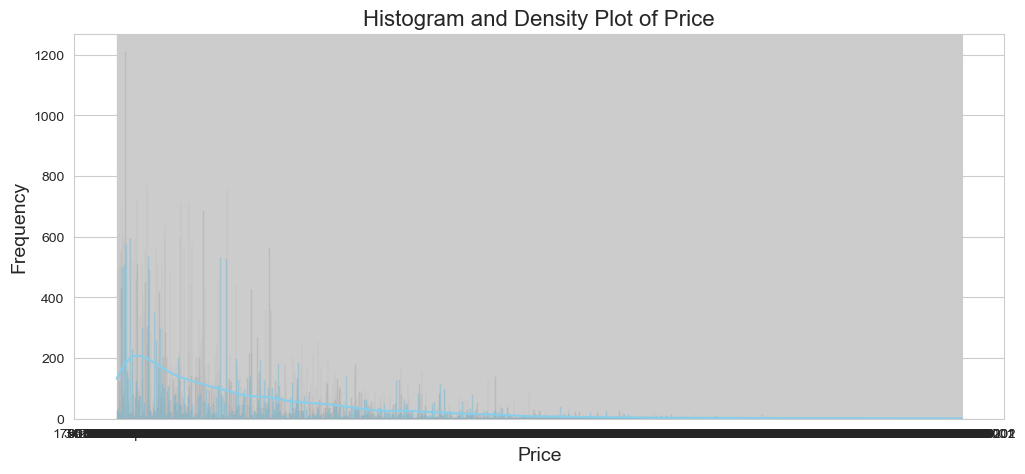

In [109]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')
# Histogram and Density Plot
plt.figure(figsize=(12, 5))
sns.histplot(df['Price'], kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram and Density Plot of Price', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(x=df['Price'].mean(), color='red', linestyle='--', label=f"Mean: {df['Price'].mean():.2f}")
plt.axvline(x=df['Price'].median(), color='green', linestyle='-', label=f"Median: {df['Price'].median():.2f}")
plt.legend()
plt.show()

# **Analyzing**

Understanding  in Skewness and Kurtosis
 Before proceeding with imputation, it's crucial to understand why skewness and kurtosis might be NaN:
 1. Skewness and Kurtosis calculations return NaN if the data does not vary, i.e., all values are the same or if the data is all NaN.
 2. Ensuring that the 'Price' column has variability and not all values are identical or missing is important after preprocessing.
  This understanding guides the choice and effectiveness of the imputation method.

In [118]:
# Skewness and Kurtosis
skewness = skew(df['Price'])
kurtosis_value = kurtosis(df['Price'])
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis_value}")

Skewness: 7.40352066428755
Kurtosis: 79.94109140283383


In [ ]:
# Print Skewness
mileage_skewness = skew(df['Mileage'])
print(f"Skewness of Mileage: {mileage_skewness:.3f}")

Skewness of Mileage: 3.951


# **Pre-Processing**

Encoding,Feature Engineering,Min-Max Normalization



one-hot encoding since it appears to be a nominal categorical variable with a large number of unique values. One-hot encoding will create binary columns for each unique model, indicating whether a car corresponds to that model or not.
As there is no such important Rrelationship between Price and version,there are too many null values whiich cannot be imputed,there "Version" is dropped.



In [110]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('binary_encoder', BinaryEncoder(columns=['Transmission', 'Assembly'], 
                                     mappings={'Transmission': {'Manual': 0, 'Automatic': 1}, 
                                               'Assembly': {'Imported': 0, 'Local': 1}})),
    ('label_encoder', MultiColumnLabelEncoder(columns=['Registered City', 'Model', 'Make'])),
    ('mileage_scaler', MileageScaler(column='Mileage')),
    ('column_dropper', ColumnDropper(column='Version'))
])

In [111]:
# Apply the pipeline to your dataframe
df = pipeline.fit_transform(df)
# Verify the changes
df.head()

,Make,Model,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
0,25,170,7400000.0,2019,1500,0,0.001999,180,1
1,43,214,1065000.0,2019,660,0,0.067999,97,1
2,1,17,9300000.0,2015,1800,1,0.069999,97,1
3,61,32,2375000.0,2014,1500,0,0.099899,66,1
4,25,86,2600000.0,2017,1300,1,0.054999,66,0


Imputation of Median

Median vs Mean Imputation
Median Imputation is chosen over Mean Imputation for the following reasons:
1. The data is right-skewed, as indicated by the summary statistics where the mean is greater than the median.
 Median Imputation is less affected by outliers and skewed distributions, making it more robust for skewed data.
2. Mean Imputation might be influenced by extremely high prices in the dataset, leading to an imputed value
  that does not represent the central tendency of the majority of the data well.



In [112]:
# Count the number of rows with "Call for Price" in the 'Price' column
num_call_for_price = df['Price'].apply(lambda x: str(x).strip() == 'Call for price').sum()

print("Number of rows with 'Call for Price':", num_call_for_price)

Number of rows with 'Call for Price': 1209


In [113]:
# Ensure 'Price' is numeric and handle "Call for Price" as NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Calculate the median of the 'Price' column
median_price = df['Price'].median()

# Replace NaN values with the median
df['Price'] = df['Price'].fillna(median_price)

# Convert 'Price' to integer to remove trailing zeros after decimal point
df['Price'] = df['Price'].astype(int)

# Verify the changes
print(df['Price'].describe())

count    8.057200e+04
mean     2.545623e+06
std      3.668665e+06
min      1.000000e+05
25%      9.700000e+05
50%      1.725000e+06
75%      2.850000e+06
max      9.500000e+07
Name: Price, dtype: float64


# Pre-processed Data

checking a after data-Preprocessing

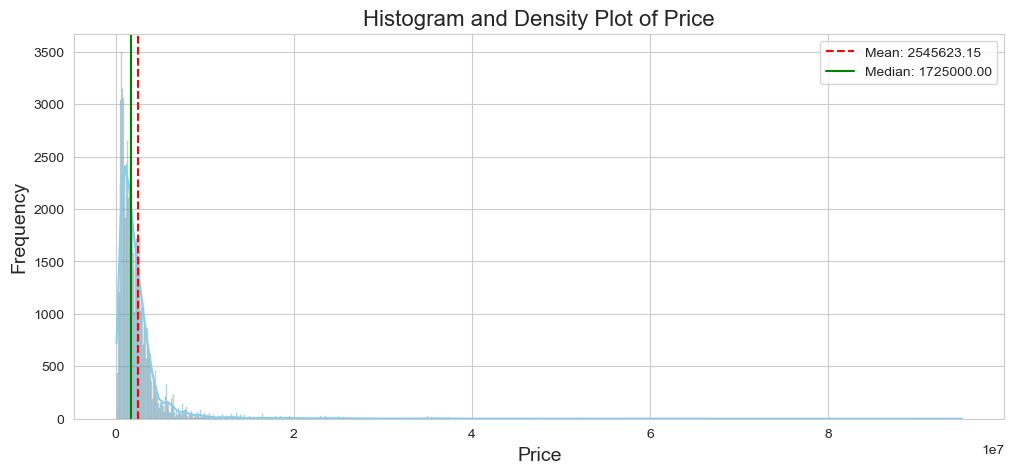

In [116]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')
# Histogram and Density Plot
plt.figure(figsize=(12, 5))
sns.histplot(df['Price'], kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram and Density Plot of Price', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(x=df['Price'].mean(), color='red', linestyle='--', label=f"Mean: {df['Price'].mean():.2f}")
plt.axvline(x=df['Price'].median(), color='green', linestyle='-', label=f"Median: {df['Price'].median():.2f}")
plt.legend()
plt.show()

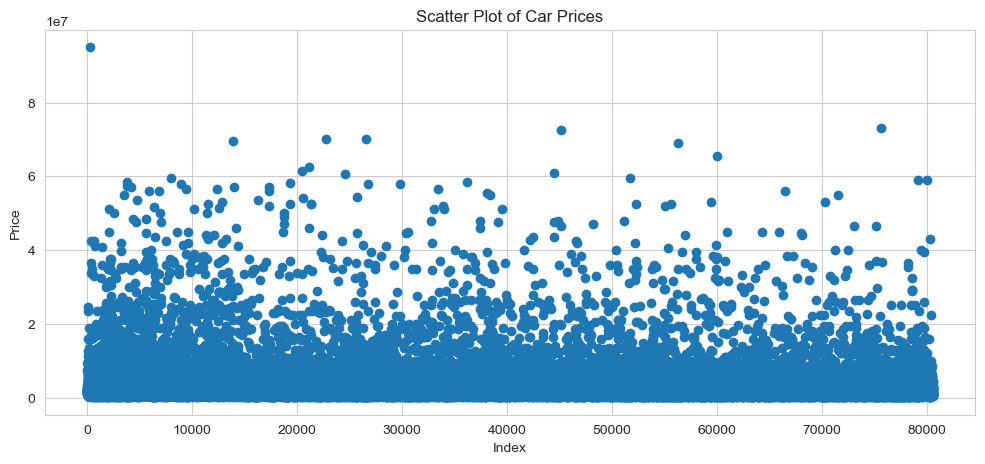

In [117]:
#Scatter Plot od Price Colunm
plt.figure(figsize=(12,5))
plt.scatter(df.index, df['Price'])
plt.title('Scatter Plot of Car Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

In [119]:
attribute_names = df.columns.tolist()
print("Name of Attributes",attribute_names)

Name of Attributes ['Make', 'Model', 'Price', 'Make_Year', 'CC', 'Assembly', 'Mileage', 'Registered City', 'Transmission']


In [120]:
df.head()

,Make,Model,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
0,25,170,7400000,2019,1500,0,0.001999,180,1
1,43,214,1065000,2019,660,0,0.067999,97,1
2,1,17,9300000,2015,1800,1,0.069999,97,1
3,61,32,2375000,2014,1500,0,0.099899,66,1
4,25,86,2600000,2017,1300,1,0.054999,66,0


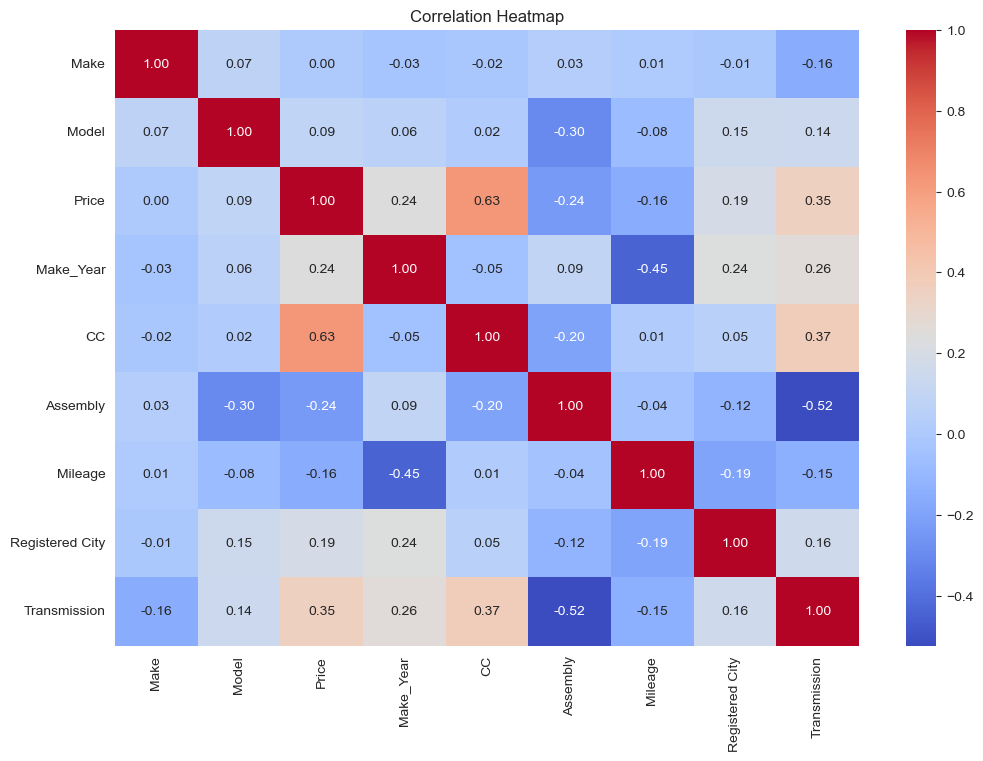

In [121]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [122]:
# Save the updated DataFrame to a new CSV file
df.to_csv('Preprocessed_Data.csv', index=False)

## **Model**

# **Linear Rgression Model**

In [123]:
# Prepare the data
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
Linear_model = LinearRegression()
Linear_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = Linear_model.predict(X_test)

# Calculate evaluation metrics
mae_linear = mean_absolute_error(y_test, predictions)
mse_linear = mean_squared_error(y_test, predictions)
# Calculate RMSE
rmse_linear = mean_squared_error(y_test, predictions, squared=False)
r2_linear = r2_score(y_test, predictions)

# Save the Linear Regression model as a Pickle file
linear_model_filename = 'linear_model.pkl'
joblib.dump(Linear_model, linear_model_filename)
print(f"Linear Regression model saved as Pickle file to {linear_model_filename}")



Linear Regression model saved as Pickle file to linear_model.pkl


/Users/Dekll/miniforge3/envs/mlwork/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluation

In [124]:
# Print the evaluation metrics
print("Mean Absolute Error (MAE) Of Linear Regression Model:" , mae_linear)
print("Mean Squared Error (MSE) Of Linear Regression Model:",   mse_linear)
print("Root Mean Squared Error (RMSE)Linear Regression Model:", rmse_linear)
print("R-squared (R^2):Linear Regression Model", r2_linear)

Mean Absolute Error (MAE) Of Linear Regression Model: 1079081.490030831
Mean Squared Error (MSE) Of Linear Regression Model: 6921918406117.846
Root Mean Squared Error (RMSE)Linear Regression Model: 2630953.896615797
R-squared (R^2):Linear Regression Model 0.49920835546792697


Results

In [ ]:
linear_Actual = y_test[:10]
Predicted_Actual= predictions[:10]
#Datafram of results (first 10 rows)
first_10_results = pd.DataFrame({'Actual': linear_Actual, 'Predicted': Predicted_Actual.astype(int)})

# Print the DataFrame
print(first_10_results)


        Actual  Predicted
80268  9200000    8415203
79446  2250000    1820697
64657  2450000    2531194
60803   580000    2142857
1811    860000    1436937
5324   1525000    1024261
15562  4425000    5937737
27636  1380000    1679545
21272  1695000    1595142
27925  1975000    2089175


# Applying gridsearch CV

In [125]:
# Prepare the data
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train_Grid, X_test_Grid, y_train_Grid, y_test_Grid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge Regression model
model = Ridge()

# Define the parameter grid
param_grid = {'alpha': [0.925, 0.35, 1.75, 3.2, 90, 80]}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train_Grid, y_train_Grid)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
predictions_Grid= best_model.predict(X_test)

# Calculate evaluation metrics
mae_GridSearch = mean_absolute_error(y_test_Grid, predictions_Grid)
mse_GridSearch = mean_squared_error(y_test_Grid, predictions_Grid)
rmse_GridSearch = mean_squared_error(y_test, predictions_Grid, squared=False)
r2_GridSearch = r2_score(y_test_Grid, predictions_Grid)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae_GridSearch)
print("Mean Squared Error (MSE):", mse_GridSearch)
print("Root Mean Squared Error (RMSE):", rmse_GridSearch)
print("R-squared (R^2):", r2_GridSearch)


Best parameters: {'alpha': 1.75}
Mean Absolute Error (MAE): 1079071.1891760419
Mean Squared Error (MSE): 6921965007296.571
Root Mean Squared Error (RMSE): 2630962.752928397
R-squared (R^2): 0.49920498393426227


/Users/Dekll/miniforge3/envs/mlwork/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# **Neural Regression Model**

Tunned

In [126]:
# Split the data into training and testing sets for Neural Network
X_train_Neural, X_test_Neural, y_train_Neural, y_test_Neural = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the input features
scaler = StandardScaler()
X_train_Neural = scaler.fit_transform(X_train_Neural)
X_test_Neural = scaler.transform(X_test_Neural)

#Tuning Neural Network
def create_custom_nn(num_layers, num_neurons, input_dim):
    model = keras.Sequential()

    # Input layer
    model.add(keras.layers.Input(shape=(input_dim,)))

    # Hidden layers
    for _ in range(num_layers):
        model.add(keras.layers.Dense(num_neurons, activation='relu'))

    # Output layer (single neuron for regression)
    model.add(keras.layers.Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

# Create a neural network with 3 hidden layers, each having 64 neurons
custom_model = create_custom_nn(num_layers=3, num_neurons=64, input_dim=X_train_Neural.shape[1])

# Train the model
custom_model.fit(X_train_Neural, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss_neural = custom_model.evaluate(X_test_Neural, y_test)
print(f"Test Loss (MSE): {loss_neural:.4f}")

# Make predictions on the test set
predictions_neural = custom_model.predict(X_test_Neural)

# Calculate and print the R-squared (R^2) score
r2_neural = r2_score(y_test, predictions_neural)
print(f"R-squared (R^2) Score: {r2_neural:.4f}")

# Save the model as a Pickle file
neural_network_model = 'neural_network_model_tunned.pkl'
joblib.dump(custom_model, neural_network_model)
print(f"Model saved as Pickle file to {neural_network_model}")


Epoch 1/50
1612/1612 [==============================] - 1s 667us/step - loss: 13145488752640.0000 - val_loss: 7125842001920.0000
Epoch 2/50
1612/1612 [==============================] - 1s 681us/step - loss: 6788342611968.0000 - val_loss: 5849854509056.0000
Epoch 3/50
1612/1612 [==============================] - 1s 728us/step - loss: 6059618467840.0000 - val_loss: 5505351155712.0000
Epoch 4/50
1612/1612 [==============================] - 1s 646us/step - loss: 5850053214208.0000 - val_loss: 5350451314688.0000
Epoch 5/50
1612/1612 [==============================] - 1s 691us/step - loss: 5728487079936.0000 - val_loss: 5240457789440.0000
Epoch 6/50
1612/1612 [==============================] - 1s 661us/step - loss: 5633922301952.0000 - val_loss: 5150794055680.0000
Epoch 7/50
1612/1612 [==============================] - 1s 646us/step - loss: 5547614011392.0000 - val_loss: 5060493836288.0000
Epoch 8/50
1612/1612 [==============================] - 1s 655us/step - loss: 5470119526400.0000 - val_

Evaluation

In [127]:
# Calculate Mean Squared Error (MSE)
mse_neural= mean_squared_error(y_test_Neural, predictions_neural,)
print(f"Mean Squared Error (MSE): {mse_neural:.2f}")

# Print actual and predicted values along with R-squared (R^2) score
results_neural = pd.DataFrame({'Actual': y_test_Neural.iloc[0], 'Predicted': predictions_neural[0].astype(int)})
print("Actual vs. Predicted Values:")
print(results_neural)


Mean Squared Error (MSE): 4249411737197.27
Actual vs. Predicted Values:
    Actual  Predicted
0  9200000    8336591


Results

In [128]:
# Calculate Mean Squared Error (MSE)
mse_neural = mean_squared_error(y_test_Neural, predictions_neural)
print(f"Mean Squared Error (MSE): {mse_neural:.2f}")

# Select 10 random rows for actual and predicted values
random_indices = random.sample(range(len(y_test_Neural)), 10)
random_actual = y_test_Neural.iloc[random_indices].values
random_predicted = predictions_neural[random_indices].astype(int).flatten()

# Print actual and predicted values along with R-squared (R^2) score
results_neural = pd.DataFrame({'Actual': random_actual, 'Predicted': random_predicted})
print("Actual vs. Predicted Values (Random 10 Rows):")
print(results_neural)


Mean Squared Error (MSE): 4249411737197.27
Actual vs. Predicted Values (Random 10 Rows):
    Actual  Predicted
0  1600000    1363227
1  4100000    4966722
2  1975000    2269894
3   530000     501991
4  2500000    1887512
5  3750000    3605534
6  3100000    2661987
7   560000     845483
8  4300000    4031924
9   620000    1171549


# **Comaprison of Models**

504/504 [==============================] - 0s 353us/step


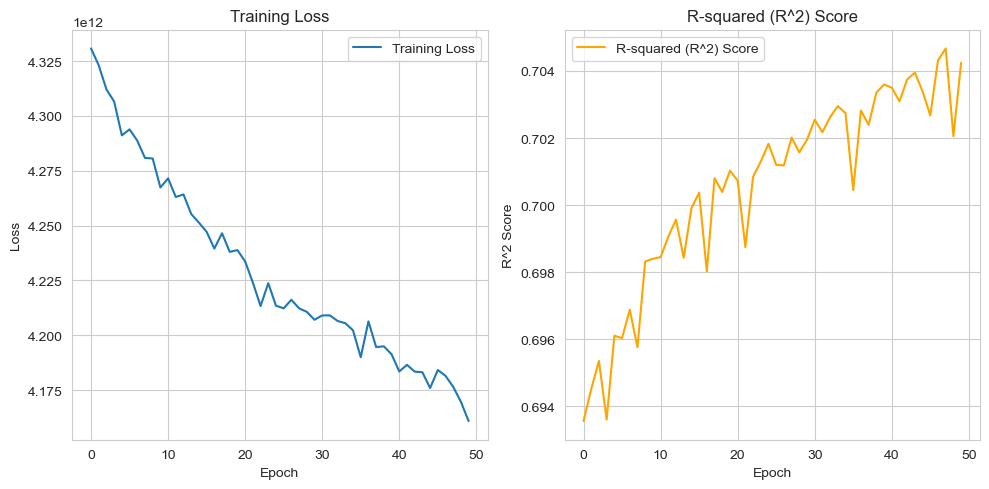

In [129]:
import joblib

# Load the trained model
custom_model = joblib.load('neural_network_model_tunned.pkl')

# Split the data into training and testing sets for Neural Network
X_train_Neural, X_test_Neural, y_train_Neural, y_test_Neural = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_Neural = scaler.fit_transform(X_train_Neural)
X_test_Neural = scaler.transform(X_test_Neural)

# Initialize empty lists to record training loss and R-squared (R^2) score
training_loss = []
r2_score_history = []

# Record training history without retraining
for epoch in range(50):
    history = custom_model.fit(X_train_Neural, y_train_Neural, epochs=1, batch_size=32, validation_split=0.2, verbose=0)

    # Calculate R-squared (R^2) score for the current epoch
    y_pred = custom_model.predict(X_test_Neural)
    r2 = r2_score(y_test_Neural, y_pred)

    # Record training loss and R-squared (R^2) score
    training_loss.append(history.history['loss'][0])
    r2_score_history.append(r2)

# Plot training loss and R-squared (R^2) score
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(r2_score_history, label='R-squared (R^2) Score', color='orange')
plt.title('R-squared (R^2) Score')
plt.xlabel('Epoch')
plt.ylabel('R^2 Score')
plt.legend()

plt.tight_layout()
plt.show()


In [130]:

# Calculate the number of parameters used by the model
num_params = custom_model.count_params()
print(f"Number of Parameters in the Model: {num_params}")


Number of Parameters in the Model: 8961


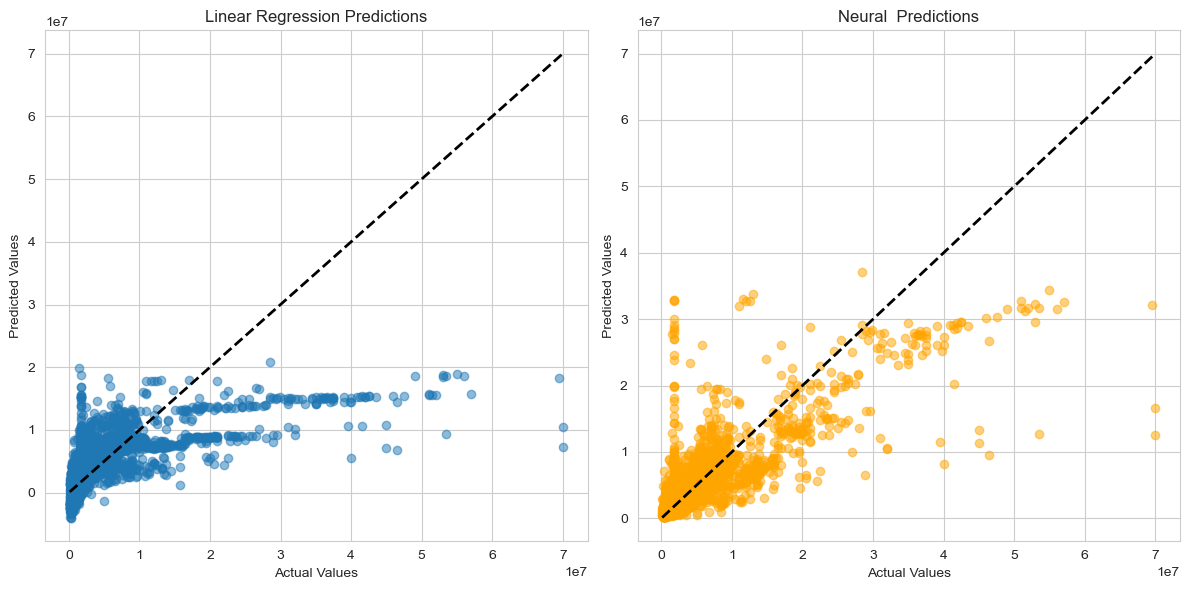

In [131]:
import matplotlib.pyplot as plt


# Creating the scatter plot
plt.figure(figsize=(12, 6))

# Plot for Linear Regression
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.title('Linear Regression Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plot for Random Forest
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.scatter(y_test, predictions_neural, alpha=0.5, color='orange')
plt.plot([y_test_Neural.min(), y_test_Neural.max()], [y_test_Neural.min(), y_test_Neural.max()], 'k--', lw=2)  # Diagonal line
plt.title('Neural  Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show the plot
plt.tight_layout()
plt.show()


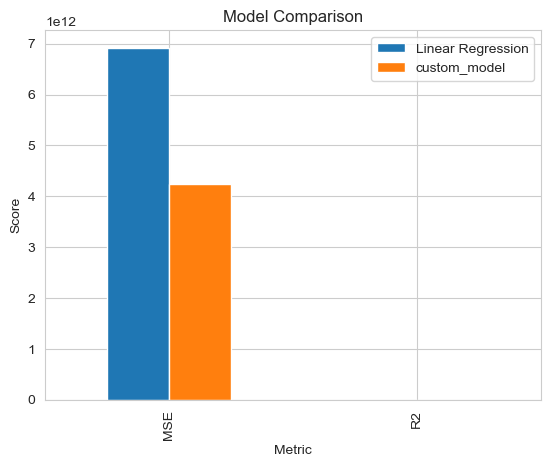

In [132]:
import matplotlib.pyplot as plt

# Example metrics for two models
model_performance = {
    'Metric': ['MSE', 'R2'],
    'Linear Regression': [mse_linear, r2_linear],
    'custom_model': [mse_neural, r2_neural]
}

df = pd.DataFrame(model_performance)

# Plotting
df.plot(x='Metric', y=['Linear Regression', 'custom_model'], kind='bar')
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()
